# Classifying Fashion MNIST with spiking activations

[![Open In
Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/nengo/keras-spiking/blob/master/docs/examples/spiking-fashion-mnist.ipynb)

This example is based on the
[Basic image classification example in
TensorFlow](https://www.tensorflow.org/tutorials/keras/classification).
We would recommend beginning there if you would like a more basic introduction to how
Keras works. In this example we will walk through how we can convert that non-spiking
model into a spiking model using KerasSpiking, and various techniques that can be used
to fine tune performance.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

import keras_spiking

tf.random.set_seed(0)
np.random.seed(0)

## Loading data

We'll begin by loading the Fashion MNIST data:

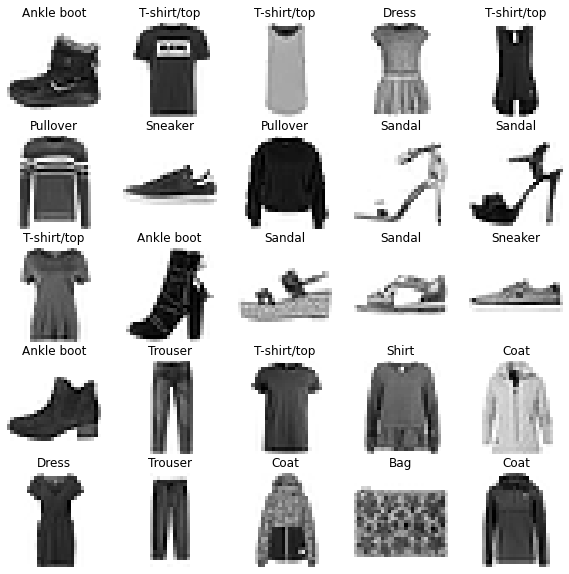

In [2]:
(
    (train_images, train_labels),
    (test_images, test_labels),
) = tf.keras.datasets.fashion_mnist.load_data()

# normalize images so values are between 0 and 1
train_images = train_images / 255.0
test_images = test_images / 255.0

class_names = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]
num_classes = len(class_names)

plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.axis("off")
    plt.title(class_names[train_labels[i]])

## Non-spiking model

Next we'll build and train the non-spiking model (this is identical to the
[original TensorFlow
example](https://www.tensorflow.org/tutorials/keras/classification)).

In [3]:
model = tf.keras.Sequential(
    [
        tf.keras.layers.Flatten(input_shape=(28, 28)),
        tf.keras.layers.Dense(128, activation="relu"),
        tf.keras.layers.Dense(10),
    ]
)


def train(input_model, train_x, test_x):
    input_model.compile(
        optimizer="adam",
        loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=["accuracy"],
    )

    input_model.fit(train_x, train_labels, epochs=10)

    _, test_acc = input_model.evaluate(test_x, test_labels, verbose=2)

    print("\nTest accuracy:", test_acc)


train(model, train_images, test_images)

2021-11-09 00:43:09.254608: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-11-09 00:43:09.820968: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 10792 MB memory:  -> device: 0, name: Tesla K80, pci bus id: 0001:00:00.0, compute capability: 3.7


Epoch 1/10


   1/1875 [..............................] - ETA: 19:31 - loss: 2.5408 - accuracy: 0.0938

  33/1875 [..............................] - ETA: 2s - loss: 1.3831 - accuracy: 0.5511   

  64/1875 [>.............................] - ETA: 2s - loss: 1.1026 - accuracy: 0.6323

  96/1875 [>.............................] - ETA: 2s - loss: 0.9859 - accuracy: 0.6699

 129/1875 [=>............................] - ETA: 2s - loss: 0.8985 - accuracy: 0.7018

 161/1875 [=>............................] - ETA: 2s - loss: 0.8523 - accuracy: 0.7149

 193/1875 [==>...........................] - ETA: 2s - loss: 0.8295 - accuracy: 0.7205

 225/1875 [==>...........................] - ETA: 2s - loss: 0.8011 - accuracy: 0.7299

 258/1875 [===>..........................] - ETA: 2s - loss: 0.7694 - accuracy: 0.7409

 288/1875 [===>..........................] - ETA: 2s - loss: 0.7484 - accuracy: 0.7467

 320/1875 [====>.........................] - ETA: 2s - loss: 0.7312 - accuracy: 0.7521

 352/1875 [====>.........................] - ETA: 2s - loss: 0.7121 - accuracy: 0.7582

 385/1875 [=====>........................] - ETA: 2s - loss: 0.6991 - accuracy: 0.7619

 417/1875 [=====>........................] - ETA: 2s - loss: 0.6826 - accuracy: 0.7675

 449/1875 [======>.......................] - ETA: 2s - loss: 0.6728 - accuracy: 0.7702

 482/1875 [======>.......................] - ETA: 2s - loss: 0.6608 - accuracy: 0.7733

 514/1875 [=======>......................] - ETA: 2s - loss: 0.6525 - accuracy: 0.7751

 547/1875 [=======>......................] - ETA: 2s - loss: 0.6415 - accuracy: 0.7785

 579/1875 [========>.....................] - ETA: 2s - loss: 0.6321 - accuracy: 0.7818

 611/1875 [========>.....................] - ETA: 1s - loss: 0.6247 - accuracy: 0.7845

 644/1875 [=========>....................] - ETA: 1s - loss: 0.6164 - accuracy: 0.7873

 676/1875 [=========>....................] - ETA: 1s - loss: 0.6089 - accuracy: 0.7902

 708/1875 [==========>...................] - ETA: 1s - loss: 0.6043 - accuracy: 0.7914

 740/1875 [==========>...................] - ETA: 1s - loss: 0.5992 - accuracy: 0.7932

 773/1875 [===========>..................] - ETA: 1s - loss: 0.5929 - accuracy: 0.7950

 805/1875 [===========>..................] - ETA: 1s - loss: 0.5897 - accuracy: 0.7958

 838/1875 [============>.................] - ETA: 1s - loss: 0.5852 - accuracy: 0.7970

 870/1875 [============>.................] - ETA: 1s - loss: 0.5813 - accuracy: 0.7985

 903/1875 [=============>................] - ETA: 1s - loss: 0.5772 - accuracy: 0.7994

 936/1875 [=============>................] - ETA: 1s - loss: 0.5738 - accuracy: 0.8008

 969/1875 [==============>...............] - ETA: 1s - loss: 0.5699 - accuracy: 0.8023

1002/1875 [===============>..............] - ETA: 1s - loss: 0.5655 - accuracy: 0.8039

1035/1875 [===============>..............] - ETA: 1s - loss: 0.5616 - accuracy: 0.8056

1067/1875 [================>.............] - ETA: 1s - loss: 0.5576 - accuracy: 0.8067

1100/1875 [================>.............] - ETA: 1s - loss: 0.5546 - accuracy: 0.8076

1133/1875 [=================>............] - ETA: 1s - loss: 0.5509 - accuracy: 0.8088

1166/1875 [=================>............] - ETA: 1s - loss: 0.5471 - accuracy: 0.8101

1199/1875 [==================>...........] - ETA: 1s - loss: 0.5449 - accuracy: 0.8108

1231/1875 [==================>...........] - ETA: 1s - loss: 0.5413 - accuracy: 0.8122

1264/1875 [===================>..........] - ETA: 0s - loss: 0.5383 - accuracy: 0.8127

1297/1875 [===================>..........] - ETA: 0s - loss: 0.5349 - accuracy: 0.8139

1330/1875 [====================>.........] - ETA: 0s - loss: 0.5307 - accuracy: 0.8152

1362/1875 [====================>.........] - ETA: 0s - loss: 0.5279 - accuracy: 0.8159

1394/1875 [=====================>........] - ETA: 0s - loss: 0.5260 - accuracy: 0.8163

1427/1875 [=====================>........] - ETA: 0s - loss: 0.5247 - accuracy: 0.8166

1459/1875 [======================>.......] - ETA: 0s - loss: 0.5219 - accuracy: 0.8175

1484/1875 [======================>.......] - ETA: 0s - loss: 0.5212 - accuracy: 0.8177

1516/1875 [=======================>......] - ETA: 0s - loss: 0.5180 - accuracy: 0.8187

1547/1875 [=======================>......] - ETA: 0s - loss: 0.5162 - accuracy: 0.8192

1578/1875 [========================>.....] - ETA: 0s - loss: 0.5143 - accuracy: 0.8197

1610/1875 [========================>.....] - ETA: 0s - loss: 0.5118 - accuracy: 0.8204

1642/1875 [=========================>....] - ETA: 0s - loss: 0.5096 - accuracy: 0.8213

1674/1875 [=========================>....] - ETA: 0s - loss: 0.5084 - accuracy: 0.8217

1705/1875 [==========================>...] - ETA: 0s - loss: 0.5069 - accuracy: 0.8221

1734/1875 [==========================>...] - ETA: 0s - loss: 0.5050 - accuracy: 0.8227

1765/1875 [===========================>..] - ETA: 0s - loss: 0.5031 - accuracy: 0.8232

1791/1875 [===========================>..] - ETA: 0s - loss: 0.5019 - accuracy: 0.8236

1822/1875 [============================>.] - ETA: 0s - loss: 0.5005 - accuracy: 0.8241

1854/1875 [============================>.] - ETA: 0s - loss: 0.4984 - accuracy: 0.8248

1875/1875 [==============================] - 4s 2ms/step - loss: 0.4979 - accuracy: 0.8250


Epoch 2/10
   1/1875 [..............................] - ETA: 3s - loss: 0.2789 - accuracy: 0.8125

  26/1875 [..............................] - ETA: 3s - loss: 0.3911 - accuracy: 0.8534

  58/1875 [..............................] - ETA: 3s - loss: 0.4003 - accuracy: 0.8486

  91/1875 [>.............................] - ETA: 3s - loss: 0.3854 - accuracy: 0.8558

 121/1875 [>.............................] - ETA: 2s - loss: 0.3888 - accuracy: 0.8530

 153/1875 [=>............................] - ETA: 2s - loss: 0.3885 - accuracy: 0.8552

 184/1875 [=>............................] - ETA: 2s - loss: 0.3906 - accuracy: 0.8546

 216/1875 [==>...........................] - ETA: 2s - loss: 0.3908 - accuracy: 0.8566

 248/1875 [==>...........................] - ETA: 2s - loss: 0.3931 - accuracy: 0.8567

 276/1875 [===>..........................] - ETA: 2s - loss: 0.3872 - accuracy: 0.8588

 309/1875 [===>..........................] - ETA: 2s - loss: 0.3878 - accuracy: 0.8585

 340/1875 [====>.........................] - ETA: 2s - loss: 0.3857 - accuracy: 0.8594

 372/1875 [====>.........................] - ETA: 2s - loss: 0.3866 - accuracy: 0.8592

 405/1875 [=====>........................] - ETA: 2s - loss: 0.3834 - accuracy: 0.8608

 438/1875 [======>.......................] - ETA: 2s - loss: 0.3848 - accuracy: 0.8604

 471/1875 [======>.......................] - ETA: 2s - loss: 0.3864 - accuracy: 0.8603

 503/1875 [=======>......................] - ETA: 2s - loss: 0.3866 - accuracy: 0.8597

 533/1875 [=======>......................] - ETA: 2s - loss: 0.3864 - accuracy: 0.8593

 561/1875 [=======>......................] - ETA: 2s - loss: 0.3857 - accuracy: 0.8596

 594/1875 [========>.....................] - ETA: 2s - loss: 0.3860 - accuracy: 0.8592

 626/1875 [=========>....................] - ETA: 2s - loss: 0.3852 - accuracy: 0.8590

 657/1875 [=========>....................] - ETA: 1s - loss: 0.3840 - accuracy: 0.8599

 689/1875 [==========>...................] - ETA: 1s - loss: 0.3813 - accuracy: 0.8609

 721/1875 [==========>...................] - ETA: 1s - loss: 0.3813 - accuracy: 0.8606

 751/1875 [===========>..................] - ETA: 1s - loss: 0.3792 - accuracy: 0.8609

 784/1875 [===========>..................] - ETA: 1s - loss: 0.3793 - accuracy: 0.8610

 816/1875 [============>.................] - ETA: 1s - loss: 0.3800 - accuracy: 0.8606

 846/1875 [============>.................] - ETA: 1s - loss: 0.3813 - accuracy: 0.8603

 878/1875 [=============>................] - ETA: 1s - loss: 0.3809 - accuracy: 0.8604

 911/1875 [=============>................] - ETA: 1s - loss: 0.3793 - accuracy: 0.8609

 943/1875 [==============>...............] - ETA: 1s - loss: 0.3791 - accuracy: 0.8611

 975/1875 [==============>...............] - ETA: 1s - loss: 0.3791 - accuracy: 0.8611

1007/1875 [===============>..............] - ETA: 1s - loss: 0.3778 - accuracy: 0.8615

1038/1875 [===============>..............] - ETA: 1s - loss: 0.3775 - accuracy: 0.8617

1071/1875 [================>.............] - ETA: 1s - loss: 0.3770 - accuracy: 0.8616

1101/1875 [================>.............] - ETA: 1s - loss: 0.3772 - accuracy: 0.8615

1133/1875 [=================>............] - ETA: 1s - loss: 0.3765 - accuracy: 0.8620

1165/1875 [=================>............] - ETA: 1s - loss: 0.3768 - accuracy: 0.8619

1197/1875 [==================>...........] - ETA: 1s - loss: 0.3760 - accuracy: 0.8622

1229/1875 [==================>...........] - ETA: 1s - loss: 0.3744 - accuracy: 0.8628

1262/1875 [===================>..........] - ETA: 0s - loss: 0.3743 - accuracy: 0.8631

1286/1875 [===================>..........] - ETA: 0s - loss: 0.3740 - accuracy: 0.8632

1318/1875 [====================>.........] - ETA: 0s - loss: 0.3744 - accuracy: 0.8631

1350/1875 [====================>.........] - ETA: 0s - loss: 0.3752 - accuracy: 0.8630

1383/1875 [=====================>........] - ETA: 0s - loss: 0.3747 - accuracy: 0.8633

1416/1875 [=====================>........] - ETA: 0s - loss: 0.3742 - accuracy: 0.8634

1449/1875 [======================>.......] - ETA: 0s - loss: 0.3736 - accuracy: 0.8636

1482/1875 [======================>.......] - ETA: 0s - loss: 0.3734 - accuracy: 0.8635

1514/1875 [=======================>......] - ETA: 0s - loss: 0.3734 - accuracy: 0.8637

1547/1875 [=======================>......] - ETA: 0s - loss: 0.3742 - accuracy: 0.8634

1580/1875 [========================>.....] - ETA: 0s - loss: 0.3738 - accuracy: 0.8636

1613/1875 [========================>.....] - ETA: 0s - loss: 0.3730 - accuracy: 0.8639

1646/1875 [=========================>....] - ETA: 0s - loss: 0.3729 - accuracy: 0.8639

1679/1875 [=========================>....] - ETA: 0s - loss: 0.3723 - accuracy: 0.8644

1712/1875 [==========================>...] - ETA: 0s - loss: 0.3721 - accuracy: 0.8643

1745/1875 [==========================>...] - ETA: 0s - loss: 0.3715 - accuracy: 0.8647

1778/1875 [===========================>..] - ETA: 0s - loss: 0.3710 - accuracy: 0.8649

1811/1875 [===========================>..] - ETA: 0s - loss: 0.3711 - accuracy: 0.8650

1841/1875 [============================>.] - ETA: 0s - loss: 0.3706 - accuracy: 0.8652

1868/1875 [============================>.] - ETA: 0s - loss: 0.3704 - accuracy: 0.8653

1875/1875 [==============================] - 3s 2ms/step - loss: 0.3703 - accuracy: 0.8653


Epoch 3/10
   1/1875 [..............................] - ETA: 3s - loss: 0.4388 - accuracy: 0.9062

  34/1875 [..............................] - ETA: 2s - loss: 0.3181 - accuracy: 0.8961

  66/1875 [>.............................] - ETA: 2s - loss: 0.3415 - accuracy: 0.8816

  97/1875 [>.............................] - ETA: 2s - loss: 0.3324 - accuracy: 0.8834

 130/1875 [=>............................] - ETA: 2s - loss: 0.3339 - accuracy: 0.8834

 163/1875 [=>............................] - ETA: 2s - loss: 0.3305 - accuracy: 0.8842

 195/1875 [==>...........................] - ETA: 2s - loss: 0.3366 - accuracy: 0.8798

 228/1875 [==>...........................] - ETA: 2s - loss: 0.3335 - accuracy: 0.8801

 260/1875 [===>..........................] - ETA: 2s - loss: 0.3352 - accuracy: 0.8806

 293/1875 [===>..........................] - ETA: 2s - loss: 0.3417 - accuracy: 0.8791

 325/1875 [====>.........................] - ETA: 2s - loss: 0.3439 - accuracy: 0.8775

 354/1875 [====>.........................] - ETA: 2s - loss: 0.3455 - accuracy: 0.8773

 386/1875 [=====>........................] - ETA: 2s - loss: 0.3456 - accuracy: 0.8765

 419/1875 [=====>........................] - ETA: 2s - loss: 0.3450 - accuracy: 0.8760

 452/1875 [======>.......................] - ETA: 2s - loss: 0.3422 - accuracy: 0.8770

 485/1875 [======>.......................] - ETA: 2s - loss: 0.3390 - accuracy: 0.8782

 518/1875 [=======>......................] - ETA: 2s - loss: 0.3385 - accuracy: 0.8784

 550/1875 [=======>......................] - ETA: 2s - loss: 0.3390 - accuracy: 0.8783

 582/1875 [========>.....................] - ETA: 2s - loss: 0.3394 - accuracy: 0.8779

 615/1875 [========>.....................] - ETA: 1s - loss: 0.3396 - accuracy: 0.8785

 648/1875 [=========>....................] - ETA: 1s - loss: 0.3395 - accuracy: 0.8779

 680/1875 [=========>....................] - ETA: 1s - loss: 0.3415 - accuracy: 0.8777

 712/1875 [==========>...................] - ETA: 1s - loss: 0.3431 - accuracy: 0.8768

 745/1875 [==========>...................] - ETA: 1s - loss: 0.3416 - accuracy: 0.8770

 778/1875 [===========>..................] - ETA: 1s - loss: 0.3390 - accuracy: 0.8775

 810/1875 [===========>..................] - ETA: 1s - loss: 0.3376 - accuracy: 0.8780

 842/1875 [============>.................] - ETA: 1s - loss: 0.3389 - accuracy: 0.8769

 874/1875 [============>.................] - ETA: 1s - loss: 0.3373 - accuracy: 0.8776

 906/1875 [=============>................] - ETA: 1s - loss: 0.3363 - accuracy: 0.8777

 937/1875 [=============>................] - ETA: 1s - loss: 0.3375 - accuracy: 0.8776

 967/1875 [==============>...............] - ETA: 1s - loss: 0.3359 - accuracy: 0.8782

1000/1875 [===============>..............] - ETA: 1s - loss: 0.3360 - accuracy: 0.8780

1033/1875 [===============>..............] - ETA: 1s - loss: 0.3361 - accuracy: 0.8781

1065/1875 [================>.............] - ETA: 1s - loss: 0.3362 - accuracy: 0.8782

1097/1875 [================>.............] - ETA: 1s - loss: 0.3356 - accuracy: 0.8781

1130/1875 [=================>............] - ETA: 1s - loss: 0.3351 - accuracy: 0.8783

1163/1875 [=================>............] - ETA: 1s - loss: 0.3351 - accuracy: 0.8783

1196/1875 [==================>...........] - ETA: 1s - loss: 0.3355 - accuracy: 0.8780

1229/1875 [==================>...........] - ETA: 1s - loss: 0.3346 - accuracy: 0.8782

1261/1875 [===================>..........] - ETA: 0s - loss: 0.3353 - accuracy: 0.8780

1291/1875 [===================>..........] - ETA: 0s - loss: 0.3354 - accuracy: 0.8780

1324/1875 [====================>.........] - ETA: 0s - loss: 0.3344 - accuracy: 0.8785

1357/1875 [====================>.........] - ETA: 0s - loss: 0.3352 - accuracy: 0.8783

1390/1875 [=====================>........] - ETA: 0s - loss: 0.3356 - accuracy: 0.8781

1421/1875 [=====================>........] - ETA: 0s - loss: 0.3367 - accuracy: 0.8779

1451/1875 [======================>.......] - ETA: 0s - loss: 0.3364 - accuracy: 0.8779

1483/1875 [======================>.......] - ETA: 0s - loss: 0.3359 - accuracy: 0.8782

1516/1875 [=======================>......] - ETA: 0s - loss: 0.3352 - accuracy: 0.8784

1546/1875 [=======================>......] - ETA: 0s - loss: 0.3348 - accuracy: 0.8786

1571/1875 [========================>.....] - ETA: 0s - loss: 0.3345 - accuracy: 0.8788

1602/1875 [========================>.....] - ETA: 0s - loss: 0.3345 - accuracy: 0.8786

1635/1875 [=========================>....] - ETA: 0s - loss: 0.3345 - accuracy: 0.8787

1668/1875 [=========================>....] - ETA: 0s - loss: 0.3341 - accuracy: 0.8787

1699/1875 [==========================>...] - ETA: 0s - loss: 0.3338 - accuracy: 0.8788

1732/1875 [==========================>...] - ETA: 0s - loss: 0.3335 - accuracy: 0.8789

1765/1875 [===========================>..] - ETA: 0s - loss: 0.3336 - accuracy: 0.8788

1798/1875 [===========================>..] - ETA: 0s - loss: 0.3338 - accuracy: 0.8788

1831/1875 [============================>.] - ETA: 0s - loss: 0.3326 - accuracy: 0.8794

1864/1875 [============================>.] - ETA: 0s - loss: 0.3319 - accuracy: 0.8795

1875/1875 [==============================] - 3s 2ms/step - loss: 0.3318 - accuracy: 0.8795


Epoch 4/10
   1/1875 [..............................] - ETA: 3s - loss: 0.4130 - accuracy: 0.8750

  34/1875 [..............................] - ETA: 2s - loss: 0.3196 - accuracy: 0.8805

  67/1875 [>.............................] - ETA: 2s - loss: 0.3245 - accuracy: 0.8825

  99/1875 [>.............................] - ETA: 2s - loss: 0.3250 - accuracy: 0.8826

 132/1875 [=>............................] - ETA: 2s - loss: 0.3248 - accuracy: 0.8819

 165/1875 [=>............................] - ETA: 2s - loss: 0.3258 - accuracy: 0.8828

 197/1875 [==>...........................] - ETA: 2s - loss: 0.3162 - accuracy: 0.8848

 230/1875 [==>...........................] - ETA: 2s - loss: 0.3107 - accuracy: 0.8871

 263/1875 [===>..........................] - ETA: 2s - loss: 0.3129 - accuracy: 0.8866

 296/1875 [===>..........................] - ETA: 2s - loss: 0.3144 - accuracy: 0.8862

 329/1875 [====>.........................] - ETA: 2s - loss: 0.3130 - accuracy: 0.8860

 362/1875 [====>.........................] - ETA: 2s - loss: 0.3177 - accuracy: 0.8839

 395/1875 [=====>........................] - ETA: 2s - loss: 0.3165 - accuracy: 0.8843

 427/1875 [=====>........................] - ETA: 2s - loss: 0.3151 - accuracy: 0.8851

 459/1875 [======>.......................] - ETA: 2s - loss: 0.3153 - accuracy: 0.8851

 492/1875 [======>.......................] - ETA: 2s - loss: 0.3142 - accuracy: 0.8848

 525/1875 [=======>......................] - ETA: 2s - loss: 0.3154 - accuracy: 0.8841

 558/1875 [=======>......................] - ETA: 2s - loss: 0.3140 - accuracy: 0.8840

 591/1875 [========>.....................] - ETA: 1s - loss: 0.3135 - accuracy: 0.8840

 623/1875 [========>.....................] - ETA: 1s - loss: 0.3133 - accuracy: 0.8840

 655/1875 [=========>....................] - ETA: 1s - loss: 0.3144 - accuracy: 0.8838

 687/1875 [=========>....................] - ETA: 1s - loss: 0.3128 - accuracy: 0.8847

 716/1875 [==========>...................] - ETA: 1s - loss: 0.3123 - accuracy: 0.8850

 742/1875 [==========>...................] - ETA: 1s - loss: 0.3122 - accuracy: 0.8854

 773/1875 [===========>..................] - ETA: 1s - loss: 0.3136 - accuracy: 0.8850

 804/1875 [===========>..................] - ETA: 1s - loss: 0.3134 - accuracy: 0.8853

 836/1875 [============>.................] - ETA: 1s - loss: 0.3134 - accuracy: 0.8855

 869/1875 [============>.................] - ETA: 1s - loss: 0.3126 - accuracy: 0.8858

 902/1875 [=============>................] - ETA: 1s - loss: 0.3116 - accuracy: 0.8862

 935/1875 [=============>................] - ETA: 1s - loss: 0.3105 - accuracy: 0.8865

 968/1875 [==============>...............] - ETA: 1s - loss: 0.3114 - accuracy: 0.8863

1001/1875 [===============>..............] - ETA: 1s - loss: 0.3111 - accuracy: 0.8862

1034/1875 [===============>..............] - ETA: 1s - loss: 0.3098 - accuracy: 0.8865

1067/1875 [================>.............] - ETA: 1s - loss: 0.3094 - accuracy: 0.8867

1099/1875 [================>.............] - ETA: 1s - loss: 0.3095 - accuracy: 0.8867

1132/1875 [=================>............] - ETA: 1s - loss: 0.3105 - accuracy: 0.8865

1165/1875 [=================>............] - ETA: 1s - loss: 0.3096 - accuracy: 0.8870

1198/1875 [==================>...........] - ETA: 1s - loss: 0.3092 - accuracy: 0.8869

1231/1875 [==================>...........] - ETA: 1s - loss: 0.3089 - accuracy: 0.8870

1264/1875 [===================>..........] - ETA: 0s - loss: 0.3079 - accuracy: 0.8874

1297/1875 [===================>..........] - ETA: 0s - loss: 0.3072 - accuracy: 0.8875

1327/1875 [====================>.........] - ETA: 0s - loss: 0.3075 - accuracy: 0.8874

1347/1875 [====================>.........] - ETA: 0s - loss: 0.3079 - accuracy: 0.8872

1379/1875 [=====================>........] - ETA: 0s - loss: 0.3085 - accuracy: 0.8870

1411/1875 [=====================>........] - ETA: 0s - loss: 0.3086 - accuracy: 0.8869

1443/1875 [======================>.......] - ETA: 0s - loss: 0.3084 - accuracy: 0.8869

1476/1875 [======================>.......] - ETA: 0s - loss: 0.3086 - accuracy: 0.8869

1509/1875 [=======================>......] - ETA: 0s - loss: 0.3084 - accuracy: 0.8871

1541/1875 [=======================>......] - ETA: 0s - loss: 0.3086 - accuracy: 0.8870

1573/1875 [========================>.....] - ETA: 0s - loss: 0.3087 - accuracy: 0.8870

1605/1875 [========================>.....] - ETA: 0s - loss: 0.3087 - accuracy: 0.8868

1638/1875 [=========================>....] - ETA: 0s - loss: 0.3077 - accuracy: 0.8871

1668/1875 [=========================>....] - ETA: 0s - loss: 0.3078 - accuracy: 0.8871

1701/1875 [==========================>...] - ETA: 0s - loss: 0.3086 - accuracy: 0.8869

1733/1875 [==========================>...] - ETA: 0s - loss: 0.3087 - accuracy: 0.8870

1766/1875 [===========================>..] - ETA: 0s - loss: 0.3090 - accuracy: 0.8868

1798/1875 [===========================>..] - ETA: 0s - loss: 0.3089 - accuracy: 0.8868

1831/1875 [============================>.] - ETA: 0s - loss: 0.3087 - accuracy: 0.8867

1864/1875 [============================>.] - ETA: 0s - loss: 0.3081 - accuracy: 0.8868

1875/1875 [==============================] - 3s 2ms/step - loss: 0.3082 - accuracy: 0.8868


Epoch 5/10
   1/1875 [..............................] - ETA: 3s - loss: 0.1590 - accuracy: 0.9375

  34/1875 [..............................] - ETA: 2s - loss: 0.3225 - accuracy: 0.8814

  66/1875 [>.............................] - ETA: 2s - loss: 0.3111 - accuracy: 0.8892

  93/1875 [>.............................] - ETA: 2s - loss: 0.2961 - accuracy: 0.8952

 125/1875 [=>............................] - ETA: 2s - loss: 0.2963 - accuracy: 0.8935

 157/1875 [=>............................] - ETA: 2s - loss: 0.2956 - accuracy: 0.8941

 189/1875 [==>...........................] - ETA: 2s - loss: 0.2896 - accuracy: 0.8950

 221/1875 [==>...........................] - ETA: 2s - loss: 0.2920 - accuracy: 0.8948

 252/1875 [===>..........................] - ETA: 2s - loss: 0.2932 - accuracy: 0.8948

 283/1875 [===>..........................] - ETA: 2s - loss: 0.2945 - accuracy: 0.8927

 315/1875 [====>.........................] - ETA: 2s - loss: 0.2944 - accuracy: 0.8921

 348/1875 [====>.........................] - ETA: 2s - loss: 0.2951 - accuracy: 0.8919

 381/1875 [=====>........................] - ETA: 2s - loss: 0.2921 - accuracy: 0.8932

 414/1875 [=====>........................] - ETA: 2s - loss: 0.2923 - accuracy: 0.8925

 447/1875 [======>.......................] - ETA: 2s - loss: 0.2943 - accuracy: 0.8919

 480/1875 [======>.......................] - ETA: 2s - loss: 0.2915 - accuracy: 0.8930

 512/1875 [=======>......................] - ETA: 2s - loss: 0.2915 - accuracy: 0.8928

 545/1875 [=======>......................] - ETA: 2s - loss: 0.2935 - accuracy: 0.8920

 578/1875 [========>.....................] - ETA: 2s - loss: 0.2936 - accuracy: 0.8920

 611/1875 [========>.....................] - ETA: 2s - loss: 0.2919 - accuracy: 0.8926

 644/1875 [=========>....................] - ETA: 1s - loss: 0.2909 - accuracy: 0.8923

 676/1875 [=========>....................] - ETA: 1s - loss: 0.2921 - accuracy: 0.8918

 704/1875 [==========>...................] - ETA: 1s - loss: 0.2913 - accuracy: 0.8923

 731/1875 [==========>...................] - ETA: 1s - loss: 0.2913 - accuracy: 0.8922

 759/1875 [===========>..................] - ETA: 1s - loss: 0.2921 - accuracy: 0.8918

 788/1875 [===========>..................] - ETA: 1s - loss: 0.2927 - accuracy: 0.8915

 819/1875 [============>.................] - ETA: 1s - loss: 0.2917 - accuracy: 0.8923

 849/1875 [============>.................] - ETA: 1s - loss: 0.2911 - accuracy: 0.8925

 881/1875 [=============>................] - ETA: 1s - loss: 0.2900 - accuracy: 0.8929

 913/1875 [=============>................] - ETA: 1s - loss: 0.2899 - accuracy: 0.8924

 941/1875 [==============>...............] - ETA: 1s - loss: 0.2899 - accuracy: 0.8925

 970/1875 [==============>...............] - ETA: 1s - loss: 0.2905 - accuracy: 0.8923

 996/1875 [==============>...............] - ETA: 1s - loss: 0.2918 - accuracy: 0.8921

1017/1875 [===============>..............] - ETA: 1s - loss: 0.2908 - accuracy: 0.8925

1046/1875 [===============>..............] - ETA: 1s - loss: 0.2900 - accuracy: 0.8929

1078/1875 [================>.............] - ETA: 1s - loss: 0.2903 - accuracy: 0.8928

1111/1875 [================>.............] - ETA: 1s - loss: 0.2907 - accuracy: 0.8926

1144/1875 [=================>............] - ETA: 1s - loss: 0.2905 - accuracy: 0.8924

1175/1875 [=================>............] - ETA: 1s - loss: 0.2904 - accuracy: 0.8925

1198/1875 [==================>...........] - ETA: 1s - loss: 0.2900 - accuracy: 0.8926

1230/1875 [==================>...........] - ETA: 1s - loss: 0.2907 - accuracy: 0.8926

1262/1875 [===================>..........] - ETA: 1s - loss: 0.2919 - accuracy: 0.8922

1295/1875 [===================>..........] - ETA: 0s - loss: 0.2916 - accuracy: 0.8924

1327/1875 [====================>.........] - ETA: 0s - loss: 0.2910 - accuracy: 0.8926

1360/1875 [====================>.........] - ETA: 0s - loss: 0.2927 - accuracy: 0.8919

1392/1875 [=====================>........] - ETA: 0s - loss: 0.2923 - accuracy: 0.8919

1424/1875 [=====================>........] - ETA: 0s - loss: 0.2920 - accuracy: 0.8919

1457/1875 [======================>.......] - ETA: 0s - loss: 0.2915 - accuracy: 0.8922

1489/1875 [======================>.......] - ETA: 0s - loss: 0.2915 - accuracy: 0.8921

1516/1875 [=======================>......] - ETA: 0s - loss: 0.2922 - accuracy: 0.8919

1547/1875 [=======================>......] - ETA: 0s - loss: 0.2918 - accuracy: 0.8919

1578/1875 [========================>.....] - ETA: 0s - loss: 0.2917 - accuracy: 0.8920

1605/1875 [========================>.....] - ETA: 0s - loss: 0.2918 - accuracy: 0.8919

1638/1875 [=========================>....] - ETA: 0s - loss: 0.2920 - accuracy: 0.8917

1661/1875 [=========================>....] - ETA: 0s - loss: 0.2917 - accuracy: 0.8918

1694/1875 [==========================>...] - ETA: 0s - loss: 0.2924 - accuracy: 0.8916

1726/1875 [==========================>...] - ETA: 0s - loss: 0.2923 - accuracy: 0.8918

1750/1875 [===========================>..] - ETA: 0s - loss: 0.2927 - accuracy: 0.8918

1783/1875 [===========================>..] - ETA: 0s - loss: 0.2927 - accuracy: 0.8918

1816/1875 [============================>.] - ETA: 0s - loss: 0.2922 - accuracy: 0.8918

1846/1875 [============================>.] - ETA: 0s - loss: 0.2922 - accuracy: 0.8918

1875/1875 [==============================] - 3s 2ms/step - loss: 0.2920 - accuracy: 0.8918


Epoch 6/10
   1/1875 [..............................] - ETA: 3s - loss: 0.1754 - accuracy: 0.9375

  29/1875 [..............................] - ETA: 3s - loss: 0.2684 - accuracy: 0.9041

  57/1875 [..............................] - ETA: 3s - loss: 0.2693 - accuracy: 0.9057

  84/1875 [>.............................] - ETA: 3s - loss: 0.2765 - accuracy: 0.9029

 116/1875 [>.............................] - ETA: 3s - loss: 0.2743 - accuracy: 0.9041

 142/1875 [=>............................] - ETA: 3s - loss: 0.2770 - accuracy: 0.9040

 174/1875 [=>............................] - ETA: 3s - loss: 0.2787 - accuracy: 0.9012

 206/1875 [==>...........................] - ETA: 2s - loss: 0.2785 - accuracy: 0.9009

 234/1875 [==>...........................] - ETA: 2s - loss: 0.2779 - accuracy: 0.9012

 262/1875 [===>..........................] - ETA: 2s - loss: 0.2776 - accuracy: 0.9008

 294/1875 [===>..........................] - ETA: 2s - loss: 0.2810 - accuracy: 0.8993

 326/1875 [====>.........................] - ETA: 2s - loss: 0.2814 - accuracy: 0.8983

 358/1875 [====>.........................] - ETA: 2s - loss: 0.2814 - accuracy: 0.8992

 390/1875 [=====>........................] - ETA: 2s - loss: 0.2850 - accuracy: 0.8967

 422/1875 [=====>........................] - ETA: 2s - loss: 0.2868 - accuracy: 0.8959

 451/1875 [======>.......................] - ETA: 2s - loss: 0.2850 - accuracy: 0.8959

 484/1875 [======>.......................] - ETA: 2s - loss: 0.2848 - accuracy: 0.8963

 517/1875 [=======>......................] - ETA: 2s - loss: 0.2860 - accuracy: 0.8958

 549/1875 [=======>......................] - ETA: 2s - loss: 0.2851 - accuracy: 0.8961

 581/1875 [========>.....................] - ETA: 2s - loss: 0.2844 - accuracy: 0.8959

 610/1875 [========>.....................] - ETA: 2s - loss: 0.2860 - accuracy: 0.8953

 637/1875 [=========>....................] - ETA: 2s - loss: 0.2845 - accuracy: 0.8962

 669/1875 [=========>....................] - ETA: 2s - loss: 0.2854 - accuracy: 0.8960

 698/1875 [==========>...................] - ETA: 1s - loss: 0.2843 - accuracy: 0.8964

 730/1875 [==========>...................] - ETA: 1s - loss: 0.2839 - accuracy: 0.8963

 762/1875 [===========>..................] - ETA: 1s - loss: 0.2833 - accuracy: 0.8964

 794/1875 [===========>..................] - ETA: 1s - loss: 0.2815 - accuracy: 0.8968

 824/1875 [============>.................] - ETA: 1s - loss: 0.2798 - accuracy: 0.8979

 856/1875 [============>.................] - ETA: 1s - loss: 0.2793 - accuracy: 0.8983

 888/1875 [=============>................] - ETA: 1s - loss: 0.2778 - accuracy: 0.8986

 915/1875 [=============>................] - ETA: 1s - loss: 0.2784 - accuracy: 0.8982

 948/1875 [==============>...............] - ETA: 1s - loss: 0.2779 - accuracy: 0.8982

 980/1875 [==============>...............] - ETA: 1s - loss: 0.2791 - accuracy: 0.8976

1011/1875 [===============>..............] - ETA: 1s - loss: 0.2789 - accuracy: 0.8975

1043/1875 [===============>..............] - ETA: 1s - loss: 0.2784 - accuracy: 0.8980

1075/1875 [================>.............] - ETA: 1s - loss: 0.2779 - accuracy: 0.8986

1107/1875 [================>.............] - ETA: 1s - loss: 0.2772 - accuracy: 0.8988

1139/1875 [=================>............] - ETA: 1s - loss: 0.2778 - accuracy: 0.8987

1172/1875 [=================>............] - ETA: 1s - loss: 0.2783 - accuracy: 0.8983

1199/1875 [==================>...........] - ETA: 1s - loss: 0.2780 - accuracy: 0.8983

1231/1875 [==================>...........] - ETA: 1s - loss: 0.2769 - accuracy: 0.8986

1260/1875 [===================>..........] - ETA: 1s - loss: 0.2768 - accuracy: 0.8987

1292/1875 [===================>..........] - ETA: 0s - loss: 0.2768 - accuracy: 0.8985

1321/1875 [====================>.........] - ETA: 0s - loss: 0.2767 - accuracy: 0.8985

1353/1875 [====================>.........] - ETA: 0s - loss: 0.2765 - accuracy: 0.8985

1384/1875 [=====================>........] - ETA: 0s - loss: 0.2767 - accuracy: 0.8984

1416/1875 [=====================>........] - ETA: 0s - loss: 0.2774 - accuracy: 0.8980

1448/1875 [======================>.......] - ETA: 0s - loss: 0.2773 - accuracy: 0.8979

1480/1875 [======================>.......] - ETA: 0s - loss: 0.2768 - accuracy: 0.8981

1508/1875 [=======================>......] - ETA: 0s - loss: 0.2763 - accuracy: 0.8982

1541/1875 [=======================>......] - ETA: 0s - loss: 0.2769 - accuracy: 0.8979

1574/1875 [========================>.....] - ETA: 0s - loss: 0.2770 - accuracy: 0.8978

1606/1875 [========================>.....] - ETA: 0s - loss: 0.2762 - accuracy: 0.8980

1639/1875 [=========================>....] - ETA: 0s - loss: 0.2757 - accuracy: 0.8983

1672/1875 [=========================>....] - ETA: 0s - loss: 0.2759 - accuracy: 0.8981

1704/1875 [==========================>...] - ETA: 0s - loss: 0.2757 - accuracy: 0.8982

1736/1875 [==========================>...] - ETA: 0s - loss: 0.2758 - accuracy: 0.8981

1769/1875 [===========================>..] - ETA: 0s - loss: 0.2767 - accuracy: 0.8977

1802/1875 [===========================>..] - ETA: 0s - loss: 0.2759 - accuracy: 0.8978

1835/1875 [============================>.] - ETA: 0s - loss: 0.2762 - accuracy: 0.8979

1867/1875 [============================>.] - ETA: 0s - loss: 0.2766 - accuracy: 0.8978

1875/1875 [==============================] - 3s 2ms/step - loss: 0.2763 - accuracy: 0.8979


Epoch 7/10
   1/1875 [..............................] - ETA: 3s - loss: 0.2778 - accuracy: 0.8750

  34/1875 [..............................] - ETA: 2s - loss: 0.2453 - accuracy: 0.9099

  61/1875 [..............................] - ETA: 3s - loss: 0.2455 - accuracy: 0.9144

  93/1875 [>.............................] - ETA: 2s - loss: 0.2536 - accuracy: 0.9133

 126/1875 [=>............................] - ETA: 2s - loss: 0.2574 - accuracy: 0.9090

 159/1875 [=>............................] - ETA: 2s - loss: 0.2583 - accuracy: 0.9094

 192/1875 [==>...........................] - ETA: 2s - loss: 0.2569 - accuracy: 0.9074

 224/1875 [==>...........................] - ETA: 2s - loss: 0.2556 - accuracy: 0.9076

 257/1875 [===>..........................] - ETA: 2s - loss: 0.2575 - accuracy: 0.9060

 289/1875 [===>..........................] - ETA: 2s - loss: 0.2596 - accuracy: 0.9054

 320/1875 [====>.........................] - ETA: 2s - loss: 0.2643 - accuracy: 0.9038

 352/1875 [====>.........................] - ETA: 2s - loss: 0.2647 - accuracy: 0.9034

 381/1875 [=====>........................] - ETA: 2s - loss: 0.2645 - accuracy: 0.9039

 413/1875 [=====>........................] - ETA: 2s - loss: 0.2661 - accuracy: 0.9031

 446/1875 [======>.......................] - ETA: 2s - loss: 0.2652 - accuracy: 0.9034

 479/1875 [======>.......................] - ETA: 2s - loss: 0.2647 - accuracy: 0.9033

 512/1875 [=======>......................] - ETA: 2s - loss: 0.2648 - accuracy: 0.9035

 545/1875 [=======>......................] - ETA: 2s - loss: 0.2638 - accuracy: 0.9041

 578/1875 [========>.....................] - ETA: 2s - loss: 0.2638 - accuracy: 0.9034

 609/1875 [========>.....................] - ETA: 2s - loss: 0.2641 - accuracy: 0.9031

 642/1875 [=========>....................] - ETA: 1s - loss: 0.2646 - accuracy: 0.9024

 675/1875 [=========>....................] - ETA: 1s - loss: 0.2657 - accuracy: 0.9020

 707/1875 [==========>...................] - ETA: 1s - loss: 0.2648 - accuracy: 0.9024

 740/1875 [==========>...................] - ETA: 1s - loss: 0.2651 - accuracy: 0.9023

 773/1875 [===========>..................] - ETA: 1s - loss: 0.2647 - accuracy: 0.9020

 806/1875 [===========>..................] - ETA: 1s - loss: 0.2650 - accuracy: 0.9018

 838/1875 [============>.................] - ETA: 1s - loss: 0.2648 - accuracy: 0.9018

 871/1875 [============>.................] - ETA: 1s - loss: 0.2648 - accuracy: 0.9018

 903/1875 [=============>................] - ETA: 1s - loss: 0.2653 - accuracy: 0.9014

 936/1875 [=============>................] - ETA: 1s - loss: 0.2649 - accuracy: 0.9015

 968/1875 [==============>...............] - ETA: 1s - loss: 0.2642 - accuracy: 0.9018

1000/1875 [===============>..............] - ETA: 1s - loss: 0.2634 - accuracy: 0.9019

1031/1875 [===============>..............] - ETA: 1s - loss: 0.2632 - accuracy: 0.9019

1063/1875 [================>.............] - ETA: 1s - loss: 0.2630 - accuracy: 0.9018

1096/1875 [================>.............] - ETA: 1s - loss: 0.2630 - accuracy: 0.9014

1129/1875 [=================>............] - ETA: 1s - loss: 0.2643 - accuracy: 0.9010

1162/1875 [=================>............] - ETA: 1s - loss: 0.2637 - accuracy: 0.9012

1193/1875 [==================>...........] - ETA: 1s - loss: 0.2631 - accuracy: 0.9012

1226/1875 [==================>...........] - ETA: 1s - loss: 0.2629 - accuracy: 0.9015

1257/1875 [===================>..........] - ETA: 0s - loss: 0.2633 - accuracy: 0.9007

1289/1875 [===================>..........] - ETA: 0s - loss: 0.2630 - accuracy: 0.9008

1321/1875 [====================>.........] - ETA: 0s - loss: 0.2628 - accuracy: 0.9010

1354/1875 [====================>.........] - ETA: 0s - loss: 0.2629 - accuracy: 0.9009

1386/1875 [=====================>........] - ETA: 0s - loss: 0.2641 - accuracy: 0.9005

1419/1875 [=====================>........] - ETA: 0s - loss: 0.2642 - accuracy: 0.9006

1452/1875 [======================>.......] - ETA: 0s - loss: 0.2643 - accuracy: 0.9005

1485/1875 [======================>.......] - ETA: 0s - loss: 0.2652 - accuracy: 0.9000

1517/1875 [=======================>......] - ETA: 0s - loss: 0.2655 - accuracy: 0.8999

1550/1875 [=======================>......] - ETA: 0s - loss: 0.2649 - accuracy: 0.9002

1582/1875 [========================>.....] - ETA: 0s - loss: 0.2661 - accuracy: 0.9000

1614/1875 [========================>.....] - ETA: 0s - loss: 0.2660 - accuracy: 0.8999

1646/1875 [=========================>....] - ETA: 0s - loss: 0.2652 - accuracy: 0.9002

1678/1875 [=========================>....] - ETA: 0s - loss: 0.2655 - accuracy: 0.9003

1711/1875 [==========================>...] - ETA: 0s - loss: 0.2651 - accuracy: 0.9004

1742/1875 [==========================>...] - ETA: 0s - loss: 0.2656 - accuracy: 0.9004

1774/1875 [===========================>..] - ETA: 0s - loss: 0.2655 - accuracy: 0.9004

1807/1875 [===========================>..] - ETA: 0s - loss: 0.2667 - accuracy: 0.9000

1839/1875 [============================>.] - ETA: 0s - loss: 0.2667 - accuracy: 0.9000

1868/1875 [============================>.] - ETA: 0s - loss: 0.2668 - accuracy: 0.9000

1875/1875 [==============================] - 3s 2ms/step - loss: 0.2666 - accuracy: 0.9001


Epoch 8/10
   1/1875 [..............................] - ETA: 3s - loss: 0.2603 - accuracy: 0.9062

  33/1875 [..............................] - ETA: 2s - loss: 0.2379 - accuracy: 0.9167

  66/1875 [>.............................] - ETA: 2s - loss: 0.2468 - accuracy: 0.9077

  98/1875 [>.............................] - ETA: 2s - loss: 0.2482 - accuracy: 0.9062

 130/1875 [=>............................] - ETA: 2s - loss: 0.2419 - accuracy: 0.9070

 162/1875 [=>............................] - ETA: 2s - loss: 0.2468 - accuracy: 0.9078

 190/1875 [==>...........................] - ETA: 2s - loss: 0.2435 - accuracy: 0.9090

 221/1875 [==>...........................] - ETA: 2s - loss: 0.2431 - accuracy: 0.9084

 253/1875 [===>..........................] - ETA: 2s - loss: 0.2469 - accuracy: 0.9082

 286/1875 [===>..........................] - ETA: 2s - loss: 0.2483 - accuracy: 0.9068

 319/1875 [====>.........................] - ETA: 2s - loss: 0.2463 - accuracy: 0.9072

 352/1875 [====>.........................] - ETA: 2s - loss: 0.2463 - accuracy: 0.9077

 384/1875 [=====>........................] - ETA: 2s - loss: 0.2485 - accuracy: 0.9071

 417/1875 [=====>........................] - ETA: 2s - loss: 0.2509 - accuracy: 0.9060

 450/1875 [======>.......................] - ETA: 2s - loss: 0.2498 - accuracy: 0.9068

 482/1875 [======>.......................] - ETA: 2s - loss: 0.2477 - accuracy: 0.9075

 514/1875 [=======>......................] - ETA: 2s - loss: 0.2478 - accuracy: 0.9072

 546/1875 [=======>......................] - ETA: 2s - loss: 0.2479 - accuracy: 0.9069

 579/1875 [========>.....................] - ETA: 2s - loss: 0.2477 - accuracy: 0.9078

 611/1875 [========>.....................] - ETA: 2s - loss: 0.2483 - accuracy: 0.9074

 643/1875 [=========>....................] - ETA: 1s - loss: 0.2490 - accuracy: 0.9073

 676/1875 [=========>....................] - ETA: 1s - loss: 0.2504 - accuracy: 0.9072

 708/1875 [==========>...................] - ETA: 1s - loss: 0.2503 - accuracy: 0.9074

 741/1875 [==========>...................] - ETA: 1s - loss: 0.2519 - accuracy: 0.9067

 774/1875 [===========>..................] - ETA: 1s - loss: 0.2512 - accuracy: 0.9073

 806/1875 [===========>..................] - ETA: 1s - loss: 0.2506 - accuracy: 0.9073

 839/1875 [============>.................] - ETA: 1s - loss: 0.2505 - accuracy: 0.9077

 869/1875 [============>.................] - ETA: 1s - loss: 0.2515 - accuracy: 0.9074

 901/1875 [=============>................] - ETA: 1s - loss: 0.2522 - accuracy: 0.9070

 934/1875 [=============>................] - ETA: 1s - loss: 0.2523 - accuracy: 0.9071

 967/1875 [==============>...............] - ETA: 1s - loss: 0.2541 - accuracy: 0.9067

1000/1875 [===============>..............] - ETA: 1s - loss: 0.2554 - accuracy: 0.9064

1029/1875 [===============>..............] - ETA: 1s - loss: 0.2569 - accuracy: 0.9058

1061/1875 [===============>..............] - ETA: 1s - loss: 0.2571 - accuracy: 0.9058

1094/1875 [================>.............] - ETA: 1s - loss: 0.2571 - accuracy: 0.9054

1126/1875 [=================>............] - ETA: 1s - loss: 0.2561 - accuracy: 0.9058

1158/1875 [=================>............] - ETA: 1s - loss: 0.2558 - accuracy: 0.9060

1191/1875 [==================>...........] - ETA: 1s - loss: 0.2564 - accuracy: 0.9060

1223/1875 [==================>...........] - ETA: 1s - loss: 0.2564 - accuracy: 0.9059

1254/1875 [===================>..........] - ETA: 0s - loss: 0.2566 - accuracy: 0.9059

1286/1875 [===================>..........] - ETA: 0s - loss: 0.2560 - accuracy: 0.9061

1319/1875 [====================>.........] - ETA: 0s - loss: 0.2552 - accuracy: 0.9063

1351/1875 [====================>.........] - ETA: 0s - loss: 0.2549 - accuracy: 0.9064

1383/1875 [=====================>........] - ETA: 0s - loss: 0.2547 - accuracy: 0.9063

1416/1875 [=====================>........] - ETA: 0s - loss: 0.2548 - accuracy: 0.9063

1448/1875 [======================>.......] - ETA: 0s - loss: 0.2554 - accuracy: 0.9060

1480/1875 [======================>.......] - ETA: 0s - loss: 0.2548 - accuracy: 0.9062

1513/1875 [=======================>......] - ETA: 0s - loss: 0.2540 - accuracy: 0.9066

1546/1875 [=======================>......] - ETA: 0s - loss: 0.2537 - accuracy: 0.9068

1579/1875 [========================>.....] - ETA: 0s - loss: 0.2532 - accuracy: 0.9069

1611/1875 [========================>.....] - ETA: 0s - loss: 0.2527 - accuracy: 0.9070

1642/1875 [=========================>....] - ETA: 0s - loss: 0.2527 - accuracy: 0.9070

1673/1875 [=========================>....] - ETA: 0s - loss: 0.2532 - accuracy: 0.9068

1704/1875 [==========================>...] - ETA: 0s - loss: 0.2531 - accuracy: 0.9067

1736/1875 [==========================>...] - ETA: 0s - loss: 0.2527 - accuracy: 0.9070

1768/1875 [===========================>..] - ETA: 0s - loss: 0.2534 - accuracy: 0.9068

1800/1875 [===========================>..] - ETA: 0s - loss: 0.2539 - accuracy: 0.9066

1833/1875 [============================>.] - ETA: 0s - loss: 0.2538 - accuracy: 0.9067

1866/1875 [============================>.] - ETA: 0s - loss: 0.2546 - accuracy: 0.9065

1875/1875 [==============================] - 3s 2ms/step - loss: 0.2545 - accuracy: 0.9065


Epoch 9/10
   1/1875 [..............................] - ETA: 3s - loss: 0.2862 - accuracy: 0.9062

  33/1875 [..............................] - ETA: 2s - loss: 0.2192 - accuracy: 0.9176

  66/1875 [>.............................] - ETA: 2s - loss: 0.2332 - accuracy: 0.9100

  99/1875 [>.............................] - ETA: 2s - loss: 0.2452 - accuracy: 0.9069

 132/1875 [=>............................] - ETA: 2s - loss: 0.2350 - accuracy: 0.9119

 165/1875 [=>............................] - ETA: 2s - loss: 0.2311 - accuracy: 0.9119

 198/1875 [==>...........................] - ETA: 2s - loss: 0.2326 - accuracy: 0.9122

 231/1875 [==>...........................] - ETA: 2s - loss: 0.2302 - accuracy: 0.9126

 263/1875 [===>..........................] - ETA: 2s - loss: 0.2321 - accuracy: 0.9124

 296/1875 [===>..........................] - ETA: 2s - loss: 0.2393 - accuracy: 0.9103

 328/1875 [====>.........................] - ETA: 2s - loss: 0.2405 - accuracy: 0.9106

 361/1875 [====>.........................] - ETA: 2s - loss: 0.2399 - accuracy: 0.9116

 394/1875 [=====>........................] - ETA: 2s - loss: 0.2416 - accuracy: 0.9101

 427/1875 [=====>........................] - ETA: 2s - loss: 0.2422 - accuracy: 0.9103

 460/1875 [======>.......................] - ETA: 2s - loss: 0.2410 - accuracy: 0.9102

 493/1875 [======>.......................] - ETA: 2s - loss: 0.2413 - accuracy: 0.9101

 526/1875 [=======>......................] - ETA: 2s - loss: 0.2407 - accuracy: 0.9102

 557/1875 [=======>......................] - ETA: 2s - loss: 0.2412 - accuracy: 0.9101

 589/1875 [========>.....................] - ETA: 2s - loss: 0.2419 - accuracy: 0.9099

 622/1875 [========>.....................] - ETA: 1s - loss: 0.2410 - accuracy: 0.9106

 653/1875 [=========>....................] - ETA: 1s - loss: 0.2415 - accuracy: 0.9105

 686/1875 [=========>....................] - ETA: 1s - loss: 0.2437 - accuracy: 0.9096

 718/1875 [==========>...................] - ETA: 1s - loss: 0.2439 - accuracy: 0.9096

 750/1875 [===========>..................] - ETA: 1s - loss: 0.2435 - accuracy: 0.9095

 783/1875 [===========>..................] - ETA: 1s - loss: 0.2431 - accuracy: 0.9097

 816/1875 [============>.................] - ETA: 1s - loss: 0.2431 - accuracy: 0.9094

 849/1875 [============>.................] - ETA: 1s - loss: 0.2433 - accuracy: 0.9093

 881/1875 [=============>................] - ETA: 1s - loss: 0.2434 - accuracy: 0.9093

 914/1875 [=============>................] - ETA: 1s - loss: 0.2436 - accuracy: 0.9093

 946/1875 [==============>...............] - ETA: 1s - loss: 0.2436 - accuracy: 0.9098

 977/1875 [==============>...............] - ETA: 1s - loss: 0.2438 - accuracy: 0.9094

1007/1875 [===============>..............] - ETA: 1s - loss: 0.2451 - accuracy: 0.9091

1038/1875 [===============>..............] - ETA: 1s - loss: 0.2457 - accuracy: 0.9088

1070/1875 [================>.............] - ETA: 1s - loss: 0.2454 - accuracy: 0.9090

1101/1875 [================>.............] - ETA: 1s - loss: 0.2456 - accuracy: 0.9091

1134/1875 [=================>............] - ETA: 1s - loss: 0.2459 - accuracy: 0.9090

1166/1875 [=================>............] - ETA: 1s - loss: 0.2457 - accuracy: 0.9091

1199/1875 [==================>...........] - ETA: 1s - loss: 0.2457 - accuracy: 0.9092

1232/1875 [==================>...........] - ETA: 1s - loss: 0.2453 - accuracy: 0.9093

1260/1875 [===================>..........] - ETA: 0s - loss: 0.2447 - accuracy: 0.9093

1293/1875 [===================>..........] - ETA: 0s - loss: 0.2436 - accuracy: 0.9099

1325/1875 [====================>.........] - ETA: 0s - loss: 0.2428 - accuracy: 0.9100

1358/1875 [====================>.........] - ETA: 0s - loss: 0.2429 - accuracy: 0.9100

1390/1875 [=====================>........] - ETA: 0s - loss: 0.2429 - accuracy: 0.9098

1423/1875 [=====================>........] - ETA: 0s - loss: 0.2433 - accuracy: 0.9097

1455/1875 [======================>.......] - ETA: 0s - loss: 0.2430 - accuracy: 0.9097

1483/1875 [======================>.......] - ETA: 0s - loss: 0.2433 - accuracy: 0.9094

1515/1875 [=======================>......] - ETA: 0s - loss: 0.2436 - accuracy: 0.9092

1547/1875 [=======================>......] - ETA: 0s - loss: 0.2443 - accuracy: 0.9088

1580/1875 [========================>.....] - ETA: 0s - loss: 0.2446 - accuracy: 0.9089

1613/1875 [========================>.....] - ETA: 0s - loss: 0.2441 - accuracy: 0.9092

1646/1875 [=========================>....] - ETA: 0s - loss: 0.2439 - accuracy: 0.9092

1679/1875 [=========================>....] - ETA: 0s - loss: 0.2441 - accuracy: 0.9089

1711/1875 [==========================>...] - ETA: 0s - loss: 0.2441 - accuracy: 0.9088

1743/1875 [==========================>...] - ETA: 0s - loss: 0.2445 - accuracy: 0.9086

1776/1875 [===========================>..] - ETA: 0s - loss: 0.2454 - accuracy: 0.9084

1808/1875 [===========================>..] - ETA: 0s - loss: 0.2454 - accuracy: 0.9084

1838/1875 [============================>.] - ETA: 0s - loss: 0.2454 - accuracy: 0.9083

1870/1875 [============================>.] - ETA: 0s - loss: 0.2452 - accuracy: 0.9083

1875/1875 [==============================] - 3s 2ms/step - loss: 0.2450 - accuracy: 0.9084


Epoch 10/10
   1/1875 [..............................] - ETA: 3s - loss: 0.1267 - accuracy: 1.0000

  33/1875 [..............................] - ETA: 2s - loss: 0.2267 - accuracy: 0.9129

  65/1875 [>.............................] - ETA: 2s - loss: 0.2420 - accuracy: 0.9010

  97/1875 [>.............................] - ETA: 2s - loss: 0.2363 - accuracy: 0.9091

 129/1875 [=>............................] - ETA: 2s - loss: 0.2315 - accuracy: 0.9113

 160/1875 [=>............................] - ETA: 2s - loss: 0.2322 - accuracy: 0.9111

 193/1875 [==>...........................] - ETA: 2s - loss: 0.2304 - accuracy: 0.9119

 225/1875 [==>...........................] - ETA: 2s - loss: 0.2271 - accuracy: 0.9125

 258/1875 [===>..........................] - ETA: 2s - loss: 0.2265 - accuracy: 0.9129

 288/1875 [===>..........................] - ETA: 2s - loss: 0.2270 - accuracy: 0.9134

 321/1875 [====>.........................] - ETA: 2s - loss: 0.2270 - accuracy: 0.9140

 354/1875 [====>.........................] - ETA: 2s - loss: 0.2293 - accuracy: 0.9132

 386/1875 [=====>........................] - ETA: 2s - loss: 0.2316 - accuracy: 0.9126

 419/1875 [=====>........................] - ETA: 2s - loss: 0.2316 - accuracy: 0.9128

 450/1875 [======>.......................] - ETA: 2s - loss: 0.2292 - accuracy: 0.9136

 482/1875 [======>.......................] - ETA: 2s - loss: 0.2275 - accuracy: 0.9140

 515/1875 [=======>......................] - ETA: 2s - loss: 0.2264 - accuracy: 0.9145

 547/1875 [=======>......................] - ETA: 2s - loss: 0.2278 - accuracy: 0.9137

 579/1875 [========>.....................] - ETA: 2s - loss: 0.2294 - accuracy: 0.9134

 612/1875 [========>.....................] - ETA: 2s - loss: 0.2284 - accuracy: 0.9135

 645/1875 [=========>....................] - ETA: 1s - loss: 0.2294 - accuracy: 0.9128

 677/1875 [=========>....................] - ETA: 1s - loss: 0.2305 - accuracy: 0.9129

 709/1875 [==========>...................] - ETA: 1s - loss: 0.2288 - accuracy: 0.9134

 742/1875 [==========>...................] - ETA: 1s - loss: 0.2294 - accuracy: 0.9130

 774/1875 [===========>..................] - ETA: 1s - loss: 0.2291 - accuracy: 0.9135

 806/1875 [===========>..................] - ETA: 1s - loss: 0.2314 - accuracy: 0.9125

 839/1875 [============>.................] - ETA: 1s - loss: 0.2319 - accuracy: 0.9123

 872/1875 [============>.................] - ETA: 1s - loss: 0.2318 - accuracy: 0.9124

 905/1875 [=============>................] - ETA: 1s - loss: 0.2311 - accuracy: 0.9127

 938/1875 [==============>...............] - ETA: 1s - loss: 0.2310 - accuracy: 0.9127

 970/1875 [==============>...............] - ETA: 1s - loss: 0.2318 - accuracy: 0.9126

1003/1875 [===============>..............] - ETA: 1s - loss: 0.2326 - accuracy: 0.9123

1035/1875 [===============>..............] - ETA: 1s - loss: 0.2325 - accuracy: 0.9122

1068/1875 [================>.............] - ETA: 1s - loss: 0.2308 - accuracy: 0.9131

1101/1875 [================>.............] - ETA: 1s - loss: 0.2307 - accuracy: 0.9131

1132/1875 [=================>............] - ETA: 1s - loss: 0.2318 - accuracy: 0.9125

1156/1875 [=================>............] - ETA: 1s - loss: 0.2328 - accuracy: 0.9121

1187/1875 [=================>............] - ETA: 1s - loss: 0.2331 - accuracy: 0.9121

1218/1875 [==================>...........] - ETA: 1s - loss: 0.2329 - accuracy: 0.9123

1250/1875 [===================>..........] - ETA: 0s - loss: 0.2332 - accuracy: 0.9120

1282/1875 [===================>..........] - ETA: 0s - loss: 0.2332 - accuracy: 0.9121

1314/1875 [====================>.........] - ETA: 0s - loss: 0.2325 - accuracy: 0.9122

1346/1875 [====================>.........] - ETA: 0s - loss: 0.2318 - accuracy: 0.9126

1378/1875 [=====================>........] - ETA: 0s - loss: 0.2317 - accuracy: 0.9126

1410/1875 [=====================>........] - ETA: 0s - loss: 0.2318 - accuracy: 0.9126

1439/1875 [======================>.......] - ETA: 0s - loss: 0.2325 - accuracy: 0.9125

1471/1875 [======================>.......] - ETA: 0s - loss: 0.2327 - accuracy: 0.9126

1503/1875 [=======================>......] - ETA: 0s - loss: 0.2329 - accuracy: 0.9125

1533/1875 [=======================>......] - ETA: 0s - loss: 0.2334 - accuracy: 0.9125

1565/1875 [========================>.....] - ETA: 0s - loss: 0.2339 - accuracy: 0.9124

1598/1875 [========================>.....] - ETA: 0s - loss: 0.2337 - accuracy: 0.9124

1630/1875 [=========================>....] - ETA: 0s - loss: 0.2342 - accuracy: 0.9122

1662/1875 [=========================>....] - ETA: 0s - loss: 0.2346 - accuracy: 0.9121

1693/1875 [==========================>...] - ETA: 0s - loss: 0.2362 - accuracy: 0.9118

1725/1875 [==========================>...] - ETA: 0s - loss: 0.2365 - accuracy: 0.9118

1750/1875 [===========================>..] - ETA: 0s - loss: 0.2362 - accuracy: 0.9117

1782/1875 [===========================>..] - ETA: 0s - loss: 0.2362 - accuracy: 0.9117

1814/1875 [============================>.] - ETA: 0s - loss: 0.2371 - accuracy: 0.9113

1841/1875 [============================>.] - ETA: 0s - loss: 0.2369 - accuracy: 0.9114

1873/1875 [============================>.] - ETA: 0s - loss: 0.2367 - accuracy: 0.9115

1875/1875 [==============================] - 3s 2ms/step - loss: 0.2367 - accuracy: 0.9115


313/313 - 1s - loss: 0.3424 - accuracy: 0.8832 - 538ms/epoch - 2ms/step



Test accuracy: 0.8831999897956848


## Spiking model

Next we will create an equivalent spiking model. There are three important changes here:

1. Add a temporal dimension to the data/model.

Spiking models always run over time (i.e., each forward pass through the model will run
for some number of timesteps). This means that we need to add a temporal dimension to
the data, so instead of having shape `(batch_size, ...)` it will have shape
`(batch_size, n_steps, ...)`. For those familiar with working with RNNs, the principles
are the same; a spiking neuron accepts temporal data and computes over time, just like
an RNN.

2. Replace any activation functions with `keras_spiking.SpikingActivation`.

`keras_spiking.SpikingActivation` can encapsulate any activation function, and will
produce an equivalent spiking implementation. Neurons will spike at a rate proportional
to the output of the base activation function. For example, if the activation function
is outputting a value of 10, then the wrapped `SpikingActivation` will output spikes at
a rate of 10Hz (i.e., 10 spikes per 1 simulated second, where 1 simulated second is
equivalent to some number of timesteps, determined by the `dt` parameter of
`SpikingActivation`).

Note that for many layers, Keras combines the activation function into another layer.
For example, `tf.keras.layers.Dense(units=10, activation="relu")` is equivalent to
`tf.keras.layers.Dense(units=10) -> tf.keras.layers.Activation("relu")`. Due to the
temporal nature of `SpikingActivation` it cannot be directly used within another layer
as in the first case; we need to explicitly separate it into its own layer.

3. Pool across time

The output of our `keras_spiking.SpikingActivation` layer is also a timeseries. For
classification, we need to aggregate that temporal information somehow to generate a
final prediction. Averaging the output over time is usually a good approach (but not the
only method; we could also, e.g., look at the output on the last timestep or the time to
first spike). We add a `tf.keras.layers.GlobalAveragePooling1D` layer to average across
the temporal dimension of the data.

In [4]:
# repeat the images for n_steps
n_steps = 10
train_sequences = np.tile(train_images[:, None], (1, n_steps, 1, 1))
test_sequences = np.tile(test_images[:, None], (1, n_steps, 1, 1))

In [5]:
spiking_model = tf.keras.Sequential(
    [
        # add temporal dimension to the input shape; we can set it to None,
        # to allow the model to flexibly run for different lengths of time
        tf.keras.layers.Reshape((-1, 28 * 28), input_shape=(None, 28, 28)),
        # we can use Keras' TimeDistributed wrapper to allow the Dense layer
        # to operate on temporal data
        tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(128)),
        # replace the "relu" activation in the non-spiking model with a
        # spiking equivalent
        keras_spiking.SpikingActivation("relu", spiking_aware_training=False),
        # use average pooling layer to average spiking output over time
        tf.keras.layers.GlobalAveragePooling1D(),
        tf.keras.layers.Dense(10),
    ]
)

# train the model, identically to the non-spiking version,
# except using the time sequences as inputs
train(spiking_model, train_sequences, test_sequences)

Epoch 1/10


   1/1875 [..............................] - ETA: 19:59 - loss: 2.3397 - accuracy: 0.0938

  13/1875 [..............................] - ETA: 8s - loss: 1.8064 - accuracy: 0.4062   

  26/1875 [..............................] - ETA: 7s - loss: 1.4543 - accuracy: 0.5276

  39/1875 [..............................] - ETA: 7s - loss: 1.2640 - accuracy: 0.5897

  52/1875 [..............................] - ETA: 7s - loss: 1.1708 - accuracy: 0.6100

  65/1875 [>.............................] - ETA: 7s - loss: 1.0745 - accuracy: 0.6428

  78/1875 [>.............................] - ETA: 7s - loss: 1.0201 - accuracy: 0.6631

  90/1875 [>.............................] - ETA: 7s - loss: 0.9818 - accuracy: 0.6726

 102/1875 [>.............................] - ETA: 7s - loss: 0.9573 - accuracy: 0.6795

 115/1875 [>.............................] - ETA: 7s - loss: 0.9240 - accuracy: 0.6897

 126/1875 [=>............................] - ETA: 7s - loss: 0.8949 - accuracy: 0.7004

 139/1875 [=>............................] - ETA: 7s - loss: 0.8767 - accuracy: 0.7059

 151/1875 [=>............................] - ETA: 7s - loss: 0.8532 - accuracy: 0.7140

 163/1875 [=>............................] - ETA: 7s - loss: 0.8416 - accuracy: 0.7159

 175/1875 [=>............................] - ETA: 7s - loss: 0.8297 - accuracy: 0.7173

 187/1875 [=>............................] - ETA: 7s - loss: 0.8227 - accuracy: 0.7211

 199/1875 [==>...........................] - ETA: 7s - loss: 0.8090 - accuracy: 0.7247

 212/1875 [==>...........................] - ETA: 7s - loss: 0.7957 - accuracy: 0.7289

 225/1875 [==>...........................] - ETA: 6s - loss: 0.7842 - accuracy: 0.7326

 238/1875 [==>...........................] - ETA: 6s - loss: 0.7692 - accuracy: 0.7374

 250/1875 [===>..........................] - ETA: 6s - loss: 0.7615 - accuracy: 0.7389

 263/1875 [===>..........................] - ETA: 6s - loss: 0.7514 - accuracy: 0.7439

 276/1875 [===>..........................] - ETA: 6s - loss: 0.7450 - accuracy: 0.7454

 286/1875 [===>..........................] - ETA: 6s - loss: 0.7380 - accuracy: 0.7473

 299/1875 [===>..........................] - ETA: 6s - loss: 0.7305 - accuracy: 0.7496

 311/1875 [===>..........................] - ETA: 6s - loss: 0.7247 - accuracy: 0.7516

 324/1875 [====>.........................] - ETA: 6s - loss: 0.7192 - accuracy: 0.7540

 336/1875 [====>.........................] - ETA: 6s - loss: 0.7149 - accuracy: 0.7554

 347/1875 [====>.........................] - ETA: 6s - loss: 0.7077 - accuracy: 0.7578

 359/1875 [====>.........................] - ETA: 6s - loss: 0.6999 - accuracy: 0.7604

 371/1875 [====>.........................] - ETA: 6s - loss: 0.6969 - accuracy: 0.7610

 384/1875 [=====>........................] - ETA: 6s - loss: 0.6923 - accuracy: 0.7629

 397/1875 [=====>........................] - ETA: 6s - loss: 0.6854 - accuracy: 0.7653

 410/1875 [=====>........................] - ETA: 6s - loss: 0.6790 - accuracy: 0.7681

 422/1875 [=====>........................] - ETA: 6s - loss: 0.6753 - accuracy: 0.7691

 433/1875 [=====>........................] - ETA: 6s - loss: 0.6716 - accuracy: 0.7709

 445/1875 [======>.......................] - ETA: 6s - loss: 0.6673 - accuracy: 0.7723

 458/1875 [======>.......................] - ETA: 5s - loss: 0.6623 - accuracy: 0.7735

 469/1875 [======>.......................] - ETA: 5s - loss: 0.6589 - accuracy: 0.7737

 481/1875 [======>.......................] - ETA: 5s - loss: 0.6549 - accuracy: 0.7748

 493/1875 [======>.......................] - ETA: 5s - loss: 0.6511 - accuracy: 0.7758

 504/1875 [=======>......................] - ETA: 5s - loss: 0.6497 - accuracy: 0.7754

 517/1875 [=======>......................] - ETA: 5s - loss: 0.6469 - accuracy: 0.7758

 530/1875 [=======>......................] - ETA: 5s - loss: 0.6439 - accuracy: 0.7767

 541/1875 [=======>......................] - ETA: 5s - loss: 0.6395 - accuracy: 0.7783

 553/1875 [=======>......................] - ETA: 5s - loss: 0.6367 - accuracy: 0.7790

 566/1875 [========>.....................] - ETA: 5s - loss: 0.6333 - accuracy: 0.7800

 577/1875 [========>.....................] - ETA: 5s - loss: 0.6289 - accuracy: 0.7819

 590/1875 [========>.....................] - ETA: 5s - loss: 0.6278 - accuracy: 0.7827

 603/1875 [========>.....................] - ETA: 5s - loss: 0.6234 - accuracy: 0.7840

 615/1875 [========>.....................] - ETA: 5s - loss: 0.6202 - accuracy: 0.7851

 628/1875 [=========>....................] - ETA: 5s - loss: 0.6171 - accuracy: 0.7854

 641/1875 [=========>....................] - ETA: 5s - loss: 0.6144 - accuracy: 0.7870

 650/1875 [=========>....................] - ETA: 5s - loss: 0.6121 - accuracy: 0.7880

 663/1875 [=========>....................] - ETA: 5s - loss: 0.6090 - accuracy: 0.7887

 676/1875 [=========>....................] - ETA: 5s - loss: 0.6065 - accuracy: 0.7897

 689/1875 [==========>...................] - ETA: 5s - loss: 0.6050 - accuracy: 0.7906

 701/1875 [==========>...................] - ETA: 5s - loss: 0.6032 - accuracy: 0.7910

 713/1875 [==========>...................] - ETA: 4s - loss: 0.6009 - accuracy: 0.7913

 726/1875 [==========>...................] - ETA: 4s - loss: 0.5986 - accuracy: 0.7921

 739/1875 [==========>...................] - ETA: 4s - loss: 0.5977 - accuracy: 0.7923

 751/1875 [===========>..................] - ETA: 4s - loss: 0.5950 - accuracy: 0.7929

 764/1875 [===========>..................] - ETA: 4s - loss: 0.5925 - accuracy: 0.7937

 773/1875 [===========>..................] - ETA: 4s - loss: 0.5909 - accuracy: 0.7940

 782/1875 [===========>..................] - ETA: 4s - loss: 0.5904 - accuracy: 0.7944

 795/1875 [===========>..................] - ETA: 4s - loss: 0.5890 - accuracy: 0.7950

 806/1875 [===========>..................] - ETA: 4s - loss: 0.5873 - accuracy: 0.7954

 819/1875 [============>.................] - ETA: 4s - loss: 0.5850 - accuracy: 0.7959

 830/1875 [============>.................] - ETA: 4s - loss: 0.5850 - accuracy: 0.7957

 841/1875 [============>.................] - ETA: 4s - loss: 0.5832 - accuracy: 0.7964

 854/1875 [============>.................] - ETA: 4s - loss: 0.5818 - accuracy: 0.7971

 867/1875 [============>.................] - ETA: 4s - loss: 0.5802 - accuracy: 0.7977

 878/1875 [=============>................] - ETA: 4s - loss: 0.5796 - accuracy: 0.7979

 891/1875 [=============>................] - ETA: 4s - loss: 0.5780 - accuracy: 0.7983

 903/1875 [=============>................] - ETA: 4s - loss: 0.5765 - accuracy: 0.7985

 915/1875 [=============>................] - ETA: 4s - loss: 0.5764 - accuracy: 0.7989

 928/1875 [=============>................] - ETA: 4s - loss: 0.5746 - accuracy: 0.7995

 941/1875 [==============>...............] - ETA: 4s - loss: 0.5725 - accuracy: 0.8000

 953/1875 [==============>...............] - ETA: 3s - loss: 0.5715 - accuracy: 0.8005

 966/1875 [==============>...............] - ETA: 3s - loss: 0.5706 - accuracy: 0.8008

 978/1875 [==============>...............] - ETA: 3s - loss: 0.5690 - accuracy: 0.8012

 991/1875 [==============>...............] - ETA: 3s - loss: 0.5669 - accuracy: 0.8021

1004/1875 [===============>..............] - ETA: 3s - loss: 0.5659 - accuracy: 0.8024

1012/1875 [===============>..............] - ETA: 3s - loss: 0.5650 - accuracy: 0.8027

1024/1875 [===============>..............] - ETA: 3s - loss: 0.5632 - accuracy: 0.8034

1037/1875 [===============>..............] - ETA: 3s - loss: 0.5623 - accuracy: 0.8040

1050/1875 [===============>..............] - ETA: 3s - loss: 0.5609 - accuracy: 0.8046

1062/1875 [===============>..............] - ETA: 3s - loss: 0.5594 - accuracy: 0.8050

1075/1875 [================>.............] - ETA: 3s - loss: 0.5578 - accuracy: 0.8057

1088/1875 [================>.............] - ETA: 3s - loss: 0.5564 - accuracy: 0.8062

1099/1875 [================>.............] - ETA: 3s - loss: 0.5557 - accuracy: 0.8063

1110/1875 [================>.............] - ETA: 3s - loss: 0.5544 - accuracy: 0.8067

1122/1875 [================>.............] - ETA: 3s - loss: 0.5530 - accuracy: 0.8074

1134/1875 [=================>............] - ETA: 3s - loss: 0.5518 - accuracy: 0.8080

1147/1875 [=================>............] - ETA: 3s - loss: 0.5503 - accuracy: 0.8085

1160/1875 [=================>............] - ETA: 3s - loss: 0.5485 - accuracy: 0.8091

1173/1875 [=================>............] - ETA: 3s - loss: 0.5474 - accuracy: 0.8092

1186/1875 [=================>............] - ETA: 2s - loss: 0.5471 - accuracy: 0.8094

1198/1875 [==================>...........] - ETA: 2s - loss: 0.5458 - accuracy: 0.8100

1211/1875 [==================>...........] - ETA: 2s - loss: 0.5447 - accuracy: 0.8104

1223/1875 [==================>...........] - ETA: 2s - loss: 0.5432 - accuracy: 0.8110

1235/1875 [==================>...........] - ETA: 2s - loss: 0.5419 - accuracy: 0.8114

1246/1875 [==================>...........] - ETA: 2s - loss: 0.5410 - accuracy: 0.8115

1257/1875 [===================>..........] - ETA: 2s - loss: 0.5402 - accuracy: 0.8116

1270/1875 [===================>..........] - ETA: 2s - loss: 0.5386 - accuracy: 0.8121

1282/1875 [===================>..........] - ETA: 2s - loss: 0.5376 - accuracy: 0.8124

1294/1875 [===================>..........] - ETA: 2s - loss: 0.5363 - accuracy: 0.8126

1307/1875 [===================>..........] - ETA: 2s - loss: 0.5347 - accuracy: 0.8131

1318/1875 [====================>.........] - ETA: 2s - loss: 0.5334 - accuracy: 0.8136

1330/1875 [====================>.........] - ETA: 2s - loss: 0.5321 - accuracy: 0.8140

1343/1875 [====================>.........] - ETA: 2s - loss: 0.5316 - accuracy: 0.8141

1355/1875 [====================>.........] - ETA: 2s - loss: 0.5304 - accuracy: 0.8143

1367/1875 [====================>.........] - ETA: 2s - loss: 0.5288 - accuracy: 0.8148

1378/1875 [=====================>........] - ETA: 2s - loss: 0.5285 - accuracy: 0.8148

1389/1875 [=====================>........] - ETA: 2s - loss: 0.5279 - accuracy: 0.8148

1400/1875 [=====================>........] - ETA: 2s - loss: 0.5278 - accuracy: 0.8147

1413/1875 [=====================>........] - ETA: 1s - loss: 0.5267 - accuracy: 0.8150

1426/1875 [=====================>........] - ETA: 1s - loss: 0.5267 - accuracy: 0.8149

1439/1875 [======================>.......] - ETA: 1s - loss: 0.5259 - accuracy: 0.8151

1451/1875 [======================>.......] - ETA: 1s - loss: 0.5244 - accuracy: 0.8156

1463/1875 [======================>.......] - ETA: 1s - loss: 0.5239 - accuracy: 0.8158

1476/1875 [======================>.......] - ETA: 1s - loss: 0.5238 - accuracy: 0.8159

1480/1875 [======================>.......] - ETA: 1s - loss: 0.5234 - accuracy: 0.8160

1492/1875 [======================>.......] - ETA: 1s - loss: 0.5224 - accuracy: 0.8163

1505/1875 [=======================>......] - ETA: 1s - loss: 0.5213 - accuracy: 0.8167

1517/1875 [=======================>......] - ETA: 1s - loss: 0.5204 - accuracy: 0.8169

1530/1875 [=======================>......] - ETA: 1s - loss: 0.5194 - accuracy: 0.8170

1543/1875 [=======================>......] - ETA: 1s - loss: 0.5186 - accuracy: 0.8173

1556/1875 [=======================>......] - ETA: 1s - loss: 0.5179 - accuracy: 0.8175

1569/1875 [========================>.....] - ETA: 1s - loss: 0.5176 - accuracy: 0.8175

1582/1875 [========================>.....] - ETA: 1s - loss: 0.5168 - accuracy: 0.8177

1595/1875 [========================>.....] - ETA: 1s - loss: 0.5159 - accuracy: 0.8180

1608/1875 [========================>.....] - ETA: 1s - loss: 0.5148 - accuracy: 0.8183

1621/1875 [========================>.....] - ETA: 1s - loss: 0.5137 - accuracy: 0.8187

1634/1875 [=========================>....] - ETA: 1s - loss: 0.5130 - accuracy: 0.8189

1647/1875 [=========================>....] - ETA: 0s - loss: 0.5123 - accuracy: 0.8190

1660/1875 [=========================>....] - ETA: 0s - loss: 0.5117 - accuracy: 0.8192

1673/1875 [=========================>....] - ETA: 0s - loss: 0.5113 - accuracy: 0.8193

1686/1875 [=========================>....] - ETA: 0s - loss: 0.5106 - accuracy: 0.8196

1699/1875 [==========================>...] - ETA: 0s - loss: 0.5096 - accuracy: 0.8199

1712/1875 [==========================>...] - ETA: 0s - loss: 0.5087 - accuracy: 0.8202

1725/1875 [==========================>...] - ETA: 0s - loss: 0.5079 - accuracy: 0.8204

1738/1875 [==========================>...] - ETA: 0s - loss: 0.5077 - accuracy: 0.8203

1751/1875 [===========================>..] - ETA: 0s - loss: 0.5069 - accuracy: 0.8206

1764/1875 [===========================>..] - ETA: 0s - loss: 0.5058 - accuracy: 0.8210

1777/1875 [===========================>..] - ETA: 0s - loss: 0.5051 - accuracy: 0.8212

1790/1875 [===========================>..] - ETA: 0s - loss: 0.5046 - accuracy: 0.8214

1804/1875 [===========================>..] - ETA: 0s - loss: 0.5038 - accuracy: 0.8218

1817/1875 [============================>.] - ETA: 0s - loss: 0.5036 - accuracy: 0.8218

1830/1875 [============================>.] - ETA: 0s - loss: 0.5026 - accuracy: 0.8220

1842/1875 [============================>.] - ETA: 0s - loss: 0.5015 - accuracy: 0.8225

1855/1875 [============================>.] - ETA: 0s - loss: 0.5010 - accuracy: 0.8228

1868/1875 [============================>.] - ETA: 0s - loss: 0.5011 - accuracy: 0.8227

1875/1875 [==============================] - 9s 4ms/step - loss: 0.5006 - accuracy: 0.8229


Epoch 2/10
   1/1875 [..............................] - ETA: 7s - loss: 0.2924 - accuracy: 0.8750

  14/1875 [..............................] - ETA: 7s - loss: 0.4009 - accuracy: 0.8638

  27/1875 [..............................] - ETA: 7s - loss: 0.3945 - accuracy: 0.8600

  40/1875 [..............................] - ETA: 7s - loss: 0.3992 - accuracy: 0.8594

  53/1875 [..............................] - ETA: 7s - loss: 0.3923 - accuracy: 0.8573

  66/1875 [>.............................] - ETA: 7s - loss: 0.3859 - accuracy: 0.8603

  79/1875 [>.............................] - ETA: 7s - loss: 0.3840 - accuracy: 0.8604

  92/1875 [>.............................] - ETA: 7s - loss: 0.3797 - accuracy: 0.8621

 103/1875 [>.............................] - ETA: 7s - loss: 0.3847 - accuracy: 0.8574

 114/1875 [>.............................] - ETA: 7s - loss: 0.3855 - accuracy: 0.8580

 127/1875 [=>............................] - ETA: 7s - loss: 0.3930 - accuracy: 0.8573

 140/1875 [=>............................] - ETA: 7s - loss: 0.3933 - accuracy: 0.8587

 152/1875 [=>............................] - ETA: 7s - loss: 0.3911 - accuracy: 0.8575

 165/1875 [=>............................] - ETA: 7s - loss: 0.3957 - accuracy: 0.8559

 178/1875 [=>............................] - ETA: 6s - loss: 0.3953 - accuracy: 0.8546

 191/1875 [==>...........................] - ETA: 6s - loss: 0.3942 - accuracy: 0.8549

 202/1875 [==>...........................] - ETA: 6s - loss: 0.3940 - accuracy: 0.8557

 215/1875 [==>...........................] - ETA: 6s - loss: 0.3940 - accuracy: 0.8562

 228/1875 [==>...........................] - ETA: 6s - loss: 0.3907 - accuracy: 0.8577

 238/1875 [==>...........................] - ETA: 6s - loss: 0.3951 - accuracy: 0.8556

 251/1875 [===>..........................] - ETA: 6s - loss: 0.3944 - accuracy: 0.8557

 264/1875 [===>..........................] - ETA: 6s - loss: 0.3922 - accuracy: 0.8567

 277/1875 [===>..........................] - ETA: 6s - loss: 0.3901 - accuracy: 0.8576

 289/1875 [===>..........................] - ETA: 6s - loss: 0.3866 - accuracy: 0.8591

 300/1875 [===>..........................] - ETA: 6s - loss: 0.3899 - accuracy: 0.8579

 312/1875 [===>..........................] - ETA: 6s - loss: 0.3908 - accuracy: 0.8573

 324/1875 [====>.........................] - ETA: 6s - loss: 0.3921 - accuracy: 0.8577

 336/1875 [====>.........................] - ETA: 6s - loss: 0.3923 - accuracy: 0.8574

 348/1875 [====>.........................] - ETA: 6s - loss: 0.3905 - accuracy: 0.8577

 360/1875 [====>.........................] - ETA: 6s - loss: 0.3930 - accuracy: 0.8569

 373/1875 [====>.........................] - ETA: 6s - loss: 0.3923 - accuracy: 0.8572

 385/1875 [=====>........................] - ETA: 6s - loss: 0.3912 - accuracy: 0.8576

 396/1875 [=====>........................] - ETA: 6s - loss: 0.3904 - accuracy: 0.8579

 409/1875 [=====>........................] - ETA: 6s - loss: 0.3894 - accuracy: 0.8586

 422/1875 [=====>........................] - ETA: 6s - loss: 0.3918 - accuracy: 0.8580

 435/1875 [=====>........................] - ETA: 6s - loss: 0.3910 - accuracy: 0.8582

 448/1875 [======>.......................] - ETA: 6s - loss: 0.3901 - accuracy: 0.8586

 455/1875 [======>.......................] - ETA: 6s - loss: 0.3897 - accuracy: 0.8588

 458/1875 [======>.......................] - ETA: 6s - loss: 0.3906 - accuracy: 0.8588

 469/1875 [======>.......................] - ETA: 6s - loss: 0.3915 - accuracy: 0.8581

 482/1875 [======>.......................] - ETA: 6s - loss: 0.3923 - accuracy: 0.8578

 495/1875 [======>.......................] - ETA: 5s - loss: 0.3920 - accuracy: 0.8578

 508/1875 [=======>......................] - ETA: 5s - loss: 0.3923 - accuracy: 0.8572

 521/1875 [=======>......................] - ETA: 5s - loss: 0.3909 - accuracy: 0.8575

 533/1875 [=======>......................] - ETA: 5s - loss: 0.3920 - accuracy: 0.8569

 546/1875 [=======>......................] - ETA: 5s - loss: 0.3920 - accuracy: 0.8566

 559/1875 [=======>......................] - ETA: 5s - loss: 0.3920 - accuracy: 0.8566

 572/1875 [========>.....................] - ETA: 5s - loss: 0.3922 - accuracy: 0.8565

 585/1875 [========>.....................] - ETA: 5s - loss: 0.3918 - accuracy: 0.8567

 598/1875 [========>.....................] - ETA: 5s - loss: 0.3917 - accuracy: 0.8567

 611/1875 [========>.....................] - ETA: 5s - loss: 0.3906 - accuracy: 0.8568

 624/1875 [========>.....................] - ETA: 5s - loss: 0.3905 - accuracy: 0.8568

 637/1875 [=========>....................] - ETA: 5s - loss: 0.3903 - accuracy: 0.8569

 650/1875 [=========>....................] - ETA: 5s - loss: 0.3898 - accuracy: 0.8576

 661/1875 [=========>....................] - ETA: 5s - loss: 0.3894 - accuracy: 0.8578

 674/1875 [=========>....................] - ETA: 5s - loss: 0.3877 - accuracy: 0.8586

 686/1875 [=========>....................] - ETA: 5s - loss: 0.3866 - accuracy: 0.8594

 699/1875 [==========>...................] - ETA: 4s - loss: 0.3863 - accuracy: 0.8591

 711/1875 [==========>...................] - ETA: 4s - loss: 0.3858 - accuracy: 0.8595

 724/1875 [==========>...................] - ETA: 4s - loss: 0.3860 - accuracy: 0.8595

 737/1875 [==========>...................] - ETA: 4s - loss: 0.3849 - accuracy: 0.8598

 750/1875 [===========>..................] - ETA: 4s - loss: 0.3842 - accuracy: 0.8600

 763/1875 [===========>..................] - ETA: 4s - loss: 0.3844 - accuracy: 0.8597

 776/1875 [===========>..................] - ETA: 4s - loss: 0.3839 - accuracy: 0.8599

 789/1875 [===========>..................] - ETA: 4s - loss: 0.3838 - accuracy: 0.8598

 802/1875 [===========>..................] - ETA: 4s - loss: 0.3843 - accuracy: 0.8595

 814/1875 [============>.................] - ETA: 4s - loss: 0.3845 - accuracy: 0.8595

 827/1875 [============>.................] - ETA: 4s - loss: 0.3849 - accuracy: 0.8592

 839/1875 [============>.................] - ETA: 4s - loss: 0.3848 - accuracy: 0.8593

 852/1875 [============>.................] - ETA: 4s - loss: 0.3852 - accuracy: 0.8592

 865/1875 [============>.................] - ETA: 4s - loss: 0.3850 - accuracy: 0.8593

 878/1875 [=============>................] - ETA: 4s - loss: 0.3849 - accuracy: 0.8592

 891/1875 [=============>................] - ETA: 4s - loss: 0.3844 - accuracy: 0.8593

 904/1875 [=============>................] - ETA: 4s - loss: 0.3831 - accuracy: 0.8596

 917/1875 [=============>................] - ETA: 4s - loss: 0.3828 - accuracy: 0.8599

 930/1875 [=============>................] - ETA: 3s - loss: 0.3824 - accuracy: 0.8601

 943/1875 [==============>...............] - ETA: 3s - loss: 0.3829 - accuracy: 0.8599

 956/1875 [==============>...............] - ETA: 3s - loss: 0.3821 - accuracy: 0.8602

 969/1875 [==============>...............] - ETA: 3s - loss: 0.3821 - accuracy: 0.8600

 982/1875 [==============>...............] - ETA: 3s - loss: 0.3822 - accuracy: 0.8599

 995/1875 [==============>...............] - ETA: 3s - loss: 0.3818 - accuracy: 0.8601

1008/1875 [===============>..............] - ETA: 3s - loss: 0.3808 - accuracy: 0.8605

1021/1875 [===============>..............] - ETA: 3s - loss: 0.3811 - accuracy: 0.8600

1034/1875 [===============>..............] - ETA: 3s - loss: 0.3812 - accuracy: 0.8600

1047/1875 [===============>..............] - ETA: 3s - loss: 0.3808 - accuracy: 0.8601

1060/1875 [===============>..............] - ETA: 3s - loss: 0.3805 - accuracy: 0.8601

1073/1875 [================>.............] - ETA: 3s - loss: 0.3804 - accuracy: 0.8600

1085/1875 [================>.............] - ETA: 3s - loss: 0.3809 - accuracy: 0.8597

1098/1875 [================>.............] - ETA: 3s - loss: 0.3808 - accuracy: 0.8599

1111/1875 [================>.............] - ETA: 3s - loss: 0.3802 - accuracy: 0.8602

1123/1875 [================>.............] - ETA: 3s - loss: 0.3802 - accuracy: 0.8604

1136/1875 [=================>............] - ETA: 3s - loss: 0.3802 - accuracy: 0.8604

1149/1875 [=================>............] - ETA: 3s - loss: 0.3801 - accuracy: 0.8605

1162/1875 [=================>............] - ETA: 2s - loss: 0.3806 - accuracy: 0.8601

1174/1875 [=================>............] - ETA: 2s - loss: 0.3804 - accuracy: 0.8603

1187/1875 [=================>............] - ETA: 2s - loss: 0.3805 - accuracy: 0.8603

1200/1875 [==================>...........] - ETA: 2s - loss: 0.3801 - accuracy: 0.8605

1213/1875 [==================>...........] - ETA: 2s - loss: 0.3796 - accuracy: 0.8607

1226/1875 [==================>...........] - ETA: 2s - loss: 0.3789 - accuracy: 0.8610

1239/1875 [==================>...........] - ETA: 2s - loss: 0.3791 - accuracy: 0.8611

1252/1875 [===================>..........] - ETA: 2s - loss: 0.3791 - accuracy: 0.8610

1265/1875 [===================>..........] - ETA: 2s - loss: 0.3786 - accuracy: 0.8611

1277/1875 [===================>..........] - ETA: 2s - loss: 0.3787 - accuracy: 0.8611

1290/1875 [===================>..........] - ETA: 2s - loss: 0.3784 - accuracy: 0.8612

1303/1875 [===================>..........] - ETA: 2s - loss: 0.3783 - accuracy: 0.8611

1316/1875 [====================>.........] - ETA: 2s - loss: 0.3786 - accuracy: 0.8611

1329/1875 [====================>.........] - ETA: 2s - loss: 0.3791 - accuracy: 0.8610

1340/1875 [====================>.........] - ETA: 2s - loss: 0.3793 - accuracy: 0.8611

1353/1875 [====================>.........] - ETA: 2s - loss: 0.3795 - accuracy: 0.8610

1366/1875 [====================>.........] - ETA: 2s - loss: 0.3792 - accuracy: 0.8613

1379/1875 [=====================>........] - ETA: 2s - loss: 0.3786 - accuracy: 0.8615

1392/1875 [=====================>........] - ETA: 2s - loss: 0.3789 - accuracy: 0.8614

1405/1875 [=====================>........] - ETA: 1s - loss: 0.3788 - accuracy: 0.8614

1418/1875 [=====================>........] - ETA: 1s - loss: 0.3782 - accuracy: 0.8615

1430/1875 [=====================>........] - ETA: 1s - loss: 0.3780 - accuracy: 0.8616

1443/1875 [======================>.......] - ETA: 1s - loss: 0.3773 - accuracy: 0.8619

1456/1875 [======================>.......] - ETA: 1s - loss: 0.3772 - accuracy: 0.8619

1469/1875 [======================>.......] - ETA: 1s - loss: 0.3772 - accuracy: 0.8619

1482/1875 [======================>.......] - ETA: 1s - loss: 0.3771 - accuracy: 0.8619

1495/1875 [======================>.......] - ETA: 1s - loss: 0.3770 - accuracy: 0.8620

1508/1875 [=======================>......] - ETA: 1s - loss: 0.3772 - accuracy: 0.8621

1521/1875 [=======================>......] - ETA: 1s - loss: 0.3770 - accuracy: 0.8623

1534/1875 [=======================>......] - ETA: 1s - loss: 0.3771 - accuracy: 0.8623

1547/1875 [=======================>......] - ETA: 1s - loss: 0.3777 - accuracy: 0.8620

1560/1875 [=======================>......] - ETA: 1s - loss: 0.3776 - accuracy: 0.8621

1573/1875 [========================>.....] - ETA: 1s - loss: 0.3777 - accuracy: 0.8621

1586/1875 [========================>.....] - ETA: 1s - loss: 0.3770 - accuracy: 0.8625

1599/1875 [========================>.....] - ETA: 1s - loss: 0.3768 - accuracy: 0.8627

1612/1875 [========================>.....] - ETA: 1s - loss: 0.3762 - accuracy: 0.8628

1624/1875 [========================>.....] - ETA: 1s - loss: 0.3765 - accuracy: 0.8628

1637/1875 [=========================>....] - ETA: 0s - loss: 0.3764 - accuracy: 0.8627

1649/1875 [=========================>....] - ETA: 0s - loss: 0.3763 - accuracy: 0.8628

1662/1875 [=========================>....] - ETA: 0s - loss: 0.3756 - accuracy: 0.8631

1675/1875 [=========================>....] - ETA: 0s - loss: 0.3757 - accuracy: 0.8632

1687/1875 [=========================>....] - ETA: 0s - loss: 0.3760 - accuracy: 0.8633

1700/1875 [==========================>...] - ETA: 0s - loss: 0.3761 - accuracy: 0.8633

1713/1875 [==========================>...] - ETA: 0s - loss: 0.3758 - accuracy: 0.8635

1726/1875 [==========================>...] - ETA: 0s - loss: 0.3753 - accuracy: 0.8636

1739/1875 [==========================>...] - ETA: 0s - loss: 0.3752 - accuracy: 0.8637

1751/1875 [===========================>..] - ETA: 0s - loss: 0.3752 - accuracy: 0.8637

1763/1875 [===========================>..] - ETA: 0s - loss: 0.3749 - accuracy: 0.8638

1773/1875 [===========================>..] - ETA: 0s - loss: 0.3748 - accuracy: 0.8638

1785/1875 [===========================>..] - ETA: 0s - loss: 0.3745 - accuracy: 0.8638

1798/1875 [===========================>..] - ETA: 0s - loss: 0.3746 - accuracy: 0.8639

1811/1875 [===========================>..] - ETA: 0s - loss: 0.3745 - accuracy: 0.8639

1824/1875 [============================>.] - ETA: 0s - loss: 0.3744 - accuracy: 0.8640

1836/1875 [============================>.] - ETA: 0s - loss: 0.3742 - accuracy: 0.8641

1848/1875 [============================>.] - ETA: 0s - loss: 0.3739 - accuracy: 0.8642

1861/1875 [============================>.] - ETA: 0s - loss: 0.3739 - accuracy: 0.8642

1874/1875 [============================>.] - ETA: 0s - loss: 0.3738 - accuracy: 0.8643

1875/1875 [==============================] - 8s 4ms/step - loss: 0.3738 - accuracy: 0.8643


Epoch 3/10
   1/1875 [..............................] - ETA: 7s - loss: 0.4548 - accuracy: 0.9375

  13/1875 [..............................] - ETA: 7s - loss: 0.3196 - accuracy: 0.8774

  26/1875 [..............................] - ETA: 7s - loss: 0.3215 - accuracy: 0.8822

  39/1875 [..............................] - ETA: 7s - loss: 0.3321 - accuracy: 0.8822

  52/1875 [..............................] - ETA: 7s - loss: 0.3288 - accuracy: 0.8840

  65/1875 [>.............................] - ETA: 7s - loss: 0.3418 - accuracy: 0.8755

  78/1875 [>.............................] - ETA: 7s - loss: 0.3401 - accuracy: 0.8766

  91/1875 [>.............................] - ETA: 7s - loss: 0.3338 - accuracy: 0.8791

 104/1875 [>.............................] - ETA: 7s - loss: 0.3339 - accuracy: 0.8798

 117/1875 [>.............................] - ETA: 7s - loss: 0.3327 - accuracy: 0.8790

 130/1875 [=>............................] - ETA: 7s - loss: 0.3362 - accuracy: 0.8791

 143/1875 [=>............................] - ETA: 7s - loss: 0.3305 - accuracy: 0.8809

 156/1875 [=>............................] - ETA: 6s - loss: 0.3315 - accuracy: 0.8806

 168/1875 [=>............................] - ETA: 6s - loss: 0.3317 - accuracy: 0.8785

 181/1875 [=>............................] - ETA: 6s - loss: 0.3384 - accuracy: 0.8762

 194/1875 [==>...........................] - ETA: 6s - loss: 0.3396 - accuracy: 0.8766

 206/1875 [==>...........................] - ETA: 6s - loss: 0.3381 - accuracy: 0.8758

 219/1875 [==>...........................] - ETA: 6s - loss: 0.3370 - accuracy: 0.8759

 232/1875 [==>...........................] - ETA: 6s - loss: 0.3363 - accuracy: 0.8768

 245/1875 [==>...........................] - ETA: 6s - loss: 0.3374 - accuracy: 0.8768

 256/1875 [===>..........................] - ETA: 6s - loss: 0.3389 - accuracy: 0.8766

 268/1875 [===>..........................] - ETA: 6s - loss: 0.3430 - accuracy: 0.8755

 281/1875 [===>..........................] - ETA: 6s - loss: 0.3459 - accuracy: 0.8749

 294/1875 [===>..........................] - ETA: 6s - loss: 0.3471 - accuracy: 0.8750

 307/1875 [===>..........................] - ETA: 6s - loss: 0.3486 - accuracy: 0.8743

 320/1875 [====>.........................] - ETA: 6s - loss: 0.3506 - accuracy: 0.8740

 333/1875 [====>.........................] - ETA: 6s - loss: 0.3491 - accuracy: 0.8750

 346/1875 [====>.........................] - ETA: 6s - loss: 0.3514 - accuracy: 0.8736

 359/1875 [====>.........................] - ETA: 6s - loss: 0.3501 - accuracy: 0.8743

 370/1875 [====>.........................] - ETA: 6s - loss: 0.3503 - accuracy: 0.8742

 383/1875 [=====>........................] - ETA: 6s - loss: 0.3505 - accuracy: 0.8739

 396/1875 [=====>........................] - ETA: 6s - loss: 0.3496 - accuracy: 0.8737

 404/1875 [=====>........................] - ETA: 6s - loss: 0.3494 - accuracy: 0.8738

 417/1875 [=====>........................] - ETA: 6s - loss: 0.3499 - accuracy: 0.8728

 430/1875 [=====>........................] - ETA: 5s - loss: 0.3480 - accuracy: 0.8734

 443/1875 [======>.......................] - ETA: 5s - loss: 0.3472 - accuracy: 0.8737

 455/1875 [======>.......................] - ETA: 5s - loss: 0.3458 - accuracy: 0.8738

 467/1875 [======>.......................] - ETA: 5s - loss: 0.3440 - accuracy: 0.8749

 479/1875 [======>.......................] - ETA: 5s - loss: 0.3430 - accuracy: 0.8753

 492/1875 [======>.......................] - ETA: 5s - loss: 0.3412 - accuracy: 0.8754

 505/1875 [=======>......................] - ETA: 5s - loss: 0.3411 - accuracy: 0.8757

 509/1875 [=======>......................] - ETA: 5s - loss: 0.3408 - accuracy: 0.8759

 521/1875 [=======>......................] - ETA: 5s - loss: 0.3413 - accuracy: 0.8758

 534/1875 [=======>......................] - ETA: 5s - loss: 0.3409 - accuracy: 0.8760

 547/1875 [=======>......................] - ETA: 5s - loss: 0.3417 - accuracy: 0.8759

 560/1875 [=======>......................] - ETA: 5s - loss: 0.3405 - accuracy: 0.8761

 573/1875 [========>.....................] - ETA: 5s - loss: 0.3425 - accuracy: 0.8754

 585/1875 [========>.....................] - ETA: 5s - loss: 0.3428 - accuracy: 0.8751

 598/1875 [========>.....................] - ETA: 5s - loss: 0.3430 - accuracy: 0.8748

 605/1875 [========>.....................] - ETA: 5s - loss: 0.3427 - accuracy: 0.8751

 618/1875 [========>.....................] - ETA: 5s - loss: 0.3433 - accuracy: 0.8749

 631/1875 [=========>....................] - ETA: 5s - loss: 0.3431 - accuracy: 0.8745

 643/1875 [=========>....................] - ETA: 5s - loss: 0.3430 - accuracy: 0.8746

 656/1875 [=========>....................] - ETA: 5s - loss: 0.3437 - accuracy: 0.8746

 669/1875 [=========>....................] - ETA: 5s - loss: 0.3433 - accuracy: 0.8747

 682/1875 [=========>....................] - ETA: 5s - loss: 0.3439 - accuracy: 0.8744

 694/1875 [==========>...................] - ETA: 5s - loss: 0.3458 - accuracy: 0.8734

 707/1875 [==========>...................] - ETA: 4s - loss: 0.3457 - accuracy: 0.8734

 720/1875 [==========>...................] - ETA: 4s - loss: 0.3454 - accuracy: 0.8730

 733/1875 [==========>...................] - ETA: 4s - loss: 0.3456 - accuracy: 0.8730

 746/1875 [==========>...................] - ETA: 4s - loss: 0.3444 - accuracy: 0.8735

 759/1875 [===========>..................] - ETA: 4s - loss: 0.3431 - accuracy: 0.8739

 772/1875 [===========>..................] - ETA: 4s - loss: 0.3421 - accuracy: 0.8743

 784/1875 [===========>..................] - ETA: 4s - loss: 0.3414 - accuracy: 0.8746

 796/1875 [===========>..................] - ETA: 4s - loss: 0.3402 - accuracy: 0.8748

 809/1875 [===========>..................] - ETA: 4s - loss: 0.3399 - accuracy: 0.8751

 822/1875 [============>.................] - ETA: 4s - loss: 0.3398 - accuracy: 0.8751

 835/1875 [============>.................] - ETA: 4s - loss: 0.3410 - accuracy: 0.8743

 848/1875 [============>.................] - ETA: 4s - loss: 0.3415 - accuracy: 0.8740

 860/1875 [============>.................] - ETA: 4s - loss: 0.3410 - accuracy: 0.8742

 873/1875 [============>.................] - ETA: 4s - loss: 0.3400 - accuracy: 0.8746

 886/1875 [=============>................] - ETA: 4s - loss: 0.3398 - accuracy: 0.8747

 899/1875 [=============>................] - ETA: 4s - loss: 0.3388 - accuracy: 0.8751

 912/1875 [=============>................] - ETA: 4s - loss: 0.3391 - accuracy: 0.8749

 925/1875 [=============>................] - ETA: 3s - loss: 0.3396 - accuracy: 0.8749

 938/1875 [==============>...............] - ETA: 3s - loss: 0.3400 - accuracy: 0.8748

 951/1875 [==============>...............] - ETA: 3s - loss: 0.3394 - accuracy: 0.8750

 964/1875 [==============>...............] - ETA: 3s - loss: 0.3387 - accuracy: 0.8753

 977/1875 [==============>...............] - ETA: 3s - loss: 0.3382 - accuracy: 0.8753

 990/1875 [==============>...............] - ETA: 3s - loss: 0.3381 - accuracy: 0.8752

1003/1875 [===============>..............] - ETA: 3s - loss: 0.3382 - accuracy: 0.8752

1016/1875 [===============>..............] - ETA: 3s - loss: 0.3384 - accuracy: 0.8752

1029/1875 [===============>..............] - ETA: 3s - loss: 0.3389 - accuracy: 0.8753

1042/1875 [===============>..............] - ETA: 3s - loss: 0.3389 - accuracy: 0.8752

1055/1875 [===============>..............] - ETA: 3s - loss: 0.3395 - accuracy: 0.8751

1067/1875 [================>.............] - ETA: 3s - loss: 0.3391 - accuracy: 0.8752

1079/1875 [================>.............] - ETA: 3s - loss: 0.3389 - accuracy: 0.8753

1090/1875 [================>.............] - ETA: 3s - loss: 0.3385 - accuracy: 0.8755

1103/1875 [================>.............] - ETA: 3s - loss: 0.3393 - accuracy: 0.8755

1116/1875 [================>.............] - ETA: 3s - loss: 0.3386 - accuracy: 0.8757

1129/1875 [=================>............] - ETA: 3s - loss: 0.3382 - accuracy: 0.8757

1142/1875 [=================>............] - ETA: 3s - loss: 0.3381 - accuracy: 0.8757

1155/1875 [=================>............] - ETA: 3s - loss: 0.3380 - accuracy: 0.8760

1168/1875 [=================>............] - ETA: 2s - loss: 0.3377 - accuracy: 0.8759

1181/1875 [=================>............] - ETA: 2s - loss: 0.3382 - accuracy: 0.8757

1194/1875 [==================>...........] - ETA: 2s - loss: 0.3387 - accuracy: 0.8755

1207/1875 [==================>...........] - ETA: 2s - loss: 0.3384 - accuracy: 0.8756

1220/1875 [==================>...........] - ETA: 2s - loss: 0.3380 - accuracy: 0.8757

1232/1875 [==================>...........] - ETA: 2s - loss: 0.3380 - accuracy: 0.8759

1245/1875 [==================>...........] - ETA: 2s - loss: 0.3380 - accuracy: 0.8760

1258/1875 [===================>..........] - ETA: 2s - loss: 0.3382 - accuracy: 0.8758

1271/1875 [===================>..........] - ETA: 2s - loss: 0.3388 - accuracy: 0.8754

1283/1875 [===================>..........] - ETA: 2s - loss: 0.3381 - accuracy: 0.8759

1296/1875 [===================>..........] - ETA: 2s - loss: 0.3383 - accuracy: 0.8759

1309/1875 [===================>..........] - ETA: 2s - loss: 0.3378 - accuracy: 0.8762

1322/1875 [====================>.........] - ETA: 2s - loss: 0.3374 - accuracy: 0.8762

1335/1875 [====================>.........] - ETA: 2s - loss: 0.3373 - accuracy: 0.8762

1348/1875 [====================>.........] - ETA: 2s - loss: 0.3382 - accuracy: 0.8758

1361/1875 [====================>.........] - ETA: 2s - loss: 0.3379 - accuracy: 0.8759

1374/1875 [====================>.........] - ETA: 2s - loss: 0.3382 - accuracy: 0.8759

1387/1875 [=====================>........] - ETA: 2s - loss: 0.3386 - accuracy: 0.8758

1400/1875 [=====================>........] - ETA: 1s - loss: 0.3393 - accuracy: 0.8757

1411/1875 [=====================>........] - ETA: 1s - loss: 0.3397 - accuracy: 0.8757

1424/1875 [=====================>........] - ETA: 1s - loss: 0.3398 - accuracy: 0.8757

1437/1875 [=====================>........] - ETA: 1s - loss: 0.3396 - accuracy: 0.8759

1450/1875 [======================>.......] - ETA: 1s - loss: 0.3396 - accuracy: 0.8758

1459/1875 [======================>.......] - ETA: 1s - loss: 0.3391 - accuracy: 0.8759

1467/1875 [======================>.......] - ETA: 1s - loss: 0.3393 - accuracy: 0.8759

1480/1875 [======================>.......] - ETA: 1s - loss: 0.3392 - accuracy: 0.8760

1493/1875 [======================>.......] - ETA: 1s - loss: 0.3387 - accuracy: 0.8762

1506/1875 [=======================>......] - ETA: 1s - loss: 0.3386 - accuracy: 0.8762

1519/1875 [=======================>......] - ETA: 1s - loss: 0.3385 - accuracy: 0.8763

1532/1875 [=======================>......] - ETA: 1s - loss: 0.3384 - accuracy: 0.8763

1545/1875 [=======================>......] - ETA: 1s - loss: 0.3383 - accuracy: 0.8764

1558/1875 [=======================>......] - ETA: 1s - loss: 0.3380 - accuracy: 0.8766

1571/1875 [========================>.....] - ETA: 1s - loss: 0.3379 - accuracy: 0.8766

1584/1875 [========================>.....] - ETA: 1s - loss: 0.3382 - accuracy: 0.8765

1597/1875 [========================>.....] - ETA: 1s - loss: 0.3382 - accuracy: 0.8764

1609/1875 [========================>.....] - ETA: 1s - loss: 0.3384 - accuracy: 0.8763

1622/1875 [========================>.....] - ETA: 1s - loss: 0.3380 - accuracy: 0.8765

1635/1875 [=========================>....] - ETA: 1s - loss: 0.3381 - accuracy: 0.8765

1648/1875 [=========================>....] - ETA: 0s - loss: 0.3382 - accuracy: 0.8764

1661/1875 [=========================>....] - ETA: 0s - loss: 0.3381 - accuracy: 0.8765

1674/1875 [=========================>....] - ETA: 0s - loss: 0.3378 - accuracy: 0.8765

1686/1875 [=========================>....] - ETA: 0s - loss: 0.3377 - accuracy: 0.8766

1698/1875 [==========================>...] - ETA: 0s - loss: 0.3374 - accuracy: 0.8766

1711/1875 [==========================>...] - ETA: 0s - loss: 0.3370 - accuracy: 0.8768

1723/1875 [==========================>...] - ETA: 0s - loss: 0.3371 - accuracy: 0.8769

1735/1875 [==========================>...] - ETA: 0s - loss: 0.3371 - accuracy: 0.8767

1748/1875 [==========================>...] - ETA: 0s - loss: 0.3370 - accuracy: 0.8767

1761/1875 [===========================>..] - ETA: 0s - loss: 0.3375 - accuracy: 0.8765

1774/1875 [===========================>..] - ETA: 0s - loss: 0.3377 - accuracy: 0.8764

1787/1875 [===========================>..] - ETA: 0s - loss: 0.3377 - accuracy: 0.8765

1800/1875 [===========================>..] - ETA: 0s - loss: 0.3377 - accuracy: 0.8765

1813/1875 [============================>.] - ETA: 0s - loss: 0.3370 - accuracy: 0.8767

1826/1875 [============================>.] - ETA: 0s - loss: 0.3364 - accuracy: 0.8770

1838/1875 [============================>.] - ETA: 0s - loss: 0.3363 - accuracy: 0.8771

1851/1875 [============================>.] - ETA: 0s - loss: 0.3359 - accuracy: 0.8771

1864/1875 [============================>.] - ETA: 0s - loss: 0.3356 - accuracy: 0.8772

1875/1875 [==============================] - 8s 4ms/step - loss: 0.3357 - accuracy: 0.8772


Epoch 4/10


   1/1875 [..............................] - ETA: 7s - loss: 0.4027 - accuracy: 0.8750

  14/1875 [..............................] - ETA: 7s - loss: 0.2921 - accuracy: 0.8906

  26/1875 [..............................] - ETA: 7s - loss: 0.3338 - accuracy: 0.8822

  39/1875 [..............................] - ETA: 7s - loss: 0.3204 - accuracy: 0.8870

  49/1875 [..............................] - ETA: 7s - loss: 0.3328 - accuracy: 0.8833

  62/1875 [..............................] - ETA: 7s - loss: 0.3230 - accuracy: 0.8871

  74/1875 [>.............................] - ETA: 7s - loss: 0.3174 - accuracy: 0.8885

  87/1875 [>.............................] - ETA: 7s - loss: 0.3208 - accuracy: 0.8872

 100/1875 [>.............................] - ETA: 7s - loss: 0.3257 - accuracy: 0.8863

 113/1875 [>.............................] - ETA: 7s - loss: 0.3187 - accuracy: 0.8880

 126/1875 [=>............................] - ETA: 7s - loss: 0.3195 - accuracy: 0.8879

 138/1875 [=>............................] - ETA: 7s - loss: 0.3233 - accuracy: 0.8865

 151/1875 [=>............................] - ETA: 7s - loss: 0.3246 - accuracy: 0.8860

 164/1875 [=>............................] - ETA: 7s - loss: 0.3255 - accuracy: 0.8861

 177/1875 [=>............................] - ETA: 7s - loss: 0.3224 - accuracy: 0.8874

 190/1875 [==>...........................] - ETA: 6s - loss: 0.3162 - accuracy: 0.8891

 203/1875 [==>...........................] - ETA: 6s - loss: 0.3138 - accuracy: 0.8892

 216/1875 [==>...........................] - ETA: 6s - loss: 0.3123 - accuracy: 0.8898

 228/1875 [==>...........................] - ETA: 6s - loss: 0.3104 - accuracy: 0.8908

 241/1875 [==>...........................] - ETA: 6s - loss: 0.3108 - accuracy: 0.8907

 254/1875 [===>..........................] - ETA: 6s - loss: 0.3134 - accuracy: 0.8906

 267/1875 [===>..........................] - ETA: 6s - loss: 0.3125 - accuracy: 0.8901

 280/1875 [===>..........................] - ETA: 6s - loss: 0.3141 - accuracy: 0.8886

 293/1875 [===>..........................] - ETA: 6s - loss: 0.3167 - accuracy: 0.8881

 306/1875 [===>..........................] - ETA: 6s - loss: 0.3165 - accuracy: 0.8888

 319/1875 [====>.........................] - ETA: 6s - loss: 0.3165 - accuracy: 0.8886

 332/1875 [====>.........................] - ETA: 6s - loss: 0.3143 - accuracy: 0.8891

 344/1875 [====>.........................] - ETA: 6s - loss: 0.3164 - accuracy: 0.8874

 352/1875 [====>.........................] - ETA: 6s - loss: 0.3180 - accuracy: 0.8869

 365/1875 [====>.........................] - ETA: 6s - loss: 0.3177 - accuracy: 0.8870

 378/1875 [=====>........................] - ETA: 6s - loss: 0.3188 - accuracy: 0.8868

 391/1875 [=====>........................] - ETA: 6s - loss: 0.3167 - accuracy: 0.8871

 404/1875 [=====>........................] - ETA: 6s - loss: 0.3176 - accuracy: 0.8869

 417/1875 [=====>........................] - ETA: 6s - loss: 0.3167 - accuracy: 0.8871

 430/1875 [=====>........................] - ETA: 6s - loss: 0.3154 - accuracy: 0.8873

 443/1875 [======>.......................] - ETA: 5s - loss: 0.3170 - accuracy: 0.8865

 456/1875 [======>.......................] - ETA: 5s - loss: 0.3179 - accuracy: 0.8861

 469/1875 [======>.......................] - ETA: 5s - loss: 0.3174 - accuracy: 0.8859

 482/1875 [======>.......................] - ETA: 5s - loss: 0.3174 - accuracy: 0.8856

 495/1875 [======>.......................] - ETA: 5s - loss: 0.3161 - accuracy: 0.8862

 508/1875 [=======>......................] - ETA: 5s - loss: 0.3164 - accuracy: 0.8861

 521/1875 [=======>......................] - ETA: 5s - loss: 0.3179 - accuracy: 0.8851

 532/1875 [=======>......................] - ETA: 5s - loss: 0.3181 - accuracy: 0.8847

 544/1875 [=======>......................] - ETA: 5s - loss: 0.3176 - accuracy: 0.8847

 555/1875 [=======>......................] - ETA: 5s - loss: 0.3167 - accuracy: 0.8846

 567/1875 [========>.....................] - ETA: 5s - loss: 0.3158 - accuracy: 0.8847

 578/1875 [========>.....................] - ETA: 5s - loss: 0.3147 - accuracy: 0.8851

 590/1875 [========>.....................] - ETA: 5s - loss: 0.3148 - accuracy: 0.8852

 601/1875 [========>.....................] - ETA: 5s - loss: 0.3156 - accuracy: 0.8847

 612/1875 [========>.....................] - ETA: 5s - loss: 0.3152 - accuracy: 0.8845

 625/1875 [=========>....................] - ETA: 5s - loss: 0.3148 - accuracy: 0.8845

 637/1875 [=========>....................] - ETA: 5s - loss: 0.3155 - accuracy: 0.8843

 650/1875 [=========>....................] - ETA: 5s - loss: 0.3159 - accuracy: 0.8843

 661/1875 [=========>....................] - ETA: 5s - loss: 0.3164 - accuracy: 0.8843

 671/1875 [=========>....................] - ETA: 5s - loss: 0.3168 - accuracy: 0.8843

 683/1875 [=========>....................] - ETA: 5s - loss: 0.3159 - accuracy: 0.8846

 695/1875 [==========>...................] - ETA: 4s - loss: 0.3158 - accuracy: 0.8846

 708/1875 [==========>...................] - ETA: 4s - loss: 0.3156 - accuracy: 0.8845

 720/1875 [==========>...................] - ETA: 4s - loss: 0.3155 - accuracy: 0.8844

 733/1875 [==========>...................] - ETA: 4s - loss: 0.3152 - accuracy: 0.8845

 746/1875 [==========>...................] - ETA: 4s - loss: 0.3149 - accuracy: 0.8846

 758/1875 [===========>..................] - ETA: 4s - loss: 0.3152 - accuracy: 0.8847

 771/1875 [===========>..................] - ETA: 4s - loss: 0.3158 - accuracy: 0.8844

 784/1875 [===========>..................] - ETA: 4s - loss: 0.3163 - accuracy: 0.8841

 796/1875 [===========>..................] - ETA: 4s - loss: 0.3160 - accuracy: 0.8841

 809/1875 [===========>..................] - ETA: 4s - loss: 0.3166 - accuracy: 0.8839

 822/1875 [============>.................] - ETA: 4s - loss: 0.3168 - accuracy: 0.8838

 835/1875 [============>.................] - ETA: 4s - loss: 0.3164 - accuracy: 0.8839

 848/1875 [============>.................] - ETA: 4s - loss: 0.3154 - accuracy: 0.8843

 861/1875 [============>.................] - ETA: 4s - loss: 0.3157 - accuracy: 0.8840

 872/1875 [============>.................] - ETA: 4s - loss: 0.3152 - accuracy: 0.8844

 885/1875 [=============>................] - ETA: 4s - loss: 0.3156 - accuracy: 0.8840

 897/1875 [=============>................] - ETA: 4s - loss: 0.3150 - accuracy: 0.8842

 910/1875 [=============>................] - ETA: 4s - loss: 0.3147 - accuracy: 0.8842

 923/1875 [=============>................] - ETA: 3s - loss: 0.3147 - accuracy: 0.8841

 934/1875 [=============>................] - ETA: 3s - loss: 0.3139 - accuracy: 0.8845

 947/1875 [==============>...............] - ETA: 3s - loss: 0.3144 - accuracy: 0.8843

 960/1875 [==============>...............] - ETA: 3s - loss: 0.3149 - accuracy: 0.8841

 973/1875 [==============>...............] - ETA: 3s - loss: 0.3146 - accuracy: 0.8842

 986/1875 [==============>...............] - ETA: 3s - loss: 0.3139 - accuracy: 0.8845

 999/1875 [==============>...............] - ETA: 3s - loss: 0.3145 - accuracy: 0.8844

1012/1875 [===============>..............] - ETA: 3s - loss: 0.3139 - accuracy: 0.8844

1024/1875 [===============>..............] - ETA: 3s - loss: 0.3133 - accuracy: 0.8846

1038/1875 [===============>..............] - ETA: 3s - loss: 0.3135 - accuracy: 0.8845

1052/1875 [===============>..............] - ETA: 3s - loss: 0.3129 - accuracy: 0.8848

1063/1875 [================>.............] - ETA: 3s - loss: 0.3129 - accuracy: 0.8848

1076/1875 [================>.............] - ETA: 3s - loss: 0.3129 - accuracy: 0.8847

1090/1875 [================>.............] - ETA: 3s - loss: 0.3124 - accuracy: 0.8849

1103/1875 [================>.............] - ETA: 3s - loss: 0.3120 - accuracy: 0.8849

1116/1875 [================>.............] - ETA: 3s - loss: 0.3124 - accuracy: 0.8848

1129/1875 [=================>............] - ETA: 3s - loss: 0.3134 - accuracy: 0.8845

1141/1875 [=================>............] - ETA: 3s - loss: 0.3133 - accuracy: 0.8845

1154/1875 [=================>............] - ETA: 3s - loss: 0.3129 - accuracy: 0.8846

1167/1875 [=================>............] - ETA: 2s - loss: 0.3123 - accuracy: 0.8850

1180/1875 [=================>............] - ETA: 2s - loss: 0.3124 - accuracy: 0.8848

1192/1875 [==================>...........] - ETA: 2s - loss: 0.3122 - accuracy: 0.8848

1205/1875 [==================>...........] - ETA: 2s - loss: 0.3121 - accuracy: 0.8846

1218/1875 [==================>...........] - ETA: 2s - loss: 0.3116 - accuracy: 0.8847

1231/1875 [==================>...........] - ETA: 2s - loss: 0.3117 - accuracy: 0.8844

1244/1875 [==================>...........] - ETA: 2s - loss: 0.3117 - accuracy: 0.8843

1255/1875 [===================>..........] - ETA: 2s - loss: 0.3110 - accuracy: 0.8847

1266/1875 [===================>..........] - ETA: 2s - loss: 0.3103 - accuracy: 0.8849

1279/1875 [===================>..........] - ETA: 2s - loss: 0.3097 - accuracy: 0.8851

1291/1875 [===================>..........] - ETA: 2s - loss: 0.3099 - accuracy: 0.8849

1300/1875 [===================>..........] - ETA: 2s - loss: 0.3100 - accuracy: 0.8849

1314/1875 [====================>.........] - ETA: 2s - loss: 0.3104 - accuracy: 0.8848

1326/1875 [====================>.........] - ETA: 2s - loss: 0.3102 - accuracy: 0.8847

1337/1875 [====================>.........] - ETA: 2s - loss: 0.3101 - accuracy: 0.8848

1351/1875 [====================>.........] - ETA: 2s - loss: 0.3105 - accuracy: 0.8846

1364/1875 [====================>.........] - ETA: 2s - loss: 0.3106 - accuracy: 0.8847

1376/1875 [=====================>........] - ETA: 2s - loss: 0.3110 - accuracy: 0.8846

1389/1875 [=====================>........] - ETA: 2s - loss: 0.3117 - accuracy: 0.8844

1403/1875 [=====================>........] - ETA: 1s - loss: 0.3115 - accuracy: 0.8845

1416/1875 [=====================>........] - ETA: 1s - loss: 0.3112 - accuracy: 0.8846

1429/1875 [=====================>........] - ETA: 1s - loss: 0.3111 - accuracy: 0.8847

1442/1875 [======================>.......] - ETA: 1s - loss: 0.3114 - accuracy: 0.8848

1455/1875 [======================>.......] - ETA: 1s - loss: 0.3113 - accuracy: 0.8848

1468/1875 [======================>.......] - ETA: 1s - loss: 0.3112 - accuracy: 0.8847

1481/1875 [======================>.......] - ETA: 1s - loss: 0.3117 - accuracy: 0.8845

1493/1875 [======================>.......] - ETA: 1s - loss: 0.3115 - accuracy: 0.8845

1506/1875 [=======================>......] - ETA: 1s - loss: 0.3115 - accuracy: 0.8846

1519/1875 [=======================>......] - ETA: 1s - loss: 0.3112 - accuracy: 0.8848

1532/1875 [=======================>......] - ETA: 1s - loss: 0.3112 - accuracy: 0.8847

1544/1875 [=======================>......] - ETA: 1s - loss: 0.3112 - accuracy: 0.8847

1557/1875 [=======================>......] - ETA: 1s - loss: 0.3114 - accuracy: 0.8847

1570/1875 [========================>.....] - ETA: 1s - loss: 0.3115 - accuracy: 0.8846

1583/1875 [========================>.....] - ETA: 1s - loss: 0.3114 - accuracy: 0.8846

1596/1875 [========================>.....] - ETA: 1s - loss: 0.3109 - accuracy: 0.8849

1609/1875 [========================>.....] - ETA: 1s - loss: 0.3113 - accuracy: 0.8847

1622/1875 [========================>.....] - ETA: 1s - loss: 0.3109 - accuracy: 0.8849

1632/1875 [=========================>....] - ETA: 1s - loss: 0.3105 - accuracy: 0.8850

1645/1875 [=========================>....] - ETA: 0s - loss: 0.3103 - accuracy: 0.8850

1656/1875 [=========================>....] - ETA: 0s - loss: 0.3103 - accuracy: 0.8850

1669/1875 [=========================>....] - ETA: 0s - loss: 0.3105 - accuracy: 0.8849

1681/1875 [=========================>....] - ETA: 0s - loss: 0.3106 - accuracy: 0.8850

1694/1875 [==========================>...] - ETA: 0s - loss: 0.3112 - accuracy: 0.8848

1708/1875 [==========================>...] - ETA: 0s - loss: 0.3113 - accuracy: 0.8848

1721/1875 [==========================>...] - ETA: 0s - loss: 0.3113 - accuracy: 0.8848

1734/1875 [==========================>...] - ETA: 0s - loss: 0.3116 - accuracy: 0.8847

1747/1875 [==========================>...] - ETA: 0s - loss: 0.3122 - accuracy: 0.8845

1760/1875 [===========================>..] - ETA: 0s - loss: 0.3121 - accuracy: 0.8844

1773/1875 [===========================>..] - ETA: 0s - loss: 0.3122 - accuracy: 0.8845

1786/1875 [===========================>..] - ETA: 0s - loss: 0.3121 - accuracy: 0.8846

1799/1875 [===========================>..] - ETA: 0s - loss: 0.3120 - accuracy: 0.8845

1812/1875 [===========================>..] - ETA: 0s - loss: 0.3119 - accuracy: 0.8845

1823/1875 [============================>.] - ETA: 0s - loss: 0.3118 - accuracy: 0.8845

1835/1875 [============================>.] - ETA: 0s - loss: 0.3118 - accuracy: 0.8845

1848/1875 [============================>.] - ETA: 0s - loss: 0.3117 - accuracy: 0.8845

1859/1875 [============================>.] - ETA: 0s - loss: 0.3116 - accuracy: 0.8844

1872/1875 [============================>.] - ETA: 0s - loss: 0.3116 - accuracy: 0.8845

1875/1875 [==============================] - 8s 4ms/step - loss: 0.3115 - accuracy: 0.8845


Epoch 5/10
   1/1875 [..............................] - ETA: 8s - loss: 0.1878 - accuracy: 0.9375

  14/1875 [..............................] - ETA: 7s - loss: 0.3364 - accuracy: 0.8750

  27/1875 [..............................] - ETA: 7s - loss: 0.3222 - accuracy: 0.8773

  40/1875 [..............................] - ETA: 7s - loss: 0.3239 - accuracy: 0.8758

  53/1875 [..............................] - ETA: 7s - loss: 0.3193 - accuracy: 0.8803

  66/1875 [>.............................] - ETA: 7s - loss: 0.3186 - accuracy: 0.8816

  80/1875 [>.............................] - ETA: 7s - loss: 0.3038 - accuracy: 0.8887

  93/1875 [>.............................] - ETA: 7s - loss: 0.3054 - accuracy: 0.8874

 106/1875 [>.............................] - ETA: 7s - loss: 0.3054 - accuracy: 0.8880

 119/1875 [>.............................] - ETA: 6s - loss: 0.3008 - accuracy: 0.8897

 132/1875 [=>............................] - ETA: 6s - loss: 0.3066 - accuracy: 0.8866

 145/1875 [=>............................] - ETA: 6s - loss: 0.3029 - accuracy: 0.8886

 158/1875 [=>............................] - ETA: 6s - loss: 0.3045 - accuracy: 0.8873

 172/1875 [=>............................] - ETA: 6s - loss: 0.3012 - accuracy: 0.8888

 185/1875 [=>............................] - ETA: 6s - loss: 0.2984 - accuracy: 0.8899

 197/1875 [==>...........................] - ETA: 6s - loss: 0.2960 - accuracy: 0.8904

 210/1875 [==>...........................] - ETA: 6s - loss: 0.2963 - accuracy: 0.8902

 222/1875 [==>...........................] - ETA: 6s - loss: 0.2985 - accuracy: 0.8895

 235/1875 [==>...........................] - ETA: 6s - loss: 0.3013 - accuracy: 0.8896

 247/1875 [==>...........................] - ETA: 6s - loss: 0.3019 - accuracy: 0.8893

 259/1875 [===>..........................] - ETA: 6s - loss: 0.3011 - accuracy: 0.8896

 272/1875 [===>..........................] - ETA: 6s - loss: 0.3007 - accuracy: 0.8896

 285/1875 [===>..........................] - ETA: 6s - loss: 0.3004 - accuracy: 0.8891

 296/1875 [===>..........................] - ETA: 6s - loss: 0.2983 - accuracy: 0.8898

 310/1875 [===>..........................] - ETA: 6s - loss: 0.2996 - accuracy: 0.8890

 323/1875 [====>.........................] - ETA: 6s - loss: 0.2999 - accuracy: 0.8888

 334/1875 [====>.........................] - ETA: 6s - loss: 0.2997 - accuracy: 0.8889

 347/1875 [====>.........................] - ETA: 6s - loss: 0.3002 - accuracy: 0.8886

 360/1875 [====>.........................] - ETA: 6s - loss: 0.2978 - accuracy: 0.8894

 373/1875 [====>.........................] - ETA: 6s - loss: 0.2974 - accuracy: 0.8895

 386/1875 [=====>........................] - ETA: 6s - loss: 0.2980 - accuracy: 0.8896

 400/1875 [=====>........................] - ETA: 5s - loss: 0.2999 - accuracy: 0.8890

 412/1875 [=====>........................] - ETA: 5s - loss: 0.2982 - accuracy: 0.8896

 425/1875 [=====>........................] - ETA: 5s - loss: 0.2991 - accuracy: 0.8892

 439/1875 [======>.......................] - ETA: 5s - loss: 0.2998 - accuracy: 0.8889

 451/1875 [======>.......................] - ETA: 5s - loss: 0.2989 - accuracy: 0.8893

 464/1875 [======>.......................] - ETA: 5s - loss: 0.2978 - accuracy: 0.8895

 477/1875 [======>.......................] - ETA: 5s - loss: 0.2964 - accuracy: 0.8902

 488/1875 [======>.......................] - ETA: 5s - loss: 0.2969 - accuracy: 0.8894

 501/1875 [=======>......................] - ETA: 5s - loss: 0.2957 - accuracy: 0.8897

 514/1875 [=======>......................] - ETA: 5s - loss: 0.2957 - accuracy: 0.8899

 527/1875 [=======>......................] - ETA: 5s - loss: 0.2972 - accuracy: 0.8896

 540/1875 [=======>......................] - ETA: 5s - loss: 0.2985 - accuracy: 0.8888

 554/1875 [=======>......................] - ETA: 5s - loss: 0.2979 - accuracy: 0.8893

 567/1875 [========>.....................] - ETA: 5s - loss: 0.2983 - accuracy: 0.8891

 580/1875 [========>.....................] - ETA: 5s - loss: 0.2982 - accuracy: 0.8891

 593/1875 [========>.....................] - ETA: 5s - loss: 0.2984 - accuracy: 0.8892

 602/1875 [========>.....................] - ETA: 5s - loss: 0.2975 - accuracy: 0.8895

 614/1875 [========>.....................] - ETA: 5s - loss: 0.2961 - accuracy: 0.8904

 625/1875 [=========>....................] - ETA: 5s - loss: 0.2953 - accuracy: 0.8902

 633/1875 [=========>....................] - ETA: 5s - loss: 0.2960 - accuracy: 0.8900

 644/1875 [=========>....................] - ETA: 5s - loss: 0.2955 - accuracy: 0.8898

 657/1875 [=========>....................] - ETA: 5s - loss: 0.2959 - accuracy: 0.8896

 670/1875 [=========>....................] - ETA: 4s - loss: 0.2957 - accuracy: 0.8897

 683/1875 [=========>....................] - ETA: 4s - loss: 0.2970 - accuracy: 0.8895

 696/1875 [==========>...................] - ETA: 4s - loss: 0.2966 - accuracy: 0.8897

 709/1875 [==========>...................] - ETA: 4s - loss: 0.2962 - accuracy: 0.8901

 722/1875 [==========>...................] - ETA: 4s - loss: 0.2960 - accuracy: 0.8903

 734/1875 [==========>...................] - ETA: 4s - loss: 0.2964 - accuracy: 0.8902

 746/1875 [==========>...................] - ETA: 4s - loss: 0.2966 - accuracy: 0.8901

 759/1875 [===========>..................] - ETA: 4s - loss: 0.2967 - accuracy: 0.8899

 772/1875 [===========>..................] - ETA: 4s - loss: 0.2975 - accuracy: 0.8896

 782/1875 [===========>..................] - ETA: 4s - loss: 0.2974 - accuracy: 0.8896

 795/1875 [===========>..................] - ETA: 4s - loss: 0.2964 - accuracy: 0.8900

 809/1875 [===========>..................] - ETA: 4s - loss: 0.2968 - accuracy: 0.8899

 820/1875 [============>.................] - ETA: 4s - loss: 0.2965 - accuracy: 0.8903

 833/1875 [============>.................] - ETA: 4s - loss: 0.2964 - accuracy: 0.8904

 846/1875 [============>.................] - ETA: 4s - loss: 0.2959 - accuracy: 0.8905

 859/1875 [============>.................] - ETA: 4s - loss: 0.2958 - accuracy: 0.8905

 872/1875 [============>.................] - ETA: 4s - loss: 0.2950 - accuracy: 0.8907

 885/1875 [=============>................] - ETA: 4s - loss: 0.2947 - accuracy: 0.8907

 898/1875 [=============>................] - ETA: 4s - loss: 0.2945 - accuracy: 0.8906

 911/1875 [=============>................] - ETA: 3s - loss: 0.2949 - accuracy: 0.8901

 924/1875 [=============>................] - ETA: 3s - loss: 0.2947 - accuracy: 0.8902

 937/1875 [=============>................] - ETA: 3s - loss: 0.2943 - accuracy: 0.8904

 949/1875 [==============>...............] - ETA: 3s - loss: 0.2950 - accuracy: 0.8905

 963/1875 [==============>...............] - ETA: 3s - loss: 0.2958 - accuracy: 0.8904

 973/1875 [==============>...............] - ETA: 3s - loss: 0.2946 - accuracy: 0.8908

 985/1875 [==============>...............] - ETA: 3s - loss: 0.2955 - accuracy: 0.8905

 998/1875 [==============>...............] - ETA: 3s - loss: 0.2962 - accuracy: 0.8903

1010/1875 [===============>..............] - ETA: 3s - loss: 0.2956 - accuracy: 0.8905

1023/1875 [===============>..............] - ETA: 3s - loss: 0.2952 - accuracy: 0.8908

1036/1875 [===============>..............] - ETA: 3s - loss: 0.2949 - accuracy: 0.8909

1049/1875 [===============>..............] - ETA: 3s - loss: 0.2944 - accuracy: 0.8912

1062/1875 [===============>..............] - ETA: 3s - loss: 0.2956 - accuracy: 0.8908

1075/1875 [================>.............] - ETA: 3s - loss: 0.2951 - accuracy: 0.8912

1088/1875 [================>.............] - ETA: 3s - loss: 0.2949 - accuracy: 0.8914

1101/1875 [================>.............] - ETA: 3s - loss: 0.2949 - accuracy: 0.8914

1114/1875 [================>.............] - ETA: 3s - loss: 0.2957 - accuracy: 0.8910

1125/1875 [=================>............] - ETA: 3s - loss: 0.2958 - accuracy: 0.8909

1138/1875 [=================>............] - ETA: 3s - loss: 0.2956 - accuracy: 0.8909

1151/1875 [=================>............] - ETA: 2s - loss: 0.2954 - accuracy: 0.8910

1163/1875 [=================>............] - ETA: 2s - loss: 0.2953 - accuracy: 0.8908

1176/1875 [=================>............] - ETA: 2s - loss: 0.2956 - accuracy: 0.8908

1190/1875 [==================>...........] - ETA: 2s - loss: 0.2952 - accuracy: 0.8909

1203/1875 [==================>...........] - ETA: 2s - loss: 0.2947 - accuracy: 0.8909

1216/1875 [==================>...........] - ETA: 2s - loss: 0.2953 - accuracy: 0.8909

1229/1875 [==================>...........] - ETA: 2s - loss: 0.2955 - accuracy: 0.8908

1240/1875 [==================>...........] - ETA: 2s - loss: 0.2963 - accuracy: 0.8904

1253/1875 [===================>..........] - ETA: 2s - loss: 0.2962 - accuracy: 0.8904

1266/1875 [===================>..........] - ETA: 2s - loss: 0.2961 - accuracy: 0.8905

1278/1875 [===================>..........] - ETA: 2s - loss: 0.2962 - accuracy: 0.8905

1292/1875 [===================>..........] - ETA: 2s - loss: 0.2958 - accuracy: 0.8905

1305/1875 [===================>..........] - ETA: 2s - loss: 0.2956 - accuracy: 0.8907

1318/1875 [====================>.........] - ETA: 2s - loss: 0.2953 - accuracy: 0.8909

1331/1875 [====================>.........] - ETA: 2s - loss: 0.2954 - accuracy: 0.8908

1344/1875 [====================>.........] - ETA: 2s - loss: 0.2955 - accuracy: 0.8907

1357/1875 [====================>.........] - ETA: 2s - loss: 0.2971 - accuracy: 0.8902

1370/1875 [====================>.........] - ETA: 2s - loss: 0.2972 - accuracy: 0.8901

1384/1875 [=====================>........] - ETA: 2s - loss: 0.2970 - accuracy: 0.8904

1392/1875 [=====================>........] - ETA: 1s - loss: 0.2966 - accuracy: 0.8904

1405/1875 [=====================>........] - ETA: 1s - loss: 0.2966 - accuracy: 0.8904

1418/1875 [=====================>........] - ETA: 1s - loss: 0.2965 - accuracy: 0.8903

1430/1875 [=====================>........] - ETA: 1s - loss: 0.2968 - accuracy: 0.8902

1443/1875 [======================>.......] - ETA: 1s - loss: 0.2968 - accuracy: 0.8902

1452/1875 [======================>.......] - ETA: 1s - loss: 0.2963 - accuracy: 0.8904

1465/1875 [======================>.......] - ETA: 1s - loss: 0.2961 - accuracy: 0.8905

1478/1875 [======================>.......] - ETA: 1s - loss: 0.2960 - accuracy: 0.8905

1491/1875 [======================>.......] - ETA: 1s - loss: 0.2960 - accuracy: 0.8904

1501/1875 [=======================>......] - ETA: 1s - loss: 0.2964 - accuracy: 0.8903

1514/1875 [=======================>......] - ETA: 1s - loss: 0.2968 - accuracy: 0.8902

1527/1875 [=======================>......] - ETA: 1s - loss: 0.2965 - accuracy: 0.8904

1539/1875 [=======================>......] - ETA: 1s - loss: 0.2968 - accuracy: 0.8902

1552/1875 [=======================>......] - ETA: 1s - loss: 0.2963 - accuracy: 0.8903

1565/1875 [========================>.....] - ETA: 1s - loss: 0.2962 - accuracy: 0.8904

1578/1875 [========================>.....] - ETA: 1s - loss: 0.2961 - accuracy: 0.8904

1590/1875 [========================>.....] - ETA: 1s - loss: 0.2960 - accuracy: 0.8906

1603/1875 [========================>.....] - ETA: 1s - loss: 0.2961 - accuracy: 0.8906

1616/1875 [========================>.....] - ETA: 1s - loss: 0.2959 - accuracy: 0.8906

1626/1875 [=========================>....] - ETA: 1s - loss: 0.2961 - accuracy: 0.8905

1639/1875 [=========================>....] - ETA: 0s - loss: 0.2964 - accuracy: 0.8904

1652/1875 [=========================>....] - ETA: 0s - loss: 0.2963 - accuracy: 0.8905

1665/1875 [=========================>....] - ETA: 0s - loss: 0.2959 - accuracy: 0.8907

1675/1875 [=========================>....] - ETA: 0s - loss: 0.2960 - accuracy: 0.8907

1688/1875 [==========================>...] - ETA: 0s - loss: 0.2965 - accuracy: 0.8905

1701/1875 [==========================>...] - ETA: 0s - loss: 0.2963 - accuracy: 0.8905

1712/1875 [==========================>...] - ETA: 0s - loss: 0.2964 - accuracy: 0.8905

1725/1875 [==========================>...] - ETA: 0s - loss: 0.2961 - accuracy: 0.8907

1738/1875 [==========================>...] - ETA: 0s - loss: 0.2961 - accuracy: 0.8908

1751/1875 [===========================>..] - ETA: 0s - loss: 0.2965 - accuracy: 0.8906

1763/1875 [===========================>..] - ETA: 0s - loss: 0.2964 - accuracy: 0.8906

1776/1875 [===========================>..] - ETA: 0s - loss: 0.2965 - accuracy: 0.8905

1789/1875 [===========================>..] - ETA: 0s - loss: 0.2964 - accuracy: 0.8906

1802/1875 [===========================>..] - ETA: 0s - loss: 0.2960 - accuracy: 0.8907

1815/1875 [============================>.] - ETA: 0s - loss: 0.2961 - accuracy: 0.8908

1827/1875 [============================>.] - ETA: 0s - loss: 0.2962 - accuracy: 0.8907

1840/1875 [============================>.] - ETA: 0s - loss: 0.2960 - accuracy: 0.8908

1852/1875 [============================>.] - ETA: 0s - loss: 0.2964 - accuracy: 0.8906

1863/1875 [============================>.] - ETA: 0s - loss: 0.2964 - accuracy: 0.8905

1875/1875 [==============================] - 8s 4ms/step - loss: 0.2962 - accuracy: 0.8907


Epoch 6/10
   1/1875 [..............................] - ETA: 7s - loss: 0.1560 - accuracy: 0.9375

  14/1875 [..............................] - ETA: 7s - loss: 0.2862 - accuracy: 0.9018

  27/1875 [..............................] - ETA: 7s - loss: 0.2779 - accuracy: 0.9062

  40/1875 [..............................] - ETA: 7s - loss: 0.2722 - accuracy: 0.9094

  54/1875 [..............................] - ETA: 7s - loss: 0.2690 - accuracy: 0.9097

  65/1875 [>.............................] - ETA: 7s - loss: 0.2756 - accuracy: 0.9082

  77/1875 [>.............................] - ETA: 7s - loss: 0.2759 - accuracy: 0.9054

  90/1875 [>.............................] - ETA: 7s - loss: 0.2785 - accuracy: 0.9042

 103/1875 [>.............................] - ETA: 7s - loss: 0.2720 - accuracy: 0.9069

 116/1875 [>.............................] - ETA: 7s - loss: 0.2738 - accuracy: 0.9062

 130/1875 [=>............................] - ETA: 6s - loss: 0.2759 - accuracy: 0.9058

 143/1875 [=>............................] - ETA: 6s - loss: 0.2735 - accuracy: 0.9073

 154/1875 [=>............................] - ETA: 6s - loss: 0.2731 - accuracy: 0.9062

 167/1875 [=>............................] - ETA: 6s - loss: 0.2729 - accuracy: 0.9059

 180/1875 [=>............................] - ETA: 6s - loss: 0.2764 - accuracy: 0.9036

 193/1875 [==>...........................] - ETA: 6s - loss: 0.2776 - accuracy: 0.9032

 201/1875 [==>...........................] - ETA: 6s - loss: 0.2765 - accuracy: 0.9030

 211/1875 [==>...........................] - ETA: 6s - loss: 0.2747 - accuracy: 0.9027

 223/1875 [==>...........................] - ETA: 6s - loss: 0.2774 - accuracy: 0.9027

 235/1875 [==>...........................] - ETA: 6s - loss: 0.2769 - accuracy: 0.9025

 248/1875 [==>...........................] - ETA: 6s - loss: 0.2767 - accuracy: 0.9031

 262/1875 [===>..........................] - ETA: 6s - loss: 0.2779 - accuracy: 0.9024

 275/1875 [===>..........................] - ETA: 6s - loss: 0.2784 - accuracy: 0.9016

 286/1875 [===>..........................] - ETA: 6s - loss: 0.2787 - accuracy: 0.9017

 298/1875 [===>..........................] - ETA: 6s - loss: 0.2793 - accuracy: 0.9011

 310/1875 [===>..........................] - ETA: 6s - loss: 0.2791 - accuracy: 0.9006

 323/1875 [====>.........................] - ETA: 6s - loss: 0.2798 - accuracy: 0.9000

 336/1875 [====>.........................] - ETA: 6s - loss: 0.2809 - accuracy: 0.8988

 347/1875 [====>.........................] - ETA: 6s - loss: 0.2809 - accuracy: 0.8988

 360/1875 [====>.........................] - ETA: 6s - loss: 0.2819 - accuracy: 0.8986

 373/1875 [====>.........................] - ETA: 6s - loss: 0.2848 - accuracy: 0.8974

 385/1875 [=====>........................] - ETA: 6s - loss: 0.2849 - accuracy: 0.8970

 398/1875 [=====>........................] - ETA: 6s - loss: 0.2865 - accuracy: 0.8965

 410/1875 [=====>........................] - ETA: 6s - loss: 0.2873 - accuracy: 0.8960

 423/1875 [=====>........................] - ETA: 6s - loss: 0.2868 - accuracy: 0.8962

 436/1875 [=====>........................] - ETA: 5s - loss: 0.2855 - accuracy: 0.8966

 449/1875 [======>.......................] - ETA: 5s - loss: 0.2853 - accuracy: 0.8964

 461/1875 [======>.......................] - ETA: 5s - loss: 0.2872 - accuracy: 0.8955

 474/1875 [======>.......................] - ETA: 5s - loss: 0.2854 - accuracy: 0.8962

 485/1875 [======>.......................] - ETA: 5s - loss: 0.2851 - accuracy: 0.8967

 498/1875 [======>.......................] - ETA: 5s - loss: 0.2855 - accuracy: 0.8967

 511/1875 [=======>......................] - ETA: 5s - loss: 0.2861 - accuracy: 0.8964

 525/1875 [=======>......................] - ETA: 5s - loss: 0.2870 - accuracy: 0.8958

 535/1875 [=======>......................] - ETA: 5s - loss: 0.2866 - accuracy: 0.8959

 548/1875 [=======>......................] - ETA: 5s - loss: 0.2867 - accuracy: 0.8958

 561/1875 [=======>......................] - ETA: 5s - loss: 0.2856 - accuracy: 0.8964

 573/1875 [========>.....................] - ETA: 5s - loss: 0.2862 - accuracy: 0.8964

 586/1875 [========>.....................] - ETA: 5s - loss: 0.2861 - accuracy: 0.8964

 598/1875 [========>.....................] - ETA: 5s - loss: 0.2860 - accuracy: 0.8962

 612/1875 [========>.....................] - ETA: 5s - loss: 0.2864 - accuracy: 0.8962

 625/1875 [=========>....................] - ETA: 5s - loss: 0.2863 - accuracy: 0.8966

 638/1875 [=========>....................] - ETA: 5s - loss: 0.2860 - accuracy: 0.8967

 651/1875 [=========>....................] - ETA: 5s - loss: 0.2865 - accuracy: 0.8965

 664/1875 [=========>....................] - ETA: 5s - loss: 0.2869 - accuracy: 0.8964

 677/1875 [=========>....................] - ETA: 4s - loss: 0.2877 - accuracy: 0.8962

 690/1875 [==========>...................] - ETA: 4s - loss: 0.2868 - accuracy: 0.8966

 703/1875 [==========>...................] - ETA: 4s - loss: 0.2864 - accuracy: 0.8964

 714/1875 [==========>...................] - ETA: 4s - loss: 0.2874 - accuracy: 0.8961

 727/1875 [==========>...................] - ETA: 4s - loss: 0.2867 - accuracy: 0.8962

 740/1875 [==========>...................] - ETA: 4s - loss: 0.2860 - accuracy: 0.8963

 753/1875 [===========>..................] - ETA: 4s - loss: 0.2862 - accuracy: 0.8962

 766/1875 [===========>..................] - ETA: 4s - loss: 0.2857 - accuracy: 0.8963

 780/1875 [===========>..................] - ETA: 4s - loss: 0.2849 - accuracy: 0.8965

 793/1875 [===========>..................] - ETA: 4s - loss: 0.2843 - accuracy: 0.8967

 803/1875 [===========>..................] - ETA: 4s - loss: 0.2835 - accuracy: 0.8970

 815/1875 [============>.................] - ETA: 4s - loss: 0.2827 - accuracy: 0.8975

 828/1875 [============>.................] - ETA: 4s - loss: 0.2833 - accuracy: 0.8977

 841/1875 [============>.................] - ETA: 4s - loss: 0.2827 - accuracy: 0.8977

 854/1875 [============>.................] - ETA: 4s - loss: 0.2824 - accuracy: 0.8978

 867/1875 [============>.................] - ETA: 4s - loss: 0.2814 - accuracy: 0.8982

 880/1875 [=============>................] - ETA: 4s - loss: 0.2808 - accuracy: 0.8983

 893/1875 [=============>................] - ETA: 4s - loss: 0.2807 - accuracy: 0.8984

 907/1875 [=============>................] - ETA: 3s - loss: 0.2817 - accuracy: 0.8980

 919/1875 [=============>................] - ETA: 3s - loss: 0.2811 - accuracy: 0.8981

 932/1875 [=============>................] - ETA: 3s - loss: 0.2811 - accuracy: 0.8980

 945/1875 [==============>...............] - ETA: 3s - loss: 0.2812 - accuracy: 0.8980

 958/1875 [==============>...............] - ETA: 3s - loss: 0.2817 - accuracy: 0.8978

 971/1875 [==============>...............] - ETA: 3s - loss: 0.2821 - accuracy: 0.8976

 984/1875 [==============>...............] - ETA: 3s - loss: 0.2821 - accuracy: 0.8975

 996/1875 [==============>...............] - ETA: 3s - loss: 0.2820 - accuracy: 0.8973

1009/1875 [===============>..............] - ETA: 3s - loss: 0.2818 - accuracy: 0.8973

1022/1875 [===============>..............] - ETA: 3s - loss: 0.2820 - accuracy: 0.8974

1032/1875 [===============>..............] - ETA: 3s - loss: 0.2821 - accuracy: 0.8971

1045/1875 [===============>..............] - ETA: 3s - loss: 0.2813 - accuracy: 0.8976

1058/1875 [===============>..............] - ETA: 3s - loss: 0.2817 - accuracy: 0.8975

1071/1875 [================>.............] - ETA: 3s - loss: 0.2813 - accuracy: 0.8976

1085/1875 [================>.............] - ETA: 3s - loss: 0.2805 - accuracy: 0.8979

1098/1875 [================>.............] - ETA: 3s - loss: 0.2806 - accuracy: 0.8978

1111/1875 [================>.............] - ETA: 3s - loss: 0.2806 - accuracy: 0.8979

1124/1875 [================>.............] - ETA: 3s - loss: 0.2808 - accuracy: 0.8977

1137/1875 [=================>............] - ETA: 3s - loss: 0.2808 - accuracy: 0.8979

1148/1875 [=================>............] - ETA: 2s - loss: 0.2810 - accuracy: 0.8976

1161/1875 [=================>............] - ETA: 2s - loss: 0.2812 - accuracy: 0.8974

1174/1875 [=================>............] - ETA: 2s - loss: 0.2814 - accuracy: 0.8972

1186/1875 [=================>............] - ETA: 2s - loss: 0.2811 - accuracy: 0.8973

1197/1875 [==================>...........] - ETA: 2s - loss: 0.2812 - accuracy: 0.8974

1207/1875 [==================>...........] - ETA: 2s - loss: 0.2809 - accuracy: 0.8975

1214/1875 [==================>...........] - ETA: 2s - loss: 0.2811 - accuracy: 0.8975

1227/1875 [==================>...........] - ETA: 2s - loss: 0.2804 - accuracy: 0.8978

1240/1875 [==================>...........] - ETA: 2s - loss: 0.2804 - accuracy: 0.8978

1252/1875 [===================>..........] - ETA: 2s - loss: 0.2802 - accuracy: 0.8977

1265/1875 [===================>..........] - ETA: 2s - loss: 0.2801 - accuracy: 0.8977

1278/1875 [===================>..........] - ETA: 2s - loss: 0.2798 - accuracy: 0.8978

1289/1875 [===================>..........] - ETA: 2s - loss: 0.2796 - accuracy: 0.8978

1301/1875 [===================>..........] - ETA: 2s - loss: 0.2799 - accuracy: 0.8976

1313/1875 [====================>.........] - ETA: 2s - loss: 0.2796 - accuracy: 0.8977

1324/1875 [====================>.........] - ETA: 2s - loss: 0.2794 - accuracy: 0.8977

1337/1875 [====================>.........] - ETA: 2s - loss: 0.2796 - accuracy: 0.8976

1347/1875 [====================>.........] - ETA: 2s - loss: 0.2795 - accuracy: 0.8977

1359/1875 [====================>.........] - ETA: 2s - loss: 0.2792 - accuracy: 0.8978

1372/1875 [====================>.........] - ETA: 2s - loss: 0.2796 - accuracy: 0.8977

1385/1875 [=====================>........] - ETA: 2s - loss: 0.2792 - accuracy: 0.8978

1398/1875 [=====================>........] - ETA: 1s - loss: 0.2795 - accuracy: 0.8977

1411/1875 [=====================>........] - ETA: 1s - loss: 0.2801 - accuracy: 0.8975

1424/1875 [=====================>........] - ETA: 1s - loss: 0.2800 - accuracy: 0.8975

1436/1875 [=====================>........] - ETA: 1s - loss: 0.2801 - accuracy: 0.8974

1449/1875 [======================>.......] - ETA: 1s - loss: 0.2799 - accuracy: 0.8975

1462/1875 [======================>.......] - ETA: 1s - loss: 0.2794 - accuracy: 0.8977

1475/1875 [======================>.......] - ETA: 1s - loss: 0.2794 - accuracy: 0.8976

1486/1875 [======================>.......] - ETA: 1s - loss: 0.2792 - accuracy: 0.8977

1499/1875 [======================>.......] - ETA: 1s - loss: 0.2791 - accuracy: 0.8978

1512/1875 [=======================>......] - ETA: 1s - loss: 0.2789 - accuracy: 0.8979

1522/1875 [=======================>......] - ETA: 1s - loss: 0.2790 - accuracy: 0.8979

1534/1875 [=======================>......] - ETA: 1s - loss: 0.2793 - accuracy: 0.8977

1546/1875 [=======================>......] - ETA: 1s - loss: 0.2794 - accuracy: 0.8976

1556/1875 [=======================>......] - ETA: 1s - loss: 0.2795 - accuracy: 0.8977

1569/1875 [========================>.....] - ETA: 1s - loss: 0.2795 - accuracy: 0.8977

1582/1875 [========================>.....] - ETA: 1s - loss: 0.2795 - accuracy: 0.8976

1595/1875 [========================>.....] - ETA: 1s - loss: 0.2792 - accuracy: 0.8977

1607/1875 [========================>.....] - ETA: 1s - loss: 0.2788 - accuracy: 0.8978

1620/1875 [========================>.....] - ETA: 1s - loss: 0.2787 - accuracy: 0.8978

1634/1875 [=========================>....] - ETA: 1s - loss: 0.2784 - accuracy: 0.8979

1647/1875 [=========================>....] - ETA: 0s - loss: 0.2784 - accuracy: 0.8979

1660/1875 [=========================>....] - ETA: 0s - loss: 0.2786 - accuracy: 0.8978

1673/1875 [=========================>....] - ETA: 0s - loss: 0.2788 - accuracy: 0.8976

1686/1875 [=========================>....] - ETA: 0s - loss: 0.2788 - accuracy: 0.8976

1699/1875 [==========================>...] - ETA: 0s - loss: 0.2787 - accuracy: 0.8976

1712/1875 [==========================>...] - ETA: 0s - loss: 0.2786 - accuracy: 0.8975

1725/1875 [==========================>...] - ETA: 0s - loss: 0.2788 - accuracy: 0.8973

1738/1875 [==========================>...] - ETA: 0s - loss: 0.2789 - accuracy: 0.8973

1750/1875 [===========================>..] - ETA: 0s - loss: 0.2790 - accuracy: 0.8971

1755/1875 [===========================>..] - ETA: 0s - loss: 0.2789 - accuracy: 0.8972

1768/1875 [===========================>..] - ETA: 0s - loss: 0.2796 - accuracy: 0.8970

1781/1875 [===========================>..] - ETA: 0s - loss: 0.2793 - accuracy: 0.8971

1794/1875 [===========================>..] - ETA: 0s - loss: 0.2793 - accuracy: 0.8969

1807/1875 [===========================>..] - ETA: 0s - loss: 0.2795 - accuracy: 0.8968

1821/1875 [============================>.] - ETA: 0s - loss: 0.2795 - accuracy: 0.8968

1834/1875 [============================>.] - ETA: 0s - loss: 0.2793 - accuracy: 0.8969

1844/1875 [============================>.] - ETA: 0s - loss: 0.2795 - accuracy: 0.8970

1857/1875 [============================>.] - ETA: 0s - loss: 0.2798 - accuracy: 0.8968

1870/1875 [============================>.] - ETA: 0s - loss: 0.2797 - accuracy: 0.8968

1875/1875 [==============================] - 8s 4ms/step - loss: 0.2796 - accuracy: 0.8968


Epoch 7/10
   1/1875 [..............................] - ETA: 7s - loss: 0.2366 - accuracy: 0.8750

  12/1875 [..............................] - ETA: 8s - loss: 0.2701 - accuracy: 0.8958

  25/1875 [..............................] - ETA: 7s - loss: 0.2481 - accuracy: 0.9100

  36/1875 [..............................] - ETA: 8s - loss: 0.2555 - accuracy: 0.9097

  47/1875 [..............................] - ETA: 8s - loss: 0.2539 - accuracy: 0.9136

  60/1875 [..............................] - ETA: 7s - loss: 0.2499 - accuracy: 0.9172

  73/1875 [>.............................] - ETA: 7s - loss: 0.2555 - accuracy: 0.9118

  86/1875 [>.............................] - ETA: 7s - loss: 0.2628 - accuracy: 0.9095

  99/1875 [>.............................] - ETA: 7s - loss: 0.2586 - accuracy: 0.9104

 112/1875 [>.............................] - ETA: 7s - loss: 0.2576 - accuracy: 0.9096

 125/1875 [=>............................] - ETA: 7s - loss: 0.2597 - accuracy: 0.9065

 138/1875 [=>............................] - ETA: 7s - loss: 0.2618 - accuracy: 0.9058

 151/1875 [=>............................] - ETA: 7s - loss: 0.2628 - accuracy: 0.9040

 159/1875 [=>............................] - ETA: 7s - loss: 0.2622 - accuracy: 0.9047

 170/1875 [=>............................] - ETA: 7s - loss: 0.2617 - accuracy: 0.9050

 184/1875 [=>............................] - ETA: 7s - loss: 0.2594 - accuracy: 0.9052

 196/1875 [==>...........................] - ETA: 7s - loss: 0.2596 - accuracy: 0.9050

 209/1875 [==>...........................] - ETA: 7s - loss: 0.2591 - accuracy: 0.9052

 222/1875 [==>...........................] - ETA: 7s - loss: 0.2591 - accuracy: 0.9046

 233/1875 [==>...........................] - ETA: 7s - loss: 0.2615 - accuracy: 0.9036

 245/1875 [==>...........................] - ETA: 7s - loss: 0.2647 - accuracy: 0.9018

 258/1875 [===>..........................] - ETA: 6s - loss: 0.2616 - accuracy: 0.9027

 271/1875 [===>..........................] - ETA: 6s - loss: 0.2639 - accuracy: 0.9023

 284/1875 [===>..........................] - ETA: 6s - loss: 0.2632 - accuracy: 0.9023

 295/1875 [===>..........................] - ETA: 6s - loss: 0.2653 - accuracy: 0.9018

 306/1875 [===>..........................] - ETA: 6s - loss: 0.2686 - accuracy: 0.9010

 319/1875 [====>.........................] - ETA: 6s - loss: 0.2704 - accuracy: 0.8998

 331/1875 [====>.........................] - ETA: 6s - loss: 0.2680 - accuracy: 0.9011

 344/1875 [====>.........................] - ETA: 6s - loss: 0.2707 - accuracy: 0.9001

 357/1875 [====>.........................] - ETA: 6s - loss: 0.2700 - accuracy: 0.9000

 370/1875 [====>.........................] - ETA: 6s - loss: 0.2702 - accuracy: 0.9003

 381/1875 [=====>........................] - ETA: 6s - loss: 0.2704 - accuracy: 0.9003

 394/1875 [=====>........................] - ETA: 6s - loss: 0.2707 - accuracy: 0.9005

 407/1875 [=====>........................] - ETA: 6s - loss: 0.2714 - accuracy: 0.9003

 417/1875 [=====>........................] - ETA: 6s - loss: 0.2712 - accuracy: 0.9003

 430/1875 [=====>........................] - ETA: 6s - loss: 0.2716 - accuracy: 0.8999

 443/1875 [======>.......................] - ETA: 6s - loss: 0.2723 - accuracy: 0.8998

 456/1875 [======>.......................] - ETA: 6s - loss: 0.2717 - accuracy: 0.9004

 469/1875 [======>.......................] - ETA: 5s - loss: 0.2709 - accuracy: 0.9006

 482/1875 [======>.......................] - ETA: 5s - loss: 0.2713 - accuracy: 0.9003

 493/1875 [======>.......................] - ETA: 5s - loss: 0.2719 - accuracy: 0.8999

 506/1875 [=======>......................] - ETA: 5s - loss: 0.2722 - accuracy: 0.8995

 519/1875 [=======>......................] - ETA: 5s - loss: 0.2712 - accuracy: 0.8999

 530/1875 [=======>......................] - ETA: 5s - loss: 0.2712 - accuracy: 0.8997

 543/1875 [=======>......................] - ETA: 5s - loss: 0.2702 - accuracy: 0.9000

 556/1875 [=======>......................] - ETA: 5s - loss: 0.2698 - accuracy: 0.9003

 569/1875 [========>.....................] - ETA: 5s - loss: 0.2698 - accuracy: 0.9002

 581/1875 [========>.....................] - ETA: 5s - loss: 0.2690 - accuracy: 0.9008

 594/1875 [========>.....................] - ETA: 5s - loss: 0.2684 - accuracy: 0.9010

 607/1875 [========>.....................] - ETA: 5s - loss: 0.2697 - accuracy: 0.9004

 620/1875 [========>.....................] - ETA: 5s - loss: 0.2695 - accuracy: 0.9004

 633/1875 [=========>....................] - ETA: 5s - loss: 0.2688 - accuracy: 0.9002

 647/1875 [=========>....................] - ETA: 5s - loss: 0.2701 - accuracy: 0.8997

 660/1875 [=========>....................] - ETA: 5s - loss: 0.2704 - accuracy: 0.8997

 673/1875 [=========>....................] - ETA: 5s - loss: 0.2699 - accuracy: 0.8997

 686/1875 [=========>....................] - ETA: 4s - loss: 0.2699 - accuracy: 0.8999

 698/1875 [==========>...................] - ETA: 4s - loss: 0.2693 - accuracy: 0.9002

 711/1875 [==========>...................] - ETA: 4s - loss: 0.2679 - accuracy: 0.9007

 724/1875 [==========>...................] - ETA: 4s - loss: 0.2681 - accuracy: 0.9006

 735/1875 [==========>...................] - ETA: 4s - loss: 0.2677 - accuracy: 0.9006

 748/1875 [==========>...................] - ETA: 4s - loss: 0.2677 - accuracy: 0.9003

 761/1875 [===========>..................] - ETA: 4s - loss: 0.2681 - accuracy: 0.9003

 774/1875 [===========>..................] - ETA: 4s - loss: 0.2673 - accuracy: 0.9005

 784/1875 [===========>..................] - ETA: 4s - loss: 0.2673 - accuracy: 0.9005

 798/1875 [===========>..................] - ETA: 4s - loss: 0.2680 - accuracy: 0.9006

 811/1875 [===========>..................] - ETA: 4s - loss: 0.2676 - accuracy: 0.9009

 823/1875 [============>.................] - ETA: 4s - loss: 0.2679 - accuracy: 0.9007

 835/1875 [============>.................] - ETA: 4s - loss: 0.2677 - accuracy: 0.9008

 846/1875 [============>.................] - ETA: 4s - loss: 0.2683 - accuracy: 0.9006

 859/1875 [============>.................] - ETA: 4s - loss: 0.2680 - accuracy: 0.9007

 872/1875 [============>.................] - ETA: 4s - loss: 0.2674 - accuracy: 0.9011

 883/1875 [=============>................] - ETA: 4s - loss: 0.2666 - accuracy: 0.9013

 896/1875 [=============>................] - ETA: 4s - loss: 0.2669 - accuracy: 0.9013

 909/1875 [=============>................] - ETA: 4s - loss: 0.2678 - accuracy: 0.9010

 922/1875 [=============>................] - ETA: 3s - loss: 0.2676 - accuracy: 0.9012

 935/1875 [=============>................] - ETA: 3s - loss: 0.2672 - accuracy: 0.9015

 948/1875 [==============>...............] - ETA: 3s - loss: 0.2671 - accuracy: 0.9016

 959/1875 [==============>...............] - ETA: 3s - loss: 0.2666 - accuracy: 0.9017

 972/1875 [==============>...............] - ETA: 3s - loss: 0.2663 - accuracy: 0.9017

 985/1875 [==============>...............] - ETA: 3s - loss: 0.2660 - accuracy: 0.9019

 998/1875 [==============>...............] - ETA: 3s - loss: 0.2654 - accuracy: 0.9020

1011/1875 [===============>..............] - ETA: 3s - loss: 0.2661 - accuracy: 0.9016

1024/1875 [===============>..............] - ETA: 3s - loss: 0.2658 - accuracy: 0.9017

1037/1875 [===============>..............] - ETA: 3s - loss: 0.2657 - accuracy: 0.9016

1048/1875 [===============>..............] - ETA: 3s - loss: 0.2654 - accuracy: 0.9015

1061/1875 [===============>..............] - ETA: 3s - loss: 0.2651 - accuracy: 0.9017

1074/1875 [================>.............] - ETA: 3s - loss: 0.2649 - accuracy: 0.9016

1084/1875 [================>.............] - ETA: 3s - loss: 0.2654 - accuracy: 0.9014

1096/1875 [================>.............] - ETA: 3s - loss: 0.2656 - accuracy: 0.9011

1109/1875 [================>.............] - ETA: 3s - loss: 0.2663 - accuracy: 0.9009

1121/1875 [================>.............] - ETA: 3s - loss: 0.2667 - accuracy: 0.9008

1134/1875 [=================>............] - ETA: 3s - loss: 0.2671 - accuracy: 0.9006

1147/1875 [=================>............] - ETA: 3s - loss: 0.2673 - accuracy: 0.9006

1160/1875 [=================>............] - ETA: 2s - loss: 0.2666 - accuracy: 0.9008

1172/1875 [=================>............] - ETA: 2s - loss: 0.2666 - accuracy: 0.9007

1184/1875 [=================>............] - ETA: 2s - loss: 0.2663 - accuracy: 0.9008

1197/1875 [==================>...........] - ETA: 2s - loss: 0.2660 - accuracy: 0.9008

1210/1875 [==================>...........] - ETA: 2s - loss: 0.2662 - accuracy: 0.9009

1223/1875 [==================>...........] - ETA: 2s - loss: 0.2661 - accuracy: 0.9010

1236/1875 [==================>...........] - ETA: 2s - loss: 0.2663 - accuracy: 0.9008

1249/1875 [==================>...........] - ETA: 2s - loss: 0.2665 - accuracy: 0.9007

1262/1875 [===================>..........] - ETA: 2s - loss: 0.2663 - accuracy: 0.9007

1275/1875 [===================>..........] - ETA: 2s - loss: 0.2665 - accuracy: 0.9006

1287/1875 [===================>..........] - ETA: 2s - loss: 0.2662 - accuracy: 0.9008

1300/1875 [===================>..........] - ETA: 2s - loss: 0.2661 - accuracy: 0.9010

1313/1875 [====================>.........] - ETA: 2s - loss: 0.2664 - accuracy: 0.9009

1326/1875 [====================>.........] - ETA: 2s - loss: 0.2657 - accuracy: 0.9012

1337/1875 [====================>.........] - ETA: 2s - loss: 0.2661 - accuracy: 0.9010

1350/1875 [====================>.........] - ETA: 2s - loss: 0.2666 - accuracy: 0.9008

1363/1875 [====================>.........] - ETA: 2s - loss: 0.2666 - accuracy: 0.9007

1376/1875 [=====================>........] - ETA: 2s - loss: 0.2670 - accuracy: 0.9007

1388/1875 [=====================>........] - ETA: 2s - loss: 0.2674 - accuracy: 0.9007

1401/1875 [=====================>........] - ETA: 1s - loss: 0.2678 - accuracy: 0.9006

1414/1875 [=====================>........] - ETA: 1s - loss: 0.2674 - accuracy: 0.9007

1428/1875 [=====================>........] - ETA: 1s - loss: 0.2678 - accuracy: 0.9005

1441/1875 [======================>.......] - ETA: 1s - loss: 0.2677 - accuracy: 0.9006

1452/1875 [======================>.......] - ETA: 1s - loss: 0.2677 - accuracy: 0.9006

1466/1875 [======================>.......] - ETA: 1s - loss: 0.2683 - accuracy: 0.9003

1480/1875 [======================>.......] - ETA: 1s - loss: 0.2677 - accuracy: 0.9004

1490/1875 [======================>.......] - ETA: 1s - loss: 0.2682 - accuracy: 0.9003

1504/1875 [=======================>......] - ETA: 1s - loss: 0.2683 - accuracy: 0.9001

1517/1875 [=======================>......] - ETA: 1s - loss: 0.2686 - accuracy: 0.9001

1530/1875 [=======================>......] - ETA: 1s - loss: 0.2681 - accuracy: 0.9003

1543/1875 [=======================>......] - ETA: 1s - loss: 0.2679 - accuracy: 0.9004

1555/1875 [=======================>......] - ETA: 1s - loss: 0.2685 - accuracy: 0.9004

1567/1875 [========================>.....] - ETA: 1s - loss: 0.2686 - accuracy: 0.9004

1579/1875 [========================>.....] - ETA: 1s - loss: 0.2688 - accuracy: 0.9002

1590/1875 [========================>.....] - ETA: 1s - loss: 0.2690 - accuracy: 0.9002

1603/1875 [========================>.....] - ETA: 1s - loss: 0.2690 - accuracy: 0.9003

1616/1875 [========================>.....] - ETA: 1s - loss: 0.2691 - accuracy: 0.9003

1629/1875 [=========================>....] - ETA: 1s - loss: 0.2685 - accuracy: 0.9005

1642/1875 [=========================>....] - ETA: 0s - loss: 0.2683 - accuracy: 0.9004

1655/1875 [=========================>....] - ETA: 0s - loss: 0.2684 - accuracy: 0.9004

1668/1875 [=========================>....] - ETA: 0s - loss: 0.2685 - accuracy: 0.9004

1680/1875 [=========================>....] - ETA: 0s - loss: 0.2687 - accuracy: 0.9005

1693/1875 [==========================>...] - ETA: 0s - loss: 0.2687 - accuracy: 0.9006

1704/1875 [==========================>...] - ETA: 0s - loss: 0.2687 - accuracy: 0.9007

1716/1875 [==========================>...] - ETA: 0s - loss: 0.2686 - accuracy: 0.9008

1729/1875 [==========================>...] - ETA: 0s - loss: 0.2690 - accuracy: 0.9006

1742/1875 [==========================>...] - ETA: 0s - loss: 0.2690 - accuracy: 0.9006

1755/1875 [===========================>..] - ETA: 0s - loss: 0.2689 - accuracy: 0.9006

1769/1875 [===========================>..] - ETA: 0s - loss: 0.2690 - accuracy: 0.9005

1780/1875 [===========================>..] - ETA: 0s - loss: 0.2689 - accuracy: 0.9005

1793/1875 [===========================>..] - ETA: 0s - loss: 0.2696 - accuracy: 0.9002

1806/1875 [===========================>..] - ETA: 0s - loss: 0.2699 - accuracy: 0.9000

1818/1875 [============================>.] - ETA: 0s - loss: 0.2700 - accuracy: 0.9000

1831/1875 [============================>.] - ETA: 0s - loss: 0.2699 - accuracy: 0.9001

1843/1875 [============================>.] - ETA: 0s - loss: 0.2702 - accuracy: 0.9001

1853/1875 [============================>.] - ETA: 0s - loss: 0.2705 - accuracy: 0.9001

1866/1875 [============================>.] - ETA: 0s - loss: 0.2703 - accuracy: 0.9001

1875/1875 [==============================] - 8s 4ms/step - loss: 0.2701 - accuracy: 0.9002


Epoch 8/10


   1/1875 [..............................] - ETA: 7s - loss: 0.2507 - accuracy: 0.8750

  14/1875 [..............................] - ETA: 7s - loss: 0.2269 - accuracy: 0.9152

  27/1875 [..............................] - ETA: 7s - loss: 0.2377 - accuracy: 0.9167

  40/1875 [..............................] - ETA: 7s - loss: 0.2480 - accuracy: 0.9109

  53/1875 [..............................] - ETA: 7s - loss: 0.2430 - accuracy: 0.9092

  65/1875 [>.............................] - ETA: 7s - loss: 0.2498 - accuracy: 0.9062

  78/1875 [>.............................] - ETA: 7s - loss: 0.2472 - accuracy: 0.9062

  91/1875 [>.............................] - ETA: 7s - loss: 0.2488 - accuracy: 0.9052

 104/1875 [>.............................] - ETA: 7s - loss: 0.2494 - accuracy: 0.9026

 117/1875 [>.............................] - ETA: 7s - loss: 0.2437 - accuracy: 0.9046

 130/1875 [=>............................] - ETA: 6s - loss: 0.2445 - accuracy: 0.9053

 143/1875 [=>............................] - ETA: 6s - loss: 0.2503 - accuracy: 0.9045

 156/1875 [=>............................] - ETA: 6s - loss: 0.2509 - accuracy: 0.9046

 169/1875 [=>............................] - ETA: 6s - loss: 0.2470 - accuracy: 0.9050

 178/1875 [=>............................] - ETA: 6s - loss: 0.2442 - accuracy: 0.9059

 191/1875 [==>...........................] - ETA: 6s - loss: 0.2449 - accuracy: 0.9066

 205/1875 [==>...........................] - ETA: 6s - loss: 0.2450 - accuracy: 0.9053

 218/1875 [==>...........................] - ETA: 6s - loss: 0.2443 - accuracy: 0.9061

 231/1875 [==>...........................] - ETA: 6s - loss: 0.2455 - accuracy: 0.9068

 245/1875 [==>...........................] - ETA: 6s - loss: 0.2487 - accuracy: 0.9059

 258/1875 [===>..........................] - ETA: 6s - loss: 0.2484 - accuracy: 0.9061

 271/1875 [===>..........................] - ETA: 6s - loss: 0.2483 - accuracy: 0.9061

 281/1875 [===>..........................] - ETA: 6s - loss: 0.2488 - accuracy: 0.9057

 293/1875 [===>..........................] - ETA: 6s - loss: 0.2503 - accuracy: 0.9055

 305/1875 [===>..........................] - ETA: 6s - loss: 0.2497 - accuracy: 0.9054

 318/1875 [====>.........................] - ETA: 6s - loss: 0.2488 - accuracy: 0.9055

 331/1875 [====>.........................] - ETA: 6s - loss: 0.2483 - accuracy: 0.9060

 344/1875 [====>.........................] - ETA: 6s - loss: 0.2489 - accuracy: 0.9057

 357/1875 [====>.........................] - ETA: 6s - loss: 0.2498 - accuracy: 0.9057

 369/1875 [====>.........................] - ETA: 6s - loss: 0.2500 - accuracy: 0.9058

 382/1875 [=====>........................] - ETA: 6s - loss: 0.2507 - accuracy: 0.9053

 395/1875 [=====>........................] - ETA: 6s - loss: 0.2509 - accuracy: 0.9048

 408/1875 [=====>........................] - ETA: 5s - loss: 0.2525 - accuracy: 0.9046

 421/1875 [=====>........................] - ETA: 5s - loss: 0.2519 - accuracy: 0.9044

 433/1875 [=====>........................] - ETA: 5s - loss: 0.2512 - accuracy: 0.9048

 446/1875 [======>.......................] - ETA: 5s - loss: 0.2514 - accuracy: 0.9046

 459/1875 [======>.......................] - ETA: 5s - loss: 0.2504 - accuracy: 0.9052

 472/1875 [======>.......................] - ETA: 5s - loss: 0.2503 - accuracy: 0.9053

 486/1875 [======>.......................] - ETA: 5s - loss: 0.2492 - accuracy: 0.9060

 499/1875 [======>.......................] - ETA: 5s - loss: 0.2495 - accuracy: 0.9057

 512/1875 [=======>......................] - ETA: 5s - loss: 0.2497 - accuracy: 0.9058

 525/1875 [=======>......................] - ETA: 5s - loss: 0.2494 - accuracy: 0.9058

 538/1875 [=======>......................] - ETA: 5s - loss: 0.2496 - accuracy: 0.9055

 551/1875 [=======>......................] - ETA: 5s - loss: 0.2498 - accuracy: 0.9056

 564/1875 [========>.....................] - ETA: 5s - loss: 0.2490 - accuracy: 0.9059

 577/1875 [========>.....................] - ETA: 5s - loss: 0.2500 - accuracy: 0.9058

 590/1875 [========>.....................] - ETA: 5s - loss: 0.2496 - accuracy: 0.9057

 603/1875 [========>.....................] - ETA: 5s - loss: 0.2510 - accuracy: 0.9051

 615/1875 [========>.....................] - ETA: 5s - loss: 0.2511 - accuracy: 0.9053

 628/1875 [=========>....................] - ETA: 5s - loss: 0.2520 - accuracy: 0.9050

 641/1875 [=========>....................] - ETA: 4s - loss: 0.2520 - accuracy: 0.9050

 654/1875 [=========>....................] - ETA: 4s - loss: 0.2521 - accuracy: 0.9050

 667/1875 [=========>....................] - ETA: 4s - loss: 0.2528 - accuracy: 0.9050

 678/1875 [=========>....................] - ETA: 4s - loss: 0.2523 - accuracy: 0.9053

 692/1875 [==========>...................] - ETA: 4s - loss: 0.2524 - accuracy: 0.9052

 706/1875 [==========>...................] - ETA: 4s - loss: 0.2527 - accuracy: 0.9051

 720/1875 [==========>...................] - ETA: 4s - loss: 0.2525 - accuracy: 0.9053

 733/1875 [==========>...................] - ETA: 4s - loss: 0.2528 - accuracy: 0.9048

 744/1875 [==========>...................] - ETA: 4s - loss: 0.2534 - accuracy: 0.9046

 756/1875 [===========>..................] - ETA: 4s - loss: 0.2528 - accuracy: 0.9051

 769/1875 [===========>..................] - ETA: 4s - loss: 0.2522 - accuracy: 0.9054

 782/1875 [===========>..................] - ETA: 4s - loss: 0.2523 - accuracy: 0.9055

 795/1875 [===========>..................] - ETA: 4s - loss: 0.2523 - accuracy: 0.9056

 808/1875 [===========>..................] - ETA: 4s - loss: 0.2520 - accuracy: 0.9055

 819/1875 [============>.................] - ETA: 4s - loss: 0.2523 - accuracy: 0.9056

 832/1875 [============>.................] - ETA: 4s - loss: 0.2519 - accuracy: 0.9058

 845/1875 [============>.................] - ETA: 4s - loss: 0.2524 - accuracy: 0.9057

 856/1875 [============>.................] - ETA: 4s - loss: 0.2526 - accuracy: 0.9056

 869/1875 [============>.................] - ETA: 4s - loss: 0.2531 - accuracy: 0.9055

 882/1875 [=============>................] - ETA: 4s - loss: 0.2534 - accuracy: 0.9049

 895/1875 [=============>................] - ETA: 3s - loss: 0.2541 - accuracy: 0.9048

 908/1875 [=============>................] - ETA: 3s - loss: 0.2547 - accuracy: 0.9048

 921/1875 [=============>................] - ETA: 3s - loss: 0.2546 - accuracy: 0.9050

 934/1875 [=============>................] - ETA: 3s - loss: 0.2549 - accuracy: 0.9050

 947/1875 [==============>...............] - ETA: 3s - loss: 0.2550 - accuracy: 0.9049

 960/1875 [==============>...............] - ETA: 3s - loss: 0.2561 - accuracy: 0.9046

 971/1875 [==============>...............] - ETA: 3s - loss: 0.2566 - accuracy: 0.9043

 984/1875 [==============>...............] - ETA: 3s - loss: 0.2570 - accuracy: 0.9042

 997/1875 [==============>...............] - ETA: 3s - loss: 0.2573 - accuracy: 0.9043

1010/1875 [===============>..............] - ETA: 3s - loss: 0.2584 - accuracy: 0.9040

1022/1875 [===============>..............] - ETA: 3s - loss: 0.2591 - accuracy: 0.9040

1035/1875 [===============>..............] - ETA: 3s - loss: 0.2594 - accuracy: 0.9036

1048/1875 [===============>..............] - ETA: 3s - loss: 0.2596 - accuracy: 0.9034

1061/1875 [===============>..............] - ETA: 3s - loss: 0.2596 - accuracy: 0.9035

1074/1875 [================>.............] - ETA: 3s - loss: 0.2594 - accuracy: 0.9033

1087/1875 [================>.............] - ETA: 3s - loss: 0.2594 - accuracy: 0.9032

1100/1875 [================>.............] - ETA: 3s - loss: 0.2595 - accuracy: 0.9030

1113/1875 [================>.............] - ETA: 3s - loss: 0.2590 - accuracy: 0.9031

1127/1875 [=================>............] - ETA: 3s - loss: 0.2590 - accuracy: 0.9032

1139/1875 [=================>............] - ETA: 2s - loss: 0.2593 - accuracy: 0.9034

1150/1875 [=================>............] - ETA: 2s - loss: 0.2590 - accuracy: 0.9037

1159/1875 [=================>............] - ETA: 2s - loss: 0.2588 - accuracy: 0.9036

1172/1875 [=================>............] - ETA: 2s - loss: 0.2592 - accuracy: 0.9034

1186/1875 [=================>............] - ETA: 2s - loss: 0.2593 - accuracy: 0.9035

1199/1875 [==================>...........] - ETA: 2s - loss: 0.2590 - accuracy: 0.9036

1211/1875 [==================>...........] - ETA: 2s - loss: 0.2590 - accuracy: 0.9036

1223/1875 [==================>...........] - ETA: 2s - loss: 0.2593 - accuracy: 0.9036

1234/1875 [==================>...........] - ETA: 2s - loss: 0.2596 - accuracy: 0.9035

1245/1875 [==================>...........] - ETA: 2s - loss: 0.2596 - accuracy: 0.9035

1257/1875 [===================>..........] - ETA: 2s - loss: 0.2595 - accuracy: 0.9036

1268/1875 [===================>..........] - ETA: 2s - loss: 0.2594 - accuracy: 0.9036

1281/1875 [===================>..........] - ETA: 2s - loss: 0.2596 - accuracy: 0.9035

1294/1875 [===================>..........] - ETA: 2s - loss: 0.2594 - accuracy: 0.9035

1306/1875 [===================>..........] - ETA: 2s - loss: 0.2593 - accuracy: 0.9037

1319/1875 [====================>.........] - ETA: 2s - loss: 0.2587 - accuracy: 0.9038

1332/1875 [====================>.........] - ETA: 2s - loss: 0.2586 - accuracy: 0.9040

1345/1875 [====================>.........] - ETA: 2s - loss: 0.2589 - accuracy: 0.9039

1358/1875 [====================>.........] - ETA: 2s - loss: 0.2585 - accuracy: 0.9040

1371/1875 [====================>.........] - ETA: 2s - loss: 0.2590 - accuracy: 0.9039

1384/1875 [=====================>........] - ETA: 1s - loss: 0.2591 - accuracy: 0.9039

1395/1875 [=====================>........] - ETA: 1s - loss: 0.2591 - accuracy: 0.9040

1408/1875 [=====================>........] - ETA: 1s - loss: 0.2591 - accuracy: 0.9039

1421/1875 [=====================>........] - ETA: 1s - loss: 0.2592 - accuracy: 0.9039

1433/1875 [=====================>........] - ETA: 1s - loss: 0.2594 - accuracy: 0.9038

1446/1875 [======================>.......] - ETA: 1s - loss: 0.2594 - accuracy: 0.9037

1459/1875 [======================>.......] - ETA: 1s - loss: 0.2590 - accuracy: 0.9039

1472/1875 [======================>.......] - ETA: 1s - loss: 0.2590 - accuracy: 0.9039

1484/1875 [======================>.......] - ETA: 1s - loss: 0.2587 - accuracy: 0.9040

1497/1875 [======================>.......] - ETA: 1s - loss: 0.2588 - accuracy: 0.9040

1508/1875 [=======================>......] - ETA: 1s - loss: 0.2583 - accuracy: 0.9042

1519/1875 [=======================>......] - ETA: 1s - loss: 0.2579 - accuracy: 0.9043

1532/1875 [=======================>......] - ETA: 1s - loss: 0.2575 - accuracy: 0.9043

1543/1875 [=======================>......] - ETA: 1s - loss: 0.2577 - accuracy: 0.9042

1555/1875 [=======================>......] - ETA: 1s - loss: 0.2577 - accuracy: 0.9042

1566/1875 [========================>.....] - ETA: 1s - loss: 0.2571 - accuracy: 0.9044

1578/1875 [========================>.....] - ETA: 1s - loss: 0.2570 - accuracy: 0.9044

1589/1875 [========================>.....] - ETA: 1s - loss: 0.2566 - accuracy: 0.9045

1602/1875 [========================>.....] - ETA: 1s - loss: 0.2568 - accuracy: 0.9045

1615/1875 [========================>.....] - ETA: 1s - loss: 0.2567 - accuracy: 0.9045

1628/1875 [=========================>....] - ETA: 1s - loss: 0.2569 - accuracy: 0.9044

1638/1875 [=========================>....] - ETA: 0s - loss: 0.2565 - accuracy: 0.9045

1651/1875 [=========================>....] - ETA: 0s - loss: 0.2566 - accuracy: 0.9044

1663/1875 [=========================>....] - ETA: 0s - loss: 0.2567 - accuracy: 0.9043

1676/1875 [=========================>....] - ETA: 0s - loss: 0.2569 - accuracy: 0.9042

1689/1875 [==========================>...] - ETA: 0s - loss: 0.2570 - accuracy: 0.9042

1701/1875 [==========================>...] - ETA: 0s - loss: 0.2567 - accuracy: 0.9043

1712/1875 [==========================>...] - ETA: 0s - loss: 0.2566 - accuracy: 0.9043

1725/1875 [==========================>...] - ETA: 0s - loss: 0.2565 - accuracy: 0.9045

1738/1875 [==========================>...] - ETA: 0s - loss: 0.2564 - accuracy: 0.9045

1751/1875 [===========================>..] - ETA: 0s - loss: 0.2568 - accuracy: 0.9043

1765/1875 [===========================>..] - ETA: 0s - loss: 0.2571 - accuracy: 0.9042

1778/1875 [===========================>..] - ETA: 0s - loss: 0.2577 - accuracy: 0.9041

1791/1875 [===========================>..] - ETA: 0s - loss: 0.2581 - accuracy: 0.9039

1804/1875 [===========================>..] - ETA: 0s - loss: 0.2580 - accuracy: 0.9040

1817/1875 [============================>.] - ETA: 0s - loss: 0.2581 - accuracy: 0.9040

1829/1875 [============================>.] - ETA: 0s - loss: 0.2582 - accuracy: 0.9040

1843/1875 [============================>.] - ETA: 0s - loss: 0.2582 - accuracy: 0.9040

1855/1875 [============================>.] - ETA: 0s - loss: 0.2582 - accuracy: 0.9040

1866/1875 [============================>.] - ETA: 0s - loss: 0.2587 - accuracy: 0.9040

1875/1875 [==============================] - 8s 4ms/step - loss: 0.2586 - accuracy: 0.9041


Epoch 9/10
   1/1875 [..............................] - ETA: 7s - loss: 0.2635 - accuracy: 0.8750

  14/1875 [..............................] - ETA: 7s - loss: 0.2192 - accuracy: 0.9107

  27/1875 [..............................] - ETA: 7s - loss: 0.2370 - accuracy: 0.9097

  40/1875 [..............................] - ETA: 7s - loss: 0.2261 - accuracy: 0.9133

  54/1875 [..............................] - ETA: 7s - loss: 0.2329 - accuracy: 0.9126

  67/1875 [>.............................] - ETA: 7s - loss: 0.2443 - accuracy: 0.9086

  80/1875 [>.............................] - ETA: 7s - loss: 0.2475 - accuracy: 0.9090

  93/1875 [>.............................] - ETA: 7s - loss: 0.2480 - accuracy: 0.9089

 105/1875 [>.............................] - ETA: 7s - loss: 0.2460 - accuracy: 0.9095

 118/1875 [>.............................] - ETA: 7s - loss: 0.2421 - accuracy: 0.9097

 131/1875 [=>............................] - ETA: 6s - loss: 0.2388 - accuracy: 0.9117

 142/1875 [=>............................] - ETA: 7s - loss: 0.2367 - accuracy: 0.9109

 155/1875 [=>............................] - ETA: 6s - loss: 0.2355 - accuracy: 0.9111

 168/1875 [=>............................] - ETA: 6s - loss: 0.2319 - accuracy: 0.9129

 180/1875 [=>............................] - ETA: 6s - loss: 0.2319 - accuracy: 0.9125

 193/1875 [==>...........................] - ETA: 6s - loss: 0.2318 - accuracy: 0.9122

 206/1875 [==>...........................] - ETA: 6s - loss: 0.2286 - accuracy: 0.9138

 217/1875 [==>...........................] - ETA: 6s - loss: 0.2283 - accuracy: 0.9136

 230/1875 [==>...........................] - ETA: 6s - loss: 0.2283 - accuracy: 0.9137

 243/1875 [==>...........................] - ETA: 6s - loss: 0.2297 - accuracy: 0.9133

 256/1875 [===>..........................] - ETA: 6s - loss: 0.2302 - accuracy: 0.9128

 269/1875 [===>..........................] - ETA: 6s - loss: 0.2332 - accuracy: 0.9117

 282/1875 [===>..........................] - ETA: 6s - loss: 0.2363 - accuracy: 0.9105

 293/1875 [===>..........................] - ETA: 6s - loss: 0.2376 - accuracy: 0.9107

 305/1875 [===>..........................] - ETA: 6s - loss: 0.2382 - accuracy: 0.9109

 318/1875 [====>.........................] - ETA: 6s - loss: 0.2401 - accuracy: 0.9099

 328/1875 [====>.........................] - ETA: 6s - loss: 0.2394 - accuracy: 0.9105

 341/1875 [====>.........................] - ETA: 6s - loss: 0.2394 - accuracy: 0.9110

 353/1875 [====>.........................] - ETA: 6s - loss: 0.2392 - accuracy: 0.9112

 364/1875 [====>.........................] - ETA: 6s - loss: 0.2398 - accuracy: 0.9108

 377/1875 [=====>........................] - ETA: 6s - loss: 0.2424 - accuracy: 0.9098

 390/1875 [=====>........................] - ETA: 6s - loss: 0.2417 - accuracy: 0.9099

 403/1875 [=====>........................] - ETA: 6s - loss: 0.2419 - accuracy: 0.9095

 416/1875 [=====>........................] - ETA: 6s - loss: 0.2434 - accuracy: 0.9091

 429/1875 [=====>........................] - ETA: 5s - loss: 0.2436 - accuracy: 0.9094

 442/1875 [======>.......................] - ETA: 5s - loss: 0.2432 - accuracy: 0.9096

 454/1875 [======>.......................] - ETA: 5s - loss: 0.2432 - accuracy: 0.9094

 465/1875 [======>.......................] - ETA: 5s - loss: 0.2427 - accuracy: 0.9095

 476/1875 [======>.......................] - ETA: 5s - loss: 0.2419 - accuracy: 0.9097

 486/1875 [======>.......................] - ETA: 5s - loss: 0.2422 - accuracy: 0.9097

 499/1875 [======>.......................] - ETA: 5s - loss: 0.2419 - accuracy: 0.9098

 512/1875 [=======>......................] - ETA: 5s - loss: 0.2418 - accuracy: 0.9099

 522/1875 [=======>......................] - ETA: 5s - loss: 0.2421 - accuracy: 0.9097

 531/1875 [=======>......................] - ETA: 5s - loss: 0.2423 - accuracy: 0.9099

 544/1875 [=======>......................] - ETA: 5s - loss: 0.2423 - accuracy: 0.9102

 555/1875 [=======>......................] - ETA: 5s - loss: 0.2426 - accuracy: 0.9101

 568/1875 [========>.....................] - ETA: 5s - loss: 0.2415 - accuracy: 0.9105

 581/1875 [========>.....................] - ETA: 5s - loss: 0.2418 - accuracy: 0.9103

 593/1875 [========>.....................] - ETA: 5s - loss: 0.2423 - accuracy: 0.9101

 606/1875 [========>.....................] - ETA: 5s - loss: 0.2418 - accuracy: 0.9104

 619/1875 [========>.....................] - ETA: 5s - loss: 0.2423 - accuracy: 0.9106

 632/1875 [=========>....................] - ETA: 5s - loss: 0.2409 - accuracy: 0.9112

 644/1875 [=========>....................] - ETA: 5s - loss: 0.2424 - accuracy: 0.9109

 655/1875 [=========>....................] - ETA: 5s - loss: 0.2421 - accuracy: 0.9109

 666/1875 [=========>....................] - ETA: 5s - loss: 0.2428 - accuracy: 0.9105

 679/1875 [=========>....................] - ETA: 5s - loss: 0.2438 - accuracy: 0.9103

 692/1875 [==========>...................] - ETA: 4s - loss: 0.2436 - accuracy: 0.9103

 705/1875 [==========>...................] - ETA: 4s - loss: 0.2444 - accuracy: 0.9100

 718/1875 [==========>...................] - ETA: 4s - loss: 0.2444 - accuracy: 0.9100

 731/1875 [==========>...................] - ETA: 4s - loss: 0.2441 - accuracy: 0.9098

 743/1875 [==========>...................] - ETA: 4s - loss: 0.2440 - accuracy: 0.9097

 756/1875 [===========>..................] - ETA: 4s - loss: 0.2441 - accuracy: 0.9095

 770/1875 [===========>..................] - ETA: 4s - loss: 0.2442 - accuracy: 0.9096

 783/1875 [===========>..................] - ETA: 4s - loss: 0.2437 - accuracy: 0.9098

 796/1875 [===========>..................] - ETA: 4s - loss: 0.2441 - accuracy: 0.9097

 809/1875 [===========>..................] - ETA: 4s - loss: 0.2444 - accuracy: 0.9096

 821/1875 [============>.................] - ETA: 4s - loss: 0.2435 - accuracy: 0.9100

 834/1875 [============>.................] - ETA: 4s - loss: 0.2440 - accuracy: 0.9099

 847/1875 [============>.................] - ETA: 4s - loss: 0.2438 - accuracy: 0.9101

 860/1875 [============>.................] - ETA: 4s - loss: 0.2440 - accuracy: 0.9100

 872/1875 [============>.................] - ETA: 4s - loss: 0.2445 - accuracy: 0.9098

 885/1875 [=============>................] - ETA: 4s - loss: 0.2440 - accuracy: 0.9100

 898/1875 [=============>................] - ETA: 4s - loss: 0.2444 - accuracy: 0.9100

 908/1875 [=============>................] - ETA: 4s - loss: 0.2443 - accuracy: 0.9098

 921/1875 [=============>................] - ETA: 3s - loss: 0.2441 - accuracy: 0.9100

 934/1875 [=============>................] - ETA: 3s - loss: 0.2439 - accuracy: 0.9101

 946/1875 [==============>...............] - ETA: 3s - loss: 0.2444 - accuracy: 0.9101

 959/1875 [==============>...............] - ETA: 3s - loss: 0.2448 - accuracy: 0.9099

 972/1875 [==============>...............] - ETA: 3s - loss: 0.2445 - accuracy: 0.9099

 985/1875 [==============>...............] - ETA: 3s - loss: 0.2462 - accuracy: 0.9094

 995/1875 [==============>...............] - ETA: 3s - loss: 0.2466 - accuracy: 0.9093

1009/1875 [===============>..............] - ETA: 3s - loss: 0.2469 - accuracy: 0.9091

1022/1875 [===============>..............] - ETA: 3s - loss: 0.2474 - accuracy: 0.9088

1035/1875 [===============>..............] - ETA: 3s - loss: 0.2474 - accuracy: 0.9087

1048/1875 [===============>..............] - ETA: 3s - loss: 0.2467 - accuracy: 0.9090

1061/1875 [===============>..............] - ETA: 3s - loss: 0.2468 - accuracy: 0.9088

1072/1875 [================>.............] - ETA: 3s - loss: 0.2470 - accuracy: 0.9086

1086/1875 [================>.............] - ETA: 3s - loss: 0.2473 - accuracy: 0.9085

1099/1875 [================>.............] - ETA: 3s - loss: 0.2467 - accuracy: 0.9087

1112/1875 [================>.............] - ETA: 3s - loss: 0.2468 - accuracy: 0.9086

1123/1875 [================>.............] - ETA: 3s - loss: 0.2474 - accuracy: 0.9084

1137/1875 [=================>............] - ETA: 3s - loss: 0.2476 - accuracy: 0.9083

1150/1875 [=================>............] - ETA: 3s - loss: 0.2470 - accuracy: 0.9083

1163/1875 [=================>............] - ETA: 2s - loss: 0.2467 - accuracy: 0.9085

1176/1875 [=================>............] - ETA: 2s - loss: 0.2464 - accuracy: 0.9087

1189/1875 [==================>...........] - ETA: 2s - loss: 0.2469 - accuracy: 0.9085

1200/1875 [==================>...........] - ETA: 2s - loss: 0.2468 - accuracy: 0.9087

1213/1875 [==================>...........] - ETA: 2s - loss: 0.2475 - accuracy: 0.9083

1227/1875 [==================>...........] - ETA: 2s - loss: 0.2467 - accuracy: 0.9086

1236/1875 [==================>...........] - ETA: 2s - loss: 0.2464 - accuracy: 0.9086

1247/1875 [==================>...........] - ETA: 2s - loss: 0.2463 - accuracy: 0.9087

1259/1875 [===================>..........] - ETA: 2s - loss: 0.2461 - accuracy: 0.9088

1269/1875 [===================>..........] - ETA: 2s - loss: 0.2457 - accuracy: 0.9089

1281/1875 [===================>..........] - ETA: 2s - loss: 0.2454 - accuracy: 0.9089

1293/1875 [===================>..........] - ETA: 2s - loss: 0.2449 - accuracy: 0.9091

1304/1875 [===================>..........] - ETA: 2s - loss: 0.2451 - accuracy: 0.9090

1315/1875 [====================>.........] - ETA: 2s - loss: 0.2444 - accuracy: 0.9093

1327/1875 [====================>.........] - ETA: 2s - loss: 0.2439 - accuracy: 0.9095

1339/1875 [====================>.........] - ETA: 2s - loss: 0.2441 - accuracy: 0.9094

1352/1875 [====================>.........] - ETA: 2s - loss: 0.2441 - accuracy: 0.9093

1365/1875 [====================>.........] - ETA: 2s - loss: 0.2441 - accuracy: 0.9092

1378/1875 [=====================>........] - ETA: 2s - loss: 0.2443 - accuracy: 0.9090

1390/1875 [=====================>........] - ETA: 2s - loss: 0.2444 - accuracy: 0.9090

1403/1875 [=====================>........] - ETA: 1s - loss: 0.2445 - accuracy: 0.9090

1415/1875 [=====================>........] - ETA: 1s - loss: 0.2446 - accuracy: 0.9090

1428/1875 [=====================>........] - ETA: 1s - loss: 0.2452 - accuracy: 0.9088

1440/1875 [======================>.......] - ETA: 1s - loss: 0.2451 - accuracy: 0.9087

1453/1875 [======================>.......] - ETA: 1s - loss: 0.2450 - accuracy: 0.9089

1466/1875 [======================>.......] - ETA: 1s - loss: 0.2452 - accuracy: 0.9087

1479/1875 [======================>.......] - ETA: 1s - loss: 0.2455 - accuracy: 0.9086

1493/1875 [======================>.......] - ETA: 1s - loss: 0.2456 - accuracy: 0.9085

1506/1875 [=======================>......] - ETA: 1s - loss: 0.2460 - accuracy: 0.9085

1519/1875 [=======================>......] - ETA: 1s - loss: 0.2458 - accuracy: 0.9087

1532/1875 [=======================>......] - ETA: 1s - loss: 0.2458 - accuracy: 0.9087

1545/1875 [=======================>......] - ETA: 1s - loss: 0.2464 - accuracy: 0.9083

1558/1875 [=======================>......] - ETA: 1s - loss: 0.2467 - accuracy: 0.9082

1571/1875 [========================>.....] - ETA: 1s - loss: 0.2468 - accuracy: 0.9081

1585/1875 [========================>.....] - ETA: 1s - loss: 0.2465 - accuracy: 0.9080

1595/1875 [========================>.....] - ETA: 1s - loss: 0.2464 - accuracy: 0.9081

1608/1875 [========================>.....] - ETA: 1s - loss: 0.2461 - accuracy: 0.9083

1621/1875 [========================>.....] - ETA: 1s - loss: 0.2460 - accuracy: 0.9083

1634/1875 [=========================>....] - ETA: 1s - loss: 0.2459 - accuracy: 0.9083

1648/1875 [=========================>....] - ETA: 0s - loss: 0.2459 - accuracy: 0.9083

1661/1875 [=========================>....] - ETA: 0s - loss: 0.2455 - accuracy: 0.9084

1674/1875 [=========================>....] - ETA: 0s - loss: 0.2461 - accuracy: 0.9082

1687/1875 [=========================>....] - ETA: 0s - loss: 0.2462 - accuracy: 0.9082

1697/1875 [==========================>...] - ETA: 0s - loss: 0.2461 - accuracy: 0.9081

1708/1875 [==========================>...] - ETA: 0s - loss: 0.2462 - accuracy: 0.9080

1716/1875 [==========================>...] - ETA: 0s - loss: 0.2462 - accuracy: 0.9080

1729/1875 [==========================>...] - ETA: 0s - loss: 0.2463 - accuracy: 0.9079

1742/1875 [==========================>...] - ETA: 0s - loss: 0.2466 - accuracy: 0.9076

1755/1875 [===========================>..] - ETA: 0s - loss: 0.2467 - accuracy: 0.9076

1768/1875 [===========================>..] - ETA: 0s - loss: 0.2468 - accuracy: 0.9076

1781/1875 [===========================>..] - ETA: 0s - loss: 0.2469 - accuracy: 0.9077

1794/1875 [===========================>..] - ETA: 0s - loss: 0.2474 - accuracy: 0.9075

1807/1875 [===========================>..] - ETA: 0s - loss: 0.2472 - accuracy: 0.9076

1819/1875 [============================>.] - ETA: 0s - loss: 0.2472 - accuracy: 0.9076

1832/1875 [============================>.] - ETA: 0s - loss: 0.2471 - accuracy: 0.9076

1845/1875 [============================>.] - ETA: 0s - loss: 0.2470 - accuracy: 0.9077

1858/1875 [============================>.] - ETA: 0s - loss: 0.2469 - accuracy: 0.9078

1871/1875 [============================>.] - ETA: 0s - loss: 0.2469 - accuracy: 0.9078

1875/1875 [==============================] - 8s 4ms/step - loss: 0.2467 - accuracy: 0.9078


Epoch 10/10
   1/1875 [..............................] - ETA: 7s - loss: 0.1236 - accuracy: 0.9688

  14/1875 [..............................] - ETA: 7s - loss: 0.2296 - accuracy: 0.9018

  27/1875 [..............................] - ETA: 7s - loss: 0.2189 - accuracy: 0.9132

  39/1875 [..............................] - ETA: 7s - loss: 0.2237 - accuracy: 0.9111

  52/1875 [..............................] - ETA: 7s - loss: 0.2255 - accuracy: 0.9099

  62/1875 [..............................] - ETA: 7s - loss: 0.2287 - accuracy: 0.9093

  75/1875 [>.............................] - ETA: 7s - loss: 0.2220 - accuracy: 0.9133

  88/1875 [>.............................] - ETA: 7s - loss: 0.2282 - accuracy: 0.9126

 100/1875 [>.............................] - ETA: 7s - loss: 0.2263 - accuracy: 0.9128

 114/1875 [>.............................] - ETA: 7s - loss: 0.2256 - accuracy: 0.9134

 127/1875 [=>............................] - ETA: 7s - loss: 0.2250 - accuracy: 0.9139

 140/1875 [=>............................] - ETA: 7s - loss: 0.2277 - accuracy: 0.9136

 153/1875 [=>............................] - ETA: 7s - loss: 0.2279 - accuracy: 0.9128

 167/1875 [=>............................] - ETA: 6s - loss: 0.2303 - accuracy: 0.9121

 180/1875 [=>............................] - ETA: 6s - loss: 0.2264 - accuracy: 0.9139

 193/1875 [==>...........................] - ETA: 6s - loss: 0.2263 - accuracy: 0.9139

 206/1875 [==>...........................] - ETA: 6s - loss: 0.2237 - accuracy: 0.9144

 219/1875 [==>...........................] - ETA: 6s - loss: 0.2220 - accuracy: 0.9147

 232/1875 [==>...........................] - ETA: 6s - loss: 0.2239 - accuracy: 0.9134

 245/1875 [==>...........................] - ETA: 6s - loss: 0.2223 - accuracy: 0.9135

 256/1875 [===>..........................] - ETA: 6s - loss: 0.2229 - accuracy: 0.9127

 269/1875 [===>..........................] - ETA: 6s - loss: 0.2242 - accuracy: 0.9123

 281/1875 [===>..........................] - ETA: 6s - loss: 0.2263 - accuracy: 0.9117

 294/1875 [===>..........................] - ETA: 6s - loss: 0.2263 - accuracy: 0.9119

 307/1875 [===>..........................] - ETA: 6s - loss: 0.2257 - accuracy: 0.9116

 320/1875 [====>.........................] - ETA: 6s - loss: 0.2255 - accuracy: 0.9125

 332/1875 [====>.........................] - ETA: 6s - loss: 0.2256 - accuracy: 0.9130

 345/1875 [====>.........................] - ETA: 6s - loss: 0.2272 - accuracy: 0.9129

 358/1875 [====>.........................] - ETA: 6s - loss: 0.2286 - accuracy: 0.9126

 370/1875 [====>.........................] - ETA: 6s - loss: 0.2293 - accuracy: 0.9122

 383/1875 [=====>........................] - ETA: 6s - loss: 0.2304 - accuracy: 0.9118

 396/1875 [=====>........................] - ETA: 6s - loss: 0.2318 - accuracy: 0.9116

 407/1875 [=====>........................] - ETA: 5s - loss: 0.2312 - accuracy: 0.9116

 420/1875 [=====>........................] - ETA: 5s - loss: 0.2317 - accuracy: 0.9119

 434/1875 [=====>........................] - ETA: 5s - loss: 0.2311 - accuracy: 0.9119

 447/1875 [======>.......................] - ETA: 5s - loss: 0.2291 - accuracy: 0.9125

 459/1875 [======>.......................] - ETA: 5s - loss: 0.2285 - accuracy: 0.9129

 472/1875 [======>.......................] - ETA: 5s - loss: 0.2288 - accuracy: 0.9130

 485/1875 [======>.......................] - ETA: 5s - loss: 0.2281 - accuracy: 0.9134

 498/1875 [======>.......................] - ETA: 5s - loss: 0.2271 - accuracy: 0.9138

 511/1875 [=======>......................] - ETA: 5s - loss: 0.2273 - accuracy: 0.9138

 524/1875 [=======>......................] - ETA: 5s - loss: 0.2279 - accuracy: 0.9133

 536/1875 [=======>......................] - ETA: 5s - loss: 0.2279 - accuracy: 0.9135

 549/1875 [=======>......................] - ETA: 5s - loss: 0.2287 - accuracy: 0.9130

 561/1875 [=======>......................] - ETA: 5s - loss: 0.2299 - accuracy: 0.9127

 574/1875 [========>.....................] - ETA: 5s - loss: 0.2307 - accuracy: 0.9122

 586/1875 [========>.....................] - ETA: 5s - loss: 0.2302 - accuracy: 0.9122

 599/1875 [========>.....................] - ETA: 5s - loss: 0.2292 - accuracy: 0.9125

 612/1875 [========>.....................] - ETA: 5s - loss: 0.2292 - accuracy: 0.9124

 625/1875 [=========>....................] - ETA: 5s - loss: 0.2297 - accuracy: 0.9122

 636/1875 [=========>....................] - ETA: 5s - loss: 0.2294 - accuracy: 0.9121

 649/1875 [=========>....................] - ETA: 4s - loss: 0.2310 - accuracy: 0.9119

 662/1875 [=========>....................] - ETA: 4s - loss: 0.2311 - accuracy: 0.9118

 675/1875 [=========>....................] - ETA: 4s - loss: 0.2324 - accuracy: 0.9116

 687/1875 [=========>....................] - ETA: 4s - loss: 0.2323 - accuracy: 0.9117

 700/1875 [==========>...................] - ETA: 4s - loss: 0.2321 - accuracy: 0.9116

 713/1875 [==========>...................] - ETA: 4s - loss: 0.2313 - accuracy: 0.9119

 726/1875 [==========>...................] - ETA: 4s - loss: 0.2311 - accuracy: 0.9119

 739/1875 [==========>...................] - ETA: 4s - loss: 0.2316 - accuracy: 0.9120

 752/1875 [===========>..................] - ETA: 4s - loss: 0.2312 - accuracy: 0.9120

 765/1875 [===========>..................] - ETA: 4s - loss: 0.2311 - accuracy: 0.9121

 775/1875 [===========>..................] - ETA: 4s - loss: 0.2322 - accuracy: 0.9121

 784/1875 [===========>..................] - ETA: 4s - loss: 0.2329 - accuracy: 0.9119

 796/1875 [===========>..................] - ETA: 4s - loss: 0.2331 - accuracy: 0.9119

 808/1875 [===========>..................] - ETA: 4s - loss: 0.2338 - accuracy: 0.9115

 820/1875 [============>.................] - ETA: 4s - loss: 0.2337 - accuracy: 0.9114

 832/1875 [============>.................] - ETA: 4s - loss: 0.2344 - accuracy: 0.9112

 845/1875 [============>.................] - ETA: 4s - loss: 0.2337 - accuracy: 0.9114

 857/1875 [============>.................] - ETA: 4s - loss: 0.2334 - accuracy: 0.9115

 870/1875 [============>.................] - ETA: 4s - loss: 0.2340 - accuracy: 0.9114

 883/1875 [=============>................] - ETA: 4s - loss: 0.2334 - accuracy: 0.9117

 896/1875 [=============>................] - ETA: 4s - loss: 0.2333 - accuracy: 0.9118

 907/1875 [=============>................] - ETA: 3s - loss: 0.2336 - accuracy: 0.9118

 920/1875 [=============>................] - ETA: 3s - loss: 0.2333 - accuracy: 0.9119

 933/1875 [=============>................] - ETA: 3s - loss: 0.2339 - accuracy: 0.9114

 945/1875 [==============>...............] - ETA: 3s - loss: 0.2338 - accuracy: 0.9114

 957/1875 [==============>...............] - ETA: 3s - loss: 0.2345 - accuracy: 0.9112

 970/1875 [==============>...............] - ETA: 3s - loss: 0.2342 - accuracy: 0.9113

 983/1875 [==============>...............] - ETA: 3s - loss: 0.2342 - accuracy: 0.9112

 996/1875 [==============>...............] - ETA: 3s - loss: 0.2350 - accuracy: 0.9112

1009/1875 [===============>..............] - ETA: 3s - loss: 0.2346 - accuracy: 0.9113

1023/1875 [===============>..............] - ETA: 3s - loss: 0.2343 - accuracy: 0.9113

1034/1875 [===============>..............] - ETA: 3s - loss: 0.2344 - accuracy: 0.9114

1048/1875 [===============>..............] - ETA: 3s - loss: 0.2332 - accuracy: 0.9118

1061/1875 [===============>..............] - ETA: 3s - loss: 0.2328 - accuracy: 0.9120

1073/1875 [================>.............] - ETA: 3s - loss: 0.2327 - accuracy: 0.9122

1083/1875 [================>.............] - ETA: 3s - loss: 0.2325 - accuracy: 0.9123

1096/1875 [================>.............] - ETA: 3s - loss: 0.2325 - accuracy: 0.9124

1108/1875 [================>.............] - ETA: 3s - loss: 0.2329 - accuracy: 0.9124

1121/1875 [================>.............] - ETA: 3s - loss: 0.2335 - accuracy: 0.9121

1135/1875 [=================>............] - ETA: 3s - loss: 0.2335 - accuracy: 0.9120

1146/1875 [=================>............] - ETA: 3s - loss: 0.2343 - accuracy: 0.9116

1159/1875 [=================>............] - ETA: 2s - loss: 0.2348 - accuracy: 0.9113

1173/1875 [=================>............] - ETA: 2s - loss: 0.2355 - accuracy: 0.9112

1184/1875 [=================>............] - ETA: 2s - loss: 0.2357 - accuracy: 0.9110

1197/1875 [==================>...........] - ETA: 2s - loss: 0.2356 - accuracy: 0.9110

1210/1875 [==================>...........] - ETA: 2s - loss: 0.2355 - accuracy: 0.9111

1223/1875 [==================>...........] - ETA: 2s - loss: 0.2360 - accuracy: 0.9109

1236/1875 [==================>...........] - ETA: 2s - loss: 0.2358 - accuracy: 0.9108

1250/1875 [===================>..........] - ETA: 2s - loss: 0.2360 - accuracy: 0.9107

1263/1875 [===================>..........] - ETA: 2s - loss: 0.2362 - accuracy: 0.9108

1276/1875 [===================>..........] - ETA: 2s - loss: 0.2362 - accuracy: 0.9108

1289/1875 [===================>..........] - ETA: 2s - loss: 0.2359 - accuracy: 0.9109

1301/1875 [===================>..........] - ETA: 2s - loss: 0.2355 - accuracy: 0.9110

1314/1875 [====================>.........] - ETA: 2s - loss: 0.2352 - accuracy: 0.9111

1328/1875 [====================>.........] - ETA: 2s - loss: 0.2351 - accuracy: 0.9112

1339/1875 [====================>.........] - ETA: 2s - loss: 0.2348 - accuracy: 0.9112

1352/1875 [====================>.........] - ETA: 2s - loss: 0.2350 - accuracy: 0.9112

1365/1875 [====================>.........] - ETA: 2s - loss: 0.2354 - accuracy: 0.9110

1376/1875 [=====================>........] - ETA: 2s - loss: 0.2351 - accuracy: 0.9111

1389/1875 [=====================>........] - ETA: 2s - loss: 0.2350 - accuracy: 0.9111

1402/1875 [=====================>........] - ETA: 1s - loss: 0.2352 - accuracy: 0.9112

1413/1875 [=====================>........] - ETA: 1s - loss: 0.2350 - accuracy: 0.9113

1426/1875 [=====================>........] - ETA: 1s - loss: 0.2348 - accuracy: 0.9114

1439/1875 [======================>.......] - ETA: 1s - loss: 0.2355 - accuracy: 0.9113

1452/1875 [======================>.......] - ETA: 1s - loss: 0.2351 - accuracy: 0.9115

1464/1875 [======================>.......] - ETA: 1s - loss: 0.2355 - accuracy: 0.9114

1474/1875 [======================>.......] - ETA: 1s - loss: 0.2358 - accuracy: 0.9112

1486/1875 [======================>.......] - ETA: 1s - loss: 0.2363 - accuracy: 0.9113

1497/1875 [======================>.......] - ETA: 1s - loss: 0.2361 - accuracy: 0.9113

1509/1875 [=======================>......] - ETA: 1s - loss: 0.2359 - accuracy: 0.9114

1522/1875 [=======================>......] - ETA: 1s - loss: 0.2361 - accuracy: 0.9113

1535/1875 [=======================>......] - ETA: 1s - loss: 0.2366 - accuracy: 0.9111

1548/1875 [=======================>......] - ETA: 1s - loss: 0.2371 - accuracy: 0.9108

1560/1875 [=======================>......] - ETA: 1s - loss: 0.2370 - accuracy: 0.9109

1572/1875 [========================>.....] - ETA: 1s - loss: 0.2372 - accuracy: 0.9109

1584/1875 [========================>.....] - ETA: 1s - loss: 0.2372 - accuracy: 0.9109

1597/1875 [========================>.....] - ETA: 1s - loss: 0.2372 - accuracy: 0.9110

1610/1875 [========================>.....] - ETA: 1s - loss: 0.2377 - accuracy: 0.9108

1623/1875 [========================>.....] - ETA: 1s - loss: 0.2382 - accuracy: 0.9107

1636/1875 [=========================>....] - ETA: 0s - loss: 0.2384 - accuracy: 0.9106

1649/1875 [=========================>....] - ETA: 0s - loss: 0.2388 - accuracy: 0.9104

1662/1875 [=========================>....] - ETA: 0s - loss: 0.2386 - accuracy: 0.9104

1675/1875 [=========================>....] - ETA: 0s - loss: 0.2392 - accuracy: 0.9102

1686/1875 [=========================>....] - ETA: 0s - loss: 0.2396 - accuracy: 0.9102

1699/1875 [==========================>...] - ETA: 0s - loss: 0.2401 - accuracy: 0.9100

1712/1875 [==========================>...] - ETA: 0s - loss: 0.2399 - accuracy: 0.9100

1723/1875 [==========================>...] - ETA: 0s - loss: 0.2400 - accuracy: 0.9101

1736/1875 [==========================>...] - ETA: 0s - loss: 0.2399 - accuracy: 0.9100

1749/1875 [==========================>...] - ETA: 0s - loss: 0.2398 - accuracy: 0.9100

1762/1875 [===========================>..] - ETA: 0s - loss: 0.2396 - accuracy: 0.9101

1775/1875 [===========================>..] - ETA: 0s - loss: 0.2399 - accuracy: 0.9101

1788/1875 [===========================>..] - ETA: 0s - loss: 0.2403 - accuracy: 0.9099

1800/1875 [===========================>..] - ETA: 0s - loss: 0.2408 - accuracy: 0.9097

1813/1875 [============================>.] - ETA: 0s - loss: 0.2409 - accuracy: 0.9097

1826/1875 [============================>.] - ETA: 0s - loss: 0.2409 - accuracy: 0.9097

1838/1875 [============================>.] - ETA: 0s - loss: 0.2408 - accuracy: 0.9098

1851/1875 [============================>.] - ETA: 0s - loss: 0.2404 - accuracy: 0.9099

1865/1875 [============================>.] - ETA: 0s - loss: 0.2406 - accuracy: 0.9099

1875/1875 [==============================] - 8s 4ms/step - loss: 0.2403 - accuracy: 0.9100


313/313 - 1s - loss: 10.8111 - accuracy: 0.1955 - 953ms/epoch - 3ms/step



Test accuracy: 0.19550000131130219


We can see that while the training accuracy is as good as we expect, the test accuracy
is not. This is due to a unique feature of `SpikingActivation`; it will automatically
swap the behaviour of the spiking neurons during training. Because spiking neurons are
(in general) not differentiable, we cannot directly use the spiking activation function
during training. Instead, SpikingActivation will use the base (non-spiking) activation
during training, and the spiking version during inference. So during training above we
are seeing the performance of the non-spiking model, but during evaluation we are seeing
the performance of the spiking model.

So the question is, why is the performance of the spiking model so much worse than the
non-spiking equivalent, and what can we do to fix that?

## Simulation time

Let's visualize the output of the spiking model, to get a better sense of what is going
on.

In [6]:
def check_output(seq_model, modify_dt=None):
    """
    This code is only used for plotting purposes, and isn't necessary to
    understand the rest of this example; feel free to skip it
    if you just want to see the results.
    """

    # rebuild the model with the functional API, so that we can
    # access the output of intermediate layers
    inp = x = tf.keras.Input(batch_shape=seq_model.layers[0].input_shape)

    has_global_average_pooling = False
    for layer in seq_model.layers:
        if isinstance(layer, tf.keras.layers.GlobalAveragePooling1D):
            # remove the pooling so that we can see the model's
            # output over time
            has_global_average_pooling = True
            continue

        if isinstance(layer, (keras_spiking.SpikingActivation, keras_spiking.Lowpass)):
            cfg = layer.get_config()
            # update dt, if specified
            if modify_dt is not None:
                cfg["dt"] = modify_dt
            # always return the full time series so we can visualize it
            cfg["return_sequences"] = True

            layer = type(layer)(**cfg)

        if isinstance(layer, keras_spiking.SpikingActivation):
            # save this layer so we can access it later
            spike_layer = layer

        x = layer(x)

    func_model = tf.keras.Model(inp, [x, spike_layer.output])

    # copy weights to new model
    func_model.set_weights(seq_model.get_weights())

    # run model
    output, spikes = func_model.predict(test_sequences)

    if has_global_average_pooling:
        # check test accuracy using average output over all timesteps
        predictions = np.argmax(output.mean(axis=1), axis=-1)
    else:
        # check test accuracy using output from only the last timestep
        predictions = np.argmax(output[:, -1], axis=-1)
    accuracy = np.equal(predictions, test_labels).mean()
    print(f"Test accuracy: {100 * accuracy:.2f}%")

    time = test_sequences.shape[1] * spike_layer.dt
    n_spikes = spikes * spike_layer.dt
    rates = np.sum(n_spikes, axis=1) / time

    print(
        f"Spike rate per neuron (Hz): min={np.min(rates):.2f} "
        f"mean={np.mean(rates):.2f} max={np.max(rates):.2f}"
    )

    # plot output
    for ii in range(4):
        plt.figure(figsize=(12, 4))

        plt.subplot(1, 3, 1)
        plt.title(class_names[test_labels[ii]])
        plt.imshow(test_images[ii], cmap="gray")
        plt.axis("off")

        plt.subplot(1, 3, 2)
        plt.title("Spikes per neuron per timestep")
        bin_edges = np.arange(int(np.max(n_spikes[ii])) + 2) - 0.5
        plt.hist(np.ravel(n_spikes[ii]), bins=bin_edges)
        x_ticks = plt.xticks()[0]
        plt.xticks(
            x_ticks[(np.abs(x_ticks - np.round(x_ticks)) < 1e-8) & (x_ticks > -1e-8)]
        )
        plt.xlabel("# of spikes")
        plt.ylabel("Frequency")

        plt.subplot(1, 3, 3)
        plt.title("Output predictions")
        plt.plot(
            np.arange(test_sequences.shape[1]) * spike_layer.dt,
            tf.nn.softmax(output[ii]),
        )
        plt.legend(class_names, loc="upper left")
        plt.xlabel("Time (s)")
        plt.ylabel("Probability")
        plt.ylim([-0.05, 1.05])

        plt.tight_layout()

Test accuracy: 19.55%
Spike rate per neuron (Hz): min=0.00 mean=0.52 max=100.00


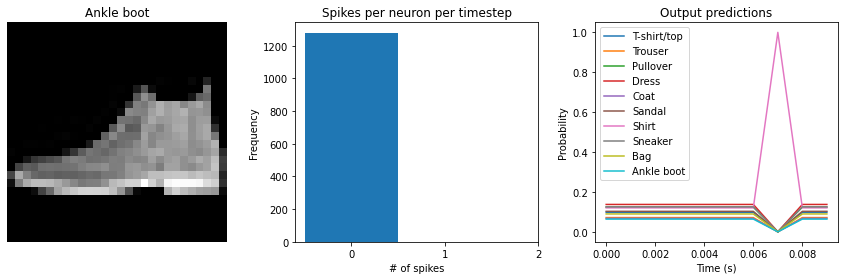

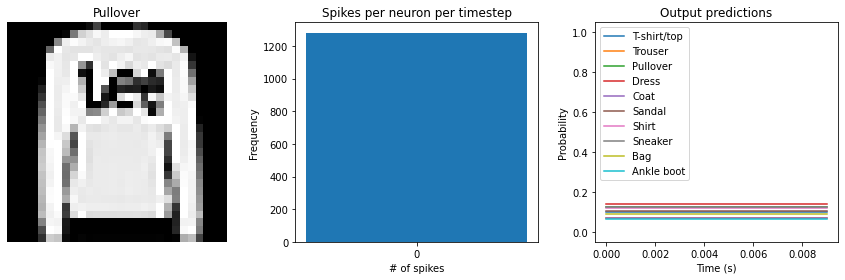

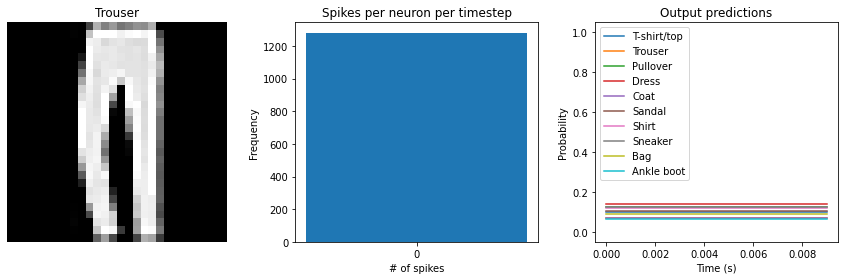

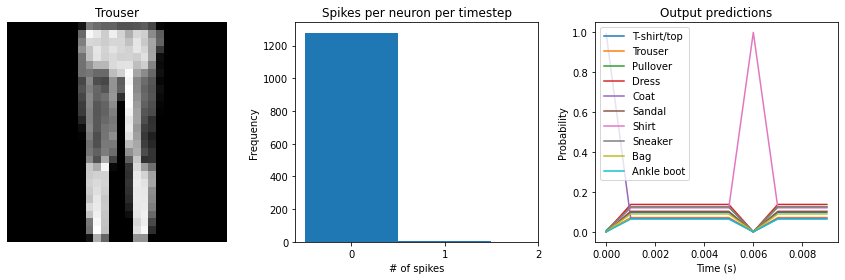

In [7]:
check_output(spiking_model)

We can see an immediate problem: the neurons are hardly spiking at all. The mean number
of spikes we're getting out of each neuron in our SpikingActivation layer is much less
than one, and as a result the output is mostly flat.

To help understand why, we need to think more about the temporal nature of spiking
neurons. Recall that the layer is set up such that if the base activation function were
to be outputting a value of 1, the spiking equivalent would be spiking at 1Hz (i.e.,
emitting one spike per second). In the above example we are simulating for 10 timesteps,
with the default `dt` of 0.001s, so we're simulating a total of 0.01s. If our neurons
aren't spiking very rapidly, and we're only simulating for 0.01s, then it's not
surprising that we aren't getting any spikes in that time window.

We can increase the value of `dt`, effectively running the spiking neurons for longer,
in order to get a more accurate measure of the neuron's output. Basically this allows us
to collect more spikes from each neuron, giving us a better estimate of the neuron's
actual spike rate. We can see how the number of spikes and accuracy change as we
increase `dt`:

Test accuracy: 64.43%
Spike rate per neuron (Hz): min=0.00 mean=0.53 max=20.00


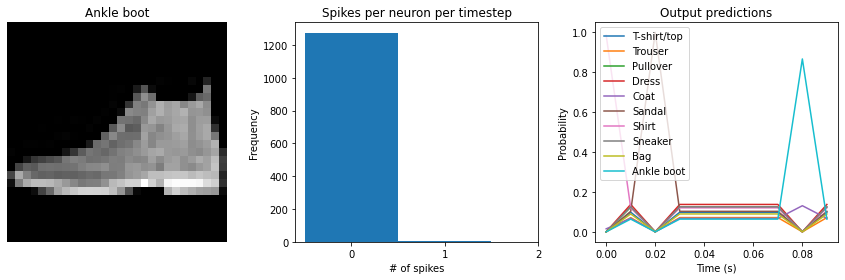

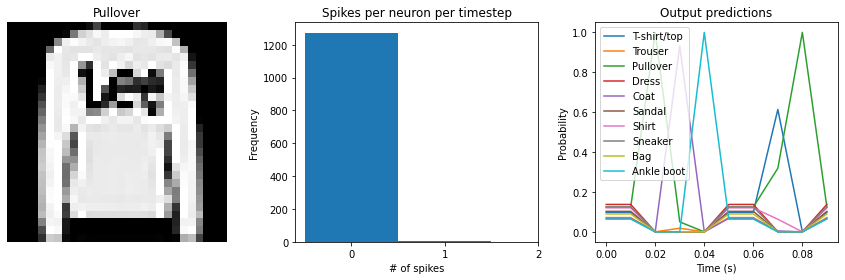

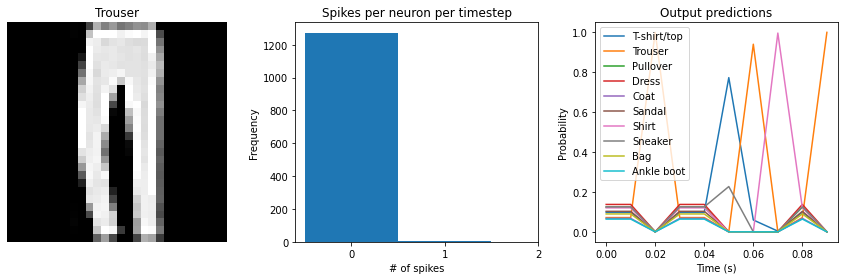

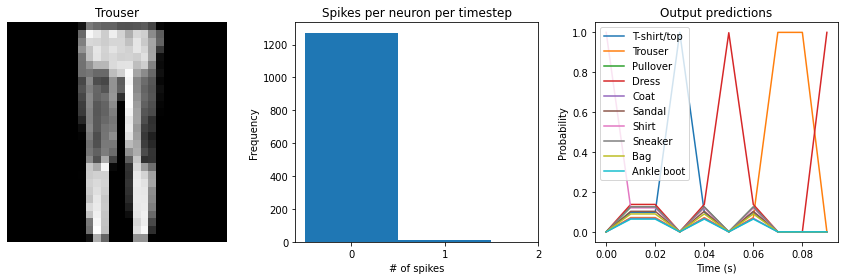

In [8]:
# dt=0.01 * 10 timesteps is equivalent to 0.1s of simulated time
check_output(spiking_model, modify_dt=0.01)

Test accuracy: 88.14%
Spike rate per neuron (Hz): min=0.00 mean=0.53 max=15.00


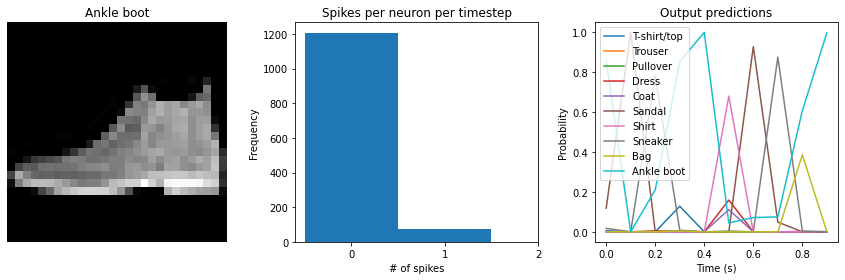

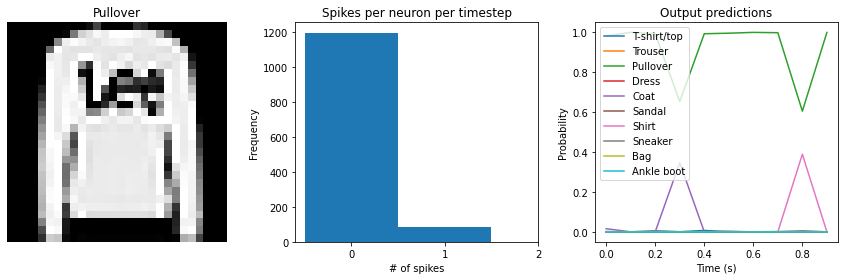

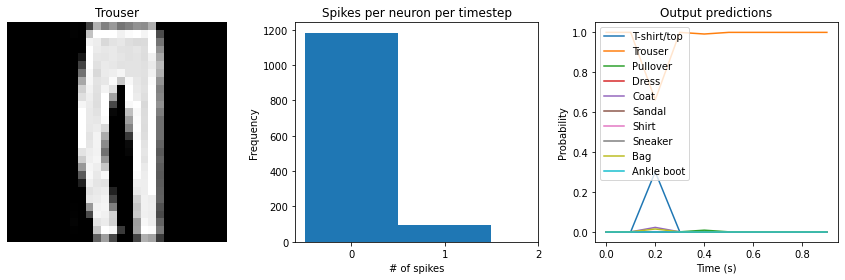

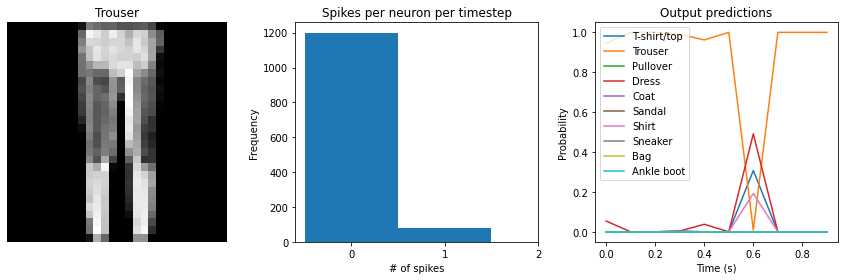

In [9]:
check_output(spiking_model, modify_dt=0.1)

Test accuracy: 88.37%
Spike rate per neuron (Hz): min=0.00 mean=0.53 max=14.40


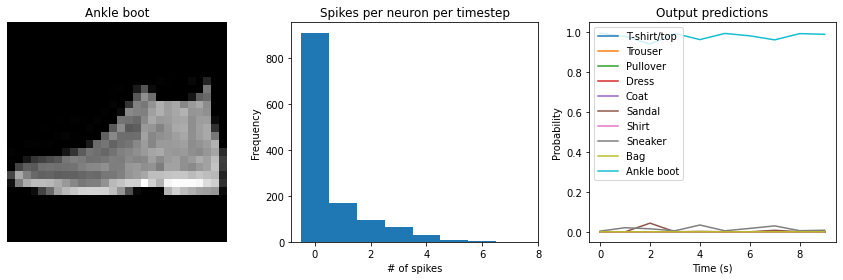

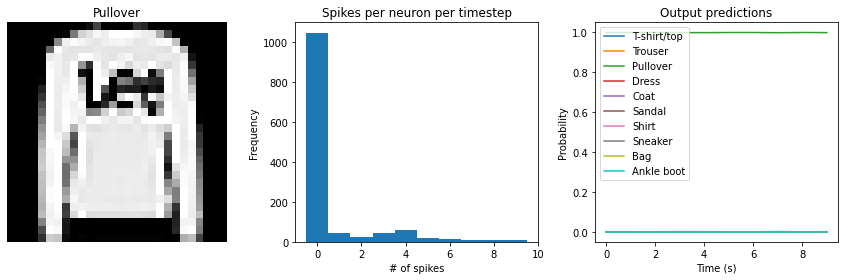

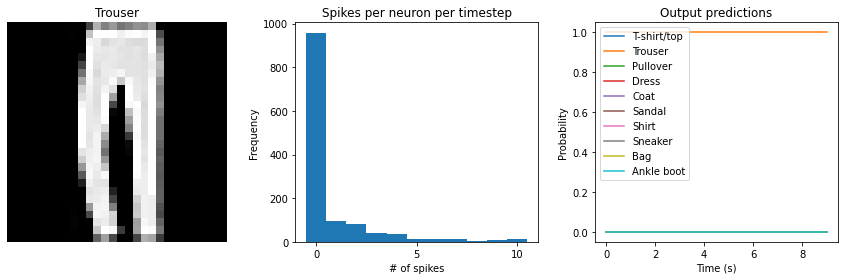

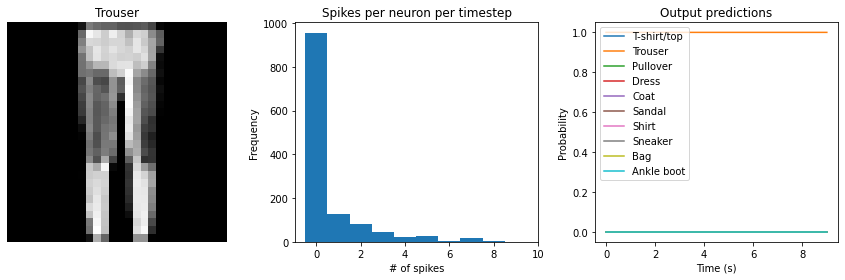

In [10]:
check_output(spiking_model, modify_dt=1)

We can see that as we increase `dt` the performance of the spiking model increasingly
approaches the non-spiking performance. In addition, as `dt` increases, the number of
spikes is increasing. To understand why this improves accuracy, keep in mind that
although the simulated time is increasing, the actual number of timesteps is still 10 in
all cases. We're effectively binning all the spikes that occur on each time step. So as
our bin sizes get larger (increasing `dt`), the spike counts will more closely
approximate the "true" output of the underlying non-spiking activation function.

One might be tempted to simply increase `dt` to a very large value, and thereby always
get great performance. But keep in mind that when we do that we have likely lost any of
the advantages that were motivating us to investigate spiking models in the first place.
For example, one prominent advantage of spiking models is temporal sparsity (we only
need to communicate occasional spikes, rather than continuous values). However, with
large `dt` the neurons are likely spiking every simulation time step (or multiple times
per timestep), so the activity is no longer temporally sparse.

Thus setting `dt` represents a trade-off between accuracy and temporal sparsity.
Choosing the appropriate value will depend on the demands of your application.

In some cases it can be useful to modify `dt` over the course of training. For example,
we could start with a large `dt` and then gradually decrease it over time. See
`keras_spiking.callbacks.DtScheduler` for more details.

## Spiking aware training

As mentioned above, by default SpikingActivation layers will use the non-spiking
activation function during training and the spiking version during inference. However,
similar to the idea of
[quantization aware
training](https://www.tensorflow.org/model_optimization/guide/quantization/training),
often we can improve performance by partially incorporating spiking behaviour during
training. Specifically, we will use the spiking activation on the forward pass, while
still using the non-spiking version on the backwards pass. This allows the model to
learn weights that account for the discrete, temporal nature of the spiking activities.

In [11]:
spikeaware_model = tf.keras.Sequential(
    [
        tf.keras.layers.Reshape((-1, 28 * 28), input_shape=(None, 28, 28)),
        tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(128)),
        # set spiking_aware training and a moderate dt
        keras_spiking.SpikingActivation("relu", dt=0.01, spiking_aware_training=True),
        tf.keras.layers.GlobalAveragePooling1D(),
        tf.keras.layers.Dense(10),
    ]
)

train(spikeaware_model, train_sequences, test_sequences)

Epoch 1/10


   1/1875 [..............................] - ETA: 20:37 - loss: 3.7530 - accuracy: 0.0938

  12/1875 [..............................] - ETA: 8s - loss: 3.1008 - accuracy: 0.2031   

  23/1875 [..............................] - ETA: 8s - loss: 3.0391 - accuracy: 0.2296

  34/1875 [..............................] - ETA: 8s - loss: 2.9381 - accuracy: 0.2767

  46/1875 [..............................] - ETA: 8s - loss: 2.8989 - accuracy: 0.3016

  57/1875 [..............................] - ETA: 8s - loss: 2.8449 - accuracy: 0.3279

  68/1875 [>.............................] - ETA: 8s - loss: 2.8104 - accuracy: 0.3548

  80/1875 [>.............................] - ETA: 8s - loss: 2.7851 - accuracy: 0.3648

  91/1875 [>.............................] - ETA: 8s - loss: 2.7387 - accuracy: 0.3802

 101/1875 [>.............................] - ETA: 8s - loss: 2.7213 - accuracy: 0.3877

 112/1875 [>.............................] - ETA: 8s - loss: 2.6787 - accuracy: 0.4009

 123/1875 [>.............................] - ETA: 8s - loss: 2.6072 - accuracy: 0.4167

 134/1875 [=>............................] - ETA: 8s - loss: 2.5646 - accuracy: 0.4284

 145/1875 [=>............................] - ETA: 8s - loss: 2.5157 - accuracy: 0.4394

 156/1875 [=>............................] - ETA: 8s - loss: 2.4831 - accuracy: 0.4467

 167/1875 [=>............................] - ETA: 8s - loss: 2.4530 - accuracy: 0.4545

 178/1875 [=>............................] - ETA: 8s - loss: 2.4199 - accuracy: 0.4617

 188/1875 [==>...........................] - ETA: 7s - loss: 2.4022 - accuracy: 0.4654

 200/1875 [==>...........................] - ETA: 7s - loss: 2.3658 - accuracy: 0.4734

 211/1875 [==>...........................] - ETA: 7s - loss: 2.3499 - accuracy: 0.4793

 223/1875 [==>...........................] - ETA: 7s - loss: 2.3107 - accuracy: 0.4877

 234/1875 [==>...........................] - ETA: 7s - loss: 2.2945 - accuracy: 0.4920

 245/1875 [==>...........................] - ETA: 7s - loss: 2.2626 - accuracy: 0.4977

 256/1875 [===>..........................] - ETA: 7s - loss: 2.2350 - accuracy: 0.5037

 266/1875 [===>..........................] - ETA: 7s - loss: 2.2125 - accuracy: 0.5068

 276/1875 [===>..........................] - ETA: 7s - loss: 2.2038 - accuracy: 0.5097

 287/1875 [===>..........................] - ETA: 7s - loss: 2.1742 - accuracy: 0.5148

 299/1875 [===>..........................] - ETA: 7s - loss: 2.1496 - accuracy: 0.5203

 310/1875 [===>..........................] - ETA: 7s - loss: 2.1203 - accuracy: 0.5248

 319/1875 [====>.........................] - ETA: 7s - loss: 2.1074 - accuracy: 0.5274

 330/1875 [====>.........................] - ETA: 7s - loss: 2.0908 - accuracy: 0.5303

 341/1875 [====>.........................] - ETA: 7s - loss: 2.0677 - accuracy: 0.5334

 353/1875 [====>.........................] - ETA: 7s - loss: 2.0387 - accuracy: 0.5380

 364/1875 [====>.........................] - ETA: 7s - loss: 2.0178 - accuracy: 0.5408

 376/1875 [=====>........................] - ETA: 7s - loss: 1.9969 - accuracy: 0.5438

 387/1875 [=====>........................] - ETA: 7s - loss: 1.9821 - accuracy: 0.5466

 398/1875 [=====>........................] - ETA: 6s - loss: 1.9624 - accuracy: 0.5497

 409/1875 [=====>........................] - ETA: 6s - loss: 1.9475 - accuracy: 0.5526

 420/1875 [=====>........................] - ETA: 6s - loss: 1.9311 - accuracy: 0.5548

 431/1875 [=====>........................] - ETA: 6s - loss: 1.9145 - accuracy: 0.5581

 442/1875 [======>.......................] - ETA: 6s - loss: 1.9037 - accuracy: 0.5603

 453/1875 [======>.......................] - ETA: 6s - loss: 1.8873 - accuracy: 0.5623

 464/1875 [======>.......................] - ETA: 6s - loss: 1.8716 - accuracy: 0.5643

 475/1875 [======>.......................] - ETA: 6s - loss: 1.8546 - accuracy: 0.5670

 486/1875 [======>.......................] - ETA: 6s - loss: 1.8391 - accuracy: 0.5694

 498/1875 [======>.......................] - ETA: 6s - loss: 1.8247 - accuracy: 0.5716

 506/1875 [=======>......................] - ETA: 6s - loss: 1.8212 - accuracy: 0.5718

 518/1875 [=======>......................] - ETA: 6s - loss: 1.8069 - accuracy: 0.5738

 529/1875 [=======>......................] - ETA: 6s - loss: 1.7918 - accuracy: 0.5761

 540/1875 [=======>......................] - ETA: 6s - loss: 1.7757 - accuracy: 0.5784

 551/1875 [=======>......................] - ETA: 6s - loss: 1.7633 - accuracy: 0.5811

 562/1875 [=======>......................] - ETA: 6s - loss: 1.7508 - accuracy: 0.5825

 573/1875 [========>.....................] - ETA: 6s - loss: 1.7370 - accuracy: 0.5842

 584/1875 [========>.....................] - ETA: 6s - loss: 1.7289 - accuracy: 0.5850

 595/1875 [========>.....................] - ETA: 6s - loss: 1.7207 - accuracy: 0.5863

 606/1875 [========>.....................] - ETA: 5s - loss: 1.7082 - accuracy: 0.5881

 617/1875 [========>.....................] - ETA: 5s - loss: 1.6952 - accuracy: 0.5899

 628/1875 [=========>....................] - ETA: 5s - loss: 1.6851 - accuracy: 0.5909

 639/1875 [=========>....................] - ETA: 5s - loss: 1.6740 - accuracy: 0.5927

 650/1875 [=========>....................] - ETA: 5s - loss: 1.6641 - accuracy: 0.5939

 661/1875 [=========>....................] - ETA: 5s - loss: 1.6523 - accuracy: 0.5960

 672/1875 [=========>....................] - ETA: 5s - loss: 1.6448 - accuracy: 0.5967

 684/1875 [=========>....................] - ETA: 5s - loss: 1.6326 - accuracy: 0.5982

 696/1875 [==========>...................] - ETA: 5s - loss: 1.6231 - accuracy: 0.5995

 708/1875 [==========>...................] - ETA: 5s - loss: 1.6127 - accuracy: 0.6005

 719/1875 [==========>...................] - ETA: 5s - loss: 1.6031 - accuracy: 0.6019

 730/1875 [==========>...................] - ETA: 5s - loss: 1.5950 - accuracy: 0.6027

 740/1875 [==========>...................] - ETA: 5s - loss: 1.5895 - accuracy: 0.6032

 751/1875 [===========>..................] - ETA: 5s - loss: 1.5797 - accuracy: 0.6046

 762/1875 [===========>..................] - ETA: 5s - loss: 1.5694 - accuracy: 0.6061

 773/1875 [===========>..................] - ETA: 5s - loss: 1.5595 - accuracy: 0.6073

 785/1875 [===========>..................] - ETA: 5s - loss: 1.5524 - accuracy: 0.6086

 797/1875 [===========>..................] - ETA: 5s - loss: 1.5428 - accuracy: 0.6097

 808/1875 [===========>..................] - ETA: 5s - loss: 1.5338 - accuracy: 0.6111

 818/1875 [============>.................] - ETA: 4s - loss: 1.5256 - accuracy: 0.6122

 829/1875 [============>.................] - ETA: 4s - loss: 1.5183 - accuracy: 0.6133

 841/1875 [============>.................] - ETA: 4s - loss: 1.5102 - accuracy: 0.6142

 852/1875 [============>.................] - ETA: 4s - loss: 1.5015 - accuracy: 0.6152

 863/1875 [============>.................] - ETA: 4s - loss: 1.4938 - accuracy: 0.6161

 872/1875 [============>.................] - ETA: 4s - loss: 1.4871 - accuracy: 0.6171

 883/1875 [=============>................] - ETA: 4s - loss: 1.4785 - accuracy: 0.6183

 892/1875 [=============>................] - ETA: 4s - loss: 1.4728 - accuracy: 0.6194

 902/1875 [=============>................] - ETA: 4s - loss: 1.4666 - accuracy: 0.6201

 914/1875 [=============>................] - ETA: 4s - loss: 1.4598 - accuracy: 0.6208

 925/1875 [=============>................] - ETA: 4s - loss: 1.4508 - accuracy: 0.6224

 936/1875 [=============>................] - ETA: 4s - loss: 1.4444 - accuracy: 0.6232

 947/1875 [==============>...............] - ETA: 4s - loss: 1.4360 - accuracy: 0.6241

 958/1875 [==============>...............] - ETA: 4s - loss: 1.4303 - accuracy: 0.6252

 969/1875 [==============>...............] - ETA: 4s - loss: 1.4240 - accuracy: 0.6260

 980/1875 [==============>...............] - ETA: 4s - loss: 1.4179 - accuracy: 0.6267

 992/1875 [==============>...............] - ETA: 4s - loss: 1.4099 - accuracy: 0.6281

1001/1875 [===============>..............] - ETA: 4s - loss: 1.4052 - accuracy: 0.6286

1011/1875 [===============>..............] - ETA: 4s - loss: 1.3991 - accuracy: 0.6294

1021/1875 [===============>..............] - ETA: 4s - loss: 1.3929 - accuracy: 0.6304

1032/1875 [===============>..............] - ETA: 4s - loss: 1.3874 - accuracy: 0.6314

1042/1875 [===============>..............] - ETA: 3s - loss: 1.3817 - accuracy: 0.6324

1054/1875 [===============>..............] - ETA: 3s - loss: 1.3752 - accuracy: 0.6330

1065/1875 [================>.............] - ETA: 3s - loss: 1.3688 - accuracy: 0.6339

1076/1875 [================>.............] - ETA: 3s - loss: 1.3626 - accuracy: 0.6350

1087/1875 [================>.............] - ETA: 3s - loss: 1.3558 - accuracy: 0.6361

1098/1875 [================>.............] - ETA: 3s - loss: 1.3512 - accuracy: 0.6365

1109/1875 [================>.............] - ETA: 3s - loss: 1.3456 - accuracy: 0.6373

1120/1875 [================>.............] - ETA: 3s - loss: 1.3402 - accuracy: 0.6381

1131/1875 [=================>............] - ETA: 3s - loss: 1.3342 - accuracy: 0.6393

1139/1875 [=================>............] - ETA: 3s - loss: 1.3313 - accuracy: 0.6396

1149/1875 [=================>............] - ETA: 3s - loss: 1.3255 - accuracy: 0.6404

1160/1875 [=================>............] - ETA: 3s - loss: 1.3196 - accuracy: 0.6412

1171/1875 [=================>............] - ETA: 3s - loss: 1.3150 - accuracy: 0.6417

1182/1875 [=================>............] - ETA: 3s - loss: 1.3114 - accuracy: 0.6422

1194/1875 [==================>...........] - ETA: 3s - loss: 1.3062 - accuracy: 0.6431

1206/1875 [==================>...........] - ETA: 3s - loss: 1.3011 - accuracy: 0.6439

1218/1875 [==================>...........] - ETA: 3s - loss: 1.2953 - accuracy: 0.6450

1230/1875 [==================>...........] - ETA: 3s - loss: 1.2892 - accuracy: 0.6459

1242/1875 [==================>...........] - ETA: 3s - loss: 1.2850 - accuracy: 0.6468

1254/1875 [===================>..........] - ETA: 2s - loss: 1.2799 - accuracy: 0.6474

1266/1875 [===================>..........] - ETA: 2s - loss: 1.2760 - accuracy: 0.6481

1278/1875 [===================>..........] - ETA: 2s - loss: 1.2707 - accuracy: 0.6490

1290/1875 [===================>..........] - ETA: 2s - loss: 1.2661 - accuracy: 0.6497

1302/1875 [===================>..........] - ETA: 2s - loss: 1.2607 - accuracy: 0.6505

1314/1875 [====================>.........] - ETA: 2s - loss: 1.2553 - accuracy: 0.6514

1326/1875 [====================>.........] - ETA: 2s - loss: 1.2501 - accuracy: 0.6523

1337/1875 [====================>.........] - ETA: 2s - loss: 1.2464 - accuracy: 0.6527

1349/1875 [====================>.........] - ETA: 2s - loss: 1.2419 - accuracy: 0.6536

1360/1875 [====================>.........] - ETA: 2s - loss: 1.2374 - accuracy: 0.6543

1371/1875 [====================>.........] - ETA: 2s - loss: 1.2326 - accuracy: 0.6551

1382/1875 [=====================>........] - ETA: 2s - loss: 1.2289 - accuracy: 0.6557

1394/1875 [=====================>........] - ETA: 2s - loss: 1.2248 - accuracy: 0.6560

1401/1875 [=====================>........] - ETA: 2s - loss: 1.2225 - accuracy: 0.6563

1413/1875 [=====================>........] - ETA: 2s - loss: 1.2184 - accuracy: 0.6568

1424/1875 [=====================>........] - ETA: 2s - loss: 1.2154 - accuracy: 0.6574

1435/1875 [=====================>........] - ETA: 2s - loss: 1.2119 - accuracy: 0.6576

1447/1875 [======================>.......] - ETA: 2s - loss: 1.2065 - accuracy: 0.6588

1458/1875 [======================>.......] - ETA: 1s - loss: 1.2037 - accuracy: 0.6588

1469/1875 [======================>.......] - ETA: 1s - loss: 1.2013 - accuracy: 0.6591

1481/1875 [======================>.......] - ETA: 1s - loss: 1.1979 - accuracy: 0.6596

1492/1875 [======================>.......] - ETA: 1s - loss: 1.1939 - accuracy: 0.6603

1503/1875 [=======================>......] - ETA: 1s - loss: 1.1900 - accuracy: 0.6611

1514/1875 [=======================>......] - ETA: 1s - loss: 1.1864 - accuracy: 0.6618

1525/1875 [=======================>......] - ETA: 1s - loss: 1.1830 - accuracy: 0.6623

1537/1875 [=======================>......] - ETA: 1s - loss: 1.1800 - accuracy: 0.6626

1548/1875 [=======================>......] - ETA: 1s - loss: 1.1770 - accuracy: 0.6632

1559/1875 [=======================>......] - ETA: 1s - loss: 1.1731 - accuracy: 0.6639

1570/1875 [========================>.....] - ETA: 1s - loss: 1.1702 - accuracy: 0.6644

1578/1875 [========================>.....] - ETA: 1s - loss: 1.1685 - accuracy: 0.6644

1589/1875 [========================>.....] - ETA: 1s - loss: 1.1663 - accuracy: 0.6648

1600/1875 [========================>.....] - ETA: 1s - loss: 1.1626 - accuracy: 0.6656

1610/1875 [========================>.....] - ETA: 1s - loss: 1.1597 - accuracy: 0.6660

1622/1875 [========================>.....] - ETA: 1s - loss: 1.1564 - accuracy: 0.6667

1633/1875 [=========================>....] - ETA: 1s - loss: 1.1537 - accuracy: 0.6670

1645/1875 [=========================>....] - ETA: 1s - loss: 1.1507 - accuracy: 0.6676

1657/1875 [=========================>....] - ETA: 1s - loss: 1.1474 - accuracy: 0.6683

1668/1875 [=========================>....] - ETA: 0s - loss: 1.1443 - accuracy: 0.6687

1680/1875 [=========================>....] - ETA: 0s - loss: 1.1414 - accuracy: 0.6692

1691/1875 [==========================>...] - ETA: 0s - loss: 1.1385 - accuracy: 0.6695

1702/1875 [==========================>...] - ETA: 0s - loss: 1.1356 - accuracy: 0.6699

1713/1875 [==========================>...] - ETA: 0s - loss: 1.1329 - accuracy: 0.6704

1724/1875 [==========================>...] - ETA: 0s - loss: 1.1303 - accuracy: 0.6707

1735/1875 [==========================>...] - ETA: 0s - loss: 1.1273 - accuracy: 0.6712

1747/1875 [==========================>...] - ETA: 0s - loss: 1.1242 - accuracy: 0.6717

1758/1875 [===========================>..] - ETA: 0s - loss: 1.1221 - accuracy: 0.6720

1770/1875 [===========================>..] - ETA: 0s - loss: 1.1196 - accuracy: 0.6725

1776/1875 [===========================>..] - ETA: 0s - loss: 1.1177 - accuracy: 0.6730

1787/1875 [===========================>..] - ETA: 0s - loss: 1.1152 - accuracy: 0.6734

1798/1875 [===========================>..] - ETA: 0s - loss: 1.1130 - accuracy: 0.6737

1809/1875 [===========================>..] - ETA: 0s - loss: 1.1101 - accuracy: 0.6746

1820/1875 [============================>.] - ETA: 0s - loss: 1.1074 - accuracy: 0.6751

1831/1875 [============================>.] - ETA: 0s - loss: 1.1044 - accuracy: 0.6756

1842/1875 [============================>.] - ETA: 0s - loss: 1.1015 - accuracy: 0.6762

1853/1875 [============================>.] - ETA: 0s - loss: 1.0992 - accuracy: 0.6766

1864/1875 [============================>.] - ETA: 0s - loss: 1.0978 - accuracy: 0.6769

1874/1875 [============================>.] - ETA: 0s - loss: 1.0958 - accuracy: 0.6775

1875/1875 [==============================] - 10s 5ms/step - loss: 1.0956 - accuracy: 0.6776


Epoch 2/10
   1/1875 [..............................] - ETA: 8s - loss: 0.3898 - accuracy: 0.8438

  13/1875 [..............................] - ETA: 8s - loss: 0.7224 - accuracy: 0.7091

  24/1875 [..............................] - ETA: 8s - loss: 0.7176 - accuracy: 0.7253

  35/1875 [..............................] - ETA: 8s - loss: 0.7237 - accuracy: 0.7223

  46/1875 [..............................] - ETA: 8s - loss: 0.7268 - accuracy: 0.7289

  57/1875 [..............................] - ETA: 8s - loss: 0.7130 - accuracy: 0.7412

  69/1875 [>.............................] - ETA: 8s - loss: 0.6892 - accuracy: 0.7541

  80/1875 [>.............................] - ETA: 8s - loss: 0.6770 - accuracy: 0.7590

  91/1875 [>.............................] - ETA: 8s - loss: 0.6739 - accuracy: 0.7603

 101/1875 [>.............................] - ETA: 8s - loss: 0.6751 - accuracy: 0.7611

 112/1875 [>.............................] - ETA: 8s - loss: 0.6685 - accuracy: 0.7603

 123/1875 [>.............................] - ETA: 8s - loss: 0.6753 - accuracy: 0.7584

 134/1875 [=>............................] - ETA: 8s - loss: 0.6810 - accuracy: 0.7579

 145/1875 [=>............................] - ETA: 8s - loss: 0.6871 - accuracy: 0.7567

 157/1875 [=>............................] - ETA: 8s - loss: 0.6818 - accuracy: 0.7582

 168/1875 [=>............................] - ETA: 7s - loss: 0.6845 - accuracy: 0.7565

 179/1875 [=>............................] - ETA: 7s - loss: 0.6802 - accuracy: 0.7566

 190/1875 [==>...........................] - ETA: 7s - loss: 0.6797 - accuracy: 0.7549

 201/1875 [==>...........................] - ETA: 7s - loss: 0.6773 - accuracy: 0.7550

 212/1875 [==>...........................] - ETA: 7s - loss: 0.6768 - accuracy: 0.7568

 221/1875 [==>...........................] - ETA: 7s - loss: 0.6736 - accuracy: 0.7578

 231/1875 [==>...........................] - ETA: 7s - loss: 0.6751 - accuracy: 0.7585

 242/1875 [==>...........................] - ETA: 7s - loss: 0.6798 - accuracy: 0.7566

 253/1875 [===>..........................] - ETA: 7s - loss: 0.6771 - accuracy: 0.7574

 264/1875 [===>..........................] - ETA: 7s - loss: 0.6756 - accuracy: 0.7572

 275/1875 [===>..........................] - ETA: 7s - loss: 0.6736 - accuracy: 0.7589

 286/1875 [===>..........................] - ETA: 7s - loss: 0.6743 - accuracy: 0.7580

 298/1875 [===>..........................] - ETA: 7s - loss: 0.6768 - accuracy: 0.7559

 309/1875 [===>..........................] - ETA: 7s - loss: 0.6805 - accuracy: 0.7549

 320/1875 [====>.........................] - ETA: 7s - loss: 0.6786 - accuracy: 0.7558

 331/1875 [====>.........................] - ETA: 7s - loss: 0.6738 - accuracy: 0.7576

 343/1875 [====>.........................] - ETA: 7s - loss: 0.6727 - accuracy: 0.7577

 354/1875 [====>.........................] - ETA: 7s - loss: 0.6745 - accuracy: 0.7577

 365/1875 [====>.........................] - ETA: 7s - loss: 0.6750 - accuracy: 0.7573

 376/1875 [=====>........................] - ETA: 7s - loss: 0.6724 - accuracy: 0.7577

 387/1875 [=====>........................] - ETA: 7s - loss: 0.6713 - accuracy: 0.7580

 399/1875 [=====>........................] - ETA: 6s - loss: 0.6710 - accuracy: 0.7580

 411/1875 [=====>........................] - ETA: 6s - loss: 0.6688 - accuracy: 0.7587

 422/1875 [=====>........................] - ETA: 6s - loss: 0.6713 - accuracy: 0.7576

 433/1875 [=====>........................] - ETA: 6s - loss: 0.6693 - accuracy: 0.7585

 443/1875 [======>.......................] - ETA: 6s - loss: 0.6682 - accuracy: 0.7590

 454/1875 [======>.......................] - ETA: 6s - loss: 0.6681 - accuracy: 0.7592

 465/1875 [======>.......................] - ETA: 6s - loss: 0.6693 - accuracy: 0.7592

 476/1875 [======>.......................] - ETA: 6s - loss: 0.6699 - accuracy: 0.7587

 487/1875 [======>.......................] - ETA: 6s - loss: 0.6703 - accuracy: 0.7589

 498/1875 [======>.......................] - ETA: 6s - loss: 0.6692 - accuracy: 0.7588

 509/1875 [=======>......................] - ETA: 6s - loss: 0.6689 - accuracy: 0.7587

 518/1875 [=======>......................] - ETA: 6s - loss: 0.6685 - accuracy: 0.7591

 529/1875 [=======>......................] - ETA: 6s - loss: 0.6685 - accuracy: 0.7592

 540/1875 [=======>......................] - ETA: 6s - loss: 0.6682 - accuracy: 0.7591

 551/1875 [=======>......................] - ETA: 6s - loss: 0.6672 - accuracy: 0.7595

 562/1875 [=======>......................] - ETA: 6s - loss: 0.6670 - accuracy: 0.7597

 573/1875 [========>.....................] - ETA: 6s - loss: 0.6679 - accuracy: 0.7594

 584/1875 [========>.....................] - ETA: 6s - loss: 0.6680 - accuracy: 0.7597

 595/1875 [========>.....................] - ETA: 6s - loss: 0.6674 - accuracy: 0.7600

 606/1875 [========>.....................] - ETA: 6s - loss: 0.6669 - accuracy: 0.7598

 617/1875 [========>.....................] - ETA: 5s - loss: 0.6656 - accuracy: 0.7603

 628/1875 [=========>....................] - ETA: 5s - loss: 0.6655 - accuracy: 0.7604

 639/1875 [=========>....................] - ETA: 5s - loss: 0.6645 - accuracy: 0.7606

 650/1875 [=========>....................] - ETA: 5s - loss: 0.6642 - accuracy: 0.7604

 661/1875 [=========>....................] - ETA: 5s - loss: 0.6634 - accuracy: 0.7604

 673/1875 [=========>....................] - ETA: 5s - loss: 0.6621 - accuracy: 0.7608

 685/1875 [=========>....................] - ETA: 5s - loss: 0.6602 - accuracy: 0.7615

 696/1875 [==========>...................] - ETA: 5s - loss: 0.6584 - accuracy: 0.7619

 707/1875 [==========>...................] - ETA: 5s - loss: 0.6573 - accuracy: 0.7621

 718/1875 [==========>...................] - ETA: 5s - loss: 0.6574 - accuracy: 0.7621

 729/1875 [==========>...................] - ETA: 5s - loss: 0.6566 - accuracy: 0.7627

 740/1875 [==========>...................] - ETA: 5s - loss: 0.6568 - accuracy: 0.7628

 751/1875 [===========>..................] - ETA: 5s - loss: 0.6558 - accuracy: 0.7631

 762/1875 [===========>..................] - ETA: 5s - loss: 0.6561 - accuracy: 0.7623

 774/1875 [===========>..................] - ETA: 5s - loss: 0.6548 - accuracy: 0.7627

 785/1875 [===========>..................] - ETA: 5s - loss: 0.6548 - accuracy: 0.7625

 796/1875 [===========>..................] - ETA: 5s - loss: 0.6541 - accuracy: 0.7630

 806/1875 [===========>..................] - ETA: 5s - loss: 0.6545 - accuracy: 0.7631

 818/1875 [============>.................] - ETA: 4s - loss: 0.6547 - accuracy: 0.7632

 829/1875 [============>.................] - ETA: 4s - loss: 0.6550 - accuracy: 0.7634

 841/1875 [============>.................] - ETA: 4s - loss: 0.6549 - accuracy: 0.7634

 852/1875 [============>.................] - ETA: 4s - loss: 0.6567 - accuracy: 0.7627

 864/1875 [============>.................] - ETA: 4s - loss: 0.6554 - accuracy: 0.7634

 875/1875 [=============>................] - ETA: 4s - loss: 0.6546 - accuracy: 0.7635

 886/1875 [=============>................] - ETA: 4s - loss: 0.6540 - accuracy: 0.7636

 897/1875 [=============>................] - ETA: 4s - loss: 0.6527 - accuracy: 0.7640

 907/1875 [=============>................] - ETA: 4s - loss: 0.6516 - accuracy: 0.7644

 918/1875 [=============>................] - ETA: 4s - loss: 0.6511 - accuracy: 0.7649

 930/1875 [=============>................] - ETA: 4s - loss: 0.6509 - accuracy: 0.7654

 942/1875 [==============>...............] - ETA: 4s - loss: 0.6509 - accuracy: 0.7653

 954/1875 [==============>...............] - ETA: 4s - loss: 0.6501 - accuracy: 0.7655

 965/1875 [==============>...............] - ETA: 4s - loss: 0.6503 - accuracy: 0.7656

 977/1875 [==============>...............] - ETA: 4s - loss: 0.6509 - accuracy: 0.7657

 987/1875 [==============>...............] - ETA: 4s - loss: 0.6507 - accuracy: 0.7654

 994/1875 [==============>...............] - ETA: 4s - loss: 0.6503 - accuracy: 0.7656

1005/1875 [===============>..............] - ETA: 4s - loss: 0.6495 - accuracy: 0.7658

1016/1875 [===============>..............] - ETA: 4s - loss: 0.6490 - accuracy: 0.7657

1026/1875 [===============>..............] - ETA: 4s - loss: 0.6488 - accuracy: 0.7658

1035/1875 [===============>..............] - ETA: 3s - loss: 0.6486 - accuracy: 0.7662

1047/1875 [===============>..............] - ETA: 3s - loss: 0.6479 - accuracy: 0.7663

1058/1875 [===============>..............] - ETA: 3s - loss: 0.6478 - accuracy: 0.7664

1069/1875 [================>.............] - ETA: 3s - loss: 0.6476 - accuracy: 0.7666

1080/1875 [================>.............] - ETA: 3s - loss: 0.6476 - accuracy: 0.7665

1092/1875 [================>.............] - ETA: 3s - loss: 0.6479 - accuracy: 0.7666

1104/1875 [================>.............] - ETA: 3s - loss: 0.6465 - accuracy: 0.7672

1116/1875 [================>.............] - ETA: 3s - loss: 0.6468 - accuracy: 0.7669

1127/1875 [=================>............] - ETA: 3s - loss: 0.6465 - accuracy: 0.7669

1138/1875 [=================>............] - ETA: 3s - loss: 0.6462 - accuracy: 0.7670

1149/1875 [=================>............] - ETA: 3s - loss: 0.6462 - accuracy: 0.7673

1159/1875 [=================>............] - ETA: 3s - loss: 0.6466 - accuracy: 0.7672

1170/1875 [=================>............] - ETA: 3s - loss: 0.6461 - accuracy: 0.7673

1181/1875 [=================>............] - ETA: 3s - loss: 0.6454 - accuracy: 0.7674

1192/1875 [==================>...........] - ETA: 3s - loss: 0.6459 - accuracy: 0.7674

1203/1875 [==================>...........] - ETA: 3s - loss: 0.6453 - accuracy: 0.7675

1213/1875 [==================>...........] - ETA: 3s - loss: 0.6446 - accuracy: 0.7678

1224/1875 [==================>...........] - ETA: 3s - loss: 0.6435 - accuracy: 0.7681

1235/1875 [==================>...........] - ETA: 3s - loss: 0.6431 - accuracy: 0.7681

1246/1875 [==================>...........] - ETA: 2s - loss: 0.6429 - accuracy: 0.7684

1256/1875 [===================>..........] - ETA: 2s - loss: 0.6423 - accuracy: 0.7686

1267/1875 [===================>..........] - ETA: 2s - loss: 0.6417 - accuracy: 0.7687

1278/1875 [===================>..........] - ETA: 2s - loss: 0.6416 - accuracy: 0.7687

1290/1875 [===================>..........] - ETA: 2s - loss: 0.6415 - accuracy: 0.7691

1301/1875 [===================>..........] - ETA: 2s - loss: 0.6414 - accuracy: 0.7691

1312/1875 [===================>..........] - ETA: 2s - loss: 0.6411 - accuracy: 0.7694

1323/1875 [====================>.........] - ETA: 2s - loss: 0.6415 - accuracy: 0.7694

1334/1875 [====================>.........] - ETA: 2s - loss: 0.6415 - accuracy: 0.7695

1345/1875 [====================>.........] - ETA: 2s - loss: 0.6421 - accuracy: 0.7692

1354/1875 [====================>.........] - ETA: 2s - loss: 0.6413 - accuracy: 0.7695

1366/1875 [====================>.........] - ETA: 2s - loss: 0.6412 - accuracy: 0.7695

1377/1875 [=====================>........] - ETA: 2s - loss: 0.6411 - accuracy: 0.7696

1388/1875 [=====================>........] - ETA: 2s - loss: 0.6407 - accuracy: 0.7696

1400/1875 [=====================>........] - ETA: 2s - loss: 0.6404 - accuracy: 0.7697

1411/1875 [=====================>........] - ETA: 2s - loss: 0.6398 - accuracy: 0.7699

1423/1875 [=====================>........] - ETA: 2s - loss: 0.6384 - accuracy: 0.7704

1434/1875 [=====================>........] - ETA: 2s - loss: 0.6377 - accuracy: 0.7707

1445/1875 [======================>.......] - ETA: 2s - loss: 0.6369 - accuracy: 0.7709

1456/1875 [======================>.......] - ETA: 1s - loss: 0.6374 - accuracy: 0.7707

1467/1875 [======================>.......] - ETA: 1s - loss: 0.6374 - accuracy: 0.7709

1478/1875 [======================>.......] - ETA: 1s - loss: 0.6373 - accuracy: 0.7708

1489/1875 [======================>.......] - ETA: 1s - loss: 0.6364 - accuracy: 0.7712

1500/1875 [=======================>......] - ETA: 1s - loss: 0.6372 - accuracy: 0.7711

1512/1875 [=======================>......] - ETA: 1s - loss: 0.6366 - accuracy: 0.7713

1521/1875 [=======================>......] - ETA: 1s - loss: 0.6360 - accuracy: 0.7715

1530/1875 [=======================>......] - ETA: 1s - loss: 0.6361 - accuracy: 0.7718

1539/1875 [=======================>......] - ETA: 1s - loss: 0.6364 - accuracy: 0.7717

1548/1875 [=======================>......] - ETA: 1s - loss: 0.6366 - accuracy: 0.7716

1557/1875 [=======================>......] - ETA: 1s - loss: 0.6356 - accuracy: 0.7720

1565/1875 [========================>.....] - ETA: 1s - loss: 0.6351 - accuracy: 0.7720

1575/1875 [========================>.....] - ETA: 1s - loss: 0.6352 - accuracy: 0.7720

1585/1875 [========================>.....] - ETA: 1s - loss: 0.6346 - accuracy: 0.7723

1595/1875 [========================>.....] - ETA: 1s - loss: 0.6342 - accuracy: 0.7724

1606/1875 [========================>.....] - ETA: 1s - loss: 0.6335 - accuracy: 0.7724

1617/1875 [========================>.....] - ETA: 1s - loss: 0.6332 - accuracy: 0.7726

1629/1875 [=========================>....] - ETA: 1s - loss: 0.6331 - accuracy: 0.7727

1641/1875 [=========================>....] - ETA: 1s - loss: 0.6325 - accuracy: 0.7729

1652/1875 [=========================>....] - ETA: 1s - loss: 0.6323 - accuracy: 0.7729

1663/1875 [=========================>....] - ETA: 1s - loss: 0.6317 - accuracy: 0.7731

1674/1875 [=========================>....] - ETA: 0s - loss: 0.6313 - accuracy: 0.7731

1686/1875 [=========================>....] - ETA: 0s - loss: 0.6312 - accuracy: 0.7732

1698/1875 [==========================>...] - ETA: 0s - loss: 0.6316 - accuracy: 0.7733

1710/1875 [==========================>...] - ETA: 0s - loss: 0.6309 - accuracy: 0.7735

1720/1875 [==========================>...] - ETA: 0s - loss: 0.6306 - accuracy: 0.7736

1731/1875 [==========================>...] - ETA: 0s - loss: 0.6301 - accuracy: 0.7738

1743/1875 [==========================>...] - ETA: 0s - loss: 0.6298 - accuracy: 0.7737

1753/1875 [===========================>..] - ETA: 0s - loss: 0.6296 - accuracy: 0.7740

1764/1875 [===========================>..] - ETA: 0s - loss: 0.6296 - accuracy: 0.7740

1776/1875 [===========================>..] - ETA: 0s - loss: 0.6293 - accuracy: 0.7741

1788/1875 [===========================>..] - ETA: 0s - loss: 0.6296 - accuracy: 0.7740

1796/1875 [===========================>..] - ETA: 0s - loss: 0.6292 - accuracy: 0.7740

1808/1875 [===========================>..] - ETA: 0s - loss: 0.6292 - accuracy: 0.7740

1820/1875 [============================>.] - ETA: 0s - loss: 0.6289 - accuracy: 0.7741

1832/1875 [============================>.] - ETA: 0s - loss: 0.6283 - accuracy: 0.7743

1844/1875 [============================>.] - ETA: 0s - loss: 0.6279 - accuracy: 0.7745

1856/1875 [============================>.] - ETA: 0s - loss: 0.6273 - accuracy: 0.7747

1867/1875 [============================>.] - ETA: 0s - loss: 0.6273 - accuracy: 0.7746

1875/1875 [==============================] - 9s 5ms/step - loss: 0.6272 - accuracy: 0.7746


Epoch 3/10
   1/1875 [..............................] - ETA: 8s - loss: 0.5709 - accuracy: 0.8438

  12/1875 [..............................] - ETA: 8s - loss: 0.5508 - accuracy: 0.8047

  21/1875 [..............................] - ETA: 9s - loss: 0.5519 - accuracy: 0.8140

  32/1875 [..............................] - ETA: 9s - loss: 0.5677 - accuracy: 0.8125

  44/1875 [..............................] - ETA: 8s - loss: 0.5628 - accuracy: 0.8075

  55/1875 [..............................] - ETA: 8s - loss: 0.5639 - accuracy: 0.8023

  67/1875 [>.............................] - ETA: 8s - loss: 0.5784 - accuracy: 0.7999

  79/1875 [>.............................] - ETA: 8s - loss: 0.5873 - accuracy: 0.7951

  91/1875 [>.............................] - ETA: 8s - loss: 0.5809 - accuracy: 0.7970

 102/1875 [>.............................] - ETA: 8s - loss: 0.5801 - accuracy: 0.7975

 114/1875 [>.............................] - ETA: 8s - loss: 0.5830 - accuracy: 0.7974

 125/1875 [=>............................] - ETA: 8s - loss: 0.5858 - accuracy: 0.7962

 137/1875 [=>............................] - ETA: 8s - loss: 0.5842 - accuracy: 0.7958

 148/1875 [=>............................] - ETA: 7s - loss: 0.5832 - accuracy: 0.7962

 160/1875 [=>............................] - ETA: 7s - loss: 0.5837 - accuracy: 0.7957

 172/1875 [=>............................] - ETA: 7s - loss: 0.5861 - accuracy: 0.7951

 184/1875 [=>............................] - ETA: 7s - loss: 0.5850 - accuracy: 0.7960

 193/1875 [==>...........................] - ETA: 7s - loss: 0.5883 - accuracy: 0.7945

 204/1875 [==>...........................] - ETA: 7s - loss: 0.5839 - accuracy: 0.7950

 214/1875 [==>...........................] - ETA: 7s - loss: 0.5840 - accuracy: 0.7941

 226/1875 [==>...........................] - ETA: 7s - loss: 0.5862 - accuracy: 0.7922

 235/1875 [==>...........................] - ETA: 7s - loss: 0.5835 - accuracy: 0.7928

 247/1875 [==>...........................] - ETA: 7s - loss: 0.5831 - accuracy: 0.7919

 259/1875 [===>..........................] - ETA: 7s - loss: 0.5861 - accuracy: 0.7903

 268/1875 [===>..........................] - ETA: 7s - loss: 0.5840 - accuracy: 0.7910

 280/1875 [===>..........................] - ETA: 7s - loss: 0.5874 - accuracy: 0.7902

 292/1875 [===>..........................] - ETA: 7s - loss: 0.5873 - accuracy: 0.7906

 304/1875 [===>..........................] - ETA: 7s - loss: 0.5880 - accuracy: 0.7902

 315/1875 [====>.........................] - ETA: 7s - loss: 0.5903 - accuracy: 0.7899

 327/1875 [====>.........................] - ETA: 7s - loss: 0.5888 - accuracy: 0.7902

 338/1875 [====>.........................] - ETA: 7s - loss: 0.5881 - accuracy: 0.7905

 348/1875 [====>.........................] - ETA: 7s - loss: 0.5868 - accuracy: 0.7907

 357/1875 [====>.........................] - ETA: 7s - loss: 0.5867 - accuracy: 0.7906

 364/1875 [====>.........................] - ETA: 7s - loss: 0.5871 - accuracy: 0.7901

 375/1875 [=====>........................] - ETA: 7s - loss: 0.5886 - accuracy: 0.7892

 386/1875 [=====>........................] - ETA: 7s - loss: 0.5885 - accuracy: 0.7889

 395/1875 [=====>........................] - ETA: 7s - loss: 0.5881 - accuracy: 0.7887

 405/1875 [=====>........................] - ETA: 7s - loss: 0.5885 - accuracy: 0.7890

 416/1875 [=====>........................] - ETA: 7s - loss: 0.5885 - accuracy: 0.7887

 427/1875 [=====>........................] - ETA: 6s - loss: 0.5853 - accuracy: 0.7896

 434/1875 [=====>........................] - ETA: 6s - loss: 0.5858 - accuracy: 0.7897

 445/1875 [======>.......................] - ETA: 6s - loss: 0.5829 - accuracy: 0.7909

 454/1875 [======>.......................] - ETA: 6s - loss: 0.5820 - accuracy: 0.7911

 465/1875 [======>.......................] - ETA: 6s - loss: 0.5804 - accuracy: 0.7920

 477/1875 [======>.......................] - ETA: 6s - loss: 0.5782 - accuracy: 0.7926

 488/1875 [======>.......................] - ETA: 6s - loss: 0.5778 - accuracy: 0.7925

 499/1875 [======>.......................] - ETA: 6s - loss: 0.5781 - accuracy: 0.7920

 511/1875 [=======>......................] - ETA: 6s - loss: 0.5776 - accuracy: 0.7924

 522/1875 [=======>......................] - ETA: 6s - loss: 0.5763 - accuracy: 0.7929

 534/1875 [=======>......................] - ETA: 6s - loss: 0.5756 - accuracy: 0.7934

 546/1875 [=======>......................] - ETA: 6s - loss: 0.5761 - accuracy: 0.7933

 558/1875 [=======>......................] - ETA: 6s - loss: 0.5761 - accuracy: 0.7932

 569/1875 [========>.....................] - ETA: 6s - loss: 0.5756 - accuracy: 0.7933

 579/1875 [========>.....................] - ETA: 6s - loss: 0.5753 - accuracy: 0.7936

 589/1875 [========>.....................] - ETA: 6s - loss: 0.5769 - accuracy: 0.7930

 601/1875 [========>.....................] - ETA: 6s - loss: 0.5759 - accuracy: 0.7932

 613/1875 [========>.....................] - ETA: 6s - loss: 0.5752 - accuracy: 0.7933

 624/1875 [========>.....................] - ETA: 6s - loss: 0.5750 - accuracy: 0.7931

 633/1875 [=========>....................] - ETA: 5s - loss: 0.5735 - accuracy: 0.7933

 642/1875 [=========>....................] - ETA: 5s - loss: 0.5750 - accuracy: 0.7929

 653/1875 [=========>....................] - ETA: 5s - loss: 0.5745 - accuracy: 0.7931

 664/1875 [=========>....................] - ETA: 5s - loss: 0.5741 - accuracy: 0.7935

 676/1875 [=========>....................] - ETA: 5s - loss: 0.5737 - accuracy: 0.7942

 688/1875 [==========>...................] - ETA: 5s - loss: 0.5749 - accuracy: 0.7939

 699/1875 [==========>...................] - ETA: 5s - loss: 0.5773 - accuracy: 0.7932

 711/1875 [==========>...................] - ETA: 5s - loss: 0.5768 - accuracy: 0.7936

 722/1875 [==========>...................] - ETA: 5s - loss: 0.5774 - accuracy: 0.7934

 733/1875 [==========>...................] - ETA: 5s - loss: 0.5766 - accuracy: 0.7937

 745/1875 [==========>...................] - ETA: 5s - loss: 0.5762 - accuracy: 0.7939

 757/1875 [===========>..................] - ETA: 5s - loss: 0.5742 - accuracy: 0.7947

 767/1875 [===========>..................] - ETA: 5s - loss: 0.5744 - accuracy: 0.7948

 779/1875 [===========>..................] - ETA: 5s - loss: 0.5729 - accuracy: 0.7953

 791/1875 [===========>..................] - ETA: 5s - loss: 0.5720 - accuracy: 0.7955

 803/1875 [===========>..................] - ETA: 5s - loss: 0.5706 - accuracy: 0.7958

 815/1875 [============>.................] - ETA: 5s - loss: 0.5707 - accuracy: 0.7957

 826/1875 [============>.................] - ETA: 5s - loss: 0.5719 - accuracy: 0.7954

 837/1875 [============>.................] - ETA: 4s - loss: 0.5731 - accuracy: 0.7953

 848/1875 [============>.................] - ETA: 4s - loss: 0.5728 - accuracy: 0.7954

 859/1875 [============>.................] - ETA: 4s - loss: 0.5721 - accuracy: 0.7956

 867/1875 [============>.................] - ETA: 4s - loss: 0.5704 - accuracy: 0.7961

 877/1875 [=============>................] - ETA: 4s - loss: 0.5697 - accuracy: 0.7963

 888/1875 [=============>................] - ETA: 4s - loss: 0.5694 - accuracy: 0.7964

 898/1875 [=============>................] - ETA: 4s - loss: 0.5686 - accuracy: 0.7965

 909/1875 [=============>................] - ETA: 4s - loss: 0.5690 - accuracy: 0.7965

 920/1875 [=============>................] - ETA: 4s - loss: 0.5696 - accuracy: 0.7964

 931/1875 [=============>................] - ETA: 4s - loss: 0.5692 - accuracy: 0.7966

 942/1875 [==============>...............] - ETA: 4s - loss: 0.5692 - accuracy: 0.7966

 954/1875 [==============>...............] - ETA: 4s - loss: 0.5690 - accuracy: 0.7968

 962/1875 [==============>...............] - ETA: 4s - loss: 0.5686 - accuracy: 0.7970

 973/1875 [==============>...............] - ETA: 4s - loss: 0.5677 - accuracy: 0.7970

 982/1875 [==============>...............] - ETA: 4s - loss: 0.5673 - accuracy: 0.7972

 992/1875 [==============>...............] - ETA: 4s - loss: 0.5671 - accuracy: 0.7976

1004/1875 [===============>..............] - ETA: 4s - loss: 0.5677 - accuracy: 0.7975

1016/1875 [===============>..............] - ETA: 4s - loss: 0.5672 - accuracy: 0.7976

1028/1875 [===============>..............] - ETA: 4s - loss: 0.5668 - accuracy: 0.7978

1040/1875 [===============>..............] - ETA: 4s - loss: 0.5669 - accuracy: 0.7977

1052/1875 [===============>..............] - ETA: 3s - loss: 0.5669 - accuracy: 0.7976

1063/1875 [================>.............] - ETA: 3s - loss: 0.5670 - accuracy: 0.7975

1074/1875 [================>.............] - ETA: 3s - loss: 0.5658 - accuracy: 0.7980

1085/1875 [================>.............] - ETA: 3s - loss: 0.5652 - accuracy: 0.7982

1095/1875 [================>.............] - ETA: 3s - loss: 0.5651 - accuracy: 0.7981

1106/1875 [================>.............] - ETA: 3s - loss: 0.5654 - accuracy: 0.7979

1117/1875 [================>.............] - ETA: 3s - loss: 0.5650 - accuracy: 0.7977

1129/1875 [=================>............] - ETA: 3s - loss: 0.5652 - accuracy: 0.7978

1140/1875 [=================>............] - ETA: 3s - loss: 0.5651 - accuracy: 0.7975

1152/1875 [=================>............] - ETA: 3s - loss: 0.5643 - accuracy: 0.7979

1164/1875 [=================>............] - ETA: 3s - loss: 0.5643 - accuracy: 0.7980

1175/1875 [=================>............] - ETA: 3s - loss: 0.5645 - accuracy: 0.7979

1186/1875 [=================>............] - ETA: 3s - loss: 0.5648 - accuracy: 0.7978

1197/1875 [==================>...........] - ETA: 3s - loss: 0.5648 - accuracy: 0.7979

1206/1875 [==================>...........] - ETA: 3s - loss: 0.5641 - accuracy: 0.7981

1216/1875 [==================>...........] - ETA: 3s - loss: 0.5633 - accuracy: 0.7983

1226/1875 [==================>...........] - ETA: 3s - loss: 0.5629 - accuracy: 0.7985

1236/1875 [==================>...........] - ETA: 3s - loss: 0.5627 - accuracy: 0.7986

1244/1875 [==================>...........] - ETA: 3s - loss: 0.5624 - accuracy: 0.7987

1254/1875 [===================>..........] - ETA: 2s - loss: 0.5622 - accuracy: 0.7987

1264/1875 [===================>..........] - ETA: 2s - loss: 0.5625 - accuracy: 0.7985

1273/1875 [===================>..........] - ETA: 2s - loss: 0.5625 - accuracy: 0.7983

1285/1875 [===================>..........] - ETA: 2s - loss: 0.5617 - accuracy: 0.7987

1297/1875 [===================>..........] - ETA: 2s - loss: 0.5614 - accuracy: 0.7989

1308/1875 [===================>..........] - ETA: 2s - loss: 0.5604 - accuracy: 0.7993

1319/1875 [====================>.........] - ETA: 2s - loss: 0.5596 - accuracy: 0.7994

1329/1875 [====================>.........] - ETA: 2s - loss: 0.5595 - accuracy: 0.7994

1339/1875 [====================>.........] - ETA: 2s - loss: 0.5590 - accuracy: 0.7993

1349/1875 [====================>.........] - ETA: 2s - loss: 0.5601 - accuracy: 0.7990

1360/1875 [====================>.........] - ETA: 2s - loss: 0.5600 - accuracy: 0.7991

1372/1875 [====================>.........] - ETA: 2s - loss: 0.5604 - accuracy: 0.7987

1383/1875 [=====================>........] - ETA: 2s - loss: 0.5607 - accuracy: 0.7987

1392/1875 [=====================>........] - ETA: 2s - loss: 0.5606 - accuracy: 0.7985

1403/1875 [=====================>........] - ETA: 2s - loss: 0.5609 - accuracy: 0.7984

1413/1875 [=====================>........] - ETA: 2s - loss: 0.5611 - accuracy: 0.7986

1424/1875 [=====================>........] - ETA: 2s - loss: 0.5607 - accuracy: 0.7987

1436/1875 [=====================>........] - ETA: 2s - loss: 0.5605 - accuracy: 0.7989

1448/1875 [======================>.......] - ETA: 2s - loss: 0.5596 - accuracy: 0.7991

1459/1875 [======================>.......] - ETA: 2s - loss: 0.5592 - accuracy: 0.7993

1470/1875 [======================>.......] - ETA: 1s - loss: 0.5593 - accuracy: 0.7995

1481/1875 [======================>.......] - ETA: 1s - loss: 0.5596 - accuracy: 0.7995

1492/1875 [======================>.......] - ETA: 1s - loss: 0.5594 - accuracy: 0.7995

1503/1875 [=======================>......] - ETA: 1s - loss: 0.5587 - accuracy: 0.7997

1514/1875 [=======================>......] - ETA: 1s - loss: 0.5590 - accuracy: 0.7996

1524/1875 [=======================>......] - ETA: 1s - loss: 0.5585 - accuracy: 0.7998

1534/1875 [=======================>......] - ETA: 1s - loss: 0.5585 - accuracy: 0.7997

1546/1875 [=======================>......] - ETA: 1s - loss: 0.5583 - accuracy: 0.7998

1557/1875 [=======================>......] - ETA: 1s - loss: 0.5581 - accuracy: 0.8001

1569/1875 [========================>.....] - ETA: 1s - loss: 0.5579 - accuracy: 0.8002

1580/1875 [========================>.....] - ETA: 1s - loss: 0.5582 - accuracy: 0.8000

1592/1875 [========================>.....] - ETA: 1s - loss: 0.5578 - accuracy: 0.8000

1602/1875 [========================>.....] - ETA: 1s - loss: 0.5576 - accuracy: 0.8001

1612/1875 [========================>.....] - ETA: 1s - loss: 0.5581 - accuracy: 0.8000

1623/1875 [========================>.....] - ETA: 1s - loss: 0.5575 - accuracy: 0.8001

1634/1875 [=========================>....] - ETA: 1s - loss: 0.5576 - accuracy: 0.8001

1646/1875 [=========================>....] - ETA: 1s - loss: 0.5578 - accuracy: 0.8003

1658/1875 [=========================>....] - ETA: 1s - loss: 0.5578 - accuracy: 0.8002

1669/1875 [=========================>....] - ETA: 0s - loss: 0.5574 - accuracy: 0.8003

1680/1875 [=========================>....] - ETA: 0s - loss: 0.5571 - accuracy: 0.8004

1691/1875 [==========================>...] - ETA: 0s - loss: 0.5571 - accuracy: 0.8002

1703/1875 [==========================>...] - ETA: 0s - loss: 0.5563 - accuracy: 0.8005

1714/1875 [==========================>...] - ETA: 0s - loss: 0.5555 - accuracy: 0.8007

1725/1875 [==========================>...] - ETA: 0s - loss: 0.5553 - accuracy: 0.8008

1737/1875 [==========================>...] - ETA: 0s - loss: 0.5552 - accuracy: 0.8007

1749/1875 [==========================>...] - ETA: 0s - loss: 0.5551 - accuracy: 0.8008

1761/1875 [===========================>..] - ETA: 0s - loss: 0.5552 - accuracy: 0.8008

1772/1875 [===========================>..] - ETA: 0s - loss: 0.5552 - accuracy: 0.8009

1783/1875 [===========================>..] - ETA: 0s - loss: 0.5552 - accuracy: 0.8009

1791/1875 [===========================>..] - ETA: 0s - loss: 0.5552 - accuracy: 0.8009

1803/1875 [===========================>..] - ETA: 0s - loss: 0.5551 - accuracy: 0.8008

1811/1875 [===========================>..] - ETA: 0s - loss: 0.5544 - accuracy: 0.8010

1821/1875 [============================>.] - ETA: 0s - loss: 0.5541 - accuracy: 0.8012

1833/1875 [============================>.] - ETA: 0s - loss: 0.5535 - accuracy: 0.8013

1843/1875 [============================>.] - ETA: 0s - loss: 0.5533 - accuracy: 0.8014

1852/1875 [============================>.] - ETA: 0s - loss: 0.5530 - accuracy: 0.8014

1864/1875 [============================>.] - ETA: 0s - loss: 0.5530 - accuracy: 0.8014

1874/1875 [============================>.] - ETA: 0s - loss: 0.5529 - accuracy: 0.8014

1875/1875 [==============================] - 9s 5ms/step - loss: 0.5530 - accuracy: 0.8013


Epoch 4/10
   1/1875 [..............................] - ETA: 8s - loss: 0.5547 - accuracy: 0.7812

  13/1875 [..............................] - ETA: 8s - loss: 0.5199 - accuracy: 0.7981

  25/1875 [..............................] - ETA: 8s - loss: 0.5725 - accuracy: 0.7925

  37/1875 [..............................] - ETA: 8s - loss: 0.5564 - accuracy: 0.7998

  49/1875 [..............................] - ETA: 8s - loss: 0.5805 - accuracy: 0.7985

  61/1875 [..............................] - ETA: 8s - loss: 0.5609 - accuracy: 0.8002

  72/1875 [>.............................] - ETA: 8s - loss: 0.5498 - accuracy: 0.8003

  83/1875 [>.............................] - ETA: 8s - loss: 0.5510 - accuracy: 0.7989

  94/1875 [>.............................] - ETA: 8s - loss: 0.5534 - accuracy: 0.7975

 105/1875 [>.............................] - ETA: 7s - loss: 0.5475 - accuracy: 0.8015

 116/1875 [>.............................] - ETA: 7s - loss: 0.5414 - accuracy: 0.8036

 126/1875 [=>............................] - ETA: 8s - loss: 0.5415 - accuracy: 0.8048

 137/1875 [=>............................] - ETA: 7s - loss: 0.5477 - accuracy: 0.8031

 148/1875 [=>............................] - ETA: 7s - loss: 0.5474 - accuracy: 0.8032

 158/1875 [=>............................] - ETA: 7s - loss: 0.5440 - accuracy: 0.8048

 170/1875 [=>............................] - ETA: 7s - loss: 0.5449 - accuracy: 0.8046

 182/1875 [=>............................] - ETA: 7s - loss: 0.5411 - accuracy: 0.8063

 194/1875 [==>...........................] - ETA: 7s - loss: 0.5337 - accuracy: 0.8093

 205/1875 [==>...........................] - ETA: 7s - loss: 0.5334 - accuracy: 0.8073

 217/1875 [==>...........................] - ETA: 7s - loss: 0.5338 - accuracy: 0.8075

 228/1875 [==>...........................] - ETA: 7s - loss: 0.5316 - accuracy: 0.8078

 239/1875 [==>...........................] - ETA: 7s - loss: 0.5320 - accuracy: 0.8092

 251/1875 [===>..........................] - ETA: 7s - loss: 0.5296 - accuracy: 0.8105

 263/1875 [===>..........................] - ETA: 7s - loss: 0.5296 - accuracy: 0.8110

 273/1875 [===>..........................] - ETA: 7s - loss: 0.5310 - accuracy: 0.8104

 285/1875 [===>..........................] - ETA: 7s - loss: 0.5312 - accuracy: 0.8102

 297/1875 [===>..........................] - ETA: 7s - loss: 0.5329 - accuracy: 0.8107

 307/1875 [===>..........................] - ETA: 7s - loss: 0.5308 - accuracy: 0.8110

 318/1875 [====>.........................] - ETA: 7s - loss: 0.5300 - accuracy: 0.8115

 328/1875 [====>.........................] - ETA: 7s - loss: 0.5274 - accuracy: 0.8124

 339/1875 [====>.........................] - ETA: 7s - loss: 0.5301 - accuracy: 0.8108

 350/1875 [====>.........................] - ETA: 7s - loss: 0.5297 - accuracy: 0.8107

 360/1875 [====>.........................] - ETA: 7s - loss: 0.5279 - accuracy: 0.8115

 371/1875 [====>.........................] - ETA: 7s - loss: 0.5280 - accuracy: 0.8112

 382/1875 [=====>........................] - ETA: 7s - loss: 0.5273 - accuracy: 0.8111

 393/1875 [=====>........................] - ETA: 6s - loss: 0.5268 - accuracy: 0.8111

 404/1875 [=====>........................] - ETA: 6s - loss: 0.5271 - accuracy: 0.8109

 415/1875 [=====>........................] - ETA: 6s - loss: 0.5264 - accuracy: 0.8108

 426/1875 [=====>........................] - ETA: 6s - loss: 0.5244 - accuracy: 0.8116

 436/1875 [=====>........................] - ETA: 6s - loss: 0.5243 - accuracy: 0.8112

 446/1875 [======>.......................] - ETA: 6s - loss: 0.5257 - accuracy: 0.8110

 457/1875 [======>.......................] - ETA: 6s - loss: 0.5260 - accuracy: 0.8109

 467/1875 [======>.......................] - ETA: 6s - loss: 0.5256 - accuracy: 0.8112

 478/1875 [======>.......................] - ETA: 6s - loss: 0.5242 - accuracy: 0.8115

 489/1875 [======>.......................] - ETA: 6s - loss: 0.5247 - accuracy: 0.8116

 498/1875 [======>.......................] - ETA: 6s - loss: 0.5239 - accuracy: 0.8114

 509/1875 [=======>......................] - ETA: 6s - loss: 0.5241 - accuracy: 0.8116

 520/1875 [=======>......................] - ETA: 6s - loss: 0.5274 - accuracy: 0.8105

 531/1875 [=======>......................] - ETA: 6s - loss: 0.5264 - accuracy: 0.8110

 542/1875 [=======>......................] - ETA: 6s - loss: 0.5261 - accuracy: 0.8108

 553/1875 [=======>......................] - ETA: 6s - loss: 0.5249 - accuracy: 0.8112

 565/1875 [========>.....................] - ETA: 6s - loss: 0.5224 - accuracy: 0.8122

 576/1875 [========>.....................] - ETA: 6s - loss: 0.5214 - accuracy: 0.8124

 585/1875 [========>.....................] - ETA: 6s - loss: 0.5210 - accuracy: 0.8127

 595/1875 [========>.....................] - ETA: 6s - loss: 0.5217 - accuracy: 0.8121

 607/1875 [========>.....................] - ETA: 6s - loss: 0.5206 - accuracy: 0.8126

 618/1875 [========>.....................] - ETA: 5s - loss: 0.5196 - accuracy: 0.8126

 627/1875 [=========>....................] - ETA: 5s - loss: 0.5204 - accuracy: 0.8123

 638/1875 [=========>....................] - ETA: 5s - loss: 0.5207 - accuracy: 0.8123

 649/1875 [=========>....................] - ETA: 5s - loss: 0.5216 - accuracy: 0.8121

 659/1875 [=========>....................] - ETA: 5s - loss: 0.5221 - accuracy: 0.8121

 671/1875 [=========>....................] - ETA: 5s - loss: 0.5229 - accuracy: 0.8124

 682/1875 [=========>....................] - ETA: 5s - loss: 0.5227 - accuracy: 0.8122

 692/1875 [==========>...................] - ETA: 5s - loss: 0.5218 - accuracy: 0.8130

 703/1875 [==========>...................] - ETA: 5s - loss: 0.5216 - accuracy: 0.8131

 715/1875 [==========>...................] - ETA: 5s - loss: 0.5214 - accuracy: 0.8131

 725/1875 [==========>...................] - ETA: 5s - loss: 0.5208 - accuracy: 0.8133

 734/1875 [==========>...................] - ETA: 5s - loss: 0.5204 - accuracy: 0.8135

 746/1875 [==========>...................] - ETA: 5s - loss: 0.5204 - accuracy: 0.8131

 757/1875 [===========>..................] - ETA: 5s - loss: 0.5211 - accuracy: 0.8128

 768/1875 [===========>..................] - ETA: 5s - loss: 0.5217 - accuracy: 0.8125

 780/1875 [===========>..................] - ETA: 5s - loss: 0.5226 - accuracy: 0.8123

 790/1875 [===========>..................] - ETA: 5s - loss: 0.5233 - accuracy: 0.8123

 802/1875 [===========>..................] - ETA: 5s - loss: 0.5230 - accuracy: 0.8123

 814/1875 [============>.................] - ETA: 5s - loss: 0.5228 - accuracy: 0.8125

 824/1875 [============>.................] - ETA: 5s - loss: 0.5231 - accuracy: 0.8125

 835/1875 [============>.................] - ETA: 4s - loss: 0.5221 - accuracy: 0.8130

 846/1875 [============>.................] - ETA: 4s - loss: 0.5212 - accuracy: 0.8132

 857/1875 [============>.................] - ETA: 4s - loss: 0.5218 - accuracy: 0.8127

 868/1875 [============>.................] - ETA: 4s - loss: 0.5216 - accuracy: 0.8131

 880/1875 [=============>................] - ETA: 4s - loss: 0.5211 - accuracy: 0.8133

 891/1875 [=============>................] - ETA: 4s - loss: 0.5210 - accuracy: 0.8135

 903/1875 [=============>................] - ETA: 4s - loss: 0.5206 - accuracy: 0.8139

 915/1875 [=============>................] - ETA: 4s - loss: 0.5209 - accuracy: 0.8137

 925/1875 [=============>................] - ETA: 4s - loss: 0.5198 - accuracy: 0.8141

 936/1875 [=============>................] - ETA: 4s - loss: 0.5194 - accuracy: 0.8143

 948/1875 [==============>...............] - ETA: 4s - loss: 0.5198 - accuracy: 0.8142

 959/1875 [==============>...............] - ETA: 4s - loss: 0.5204 - accuracy: 0.8141

 968/1875 [==============>...............] - ETA: 4s - loss: 0.5199 - accuracy: 0.8142

 979/1875 [==============>...............] - ETA: 4s - loss: 0.5195 - accuracy: 0.8146

 991/1875 [==============>...............] - ETA: 4s - loss: 0.5184 - accuracy: 0.8151

1000/1875 [===============>..............] - ETA: 4s - loss: 0.5188 - accuracy: 0.8149

1012/1875 [===============>..............] - ETA: 4s - loss: 0.5179 - accuracy: 0.8152

1024/1875 [===============>..............] - ETA: 4s - loss: 0.5165 - accuracy: 0.8156

1035/1875 [===============>..............] - ETA: 4s - loss: 0.5167 - accuracy: 0.8154

1047/1875 [===============>..............] - ETA: 3s - loss: 0.5173 - accuracy: 0.8151

1056/1875 [===============>..............] - ETA: 3s - loss: 0.5164 - accuracy: 0.8155

1068/1875 [================>.............] - ETA: 3s - loss: 0.5161 - accuracy: 0.8154

1079/1875 [================>.............] - ETA: 3s - loss: 0.5161 - accuracy: 0.8156

1088/1875 [================>.............] - ETA: 3s - loss: 0.5156 - accuracy: 0.8157

1100/1875 [================>.............] - ETA: 3s - loss: 0.5145 - accuracy: 0.8162

1112/1875 [================>.............] - ETA: 3s - loss: 0.5148 - accuracy: 0.8161

1120/1875 [================>.............] - ETA: 3s - loss: 0.5166 - accuracy: 0.8156

1132/1875 [=================>............] - ETA: 3s - loss: 0.5172 - accuracy: 0.8155

1144/1875 [=================>............] - ETA: 3s - loss: 0.5170 - accuracy: 0.8154

1154/1875 [=================>............] - ETA: 3s - loss: 0.5166 - accuracy: 0.8156

1166/1875 [=================>............] - ETA: 3s - loss: 0.5150 - accuracy: 0.8160

1178/1875 [=================>............] - ETA: 3s - loss: 0.5148 - accuracy: 0.8160

1187/1875 [=================>............] - ETA: 3s - loss: 0.5138 - accuracy: 0.8163

1196/1875 [==================>...........] - ETA: 3s - loss: 0.5139 - accuracy: 0.8161

1208/1875 [==================>...........] - ETA: 3s - loss: 0.5141 - accuracy: 0.8160

1217/1875 [==================>...........] - ETA: 3s - loss: 0.5135 - accuracy: 0.8161

1229/1875 [==================>...........] - ETA: 3s - loss: 0.5135 - accuracy: 0.8160

1241/1875 [==================>...........] - ETA: 3s - loss: 0.5137 - accuracy: 0.8162

1252/1875 [===================>..........] - ETA: 2s - loss: 0.5127 - accuracy: 0.8164

1263/1875 [===================>..........] - ETA: 2s - loss: 0.5127 - accuracy: 0.8166

1275/1875 [===================>..........] - ETA: 2s - loss: 0.5119 - accuracy: 0.8168

1286/1875 [===================>..........] - ETA: 2s - loss: 0.5122 - accuracy: 0.8167

1298/1875 [===================>..........] - ETA: 2s - loss: 0.5120 - accuracy: 0.8168

1310/1875 [===================>..........] - ETA: 2s - loss: 0.5125 - accuracy: 0.8167

1319/1875 [====================>.........] - ETA: 2s - loss: 0.5125 - accuracy: 0.8168

1331/1875 [====================>.........] - ETA: 2s - loss: 0.5125 - accuracy: 0.8168

1343/1875 [====================>.........] - ETA: 2s - loss: 0.5128 - accuracy: 0.8166

1354/1875 [====================>.........] - ETA: 2s - loss: 0.5134 - accuracy: 0.8164

1366/1875 [====================>.........] - ETA: 2s - loss: 0.5132 - accuracy: 0.8165

1378/1875 [=====================>........] - ETA: 2s - loss: 0.5136 - accuracy: 0.8165

1386/1875 [=====================>........] - ETA: 2s - loss: 0.5137 - accuracy: 0.8166

1398/1875 [=====================>........] - ETA: 2s - loss: 0.5133 - accuracy: 0.8167

1409/1875 [=====================>........] - ETA: 2s - loss: 0.5129 - accuracy: 0.8169

1418/1875 [=====================>........] - ETA: 2s - loss: 0.5121 - accuracy: 0.8172

1428/1875 [=====================>........] - ETA: 2s - loss: 0.5120 - accuracy: 0.8173

1440/1875 [======================>.......] - ETA: 2s - loss: 0.5123 - accuracy: 0.8171

1448/1875 [======================>.......] - ETA: 2s - loss: 0.5122 - accuracy: 0.8171

1459/1875 [======================>.......] - ETA: 1s - loss: 0.5122 - accuracy: 0.8171

1470/1875 [======================>.......] - ETA: 1s - loss: 0.5118 - accuracy: 0.8173

1481/1875 [======================>.......] - ETA: 1s - loss: 0.5124 - accuracy: 0.8173

1490/1875 [======================>.......] - ETA: 1s - loss: 0.5122 - accuracy: 0.8172

1501/1875 [=======================>......] - ETA: 1s - loss: 0.5122 - accuracy: 0.8170

1510/1875 [=======================>......] - ETA: 1s - loss: 0.5116 - accuracy: 0.8173

1520/1875 [=======================>......] - ETA: 1s - loss: 0.5115 - accuracy: 0.8173

1532/1875 [=======================>......] - ETA: 1s - loss: 0.5115 - accuracy: 0.8172

1542/1875 [=======================>......] - ETA: 1s - loss: 0.5115 - accuracy: 0.8171

1554/1875 [=======================>......] - ETA: 1s - loss: 0.5107 - accuracy: 0.8173

1565/1875 [========================>.....] - ETA: 1s - loss: 0.5111 - accuracy: 0.8172

1577/1875 [========================>.....] - ETA: 1s - loss: 0.5110 - accuracy: 0.8172

1587/1875 [========================>.....] - ETA: 1s - loss: 0.5115 - accuracy: 0.8170

1599/1875 [========================>.....] - ETA: 1s - loss: 0.5112 - accuracy: 0.8171

1606/1875 [========================>.....] - ETA: 1s - loss: 0.5117 - accuracy: 0.8169

1617/1875 [========================>.....] - ETA: 1s - loss: 0.5117 - accuracy: 0.8168

1628/1875 [=========================>....] - ETA: 1s - loss: 0.5110 - accuracy: 0.8170

1639/1875 [=========================>....] - ETA: 1s - loss: 0.5106 - accuracy: 0.8171

1649/1875 [=========================>....] - ETA: 1s - loss: 0.5106 - accuracy: 0.8171

1661/1875 [=========================>....] - ETA: 1s - loss: 0.5103 - accuracy: 0.8171

1672/1875 [=========================>....] - ETA: 0s - loss: 0.5106 - accuracy: 0.8171

1681/1875 [=========================>....] - ETA: 0s - loss: 0.5107 - accuracy: 0.8172

1693/1875 [==========================>...] - ETA: 0s - loss: 0.5108 - accuracy: 0.8173

1704/1875 [==========================>...] - ETA: 0s - loss: 0.5106 - accuracy: 0.8173

1715/1875 [==========================>...] - ETA: 0s - loss: 0.5103 - accuracy: 0.8175

1725/1875 [==========================>...] - ETA: 0s - loss: 0.5106 - accuracy: 0.8175

1735/1875 [==========================>...] - ETA: 0s - loss: 0.5105 - accuracy: 0.8176

1747/1875 [==========================>...] - ETA: 0s - loss: 0.5110 - accuracy: 0.8175

1758/1875 [===========================>..] - ETA: 0s - loss: 0.5106 - accuracy: 0.8177

1769/1875 [===========================>..] - ETA: 0s - loss: 0.5106 - accuracy: 0.8176

1781/1875 [===========================>..] - ETA: 0s - loss: 0.5103 - accuracy: 0.8177

1792/1875 [===========================>..] - ETA: 0s - loss: 0.5099 - accuracy: 0.8177

1802/1875 [===========================>..] - ETA: 0s - loss: 0.5100 - accuracy: 0.8175

1813/1875 [============================>.] - ETA: 0s - loss: 0.5100 - accuracy: 0.8176

1825/1875 [============================>.] - ETA: 0s - loss: 0.5094 - accuracy: 0.8177

1837/1875 [============================>.] - ETA: 0s - loss: 0.5093 - accuracy: 0.8178

1846/1875 [============================>.] - ETA: 0s - loss: 0.5093 - accuracy: 0.8177

1856/1875 [============================>.] - ETA: 0s - loss: 0.5091 - accuracy: 0.8178

1868/1875 [============================>.] - ETA: 0s - loss: 0.5085 - accuracy: 0.8180

1875/1875 [==============================] - 9s 5ms/step - loss: 0.5085 - accuracy: 0.8180


Epoch 5/10
   1/1875 [..............................] - ETA: 9s - loss: 0.3615 - accuracy: 0.8438

  13/1875 [..............................] - ETA: 8s - loss: 0.4767 - accuracy: 0.8077

  25/1875 [..............................] - ETA: 8s - loss: 0.4858 - accuracy: 0.8138

  35/1875 [..............................] - ETA: 8s - loss: 0.4981 - accuracy: 0.8062

  46/1875 [..............................] - ETA: 8s - loss: 0.5093 - accuracy: 0.8043

  58/1875 [..............................] - ETA: 8s - loss: 0.5045 - accuracy: 0.8109

  69/1875 [>.............................] - ETA: 8s - loss: 0.5047 - accuracy: 0.8066

  81/1875 [>.............................] - ETA: 8s - loss: 0.4878 - accuracy: 0.8144

  93/1875 [>.............................] - ETA: 8s - loss: 0.4946 - accuracy: 0.8169

 104/1875 [>.............................] - ETA: 8s - loss: 0.4945 - accuracy: 0.8170

 112/1875 [>.............................] - ETA: 8s - loss: 0.4977 - accuracy: 0.8184

 124/1875 [>.............................] - ETA: 8s - loss: 0.5004 - accuracy: 0.8183

 136/1875 [=>............................] - ETA: 8s - loss: 0.4953 - accuracy: 0.8201

 146/1875 [=>............................] - ETA: 8s - loss: 0.4919 - accuracy: 0.8208

 158/1875 [=>............................] - ETA: 8s - loss: 0.5001 - accuracy: 0.8198

 170/1875 [=>............................] - ETA: 7s - loss: 0.4936 - accuracy: 0.8213

 181/1875 [=>............................] - ETA: 7s - loss: 0.4900 - accuracy: 0.8225

 193/1875 [==>...........................] - ETA: 7s - loss: 0.4881 - accuracy: 0.8232

 205/1875 [==>...........................] - ETA: 7s - loss: 0.4858 - accuracy: 0.8245

 217/1875 [==>...........................] - ETA: 7s - loss: 0.4834 - accuracy: 0.8256

 229/1875 [==>...........................] - ETA: 7s - loss: 0.4874 - accuracy: 0.8242

 240/1875 [==>...........................] - ETA: 7s - loss: 0.4915 - accuracy: 0.8237

 252/1875 [===>..........................] - ETA: 7s - loss: 0.4918 - accuracy: 0.8249

 264/1875 [===>..........................] - ETA: 7s - loss: 0.4939 - accuracy: 0.8239

 275/1875 [===>..........................] - ETA: 7s - loss: 0.4944 - accuracy: 0.8227

 286/1875 [===>..........................] - ETA: 7s - loss: 0.4944 - accuracy: 0.8221

 298/1875 [===>..........................] - ETA: 7s - loss: 0.4923 - accuracy: 0.8220

 309/1875 [===>..........................] - ETA: 7s - loss: 0.4948 - accuracy: 0.8211

 320/1875 [====>.........................] - ETA: 7s - loss: 0.4963 - accuracy: 0.8211

 331/1875 [====>.........................] - ETA: 7s - loss: 0.4948 - accuracy: 0.8224

 342/1875 [====>.........................] - ETA: 7s - loss: 0.4936 - accuracy: 0.8220

 353/1875 [====>.........................] - ETA: 7s - loss: 0.4910 - accuracy: 0.8229

 363/1875 [====>.........................] - ETA: 7s - loss: 0.4902 - accuracy: 0.8234

 374/1875 [====>.........................] - ETA: 6s - loss: 0.4897 - accuracy: 0.8234

 385/1875 [=====>........................] - ETA: 6s - loss: 0.4904 - accuracy: 0.8234

 394/1875 [=====>........................] - ETA: 6s - loss: 0.4897 - accuracy: 0.8232

 406/1875 [=====>........................] - ETA: 6s - loss: 0.4879 - accuracy: 0.8236

 417/1875 [=====>........................] - ETA: 6s - loss: 0.4869 - accuracy: 0.8240

 429/1875 [=====>........................] - ETA: 6s - loss: 0.4911 - accuracy: 0.8228

 440/1875 [======>.......................] - ETA: 6s - loss: 0.4908 - accuracy: 0.8231

 451/1875 [======>.......................] - ETA: 6s - loss: 0.4906 - accuracy: 0.8232

 463/1875 [======>.......................] - ETA: 6s - loss: 0.4892 - accuracy: 0.8237

 473/1875 [======>.......................] - ETA: 6s - loss: 0.4879 - accuracy: 0.8243

 484/1875 [======>.......................] - ETA: 6s - loss: 0.4880 - accuracy: 0.8237

 496/1875 [======>.......................] - ETA: 6s - loss: 0.4880 - accuracy: 0.8239

 507/1875 [=======>......................] - ETA: 6s - loss: 0.4863 - accuracy: 0.8246

 518/1875 [=======>......................] - ETA: 6s - loss: 0.4877 - accuracy: 0.8239

 529/1875 [=======>......................] - ETA: 6s - loss: 0.4874 - accuracy: 0.8235

 540/1875 [=======>......................] - ETA: 6s - loss: 0.4888 - accuracy: 0.8228

 551/1875 [=======>......................] - ETA: 6s - loss: 0.4873 - accuracy: 0.8233

 562/1875 [=======>......................] - ETA: 6s - loss: 0.4877 - accuracy: 0.8234

 573/1875 [========>.....................] - ETA: 6s - loss: 0.4873 - accuracy: 0.8237

 583/1875 [========>.....................] - ETA: 6s - loss: 0.4869 - accuracy: 0.8235

 593/1875 [========>.....................] - ETA: 6s - loss: 0.4863 - accuracy: 0.8238

 602/1875 [========>.....................] - ETA: 6s - loss: 0.4858 - accuracy: 0.8241

 613/1875 [========>.....................] - ETA: 5s - loss: 0.4843 - accuracy: 0.8248

 623/1875 [========>.....................] - ETA: 5s - loss: 0.4828 - accuracy: 0.8252

 634/1875 [=========>....................] - ETA: 5s - loss: 0.4834 - accuracy: 0.8249

 643/1875 [=========>....................] - ETA: 5s - loss: 0.4828 - accuracy: 0.8247

 654/1875 [=========>....................] - ETA: 5s - loss: 0.4833 - accuracy: 0.8245

 666/1875 [=========>....................] - ETA: 5s - loss: 0.4831 - accuracy: 0.8248

 677/1875 [=========>....................] - ETA: 5s - loss: 0.4834 - accuracy: 0.8248

 689/1875 [==========>...................] - ETA: 5s - loss: 0.4828 - accuracy: 0.8248

 700/1875 [==========>...................] - ETA: 5s - loss: 0.4825 - accuracy: 0.8247

 711/1875 [==========>...................] - ETA: 5s - loss: 0.4806 - accuracy: 0.8253

 721/1875 [==========>...................] - ETA: 5s - loss: 0.4808 - accuracy: 0.8249

 731/1875 [==========>...................] - ETA: 5s - loss: 0.4821 - accuracy: 0.8247

 742/1875 [==========>...................] - ETA: 5s - loss: 0.4822 - accuracy: 0.8248

 753/1875 [===========>..................] - ETA: 5s - loss: 0.4828 - accuracy: 0.8248

 764/1875 [===========>..................] - ETA: 5s - loss: 0.4828 - accuracy: 0.8246

 776/1875 [===========>..................] - ETA: 5s - loss: 0.4833 - accuracy: 0.8247

 788/1875 [===========>..................] - ETA: 5s - loss: 0.4838 - accuracy: 0.8246

 798/1875 [===========>..................] - ETA: 5s - loss: 0.4824 - accuracy: 0.8252

 810/1875 [===========>..................] - ETA: 5s - loss: 0.4839 - accuracy: 0.8249

 822/1875 [============>.................] - ETA: 5s - loss: 0.4839 - accuracy: 0.8250

 832/1875 [============>.................] - ETA: 4s - loss: 0.4850 - accuracy: 0.8251

 843/1875 [============>.................] - ETA: 4s - loss: 0.4845 - accuracy: 0.8253

 855/1875 [============>.................] - ETA: 4s - loss: 0.4848 - accuracy: 0.8251

 865/1875 [============>.................] - ETA: 4s - loss: 0.4844 - accuracy: 0.8254

 877/1875 [=============>................] - ETA: 4s - loss: 0.4847 - accuracy: 0.8254

 888/1875 [=============>................] - ETA: 4s - loss: 0.4840 - accuracy: 0.8256

 898/1875 [=============>................] - ETA: 4s - loss: 0.4834 - accuracy: 0.8255

 910/1875 [=============>................] - ETA: 4s - loss: 0.4833 - accuracy: 0.8255

 922/1875 [=============>................] - ETA: 4s - loss: 0.4830 - accuracy: 0.8255

 932/1875 [=============>................] - ETA: 4s - loss: 0.4834 - accuracy: 0.8252

 944/1875 [==============>...............] - ETA: 4s - loss: 0.4836 - accuracy: 0.8251

 955/1875 [==============>...............] - ETA: 4s - loss: 0.4834 - accuracy: 0.8251

 966/1875 [==============>...............] - ETA: 4s - loss: 0.4845 - accuracy: 0.8247

 978/1875 [==============>...............] - ETA: 4s - loss: 0.4842 - accuracy: 0.8248

 990/1875 [==============>...............] - ETA: 4s - loss: 0.4846 - accuracy: 0.8248

1000/1875 [===============>..............] - ETA: 4s - loss: 0.4856 - accuracy: 0.8245

1012/1875 [===============>..............] - ETA: 4s - loss: 0.4842 - accuracy: 0.8247

1024/1875 [===============>..............] - ETA: 4s - loss: 0.4839 - accuracy: 0.8248

1035/1875 [===============>..............] - ETA: 3s - loss: 0.4843 - accuracy: 0.8248

1045/1875 [===============>..............] - ETA: 3s - loss: 0.4839 - accuracy: 0.8249

1056/1875 [===============>..............] - ETA: 3s - loss: 0.4845 - accuracy: 0.8250

1068/1875 [================>.............] - ETA: 3s - loss: 0.4845 - accuracy: 0.8249

1079/1875 [================>.............] - ETA: 3s - loss: 0.4838 - accuracy: 0.8253

1091/1875 [================>.............] - ETA: 3s - loss: 0.4837 - accuracy: 0.8252

1101/1875 [================>.............] - ETA: 3s - loss: 0.4843 - accuracy: 0.8250

1112/1875 [================>.............] - ETA: 3s - loss: 0.4850 - accuracy: 0.8246

1124/1875 [================>.............] - ETA: 3s - loss: 0.4853 - accuracy: 0.8247

1136/1875 [=================>............] - ETA: 3s - loss: 0.4849 - accuracy: 0.8247

1146/1875 [=================>............] - ETA: 3s - loss: 0.4845 - accuracy: 0.8248

1158/1875 [=================>............] - ETA: 3s - loss: 0.4842 - accuracy: 0.8250

1168/1875 [=================>............] - ETA: 3s - loss: 0.4852 - accuracy: 0.8246

1178/1875 [=================>............] - ETA: 3s - loss: 0.4850 - accuracy: 0.8248

1190/1875 [==================>...........] - ETA: 3s - loss: 0.4846 - accuracy: 0.8249

1202/1875 [==================>...........] - ETA: 3s - loss: 0.4838 - accuracy: 0.8252

1213/1875 [==================>...........] - ETA: 3s - loss: 0.4850 - accuracy: 0.8249

1224/1875 [==================>...........] - ETA: 3s - loss: 0.4846 - accuracy: 0.8250

1236/1875 [==================>...........] - ETA: 3s - loss: 0.4854 - accuracy: 0.8248

1246/1875 [==================>...........] - ETA: 2s - loss: 0.4855 - accuracy: 0.8246

1257/1875 [===================>..........] - ETA: 2s - loss: 0.4854 - accuracy: 0.8247

1267/1875 [===================>..........] - ETA: 2s - loss: 0.4850 - accuracy: 0.8247

1279/1875 [===================>..........] - ETA: 2s - loss: 0.4852 - accuracy: 0.8247

1291/1875 [===================>..........] - ETA: 2s - loss: 0.4849 - accuracy: 0.8247

1300/1875 [===================>..........] - ETA: 2s - loss: 0.4849 - accuracy: 0.8246

1311/1875 [===================>..........] - ETA: 2s - loss: 0.4842 - accuracy: 0.8248

1322/1875 [====================>.........] - ETA: 2s - loss: 0.4836 - accuracy: 0.8252

1332/1875 [====================>.........] - ETA: 2s - loss: 0.4841 - accuracy: 0.8250

1336/1875 [====================>.........] - ETA: 2s - loss: 0.4840 - accuracy: 0.8251

1348/1875 [====================>.........] - ETA: 2s - loss: 0.4840 - accuracy: 0.8252

1359/1875 [====================>.........] - ETA: 2s - loss: 0.4849 - accuracy: 0.8250

1371/1875 [====================>.........] - ETA: 2s - loss: 0.4852 - accuracy: 0.8247

1383/1875 [=====================>........] - ETA: 2s - loss: 0.4848 - accuracy: 0.8248

1393/1875 [=====================>........] - ETA: 2s - loss: 0.4845 - accuracy: 0.8249

1404/1875 [=====================>........] - ETA: 2s - loss: 0.4844 - accuracy: 0.8248

1416/1875 [=====================>........] - ETA: 2s - loss: 0.4842 - accuracy: 0.8249

1428/1875 [=====================>........] - ETA: 2s - loss: 0.4838 - accuracy: 0.8251

1440/1875 [======================>.......] - ETA: 2s - loss: 0.4838 - accuracy: 0.8252

1452/1875 [======================>.......] - ETA: 2s - loss: 0.4840 - accuracy: 0.8251

1462/1875 [======================>.......] - ETA: 1s - loss: 0.4837 - accuracy: 0.8252

1473/1875 [======================>.......] - ETA: 1s - loss: 0.4833 - accuracy: 0.8252

1485/1875 [======================>.......] - ETA: 1s - loss: 0.4833 - accuracy: 0.8251

1497/1875 [======================>.......] - ETA: 1s - loss: 0.4834 - accuracy: 0.8251

1509/1875 [=======================>......] - ETA: 1s - loss: 0.4839 - accuracy: 0.8250

1521/1875 [=======================>......] - ETA: 1s - loss: 0.4837 - accuracy: 0.8250

1531/1875 [=======================>......] - ETA: 1s - loss: 0.4834 - accuracy: 0.8250

1542/1875 [=======================>......] - ETA: 1s - loss: 0.4833 - accuracy: 0.8252

1554/1875 [=======================>......] - ETA: 1s - loss: 0.4832 - accuracy: 0.8253

1562/1875 [=======================>......] - ETA: 1s - loss: 0.4830 - accuracy: 0.8252

1572/1875 [========================>.....] - ETA: 1s - loss: 0.4830 - accuracy: 0.8251

1583/1875 [========================>.....] - ETA: 1s - loss: 0.4830 - accuracy: 0.8251

1593/1875 [========================>.....] - ETA: 1s - loss: 0.4831 - accuracy: 0.8249

1604/1875 [========================>.....] - ETA: 1s - loss: 0.4826 - accuracy: 0.8250

1615/1875 [========================>.....] - ETA: 1s - loss: 0.4823 - accuracy: 0.8249

1626/1875 [=========================>....] - ETA: 1s - loss: 0.4827 - accuracy: 0.8249

1637/1875 [=========================>....] - ETA: 1s - loss: 0.4829 - accuracy: 0.8248

1649/1875 [=========================>....] - ETA: 1s - loss: 0.4828 - accuracy: 0.8249

1660/1875 [=========================>....] - ETA: 1s - loss: 0.4822 - accuracy: 0.8252

1672/1875 [=========================>....] - ETA: 0s - loss: 0.4818 - accuracy: 0.8253

1684/1875 [=========================>....] - ETA: 0s - loss: 0.4824 - accuracy: 0.8252

1693/1875 [==========================>...] - ETA: 0s - loss: 0.4824 - accuracy: 0.8252

1704/1875 [==========================>...] - ETA: 0s - loss: 0.4823 - accuracy: 0.8250

1716/1875 [==========================>...] - ETA: 0s - loss: 0.4823 - accuracy: 0.8250

1726/1875 [==========================>...] - ETA: 0s - loss: 0.4819 - accuracy: 0.8253

1738/1875 [==========================>...] - ETA: 0s - loss: 0.4817 - accuracy: 0.8253

1750/1875 [===========================>..] - ETA: 0s - loss: 0.4819 - accuracy: 0.8252

1761/1875 [===========================>..] - ETA: 0s - loss: 0.4817 - accuracy: 0.8254

1773/1875 [===========================>..] - ETA: 0s - loss: 0.4818 - accuracy: 0.8253

1784/1875 [===========================>..] - ETA: 0s - loss: 0.4815 - accuracy: 0.8253

1795/1875 [===========================>..] - ETA: 0s - loss: 0.4815 - accuracy: 0.8254

1804/1875 [===========================>..] - ETA: 0s - loss: 0.4811 - accuracy: 0.8256

1813/1875 [============================>.] - ETA: 0s - loss: 0.4812 - accuracy: 0.8256

1823/1875 [============================>.] - ETA: 0s - loss: 0.4810 - accuracy: 0.8258

1834/1875 [============================>.] - ETA: 0s - loss: 0.4813 - accuracy: 0.8257

1846/1875 [============================>.] - ETA: 0s - loss: 0.4814 - accuracy: 0.8257

1856/1875 [============================>.] - ETA: 0s - loss: 0.4814 - accuracy: 0.8257

1867/1875 [============================>.] - ETA: 0s - loss: 0.4814 - accuracy: 0.8256

1875/1875 [==============================] - 9s 5ms/step - loss: 0.4812 - accuracy: 0.8257


Epoch 6/10


   1/1875 [..............................] - ETA: 8s - loss: 0.3958 - accuracy: 0.8438

  11/1875 [..............................] - ETA: 9s - loss: 0.4873 - accuracy: 0.8409

  21/1875 [..............................] - ETA: 9s - loss: 0.4923 - accuracy: 0.8408

  33/1875 [..............................] - ETA: 9s - loss: 0.4894 - accuracy: 0.8371

  45/1875 [..............................] - ETA: 8s - loss: 0.4624 - accuracy: 0.8444

  57/1875 [..............................] - ETA: 8s - loss: 0.4610 - accuracy: 0.8405

  67/1875 [>.............................] - ETA: 8s - loss: 0.4650 - accuracy: 0.8382

  79/1875 [>.............................] - ETA: 8s - loss: 0.4726 - accuracy: 0.8339

  90/1875 [>.............................] - ETA: 8s - loss: 0.4677 - accuracy: 0.8372

 100/1875 [>.............................] - ETA: 8s - loss: 0.4597 - accuracy: 0.8369

 111/1875 [>.............................] - ETA: 8s - loss: 0.4623 - accuracy: 0.8359

 123/1875 [>.............................] - ETA: 8s - loss: 0.4655 - accuracy: 0.8333

 132/1875 [=>............................] - ETA: 8s - loss: 0.4630 - accuracy: 0.8343

 143/1875 [=>............................] - ETA: 8s - loss: 0.4600 - accuracy: 0.8361

 155/1875 [=>............................] - ETA: 8s - loss: 0.4581 - accuracy: 0.8369

 166/1875 [=>............................] - ETA: 8s - loss: 0.4573 - accuracy: 0.8370

 177/1875 [=>............................] - ETA: 8s - loss: 0.4584 - accuracy: 0.8358

 188/1875 [==>...........................] - ETA: 8s - loss: 0.4639 - accuracy: 0.8331

 198/1875 [==>...........................] - ETA: 8s - loss: 0.4655 - accuracy: 0.8332

 209/1875 [==>...........................] - ETA: 7s - loss: 0.4644 - accuracy: 0.8324

 220/1875 [==>...........................] - ETA: 7s - loss: 0.4611 - accuracy: 0.8335

 232/1875 [==>...........................] - ETA: 7s - loss: 0.4583 - accuracy: 0.8346

 242/1875 [==>...........................] - ETA: 7s - loss: 0.4566 - accuracy: 0.8354

 254/1875 [===>..........................] - ETA: 7s - loss: 0.4568 - accuracy: 0.8346

 266/1875 [===>..........................] - ETA: 7s - loss: 0.4546 - accuracy: 0.8356

 275/1875 [===>..........................] - ETA: 7s - loss: 0.4554 - accuracy: 0.8349

 286/1875 [===>..........................] - ETA: 7s - loss: 0.4557 - accuracy: 0.8356

 296/1875 [===>..........................] - ETA: 7s - loss: 0.4568 - accuracy: 0.8350

 307/1875 [===>..........................] - ETA: 7s - loss: 0.4578 - accuracy: 0.8353

 319/1875 [====>.........................] - ETA: 7s - loss: 0.4561 - accuracy: 0.8354

 331/1875 [====>.........................] - ETA: 7s - loss: 0.4600 - accuracy: 0.8344

 343/1875 [====>.........................] - ETA: 7s - loss: 0.4626 - accuracy: 0.8340

 355/1875 [====>.........................] - ETA: 7s - loss: 0.4642 - accuracy: 0.8335

 367/1875 [====>.........................] - ETA: 7s - loss: 0.4638 - accuracy: 0.8337

 379/1875 [=====>........................] - ETA: 7s - loss: 0.4672 - accuracy: 0.8323

 391/1875 [=====>........................] - ETA: 6s - loss: 0.4696 - accuracy: 0.8306

 401/1875 [=====>........................] - ETA: 6s - loss: 0.4698 - accuracy: 0.8305

 413/1875 [=====>........................] - ETA: 6s - loss: 0.4698 - accuracy: 0.8303

 425/1875 [=====>........................] - ETA: 6s - loss: 0.4687 - accuracy: 0.8310

 434/1875 [=====>........................] - ETA: 6s - loss: 0.4669 - accuracy: 0.8314

 445/1875 [======>.......................] - ETA: 6s - loss: 0.4669 - accuracy: 0.8315

 457/1875 [======>.......................] - ETA: 6s - loss: 0.4670 - accuracy: 0.8319

 468/1875 [======>.......................] - ETA: 6s - loss: 0.4660 - accuracy: 0.8318

 479/1875 [======>.......................] - ETA: 6s - loss: 0.4649 - accuracy: 0.8320

 491/1875 [======>.......................] - ETA: 6s - loss: 0.4652 - accuracy: 0.8319

 502/1875 [=======>......................] - ETA: 6s - loss: 0.4665 - accuracy: 0.8324

 513/1875 [=======>......................] - ETA: 6s - loss: 0.4678 - accuracy: 0.8318

 524/1875 [=======>......................] - ETA: 6s - loss: 0.4691 - accuracy: 0.8318

 533/1875 [=======>......................] - ETA: 6s - loss: 0.4683 - accuracy: 0.8318

 544/1875 [=======>......................] - ETA: 6s - loss: 0.4684 - accuracy: 0.8319

 554/1875 [=======>......................] - ETA: 6s - loss: 0.4690 - accuracy: 0.8317

 565/1875 [========>.....................] - ETA: 6s - loss: 0.4693 - accuracy: 0.8313

 577/1875 [========>.....................] - ETA: 6s - loss: 0.4693 - accuracy: 0.8309

 588/1875 [========>.....................] - ETA: 6s - loss: 0.4708 - accuracy: 0.8304

 599/1875 [========>.....................] - ETA: 6s - loss: 0.4704 - accuracy: 0.8304

 609/1875 [========>.....................] - ETA: 6s - loss: 0.4714 - accuracy: 0.8297

 618/1875 [========>.....................] - ETA: 5s - loss: 0.4704 - accuracy: 0.8301

 630/1875 [=========>....................] - ETA: 5s - loss: 0.4698 - accuracy: 0.8299

 642/1875 [=========>....................] - ETA: 5s - loss: 0.4709 - accuracy: 0.8293

 652/1875 [=========>....................] - ETA: 5s - loss: 0.4705 - accuracy: 0.8293

 664/1875 [=========>....................] - ETA: 5s - loss: 0.4716 - accuracy: 0.8293

 675/1875 [=========>....................] - ETA: 5s - loss: 0.4719 - accuracy: 0.8295

 687/1875 [=========>....................] - ETA: 5s - loss: 0.4719 - accuracy: 0.8298

 698/1875 [==========>...................] - ETA: 5s - loss: 0.4710 - accuracy: 0.8301

 709/1875 [==========>...................] - ETA: 5s - loss: 0.4706 - accuracy: 0.8301

 720/1875 [==========>...................] - ETA: 5s - loss: 0.4704 - accuracy: 0.8301

 732/1875 [==========>...................] - ETA: 5s - loss: 0.4697 - accuracy: 0.8302

 742/1875 [==========>...................] - ETA: 5s - loss: 0.4693 - accuracy: 0.8303

 753/1875 [===========>..................] - ETA: 5s - loss: 0.4702 - accuracy: 0.8299

 764/1875 [===========>..................] - ETA: 5s - loss: 0.4692 - accuracy: 0.8305

 775/1875 [===========>..................] - ETA: 5s - loss: 0.4685 - accuracy: 0.8306

 787/1875 [===========>..................] - ETA: 5s - loss: 0.4682 - accuracy: 0.8308

 799/1875 [===========>..................] - ETA: 5s - loss: 0.4669 - accuracy: 0.8311

 810/1875 [===========>..................] - ETA: 5s - loss: 0.4658 - accuracy: 0.8314

 821/1875 [============>.................] - ETA: 4s - loss: 0.4649 - accuracy: 0.8318

 833/1875 [============>.................] - ETA: 4s - loss: 0.4659 - accuracy: 0.8317

 844/1875 [============>.................] - ETA: 4s - loss: 0.4646 - accuracy: 0.8323

 856/1875 [============>.................] - ETA: 4s - loss: 0.4648 - accuracy: 0.8323

 866/1875 [============>.................] - ETA: 4s - loss: 0.4643 - accuracy: 0.8326

 877/1875 [=============>................] - ETA: 4s - loss: 0.4633 - accuracy: 0.8330

 888/1875 [=============>................] - ETA: 4s - loss: 0.4635 - accuracy: 0.8330

 899/1875 [=============>................] - ETA: 4s - loss: 0.4648 - accuracy: 0.8326

 910/1875 [=============>................] - ETA: 4s - loss: 0.4644 - accuracy: 0.8326

 921/1875 [=============>................] - ETA: 4s - loss: 0.4644 - accuracy: 0.8328

 932/1875 [=============>................] - ETA: 4s - loss: 0.4647 - accuracy: 0.8328

 943/1875 [==============>...............] - ETA: 4s - loss: 0.4637 - accuracy: 0.8332

 954/1875 [==============>...............] - ETA: 4s - loss: 0.4641 - accuracy: 0.8331

 966/1875 [==============>...............] - ETA: 4s - loss: 0.4642 - accuracy: 0.8328

 978/1875 [==============>...............] - ETA: 4s - loss: 0.4650 - accuracy: 0.8326

 990/1875 [==============>...............] - ETA: 4s - loss: 0.4650 - accuracy: 0.8327

1002/1875 [===============>..............] - ETA: 4s - loss: 0.4650 - accuracy: 0.8331

1014/1875 [===============>..............] - ETA: 4s - loss: 0.4650 - accuracy: 0.8331

1025/1875 [===============>..............] - ETA: 4s - loss: 0.4652 - accuracy: 0.8332

1037/1875 [===============>..............] - ETA: 3s - loss: 0.4649 - accuracy: 0.8331

1049/1875 [===============>..............] - ETA: 3s - loss: 0.4638 - accuracy: 0.8337

1060/1875 [===============>..............] - ETA: 3s - loss: 0.4639 - accuracy: 0.8336

1071/1875 [================>.............] - ETA: 3s - loss: 0.4633 - accuracy: 0.8337

1083/1875 [================>.............] - ETA: 3s - loss: 0.4628 - accuracy: 0.8338

1095/1875 [================>.............] - ETA: 3s - loss: 0.4620 - accuracy: 0.8340

1106/1875 [================>.............] - ETA: 3s - loss: 0.4620 - accuracy: 0.8343

1118/1875 [================>.............] - ETA: 3s - loss: 0.4629 - accuracy: 0.8341

1130/1875 [=================>............] - ETA: 3s - loss: 0.4626 - accuracy: 0.8341

1142/1875 [=================>............] - ETA: 3s - loss: 0.4637 - accuracy: 0.8338

1153/1875 [=================>............] - ETA: 3s - loss: 0.4639 - accuracy: 0.8335

1165/1875 [=================>............] - ETA: 3s - loss: 0.4632 - accuracy: 0.8337

1177/1875 [=================>............] - ETA: 3s - loss: 0.4630 - accuracy: 0.8336

1189/1875 [==================>...........] - ETA: 3s - loss: 0.4623 - accuracy: 0.8336

1201/1875 [==================>...........] - ETA: 3s - loss: 0.4627 - accuracy: 0.8336

1212/1875 [==================>...........] - ETA: 3s - loss: 0.4619 - accuracy: 0.8339

1224/1875 [==================>...........] - ETA: 3s - loss: 0.4611 - accuracy: 0.8343

1236/1875 [==================>...........] - ETA: 2s - loss: 0.4607 - accuracy: 0.8345

1248/1875 [==================>...........] - ETA: 2s - loss: 0.4607 - accuracy: 0.8346

1260/1875 [===================>..........] - ETA: 2s - loss: 0.4610 - accuracy: 0.8346

1271/1875 [===================>..........] - ETA: 2s - loss: 0.4608 - accuracy: 0.8347

1283/1875 [===================>..........] - ETA: 2s - loss: 0.4605 - accuracy: 0.8347

1295/1875 [===================>..........] - ETA: 2s - loss: 0.4612 - accuracy: 0.8345

1307/1875 [===================>..........] - ETA: 2s - loss: 0.4611 - accuracy: 0.8346

1319/1875 [====================>.........] - ETA: 2s - loss: 0.4619 - accuracy: 0.8345

1331/1875 [====================>.........] - ETA: 2s - loss: 0.4616 - accuracy: 0.8346

1343/1875 [====================>.........] - ETA: 2s - loss: 0.4624 - accuracy: 0.8343

1355/1875 [====================>.........] - ETA: 2s - loss: 0.4617 - accuracy: 0.8346

1367/1875 [====================>.........] - ETA: 2s - loss: 0.4619 - accuracy: 0.8346

1379/1875 [=====================>........] - ETA: 2s - loss: 0.4618 - accuracy: 0.8347

1391/1875 [=====================>........] - ETA: 2s - loss: 0.4616 - accuracy: 0.8349

1403/1875 [=====================>........] - ETA: 2s - loss: 0.4624 - accuracy: 0.8344

1415/1875 [=====================>........] - ETA: 2s - loss: 0.4625 - accuracy: 0.8342

1427/1875 [=====================>........] - ETA: 2s - loss: 0.4628 - accuracy: 0.8341

1439/1875 [======================>.......] - ETA: 2s - loss: 0.4626 - accuracy: 0.8341

1451/1875 [======================>.......] - ETA: 1s - loss: 0.4621 - accuracy: 0.8342

1463/1875 [======================>.......] - ETA: 1s - loss: 0.4615 - accuracy: 0.8344

1472/1875 [======================>.......] - ETA: 1s - loss: 0.4614 - accuracy: 0.8343

1484/1875 [======================>.......] - ETA: 1s - loss: 0.4610 - accuracy: 0.8345

1496/1875 [======================>.......] - ETA: 1s - loss: 0.4612 - accuracy: 0.8342

1508/1875 [=======================>......] - ETA: 1s - loss: 0.4609 - accuracy: 0.8341

1520/1875 [=======================>......] - ETA: 1s - loss: 0.4603 - accuracy: 0.8343

1532/1875 [=======================>......] - ETA: 1s - loss: 0.4600 - accuracy: 0.8343

1544/1875 [=======================>......] - ETA: 1s - loss: 0.4604 - accuracy: 0.8344

1553/1875 [=======================>......] - ETA: 1s - loss: 0.4609 - accuracy: 0.8343

1565/1875 [========================>.....] - ETA: 1s - loss: 0.4608 - accuracy: 0.8343

1577/1875 [========================>.....] - ETA: 1s - loss: 0.4604 - accuracy: 0.8346

1589/1875 [========================>.....] - ETA: 1s - loss: 0.4604 - accuracy: 0.8346

1601/1875 [========================>.....] - ETA: 1s - loss: 0.4596 - accuracy: 0.8349

1613/1875 [========================>.....] - ETA: 1s - loss: 0.4600 - accuracy: 0.8348

1625/1875 [=========================>....] - ETA: 1s - loss: 0.4598 - accuracy: 0.8349

1637/1875 [=========================>....] - ETA: 1s - loss: 0.4595 - accuracy: 0.8349

1648/1875 [=========================>....] - ETA: 1s - loss: 0.4599 - accuracy: 0.8347

1660/1875 [=========================>....] - ETA: 0s - loss: 0.4599 - accuracy: 0.8346

1672/1875 [=========================>....] - ETA: 0s - loss: 0.4603 - accuracy: 0.8344

1684/1875 [=========================>....] - ETA: 0s - loss: 0.4606 - accuracy: 0.8343

1696/1875 [==========================>...] - ETA: 0s - loss: 0.4606 - accuracy: 0.8343

1708/1875 [==========================>...] - ETA: 0s - loss: 0.4605 - accuracy: 0.8344

1720/1875 [==========================>...] - ETA: 0s - loss: 0.4606 - accuracy: 0.8344

1731/1875 [==========================>...] - ETA: 0s - loss: 0.4608 - accuracy: 0.8343

1743/1875 [==========================>...] - ETA: 0s - loss: 0.4603 - accuracy: 0.8344

1755/1875 [===========================>..] - ETA: 0s - loss: 0.4606 - accuracy: 0.8343

1767/1875 [===========================>..] - ETA: 0s - loss: 0.4612 - accuracy: 0.8341

1779/1875 [===========================>..] - ETA: 0s - loss: 0.4612 - accuracy: 0.8341

1791/1875 [===========================>..] - ETA: 0s - loss: 0.4609 - accuracy: 0.8341

1803/1875 [===========================>..] - ETA: 0s - loss: 0.4607 - accuracy: 0.8342

1815/1875 [============================>.] - ETA: 0s - loss: 0.4609 - accuracy: 0.8342

1827/1875 [============================>.] - ETA: 0s - loss: 0.4612 - accuracy: 0.8341

1838/1875 [============================>.] - ETA: 0s - loss: 0.4608 - accuracy: 0.8341

1849/1875 [============================>.] - ETA: 0s - loss: 0.4607 - accuracy: 0.8340

1861/1875 [============================>.] - ETA: 0s - loss: 0.4605 - accuracy: 0.8340

1873/1875 [============================>.] - ETA: 0s - loss: 0.4602 - accuracy: 0.8341

1875/1875 [==============================] - 9s 5ms/step - loss: 0.4604 - accuracy: 0.8340


Epoch 7/10
   1/1875 [..............................] - ETA: 8s - loss: 0.3762 - accuracy: 0.8438

  12/1875 [..............................] - ETA: 8s - loss: 0.4410 - accuracy: 0.8490

  24/1875 [..............................] - ETA: 8s - loss: 0.4430 - accuracy: 0.8568

  36/1875 [..............................] - ETA: 8s - loss: 0.4363 - accuracy: 0.8542

  48/1875 [..............................] - ETA: 8s - loss: 0.4376 - accuracy: 0.8529

  60/1875 [..............................] - ETA: 8s - loss: 0.4441 - accuracy: 0.8479

  71/1875 [>.............................] - ETA: 8s - loss: 0.4536 - accuracy: 0.8398

  82/1875 [>.............................] - ETA: 8s - loss: 0.4623 - accuracy: 0.8373

  94/1875 [>.............................] - ETA: 8s - loss: 0.4630 - accuracy: 0.8384

 106/1875 [>.............................] - ETA: 7s - loss: 0.4581 - accuracy: 0.8405

 118/1875 [>.............................] - ETA: 7s - loss: 0.4636 - accuracy: 0.8392

 129/1875 [=>............................] - ETA: 7s - loss: 0.4654 - accuracy: 0.8372

 141/1875 [=>............................] - ETA: 7s - loss: 0.4693 - accuracy: 0.8355

 153/1875 [=>............................] - ETA: 7s - loss: 0.4696 - accuracy: 0.8364

 165/1875 [=>............................] - ETA: 7s - loss: 0.4707 - accuracy: 0.8354

 177/1875 [=>............................] - ETA: 7s - loss: 0.4658 - accuracy: 0.8358

 189/1875 [==>...........................] - ETA: 7s - loss: 0.4628 - accuracy: 0.8370

 200/1875 [==>...........................] - ETA: 7s - loss: 0.4569 - accuracy: 0.8383

 211/1875 [==>...........................] - ETA: 7s - loss: 0.4536 - accuracy: 0.8387

 223/1875 [==>...........................] - ETA: 7s - loss: 0.4540 - accuracy: 0.8393

 235/1875 [==>...........................] - ETA: 7s - loss: 0.4535 - accuracy: 0.8391

 247/1875 [==>...........................] - ETA: 7s - loss: 0.4559 - accuracy: 0.8384

 259/1875 [===>..........................] - ETA: 7s - loss: 0.4523 - accuracy: 0.8392

 271/1875 [===>..........................] - ETA: 7s - loss: 0.4568 - accuracy: 0.8384

 283/1875 [===>..........................] - ETA: 7s - loss: 0.4550 - accuracy: 0.8390

 295/1875 [===>..........................] - ETA: 7s - loss: 0.4558 - accuracy: 0.8388

 307/1875 [===>..........................] - ETA: 7s - loss: 0.4578 - accuracy: 0.8385

 318/1875 [====>.........................] - ETA: 6s - loss: 0.4590 - accuracy: 0.8380

 330/1875 [====>.........................] - ETA: 6s - loss: 0.4579 - accuracy: 0.8384

 342/1875 [====>.........................] - ETA: 6s - loss: 0.4596 - accuracy: 0.8379

 354/1875 [====>.........................] - ETA: 6s - loss: 0.4576 - accuracy: 0.8385

 366/1875 [====>.........................] - ETA: 6s - loss: 0.4577 - accuracy: 0.8381

 376/1875 [=====>........................] - ETA: 6s - loss: 0.4563 - accuracy: 0.8390

 388/1875 [=====>........................] - ETA: 6s - loss: 0.4584 - accuracy: 0.8376

 400/1875 [=====>........................] - ETA: 6s - loss: 0.4589 - accuracy: 0.8377

 411/1875 [=====>........................] - ETA: 6s - loss: 0.4596 - accuracy: 0.8369

 423/1875 [=====>........................] - ETA: 6s - loss: 0.4585 - accuracy: 0.8367

 435/1875 [=====>........................] - ETA: 6s - loss: 0.4591 - accuracy: 0.8366

 446/1875 [======>.......................] - ETA: 6s - loss: 0.4572 - accuracy: 0.8372

 458/1875 [======>.......................] - ETA: 6s - loss: 0.4569 - accuracy: 0.8378

 470/1875 [======>.......................] - ETA: 6s - loss: 0.4554 - accuracy: 0.8378

 482/1875 [======>.......................] - ETA: 6s - loss: 0.4557 - accuracy: 0.8380

 494/1875 [======>.......................] - ETA: 6s - loss: 0.4564 - accuracy: 0.8374

 506/1875 [=======>......................] - ETA: 6s - loss: 0.4564 - accuracy: 0.8370

 518/1875 [=======>......................] - ETA: 6s - loss: 0.4544 - accuracy: 0.8377

 529/1875 [=======>......................] - ETA: 6s - loss: 0.4537 - accuracy: 0.8379

 540/1875 [=======>......................] - ETA: 5s - loss: 0.4530 - accuracy: 0.8386

 552/1875 [=======>......................] - ETA: 5s - loss: 0.4520 - accuracy: 0.8387

 564/1875 [========>.....................] - ETA: 5s - loss: 0.4527 - accuracy: 0.8380

 576/1875 [========>.....................] - ETA: 5s - loss: 0.4519 - accuracy: 0.8386

 588/1875 [========>.....................] - ETA: 5s - loss: 0.4507 - accuracy: 0.8394

 600/1875 [========>.....................] - ETA: 5s - loss: 0.4502 - accuracy: 0.8398

 612/1875 [========>.....................] - ETA: 5s - loss: 0.4513 - accuracy: 0.8396

 623/1875 [========>.....................] - ETA: 5s - loss: 0.4503 - accuracy: 0.8396

 635/1875 [=========>....................] - ETA: 5s - loss: 0.4497 - accuracy: 0.8394

 646/1875 [=========>....................] - ETA: 5s - loss: 0.4511 - accuracy: 0.8393

 658/1875 [=========>....................] - ETA: 5s - loss: 0.4508 - accuracy: 0.8395

 670/1875 [=========>....................] - ETA: 5s - loss: 0.4513 - accuracy: 0.8396

 682/1875 [=========>....................] - ETA: 5s - loss: 0.4508 - accuracy: 0.8396

 693/1875 [==========>...................] - ETA: 5s - loss: 0.4501 - accuracy: 0.8397

 705/1875 [==========>...................] - ETA: 5s - loss: 0.4490 - accuracy: 0.8401

 717/1875 [==========>...................] - ETA: 5s - loss: 0.4487 - accuracy: 0.8403

 729/1875 [==========>...................] - ETA: 5s - loss: 0.4477 - accuracy: 0.8402

 741/1875 [==========>...................] - ETA: 5s - loss: 0.4480 - accuracy: 0.8398

 753/1875 [===========>..................] - ETA: 5s - loss: 0.4470 - accuracy: 0.8401

 765/1875 [===========>..................] - ETA: 4s - loss: 0.4476 - accuracy: 0.8398

 777/1875 [===========>..................] - ETA: 4s - loss: 0.4467 - accuracy: 0.8398

 789/1875 [===========>..................] - ETA: 4s - loss: 0.4465 - accuracy: 0.8397

 799/1875 [===========>..................] - ETA: 4s - loss: 0.4469 - accuracy: 0.8395

 811/1875 [===========>..................] - ETA: 4s - loss: 0.4461 - accuracy: 0.8396

 823/1875 [============>.................] - ETA: 4s - loss: 0.4479 - accuracy: 0.8392

 835/1875 [============>.................] - ETA: 4s - loss: 0.4476 - accuracy: 0.8395

 847/1875 [============>.................] - ETA: 4s - loss: 0.4490 - accuracy: 0.8391

 859/1875 [============>.................] - ETA: 4s - loss: 0.4481 - accuracy: 0.8393

 870/1875 [============>.................] - ETA: 4s - loss: 0.4475 - accuracy: 0.8394

 882/1875 [=============>................] - ETA: 4s - loss: 0.4466 - accuracy: 0.8397

 894/1875 [=============>................] - ETA: 4s - loss: 0.4474 - accuracy: 0.8395

 906/1875 [=============>................] - ETA: 4s - loss: 0.4477 - accuracy: 0.8394

 917/1875 [=============>................] - ETA: 4s - loss: 0.4477 - accuracy: 0.8393

 929/1875 [=============>................] - ETA: 4s - loss: 0.4476 - accuracy: 0.8396

 941/1875 [==============>...............] - ETA: 4s - loss: 0.4469 - accuracy: 0.8400

 953/1875 [==============>...............] - ETA: 4s - loss: 0.4466 - accuracy: 0.8401

 965/1875 [==============>...............] - ETA: 4s - loss: 0.4450 - accuracy: 0.8408

 977/1875 [==============>...............] - ETA: 4s - loss: 0.4443 - accuracy: 0.8412

 989/1875 [==============>...............] - ETA: 3s - loss: 0.4440 - accuracy: 0.8413

1001/1875 [===============>..............] - ETA: 3s - loss: 0.4433 - accuracy: 0.8414

1013/1875 [===============>..............] - ETA: 3s - loss: 0.4438 - accuracy: 0.8413

1025/1875 [===============>..............] - ETA: 3s - loss: 0.4435 - accuracy: 0.8415

1037/1875 [===============>..............] - ETA: 3s - loss: 0.4434 - accuracy: 0.8416

1049/1875 [===============>..............] - ETA: 3s - loss: 0.4430 - accuracy: 0.8417

1061/1875 [===============>..............] - ETA: 3s - loss: 0.4427 - accuracy: 0.8417

1073/1875 [================>.............] - ETA: 3s - loss: 0.4427 - accuracy: 0.8419

1085/1875 [================>.............] - ETA: 3s - loss: 0.4432 - accuracy: 0.8416

1097/1875 [================>.............] - ETA: 3s - loss: 0.4432 - accuracy: 0.8412

1109/1875 [================>.............] - ETA: 3s - loss: 0.4442 - accuracy: 0.8408

1121/1875 [================>.............] - ETA: 3s - loss: 0.4449 - accuracy: 0.8407

1133/1875 [=================>............] - ETA: 3s - loss: 0.4454 - accuracy: 0.8405

1145/1875 [=================>............] - ETA: 3s - loss: 0.4452 - accuracy: 0.8407

1157/1875 [=================>............] - ETA: 3s - loss: 0.4438 - accuracy: 0.8412

1169/1875 [=================>............] - ETA: 3s - loss: 0.4437 - accuracy: 0.8412

1181/1875 [=================>............] - ETA: 3s - loss: 0.4430 - accuracy: 0.8415

1193/1875 [==================>...........] - ETA: 3s - loss: 0.4425 - accuracy: 0.8416

1205/1875 [==================>...........] - ETA: 2s - loss: 0.4425 - accuracy: 0.8414

1217/1875 [==================>...........] - ETA: 2s - loss: 0.4429 - accuracy: 0.8416

1229/1875 [==================>...........] - ETA: 2s - loss: 0.4430 - accuracy: 0.8414

1241/1875 [==================>...........] - ETA: 2s - loss: 0.4426 - accuracy: 0.8415

1253/1875 [===================>..........] - ETA: 2s - loss: 0.4429 - accuracy: 0.8414

1265/1875 [===================>..........] - ETA: 2s - loss: 0.4429 - accuracy: 0.8412

1277/1875 [===================>..........] - ETA: 2s - loss: 0.4429 - accuracy: 0.8412

1289/1875 [===================>..........] - ETA: 2s - loss: 0.4425 - accuracy: 0.8413

1301/1875 [===================>..........] - ETA: 2s - loss: 0.4426 - accuracy: 0.8413

1313/1875 [====================>.........] - ETA: 2s - loss: 0.4433 - accuracy: 0.8410

1325/1875 [====================>.........] - ETA: 2s - loss: 0.4428 - accuracy: 0.8411

1336/1875 [====================>.........] - ETA: 2s - loss: 0.4428 - accuracy: 0.8409

1348/1875 [====================>.........] - ETA: 2s - loss: 0.4432 - accuracy: 0.8409

1360/1875 [====================>.........] - ETA: 2s - loss: 0.4433 - accuracy: 0.8409

1372/1875 [====================>.........] - ETA: 2s - loss: 0.4441 - accuracy: 0.8407

1384/1875 [=====================>........] - ETA: 2s - loss: 0.4438 - accuracy: 0.8406

1396/1875 [=====================>........] - ETA: 2s - loss: 0.4443 - accuracy: 0.8406

1408/1875 [=====================>........] - ETA: 2s - loss: 0.4441 - accuracy: 0.8407

1420/1875 [=====================>........] - ETA: 2s - loss: 0.4440 - accuracy: 0.8406

1432/1875 [=====================>........] - ETA: 1s - loss: 0.4442 - accuracy: 0.8405

1444/1875 [======================>.......] - ETA: 1s - loss: 0.4441 - accuracy: 0.8407

1455/1875 [======================>.......] - ETA: 1s - loss: 0.4447 - accuracy: 0.8403

1467/1875 [======================>.......] - ETA: 1s - loss: 0.4454 - accuracy: 0.8399

1479/1875 [======================>.......] - ETA: 1s - loss: 0.4453 - accuracy: 0.8398

1491/1875 [======================>.......] - ETA: 1s - loss: 0.4461 - accuracy: 0.8396

1502/1875 [=======================>......] - ETA: 1s - loss: 0.4464 - accuracy: 0.8394

1513/1875 [=======================>......] - ETA: 1s - loss: 0.4461 - accuracy: 0.8395

1524/1875 [=======================>......] - ETA: 1s - loss: 0.4461 - accuracy: 0.8396

1536/1875 [=======================>......] - ETA: 1s - loss: 0.4456 - accuracy: 0.8397

1548/1875 [=======================>......] - ETA: 1s - loss: 0.4448 - accuracy: 0.8400

1558/1875 [=======================>......] - ETA: 1s - loss: 0.4452 - accuracy: 0.8401

1569/1875 [========================>.....] - ETA: 1s - loss: 0.4452 - accuracy: 0.8400

1580/1875 [========================>.....] - ETA: 1s - loss: 0.4454 - accuracy: 0.8399

1592/1875 [========================>.....] - ETA: 1s - loss: 0.4451 - accuracy: 0.8399

1604/1875 [========================>.....] - ETA: 1s - loss: 0.4448 - accuracy: 0.8400

1616/1875 [========================>.....] - ETA: 1s - loss: 0.4450 - accuracy: 0.8400

1627/1875 [=========================>....] - ETA: 1s - loss: 0.4447 - accuracy: 0.8402

1638/1875 [=========================>....] - ETA: 1s - loss: 0.4447 - accuracy: 0.8402

1649/1875 [=========================>....] - ETA: 1s - loss: 0.4443 - accuracy: 0.8403

1661/1875 [=========================>....] - ETA: 0s - loss: 0.4448 - accuracy: 0.8400

1673/1875 [=========================>....] - ETA: 0s - loss: 0.4449 - accuracy: 0.8400

1684/1875 [=========================>....] - ETA: 0s - loss: 0.4447 - accuracy: 0.8402

1696/1875 [==========================>...] - ETA: 0s - loss: 0.4443 - accuracy: 0.8404

1708/1875 [==========================>...] - ETA: 0s - loss: 0.4444 - accuracy: 0.8403

1719/1875 [==========================>...] - ETA: 0s - loss: 0.4443 - accuracy: 0.8404

1731/1875 [==========================>...] - ETA: 0s - loss: 0.4446 - accuracy: 0.8403

1743/1875 [==========================>...] - ETA: 0s - loss: 0.4443 - accuracy: 0.8403

1755/1875 [===========================>..] - ETA: 0s - loss: 0.4441 - accuracy: 0.8405

1767/1875 [===========================>..] - ETA: 0s - loss: 0.4447 - accuracy: 0.8405

1777/1875 [===========================>..] - ETA: 0s - loss: 0.4444 - accuracy: 0.8405

1788/1875 [===========================>..] - ETA: 0s - loss: 0.4444 - accuracy: 0.8406

1800/1875 [===========================>..] - ETA: 0s - loss: 0.4458 - accuracy: 0.8401

1812/1875 [===========================>..] - ETA: 0s - loss: 0.4462 - accuracy: 0.8400

1824/1875 [============================>.] - ETA: 0s - loss: 0.4459 - accuracy: 0.8401

1836/1875 [============================>.] - ETA: 0s - loss: 0.4457 - accuracy: 0.8403

1848/1875 [============================>.] - ETA: 0s - loss: 0.4462 - accuracy: 0.8401

1860/1875 [============================>.] - ETA: 0s - loss: 0.4465 - accuracy: 0.8400

1872/1875 [============================>.] - ETA: 0s - loss: 0.4462 - accuracy: 0.8401

1875/1875 [==============================] - 8s 4ms/step - loss: 0.4460 - accuracy: 0.8401


Epoch 8/10
   1/1875 [..............................] - ETA: 9s - loss: 0.3795 - accuracy: 0.8438

  13/1875 [..............................] - ETA: 7s - loss: 0.4093 - accuracy: 0.8606

  25/1875 [..............................] - ETA: 7s - loss: 0.4041 - accuracy: 0.8675

  37/1875 [..............................] - ETA: 7s - loss: 0.4252 - accuracy: 0.8480

  49/1875 [..............................] - ETA: 8s - loss: 0.4133 - accuracy: 0.8495

  58/1875 [..............................] - ETA: 8s - loss: 0.4159 - accuracy: 0.8464

  65/1875 [>.............................] - ETA: 8s - loss: 0.4137 - accuracy: 0.8471

  74/1875 [>.............................] - ETA: 9s - loss: 0.4170 - accuracy: 0.8459

  86/1875 [>.............................] - ETA: 8s - loss: 0.4272 - accuracy: 0.8445

  98/1875 [>.............................] - ETA: 8s - loss: 0.4237 - accuracy: 0.8473

 109/1875 [>.............................] - ETA: 8s - loss: 0.4229 - accuracy: 0.8469

 120/1875 [>.............................] - ETA: 8s - loss: 0.4175 - accuracy: 0.8492

 132/1875 [=>............................] - ETA: 8s - loss: 0.4245 - accuracy: 0.8464

 144/1875 [=>............................] - ETA: 8s - loss: 0.4294 - accuracy: 0.8442

 156/1875 [=>............................] - ETA: 8s - loss: 0.4337 - accuracy: 0.8415

 167/1875 [=>............................] - ETA: 8s - loss: 0.4281 - accuracy: 0.8436

 178/1875 [=>............................] - ETA: 8s - loss: 0.4287 - accuracy: 0.8434

 190/1875 [==>...........................] - ETA: 7s - loss: 0.4313 - accuracy: 0.8439

 201/1875 [==>...........................] - ETA: 7s - loss: 0.4298 - accuracy: 0.8439

 213/1875 [==>...........................] - ETA: 7s - loss: 0.4291 - accuracy: 0.8439

 225/1875 [==>...........................] - ETA: 7s - loss: 0.4260 - accuracy: 0.8444

 237/1875 [==>...........................] - ETA: 7s - loss: 0.4289 - accuracy: 0.8445

 249/1875 [==>...........................] - ETA: 7s - loss: 0.4327 - accuracy: 0.8426

 261/1875 [===>..........................] - ETA: 7s - loss: 0.4338 - accuracy: 0.8418

 273/1875 [===>..........................] - ETA: 7s - loss: 0.4333 - accuracy: 0.8420

 285/1875 [===>..........................] - ETA: 7s - loss: 0.4358 - accuracy: 0.8418

 297/1875 [===>..........................] - ETA: 7s - loss: 0.4349 - accuracy: 0.8416

 309/1875 [===>..........................] - ETA: 7s - loss: 0.4360 - accuracy: 0.8410

 321/1875 [====>.........................] - ETA: 7s - loss: 0.4344 - accuracy: 0.8416

 332/1875 [====>.........................] - ETA: 7s - loss: 0.4330 - accuracy: 0.8423

 344/1875 [====>.........................] - ETA: 7s - loss: 0.4344 - accuracy: 0.8418

 355/1875 [====>.........................] - ETA: 7s - loss: 0.4375 - accuracy: 0.8406

 360/1875 [====>.........................] - ETA: 7s - loss: 0.4390 - accuracy: 0.8399

 371/1875 [====>.........................] - ETA: 7s - loss: 0.4408 - accuracy: 0.8396

 383/1875 [=====>........................] - ETA: 7s - loss: 0.4398 - accuracy: 0.8399

 394/1875 [=====>........................] - ETA: 6s - loss: 0.4385 - accuracy: 0.8403

 406/1875 [=====>........................] - ETA: 6s - loss: 0.4396 - accuracy: 0.8401

 418/1875 [=====>........................] - ETA: 6s - loss: 0.4396 - accuracy: 0.8405

 430/1875 [=====>........................] - ETA: 6s - loss: 0.4385 - accuracy: 0.8416

 442/1875 [======>.......................] - ETA: 6s - loss: 0.4381 - accuracy: 0.8409

 454/1875 [======>.......................] - ETA: 6s - loss: 0.4373 - accuracy: 0.8413

 466/1875 [======>.......................] - ETA: 6s - loss: 0.4364 - accuracy: 0.8416

 478/1875 [======>.......................] - ETA: 6s - loss: 0.4332 - accuracy: 0.8428

 488/1875 [======>.......................] - ETA: 6s - loss: 0.4335 - accuracy: 0.8430

 498/1875 [======>.......................] - ETA: 6s - loss: 0.4338 - accuracy: 0.8429

 510/1875 [=======>......................] - ETA: 6s - loss: 0.4344 - accuracy: 0.8428

 522/1875 [=======>......................] - ETA: 6s - loss: 0.4325 - accuracy: 0.8429

 532/1875 [=======>......................] - ETA: 6s - loss: 0.4327 - accuracy: 0.8430

 544/1875 [=======>......................] - ETA: 6s - loss: 0.4319 - accuracy: 0.8432

 554/1875 [=======>......................] - ETA: 6s - loss: 0.4321 - accuracy: 0.8430

 566/1875 [========>.....................] - ETA: 6s - loss: 0.4308 - accuracy: 0.8440

 578/1875 [========>.....................] - ETA: 6s - loss: 0.4304 - accuracy: 0.8438

 590/1875 [========>.....................] - ETA: 5s - loss: 0.4316 - accuracy: 0.8442

 602/1875 [========>.....................] - ETA: 5s - loss: 0.4317 - accuracy: 0.8443

 614/1875 [========>.....................] - ETA: 5s - loss: 0.4334 - accuracy: 0.8440

 626/1875 [=========>....................] - ETA: 5s - loss: 0.4338 - accuracy: 0.8440

 638/1875 [=========>....................] - ETA: 5s - loss: 0.4329 - accuracy: 0.8444

 650/1875 [=========>....................] - ETA: 5s - loss: 0.4327 - accuracy: 0.8446

 662/1875 [=========>....................] - ETA: 5s - loss: 0.4319 - accuracy: 0.8450

 674/1875 [=========>....................] - ETA: 5s - loss: 0.4330 - accuracy: 0.8449

 686/1875 [=========>....................] - ETA: 5s - loss: 0.4334 - accuracy: 0.8444

 695/1875 [==========>...................] - ETA: 5s - loss: 0.4329 - accuracy: 0.8443

 701/1875 [==========>...................] - ETA: 5s - loss: 0.4325 - accuracy: 0.8442

 713/1875 [==========>...................] - ETA: 5s - loss: 0.4335 - accuracy: 0.8440

 725/1875 [==========>...................] - ETA: 5s - loss: 0.4338 - accuracy: 0.8438

 736/1875 [==========>...................] - ETA: 5s - loss: 0.4335 - accuracy: 0.8436

 746/1875 [==========>...................] - ETA: 5s - loss: 0.4346 - accuracy: 0.8435

 758/1875 [===========>..................] - ETA: 5s - loss: 0.4337 - accuracy: 0.8438

 769/1875 [===========>..................] - ETA: 5s - loss: 0.4338 - accuracy: 0.8442

 780/1875 [===========>..................] - ETA: 5s - loss: 0.4345 - accuracy: 0.8440

 792/1875 [===========>..................] - ETA: 5s - loss: 0.4351 - accuracy: 0.8438

 804/1875 [===========>..................] - ETA: 5s - loss: 0.4350 - accuracy: 0.8434

 816/1875 [============>.................] - ETA: 4s - loss: 0.4355 - accuracy: 0.8434

 828/1875 [============>.................] - ETA: 4s - loss: 0.4340 - accuracy: 0.8438

 840/1875 [============>.................] - ETA: 4s - loss: 0.4344 - accuracy: 0.8437

 852/1875 [============>.................] - ETA: 4s - loss: 0.4347 - accuracy: 0.8438

 864/1875 [============>.................] - ETA: 4s - loss: 0.4342 - accuracy: 0.8439

 876/1875 [=============>................] - ETA: 4s - loss: 0.4350 - accuracy: 0.8438

 888/1875 [=============>................] - ETA: 4s - loss: 0.4350 - accuracy: 0.8441

 900/1875 [=============>................] - ETA: 4s - loss: 0.4355 - accuracy: 0.8438

 912/1875 [=============>................] - ETA: 4s - loss: 0.4348 - accuracy: 0.8439

 924/1875 [=============>................] - ETA: 4s - loss: 0.4345 - accuracy: 0.8439

 936/1875 [=============>................] - ETA: 4s - loss: 0.4340 - accuracy: 0.8441

 948/1875 [==============>...............] - ETA: 4s - loss: 0.4340 - accuracy: 0.8441

 959/1875 [==============>...............] - ETA: 4s - loss: 0.4348 - accuracy: 0.8437

 971/1875 [==============>...............] - ETA: 4s - loss: 0.4352 - accuracy: 0.8437

 983/1875 [==============>...............] - ETA: 4s - loss: 0.4351 - accuracy: 0.8440

 994/1875 [==============>...............] - ETA: 4s - loss: 0.4352 - accuracy: 0.8439

1005/1875 [===============>..............] - ETA: 4s - loss: 0.4368 - accuracy: 0.8436

1016/1875 [===============>..............] - ETA: 3s - loss: 0.4367 - accuracy: 0.8435

1027/1875 [===============>..............] - ETA: 3s - loss: 0.4368 - accuracy: 0.8437

1037/1875 [===============>..............] - ETA: 3s - loss: 0.4366 - accuracy: 0.8438

1049/1875 [===============>..............] - ETA: 3s - loss: 0.4371 - accuracy: 0.8436

1061/1875 [===============>..............] - ETA: 3s - loss: 0.4371 - accuracy: 0.8435

1073/1875 [================>.............] - ETA: 3s - loss: 0.4369 - accuracy: 0.8433

1085/1875 [================>.............] - ETA: 3s - loss: 0.4368 - accuracy: 0.8431

1097/1875 [================>.............] - ETA: 3s - loss: 0.4365 - accuracy: 0.8429

1109/1875 [================>.............] - ETA: 3s - loss: 0.4368 - accuracy: 0.8427

1121/1875 [================>.............] - ETA: 3s - loss: 0.4364 - accuracy: 0.8429

1133/1875 [=================>............] - ETA: 3s - loss: 0.4368 - accuracy: 0.8429

1145/1875 [=================>............] - ETA: 3s - loss: 0.4365 - accuracy: 0.8429

1157/1875 [=================>............] - ETA: 3s - loss: 0.4359 - accuracy: 0.8431

1169/1875 [=================>............] - ETA: 3s - loss: 0.4360 - accuracy: 0.8432

1181/1875 [=================>............] - ETA: 3s - loss: 0.4361 - accuracy: 0.8435

1193/1875 [==================>...........] - ETA: 3s - loss: 0.4359 - accuracy: 0.8435

1204/1875 [==================>...........] - ETA: 3s - loss: 0.4363 - accuracy: 0.8436

1215/1875 [==================>...........] - ETA: 3s - loss: 0.4357 - accuracy: 0.8438

1226/1875 [==================>...........] - ETA: 2s - loss: 0.4360 - accuracy: 0.8436

1238/1875 [==================>...........] - ETA: 2s - loss: 0.4359 - accuracy: 0.8436

1250/1875 [===================>..........] - ETA: 2s - loss: 0.4357 - accuracy: 0.8436

1262/1875 [===================>..........] - ETA: 2s - loss: 0.4356 - accuracy: 0.8436

1274/1875 [===================>..........] - ETA: 2s - loss: 0.4352 - accuracy: 0.8436

1286/1875 [===================>..........] - ETA: 2s - loss: 0.4353 - accuracy: 0.8435

1298/1875 [===================>..........] - ETA: 2s - loss: 0.4358 - accuracy: 0.8433

1309/1875 [===================>..........] - ETA: 2s - loss: 0.4357 - accuracy: 0.8433

1321/1875 [====================>.........] - ETA: 2s - loss: 0.4353 - accuracy: 0.8436

1333/1875 [====================>.........] - ETA: 2s - loss: 0.4346 - accuracy: 0.8440

1345/1875 [====================>.........] - ETA: 2s - loss: 0.4352 - accuracy: 0.8438

1356/1875 [====================>.........] - ETA: 2s - loss: 0.4347 - accuracy: 0.8439

1368/1875 [====================>.........] - ETA: 2s - loss: 0.4347 - accuracy: 0.8440

1380/1875 [=====================>........] - ETA: 2s - loss: 0.4342 - accuracy: 0.8442

1392/1875 [=====================>........] - ETA: 2s - loss: 0.4342 - accuracy: 0.8441

1404/1875 [=====================>........] - ETA: 2s - loss: 0.4344 - accuracy: 0.8441

1416/1875 [=====================>........] - ETA: 2s - loss: 0.4343 - accuracy: 0.8443

1428/1875 [=====================>........] - ETA: 2s - loss: 0.4342 - accuracy: 0.8444

1439/1875 [======================>.......] - ETA: 1s - loss: 0.4347 - accuracy: 0.8441

1451/1875 [======================>.......] - ETA: 1s - loss: 0.4342 - accuracy: 0.8443

1463/1875 [======================>.......] - ETA: 1s - loss: 0.4341 - accuracy: 0.8442

1475/1875 [======================>.......] - ETA: 1s - loss: 0.4340 - accuracy: 0.8443

1487/1875 [======================>.......] - ETA: 1s - loss: 0.4337 - accuracy: 0.8443

1499/1875 [======================>.......] - ETA: 1s - loss: 0.4339 - accuracy: 0.8444

1511/1875 [=======================>......] - ETA: 1s - loss: 0.4331 - accuracy: 0.8447

1523/1875 [=======================>......] - ETA: 1s - loss: 0.4326 - accuracy: 0.8449

1535/1875 [=======================>......] - ETA: 1s - loss: 0.4328 - accuracy: 0.8448

1546/1875 [=======================>......] - ETA: 1s - loss: 0.4329 - accuracy: 0.8449

1558/1875 [=======================>......] - ETA: 1s - loss: 0.4327 - accuracy: 0.8450

1569/1875 [========================>.....] - ETA: 1s - loss: 0.4320 - accuracy: 0.8452

1581/1875 [========================>.....] - ETA: 1s - loss: 0.4326 - accuracy: 0.8452

1593/1875 [========================>.....] - ETA: 1s - loss: 0.4321 - accuracy: 0.8454

1605/1875 [========================>.....] - ETA: 1s - loss: 0.4319 - accuracy: 0.8455

1617/1875 [========================>.....] - ETA: 1s - loss: 0.4322 - accuracy: 0.8454

1629/1875 [=========================>....] - ETA: 1s - loss: 0.4323 - accuracy: 0.8453

1641/1875 [=========================>....] - ETA: 1s - loss: 0.4317 - accuracy: 0.8455

1653/1875 [=========================>....] - ETA: 1s - loss: 0.4319 - accuracy: 0.8455

1664/1875 [=========================>....] - ETA: 0s - loss: 0.4323 - accuracy: 0.8454

1676/1875 [=========================>....] - ETA: 0s - loss: 0.4326 - accuracy: 0.8452

1687/1875 [=========================>....] - ETA: 0s - loss: 0.4325 - accuracy: 0.8454

1698/1875 [==========================>...] - ETA: 0s - loss: 0.4320 - accuracy: 0.8456

1709/1875 [==========================>...] - ETA: 0s - loss: 0.4317 - accuracy: 0.8456

1721/1875 [==========================>...] - ETA: 0s - loss: 0.4316 - accuracy: 0.8456

1733/1875 [==========================>...] - ETA: 0s - loss: 0.4310 - accuracy: 0.8457

1745/1875 [==========================>...] - ETA: 0s - loss: 0.4310 - accuracy: 0.8456

1756/1875 [===========================>..] - ETA: 0s - loss: 0.4310 - accuracy: 0.8456

1768/1875 [===========================>..] - ETA: 0s - loss: 0.4315 - accuracy: 0.8455

1779/1875 [===========================>..] - ETA: 0s - loss: 0.4317 - accuracy: 0.8454

1791/1875 [===========================>..] - ETA: 0s - loss: 0.4324 - accuracy: 0.8450

1803/1875 [===========================>..] - ETA: 0s - loss: 0.4323 - accuracy: 0.8451

1815/1875 [============================>.] - ETA: 0s - loss: 0.4322 - accuracy: 0.8452

1827/1875 [============================>.] - ETA: 0s - loss: 0.4323 - accuracy: 0.8453

1834/1875 [============================>.] - ETA: 0s - loss: 0.4319 - accuracy: 0.8455

1844/1875 [============================>.] - ETA: 0s - loss: 0.4315 - accuracy: 0.8456

1855/1875 [============================>.] - ETA: 0s - loss: 0.4314 - accuracy: 0.8456

1866/1875 [============================>.] - ETA: 0s - loss: 0.4323 - accuracy: 0.8453

1875/1875 [==============================] - 9s 5ms/step - loss: 0.4321 - accuracy: 0.8454


Epoch 9/10


   1/1875 [..............................] - ETA: 8s - loss: 0.4391 - accuracy: 0.8125

  13/1875 [..............................] - ETA: 8s - loss: 0.3486 - accuracy: 0.8750

  25/1875 [..............................] - ETA: 8s - loss: 0.3878 - accuracy: 0.8612

  37/1875 [..............................] - ETA: 8s - loss: 0.3954 - accuracy: 0.8530

  48/1875 [..............................] - ETA: 8s - loss: 0.4016 - accuracy: 0.8561

  60/1875 [..............................] - ETA: 8s - loss: 0.4088 - accuracy: 0.8510

  72/1875 [>.............................] - ETA: 8s - loss: 0.4263 - accuracy: 0.8455

  83/1875 [>.............................] - ETA: 8s - loss: 0.4350 - accuracy: 0.8438

  94/1875 [>.............................] - ETA: 8s - loss: 0.4410 - accuracy: 0.8428

 106/1875 [>.............................] - ETA: 7s - loss: 0.4370 - accuracy: 0.8411

 117/1875 [>.............................] - ETA: 7s - loss: 0.4337 - accuracy: 0.8424

 129/1875 [=>............................] - ETA: 7s - loss: 0.4271 - accuracy: 0.8454

 141/1875 [=>............................] - ETA: 7s - loss: 0.4237 - accuracy: 0.8455

 153/1875 [=>............................] - ETA: 7s - loss: 0.4237 - accuracy: 0.8450

 165/1875 [=>............................] - ETA: 7s - loss: 0.4178 - accuracy: 0.8470

 176/1875 [=>............................] - ETA: 7s - loss: 0.4177 - accuracy: 0.8480

 188/1875 [==>...........................] - ETA: 7s - loss: 0.4210 - accuracy: 0.8479

 199/1875 [==>...........................] - ETA: 7s - loss: 0.4168 - accuracy: 0.8483

 210/1875 [==>...........................] - ETA: 7s - loss: 0.4133 - accuracy: 0.8493

 222/1875 [==>...........................] - ETA: 7s - loss: 0.4126 - accuracy: 0.8497

 234/1875 [==>...........................] - ETA: 7s - loss: 0.4131 - accuracy: 0.8494

 246/1875 [==>...........................] - ETA: 7s - loss: 0.4163 - accuracy: 0.8479

 258/1875 [===>..........................] - ETA: 7s - loss: 0.4154 - accuracy: 0.8490

 270/1875 [===>..........................] - ETA: 7s - loss: 0.4181 - accuracy: 0.8488

 282/1875 [===>..........................] - ETA: 7s - loss: 0.4248 - accuracy: 0.8479

 292/1875 [===>..........................] - ETA: 7s - loss: 0.4275 - accuracy: 0.8463

 304/1875 [===>..........................] - ETA: 7s - loss: 0.4280 - accuracy: 0.8465

 316/1875 [====>.........................] - ETA: 7s - loss: 0.4284 - accuracy: 0.8454

 327/1875 [====>.........................] - ETA: 6s - loss: 0.4274 - accuracy: 0.8458

 338/1875 [====>.........................] - ETA: 6s - loss: 0.4272 - accuracy: 0.8458

 350/1875 [====>.........................] - ETA: 6s - loss: 0.4281 - accuracy: 0.8455

 360/1875 [====>.........................] - ETA: 6s - loss: 0.4294 - accuracy: 0.8455

 372/1875 [====>.........................] - ETA: 6s - loss: 0.4289 - accuracy: 0.8454

 384/1875 [=====>........................] - ETA: 6s - loss: 0.4289 - accuracy: 0.8455

 396/1875 [=====>........................] - ETA: 6s - loss: 0.4296 - accuracy: 0.8451

 408/1875 [=====>........................] - ETA: 6s - loss: 0.4285 - accuracy: 0.8453

 420/1875 [=====>........................] - ETA: 6s - loss: 0.4292 - accuracy: 0.8448

 432/1875 [=====>........................] - ETA: 6s - loss: 0.4290 - accuracy: 0.8445

 444/1875 [======>.......................] - ETA: 6s - loss: 0.4275 - accuracy: 0.8448

 453/1875 [======>.......................] - ETA: 6s - loss: 0.4276 - accuracy: 0.8448

 465/1875 [======>.......................] - ETA: 6s - loss: 0.4276 - accuracy: 0.8444

 476/1875 [======>.......................] - ETA: 6s - loss: 0.4263 - accuracy: 0.8445

 487/1875 [======>.......................] - ETA: 6s - loss: 0.4269 - accuracy: 0.8448

 499/1875 [======>.......................] - ETA: 6s - loss: 0.4254 - accuracy: 0.8453

 511/1875 [=======>......................] - ETA: 6s - loss: 0.4252 - accuracy: 0.8452

 523/1875 [=======>......................] - ETA: 6s - loss: 0.4252 - accuracy: 0.8451

 535/1875 [=======>......................] - ETA: 6s - loss: 0.4257 - accuracy: 0.8453

 547/1875 [=======>......................] - ETA: 5s - loss: 0.4261 - accuracy: 0.8450

 559/1875 [=======>......................] - ETA: 5s - loss: 0.4250 - accuracy: 0.8453

 570/1875 [========>.....................] - ETA: 5s - loss: 0.4250 - accuracy: 0.8452

 582/1875 [========>.....................] - ETA: 5s - loss: 0.4248 - accuracy: 0.8453

 594/1875 [========>.....................] - ETA: 5s - loss: 0.4249 - accuracy: 0.8454

 606/1875 [========>.....................] - ETA: 5s - loss: 0.4246 - accuracy: 0.8458

 618/1875 [========>.....................] - ETA: 5s - loss: 0.4243 - accuracy: 0.8458

 630/1875 [=========>....................] - ETA: 5s - loss: 0.4231 - accuracy: 0.8459

 642/1875 [=========>....................] - ETA: 5s - loss: 0.4245 - accuracy: 0.8452

 654/1875 [=========>....................] - ETA: 5s - loss: 0.4242 - accuracy: 0.8449

 666/1875 [=========>....................] - ETA: 5s - loss: 0.4244 - accuracy: 0.8449

 677/1875 [=========>....................] - ETA: 5s - loss: 0.4251 - accuracy: 0.8448

 689/1875 [==========>...................] - ETA: 5s - loss: 0.4245 - accuracy: 0.8453

 700/1875 [==========>...................] - ETA: 5s - loss: 0.4245 - accuracy: 0.8453

 711/1875 [==========>...................] - ETA: 5s - loss: 0.4249 - accuracy: 0.8454

 723/1875 [==========>...................] - ETA: 5s - loss: 0.4252 - accuracy: 0.8454

 735/1875 [==========>...................] - ETA: 5s - loss: 0.4247 - accuracy: 0.8452

 747/1875 [==========>...................] - ETA: 5s - loss: 0.4252 - accuracy: 0.8451

 759/1875 [===========>..................] - ETA: 5s - loss: 0.4253 - accuracy: 0.8452

 771/1875 [===========>..................] - ETA: 4s - loss: 0.4248 - accuracy: 0.8456

 783/1875 [===========>..................] - ETA: 4s - loss: 0.4240 - accuracy: 0.8459

 795/1875 [===========>..................] - ETA: 4s - loss: 0.4250 - accuracy: 0.8452

 807/1875 [===========>..................] - ETA: 4s - loss: 0.4252 - accuracy: 0.8447

 819/1875 [============>.................] - ETA: 4s - loss: 0.4240 - accuracy: 0.8451

 831/1875 [============>.................] - ETA: 4s - loss: 0.4242 - accuracy: 0.8449

 843/1875 [============>.................] - ETA: 4s - loss: 0.4243 - accuracy: 0.8446

 855/1875 [============>.................] - ETA: 4s - loss: 0.4256 - accuracy: 0.8438

 867/1875 [============>.................] - ETA: 4s - loss: 0.4244 - accuracy: 0.8443

 878/1875 [=============>................] - ETA: 4s - loss: 0.4245 - accuracy: 0.8443

 890/1875 [=============>................] - ETA: 4s - loss: 0.4241 - accuracy: 0.8445

 902/1875 [=============>................] - ETA: 4s - loss: 0.4243 - accuracy: 0.8442

 914/1875 [=============>................] - ETA: 4s - loss: 0.4237 - accuracy: 0.8446

 926/1875 [=============>................] - ETA: 4s - loss: 0.4231 - accuracy: 0.8450

 938/1875 [==============>...............] - ETA: 4s - loss: 0.4239 - accuracy: 0.8448

 950/1875 [==============>...............] - ETA: 4s - loss: 0.4236 - accuracy: 0.8447

 962/1875 [==============>...............] - ETA: 4s - loss: 0.4237 - accuracy: 0.8449

 974/1875 [==============>...............] - ETA: 4s - loss: 0.4229 - accuracy: 0.8449

 986/1875 [==============>...............] - ETA: 3s - loss: 0.4249 - accuracy: 0.8444

 997/1875 [==============>...............] - ETA: 3s - loss: 0.4242 - accuracy: 0.8447

1009/1875 [===============>..............] - ETA: 3s - loss: 0.4242 - accuracy: 0.8448

1021/1875 [===============>..............] - ETA: 3s - loss: 0.4246 - accuracy: 0.8447

1033/1875 [===============>..............] - ETA: 3s - loss: 0.4245 - accuracy: 0.8448

1045/1875 [===============>..............] - ETA: 3s - loss: 0.4242 - accuracy: 0.8449

1057/1875 [===============>..............] - ETA: 3s - loss: 0.4235 - accuracy: 0.8451

1069/1875 [================>.............] - ETA: 3s - loss: 0.4234 - accuracy: 0.8451

1081/1875 [================>.............] - ETA: 3s - loss: 0.4236 - accuracy: 0.8452

1093/1875 [================>.............] - ETA: 3s - loss: 0.4239 - accuracy: 0.8452

1103/1875 [================>.............] - ETA: 3s - loss: 0.4238 - accuracy: 0.8452

1114/1875 [================>.............] - ETA: 3s - loss: 0.4235 - accuracy: 0.8453

1122/1875 [================>.............] - ETA: 3s - loss: 0.4237 - accuracy: 0.8453

1132/1875 [=================>............] - ETA: 3s - loss: 0.4233 - accuracy: 0.8454

1144/1875 [=================>............] - ETA: 3s - loss: 0.4227 - accuracy: 0.8454

1156/1875 [=================>............] - ETA: 3s - loss: 0.4217 - accuracy: 0.8458

1168/1875 [=================>............] - ETA: 3s - loss: 0.4219 - accuracy: 0.8458

1179/1875 [=================>............] - ETA: 3s - loss: 0.4220 - accuracy: 0.8457

1191/1875 [==================>...........] - ETA: 3s - loss: 0.4218 - accuracy: 0.8458

1202/1875 [==================>...........] - ETA: 3s - loss: 0.4216 - accuracy: 0.8460

1214/1875 [==================>...........] - ETA: 2s - loss: 0.4219 - accuracy: 0.8458

1226/1875 [==================>...........] - ETA: 2s - loss: 0.4211 - accuracy: 0.8460

1238/1875 [==================>...........] - ETA: 2s - loss: 0.4205 - accuracy: 0.8462

1249/1875 [==================>...........] - ETA: 2s - loss: 0.4208 - accuracy: 0.8462

1261/1875 [===================>..........] - ETA: 2s - loss: 0.4208 - accuracy: 0.8463

1273/1875 [===================>..........] - ETA: 2s - loss: 0.4201 - accuracy: 0.8465

1285/1875 [===================>..........] - ETA: 2s - loss: 0.4195 - accuracy: 0.8466

1296/1875 [===================>..........] - ETA: 2s - loss: 0.4190 - accuracy: 0.8466

1308/1875 [===================>..........] - ETA: 2s - loss: 0.4185 - accuracy: 0.8467

1320/1875 [====================>.........] - ETA: 2s - loss: 0.4179 - accuracy: 0.8470

1331/1875 [====================>.........] - ETA: 2s - loss: 0.4181 - accuracy: 0.8469

1343/1875 [====================>.........] - ETA: 2s - loss: 0.4180 - accuracy: 0.8470

1355/1875 [====================>.........] - ETA: 2s - loss: 0.4182 - accuracy: 0.8470

1367/1875 [====================>.........] - ETA: 2s - loss: 0.4178 - accuracy: 0.8470

1379/1875 [=====================>........] - ETA: 2s - loss: 0.4182 - accuracy: 0.8471

1391/1875 [=====================>........] - ETA: 2s - loss: 0.4184 - accuracy: 0.8471

1403/1875 [=====================>........] - ETA: 2s - loss: 0.4184 - accuracy: 0.8468

1414/1875 [=====================>........] - ETA: 2s - loss: 0.4185 - accuracy: 0.8470

1423/1875 [=====================>........] - ETA: 2s - loss: 0.4187 - accuracy: 0.8468

1434/1875 [=====================>........] - ETA: 1s - loss: 0.4188 - accuracy: 0.8468

1445/1875 [======================>.......] - ETA: 1s - loss: 0.4183 - accuracy: 0.8471

1456/1875 [======================>.......] - ETA: 1s - loss: 0.4187 - accuracy: 0.8470

1466/1875 [======================>.......] - ETA: 1s - loss: 0.4186 - accuracy: 0.8469

1478/1875 [======================>.......] - ETA: 1s - loss: 0.4184 - accuracy: 0.8471

1490/1875 [======================>.......] - ETA: 1s - loss: 0.4181 - accuracy: 0.8471

1502/1875 [=======================>......] - ETA: 1s - loss: 0.4191 - accuracy: 0.8469

1514/1875 [=======================>......] - ETA: 1s - loss: 0.4184 - accuracy: 0.8471

1526/1875 [=======================>......] - ETA: 1s - loss: 0.4183 - accuracy: 0.8470

1538/1875 [=======================>......] - ETA: 1s - loss: 0.4184 - accuracy: 0.8470

1550/1875 [=======================>......] - ETA: 1s - loss: 0.4183 - accuracy: 0.8473

1561/1875 [=======================>......] - ETA: 1s - loss: 0.4187 - accuracy: 0.8471

1572/1875 [========================>.....] - ETA: 1s - loss: 0.4186 - accuracy: 0.8471

1583/1875 [========================>.....] - ETA: 1s - loss: 0.4182 - accuracy: 0.8472

1595/1875 [========================>.....] - ETA: 1s - loss: 0.4180 - accuracy: 0.8474

1607/1875 [========================>.....] - ETA: 1s - loss: 0.4179 - accuracy: 0.8474

1619/1875 [========================>.....] - ETA: 1s - loss: 0.4178 - accuracy: 0.8476

1631/1875 [=========================>....] - ETA: 1s - loss: 0.4178 - accuracy: 0.8475

1643/1875 [=========================>....] - ETA: 1s - loss: 0.4178 - accuracy: 0.8475

1655/1875 [=========================>....] - ETA: 0s - loss: 0.4176 - accuracy: 0.8476

1667/1875 [=========================>....] - ETA: 0s - loss: 0.4176 - accuracy: 0.8475

1679/1875 [=========================>....] - ETA: 0s - loss: 0.4182 - accuracy: 0.8473

1691/1875 [==========================>...] - ETA: 0s - loss: 0.4183 - accuracy: 0.8473

1703/1875 [==========================>...] - ETA: 0s - loss: 0.4184 - accuracy: 0.8473

1715/1875 [==========================>...] - ETA: 0s - loss: 0.4182 - accuracy: 0.8473

1727/1875 [==========================>...] - ETA: 0s - loss: 0.4184 - accuracy: 0.8471

1739/1875 [==========================>...] - ETA: 0s - loss: 0.4188 - accuracy: 0.8471

1751/1875 [===========================>..] - ETA: 0s - loss: 0.4186 - accuracy: 0.8471

1762/1875 [===========================>..] - ETA: 0s - loss: 0.4190 - accuracy: 0.8469

1773/1875 [===========================>..] - ETA: 0s - loss: 0.4195 - accuracy: 0.8468

1785/1875 [===========================>..] - ETA: 0s - loss: 0.4196 - accuracy: 0.8468

1797/1875 [===========================>..] - ETA: 0s - loss: 0.4196 - accuracy: 0.8468

1809/1875 [===========================>..] - ETA: 0s - loss: 0.4194 - accuracy: 0.8469

1821/1875 [============================>.] - ETA: 0s - loss: 0.4199 - accuracy: 0.8468

1833/1875 [============================>.] - ETA: 0s - loss: 0.4197 - accuracy: 0.8469

1845/1875 [============================>.] - ETA: 0s - loss: 0.4196 - accuracy: 0.8469

1857/1875 [============================>.] - ETA: 0s - loss: 0.4193 - accuracy: 0.8469

1868/1875 [============================>.] - ETA: 0s - loss: 0.4192 - accuracy: 0.8469

1875/1875 [==============================] - 8s 5ms/step - loss: 0.4189 - accuracy: 0.8471


Epoch 10/10


   1/1875 [..............................] - ETA: 16s - loss: 0.1530 - accuracy: 0.9375

  11/1875 [..............................] - ETA: 9s - loss: 0.3964 - accuracy: 0.8608 

  23/1875 [..............................] - ETA: 8s - loss: 0.4273 - accuracy: 0.8505

  35/1875 [..............................] - ETA: 8s - loss: 0.4139 - accuracy: 0.8518

  47/1875 [..............................] - ETA: 8s - loss: 0.4319 - accuracy: 0.8438

  59/1875 [..............................] - ETA: 8s - loss: 0.4239 - accuracy: 0.8464

  71/1875 [>.............................] - ETA: 8s - loss: 0.4231 - accuracy: 0.8433

  83/1875 [>.............................] - ETA: 8s - loss: 0.4162 - accuracy: 0.8490

  95/1875 [>.............................] - ETA: 8s - loss: 0.4135 - accuracy: 0.8507

 107/1875 [>.............................] - ETA: 7s - loss: 0.4091 - accuracy: 0.8511

 119/1875 [>.............................] - ETA: 7s - loss: 0.4125 - accuracy: 0.8495

 131/1875 [=>............................] - ETA: 7s - loss: 0.4124 - accuracy: 0.8495

 143/1875 [=>............................] - ETA: 7s - loss: 0.4152 - accuracy: 0.8494

 155/1875 [=>............................] - ETA: 7s - loss: 0.4134 - accuracy: 0.8488

 167/1875 [=>............................] - ETA: 7s - loss: 0.4138 - accuracy: 0.8496

 179/1875 [=>............................] - ETA: 7s - loss: 0.4109 - accuracy: 0.8509

 191/1875 [==>...........................] - ETA: 7s - loss: 0.4109 - accuracy: 0.8513

 203/1875 [==>...........................] - ETA: 7s - loss: 0.4115 - accuracy: 0.8502

 215/1875 [==>...........................] - ETA: 7s - loss: 0.4109 - accuracy: 0.8504

 227/1875 [==>...........................] - ETA: 7s - loss: 0.4101 - accuracy: 0.8506

 239/1875 [==>...........................] - ETA: 7s - loss: 0.4104 - accuracy: 0.8513

 251/1875 [===>..........................] - ETA: 7s - loss: 0.4099 - accuracy: 0.8515

 263/1875 [===>..........................] - ETA: 7s - loss: 0.4102 - accuracy: 0.8510

 273/1875 [===>..........................] - ETA: 7s - loss: 0.4105 - accuracy: 0.8500

 285/1875 [===>..........................] - ETA: 7s - loss: 0.4078 - accuracy: 0.8513

 297/1875 [===>..........................] - ETA: 7s - loss: 0.4052 - accuracy: 0.8522

 309/1875 [===>..........................] - ETA: 6s - loss: 0.4054 - accuracy: 0.8518

 320/1875 [====>.........................] - ETA: 6s - loss: 0.4046 - accuracy: 0.8530

 332/1875 [====>.........................] - ETA: 6s - loss: 0.4042 - accuracy: 0.8536

 344/1875 [====>.........................] - ETA: 6s - loss: 0.4046 - accuracy: 0.8533

 355/1875 [====>.........................] - ETA: 6s - loss: 0.4061 - accuracy: 0.8528

 366/1875 [====>.........................] - ETA: 6s - loss: 0.4084 - accuracy: 0.8516

 377/1875 [=====>........................] - ETA: 6s - loss: 0.4061 - accuracy: 0.8526

 389/1875 [=====>........................] - ETA: 6s - loss: 0.4090 - accuracy: 0.8514

 401/1875 [=====>........................] - ETA: 6s - loss: 0.4089 - accuracy: 0.8515

 413/1875 [=====>........................] - ETA: 6s - loss: 0.4085 - accuracy: 0.8518

 425/1875 [=====>........................] - ETA: 6s - loss: 0.4091 - accuracy: 0.8515

 437/1875 [=====>........................] - ETA: 6s - loss: 0.4075 - accuracy: 0.8522

 449/1875 [======>.......................] - ETA: 6s - loss: 0.4066 - accuracy: 0.8524

 461/1875 [======>.......................] - ETA: 6s - loss: 0.4049 - accuracy: 0.8532

 472/1875 [======>.......................] - ETA: 6s - loss: 0.4057 - accuracy: 0.8535

 484/1875 [======>.......................] - ETA: 6s - loss: 0.4051 - accuracy: 0.8534

 496/1875 [======>.......................] - ETA: 6s - loss: 0.4039 - accuracy: 0.8537

 508/1875 [=======>......................] - ETA: 6s - loss: 0.4023 - accuracy: 0.8541

 519/1875 [=======>......................] - ETA: 6s - loss: 0.4035 - accuracy: 0.8537

 530/1875 [=======>......................] - ETA: 6s - loss: 0.4041 - accuracy: 0.8536

 542/1875 [=======>......................] - ETA: 5s - loss: 0.4039 - accuracy: 0.8540

 554/1875 [=======>......................] - ETA: 5s - loss: 0.4045 - accuracy: 0.8536

 566/1875 [========>.....................] - ETA: 5s - loss: 0.4065 - accuracy: 0.8532

 578/1875 [========>.....................] - ETA: 5s - loss: 0.4079 - accuracy: 0.8528

 590/1875 [========>.....................] - ETA: 5s - loss: 0.4087 - accuracy: 0.8526

 601/1875 [========>.....................] - ETA: 5s - loss: 0.4081 - accuracy: 0.8527

 613/1875 [========>.....................] - ETA: 5s - loss: 0.4076 - accuracy: 0.8527

 625/1875 [=========>....................] - ETA: 5s - loss: 0.4086 - accuracy: 0.8526

 637/1875 [=========>....................] - ETA: 5s - loss: 0.4084 - accuracy: 0.8528

 649/1875 [=========>....................] - ETA: 5s - loss: 0.4091 - accuracy: 0.8527

 661/1875 [=========>....................] - ETA: 5s - loss: 0.4086 - accuracy: 0.8529

 673/1875 [=========>....................] - ETA: 5s - loss: 0.4092 - accuracy: 0.8531

 685/1875 [=========>....................] - ETA: 5s - loss: 0.4091 - accuracy: 0.8529

 697/1875 [==========>...................] - ETA: 5s - loss: 0.4084 - accuracy: 0.8530

 709/1875 [==========>...................] - ETA: 5s - loss: 0.4059 - accuracy: 0.8537

 720/1875 [==========>...................] - ETA: 5s - loss: 0.4053 - accuracy: 0.8537

 732/1875 [==========>...................] - ETA: 5s - loss: 0.4061 - accuracy: 0.8533

 744/1875 [==========>...................] - ETA: 5s - loss: 0.4063 - accuracy: 0.8531

 756/1875 [===========>..................] - ETA: 5s - loss: 0.4053 - accuracy: 0.8534

 768/1875 [===========>..................] - ETA: 4s - loss: 0.4053 - accuracy: 0.8532

 780/1875 [===========>..................] - ETA: 4s - loss: 0.4075 - accuracy: 0.8526

 792/1875 [===========>..................] - ETA: 4s - loss: 0.4086 - accuracy: 0.8526

 804/1875 [===========>..................] - ETA: 4s - loss: 0.4084 - accuracy: 0.8525

 816/1875 [============>.................] - ETA: 4s - loss: 0.4093 - accuracy: 0.8521

 828/1875 [============>.................] - ETA: 4s - loss: 0.4092 - accuracy: 0.8521

 840/1875 [============>.................] - ETA: 4s - loss: 0.4087 - accuracy: 0.8519

 852/1875 [============>.................] - ETA: 4s - loss: 0.4088 - accuracy: 0.8517

 864/1875 [============>.................] - ETA: 4s - loss: 0.4093 - accuracy: 0.8517

 876/1875 [=============>................] - ETA: 4s - loss: 0.4091 - accuracy: 0.8517

 888/1875 [=============>................] - ETA: 4s - loss: 0.4094 - accuracy: 0.8517

 900/1875 [=============>................] - ETA: 4s - loss: 0.4091 - accuracy: 0.8520

 911/1875 [=============>................] - ETA: 4s - loss: 0.4091 - accuracy: 0.8522

 923/1875 [=============>................] - ETA: 4s - loss: 0.4078 - accuracy: 0.8525

 935/1875 [=============>................] - ETA: 4s - loss: 0.4083 - accuracy: 0.8522

 946/1875 [==============>...............] - ETA: 4s - loss: 0.4081 - accuracy: 0.8524

 958/1875 [==============>...............] - ETA: 4s - loss: 0.4093 - accuracy: 0.8522

 970/1875 [==============>...............] - ETA: 4s - loss: 0.4087 - accuracy: 0.8522

 982/1875 [==============>...............] - ETA: 3s - loss: 0.4092 - accuracy: 0.8518

 994/1875 [==============>...............] - ETA: 3s - loss: 0.4097 - accuracy: 0.8514

1006/1875 [===============>..............] - ETA: 3s - loss: 0.4094 - accuracy: 0.8512

1018/1875 [===============>..............] - ETA: 3s - loss: 0.4088 - accuracy: 0.8514

1030/1875 [===============>..............] - ETA: 3s - loss: 0.4085 - accuracy: 0.8514

1042/1875 [===============>..............] - ETA: 3s - loss: 0.4073 - accuracy: 0.8519

1054/1875 [===============>..............] - ETA: 3s - loss: 0.4070 - accuracy: 0.8519

1066/1875 [================>.............] - ETA: 3s - loss: 0.4067 - accuracy: 0.8518

1078/1875 [================>.............] - ETA: 3s - loss: 0.4071 - accuracy: 0.8519

1090/1875 [================>.............] - ETA: 3s - loss: 0.4066 - accuracy: 0.8522

1102/1875 [================>.............] - ETA: 3s - loss: 0.4065 - accuracy: 0.8521

1114/1875 [================>.............] - ETA: 3s - loss: 0.4069 - accuracy: 0.8518

1126/1875 [=================>............] - ETA: 3s - loss: 0.4084 - accuracy: 0.8514

1138/1875 [=================>............] - ETA: 3s - loss: 0.4087 - accuracy: 0.8513

1150/1875 [=================>............] - ETA: 3s - loss: 0.4091 - accuracy: 0.8512

1162/1875 [=================>............] - ETA: 3s - loss: 0.4099 - accuracy: 0.8509

1174/1875 [=================>............] - ETA: 3s - loss: 0.4097 - accuracy: 0.8512

1186/1875 [=================>............] - ETA: 3s - loss: 0.4095 - accuracy: 0.8511

1198/1875 [==================>...........] - ETA: 3s - loss: 0.4086 - accuracy: 0.8512

1210/1875 [==================>...........] - ETA: 2s - loss: 0.4085 - accuracy: 0.8511

1222/1875 [==================>...........] - ETA: 2s - loss: 0.4090 - accuracy: 0.8510

1234/1875 [==================>...........] - ETA: 2s - loss: 0.4088 - accuracy: 0.8510

1246/1875 [==================>...........] - ETA: 2s - loss: 0.4094 - accuracy: 0.8508

1258/1875 [===================>..........] - ETA: 2s - loss: 0.4096 - accuracy: 0.8507

1270/1875 [===================>..........] - ETA: 2s - loss: 0.4091 - accuracy: 0.8510

1282/1875 [===================>..........] - ETA: 2s - loss: 0.4090 - accuracy: 0.8511

1294/1875 [===================>..........] - ETA: 2s - loss: 0.4086 - accuracy: 0.8514

1306/1875 [===================>..........] - ETA: 2s - loss: 0.4081 - accuracy: 0.8517

1318/1875 [====================>.........] - ETA: 2s - loss: 0.4077 - accuracy: 0.8517

1330/1875 [====================>.........] - ETA: 2s - loss: 0.4074 - accuracy: 0.8520

1341/1875 [====================>.........] - ETA: 2s - loss: 0.4069 - accuracy: 0.8522

1353/1875 [====================>.........] - ETA: 2s - loss: 0.4072 - accuracy: 0.8521

1365/1875 [====================>.........] - ETA: 2s - loss: 0.4075 - accuracy: 0.8521

1377/1875 [=====================>........] - ETA: 2s - loss: 0.4070 - accuracy: 0.8523

1389/1875 [=====================>........] - ETA: 2s - loss: 0.4065 - accuracy: 0.8523

1401/1875 [=====================>........] - ETA: 2s - loss: 0.4066 - accuracy: 0.8524

1413/1875 [=====================>........] - ETA: 2s - loss: 0.4063 - accuracy: 0.8526

1425/1875 [=====================>........] - ETA: 1s - loss: 0.4062 - accuracy: 0.8528

1437/1875 [=====================>........] - ETA: 1s - loss: 0.4071 - accuracy: 0.8528

1449/1875 [======================>.......] - ETA: 1s - loss: 0.4074 - accuracy: 0.8527

1461/1875 [======================>.......] - ETA: 1s - loss: 0.4075 - accuracy: 0.8526

1473/1875 [======================>.......] - ETA: 1s - loss: 0.4076 - accuracy: 0.8525

1485/1875 [======================>.......] - ETA: 1s - loss: 0.4078 - accuracy: 0.8525

1497/1875 [======================>.......] - ETA: 1s - loss: 0.4079 - accuracy: 0.8523

1509/1875 [=======================>......] - ETA: 1s - loss: 0.4075 - accuracy: 0.8524

1517/1875 [=======================>......] - ETA: 1s - loss: 0.4078 - accuracy: 0.8523

1526/1875 [=======================>......] - ETA: 1s - loss: 0.4076 - accuracy: 0.8524

1538/1875 [=======================>......] - ETA: 1s - loss: 0.4088 - accuracy: 0.8520

1550/1875 [=======================>......] - ETA: 1s - loss: 0.4089 - accuracy: 0.8519

1561/1875 [=======================>......] - ETA: 1s - loss: 0.4085 - accuracy: 0.8522

1573/1875 [========================>.....] - ETA: 1s - loss: 0.4085 - accuracy: 0.8521

1585/1875 [========================>.....] - ETA: 1s - loss: 0.4085 - accuracy: 0.8520

1597/1875 [========================>.....] - ETA: 1s - loss: 0.4087 - accuracy: 0.8519

1609/1875 [========================>.....] - ETA: 1s - loss: 0.4092 - accuracy: 0.8518

1621/1875 [========================>.....] - ETA: 1s - loss: 0.4095 - accuracy: 0.8518

1633/1875 [=========================>....] - ETA: 1s - loss: 0.4097 - accuracy: 0.8515

1645/1875 [=========================>....] - ETA: 1s - loss: 0.4097 - accuracy: 0.8515

1657/1875 [=========================>....] - ETA: 0s - loss: 0.4095 - accuracy: 0.8517

1669/1875 [=========================>....] - ETA: 0s - loss: 0.4097 - accuracy: 0.8515

1680/1875 [=========================>....] - ETA: 0s - loss: 0.4098 - accuracy: 0.8513

1691/1875 [==========================>...] - ETA: 0s - loss: 0.4105 - accuracy: 0.8514

1702/1875 [==========================>...] - ETA: 0s - loss: 0.4104 - accuracy: 0.8515

1712/1875 [==========================>...] - ETA: 0s - loss: 0.4106 - accuracy: 0.8514

1724/1875 [==========================>...] - ETA: 0s - loss: 0.4106 - accuracy: 0.8514

1736/1875 [==========================>...] - ETA: 0s - loss: 0.4105 - accuracy: 0.8515

1747/1875 [==========================>...] - ETA: 0s - loss: 0.4105 - accuracy: 0.8515

1759/1875 [===========================>..] - ETA: 0s - loss: 0.4106 - accuracy: 0.8514

1771/1875 [===========================>..] - ETA: 0s - loss: 0.4104 - accuracy: 0.8514

1783/1875 [===========================>..] - ETA: 0s - loss: 0.4104 - accuracy: 0.8514

1795/1875 [===========================>..] - ETA: 0s - loss: 0.4110 - accuracy: 0.8513

1807/1875 [===========================>..] - ETA: 0s - loss: 0.4110 - accuracy: 0.8512

1819/1875 [============================>.] - ETA: 0s - loss: 0.4107 - accuracy: 0.8512

1831/1875 [============================>.] - ETA: 0s - loss: 0.4102 - accuracy: 0.8513

1843/1875 [============================>.] - ETA: 0s - loss: 0.4100 - accuracy: 0.8515

1855/1875 [============================>.] - ETA: 0s - loss: 0.4100 - accuracy: 0.8514

1867/1875 [============================>.] - ETA: 0s - loss: 0.4098 - accuracy: 0.8514

1875/1875 [==============================] - 8s 4ms/step - loss: 0.4094 - accuracy: 0.8515


313/313 - 1s - loss: 0.4484 - accuracy: 0.8427 - 967ms/epoch - 3ms/step



Test accuracy: 0.8427000045776367


Test accuracy: 84.27%
Spike rate per neuron (Hz): min=0.00 mean=2.74 max=50.00


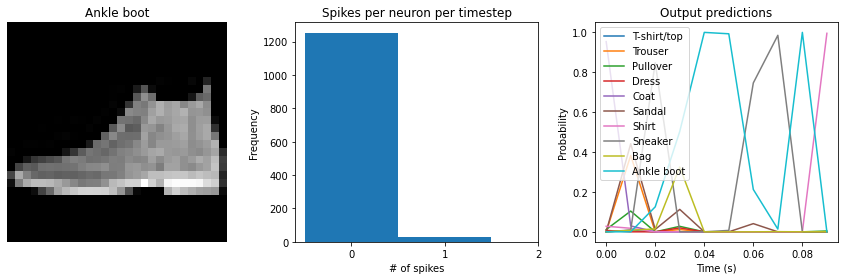

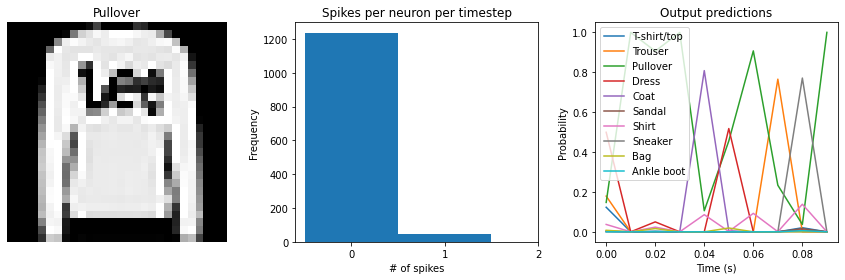

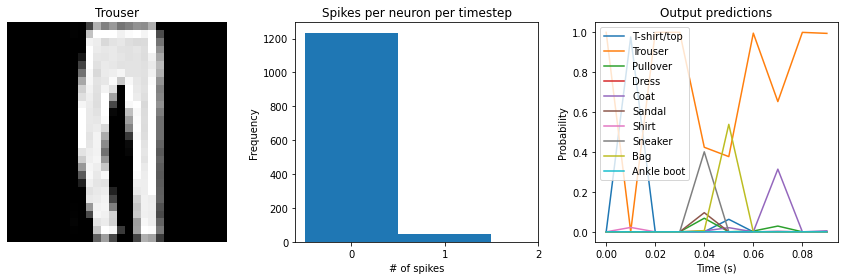

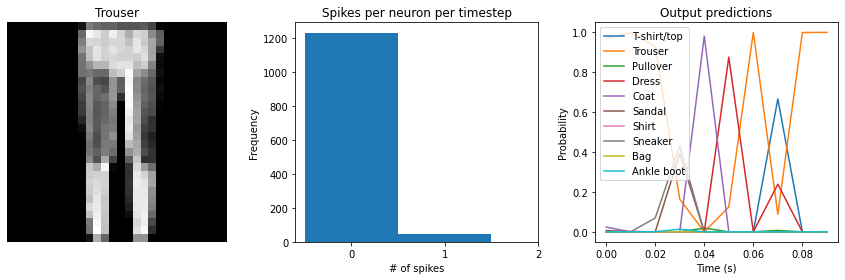

In [12]:
check_output(spikeaware_model)

We can see that with `spiking_aware_training` we're getting better performance than we
were with the equivalent `dt` value above. The model has learned weights that are less
sensitive to the discrete, sparse output produced by the spiking neurons.

## Spike rate regularization

As we saw in the [Simulation time section](#Simulation-time), the spiking rate of the
neurons is very important. If a neuron is spiking too slowly then we don't have enough
information to determine its output value. Conversely, if a neuron is spiking too
quickly then we may lose the spiking advantages we are looking for, such as temporal
sparsity.

Thus it can be helpful to more directly control the firing rates in the model by
applying regularization penalties during training. Any of the standard Keras
regularization functions can be used. KerasSpiking also includes some additional
regularizers that can be useful for this case as they allow us to specify a non-zero
reference point (so we can drive the activities towards some value greater than zero),
or a range of acceptable values.

In [13]:
regularized_model = tf.keras.Sequential(
    [
        tf.keras.layers.Reshape((-1, 28 * 28), input_shape=(None, 28, 28)),
        tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(128)),
        keras_spiking.SpikingActivation(
            "relu",
            dt=0.01,
            spiking_aware_training=True,
            # add activity regularizer to encourage spike rates between 10 and 20 Hz
            activity_regularizer=keras_spiking.regularizers.L2(
                l2=1e-4, target=(10, 20)
            ),
        ),
        tf.keras.layers.GlobalAveragePooling1D(),
        tf.keras.layers.Dense(10),
    ]
)

train(regularized_model, train_sequences, test_sequences)

Epoch 1/10


   1/1875 [..............................] - ETA: 22:38 - loss: 17.9070 - accuracy: 0.0625

  12/1875 [..............................] - ETA: 8s - loss: 21.1835 - accuracy: 0.1458   

  23/1875 [..............................] - ETA: 8s - loss: 24.2766 - accuracy: 0.2147

  34/1875 [..............................] - ETA: 8s - loss: 27.5000 - accuracy: 0.2335

  46/1875 [..............................] - ETA: 8s - loss: 31.0749 - accuracy: 0.2527

  57/1875 [..............................] - ETA: 8s - loss: 34.2759 - accuracy: 0.2675

  66/1875 [>.............................] - ETA: 8s - loss: 36.7081 - accuracy: 0.2888

  76/1875 [>.............................] - ETA: 8s - loss: 39.1834 - accuracy: 0.2993

  87/1875 [>.............................] - ETA: 8s - loss: 41.8510 - accuracy: 0.3165

  98/1875 [>.............................] - ETA: 8s - loss: 44.3212 - accuracy: 0.3288

 108/1875 [>.............................] - ETA: 8s - loss: 46.2444 - accuracy: 0.3414

 117/1875 [>.............................] - ETA: 8s - loss: 48.0269 - accuracy: 0.3515

 129/1875 [=>............................] - ETA: 8s - loss: 49.9616 - accuracy: 0.3692

 140/1875 [=>............................] - ETA: 8s - loss: 51.8932 - accuracy: 0.3799

 152/1875 [=>............................] - ETA: 8s - loss: 53.5595 - accuracy: 0.3886

 163/1875 [=>............................] - ETA: 8s - loss: 55.2043 - accuracy: 0.3967

 175/1875 [=>............................] - ETA: 8s - loss: 56.8856 - accuracy: 0.4046

 186/1875 [=>............................] - ETA: 8s - loss: 58.2954 - accuracy: 0.4101

 198/1875 [==>...........................] - ETA: 8s - loss: 59.7310 - accuracy: 0.4149

 210/1875 [==>...........................] - ETA: 8s - loss: 60.9867 - accuracy: 0.4225

 216/1875 [==>...........................] - ETA: 8s - loss: 61.4696 - accuracy: 0.4271

 227/1875 [==>...........................] - ETA: 8s - loss: 62.4029 - accuracy: 0.4357

 238/1875 [==>...........................] - ETA: 8s - loss: 63.3170 - accuracy: 0.4414

 249/1875 [==>...........................] - ETA: 7s - loss: 64.0995 - accuracy: 0.4470

 260/1875 [===>..........................] - ETA: 7s - loss: 65.0279 - accuracy: 0.4525

 271/1875 [===>..........................] - ETA: 7s - loss: 65.6850 - accuracy: 0.4571

 281/1875 [===>..........................] - ETA: 7s - loss: 66.2342 - accuracy: 0.4632

 290/1875 [===>..........................] - ETA: 7s - loss: 66.7299 - accuracy: 0.4675

 301/1875 [===>..........................] - ETA: 7s - loss: 67.3696 - accuracy: 0.4727

 313/1875 [====>.........................] - ETA: 7s - loss: 68.0893 - accuracy: 0.4762

 324/1875 [====>.........................] - ETA: 7s - loss: 68.6051 - accuracy: 0.4803

 336/1875 [====>.........................] - ETA: 7s - loss: 69.1679 - accuracy: 0.4828

 347/1875 [====>.........................] - ETA: 7s - loss: 69.6760 - accuracy: 0.4858

 359/1875 [====>.........................] - ETA: 7s - loss: 70.2046 - accuracy: 0.4900

 370/1875 [====>.........................] - ETA: 7s - loss: 70.5899 - accuracy: 0.4937

 382/1875 [=====>........................] - ETA: 7s - loss: 70.9991 - accuracy: 0.4966

 394/1875 [=====>........................] - ETA: 7s - loss: 71.3067 - accuracy: 0.5008

 405/1875 [=====>........................] - ETA: 7s - loss: 71.6427 - accuracy: 0.5035

 416/1875 [=====>........................] - ETA: 7s - loss: 72.0328 - accuracy: 0.5062

 428/1875 [=====>........................] - ETA: 6s - loss: 72.4051 - accuracy: 0.5097

 440/1875 [======>.......................] - ETA: 6s - loss: 72.6750 - accuracy: 0.5132

 451/1875 [======>.......................] - ETA: 6s - loss: 72.9848 - accuracy: 0.5152

 462/1875 [======>.......................] - ETA: 6s - loss: 73.2844 - accuracy: 0.5179

 473/1875 [======>.......................] - ETA: 6s - loss: 73.5552 - accuracy: 0.5196

 484/1875 [======>.......................] - ETA: 6s - loss: 73.7892 - accuracy: 0.5218

 495/1875 [======>.......................] - ETA: 6s - loss: 74.0136 - accuracy: 0.5249

 507/1875 [=======>......................] - ETA: 6s - loss: 74.2566 - accuracy: 0.5255

 519/1875 [=======>......................] - ETA: 6s - loss: 74.5270 - accuracy: 0.5277

 530/1875 [=======>......................] - ETA: 6s - loss: 74.7145 - accuracy: 0.5297

 542/1875 [=======>......................] - ETA: 6s - loss: 74.9552 - accuracy: 0.5317

 554/1875 [=======>......................] - ETA: 6s - loss: 75.1801 - accuracy: 0.5340

 565/1875 [========>.....................] - ETA: 6s - loss: 75.3078 - accuracy: 0.5361

 577/1875 [========>.....................] - ETA: 6s - loss: 75.5215 - accuracy: 0.5381

 588/1875 [========>.....................] - ETA: 6s - loss: 75.7112 - accuracy: 0.5390

 600/1875 [========>.....................] - ETA: 6s - loss: 75.8506 - accuracy: 0.5414

 612/1875 [========>.....................] - ETA: 5s - loss: 76.0900 - accuracy: 0.5429

 624/1875 [========>.....................] - ETA: 5s - loss: 76.3061 - accuracy: 0.5446

 635/1875 [=========>....................] - ETA: 5s - loss: 76.4278 - accuracy: 0.5471

 646/1875 [=========>....................] - ETA: 5s - loss: 76.5519 - accuracy: 0.5486

 658/1875 [=========>....................] - ETA: 5s - loss: 76.7742 - accuracy: 0.5500

 670/1875 [=========>....................] - ETA: 5s - loss: 76.9366 - accuracy: 0.5521

 681/1875 [=========>....................] - ETA: 5s - loss: 77.0705 - accuracy: 0.5531

 692/1875 [==========>...................] - ETA: 5s - loss: 77.2321 - accuracy: 0.5541

 703/1875 [==========>...................] - ETA: 5s - loss: 77.3662 - accuracy: 0.5557

 715/1875 [==========>...................] - ETA: 5s - loss: 77.4988 - accuracy: 0.5568

 726/1875 [==========>...................] - ETA: 5s - loss: 77.6069 - accuracy: 0.5582

 738/1875 [==========>...................] - ETA: 5s - loss: 77.6753 - accuracy: 0.5592

 747/1875 [==========>...................] - ETA: 5s - loss: 77.7960 - accuracy: 0.5605

 758/1875 [===========>..................] - ETA: 5s - loss: 77.8932 - accuracy: 0.5610

 769/1875 [===========>..................] - ETA: 5s - loss: 77.9727 - accuracy: 0.5619

 779/1875 [===========>..................] - ETA: 5s - loss: 78.0401 - accuracy: 0.5634

 789/1875 [===========>..................] - ETA: 5s - loss: 78.1571 - accuracy: 0.5638

 800/1875 [===========>..................] - ETA: 5s - loss: 78.2617 - accuracy: 0.5656

 811/1875 [===========>..................] - ETA: 5s - loss: 78.3963 - accuracy: 0.5671

 823/1875 [============>.................] - ETA: 4s - loss: 78.4836 - accuracy: 0.5678

 834/1875 [============>.................] - ETA: 4s - loss: 78.5995 - accuracy: 0.5689

 845/1875 [============>.................] - ETA: 4s - loss: 78.6781 - accuracy: 0.5701

 857/1875 [============>.................] - ETA: 4s - loss: 78.7979 - accuracy: 0.5712

 869/1875 [============>.................] - ETA: 4s - loss: 78.9067 - accuracy: 0.5724

 881/1875 [=============>................] - ETA: 4s - loss: 79.0069 - accuracy: 0.5740

 893/1875 [=============>................] - ETA: 4s - loss: 79.1168 - accuracy: 0.5753

 904/1875 [=============>................] - ETA: 4s - loss: 79.2182 - accuracy: 0.5758

 916/1875 [=============>................] - ETA: 4s - loss: 79.3105 - accuracy: 0.5763

 928/1875 [=============>................] - ETA: 4s - loss: 79.3668 - accuracy: 0.5776

 939/1875 [==============>...............] - ETA: 4s - loss: 79.4709 - accuracy: 0.5779

 950/1875 [==============>...............] - ETA: 4s - loss: 79.5551 - accuracy: 0.5790

 962/1875 [==============>...............] - ETA: 4s - loss: 79.6473 - accuracy: 0.5799

 973/1875 [==============>...............] - ETA: 4s - loss: 79.7322 - accuracy: 0.5814

 985/1875 [==============>...............] - ETA: 4s - loss: 79.8276 - accuracy: 0.5825

 995/1875 [==============>...............] - ETA: 4s - loss: 79.9013 - accuracy: 0.5829

1007/1875 [===============>..............] - ETA: 4s - loss: 79.9613 - accuracy: 0.5838

1018/1875 [===============>..............] - ETA: 4s - loss: 80.0243 - accuracy: 0.5846

1030/1875 [===============>..............] - ETA: 3s - loss: 80.1249 - accuracy: 0.5860

1042/1875 [===============>..............] - ETA: 3s - loss: 80.1767 - accuracy: 0.5872

1054/1875 [===============>..............] - ETA: 3s - loss: 80.2273 - accuracy: 0.5878

1065/1875 [================>.............] - ETA: 3s - loss: 80.2984 - accuracy: 0.5890

1076/1875 [================>.............] - ETA: 3s - loss: 80.3627 - accuracy: 0.5895

1088/1875 [================>.............] - ETA: 3s - loss: 80.4394 - accuracy: 0.5897

1100/1875 [================>.............] - ETA: 3s - loss: 80.5165 - accuracy: 0.5907

1111/1875 [================>.............] - ETA: 3s - loss: 80.5843 - accuracy: 0.5917

1123/1875 [================>.............] - ETA: 3s - loss: 80.6480 - accuracy: 0.5923

1135/1875 [=================>............] - ETA: 3s - loss: 80.7028 - accuracy: 0.5931

1145/1875 [=================>............] - ETA: 3s - loss: 80.7706 - accuracy: 0.5938

1156/1875 [=================>............] - ETA: 3s - loss: 80.8200 - accuracy: 0.5943

1167/1875 [=================>............] - ETA: 3s - loss: 80.8764 - accuracy: 0.5951

1178/1875 [=================>............] - ETA: 3s - loss: 80.9421 - accuracy: 0.5954

1189/1875 [==================>...........] - ETA: 3s - loss: 81.0022 - accuracy: 0.5962

1200/1875 [==================>...........] - ETA: 3s - loss: 81.0649 - accuracy: 0.5968

1210/1875 [==================>...........] - ETA: 3s - loss: 81.0897 - accuracy: 0.5972

1221/1875 [==================>...........] - ETA: 3s - loss: 81.1439 - accuracy: 0.5981

1232/1875 [==================>...........] - ETA: 3s - loss: 81.2071 - accuracy: 0.5992

1243/1875 [==================>...........] - ETA: 2s - loss: 81.2611 - accuracy: 0.5995

1253/1875 [===================>..........] - ETA: 2s - loss: 81.2979 - accuracy: 0.5999

1264/1875 [===================>..........] - ETA: 2s - loss: 81.3401 - accuracy: 0.6004

1275/1875 [===================>..........] - ETA: 2s - loss: 81.4075 - accuracy: 0.6013

1286/1875 [===================>..........] - ETA: 2s - loss: 81.4646 - accuracy: 0.6018

1297/1875 [===================>..........] - ETA: 2s - loss: 81.5150 - accuracy: 0.6024

1308/1875 [===================>..........] - ETA: 2s - loss: 81.5629 - accuracy: 0.6035

1319/1875 [====================>.........] - ETA: 2s - loss: 81.6155 - accuracy: 0.6040

1330/1875 [====================>.........] - ETA: 2s - loss: 81.6517 - accuracy: 0.6048

1342/1875 [====================>.........] - ETA: 2s - loss: 81.7436 - accuracy: 0.6053

1353/1875 [====================>.........] - ETA: 2s - loss: 81.7950 - accuracy: 0.6059

1364/1875 [====================>.........] - ETA: 2s - loss: 81.8455 - accuracy: 0.6064

1376/1875 [=====================>........] - ETA: 2s - loss: 81.9100 - accuracy: 0.6069

1387/1875 [=====================>........] - ETA: 2s - loss: 81.9570 - accuracy: 0.6071

1398/1875 [=====================>........] - ETA: 2s - loss: 82.0117 - accuracy: 0.6075

1409/1875 [=====================>........] - ETA: 2s - loss: 82.0686 - accuracy: 0.6080

1421/1875 [=====================>........] - ETA: 2s - loss: 82.1160 - accuracy: 0.6084

1432/1875 [=====================>........] - ETA: 2s - loss: 82.1497 - accuracy: 0.6084

1444/1875 [======================>.......] - ETA: 2s - loss: 82.2096 - accuracy: 0.6094

1456/1875 [======================>.......] - ETA: 1s - loss: 82.2493 - accuracy: 0.6096

1468/1875 [======================>.......] - ETA: 1s - loss: 82.2878 - accuracy: 0.6097

1480/1875 [======================>.......] - ETA: 1s - loss: 82.3301 - accuracy: 0.6101

1492/1875 [======================>.......] - ETA: 1s - loss: 82.3811 - accuracy: 0.6108

1503/1875 [=======================>......] - ETA: 1s - loss: 82.4399 - accuracy: 0.6115

1515/1875 [=======================>......] - ETA: 1s - loss: 82.4847 - accuracy: 0.6124

1527/1875 [=======================>......] - ETA: 1s - loss: 82.5310 - accuracy: 0.6128

1538/1875 [=======================>......] - ETA: 1s - loss: 82.5852 - accuracy: 0.6136

1550/1875 [=======================>......] - ETA: 1s - loss: 82.6268 - accuracy: 0.6141

1562/1875 [=======================>......] - ETA: 1s - loss: 82.6778 - accuracy: 0.6144

1574/1875 [========================>.....] - ETA: 1s - loss: 82.7221 - accuracy: 0.6146

1586/1875 [========================>.....] - ETA: 1s - loss: 82.7541 - accuracy: 0.6151

1597/1875 [========================>.....] - ETA: 1s - loss: 82.7780 - accuracy: 0.6155

1608/1875 [========================>.....] - ETA: 1s - loss: 82.8093 - accuracy: 0.6159

1619/1875 [========================>.....] - ETA: 1s - loss: 82.8342 - accuracy: 0.6162

1631/1875 [=========================>....] - ETA: 1s - loss: 82.8715 - accuracy: 0.6165

1643/1875 [=========================>....] - ETA: 1s - loss: 82.9097 - accuracy: 0.6168

1651/1875 [=========================>....] - ETA: 1s - loss: 82.9378 - accuracy: 0.6173

1663/1875 [=========================>....] - ETA: 0s - loss: 82.9955 - accuracy: 0.6180

1674/1875 [=========================>....] - ETA: 0s - loss: 83.0402 - accuracy: 0.6181

1685/1875 [=========================>....] - ETA: 0s - loss: 83.0870 - accuracy: 0.6184

1697/1875 [==========================>...] - ETA: 0s - loss: 83.1249 - accuracy: 0.6188

1708/1875 [==========================>...] - ETA: 0s - loss: 83.1593 - accuracy: 0.6196

1719/1875 [==========================>...] - ETA: 0s - loss: 83.1906 - accuracy: 0.6199

1731/1875 [==========================>...] - ETA: 0s - loss: 83.2214 - accuracy: 0.6203

1741/1875 [==========================>...] - ETA: 0s - loss: 83.2650 - accuracy: 0.6208

1751/1875 [===========================>..] - ETA: 0s - loss: 83.2924 - accuracy: 0.6211

1763/1875 [===========================>..] - ETA: 0s - loss: 83.3195 - accuracy: 0.6215

1775/1875 [===========================>..] - ETA: 0s - loss: 83.3579 - accuracy: 0.6220

1786/1875 [===========================>..] - ETA: 0s - loss: 83.3960 - accuracy: 0.6223

1798/1875 [===========================>..] - ETA: 0s - loss: 83.4256 - accuracy: 0.6227

1809/1875 [===========================>..] - ETA: 0s - loss: 83.4600 - accuracy: 0.6231

1821/1875 [============================>.] - ETA: 0s - loss: 83.5007 - accuracy: 0.6235

1832/1875 [============================>.] - ETA: 0s - loss: 83.5222 - accuracy: 0.6238

1843/1875 [============================>.] - ETA: 0s - loss: 83.5551 - accuracy: 0.6245

1854/1875 [============================>.] - ETA: 0s - loss: 83.5737 - accuracy: 0.6248

1866/1875 [============================>.] - ETA: 0s - loss: 83.6007 - accuracy: 0.6251

1875/1875 [==============================] - 9s 5ms/step - loss: 83.6276 - accuracy: 0.6255


Epoch 2/10
   1/1875 [..............................] - ETA: 8s - loss: 85.0651 - accuracy: 0.6875

  13/1875 [..............................] - ETA: 8s - loss: 90.4256 - accuracy: 0.6490

  25/1875 [..............................] - ETA: 8s - loss: 88.7118 - accuracy: 0.6600

  36/1875 [..............................] - ETA: 8s - loss: 88.5216 - accuracy: 0.6528

  47/1875 [..............................] - ETA: 8s - loss: 88.5461 - accuracy: 0.6589

  59/1875 [..............................] - ETA: 8s - loss: 88.6778 - accuracy: 0.6706

  70/1875 [>.............................] - ETA: 8s - loss: 88.8261 - accuracy: 0.6763

  82/1875 [>.............................] - ETA: 8s - loss: 88.5688 - accuracy: 0.6795

  94/1875 [>.............................] - ETA: 8s - loss: 88.5799 - accuracy: 0.6845

 105/1875 [>.............................] - ETA: 8s - loss: 88.7109 - accuracy: 0.6857

 117/1875 [>.............................] - ETA: 7s - loss: 88.7807 - accuracy: 0.6827

 128/1875 [=>............................] - ETA: 7s - loss: 88.6958 - accuracy: 0.6790

 140/1875 [=>............................] - ETA: 7s - loss: 88.7016 - accuracy: 0.6772

 152/1875 [=>............................] - ETA: 7s - loss: 88.7598 - accuracy: 0.6791

 164/1875 [=>............................] - ETA: 7s - loss: 88.7747 - accuracy: 0.6785

 175/1875 [=>............................] - ETA: 7s - loss: 88.5637 - accuracy: 0.6795

 187/1875 [=>............................] - ETA: 7s - loss: 88.5832 - accuracy: 0.6785

 198/1875 [==>...........................] - ETA: 7s - loss: 88.8041 - accuracy: 0.6776

 206/1875 [==>...........................] - ETA: 7s - loss: 88.8437 - accuracy: 0.6760

 217/1875 [==>...........................] - ETA: 7s - loss: 88.8136 - accuracy: 0.6758

 228/1875 [==>...........................] - ETA: 7s - loss: 88.7615 - accuracy: 0.6774

 239/1875 [==>...........................] - ETA: 7s - loss: 88.7365 - accuracy: 0.6759

 250/1875 [===>..........................] - ETA: 7s - loss: 88.7519 - accuracy: 0.6766

 261/1875 [===>..........................] - ETA: 7s - loss: 88.7704 - accuracy: 0.6779

 272/1875 [===>..........................] - ETA: 7s - loss: 88.7069 - accuracy: 0.6776

 282/1875 [===>..........................] - ETA: 7s - loss: 88.7411 - accuracy: 0.6773

 293/1875 [===>..........................] - ETA: 7s - loss: 88.7357 - accuracy: 0.6760

 305/1875 [===>..........................] - ETA: 7s - loss: 88.7500 - accuracy: 0.6728

 317/1875 [====>.........................] - ETA: 7s - loss: 88.7720 - accuracy: 0.6741

 328/1875 [====>.........................] - ETA: 7s - loss: 88.7578 - accuracy: 0.6748

 340/1875 [====>.........................] - ETA: 7s - loss: 88.7447 - accuracy: 0.6755

 352/1875 [====>.........................] - ETA: 7s - loss: 88.6906 - accuracy: 0.6778

 364/1875 [====>.........................] - ETA: 6s - loss: 88.6915 - accuracy: 0.6781

 375/1875 [=====>........................] - ETA: 6s - loss: 88.6966 - accuracy: 0.6801

 387/1875 [=====>........................] - ETA: 6s - loss: 88.7149 - accuracy: 0.6799

 399/1875 [=====>........................] - ETA: 6s - loss: 88.7050 - accuracy: 0.6801

 411/1875 [=====>........................] - ETA: 6s - loss: 88.7237 - accuracy: 0.6800

 423/1875 [=====>........................] - ETA: 6s - loss: 88.7300 - accuracy: 0.6788

 434/1875 [=====>........................] - ETA: 6s - loss: 88.7040 - accuracy: 0.6791

 445/1875 [======>.......................] - ETA: 6s - loss: 88.7208 - accuracy: 0.6801

 456/1875 [======>.......................] - ETA: 6s - loss: 88.7134 - accuracy: 0.6809

 467/1875 [======>.......................] - ETA: 6s - loss: 88.7325 - accuracy: 0.6816

 478/1875 [======>.......................] - ETA: 6s - loss: 88.7669 - accuracy: 0.6821

 489/1875 [======>.......................] - ETA: 6s - loss: 88.7515 - accuracy: 0.6818

 500/1875 [=======>......................] - ETA: 6s - loss: 88.7402 - accuracy: 0.6814

 512/1875 [=======>......................] - ETA: 6s - loss: 88.7672 - accuracy: 0.6810

 524/1875 [=======>......................] - ETA: 6s - loss: 88.7781 - accuracy: 0.6820

 536/1875 [=======>......................] - ETA: 6s - loss: 88.7344 - accuracy: 0.6818

 548/1875 [=======>......................] - ETA: 6s - loss: 88.7643 - accuracy: 0.6815

 559/1875 [=======>......................] - ETA: 6s - loss: 88.7397 - accuracy: 0.6822

 570/1875 [========>.....................] - ETA: 6s - loss: 88.8041 - accuracy: 0.6827

 582/1875 [========>.....................] - ETA: 5s - loss: 88.8463 - accuracy: 0.6834

 594/1875 [========>.....................] - ETA: 5s - loss: 88.8355 - accuracy: 0.6838

 606/1875 [========>.....................] - ETA: 5s - loss: 88.8167 - accuracy: 0.6837

 618/1875 [========>.....................] - ETA: 5s - loss: 88.7811 - accuracy: 0.6843

 630/1875 [=========>....................] - ETA: 5s - loss: 88.7628 - accuracy: 0.6846

 642/1875 [=========>....................] - ETA: 5s - loss: 88.7854 - accuracy: 0.6856

 654/1875 [=========>....................] - ETA: 5s - loss: 88.7663 - accuracy: 0.6856

 665/1875 [=========>....................] - ETA: 5s - loss: 88.7606 - accuracy: 0.6854

 677/1875 [=========>....................] - ETA: 5s - loss: 88.7797 - accuracy: 0.6862

 689/1875 [==========>...................] - ETA: 5s - loss: 88.7887 - accuracy: 0.6865

 700/1875 [==========>...................] - ETA: 5s - loss: 88.8167 - accuracy: 0.6874

 712/1875 [==========>...................] - ETA: 5s - loss: 88.7988 - accuracy: 0.6871

 724/1875 [==========>...................] - ETA: 5s - loss: 88.8174 - accuracy: 0.6874

 736/1875 [==========>...................] - ETA: 5s - loss: 88.8049 - accuracy: 0.6872

 747/1875 [==========>...................] - ETA: 5s - loss: 88.8366 - accuracy: 0.6875

 759/1875 [===========>..................] - ETA: 5s - loss: 88.8283 - accuracy: 0.6877

 771/1875 [===========>..................] - ETA: 5s - loss: 88.8213 - accuracy: 0.6879

 782/1875 [===========>..................] - ETA: 5s - loss: 88.8271 - accuracy: 0.6885

 794/1875 [===========>..................] - ETA: 4s - loss: 88.8242 - accuracy: 0.6881

 806/1875 [===========>..................] - ETA: 4s - loss: 88.8487 - accuracy: 0.6876

 818/1875 [============>.................] - ETA: 4s - loss: 88.8549 - accuracy: 0.6873

 830/1875 [============>.................] - ETA: 4s - loss: 88.8529 - accuracy: 0.6873

 842/1875 [============>.................] - ETA: 4s - loss: 88.8477 - accuracy: 0.6872

 853/1875 [============>.................] - ETA: 4s - loss: 88.8986 - accuracy: 0.6865

 865/1875 [============>.................] - ETA: 4s - loss: 88.9144 - accuracy: 0.6870

 877/1875 [=============>................] - ETA: 4s - loss: 88.9353 - accuracy: 0.6874

 888/1875 [=============>................] - ETA: 4s - loss: 88.9278 - accuracy: 0.6877

 900/1875 [=============>................] - ETA: 4s - loss: 88.9310 - accuracy: 0.6878

 912/1875 [=============>................] - ETA: 4s - loss: 88.9516 - accuracy: 0.6879

 923/1875 [=============>................] - ETA: 4s - loss: 88.9608 - accuracy: 0.6880

 935/1875 [=============>................] - ETA: 4s - loss: 88.9619 - accuracy: 0.6882

 946/1875 [==============>...............] - ETA: 4s - loss: 89.0013 - accuracy: 0.6878

 958/1875 [==============>...............] - ETA: 4s - loss: 89.0203 - accuracy: 0.6885

 970/1875 [==============>...............] - ETA: 4s - loss: 89.0319 - accuracy: 0.6882

 982/1875 [==============>...............] - ETA: 4s - loss: 89.0175 - accuracy: 0.6880

 993/1875 [==============>...............] - ETA: 4s - loss: 89.0247 - accuracy: 0.6883

1005/1875 [===============>..............] - ETA: 3s - loss: 89.0208 - accuracy: 0.6886

1016/1875 [===============>..............] - ETA: 3s - loss: 89.0496 - accuracy: 0.6891

1028/1875 [===============>..............] - ETA: 3s - loss: 89.0596 - accuracy: 0.6893

1040/1875 [===============>..............] - ETA: 3s - loss: 89.0651 - accuracy: 0.6894

1051/1875 [===============>..............] - ETA: 3s - loss: 89.1004 - accuracy: 0.6897

1063/1875 [================>.............] - ETA: 3s - loss: 89.1090 - accuracy: 0.6899

1075/1875 [================>.............] - ETA: 3s - loss: 89.1226 - accuracy: 0.6901

1087/1875 [================>.............] - ETA: 3s - loss: 89.1236 - accuracy: 0.6898

1098/1875 [================>.............] - ETA: 3s - loss: 89.1030 - accuracy: 0.6899

1110/1875 [================>.............] - ETA: 3s - loss: 89.1197 - accuracy: 0.6903

1122/1875 [================>.............] - ETA: 3s - loss: 89.1155 - accuracy: 0.6903

1133/1875 [=================>............] - ETA: 3s - loss: 89.1227 - accuracy: 0.6905

1145/1875 [=================>............] - ETA: 3s - loss: 89.1464 - accuracy: 0.6905

1156/1875 [=================>............] - ETA: 3s - loss: 89.1619 - accuracy: 0.6904

1167/1875 [=================>............] - ETA: 3s - loss: 89.1579 - accuracy: 0.6902

1177/1875 [=================>............] - ETA: 3s - loss: 89.1678 - accuracy: 0.6901

1185/1875 [=================>............] - ETA: 3s - loss: 89.1733 - accuracy: 0.6898

1196/1875 [==================>...........] - ETA: 3s - loss: 89.1618 - accuracy: 0.6900

1207/1875 [==================>...........] - ETA: 3s - loss: 89.1843 - accuracy: 0.6901

1219/1875 [==================>...........] - ETA: 3s - loss: 89.1925 - accuracy: 0.6903

1230/1875 [==================>...........] - ETA: 2s - loss: 89.1993 - accuracy: 0.6910

1242/1875 [==================>...........] - ETA: 2s - loss: 89.2075 - accuracy: 0.6911

1254/1875 [===================>..........] - ETA: 2s - loss: 89.2076 - accuracy: 0.6911

1266/1875 [===================>..........] - ETA: 2s - loss: 89.2219 - accuracy: 0.6912

1278/1875 [===================>..........] - ETA: 2s - loss: 89.2299 - accuracy: 0.6912

1289/1875 [===================>..........] - ETA: 2s - loss: 89.2386 - accuracy: 0.6913

1301/1875 [===================>..........] - ETA: 2s - loss: 89.2567 - accuracy: 0.6915

1313/1875 [====================>.........] - ETA: 2s - loss: 89.2723 - accuracy: 0.6917

1324/1875 [====================>.........] - ETA: 2s - loss: 89.2627 - accuracy: 0.6916

1336/1875 [====================>.........] - ETA: 2s - loss: 89.2779 - accuracy: 0.6916

1348/1875 [====================>.........] - ETA: 2s - loss: 89.2748 - accuracy: 0.6919

1359/1875 [====================>.........] - ETA: 2s - loss: 89.2820 - accuracy: 0.6920

1370/1875 [====================>.........] - ETA: 2s - loss: 89.2917 - accuracy: 0.6920

1382/1875 [=====================>........] - ETA: 2s - loss: 89.3014 - accuracy: 0.6924

1394/1875 [=====================>........] - ETA: 2s - loss: 89.3068 - accuracy: 0.6924

1405/1875 [=====================>........] - ETA: 2s - loss: 89.3152 - accuracy: 0.6925

1416/1875 [=====================>........] - ETA: 2s - loss: 89.3167 - accuracy: 0.6928

1428/1875 [=====================>........] - ETA: 2s - loss: 89.3349 - accuracy: 0.6930

1439/1875 [======================>.......] - ETA: 1s - loss: 89.3387 - accuracy: 0.6931

1450/1875 [======================>.......] - ETA: 1s - loss: 89.3285 - accuracy: 0.6931

1462/1875 [======================>.......] - ETA: 1s - loss: 89.3382 - accuracy: 0.6931

1474/1875 [======================>.......] - ETA: 1s - loss: 89.3565 - accuracy: 0.6931

1485/1875 [======================>.......] - ETA: 1s - loss: 89.3698 - accuracy: 0.6935

1495/1875 [======================>.......] - ETA: 1s - loss: 89.3744 - accuracy: 0.6934

1506/1875 [=======================>......] - ETA: 1s - loss: 89.3904 - accuracy: 0.6935

1518/1875 [=======================>......] - ETA: 1s - loss: 89.3903 - accuracy: 0.6937

1530/1875 [=======================>......] - ETA: 1s - loss: 89.4003 - accuracy: 0.6938

1541/1875 [=======================>......] - ETA: 1s - loss: 89.4037 - accuracy: 0.6936

1552/1875 [=======================>......] - ETA: 1s - loss: 89.4037 - accuracy: 0.6936

1562/1875 [=======================>......] - ETA: 1s - loss: 89.4117 - accuracy: 0.6937

1572/1875 [========================>.....] - ETA: 1s - loss: 89.4205 - accuracy: 0.6938

1581/1875 [========================>.....] - ETA: 1s - loss: 89.4178 - accuracy: 0.6941

1592/1875 [========================>.....] - ETA: 1s - loss: 89.4217 - accuracy: 0.6943

1603/1875 [========================>.....] - ETA: 1s - loss: 89.4268 - accuracy: 0.6944

1614/1875 [========================>.....] - ETA: 1s - loss: 89.4362 - accuracy: 0.6946

1625/1875 [=========================>....] - ETA: 1s - loss: 89.4371 - accuracy: 0.6947

1636/1875 [=========================>....] - ETA: 1s - loss: 89.4494 - accuracy: 0.6949

1648/1875 [=========================>....] - ETA: 1s - loss: 89.4542 - accuracy: 0.6951

1659/1875 [=========================>....] - ETA: 0s - loss: 89.4541 - accuracy: 0.6955

1670/1875 [=========================>....] - ETA: 0s - loss: 89.4631 - accuracy: 0.6957

1681/1875 [=========================>....] - ETA: 0s - loss: 89.4782 - accuracy: 0.6958

1693/1875 [==========================>...] - ETA: 0s - loss: 89.4749 - accuracy: 0.6960

1704/1875 [==========================>...] - ETA: 0s - loss: 89.4823 - accuracy: 0.6960

1716/1875 [==========================>...] - ETA: 0s - loss: 89.4920 - accuracy: 0.6959

1727/1875 [==========================>...] - ETA: 0s - loss: 89.4957 - accuracy: 0.6958

1739/1875 [==========================>...] - ETA: 0s - loss: 89.5041 - accuracy: 0.6956

1750/1875 [===========================>..] - ETA: 0s - loss: 89.5067 - accuracy: 0.6955

1762/1875 [===========================>..] - ETA: 0s - loss: 89.5099 - accuracy: 0.6956

1774/1875 [===========================>..] - ETA: 0s - loss: 89.5117 - accuracy: 0.6957

1786/1875 [===========================>..] - ETA: 0s - loss: 89.5142 - accuracy: 0.6957

1797/1875 [===========================>..] - ETA: 0s - loss: 89.5243 - accuracy: 0.6956

1809/1875 [===========================>..] - ETA: 0s - loss: 89.5300 - accuracy: 0.6952

1820/1875 [============================>.] - ETA: 0s - loss: 89.5339 - accuracy: 0.6953

1832/1875 [============================>.] - ETA: 0s - loss: 89.5450 - accuracy: 0.6954

1844/1875 [============================>.] - ETA: 0s - loss: 89.5543 - accuracy: 0.6951

1856/1875 [============================>.] - ETA: 0s - loss: 89.5543 - accuracy: 0.6951

1868/1875 [============================>.] - ETA: 0s - loss: 89.5468 - accuracy: 0.6952

1875/1875 [==============================] - 9s 5ms/step - loss: 89.5422 - accuracy: 0.6953


Epoch 3/10
   1/1875 [..............................] - ETA: 9s - loss: 91.9158 - accuracy: 0.8125

  13/1875 [..............................] - ETA: 8s - loss: 90.4867 - accuracy: 0.7404

  25/1875 [..............................] - ETA: 8s - loss: 90.3521 - accuracy: 0.7350



  37/1875 [..............................] - ETA: 8s - loss: 89.8953 - accuracy: 0.7171

  48/1875 [..............................] - ETA: 8s - loss: 89.7446 - accuracy: 0.7070

  60/1875 [..............................] - ETA: 8s - loss: 90.1263 - accuracy: 0.6943

  71/1875 [>.............................] - ETA: 8s - loss: 90.1456 - accuracy: 0.6945

  83/1875 [>.............................] - ETA: 8s - loss: 90.0663 - accuracy: 0.6977

  94/1875 [>.............................] - ETA: 8s - loss: 89.9873 - accuracy: 0.6991

 105/1875 [>.............................] - ETA: 8s - loss: 90.1218 - accuracy: 0.7003

 116/1875 [>.............................] - ETA: 8s - loss: 90.1489 - accuracy: 0.7018

 128/1875 [=>............................] - ETA: 7s - loss: 90.1329 - accuracy: 0.7019

 140/1875 [=>............................] - ETA: 7s - loss: 90.2232 - accuracy: 0.7033

 151/1875 [=>............................] - ETA: 7s - loss: 90.2306 - accuracy: 0.7051

 162/1875 [=>............................] - ETA: 7s - loss: 90.1280 - accuracy: 0.7066

 174/1875 [=>............................] - ETA: 7s - loss: 90.0813 - accuracy: 0.7060

 185/1875 [=>............................] - ETA: 7s - loss: 90.1097 - accuracy: 0.7044

 196/1875 [==>...........................] - ETA: 7s - loss: 90.2098 - accuracy: 0.7052

 208/1875 [==>...........................] - ETA: 7s - loss: 90.2143 - accuracy: 0.7052

 220/1875 [==>...........................] - ETA: 7s - loss: 90.3108 - accuracy: 0.7060

 231/1875 [==>...........................] - ETA: 7s - loss: 90.2488 - accuracy: 0.7059

 242/1875 [==>...........................] - ETA: 7s - loss: 90.1396 - accuracy: 0.7062

 253/1875 [===>..........................] - ETA: 7s - loss: 90.1935 - accuracy: 0.7064

 264/1875 [===>..........................] - ETA: 7s - loss: 90.1729 - accuracy: 0.7061

 276/1875 [===>..........................] - ETA: 7s - loss: 90.2148 - accuracy: 0.7047

 287/1875 [===>..........................] - ETA: 7s - loss: 90.2484 - accuracy: 0.7055

 299/1875 [===>..........................] - ETA: 7s - loss: 90.2875 - accuracy: 0.7048

 311/1875 [===>..........................] - ETA: 7s - loss: 90.3141 - accuracy: 0.7041

 323/1875 [====>.........................] - ETA: 7s - loss: 90.3878 - accuracy: 0.7034

 334/1875 [====>.........................] - ETA: 7s - loss: 90.3467 - accuracy: 0.7037

 346/1875 [====>.........................] - ETA: 6s - loss: 90.2742 - accuracy: 0.7031

 358/1875 [====>.........................] - ETA: 6s - loss: 90.2940 - accuracy: 0.7037

 370/1875 [====>.........................] - ETA: 6s - loss: 90.3168 - accuracy: 0.7041

 382/1875 [=====>........................] - ETA: 6s - loss: 90.2950 - accuracy: 0.7048

 394/1875 [=====>........................] - ETA: 6s - loss: 90.3494 - accuracy: 0.7038

 405/1875 [=====>........................] - ETA: 6s - loss: 90.3716 - accuracy: 0.7031

 416/1875 [=====>........................] - ETA: 6s - loss: 90.3772 - accuracy: 0.7027

 428/1875 [=====>........................] - ETA: 6s - loss: 90.4002 - accuracy: 0.7026

 439/1875 [======>.......................] - ETA: 6s - loss: 90.3773 - accuracy: 0.7029

 450/1875 [======>.......................] - ETA: 6s - loss: 90.3357 - accuracy: 0.7041

 461/1875 [======>.......................] - ETA: 6s - loss: 90.3540 - accuracy: 0.7049

 473/1875 [======>.......................] - ETA: 6s - loss: 90.3321 - accuracy: 0.7051

 485/1875 [======>.......................] - ETA: 6s - loss: 90.3737 - accuracy: 0.7047

 497/1875 [======>.......................] - ETA: 6s - loss: 90.3629 - accuracy: 0.7058

 508/1875 [=======>......................] - ETA: 6s - loss: 90.3718 - accuracy: 0.7051

 520/1875 [=======>......................] - ETA: 6s - loss: 90.3634 - accuracy: 0.7046

 531/1875 [=======>......................] - ETA: 6s - loss: 90.3570 - accuracy: 0.7052

 543/1875 [=======>......................] - ETA: 6s - loss: 90.3261 - accuracy: 0.7060

 555/1875 [=======>......................] - ETA: 6s - loss: 90.3353 - accuracy: 0.7051

 566/1875 [========>.....................] - ETA: 5s - loss: 90.3318 - accuracy: 0.7043

 577/1875 [========>.....................] - ETA: 5s - loss: 90.3754 - accuracy: 0.7039

 588/1875 [========>.....................] - ETA: 5s - loss: 90.3686 - accuracy: 0.7035

 600/1875 [========>.....................] - ETA: 5s - loss: 90.3934 - accuracy: 0.7044

 612/1875 [========>.....................] - ETA: 5s - loss: 90.3678 - accuracy: 0.7045

 623/1875 [========>.....................] - ETA: 5s - loss: 90.3884 - accuracy: 0.7042

 634/1875 [=========>....................] - ETA: 5s - loss: 90.3538 - accuracy: 0.7040

 646/1875 [=========>....................] - ETA: 5s - loss: 90.3687 - accuracy: 0.7042

 657/1875 [=========>....................] - ETA: 5s - loss: 90.3525 - accuracy: 0.7041

 669/1875 [=========>....................] - ETA: 5s - loss: 90.3846 - accuracy: 0.7039

 680/1875 [=========>....................] - ETA: 5s - loss: 90.3595 - accuracy: 0.7038

 692/1875 [==========>...................] - ETA: 5s - loss: 90.3455 - accuracy: 0.7034

 704/1875 [==========>...................] - ETA: 5s - loss: 90.3459 - accuracy: 0.7041

 716/1875 [==========>...................] - ETA: 5s - loss: 90.3752 - accuracy: 0.7046

 727/1875 [==========>...................] - ETA: 5s - loss: 90.3637 - accuracy: 0.7049

 736/1875 [==========>...................] - ETA: 5s - loss: 90.3487 - accuracy: 0.7049

 747/1875 [==========>...................] - ETA: 5s - loss: 90.3650 - accuracy: 0.7055

 758/1875 [===========>..................] - ETA: 5s - loss: 90.3477 - accuracy: 0.7058

 769/1875 [===========>..................] - ETA: 5s - loss: 90.3540 - accuracy: 0.7056

 780/1875 [===========>..................] - ETA: 5s - loss: 90.3490 - accuracy: 0.7057

 791/1875 [===========>..................] - ETA: 4s - loss: 90.3701 - accuracy: 0.7057

 802/1875 [===========>..................] - ETA: 4s - loss: 90.3638 - accuracy: 0.7059

 814/1875 [============>.................] - ETA: 4s - loss: 90.3363 - accuracy: 0.7060

 822/1875 [============>.................] - ETA: 4s - loss: 90.3446 - accuracy: 0.7062

 834/1875 [============>.................] - ETA: 4s - loss: 90.3470 - accuracy: 0.7060

 845/1875 [============>.................] - ETA: 4s - loss: 90.3610 - accuracy: 0.7059

 856/1875 [============>.................] - ETA: 4s - loss: 90.3696 - accuracy: 0.7063

 868/1875 [============>.................] - ETA: 4s - loss: 90.3977 - accuracy: 0.7068

 880/1875 [=============>................] - ETA: 4s - loss: 90.3890 - accuracy: 0.7072

 892/1875 [=============>................] - ETA: 4s - loss: 90.4062 - accuracy: 0.7076

 903/1875 [=============>................] - ETA: 4s - loss: 90.4216 - accuracy: 0.7078

 915/1875 [=============>................] - ETA: 4s - loss: 90.4275 - accuracy: 0.7079

 927/1875 [=============>................] - ETA: 4s - loss: 90.4298 - accuracy: 0.7082

 939/1875 [==============>...............] - ETA: 4s - loss: 90.4298 - accuracy: 0.7082

 951/1875 [==============>...............] - ETA: 4s - loss: 90.4395 - accuracy: 0.7082

 963/1875 [==============>...............] - ETA: 4s - loss: 90.4469 - accuracy: 0.7085

 975/1875 [==============>...............] - ETA: 4s - loss: 90.4418 - accuracy: 0.7085

 987/1875 [==============>...............] - ETA: 4s - loss: 90.4286 - accuracy: 0.7087

 998/1875 [==============>...............] - ETA: 4s - loss: 90.4398 - accuracy: 0.7085

1009/1875 [===============>..............] - ETA: 3s - loss: 90.4566 - accuracy: 0.7087

1021/1875 [===============>..............] - ETA: 3s - loss: 90.4643 - accuracy: 0.7089

1033/1875 [===============>..............] - ETA: 3s - loss: 90.4610 - accuracy: 0.7089

1045/1875 [===============>..............] - ETA: 3s - loss: 90.4503 - accuracy: 0.7087

1056/1875 [===============>..............] - ETA: 3s - loss: 90.4481 - accuracy: 0.7088

1068/1875 [================>.............] - ETA: 3s - loss: 90.4600 - accuracy: 0.7089

1080/1875 [================>.............] - ETA: 3s - loss: 90.4750 - accuracy: 0.7095

1092/1875 [================>.............] - ETA: 3s - loss: 90.4732 - accuracy: 0.7097

1103/1875 [================>.............] - ETA: 3s - loss: 90.4772 - accuracy: 0.7096

1115/1875 [================>.............] - ETA: 3s - loss: 90.4849 - accuracy: 0.7098

1127/1875 [=================>............] - ETA: 3s - loss: 90.4686 - accuracy: 0.7099

1139/1875 [=================>............] - ETA: 3s - loss: 90.4807 - accuracy: 0.7100

1151/1875 [=================>............] - ETA: 3s - loss: 90.4781 - accuracy: 0.7103

1162/1875 [=================>............] - ETA: 3s - loss: 90.4829 - accuracy: 0.7102

1174/1875 [=================>............] - ETA: 3s - loss: 90.4804 - accuracy: 0.7103

1186/1875 [=================>............] - ETA: 3s - loss: 90.4872 - accuracy: 0.7102

1198/1875 [==================>...........] - ETA: 3s - loss: 90.4774 - accuracy: 0.7101

1209/1875 [==================>...........] - ETA: 3s - loss: 90.4949 - accuracy: 0.7105

1220/1875 [==================>...........] - ETA: 2s - loss: 90.4992 - accuracy: 0.7108

1231/1875 [==================>...........] - ETA: 2s - loss: 90.4980 - accuracy: 0.7109

1243/1875 [==================>...........] - ETA: 2s - loss: 90.5031 - accuracy: 0.7109

1254/1875 [===================>..........] - ETA: 2s - loss: 90.4960 - accuracy: 0.7109

1265/1875 [===================>..........] - ETA: 2s - loss: 90.4902 - accuracy: 0.7107

1276/1875 [===================>..........] - ETA: 2s - loss: 90.4920 - accuracy: 0.7107

1288/1875 [===================>..........] - ETA: 2s - loss: 90.4848 - accuracy: 0.7107

1300/1875 [===================>..........] - ETA: 2s - loss: 90.5035 - accuracy: 0.7112

1312/1875 [===================>..........] - ETA: 2s - loss: 90.5060 - accuracy: 0.7115

1323/1875 [====================>.........] - ETA: 2s - loss: 90.4929 - accuracy: 0.7118

1335/1875 [====================>.........] - ETA: 2s - loss: 90.5109 - accuracy: 0.7123

1346/1875 [====================>.........] - ETA: 2s - loss: 90.5254 - accuracy: 0.7120

1358/1875 [====================>.........] - ETA: 2s - loss: 90.5133 - accuracy: 0.7119

1370/1875 [====================>.........] - ETA: 2s - loss: 90.5320 - accuracy: 0.7120

1382/1875 [=====================>........] - ETA: 2s - loss: 90.5387 - accuracy: 0.7121

1393/1875 [=====================>........] - ETA: 2s - loss: 90.5427 - accuracy: 0.7120

1405/1875 [=====================>........] - ETA: 2s - loss: 90.5519 - accuracy: 0.7121

1417/1875 [=====================>........] - ETA: 2s - loss: 90.5407 - accuracy: 0.7122

1429/1875 [=====================>........] - ETA: 2s - loss: 90.5539 - accuracy: 0.7126

1440/1875 [======================>.......] - ETA: 1s - loss: 90.5485 - accuracy: 0.7125

1450/1875 [======================>.......] - ETA: 1s - loss: 90.5538 - accuracy: 0.7127

1462/1875 [======================>.......] - ETA: 1s - loss: 90.5554 - accuracy: 0.7125

1474/1875 [======================>.......] - ETA: 1s - loss: 90.5586 - accuracy: 0.7126

1486/1875 [======================>.......] - ETA: 1s - loss: 90.5586 - accuracy: 0.7127

1497/1875 [======================>.......] - ETA: 1s - loss: 90.5537 - accuracy: 0.7126

1508/1875 [=======================>......] - ETA: 1s - loss: 90.5648 - accuracy: 0.7129

1517/1875 [=======================>......] - ETA: 1s - loss: 90.5683 - accuracy: 0.7130

1523/1875 [=======================>......] - ETA: 1s - loss: 90.5701 - accuracy: 0.7132

1535/1875 [=======================>......] - ETA: 1s - loss: 90.5684 - accuracy: 0.7136

1546/1875 [=======================>......] - ETA: 1s - loss: 90.5804 - accuracy: 0.7134

1557/1875 [=======================>......] - ETA: 1s - loss: 90.5802 - accuracy: 0.7136

1569/1875 [========================>.....] - ETA: 1s - loss: 90.5779 - accuracy: 0.7136

1581/1875 [========================>.....] - ETA: 1s - loss: 90.5738 - accuracy: 0.7139

1591/1875 [========================>.....] - ETA: 1s - loss: 90.5950 - accuracy: 0.7137

1602/1875 [========================>.....] - ETA: 1s - loss: 90.6014 - accuracy: 0.7138

1613/1875 [========================>.....] - ETA: 1s - loss: 90.5967 - accuracy: 0.7139

1625/1875 [=========================>....] - ETA: 1s - loss: 90.6006 - accuracy: 0.7142

1637/1875 [=========================>....] - ETA: 1s - loss: 90.6067 - accuracy: 0.7144

1649/1875 [=========================>....] - ETA: 1s - loss: 90.6205 - accuracy: 0.7145

1661/1875 [=========================>....] - ETA: 0s - loss: 90.6127 - accuracy: 0.7144

1672/1875 [=========================>....] - ETA: 0s - loss: 90.6111 - accuracy: 0.7148

1683/1875 [=========================>....] - ETA: 0s - loss: 90.6091 - accuracy: 0.7149

1694/1875 [==========================>...] - ETA: 0s - loss: 90.6122 - accuracy: 0.7148

1705/1875 [==========================>...] - ETA: 0s - loss: 90.6304 - accuracy: 0.7151

1717/1875 [==========================>...] - ETA: 0s - loss: 90.6327 - accuracy: 0.7154

1728/1875 [==========================>...] - ETA: 0s - loss: 90.6344 - accuracy: 0.7152

1738/1875 [==========================>...] - ETA: 0s - loss: 90.6367 - accuracy: 0.7154

1749/1875 [==========================>...] - ETA: 0s - loss: 90.6316 - accuracy: 0.7155

1761/1875 [===========================>..] - ETA: 0s - loss: 90.6363 - accuracy: 0.7153

1773/1875 [===========================>..] - ETA: 0s - loss: 90.6419 - accuracy: 0.7154

1784/1875 [===========================>..] - ETA: 0s - loss: 90.6513 - accuracy: 0.7155

1795/1875 [===========================>..] - ETA: 0s - loss: 90.6397 - accuracy: 0.7153

1807/1875 [===========================>..] - ETA: 0s - loss: 90.6374 - accuracy: 0.7151

1819/1875 [============================>.] - ETA: 0s - loss: 90.6491 - accuracy: 0.7154

1828/1875 [============================>.] - ETA: 0s - loss: 90.6504 - accuracy: 0.7155

1839/1875 [============================>.] - ETA: 0s - loss: 90.6521 - accuracy: 0.7155

1850/1875 [============================>.] - ETA: 0s - loss: 90.6560 - accuracy: 0.7155

1861/1875 [============================>.] - ETA: 0s - loss: 90.6630 - accuracy: 0.7157

1871/1875 [============================>.] - ETA: 0s - loss: 90.6654 - accuracy: 0.7156

1875/1875 [==============================] - 9s 5ms/step - loss: 90.6554 - accuracy: 0.7155


Epoch 4/10
   1/1875 [..............................] - ETA: 8s - loss: 92.4151 - accuracy: 0.7188

  13/1875 [..............................] - ETA: 8s - loss: 90.0018 - accuracy: 0.7043

  25/1875 [..............................] - ETA: 8s - loss: 90.3719 - accuracy: 0.7000

  37/1875 [..............................] - ETA: 8s - loss: 90.2041 - accuracy: 0.7137

  49/1875 [..............................] - ETA: 8s - loss: 90.5744 - accuracy: 0.7124

  60/1875 [..............................] - ETA: 8s - loss: 90.8194 - accuracy: 0.7151

  71/1875 [>.............................] - ETA: 8s - loss: 90.7736 - accuracy: 0.7135

  82/1875 [>.............................] - ETA: 8s - loss: 90.8527 - accuracy: 0.7142

  91/1875 [>.............................] - ETA: 8s - loss: 90.9259 - accuracy: 0.7157

 103/1875 [>.............................] - ETA: 8s - loss: 90.8248 - accuracy: 0.7172

 115/1875 [>.............................] - ETA: 8s - loss: 90.8564 - accuracy: 0.7179

 127/1875 [=>............................] - ETA: 8s - loss: 90.8068 - accuracy: 0.7163

 139/1875 [=>............................] - ETA: 8s - loss: 90.9045 - accuracy: 0.7143

 151/1875 [=>............................] - ETA: 7s - loss: 91.0170 - accuracy: 0.7099

 162/1875 [=>............................] - ETA: 7s - loss: 90.9616 - accuracy: 0.7087

 173/1875 [=>............................] - ETA: 7s - loss: 90.8587 - accuracy: 0.7074

 185/1875 [=>............................] - ETA: 7s - loss: 90.9012 - accuracy: 0.7088

 196/1875 [==>...........................] - ETA: 7s - loss: 90.9284 - accuracy: 0.7124

 206/1875 [==>...........................] - ETA: 7s - loss: 90.8960 - accuracy: 0.7127

 217/1875 [==>...........................] - ETA: 7s - loss: 90.9074 - accuracy: 0.7127

 228/1875 [==>...........................] - ETA: 7s - loss: 90.9567 - accuracy: 0.7142

 239/1875 [==>...........................] - ETA: 7s - loss: 90.8303 - accuracy: 0.7143

 250/1875 [===>..........................] - ETA: 7s - loss: 90.9083 - accuracy: 0.7165

 262/1875 [===>..........................] - ETA: 7s - loss: 90.8938 - accuracy: 0.7165

 274/1875 [===>..........................] - ETA: 7s - loss: 90.9337 - accuracy: 0.7165

 285/1875 [===>..........................] - ETA: 7s - loss: 90.9623 - accuracy: 0.7175

 297/1875 [===>..........................] - ETA: 7s - loss: 90.9931 - accuracy: 0.7178

 309/1875 [===>..........................] - ETA: 7s - loss: 90.9830 - accuracy: 0.7191

 321/1875 [====>.........................] - ETA: 7s - loss: 90.9597 - accuracy: 0.7194

 333/1875 [====>.........................] - ETA: 7s - loss: 90.9863 - accuracy: 0.7212

 345/1875 [====>.........................] - ETA: 7s - loss: 90.9668 - accuracy: 0.7207

 357/1875 [====>.........................] - ETA: 6s - loss: 91.0572 - accuracy: 0.7216

 368/1875 [====>.........................] - ETA: 6s - loss: 91.1232 - accuracy: 0.7214

 379/1875 [=====>........................] - ETA: 6s - loss: 91.1166 - accuracy: 0.7216

 390/1875 [=====>........................] - ETA: 6s - loss: 91.0608 - accuracy: 0.7222

 401/1875 [=====>........................] - ETA: 6s - loss: 91.0532 - accuracy: 0.7199

 413/1875 [=====>........................] - ETA: 6s - loss: 91.0825 - accuracy: 0.7201

 425/1875 [=====>........................] - ETA: 6s - loss: 91.0794 - accuracy: 0.7199

 436/1875 [=====>........................] - ETA: 6s - loss: 91.1011 - accuracy: 0.7202

 447/1875 [======>.......................] - ETA: 6s - loss: 91.1310 - accuracy: 0.7200

 459/1875 [======>.......................] - ETA: 6s - loss: 91.1551 - accuracy: 0.7202

 470/1875 [======>.......................] - ETA: 6s - loss: 91.1284 - accuracy: 0.7199

 482/1875 [======>.......................] - ETA: 6s - loss: 91.1100 - accuracy: 0.7193

 493/1875 [======>.......................] - ETA: 6s - loss: 91.1057 - accuracy: 0.7194

 504/1875 [=======>......................] - ETA: 6s - loss: 91.1106 - accuracy: 0.7193

 516/1875 [=======>......................] - ETA: 6s - loss: 91.0848 - accuracy: 0.7195

 527/1875 [=======>......................] - ETA: 6s - loss: 91.1137 - accuracy: 0.7195

 538/1875 [=======>......................] - ETA: 6s - loss: 91.1337 - accuracy: 0.7183

 550/1875 [=======>......................] - ETA: 6s - loss: 91.1312 - accuracy: 0.7178

 562/1875 [=======>......................] - ETA: 6s - loss: 91.0919 - accuracy: 0.7184

 574/1875 [========>.....................] - ETA: 5s - loss: 91.1126 - accuracy: 0.7186

 585/1875 [========>.....................] - ETA: 5s - loss: 91.1537 - accuracy: 0.7188

 597/1875 [========>.....................] - ETA: 5s - loss: 91.1447 - accuracy: 0.7184

 609/1875 [========>.....................] - ETA: 5s - loss: 91.1474 - accuracy: 0.7180

 621/1875 [========>.....................] - ETA: 5s - loss: 91.1113 - accuracy: 0.7179

 633/1875 [=========>....................] - ETA: 5s - loss: 91.1328 - accuracy: 0.7178

 645/1875 [=========>....................] - ETA: 5s - loss: 91.1441 - accuracy: 0.7177

 653/1875 [=========>....................] - ETA: 5s - loss: 91.1294 - accuracy: 0.7176

 664/1875 [=========>....................] - ETA: 5s - loss: 91.1122 - accuracy: 0.7183

 676/1875 [=========>....................] - ETA: 5s - loss: 91.1174 - accuracy: 0.7184

 688/1875 [==========>...................] - ETA: 5s - loss: 91.1147 - accuracy: 0.7192

 700/1875 [==========>...................] - ETA: 5s - loss: 91.1492 - accuracy: 0.7194

 712/1875 [==========>...................] - ETA: 5s - loss: 91.1660 - accuracy: 0.7194

 723/1875 [==========>...................] - ETA: 5s - loss: 91.1667 - accuracy: 0.7191

 735/1875 [==========>...................] - ETA: 5s - loss: 91.1713 - accuracy: 0.7198

 747/1875 [==========>...................] - ETA: 5s - loss: 91.1556 - accuracy: 0.7198

 759/1875 [===========>..................] - ETA: 5s - loss: 91.1698 - accuracy: 0.7204

 771/1875 [===========>..................] - ETA: 5s - loss: 91.1575 - accuracy: 0.7207

 783/1875 [===========>..................] - ETA: 4s - loss: 91.1835 - accuracy: 0.7208

 795/1875 [===========>..................] - ETA: 4s - loss: 91.1963 - accuracy: 0.7203

 806/1875 [===========>..................] - ETA: 4s - loss: 91.2012 - accuracy: 0.7199

 818/1875 [============>.................] - ETA: 4s - loss: 91.1775 - accuracy: 0.7196

 830/1875 [============>.................] - ETA: 4s - loss: 91.1813 - accuracy: 0.7200

 842/1875 [============>.................] - ETA: 4s - loss: 91.1952 - accuracy: 0.7208

 854/1875 [============>.................] - ETA: 4s - loss: 91.2027 - accuracy: 0.7202

 865/1875 [============>.................] - ETA: 4s - loss: 91.1981 - accuracy: 0.7208

 877/1875 [=============>................] - ETA: 4s - loss: 91.1828 - accuracy: 0.7211

 888/1875 [=============>................] - ETA: 4s - loss: 91.1835 - accuracy: 0.7209

 900/1875 [=============>................] - ETA: 4s - loss: 91.2109 - accuracy: 0.7214

 912/1875 [=============>................] - ETA: 4s - loss: 91.2167 - accuracy: 0.7215

 924/1875 [=============>................] - ETA: 4s - loss: 91.1953 - accuracy: 0.7211

 936/1875 [=============>................] - ETA: 4s - loss: 91.2135 - accuracy: 0.7216

 948/1875 [==============>...............] - ETA: 4s - loss: 91.2049 - accuracy: 0.7213

 960/1875 [==============>...............] - ETA: 4s - loss: 91.1955 - accuracy: 0.7211

 972/1875 [==============>...............] - ETA: 4s - loss: 91.2218 - accuracy: 0.7212

 984/1875 [==============>...............] - ETA: 4s - loss: 91.2260 - accuracy: 0.7214

 995/1875 [==============>...............] - ETA: 4s - loss: 91.2352 - accuracy: 0.7218

1007/1875 [===============>..............] - ETA: 3s - loss: 91.2320 - accuracy: 0.7219

1018/1875 [===============>..............] - ETA: 3s - loss: 91.2424 - accuracy: 0.7224

1029/1875 [===============>..............] - ETA: 3s - loss: 91.2462 - accuracy: 0.7224

1041/1875 [===============>..............] - ETA: 3s - loss: 91.2436 - accuracy: 0.7228

1052/1875 [===============>..............] - ETA: 3s - loss: 91.2506 - accuracy: 0.7229

1062/1875 [===============>..............] - ETA: 3s - loss: 91.2596 - accuracy: 0.7232

1072/1875 [================>.............] - ETA: 3s - loss: 91.2478 - accuracy: 0.7227

1083/1875 [================>.............] - ETA: 3s - loss: 91.2489 - accuracy: 0.7230

1094/1875 [================>.............] - ETA: 3s - loss: 91.2617 - accuracy: 0.7233

1105/1875 [================>.............] - ETA: 3s - loss: 91.2538 - accuracy: 0.7236

1117/1875 [================>.............] - ETA: 3s - loss: 91.2513 - accuracy: 0.7235

1129/1875 [=================>............] - ETA: 3s - loss: 91.2664 - accuracy: 0.7232

1140/1875 [=================>............] - ETA: 3s - loss: 91.2608 - accuracy: 0.7226

1152/1875 [=================>............] - ETA: 3s - loss: 91.2650 - accuracy: 0.7228

1164/1875 [=================>............] - ETA: 3s - loss: 91.2726 - accuracy: 0.7231

1176/1875 [=================>............] - ETA: 3s - loss: 91.2775 - accuracy: 0.7230

1187/1875 [=================>............] - ETA: 3s - loss: 91.2785 - accuracy: 0.7233

1198/1875 [==================>...........] - ETA: 3s - loss: 91.2782 - accuracy: 0.7233

1210/1875 [==================>...........] - ETA: 3s - loss: 91.2654 - accuracy: 0.7232

1221/1875 [==================>...........] - ETA: 2s - loss: 91.2645 - accuracy: 0.7232

1232/1875 [==================>...........] - ETA: 2s - loss: 91.2721 - accuracy: 0.7234

1244/1875 [==================>...........] - ETA: 2s - loss: 91.2560 - accuracy: 0.7234

1256/1875 [===================>..........] - ETA: 2s - loss: 91.2535 - accuracy: 0.7237

1268/1875 [===================>..........] - ETA: 2s - loss: 91.2711 - accuracy: 0.7234

1280/1875 [===================>..........] - ETA: 2s - loss: 91.2669 - accuracy: 0.7236

1292/1875 [===================>..........] - ETA: 2s - loss: 91.2603 - accuracy: 0.7236

1302/1875 [===================>..........] - ETA: 2s - loss: 91.2784 - accuracy: 0.7236

1314/1875 [====================>.........] - ETA: 2s - loss: 91.2754 - accuracy: 0.7238

1326/1875 [====================>.........] - ETA: 2s - loss: 91.2615 - accuracy: 0.7237

1338/1875 [====================>.........] - ETA: 2s - loss: 91.2642 - accuracy: 0.7234

1350/1875 [====================>.........] - ETA: 2s - loss: 91.2753 - accuracy: 0.7232

1362/1875 [====================>.........] - ETA: 2s - loss: 91.2797 - accuracy: 0.7231

1374/1875 [====================>.........] - ETA: 2s - loss: 91.2709 - accuracy: 0.7230

1385/1875 [=====================>........] - ETA: 2s - loss: 91.2736 - accuracy: 0.7232

1397/1875 [=====================>........] - ETA: 2s - loss: 91.2843 - accuracy: 0.7233

1408/1875 [=====================>........] - ETA: 2s - loss: 91.2876 - accuracy: 0.7241

1420/1875 [=====================>........] - ETA: 2s - loss: 91.2985 - accuracy: 0.7245

1432/1875 [=====================>........] - ETA: 2s - loss: 91.2962 - accuracy: 0.7246

1444/1875 [======================>.......] - ETA: 1s - loss: 91.3111 - accuracy: 0.7246

1456/1875 [======================>.......] - ETA: 1s - loss: 91.3175 - accuracy: 0.7247

1468/1875 [======================>.......] - ETA: 1s - loss: 91.3101 - accuracy: 0.7248

1480/1875 [======================>.......] - ETA: 1s - loss: 91.3146 - accuracy: 0.7249

1492/1875 [======================>.......] - ETA: 1s - loss: 91.3167 - accuracy: 0.7251

1504/1875 [=======================>......] - ETA: 1s - loss: 91.3134 - accuracy: 0.7250

1515/1875 [=======================>......] - ETA: 1s - loss: 91.3347 - accuracy: 0.7252

1526/1875 [=======================>......] - ETA: 1s - loss: 91.3244 - accuracy: 0.7248

1537/1875 [=======================>......] - ETA: 1s - loss: 91.3200 - accuracy: 0.7243

1548/1875 [=======================>......] - ETA: 1s - loss: 91.3318 - accuracy: 0.7244

1560/1875 [=======================>......] - ETA: 1s - loss: 91.3207 - accuracy: 0.7243

1571/1875 [========================>.....] - ETA: 1s - loss: 91.3223 - accuracy: 0.7241

1582/1875 [========================>.....] - ETA: 1s - loss: 91.3273 - accuracy: 0.7238

1593/1875 [========================>.....] - ETA: 1s - loss: 91.3354 - accuracy: 0.7239

1605/1875 [========================>.....] - ETA: 1s - loss: 91.3278 - accuracy: 0.7234

1617/1875 [========================>.....] - ETA: 1s - loss: 91.3382 - accuracy: 0.7238

1629/1875 [=========================>....] - ETA: 1s - loss: 91.3433 - accuracy: 0.7242

1641/1875 [=========================>....] - ETA: 1s - loss: 91.3436 - accuracy: 0.7243

1652/1875 [=========================>....] - ETA: 1s - loss: 91.3344 - accuracy: 0.7244

1664/1875 [=========================>....] - ETA: 0s - loss: 91.3307 - accuracy: 0.7243

1676/1875 [=========================>....] - ETA: 0s - loss: 91.3434 - accuracy: 0.7244

1687/1875 [=========================>....] - ETA: 0s - loss: 91.3373 - accuracy: 0.7243

1699/1875 [==========================>...] - ETA: 0s - loss: 91.3328 - accuracy: 0.7242

1709/1875 [==========================>...] - ETA: 0s - loss: 91.3347 - accuracy: 0.7243

1720/1875 [==========================>...] - ETA: 0s - loss: 91.3285 - accuracy: 0.7244

1732/1875 [==========================>...] - ETA: 0s - loss: 91.3306 - accuracy: 0.7241

1744/1875 [==========================>...] - ETA: 0s - loss: 91.3396 - accuracy: 0.7240

1756/1875 [===========================>..] - ETA: 0s - loss: 91.3303 - accuracy: 0.7242

1768/1875 [===========================>..] - ETA: 0s - loss: 91.3396 - accuracy: 0.7241

1780/1875 [===========================>..] - ETA: 0s - loss: 91.3380 - accuracy: 0.7243

1791/1875 [===========================>..] - ETA: 0s - loss: 91.3333 - accuracy: 0.7244

1802/1875 [===========================>..] - ETA: 0s - loss: 91.3353 - accuracy: 0.7242

1814/1875 [============================>.] - ETA: 0s - loss: 91.3377 - accuracy: 0.7242

1826/1875 [============================>.] - ETA: 0s - loss: 91.3353 - accuracy: 0.7242

1837/1875 [============================>.] - ETA: 0s - loss: 91.3354 - accuracy: 0.7243

1849/1875 [============================>.] - ETA: 0s - loss: 91.3332 - accuracy: 0.7245

1861/1875 [============================>.] - ETA: 0s - loss: 91.3361 - accuracy: 0.7248

1872/1875 [============================>.] - ETA: 0s - loss: 91.3369 - accuracy: 0.7249

1875/1875 [==============================] - 9s 5ms/step - loss: 91.3400 - accuracy: 0.7250


Epoch 5/10
   1/1875 [..............................] - ETA: 8s - loss: 97.9903 - accuracy: 0.7500

  13/1875 [..............................] - ETA: 8s - loss: 91.1378 - accuracy: 0.6827

  24/1875 [..............................] - ETA: 8s - loss: 90.5310 - accuracy: 0.7096

  35/1875 [..............................] - ETA: 8s - loss: 90.5884 - accuracy: 0.7188

  47/1875 [..............................] - ETA: 8s - loss: 90.9416 - accuracy: 0.7134

  59/1875 [..............................] - ETA: 8s - loss: 91.4154 - accuracy: 0.7203

  71/1875 [>.............................] - ETA: 8s - loss: 91.4802 - accuracy: 0.7227

  83/1875 [>.............................] - ETA: 8s - loss: 91.3762 - accuracy: 0.7297

  94/1875 [>.............................] - ETA: 8s - loss: 91.3749 - accuracy: 0.7284

 106/1875 [>.............................] - ETA: 8s - loss: 91.3602 - accuracy: 0.7347

 118/1875 [>.............................] - ETA: 7s - loss: 91.6373 - accuracy: 0.7360

 130/1875 [=>............................] - ETA: 7s - loss: 91.6618 - accuracy: 0.7332

 142/1875 [=>............................] - ETA: 7s - loss: 91.5806 - accuracy: 0.7309

 154/1875 [=>............................] - ETA: 7s - loss: 91.6563 - accuracy: 0.7283

 166/1875 [=>............................] - ETA: 7s - loss: 91.6578 - accuracy: 0.7276

 176/1875 [=>............................] - ETA: 7s - loss: 91.6819 - accuracy: 0.7292

 187/1875 [=>............................] - ETA: 7s - loss: 91.5034 - accuracy: 0.7281

 199/1875 [==>...........................] - ETA: 7s - loss: 91.6091 - accuracy: 0.7296

 208/1875 [==>...........................] - ETA: 7s - loss: 91.6288 - accuracy: 0.7305

 219/1875 [==>...........................] - ETA: 7s - loss: 91.6089 - accuracy: 0.7326

 231/1875 [==>...........................] - ETA: 7s - loss: 91.5892 - accuracy: 0.7327

 242/1875 [==>...........................] - ETA: 7s - loss: 91.6328 - accuracy: 0.7324

 254/1875 [===>..........................] - ETA: 7s - loss: 91.5699 - accuracy: 0.7323

 265/1875 [===>..........................] - ETA: 7s - loss: 91.5392 - accuracy: 0.7308

 276/1875 [===>..........................] - ETA: 7s - loss: 91.5679 - accuracy: 0.7292

 287/1875 [===>..........................] - ETA: 7s - loss: 91.5710 - accuracy: 0.7294

 298/1875 [===>..........................] - ETA: 7s - loss: 91.6116 - accuracy: 0.7304

 309/1875 [===>..........................] - ETA: 7s - loss: 91.6608 - accuracy: 0.7297

 321/1875 [====>.........................] - ETA: 7s - loss: 91.6487 - accuracy: 0.7292

 333/1875 [====>.........................] - ETA: 7s - loss: 91.6677 - accuracy: 0.7297

 345/1875 [====>.........................] - ETA: 7s - loss: 91.7171 - accuracy: 0.7300

 357/1875 [====>.........................] - ETA: 7s - loss: 91.6841 - accuracy: 0.7308

 369/1875 [====>.........................] - ETA: 6s - loss: 91.7001 - accuracy: 0.7318

 381/1875 [=====>........................] - ETA: 6s - loss: 91.6612 - accuracy: 0.7302

 393/1875 [=====>........................] - ETA: 6s - loss: 91.6331 - accuracy: 0.7308

 404/1875 [=====>........................] - ETA: 6s - loss: 91.6737 - accuracy: 0.7300

 416/1875 [=====>........................] - ETA: 6s - loss: 91.6781 - accuracy: 0.7298

 428/1875 [=====>........................] - ETA: 6s - loss: 91.5858 - accuracy: 0.7293

 440/1875 [======>.......................] - ETA: 6s - loss: 91.5947 - accuracy: 0.7292

 451/1875 [======>.......................] - ETA: 6s - loss: 91.6085 - accuracy: 0.7282

 462/1875 [======>.......................] - ETA: 6s - loss: 91.6187 - accuracy: 0.7285

 472/1875 [======>.......................] - ETA: 6s - loss: 91.5934 - accuracy: 0.7283

 484/1875 [======>.......................] - ETA: 6s - loss: 91.5826 - accuracy: 0.7284

 494/1875 [======>.......................] - ETA: 6s - loss: 91.5684 - accuracy: 0.7282

 505/1875 [=======>......................] - ETA: 6s - loss: 91.5872 - accuracy: 0.7279

 516/1875 [=======>......................] - ETA: 6s - loss: 91.5877 - accuracy: 0.7278

 527/1875 [=======>......................] - ETA: 6s - loss: 91.5770 - accuracy: 0.7271

 538/1875 [=======>......................] - ETA: 6s - loss: 91.5822 - accuracy: 0.7272

 550/1875 [=======>......................] - ETA: 6s - loss: 91.5787 - accuracy: 0.7282

 562/1875 [=======>......................] - ETA: 6s - loss: 91.5989 - accuracy: 0.7279

 574/1875 [========>.....................] - ETA: 6s - loss: 91.6507 - accuracy: 0.7272

 586/1875 [========>.....................] - ETA: 5s - loss: 91.6236 - accuracy: 0.7272

 597/1875 [========>.....................] - ETA: 5s - loss: 91.6446 - accuracy: 0.7272

 609/1875 [========>.....................] - ETA: 5s - loss: 91.6306 - accuracy: 0.7276

 621/1875 [========>.....................] - ETA: 5s - loss: 91.6058 - accuracy: 0.7281

 631/1875 [=========>....................] - ETA: 5s - loss: 91.5896 - accuracy: 0.7277

 643/1875 [=========>....................] - ETA: 5s - loss: 91.5939 - accuracy: 0.7278

 655/1875 [=========>....................] - ETA: 5s - loss: 91.6000 - accuracy: 0.7276

 666/1875 [=========>....................] - ETA: 5s - loss: 91.6164 - accuracy: 0.7282

 677/1875 [=========>....................] - ETA: 5s - loss: 91.6190 - accuracy: 0.7282

 689/1875 [==========>...................] - ETA: 5s - loss: 91.6237 - accuracy: 0.7285

 700/1875 [==========>...................] - ETA: 5s - loss: 91.6455 - accuracy: 0.7287

 711/1875 [==========>...................] - ETA: 5s - loss: 91.6130 - accuracy: 0.7293

 722/1875 [==========>...................] - ETA: 5s - loss: 91.6316 - accuracy: 0.7287

 733/1875 [==========>...................] - ETA: 5s - loss: 91.6369 - accuracy: 0.7287

 745/1875 [==========>...................] - ETA: 5s - loss: 91.6550 - accuracy: 0.7281

 756/1875 [===========>..................] - ETA: 5s - loss: 91.6539 - accuracy: 0.7285

 768/1875 [===========>..................] - ETA: 5s - loss: 91.6298 - accuracy: 0.7290

 779/1875 [===========>..................] - ETA: 5s - loss: 91.6023 - accuracy: 0.7284

 790/1875 [===========>..................] - ETA: 5s - loss: 91.6098 - accuracy: 0.7285

 801/1875 [===========>..................] - ETA: 4s - loss: 91.6361 - accuracy: 0.7285

 813/1875 [============>.................] - ETA: 4s - loss: 91.6608 - accuracy: 0.7281

 825/1875 [============>.................] - ETA: 4s - loss: 91.6683 - accuracy: 0.7280

 836/1875 [============>.................] - ETA: 4s - loss: 91.6626 - accuracy: 0.7277

 848/1875 [============>.................] - ETA: 4s - loss: 91.6641 - accuracy: 0.7276

 859/1875 [============>.................] - ETA: 4s - loss: 91.6787 - accuracy: 0.7276

 871/1875 [============>.................] - ETA: 4s - loss: 91.6727 - accuracy: 0.7281

 883/1875 [=============>................] - ETA: 4s - loss: 91.6767 - accuracy: 0.7285

 894/1875 [=============>................] - ETA: 4s - loss: 91.6803 - accuracy: 0.7286

 905/1875 [=============>................] - ETA: 4s - loss: 91.6810 - accuracy: 0.7287

 916/1875 [=============>................] - ETA: 4s - loss: 91.6929 - accuracy: 0.7289

 928/1875 [=============>................] - ETA: 4s - loss: 91.7002 - accuracy: 0.7295

 940/1875 [==============>...............] - ETA: 4s - loss: 91.7019 - accuracy: 0.7297

 951/1875 [==============>...............] - ETA: 4s - loss: 91.7030 - accuracy: 0.7298

 963/1875 [==============>...............] - ETA: 4s - loss: 91.7253 - accuracy: 0.7296

 974/1875 [==============>...............] - ETA: 4s - loss: 91.7154 - accuracy: 0.7299

 986/1875 [==============>...............] - ETA: 4s - loss: 91.7227 - accuracy: 0.7301

 998/1875 [==============>...............] - ETA: 4s - loss: 91.7127 - accuracy: 0.7301

1009/1875 [===============>..............] - ETA: 3s - loss: 91.7174 - accuracy: 0.7303

1021/1875 [===============>..............] - ETA: 3s - loss: 91.7138 - accuracy: 0.7303

1033/1875 [===============>..............] - ETA: 3s - loss: 91.7197 - accuracy: 0.7301

1045/1875 [===============>..............] - ETA: 3s - loss: 91.7367 - accuracy: 0.7306

1057/1875 [===============>..............] - ETA: 3s - loss: 91.7294 - accuracy: 0.7306

1068/1875 [================>.............] - ETA: 3s - loss: 91.7493 - accuracy: 0.7307

1079/1875 [================>.............] - ETA: 3s - loss: 91.7510 - accuracy: 0.7312

1091/1875 [================>.............] - ETA: 3s - loss: 91.7281 - accuracy: 0.7309

1103/1875 [================>.............] - ETA: 3s - loss: 91.7333 - accuracy: 0.7310

1114/1875 [================>.............] - ETA: 3s - loss: 91.7360 - accuracy: 0.7308

1125/1875 [=================>............] - ETA: 3s - loss: 91.7389 - accuracy: 0.7308

1137/1875 [=================>............] - ETA: 3s - loss: 91.7334 - accuracy: 0.7302

1148/1875 [=================>............] - ETA: 3s - loss: 91.7421 - accuracy: 0.7301

1157/1875 [=================>............] - ETA: 3s - loss: 91.7545 - accuracy: 0.7303

1169/1875 [=================>............] - ETA: 3s - loss: 91.7371 - accuracy: 0.7304

1181/1875 [=================>............] - ETA: 3s - loss: 91.7393 - accuracy: 0.7308

1193/1875 [==================>...........] - ETA: 3s - loss: 91.7599 - accuracy: 0.7306

1205/1875 [==================>...........] - ETA: 3s - loss: 91.7521 - accuracy: 0.7303

1217/1875 [==================>...........] - ETA: 3s - loss: 91.7530 - accuracy: 0.7303

1229/1875 [==================>...........] - ETA: 2s - loss: 91.7597 - accuracy: 0.7304

1240/1875 [==================>...........] - ETA: 2s - loss: 91.7695 - accuracy: 0.7303

1252/1875 [===================>..........] - ETA: 2s - loss: 91.7569 - accuracy: 0.7303

1264/1875 [===================>..........] - ETA: 2s - loss: 91.7607 - accuracy: 0.7303

1275/1875 [===================>..........] - ETA: 2s - loss: 91.7718 - accuracy: 0.7304

1287/1875 [===================>..........] - ETA: 2s - loss: 91.7675 - accuracy: 0.7306

1298/1875 [===================>..........] - ETA: 2s - loss: 91.7608 - accuracy: 0.7308

1309/1875 [===================>..........] - ETA: 2s - loss: 91.7693 - accuracy: 0.7311

1321/1875 [====================>.........] - ETA: 2s - loss: 91.7707 - accuracy: 0.7313

1333/1875 [====================>.........] - ETA: 2s - loss: 91.7729 - accuracy: 0.7311

1344/1875 [====================>.........] - ETA: 2s - loss: 91.7845 - accuracy: 0.7312

1356/1875 [====================>.........] - ETA: 2s - loss: 91.7823 - accuracy: 0.7310

1367/1875 [====================>.........] - ETA: 2s - loss: 91.7800 - accuracy: 0.7306

1379/1875 [=====================>........] - ETA: 2s - loss: 91.7866 - accuracy: 0.7309

1391/1875 [=====================>........] - ETA: 2s - loss: 91.7937 - accuracy: 0.7309

1403/1875 [=====================>........] - ETA: 2s - loss: 91.7907 - accuracy: 0.7311

1414/1875 [=====================>........] - ETA: 2s - loss: 91.7916 - accuracy: 0.7315

1426/1875 [=====================>........] - ETA: 2s - loss: 91.8033 - accuracy: 0.7315

1438/1875 [======================>.......] - ETA: 2s - loss: 91.7995 - accuracy: 0.7316

1449/1875 [======================>.......] - ETA: 1s - loss: 91.8001 - accuracy: 0.7315

1460/1875 [======================>.......] - ETA: 1s - loss: 91.8040 - accuracy: 0.7318

1472/1875 [======================>.......] - ETA: 1s - loss: 91.8026 - accuracy: 0.7319

1484/1875 [======================>.......] - ETA: 1s - loss: 91.8087 - accuracy: 0.7318

1496/1875 [======================>.......] - ETA: 1s - loss: 91.8232 - accuracy: 0.7315

1508/1875 [=======================>......] - ETA: 1s - loss: 91.8220 - accuracy: 0.7314

1520/1875 [=======================>......] - ETA: 1s - loss: 91.8171 - accuracy: 0.7317

1531/1875 [=======================>......] - ETA: 1s - loss: 91.8084 - accuracy: 0.7318

1543/1875 [=======================>......] - ETA: 1s - loss: 91.8027 - accuracy: 0.7317

1555/1875 [=======================>......] - ETA: 1s - loss: 91.8094 - accuracy: 0.7317

1565/1875 [========================>.....] - ETA: 1s - loss: 91.8131 - accuracy: 0.7315

1575/1875 [========================>.....] - ETA: 1s - loss: 91.8178 - accuracy: 0.7316

1586/1875 [========================>.....] - ETA: 1s - loss: 91.8223 - accuracy: 0.7316

1598/1875 [========================>.....] - ETA: 1s - loss: 91.8195 - accuracy: 0.7315

1610/1875 [========================>.....] - ETA: 1s - loss: 91.8202 - accuracy: 0.7316

1622/1875 [========================>.....] - ETA: 1s - loss: 91.8145 - accuracy: 0.7312

1634/1875 [=========================>....] - ETA: 1s - loss: 91.8143 - accuracy: 0.7312

1646/1875 [=========================>....] - ETA: 1s - loss: 91.8073 - accuracy: 0.7312

1657/1875 [=========================>....] - ETA: 0s - loss: 91.8125 - accuracy: 0.7314

1668/1875 [=========================>....] - ETA: 0s - loss: 91.8206 - accuracy: 0.7314

1680/1875 [=========================>....] - ETA: 0s - loss: 91.8289 - accuracy: 0.7311

1691/1875 [==========================>...] - ETA: 0s - loss: 91.8210 - accuracy: 0.7306

1702/1875 [==========================>...] - ETA: 0s - loss: 91.8176 - accuracy: 0.7305

1714/1875 [==========================>...] - ETA: 0s - loss: 91.8162 - accuracy: 0.7305

1726/1875 [==========================>...] - ETA: 0s - loss: 91.8151 - accuracy: 0.7308

1738/1875 [==========================>...] - ETA: 0s - loss: 91.8255 - accuracy: 0.7312

1750/1875 [===========================>..] - ETA: 0s - loss: 91.8266 - accuracy: 0.7309

1762/1875 [===========================>..] - ETA: 0s - loss: 91.8285 - accuracy: 0.7310

1774/1875 [===========================>..] - ETA: 0s - loss: 91.8389 - accuracy: 0.7310

1786/1875 [===========================>..] - ETA: 0s - loss: 91.8274 - accuracy: 0.7310

1797/1875 [===========================>..] - ETA: 0s - loss: 91.8306 - accuracy: 0.7307

1808/1875 [===========================>..] - ETA: 0s - loss: 91.8352 - accuracy: 0.7308

1819/1875 [============================>.] - ETA: 0s - loss: 91.8292 - accuracy: 0.7308

1831/1875 [============================>.] - ETA: 0s - loss: 91.8227 - accuracy: 0.7307

1842/1875 [============================>.] - ETA: 0s - loss: 91.8189 - accuracy: 0.7307

1853/1875 [============================>.] - ETA: 0s - loss: 91.8361 - accuracy: 0.7309

1865/1875 [============================>.] - ETA: 0s - loss: 91.8322 - accuracy: 0.7309

1875/1875 [==============================] - 9s 5ms/step - loss: 91.8324 - accuracy: 0.7311


Epoch 6/10
   1/1875 [..............................] - ETA: 8s - loss: 85.7128 - accuracy: 0.6875

  13/1875 [..............................] - ETA: 8s - loss: 91.6121 - accuracy: 0.7308

  24/1875 [..............................] - ETA: 8s - loss: 91.7774 - accuracy: 0.7083

  36/1875 [..............................] - ETA: 8s - loss: 92.1653 - accuracy: 0.7248

  48/1875 [..............................] - ETA: 8s - loss: 92.0823 - accuracy: 0.7272

  59/1875 [..............................] - ETA: 8s - loss: 91.8667 - accuracy: 0.7246

  70/1875 [>.............................] - ETA: 8s - loss: 92.0046 - accuracy: 0.7277

  81/1875 [>.............................] - ETA: 8s - loss: 91.9795 - accuracy: 0.7296

  91/1875 [>.............................] - ETA: 8s - loss: 91.9050 - accuracy: 0.7270

 102/1875 [>.............................] - ETA: 8s - loss: 92.0372 - accuracy: 0.7289

 113/1875 [>.............................] - ETA: 8s - loss: 92.0614 - accuracy: 0.7331

 124/1875 [>.............................] - ETA: 8s - loss: 92.0762 - accuracy: 0.7344

 135/1875 [=>............................] - ETA: 8s - loss: 92.0388 - accuracy: 0.7317

 147/1875 [=>............................] - ETA: 8s - loss: 92.1351 - accuracy: 0.7370

 159/1875 [=>............................] - ETA: 8s - loss: 92.0562 - accuracy: 0.7374

 170/1875 [=>............................] - ETA: 8s - loss: 92.0547 - accuracy: 0.7382

 182/1875 [=>............................] - ETA: 7s - loss: 92.0711 - accuracy: 0.7383

 193/1875 [==>...........................] - ETA: 7s - loss: 92.0852 - accuracy: 0.7396

 205/1875 [==>...........................] - ETA: 7s - loss: 92.1048 - accuracy: 0.7399

 217/1875 [==>...........................] - ETA: 7s - loss: 92.0546 - accuracy: 0.7414

 229/1875 [==>...........................] - ETA: 7s - loss: 92.1092 - accuracy: 0.7396

 240/1875 [==>...........................] - ETA: 7s - loss: 92.1377 - accuracy: 0.7396

 252/1875 [===>..........................] - ETA: 7s - loss: 92.0780 - accuracy: 0.7401

 264/1875 [===>..........................] - ETA: 7s - loss: 92.0381 - accuracy: 0.7392

 276/1875 [===>..........................] - ETA: 7s - loss: 92.1172 - accuracy: 0.7378

 288/1875 [===>..........................] - ETA: 7s - loss: 92.0881 - accuracy: 0.7393

 300/1875 [===>..........................] - ETA: 7s - loss: 92.0831 - accuracy: 0.7398

 312/1875 [===>..........................] - ETA: 7s - loss: 92.1046 - accuracy: 0.7413

 324/1875 [====>.........................] - ETA: 7s - loss: 92.0734 - accuracy: 0.7408

 336/1875 [====>.........................] - ETA: 7s - loss: 92.0787 - accuracy: 0.7384

 347/1875 [====>.........................] - ETA: 7s - loss: 92.1395 - accuracy: 0.7379

 358/1875 [====>.........................] - ETA: 6s - loss: 92.1377 - accuracy: 0.7375

 369/1875 [====>.........................] - ETA: 6s - loss: 92.0897 - accuracy: 0.7376

 381/1875 [=====>........................] - ETA: 6s - loss: 92.0801 - accuracy: 0.7368

 393/1875 [=====>........................] - ETA: 6s - loss: 92.1480 - accuracy: 0.7358

 404/1875 [=====>........................] - ETA: 6s - loss: 92.1386 - accuracy: 0.7355

 416/1875 [=====>........................] - ETA: 6s - loss: 92.1139 - accuracy: 0.7360

 428/1875 [=====>........................] - ETA: 6s - loss: 92.1111 - accuracy: 0.7364

 439/1875 [======>.......................] - ETA: 6s - loss: 92.1306 - accuracy: 0.7362

 451/1875 [======>.......................] - ETA: 6s - loss: 92.1484 - accuracy: 0.7370

 463/1875 [======>.......................] - ETA: 6s - loss: 92.1395 - accuracy: 0.7368

 474/1875 [======>.......................] - ETA: 6s - loss: 92.1670 - accuracy: 0.7373

 486/1875 [======>.......................] - ETA: 6s - loss: 92.1555 - accuracy: 0.7369

 498/1875 [======>.......................] - ETA: 6s - loss: 92.1393 - accuracy: 0.7374

 510/1875 [=======>......................] - ETA: 6s - loss: 92.1705 - accuracy: 0.7369

 522/1875 [=======>......................] - ETA: 6s - loss: 92.1282 - accuracy: 0.7363

 534/1875 [=======>......................] - ETA: 6s - loss: 92.1537 - accuracy: 0.7364

 546/1875 [=======>......................] - ETA: 6s - loss: 92.1699 - accuracy: 0.7366

 556/1875 [=======>......................] - ETA: 6s - loss: 92.1696 - accuracy: 0.7365

 568/1875 [========>.....................] - ETA: 5s - loss: 92.1469 - accuracy: 0.7365

 578/1875 [========>.....................] - ETA: 5s - loss: 92.1496 - accuracy: 0.7362

 589/1875 [========>.....................] - ETA: 5s - loss: 92.1586 - accuracy: 0.7367

 600/1875 [========>.....................] - ETA: 5s - loss: 92.1469 - accuracy: 0.7367

 612/1875 [========>.....................] - ETA: 5s - loss: 92.1358 - accuracy: 0.7367

 624/1875 [========>.....................] - ETA: 5s - loss: 92.1376 - accuracy: 0.7370

 635/1875 [=========>....................] - ETA: 5s - loss: 92.1213 - accuracy: 0.7369

 646/1875 [=========>....................] - ETA: 5s - loss: 92.1001 - accuracy: 0.7363

 658/1875 [=========>....................] - ETA: 5s - loss: 92.0976 - accuracy: 0.7364

 670/1875 [=========>....................] - ETA: 5s - loss: 92.1059 - accuracy: 0.7365

 681/1875 [=========>....................] - ETA: 5s - loss: 92.1239 - accuracy: 0.7367

 693/1875 [==========>...................] - ETA: 5s - loss: 92.1538 - accuracy: 0.7369

 705/1875 [==========>...................] - ETA: 5s - loss: 92.1445 - accuracy: 0.7370

 716/1875 [==========>...................] - ETA: 5s - loss: 92.1494 - accuracy: 0.7373

 727/1875 [==========>...................] - ETA: 5s - loss: 92.1360 - accuracy: 0.7374

 738/1875 [==========>...................] - ETA: 5s - loss: 92.1539 - accuracy: 0.7378

 750/1875 [===========>..................] - ETA: 5s - loss: 92.1476 - accuracy: 0.7377

 761/1875 [===========>..................] - ETA: 5s - loss: 92.1422 - accuracy: 0.7379

 773/1875 [===========>..................] - ETA: 5s - loss: 92.1449 - accuracy: 0.7384

 784/1875 [===========>..................] - ETA: 4s - loss: 92.1512 - accuracy: 0.7386

 796/1875 [===========>..................] - ETA: 4s - loss: 92.1269 - accuracy: 0.7387

 808/1875 [===========>..................] - ETA: 4s - loss: 92.1436 - accuracy: 0.7389

 818/1875 [============>.................] - ETA: 4s - loss: 92.1383 - accuracy: 0.7397

 830/1875 [============>.................] - ETA: 4s - loss: 92.1410 - accuracy: 0.7397

 841/1875 [============>.................] - ETA: 4s - loss: 92.1459 - accuracy: 0.7396

 853/1875 [============>.................] - ETA: 4s - loss: 92.1511 - accuracy: 0.7395

 865/1875 [============>.................] - ETA: 4s - loss: 92.1541 - accuracy: 0.7395

 877/1875 [=============>................] - ETA: 4s - loss: 92.1653 - accuracy: 0.7395

 889/1875 [=============>................] - ETA: 4s - loss: 92.1591 - accuracy: 0.7396

 900/1875 [=============>................] - ETA: 4s - loss: 92.1551 - accuracy: 0.7398

 911/1875 [=============>................] - ETA: 4s - loss: 92.1543 - accuracy: 0.7396

 923/1875 [=============>................] - ETA: 4s - loss: 92.1670 - accuracy: 0.7401

 935/1875 [=============>................] - ETA: 4s - loss: 92.1733 - accuracy: 0.7402

 947/1875 [==============>...............] - ETA: 4s - loss: 92.1730 - accuracy: 0.7406

 958/1875 [==============>...............] - ETA: 4s - loss: 92.1639 - accuracy: 0.7401

 970/1875 [==============>...............] - ETA: 4s - loss: 92.1494 - accuracy: 0.7401

 982/1875 [==============>...............] - ETA: 4s - loss: 92.1692 - accuracy: 0.7400

 994/1875 [==============>...............] - ETA: 4s - loss: 92.1690 - accuracy: 0.7398

1005/1875 [===============>..............] - ETA: 3s - loss: 92.1723 - accuracy: 0.7401

1016/1875 [===============>..............] - ETA: 3s - loss: 92.1744 - accuracy: 0.7403

1028/1875 [===============>..............] - ETA: 3s - loss: 92.1887 - accuracy: 0.7410

1039/1875 [===============>..............] - ETA: 3s - loss: 92.1624 - accuracy: 0.7409

1051/1875 [===============>..............] - ETA: 3s - loss: 92.1736 - accuracy: 0.7408

1063/1875 [================>.............] - ETA: 3s - loss: 92.1605 - accuracy: 0.7407

1074/1875 [================>.............] - ETA: 3s - loss: 92.1646 - accuracy: 0.7406

1085/1875 [================>.............] - ETA: 3s - loss: 92.1736 - accuracy: 0.7408

1096/1875 [================>.............] - ETA: 3s - loss: 92.1555 - accuracy: 0.7411

1108/1875 [================>.............] - ETA: 3s - loss: 92.1596 - accuracy: 0.7414

1120/1875 [================>.............] - ETA: 3s - loss: 92.1836 - accuracy: 0.7417

1132/1875 [=================>............] - ETA: 3s - loss: 92.1885 - accuracy: 0.7417

1143/1875 [=================>............] - ETA: 3s - loss: 92.1939 - accuracy: 0.7414

1154/1875 [=================>............] - ETA: 3s - loss: 92.1906 - accuracy: 0.7410

1165/1875 [=================>............] - ETA: 3s - loss: 92.1753 - accuracy: 0.7412

1177/1875 [=================>............] - ETA: 3s - loss: 92.1625 - accuracy: 0.7413

1189/1875 [==================>...........] - ETA: 3s - loss: 92.1867 - accuracy: 0.7413

1201/1875 [==================>...........] - ETA: 3s - loss: 92.1742 - accuracy: 0.7412

1212/1875 [==================>...........] - ETA: 3s - loss: 92.1633 - accuracy: 0.7411

1222/1875 [==================>...........] - ETA: 2s - loss: 92.1743 - accuracy: 0.7417

1233/1875 [==================>...........] - ETA: 2s - loss: 92.1647 - accuracy: 0.7419

1245/1875 [==================>...........] - ETA: 2s - loss: 92.1712 - accuracy: 0.7420

1256/1875 [===================>..........] - ETA: 2s - loss: 92.1644 - accuracy: 0.7420

1267/1875 [===================>..........] - ETA: 2s - loss: 92.1596 - accuracy: 0.7423

1279/1875 [===================>..........] - ETA: 2s - loss: 92.1771 - accuracy: 0.7425

1291/1875 [===================>..........] - ETA: 2s - loss: 92.1876 - accuracy: 0.7426

1302/1875 [===================>..........] - ETA: 2s - loss: 92.1844 - accuracy: 0.7428

1314/1875 [====================>.........] - ETA: 2s - loss: 92.1952 - accuracy: 0.7428

1325/1875 [====================>.........] - ETA: 2s - loss: 92.2039 - accuracy: 0.7427

1337/1875 [====================>.........] - ETA: 2s - loss: 92.1975 - accuracy: 0.7428

1349/1875 [====================>.........] - ETA: 2s - loss: 92.1873 - accuracy: 0.7426

1361/1875 [====================>.........] - ETA: 2s - loss: 92.1851 - accuracy: 0.7425

1373/1875 [====================>.........] - ETA: 2s - loss: 92.1808 - accuracy: 0.7426

1385/1875 [=====================>........] - ETA: 2s - loss: 92.1978 - accuracy: 0.7429

1396/1875 [=====================>........] - ETA: 2s - loss: 92.2091 - accuracy: 0.7429

1408/1875 [=====================>........] - ETA: 2s - loss: 92.2050 - accuracy: 0.7425

1419/1875 [=====================>........] - ETA: 2s - loss: 92.2121 - accuracy: 0.7427

1431/1875 [=====================>........] - ETA: 2s - loss: 92.2096 - accuracy: 0.7427

1443/1875 [======================>.......] - ETA: 1s - loss: 92.2004 - accuracy: 0.7429

1454/1875 [======================>.......] - ETA: 1s - loss: 92.2099 - accuracy: 0.7431

1466/1875 [======================>.......] - ETA: 1s - loss: 92.2062 - accuracy: 0.7429

1478/1875 [======================>.......] - ETA: 1s - loss: 92.2156 - accuracy: 0.7429

1489/1875 [======================>.......] - ETA: 1s - loss: 92.2146 - accuracy: 0.7430

1501/1875 [=======================>......] - ETA: 1s - loss: 92.2068 - accuracy: 0.7428

1513/1875 [=======================>......] - ETA: 1s - loss: 92.2167 - accuracy: 0.7426

1524/1875 [=======================>......] - ETA: 1s - loss: 92.2235 - accuracy: 0.7425

1536/1875 [=======================>......] - ETA: 1s - loss: 92.2155 - accuracy: 0.7424

1548/1875 [=======================>......] - ETA: 1s - loss: 92.2088 - accuracy: 0.7425

1559/1875 [=======================>......] - ETA: 1s - loss: 92.2149 - accuracy: 0.7424

1570/1875 [========================>.....] - ETA: 1s - loss: 92.2179 - accuracy: 0.7427

1582/1875 [========================>.....] - ETA: 1s - loss: 92.2213 - accuracy: 0.7427

1593/1875 [========================>.....] - ETA: 1s - loss: 92.2337 - accuracy: 0.7430

1605/1875 [========================>.....] - ETA: 1s - loss: 92.2253 - accuracy: 0.7430

1617/1875 [========================>.....] - ETA: 1s - loss: 92.2301 - accuracy: 0.7427

1628/1875 [=========================>....] - ETA: 1s - loss: 92.2402 - accuracy: 0.7429

1640/1875 [=========================>....] - ETA: 1s - loss: 92.2374 - accuracy: 0.7429

1652/1875 [=========================>....] - ETA: 1s - loss: 92.2366 - accuracy: 0.7429

1663/1875 [=========================>....] - ETA: 0s - loss: 92.2449 - accuracy: 0.7430

1675/1875 [=========================>....] - ETA: 0s - loss: 92.2485 - accuracy: 0.7432

1686/1875 [=========================>....] - ETA: 0s - loss: 92.2466 - accuracy: 0.7433

1697/1875 [==========================>...] - ETA: 0s - loss: 92.2377 - accuracy: 0.7433

1708/1875 [==========================>...] - ETA: 0s - loss: 92.2409 - accuracy: 0.7432

1720/1875 [==========================>...] - ETA: 0s - loss: 92.2557 - accuracy: 0.7431

1732/1875 [==========================>...] - ETA: 0s - loss: 92.2558 - accuracy: 0.7433

1744/1875 [==========================>...] - ETA: 0s - loss: 92.2563 - accuracy: 0.7432

1756/1875 [===========================>..] - ETA: 0s - loss: 92.2663 - accuracy: 0.7433

1767/1875 [===========================>..] - ETA: 0s - loss: 92.2637 - accuracy: 0.7432

1775/1875 [===========================>..] - ETA: 0s - loss: 92.2672 - accuracy: 0.7432

1787/1875 [===========================>..] - ETA: 0s - loss: 92.2611 - accuracy: 0.7433

1798/1875 [===========================>..] - ETA: 0s - loss: 92.2595 - accuracy: 0.7434

1810/1875 [===========================>..] - ETA: 0s - loss: 92.2648 - accuracy: 0.7432

1822/1875 [============================>.] - ETA: 0s - loss: 92.2639 - accuracy: 0.7431

1833/1875 [============================>.] - ETA: 0s - loss: 92.2603 - accuracy: 0.7428

1845/1875 [============================>.] - ETA: 0s - loss: 92.2596 - accuracy: 0.7429

1856/1875 [============================>.] - ETA: 0s - loss: 92.2712 - accuracy: 0.7429

1868/1875 [============================>.] - ETA: 0s - loss: 92.2767 - accuracy: 0.7429

1875/1875 [==============================] - 9s 5ms/step - loss: 92.2763 - accuracy: 0.7427


Epoch 7/10
   1/1875 [..............................] - ETA: 8s - loss: 90.2170 - accuracy: 0.6250

  12/1875 [..............................] - ETA: 8s - loss: 92.8484 - accuracy: 0.7448

  21/1875 [..............................] - ETA: 9s - loss: 92.7885 - accuracy: 0.7768

  33/1875 [..............................] - ETA: 8s - loss: 92.2742 - accuracy: 0.7746

  45/1875 [..............................] - ETA: 8s - loss: 92.3637 - accuracy: 0.7618

  57/1875 [..............................] - ETA: 8s - loss: 92.2510 - accuracy: 0.7527

  68/1875 [>.............................] - ETA: 8s - loss: 92.0822 - accuracy: 0.7459

  79/1875 [>.............................] - ETA: 8s - loss: 91.9294 - accuracy: 0.7437

  91/1875 [>.............................] - ETA: 8s - loss: 92.1040 - accuracy: 0.7462

 103/1875 [>.............................] - ETA: 8s - loss: 92.1980 - accuracy: 0.7433

 115/1875 [>.............................] - ETA: 8s - loss: 92.2130 - accuracy: 0.7432

 126/1875 [=>............................] - ETA: 8s - loss: 92.3667 - accuracy: 0.7433

 138/1875 [=>............................] - ETA: 8s - loss: 92.3522 - accuracy: 0.7428

 149/1875 [=>............................] - ETA: 8s - loss: 92.3060 - accuracy: 0.7433

 161/1875 [=>............................] - ETA: 7s - loss: 92.3025 - accuracy: 0.7448

 173/1875 [=>............................] - ETA: 7s - loss: 92.3988 - accuracy: 0.7446

 185/1875 [=>............................] - ETA: 7s - loss: 92.4272 - accuracy: 0.7473

 197/1875 [==>...........................] - ETA: 7s - loss: 92.3609 - accuracy: 0.7479

 209/1875 [==>...........................] - ETA: 7s - loss: 92.3918 - accuracy: 0.7488

 219/1875 [==>...........................] - ETA: 7s - loss: 92.5418 - accuracy: 0.7489

 230/1875 [==>...........................] - ETA: 7s - loss: 92.6225 - accuracy: 0.7490

 242/1875 [==>...........................] - ETA: 7s - loss: 92.4914 - accuracy: 0.7481

 254/1875 [===>..........................] - ETA: 7s - loss: 92.4530 - accuracy: 0.7485

 266/1875 [===>..........................] - ETA: 7s - loss: 92.4468 - accuracy: 0.7487

 277/1875 [===>..........................] - ETA: 7s - loss: 92.4983 - accuracy: 0.7482

 288/1875 [===>..........................] - ETA: 7s - loss: 92.5166 - accuracy: 0.7492

 300/1875 [===>..........................] - ETA: 7s - loss: 92.4989 - accuracy: 0.7487

 311/1875 [===>..........................] - ETA: 7s - loss: 92.4784 - accuracy: 0.7464

 322/1875 [====>.........................] - ETA: 7s - loss: 92.4615 - accuracy: 0.7469

 334/1875 [====>.........................] - ETA: 7s - loss: 92.4999 - accuracy: 0.7472

 346/1875 [====>.........................] - ETA: 7s - loss: 92.4263 - accuracy: 0.7457

 358/1875 [====>.........................] - ETA: 6s - loss: 92.4442 - accuracy: 0.7460

 369/1875 [====>.........................] - ETA: 6s - loss: 92.4233 - accuracy: 0.7468

 381/1875 [=====>........................] - ETA: 6s - loss: 92.4591 - accuracy: 0.7456

 393/1875 [=====>........................] - ETA: 6s - loss: 92.4751 - accuracy: 0.7453

 405/1875 [=====>........................] - ETA: 6s - loss: 92.4763 - accuracy: 0.7444

 416/1875 [=====>........................] - ETA: 6s - loss: 92.4294 - accuracy: 0.7437

 428/1875 [=====>........................] - ETA: 6s - loss: 92.4467 - accuracy: 0.7440

 440/1875 [======>.......................] - ETA: 6s - loss: 92.4684 - accuracy: 0.7440

 451/1875 [======>.......................] - ETA: 6s - loss: 92.4682 - accuracy: 0.7442

 460/1875 [======>.......................] - ETA: 6s - loss: 92.4750 - accuracy: 0.7449

 471/1875 [======>.......................] - ETA: 6s - loss: 92.4748 - accuracy: 0.7439

 483/1875 [======>.......................] - ETA: 6s - loss: 92.4923 - accuracy: 0.7433

 495/1875 [======>.......................] - ETA: 6s - loss: 92.4880 - accuracy: 0.7426

 507/1875 [=======>......................] - ETA: 6s - loss: 92.4845 - accuracy: 0.7429

 519/1875 [=======>......................] - ETA: 6s - loss: 92.4819 - accuracy: 0.7431

 531/1875 [=======>......................] - ETA: 6s - loss: 92.5176 - accuracy: 0.7442

 542/1875 [=======>......................] - ETA: 6s - loss: 92.4921 - accuracy: 0.7441

 554/1875 [=======>......................] - ETA: 6s - loss: 92.4967 - accuracy: 0.7445

 566/1875 [========>.....................] - ETA: 6s - loss: 92.4913 - accuracy: 0.7440

 578/1875 [========>.....................] - ETA: 5s - loss: 92.4800 - accuracy: 0.7449

 589/1875 [========>.....................] - ETA: 5s - loss: 92.4882 - accuracy: 0.7454

 600/1875 [========>.....................] - ETA: 5s - loss: 92.4886 - accuracy: 0.7456

 612/1875 [========>.....................] - ETA: 5s - loss: 92.5138 - accuracy: 0.7457

 624/1875 [========>.....................] - ETA: 5s - loss: 92.5152 - accuracy: 0.7461

 635/1875 [=========>....................] - ETA: 5s - loss: 92.5282 - accuracy: 0.7465

 647/1875 [=========>....................] - ETA: 5s - loss: 92.5239 - accuracy: 0.7464

 659/1875 [=========>....................] - ETA: 5s - loss: 92.5078 - accuracy: 0.7461

 671/1875 [=========>....................] - ETA: 5s - loss: 92.5026 - accuracy: 0.7464

 680/1875 [=========>....................] - ETA: 5s - loss: 92.5005 - accuracy: 0.7465

 692/1875 [==========>...................] - ETA: 5s - loss: 92.5040 - accuracy: 0.7469

 704/1875 [==========>...................] - ETA: 5s - loss: 92.5038 - accuracy: 0.7464

 716/1875 [==========>...................] - ETA: 5s - loss: 92.4857 - accuracy: 0.7466

 728/1875 [==========>...................] - ETA: 5s - loss: 92.5000 - accuracy: 0.7470

 740/1875 [==========>...................] - ETA: 5s - loss: 92.4958 - accuracy: 0.7464

 751/1875 [===========>..................] - ETA: 5s - loss: 92.5108 - accuracy: 0.7467

 763/1875 [===========>..................] - ETA: 5s - loss: 92.5163 - accuracy: 0.7464

 774/1875 [===========>..................] - ETA: 5s - loss: 92.5233 - accuracy: 0.7463

 786/1875 [===========>..................] - ETA: 4s - loss: 92.5148 - accuracy: 0.7459

 797/1875 [===========>..................] - ETA: 4s - loss: 92.5032 - accuracy: 0.7453

 809/1875 [===========>..................] - ETA: 4s - loss: 92.5247 - accuracy: 0.7448

 821/1875 [============>.................] - ETA: 4s - loss: 92.5364 - accuracy: 0.7447

 833/1875 [============>.................] - ETA: 4s - loss: 92.5283 - accuracy: 0.7450

 843/1875 [============>.................] - ETA: 4s - loss: 92.5320 - accuracy: 0.7447

 854/1875 [============>.................] - ETA: 4s - loss: 92.5240 - accuracy: 0.7444

 865/1875 [============>.................] - ETA: 4s - loss: 92.5345 - accuracy: 0.7442

 877/1875 [=============>................] - ETA: 4s - loss: 92.5345 - accuracy: 0.7443

 889/1875 [=============>................] - ETA: 4s - loss: 92.5358 - accuracy: 0.7441

 900/1875 [=============>................] - ETA: 4s - loss: 92.5343 - accuracy: 0.7432

 911/1875 [=============>................] - ETA: 4s - loss: 92.5395 - accuracy: 0.7434

 922/1875 [=============>................] - ETA: 4s - loss: 92.5432 - accuracy: 0.7432

 934/1875 [=============>................] - ETA: 4s - loss: 92.5399 - accuracy: 0.7431

 946/1875 [==============>...............] - ETA: 4s - loss: 92.5411 - accuracy: 0.7432

 958/1875 [==============>...............] - ETA: 4s - loss: 92.5336 - accuracy: 0.7435

 969/1875 [==============>...............] - ETA: 4s - loss: 92.5355 - accuracy: 0.7434

 980/1875 [==============>...............] - ETA: 4s - loss: 92.5286 - accuracy: 0.7442

 992/1875 [==============>...............] - ETA: 4s - loss: 92.5338 - accuracy: 0.7441

1003/1875 [===============>..............] - ETA: 4s - loss: 92.5387 - accuracy: 0.7442

1015/1875 [===============>..............] - ETA: 3s - loss: 92.5482 - accuracy: 0.7446

1027/1875 [===============>..............] - ETA: 3s - loss: 92.5533 - accuracy: 0.7445

1039/1875 [===============>..............] - ETA: 3s - loss: 92.5441 - accuracy: 0.7445

1051/1875 [===============>..............] - ETA: 3s - loss: 92.5437 - accuracy: 0.7445

1063/1875 [================>.............] - ETA: 3s - loss: 92.5343 - accuracy: 0.7444

1074/1875 [================>.............] - ETA: 3s - loss: 92.5417 - accuracy: 0.7448

1086/1875 [================>.............] - ETA: 3s - loss: 92.5215 - accuracy: 0.7443

1097/1875 [================>.............] - ETA: 3s - loss: 92.5152 - accuracy: 0.7441

1108/1875 [================>.............] - ETA: 3s - loss: 92.5104 - accuracy: 0.7443

1120/1875 [================>.............] - ETA: 3s - loss: 92.5044 - accuracy: 0.7441

1131/1875 [=================>............] - ETA: 3s - loss: 92.5164 - accuracy: 0.7436

1142/1875 [=================>............] - ETA: 3s - loss: 92.5253 - accuracy: 0.7435

1154/1875 [=================>............] - ETA: 3s - loss: 92.5192 - accuracy: 0.7440

1166/1875 [=================>............] - ETA: 3s - loss: 92.5064 - accuracy: 0.7443

1178/1875 [=================>............] - ETA: 3s - loss: 92.5023 - accuracy: 0.7446

1189/1875 [==================>...........] - ETA: 3s - loss: 92.5187 - accuracy: 0.7444

1197/1875 [==================>...........] - ETA: 3s - loss: 92.5396 - accuracy: 0.7445

1208/1875 [==================>...........] - ETA: 3s - loss: 92.5456 - accuracy: 0.7445

1217/1875 [==================>...........] - ETA: 3s - loss: 92.5450 - accuracy: 0.7447

1228/1875 [==================>...........] - ETA: 2s - loss: 92.5472 - accuracy: 0.7449

1239/1875 [==================>...........] - ETA: 2s - loss: 92.5343 - accuracy: 0.7452

1251/1875 [===================>..........] - ETA: 2s - loss: 92.5223 - accuracy: 0.7450

1263/1875 [===================>..........] - ETA: 2s - loss: 92.5407 - accuracy: 0.7450

1275/1875 [===================>..........] - ETA: 2s - loss: 92.5362 - accuracy: 0.7447

1287/1875 [===================>..........] - ETA: 2s - loss: 92.5400 - accuracy: 0.7449

1298/1875 [===================>..........] - ETA: 2s - loss: 92.5371 - accuracy: 0.7448

1310/1875 [===================>..........] - ETA: 2s - loss: 92.5282 - accuracy: 0.7446

1322/1875 [====================>.........] - ETA: 2s - loss: 92.5288 - accuracy: 0.7446

1334/1875 [====================>.........] - ETA: 2s - loss: 92.5370 - accuracy: 0.7448

1346/1875 [====================>.........] - ETA: 2s - loss: 92.5380 - accuracy: 0.7449

1356/1875 [====================>.........] - ETA: 2s - loss: 92.5311 - accuracy: 0.7448

1368/1875 [====================>.........] - ETA: 2s - loss: 92.5430 - accuracy: 0.7445

1379/1875 [=====================>........] - ETA: 2s - loss: 92.5501 - accuracy: 0.7445

1391/1875 [=====================>........] - ETA: 2s - loss: 92.5441 - accuracy: 0.7441

1402/1875 [=====================>........] - ETA: 2s - loss: 92.5489 - accuracy: 0.7441

1414/1875 [=====================>........] - ETA: 2s - loss: 92.5499 - accuracy: 0.7444

1426/1875 [=====================>........] - ETA: 2s - loss: 92.5536 - accuracy: 0.7441

1438/1875 [======================>.......] - ETA: 2s - loss: 92.5510 - accuracy: 0.7439

1450/1875 [======================>.......] - ETA: 1s - loss: 92.5602 - accuracy: 0.7437

1462/1875 [======================>.......] - ETA: 1s - loss: 92.5596 - accuracy: 0.7437

1473/1875 [======================>.......] - ETA: 1s - loss: 92.5559 - accuracy: 0.7437

1485/1875 [======================>.......] - ETA: 1s - loss: 92.5502 - accuracy: 0.7433

1496/1875 [======================>.......] - ETA: 1s - loss: 92.5626 - accuracy: 0.7432

1507/1875 [=======================>......] - ETA: 1s - loss: 92.5640 - accuracy: 0.7433

1518/1875 [=======================>......] - ETA: 1s - loss: 92.5530 - accuracy: 0.7432

1530/1875 [=======================>......] - ETA: 1s - loss: 92.5561 - accuracy: 0.7435

1538/1875 [=======================>......] - ETA: 1s - loss: 92.5624 - accuracy: 0.7437

1550/1875 [=======================>......] - ETA: 1s - loss: 92.5689 - accuracy: 0.7443

1561/1875 [=======================>......] - ETA: 1s - loss: 92.5730 - accuracy: 0.7443

1572/1875 [========================>.....] - ETA: 1s - loss: 92.5767 - accuracy: 0.7441

1584/1875 [========================>.....] - ETA: 1s - loss: 92.5763 - accuracy: 0.7438

1595/1875 [========================>.....] - ETA: 1s - loss: 92.5730 - accuracy: 0.7433

1607/1875 [========================>.....] - ETA: 1s - loss: 92.5742 - accuracy: 0.7436

1619/1875 [========================>.....] - ETA: 1s - loss: 92.5856 - accuracy: 0.7436

1630/1875 [=========================>....] - ETA: 1s - loss: 92.5746 - accuracy: 0.7439

1641/1875 [=========================>....] - ETA: 1s - loss: 92.5716 - accuracy: 0.7439

1653/1875 [=========================>....] - ETA: 1s - loss: 92.5806 - accuracy: 0.7439

1664/1875 [=========================>....] - ETA: 0s - loss: 92.5856 - accuracy: 0.7439

1675/1875 [=========================>....] - ETA: 0s - loss: 92.5824 - accuracy: 0.7437

1684/1875 [=========================>....] - ETA: 0s - loss: 92.5790 - accuracy: 0.7437

1695/1875 [==========================>...] - ETA: 0s - loss: 92.5772 - accuracy: 0.7439

1706/1875 [==========================>...] - ETA: 0s - loss: 92.5827 - accuracy: 0.7441

1718/1875 [==========================>...] - ETA: 0s - loss: 92.5859 - accuracy: 0.7443

1730/1875 [==========================>...] - ETA: 0s - loss: 92.5891 - accuracy: 0.7444

1741/1875 [==========================>...] - ETA: 0s - loss: 92.5965 - accuracy: 0.7444

1753/1875 [===========================>..] - ETA: 0s - loss: 92.5984 - accuracy: 0.7440

1765/1875 [===========================>..] - ETA: 0s - loss: 92.5907 - accuracy: 0.7441

1777/1875 [===========================>..] - ETA: 0s - loss: 92.5906 - accuracy: 0.7442

1789/1875 [===========================>..] - ETA: 0s - loss: 92.5924 - accuracy: 0.7443

1800/1875 [===========================>..] - ETA: 0s - loss: 92.5933 - accuracy: 0.7443

1811/1875 [===========================>..] - ETA: 0s - loss: 92.6037 - accuracy: 0.7442

1822/1875 [============================>.] - ETA: 0s - loss: 92.5944 - accuracy: 0.7442

1833/1875 [============================>.] - ETA: 0s - loss: 92.5897 - accuracy: 0.7441

1845/1875 [============================>.] - ETA: 0s - loss: 92.5964 - accuracy: 0.7441

1857/1875 [============================>.] - ETA: 0s - loss: 92.5947 - accuracy: 0.7441

1869/1875 [============================>.] - ETA: 0s - loss: 92.6050 - accuracy: 0.7441

1875/1875 [==============================] - 9s 5ms/step - loss: 92.6100 - accuracy: 0.7442


Epoch 8/10
   1/1875 [..............................] - ETA: 9s - loss: 92.0773 - accuracy: 0.6562

  13/1875 [..............................] - ETA: 8s - loss: 91.8146 - accuracy: 0.7476

  24/1875 [..............................] - ETA: 8s - loss: 92.0934 - accuracy: 0.7357

  36/1875 [..............................] - ETA: 8s - loss: 92.2970 - accuracy: 0.7387

  48/1875 [..............................] - ETA: 8s - loss: 92.6498 - accuracy: 0.7487

  59/1875 [..............................] - ETA: 8s - loss: 92.6414 - accuracy: 0.7436

  71/1875 [>.............................] - ETA: 8s - loss: 92.4014 - accuracy: 0.7491

  83/1875 [>.............................] - ETA: 8s - loss: 92.7503 - accuracy: 0.7447

  95/1875 [>.............................] - ETA: 7s - loss: 92.6925 - accuracy: 0.7477

 107/1875 [>.............................] - ETA: 7s - loss: 92.7782 - accuracy: 0.7500

 119/1875 [>.............................] - ETA: 7s - loss: 92.6576 - accuracy: 0.7534

 130/1875 [=>............................] - ETA: 7s - loss: 92.5725 - accuracy: 0.7524

 142/1875 [=>............................] - ETA: 7s - loss: 92.6434 - accuracy: 0.7540

 154/1875 [=>............................] - ETA: 7s - loss: 92.6504 - accuracy: 0.7512

 165/1875 [=>............................] - ETA: 7s - loss: 92.6404 - accuracy: 0.7508

 176/1875 [=>............................] - ETA: 7s - loss: 92.6905 - accuracy: 0.7528

 188/1875 [==>...........................] - ETA: 7s - loss: 92.7681 - accuracy: 0.7525

 200/1875 [==>...........................] - ETA: 7s - loss: 92.7293 - accuracy: 0.7519

 212/1875 [==>...........................] - ETA: 7s - loss: 92.6407 - accuracy: 0.7501

 223/1875 [==>...........................] - ETA: 7s - loss: 92.7030 - accuracy: 0.7503

 233/1875 [==>...........................] - ETA: 7s - loss: 92.7510 - accuracy: 0.7516

 244/1875 [==>...........................] - ETA: 7s - loss: 92.7797 - accuracy: 0.7505

 255/1875 [===>..........................] - ETA: 7s - loss: 92.7345 - accuracy: 0.7522

 267/1875 [===>..........................] - ETA: 7s - loss: 92.7554 - accuracy: 0.7528

 279/1875 [===>..........................] - ETA: 7s - loss: 92.7090 - accuracy: 0.7502

 291/1875 [===>..........................] - ETA: 7s - loss: 92.7112 - accuracy: 0.7486

 303/1875 [===>..........................] - ETA: 7s - loss: 92.7510 - accuracy: 0.7474

 314/1875 [====>.........................] - ETA: 7s - loss: 92.7297 - accuracy: 0.7471

 326/1875 [====>.........................] - ETA: 7s - loss: 92.7398 - accuracy: 0.7471

 338/1875 [====>.........................] - ETA: 6s - loss: 92.7148 - accuracy: 0.7478

 350/1875 [====>.........................] - ETA: 6s - loss: 92.7445 - accuracy: 0.7481

 361/1875 [====>.........................] - ETA: 6s - loss: 92.6958 - accuracy: 0.7468

 372/1875 [====>.........................] - ETA: 6s - loss: 92.6766 - accuracy: 0.7469

 384/1875 [=====>........................] - ETA: 6s - loss: 92.7075 - accuracy: 0.7467

 396/1875 [=====>........................] - ETA: 6s - loss: 92.7413 - accuracy: 0.7468

 408/1875 [=====>........................] - ETA: 6s - loss: 92.7147 - accuracy: 0.7470

 420/1875 [=====>........................] - ETA: 6s - loss: 92.6883 - accuracy: 0.7467

 431/1875 [=====>........................] - ETA: 6s - loss: 92.7123 - accuracy: 0.7466

 443/1875 [======>.......................] - ETA: 6s - loss: 92.6968 - accuracy: 0.7466

 454/1875 [======>.......................] - ETA: 6s - loss: 92.7272 - accuracy: 0.7465

 466/1875 [======>.......................] - ETA: 6s - loss: 92.7533 - accuracy: 0.7467

 477/1875 [======>.......................] - ETA: 6s - loss: 92.7447 - accuracy: 0.7474

 489/1875 [======>.......................] - ETA: 6s - loss: 92.7722 - accuracy: 0.7465

 501/1875 [=======>......................] - ETA: 6s - loss: 92.7651 - accuracy: 0.7470

 513/1875 [=======>......................] - ETA: 6s - loss: 92.7324 - accuracy: 0.7466

 525/1875 [=======>......................] - ETA: 6s - loss: 92.7514 - accuracy: 0.7471

 537/1875 [=======>......................] - ETA: 6s - loss: 92.7462 - accuracy: 0.7469

 549/1875 [=======>......................] - ETA: 5s - loss: 92.7518 - accuracy: 0.7462

 560/1875 [=======>......................] - ETA: 5s - loss: 92.7543 - accuracy: 0.7470

 571/1875 [========>.....................] - ETA: 5s - loss: 92.7884 - accuracy: 0.7473

 582/1875 [========>.....................] - ETA: 5s - loss: 92.7648 - accuracy: 0.7475

 593/1875 [========>.....................] - ETA: 5s - loss: 92.7915 - accuracy: 0.7473

 604/1875 [========>.....................] - ETA: 5s - loss: 92.7857 - accuracy: 0.7466

 616/1875 [========>.....................] - ETA: 5s - loss: 92.7788 - accuracy: 0.7462

 628/1875 [=========>....................] - ETA: 5s - loss: 92.7660 - accuracy: 0.7463

 640/1875 [=========>....................] - ETA: 5s - loss: 92.7756 - accuracy: 0.7458

 652/1875 [=========>....................] - ETA: 5s - loss: 92.7910 - accuracy: 0.7458

 663/1875 [=========>....................] - ETA: 5s - loss: 92.7978 - accuracy: 0.7462

 675/1875 [=========>....................] - ETA: 5s - loss: 92.7927 - accuracy: 0.7462

 687/1875 [=========>....................] - ETA: 5s - loss: 92.7998 - accuracy: 0.7463

 698/1875 [==========>...................] - ETA: 5s - loss: 92.7959 - accuracy: 0.7463

 709/1875 [==========>...................] - ETA: 5s - loss: 92.8098 - accuracy: 0.7455

 721/1875 [==========>...................] - ETA: 5s - loss: 92.7916 - accuracy: 0.7457

 733/1875 [==========>...................] - ETA: 5s - loss: 92.8020 - accuracy: 0.7458

 745/1875 [==========>...................] - ETA: 5s - loss: 92.8088 - accuracy: 0.7457

 757/1875 [===========>..................] - ETA: 5s - loss: 92.8136 - accuracy: 0.7460

 769/1875 [===========>..................] - ETA: 4s - loss: 92.8193 - accuracy: 0.7464

 781/1875 [===========>..................] - ETA: 4s - loss: 92.8094 - accuracy: 0.7464

 792/1875 [===========>..................] - ETA: 4s - loss: 92.7975 - accuracy: 0.7457

 803/1875 [===========>..................] - ETA: 4s - loss: 92.8017 - accuracy: 0.7460

 814/1875 [============>.................] - ETA: 4s - loss: 92.8055 - accuracy: 0.7459

 825/1875 [============>.................] - ETA: 4s - loss: 92.8154 - accuracy: 0.7459

 835/1875 [============>.................] - ETA: 4s - loss: 92.8206 - accuracy: 0.7459

 846/1875 [============>.................] - ETA: 4s - loss: 92.8197 - accuracy: 0.7462

 858/1875 [============>.................] - ETA: 4s - loss: 92.8180 - accuracy: 0.7457

 869/1875 [============>.................] - ETA: 4s - loss: 92.8308 - accuracy: 0.7456

 880/1875 [=============>................] - ETA: 4s - loss: 92.8282 - accuracy: 0.7455

 891/1875 [=============>................] - ETA: 4s - loss: 92.8299 - accuracy: 0.7455

 902/1875 [=============>................] - ETA: 4s - loss: 92.8334 - accuracy: 0.7452

 914/1875 [=============>................] - ETA: 4s - loss: 92.8449 - accuracy: 0.7453

 925/1875 [=============>................] - ETA: 4s - loss: 92.8479 - accuracy: 0.7453

 937/1875 [=============>................] - ETA: 4s - loss: 92.8468 - accuracy: 0.7454

 949/1875 [==============>...............] - ETA: 4s - loss: 92.8388 - accuracy: 0.7452

 960/1875 [==============>...............] - ETA: 4s - loss: 92.8539 - accuracy: 0.7450

 972/1875 [==============>...............] - ETA: 4s - loss: 92.8541 - accuracy: 0.7448

 983/1875 [==============>...............] - ETA: 4s - loss: 92.8499 - accuracy: 0.7441

 995/1875 [==============>...............] - ETA: 3s - loss: 92.8391 - accuracy: 0.7445

1006/1875 [===============>..............] - ETA: 3s - loss: 92.8458 - accuracy: 0.7441

1018/1875 [===============>..............] - ETA: 3s - loss: 92.8619 - accuracy: 0.7442

1029/1875 [===============>..............] - ETA: 3s - loss: 92.8409 - accuracy: 0.7438

1041/1875 [===============>..............] - ETA: 3s - loss: 92.8465 - accuracy: 0.7438

1053/1875 [===============>..............] - ETA: 3s - loss: 92.8490 - accuracy: 0.7437

1065/1875 [================>.............] - ETA: 3s - loss: 92.8414 - accuracy: 0.7441

1077/1875 [================>.............] - ETA: 3s - loss: 92.8461 - accuracy: 0.7441

1089/1875 [================>.............] - ETA: 3s - loss: 92.8538 - accuracy: 0.7441

1101/1875 [================>.............] - ETA: 3s - loss: 92.8465 - accuracy: 0.7438

1112/1875 [================>.............] - ETA: 3s - loss: 92.8482 - accuracy: 0.7440

1124/1875 [================>.............] - ETA: 3s - loss: 92.8572 - accuracy: 0.7441

1136/1875 [=================>............] - ETA: 3s - loss: 92.8566 - accuracy: 0.7437

1147/1875 [=================>............] - ETA: 3s - loss: 92.8665 - accuracy: 0.7438

1159/1875 [=================>............] - ETA: 3s - loss: 92.8618 - accuracy: 0.7438

1171/1875 [=================>............] - ETA: 3s - loss: 92.8588 - accuracy: 0.7436

1183/1875 [=================>............] - ETA: 3s - loss: 92.8605 - accuracy: 0.7434

1194/1875 [==================>...........] - ETA: 3s - loss: 92.8661 - accuracy: 0.7436

1206/1875 [==================>...........] - ETA: 3s - loss: 92.8642 - accuracy: 0.7435

1216/1875 [==================>...........] - ETA: 2s - loss: 92.8709 - accuracy: 0.7433

1227/1875 [==================>...........] - ETA: 2s - loss: 92.8706 - accuracy: 0.7432

1239/1875 [==================>...........] - ETA: 2s - loss: 92.8638 - accuracy: 0.7429

1251/1875 [===================>..........] - ETA: 2s - loss: 92.8764 - accuracy: 0.7432

1263/1875 [===================>..........] - ETA: 2s - loss: 92.8800 - accuracy: 0.7431

1275/1875 [===================>..........] - ETA: 2s - loss: 92.8692 - accuracy: 0.7431

1286/1875 [===================>..........] - ETA: 2s - loss: 92.8718 - accuracy: 0.7433

1298/1875 [===================>..........] - ETA: 2s - loss: 92.8916 - accuracy: 0.7436

1310/1875 [===================>..........] - ETA: 2s - loss: 92.8815 - accuracy: 0.7434

1322/1875 [====================>.........] - ETA: 2s - loss: 92.8835 - accuracy: 0.7438

1334/1875 [====================>.........] - ETA: 2s - loss: 92.8958 - accuracy: 0.7442

1346/1875 [====================>.........] - ETA: 2s - loss: 92.9010 - accuracy: 0.7442

1357/1875 [====================>.........] - ETA: 2s - loss: 92.8968 - accuracy: 0.7444

1369/1875 [====================>.........] - ETA: 2s - loss: 92.8915 - accuracy: 0.7443

1381/1875 [=====================>........] - ETA: 2s - loss: 92.8909 - accuracy: 0.7447

1393/1875 [=====================>........] - ETA: 2s - loss: 92.8942 - accuracy: 0.7445

1405/1875 [=====================>........] - ETA: 2s - loss: 92.8992 - accuracy: 0.7445

1417/1875 [=====================>........] - ETA: 2s - loss: 92.8935 - accuracy: 0.7445

1427/1875 [=====================>........] - ETA: 2s - loss: 92.8798 - accuracy: 0.7446

1438/1875 [======================>.......] - ETA: 1s - loss: 92.8849 - accuracy: 0.7444

1450/1875 [======================>.......] - ETA: 1s - loss: 92.8969 - accuracy: 0.7447

1460/1875 [======================>.......] - ETA: 1s - loss: 92.8879 - accuracy: 0.7449

1472/1875 [======================>.......] - ETA: 1s - loss: 92.8897 - accuracy: 0.7450

1482/1875 [======================>.......] - ETA: 1s - loss: 92.8939 - accuracy: 0.7453

1490/1875 [======================>.......] - ETA: 1s - loss: 92.8947 - accuracy: 0.7450

1498/1875 [======================>.......] - ETA: 1s - loss: 92.9017 - accuracy: 0.7452

1509/1875 [=======================>......] - ETA: 1s - loss: 92.9147 - accuracy: 0.7455

1521/1875 [=======================>......] - ETA: 1s - loss: 92.8983 - accuracy: 0.7456

1532/1875 [=======================>......] - ETA: 1s - loss: 92.8949 - accuracy: 0.7457

1543/1875 [=======================>......] - ETA: 1s - loss: 92.8910 - accuracy: 0.7454

1554/1875 [=======================>......] - ETA: 1s - loss: 92.8967 - accuracy: 0.7449

1565/1875 [========================>.....] - ETA: 1s - loss: 92.8989 - accuracy: 0.7449

1576/1875 [========================>.....] - ETA: 1s - loss: 92.8937 - accuracy: 0.7448

1588/1875 [========================>.....] - ETA: 1s - loss: 92.8829 - accuracy: 0.7449

1599/1875 [========================>.....] - ETA: 1s - loss: 92.8832 - accuracy: 0.7449

1610/1875 [========================>.....] - ETA: 1s - loss: 92.8846 - accuracy: 0.7451

1621/1875 [========================>.....] - ETA: 1s - loss: 92.8885 - accuracy: 0.7450

1632/1875 [=========================>....] - ETA: 1s - loss: 92.8853 - accuracy: 0.7448

1643/1875 [=========================>....] - ETA: 1s - loss: 92.8824 - accuracy: 0.7450

1655/1875 [=========================>....] - ETA: 1s - loss: 92.8846 - accuracy: 0.7448

1666/1875 [=========================>....] - ETA: 0s - loss: 92.8901 - accuracy: 0.7451

1677/1875 [=========================>....] - ETA: 0s - loss: 92.8813 - accuracy: 0.7451

1689/1875 [==========================>...] - ETA: 0s - loss: 92.8914 - accuracy: 0.7451

1701/1875 [==========================>...] - ETA: 0s - loss: 92.8859 - accuracy: 0.7453

1713/1875 [==========================>...] - ETA: 0s - loss: 92.8917 - accuracy: 0.7451

1725/1875 [==========================>...] - ETA: 0s - loss: 92.8945 - accuracy: 0.7454

1737/1875 [==========================>...] - ETA: 0s - loss: 92.8891 - accuracy: 0.7454

1748/1875 [==========================>...] - ETA: 0s - loss: 92.8896 - accuracy: 0.7453

1759/1875 [===========================>..] - ETA: 0s - loss: 92.8935 - accuracy: 0.7455

1769/1875 [===========================>..] - ETA: 0s - loss: 92.8982 - accuracy: 0.7455

1781/1875 [===========================>..] - ETA: 0s - loss: 92.9061 - accuracy: 0.7451

1792/1875 [===========================>..] - ETA: 0s - loss: 92.8938 - accuracy: 0.7449

1803/1875 [===========================>..] - ETA: 0s - loss: 92.8952 - accuracy: 0.7451

1814/1875 [============================>.] - ETA: 0s - loss: 92.8932 - accuracy: 0.7454

1826/1875 [============================>.] - ETA: 0s - loss: 92.8964 - accuracy: 0.7453

1837/1875 [============================>.] - ETA: 0s - loss: 92.9001 - accuracy: 0.7453

1849/1875 [============================>.] - ETA: 0s - loss: 92.9047 - accuracy: 0.7454

1861/1875 [============================>.] - ETA: 0s - loss: 92.9050 - accuracy: 0.7454

1871/1875 [============================>.] - ETA: 0s - loss: 92.9014 - accuracy: 0.7454

1875/1875 [==============================] - 9s 5ms/step - loss: 92.9052 - accuracy: 0.7455


Epoch 9/10
   1/1875 [..............................] - ETA: 8s - loss: 88.9979 - accuracy: 0.8438

  13/1875 [..............................] - ETA: 8s - loss: 92.8772 - accuracy: 0.7861

  25/1875 [..............................] - ETA: 8s - loss: 93.1322 - accuracy: 0.7550

  36/1875 [..............................] - ETA: 8s - loss: 92.8927 - accuracy: 0.7587

  47/1875 [..............................] - ETA: 8s - loss: 93.0457 - accuracy: 0.7586

  59/1875 [..............................] - ETA: 8s - loss: 93.0519 - accuracy: 0.7542

  70/1875 [>.............................] - ETA: 8s - loss: 92.9275 - accuracy: 0.7496

  82/1875 [>.............................] - ETA: 8s - loss: 93.0776 - accuracy: 0.7458

  93/1875 [>.............................] - ETA: 8s - loss: 93.0226 - accuracy: 0.7466

 104/1875 [>.............................] - ETA: 8s - loss: 92.9121 - accuracy: 0.7449

 116/1875 [>.............................] - ETA: 7s - loss: 92.8337 - accuracy: 0.7487

 128/1875 [=>............................] - ETA: 7s - loss: 92.8327 - accuracy: 0.7515

 140/1875 [=>............................] - ETA: 7s - loss: 92.9604 - accuracy: 0.7525

 152/1875 [=>............................] - ETA: 7s - loss: 92.8786 - accuracy: 0.7514

 164/1875 [=>............................] - ETA: 7s - loss: 92.8017 - accuracy: 0.7523

 176/1875 [=>............................] - ETA: 7s - loss: 92.8396 - accuracy: 0.7495

 188/1875 [==>...........................] - ETA: 7s - loss: 92.9118 - accuracy: 0.7485

 199/1875 [==>...........................] - ETA: 7s - loss: 92.9368 - accuracy: 0.7500

 211/1875 [==>...........................] - ETA: 7s - loss: 92.9110 - accuracy: 0.7513

 223/1875 [==>...........................] - ETA: 7s - loss: 92.9023 - accuracy: 0.7514

 235/1875 [==>...........................] - ETA: 7s - loss: 92.9572 - accuracy: 0.7507

 247/1875 [==>...........................] - ETA: 7s - loss: 92.8642 - accuracy: 0.7494

 259/1875 [===>..........................] - ETA: 7s - loss: 92.8298 - accuracy: 0.7504

 271/1875 [===>..........................] - ETA: 7s - loss: 92.8378 - accuracy: 0.7498

 283/1875 [===>..........................] - ETA: 7s - loss: 92.8713 - accuracy: 0.7476

 295/1875 [===>..........................] - ETA: 7s - loss: 92.8864 - accuracy: 0.7462

 307/1875 [===>..........................] - ETA: 7s - loss: 92.9156 - accuracy: 0.7473

 319/1875 [====>.........................] - ETA: 6s - loss: 92.9229 - accuracy: 0.7463

 330/1875 [====>.........................] - ETA: 6s - loss: 92.8619 - accuracy: 0.7472

 342/1875 [====>.........................] - ETA: 6s - loss: 92.8508 - accuracy: 0.7466

 353/1875 [====>.........................] - ETA: 6s - loss: 92.8569 - accuracy: 0.7458

 365/1875 [====>.........................] - ETA: 6s - loss: 92.8975 - accuracy: 0.7452

 377/1875 [=====>........................] - ETA: 6s - loss: 92.9114 - accuracy: 0.7445

 389/1875 [=====>........................] - ETA: 6s - loss: 92.9283 - accuracy: 0.7444

 401/1875 [=====>........................] - ETA: 6s - loss: 92.9231 - accuracy: 0.7442

 413/1875 [=====>........................] - ETA: 6s - loss: 92.9153 - accuracy: 0.7429

 424/1875 [=====>........................] - ETA: 6s - loss: 92.9306 - accuracy: 0.7429

 436/1875 [=====>........................] - ETA: 6s - loss: 92.9473 - accuracy: 0.7435

 448/1875 [======>.......................] - ETA: 6s - loss: 92.9444 - accuracy: 0.7444

 460/1875 [======>.......................] - ETA: 6s - loss: 92.9529 - accuracy: 0.7440

 472/1875 [======>.......................] - ETA: 6s - loss: 92.9815 - accuracy: 0.7431

 483/1875 [======>.......................] - ETA: 6s - loss: 92.9979 - accuracy: 0.7439

 494/1875 [======>.......................] - ETA: 6s - loss: 92.9692 - accuracy: 0.7447

 506/1875 [=======>......................] - ETA: 6s - loss: 92.9557 - accuracy: 0.7453

 518/1875 [=======>......................] - ETA: 6s - loss: 92.9780 - accuracy: 0.7461

 530/1875 [=======>......................] - ETA: 6s - loss: 92.9996 - accuracy: 0.7461

 541/1875 [=======>......................] - ETA: 6s - loss: 92.9895 - accuracy: 0.7460

 552/1875 [=======>......................] - ETA: 5s - loss: 92.9925 - accuracy: 0.7458

 564/1875 [========>.....................] - ETA: 5s - loss: 92.9699 - accuracy: 0.7458

 575/1875 [========>.....................] - ETA: 5s - loss: 92.9912 - accuracy: 0.7453

 585/1875 [========>.....................] - ETA: 5s - loss: 93.0104 - accuracy: 0.7454

 595/1875 [========>.....................] - ETA: 5s - loss: 93.0172 - accuracy: 0.7452

 606/1875 [========>.....................] - ETA: 5s - loss: 93.0197 - accuracy: 0.7459

 618/1875 [========>.....................] - ETA: 5s - loss: 93.0160 - accuracy: 0.7456

 630/1875 [=========>....................] - ETA: 5s - loss: 93.0115 - accuracy: 0.7464

 642/1875 [=========>....................] - ETA: 5s - loss: 93.0010 - accuracy: 0.7461

 653/1875 [=========>....................] - ETA: 5s - loss: 93.0372 - accuracy: 0.7457

 664/1875 [=========>....................] - ETA: 5s - loss: 93.0381 - accuracy: 0.7459

 676/1875 [=========>....................] - ETA: 5s - loss: 93.0429 - accuracy: 0.7461

 688/1875 [==========>...................] - ETA: 5s - loss: 93.0356 - accuracy: 0.7462

 700/1875 [==========>...................] - ETA: 5s - loss: 93.0379 - accuracy: 0.7458

 712/1875 [==========>...................] - ETA: 5s - loss: 93.0317 - accuracy: 0.7460

 724/1875 [==========>...................] - ETA: 5s - loss: 93.0436 - accuracy: 0.7456

 736/1875 [==========>...................] - ETA: 5s - loss: 93.0306 - accuracy: 0.7455

 747/1875 [==========>...................] - ETA: 5s - loss: 93.0273 - accuracy: 0.7458

 759/1875 [===========>..................] - ETA: 5s - loss: 93.0353 - accuracy: 0.7460

 770/1875 [===========>..................] - ETA: 5s - loss: 93.0365 - accuracy: 0.7464

 782/1875 [===========>..................] - ETA: 4s - loss: 93.0716 - accuracy: 0.7469

 793/1875 [===========>..................] - ETA: 4s - loss: 93.0684 - accuracy: 0.7469

 805/1875 [===========>..................] - ETA: 4s - loss: 93.0356 - accuracy: 0.7462

 817/1875 [============>.................] - ETA: 4s - loss: 93.0564 - accuracy: 0.7466

 827/1875 [============>.................] - ETA: 4s - loss: 93.0583 - accuracy: 0.7462

 839/1875 [============>.................] - ETA: 4s - loss: 93.0545 - accuracy: 0.7460

 850/1875 [============>.................] - ETA: 4s - loss: 93.0623 - accuracy: 0.7454

 862/1875 [============>.................] - ETA: 4s - loss: 93.0803 - accuracy: 0.7458

 874/1875 [============>.................] - ETA: 4s - loss: 93.0918 - accuracy: 0.7460

 886/1875 [=============>................] - ETA: 4s - loss: 93.0874 - accuracy: 0.7465

 897/1875 [=============>................] - ETA: 4s - loss: 93.0841 - accuracy: 0.7456

 909/1875 [=============>................] - ETA: 4s - loss: 93.0822 - accuracy: 0.7459

 920/1875 [=============>................] - ETA: 4s - loss: 93.0620 - accuracy: 0.7460

 932/1875 [=============>................] - ETA: 4s - loss: 93.0638 - accuracy: 0.7458

 944/1875 [==============>...............] - ETA: 4s - loss: 93.0722 - accuracy: 0.7459

 956/1875 [==============>...............] - ETA: 4s - loss: 93.0737 - accuracy: 0.7455

 968/1875 [==============>...............] - ETA: 4s - loss: 93.0940 - accuracy: 0.7451

 979/1875 [==============>...............] - ETA: 4s - loss: 93.0854 - accuracy: 0.7451

 990/1875 [==============>...............] - ETA: 4s - loss: 93.0942 - accuracy: 0.7451

1002/1875 [===============>..............] - ETA: 3s - loss: 93.0960 - accuracy: 0.7454

1014/1875 [===============>..............] - ETA: 3s - loss: 93.0848 - accuracy: 0.7456

1026/1875 [===============>..............] - ETA: 3s - loss: 93.0794 - accuracy: 0.7456

1038/1875 [===============>..............] - ETA: 3s - loss: 93.0842 - accuracy: 0.7459

1050/1875 [===============>..............] - ETA: 3s - loss: 93.1026 - accuracy: 0.7463

1062/1875 [===============>..............] - ETA: 3s - loss: 93.1114 - accuracy: 0.7463

1074/1875 [================>.............] - ETA: 3s - loss: 93.1094 - accuracy: 0.7460

1085/1875 [================>.............] - ETA: 3s - loss: 93.1058 - accuracy: 0.7459

1096/1875 [================>.............] - ETA: 3s - loss: 93.1068 - accuracy: 0.7460

1107/1875 [================>.............] - ETA: 3s - loss: 93.1131 - accuracy: 0.7461

1119/1875 [================>.............] - ETA: 3s - loss: 93.1230 - accuracy: 0.7459

1130/1875 [=================>............] - ETA: 3s - loss: 93.1111 - accuracy: 0.7462

1141/1875 [=================>............] - ETA: 3s - loss: 93.1130 - accuracy: 0.7466

1152/1875 [=================>............] - ETA: 3s - loss: 93.1176 - accuracy: 0.7468

1164/1875 [=================>............] - ETA: 3s - loss: 93.1223 - accuracy: 0.7469

1175/1875 [=================>............] - ETA: 3s - loss: 93.1367 - accuracy: 0.7468

1187/1875 [=================>............] - ETA: 3s - loss: 93.1345 - accuracy: 0.7464

1199/1875 [==================>...........] - ETA: 3s - loss: 93.1420 - accuracy: 0.7465

1210/1875 [==================>...........] - ETA: 3s - loss: 93.1313 - accuracy: 0.7460

1222/1875 [==================>...........] - ETA: 2s - loss: 93.1219 - accuracy: 0.7461

1233/1875 [==================>...........] - ETA: 2s - loss: 93.1271 - accuracy: 0.7465

1244/1875 [==================>...........] - ETA: 2s - loss: 93.1243 - accuracy: 0.7468

1255/1875 [===================>..........] - ETA: 2s - loss: 93.1306 - accuracy: 0.7463

1267/1875 [===================>..........] - ETA: 2s - loss: 93.1426 - accuracy: 0.7465

1279/1875 [===================>..........] - ETA: 2s - loss: 93.1388 - accuracy: 0.7469

1291/1875 [===================>..........] - ETA: 2s - loss: 93.1463 - accuracy: 0.7472

1303/1875 [===================>..........] - ETA: 2s - loss: 93.1395 - accuracy: 0.7473

1315/1875 [====================>.........] - ETA: 2s - loss: 93.1257 - accuracy: 0.7476

1326/1875 [====================>.........] - ETA: 2s - loss: 93.1375 - accuracy: 0.7479

1337/1875 [====================>.........] - ETA: 2s - loss: 93.1426 - accuracy: 0.7480

1348/1875 [====================>.........] - ETA: 2s - loss: 93.1426 - accuracy: 0.7479

1360/1875 [====================>.........] - ETA: 2s - loss: 93.1410 - accuracy: 0.7481

1372/1875 [====================>.........] - ETA: 2s - loss: 93.1442 - accuracy: 0.7481

1384/1875 [=====================>........] - ETA: 2s - loss: 93.1424 - accuracy: 0.7481

1396/1875 [=====================>........] - ETA: 2s - loss: 93.1408 - accuracy: 0.7482

1408/1875 [=====================>........] - ETA: 2s - loss: 93.1526 - accuracy: 0.7480

1420/1875 [=====================>........] - ETA: 2s - loss: 93.1407 - accuracy: 0.7483

1432/1875 [=====================>........] - ETA: 2s - loss: 93.1491 - accuracy: 0.7483

1443/1875 [======================>.......] - ETA: 1s - loss: 93.1406 - accuracy: 0.7486

1455/1875 [======================>.......] - ETA: 1s - loss: 93.1374 - accuracy: 0.7481

1467/1875 [======================>.......] - ETA: 1s - loss: 93.1350 - accuracy: 0.7479

1479/1875 [======================>.......] - ETA: 1s - loss: 93.1311 - accuracy: 0.7479

1491/1875 [======================>.......] - ETA: 1s - loss: 93.1303 - accuracy: 0.7478

1503/1875 [=======================>......] - ETA: 1s - loss: 93.1317 - accuracy: 0.7476

1515/1875 [=======================>......] - ETA: 1s - loss: 93.1364 - accuracy: 0.7474

1527/1875 [=======================>......] - ETA: 1s - loss: 93.1375 - accuracy: 0.7472

1539/1875 [=======================>......] - ETA: 1s - loss: 93.1417 - accuracy: 0.7473

1550/1875 [=======================>......] - ETA: 1s - loss: 93.1394 - accuracy: 0.7475

1561/1875 [=======================>......] - ETA: 1s - loss: 93.1353 - accuracy: 0.7472

1572/1875 [========================>.....] - ETA: 1s - loss: 93.1381 - accuracy: 0.7473

1584/1875 [========================>.....] - ETA: 1s - loss: 93.1428 - accuracy: 0.7473

1595/1875 [========================>.....] - ETA: 1s - loss: 93.1470 - accuracy: 0.7474

1607/1875 [========================>.....] - ETA: 1s - loss: 93.1516 - accuracy: 0.7473

1619/1875 [========================>.....] - ETA: 1s - loss: 93.1587 - accuracy: 0.7472

1630/1875 [=========================>....] - ETA: 1s - loss: 93.1614 - accuracy: 0.7473

1642/1875 [=========================>....] - ETA: 1s - loss: 93.1571 - accuracy: 0.7473

1653/1875 [=========================>....] - ETA: 1s - loss: 93.1568 - accuracy: 0.7472

1665/1875 [=========================>....] - ETA: 0s - loss: 93.1596 - accuracy: 0.7472

1677/1875 [=========================>....] - ETA: 0s - loss: 93.1585 - accuracy: 0.7471

1688/1875 [==========================>...] - ETA: 0s - loss: 93.1694 - accuracy: 0.7471

1699/1875 [==========================>...] - ETA: 0s - loss: 93.1703 - accuracy: 0.7469

1709/1875 [==========================>...] - ETA: 0s - loss: 93.1689 - accuracy: 0.7469

1718/1875 [==========================>...] - ETA: 0s - loss: 93.1640 - accuracy: 0.7467

1730/1875 [==========================>...] - ETA: 0s - loss: 93.1615 - accuracy: 0.7463

1741/1875 [==========================>...] - ETA: 0s - loss: 93.1617 - accuracy: 0.7462

1753/1875 [===========================>..] - ETA: 0s - loss: 93.1690 - accuracy: 0.7461

1765/1875 [===========================>..] - ETA: 0s - loss: 93.1657 - accuracy: 0.7464

1777/1875 [===========================>..] - ETA: 0s - loss: 93.1766 - accuracy: 0.7464

1788/1875 [===========================>..] - ETA: 0s - loss: 93.1698 - accuracy: 0.7463

1800/1875 [===========================>..] - ETA: 0s - loss: 93.1751 - accuracy: 0.7464

1812/1875 [===========================>..] - ETA: 0s - loss: 93.1695 - accuracy: 0.7465

1824/1875 [============================>.] - ETA: 0s - loss: 93.1702 - accuracy: 0.7462

1836/1875 [============================>.] - ETA: 0s - loss: 93.1692 - accuracy: 0.7462

1848/1875 [============================>.] - ETA: 0s - loss: 93.1666 - accuracy: 0.7463

1859/1875 [============================>.] - ETA: 0s - loss: 93.1736 - accuracy: 0.7464

1870/1875 [============================>.] - ETA: 0s - loss: 93.1724 - accuracy: 0.7466

1875/1875 [==============================] - 9s 5ms/step - loss: 93.1737 - accuracy: 0.7467


Epoch 10/10
   1/1875 [..............................] - ETA: 8s - loss: 91.6372 - accuracy: 0.9062

   9/1875 [..............................] - ETA: 13s - loss: 93.8057 - accuracy: 0.8056

  20/1875 [..............................] - ETA: 11s - loss: 93.8356 - accuracy: 0.7750

  30/1875 [..............................] - ETA: 10s - loss: 93.4431 - accuracy: 0.7625

  41/1875 [..............................] - ETA: 10s - loss: 93.1387 - accuracy: 0.7584

  53/1875 [..............................] - ETA: 9s - loss: 93.2622 - accuracy: 0.7630 

  65/1875 [>.............................] - ETA: 9s - loss: 93.4094 - accuracy: 0.7558

  74/1875 [>.............................] - ETA: 9s - loss: 93.3044 - accuracy: 0.7589

  86/1875 [>.............................] - ETA: 9s - loss: 93.2467 - accuracy: 0.7598

  96/1875 [>.............................] - ETA: 9s - loss: 93.2343 - accuracy: 0.7588

 108/1875 [>.............................] - ETA: 8s - loss: 93.1127 - accuracy: 0.7607

 119/1875 [>.............................] - ETA: 8s - loss: 93.1850 - accuracy: 0.7571

 130/1875 [=>............................] - ETA: 8s - loss: 93.1916 - accuracy: 0.7587

 141/1875 [=>............................] - ETA: 8s - loss: 93.2236 - accuracy: 0.7589

 152/1875 [=>............................] - ETA: 8s - loss: 93.1656 - accuracy: 0.7578

 163/1875 [=>............................] - ETA: 8s - loss: 93.2009 - accuracy: 0.7571

 174/1875 [=>............................] - ETA: 8s - loss: 93.2326 - accuracy: 0.7570

 184/1875 [=>............................] - ETA: 8s - loss: 93.3336 - accuracy: 0.7575

 194/1875 [==>...........................] - ETA: 8s - loss: 93.3027 - accuracy: 0.7598

 206/1875 [==>...........................] - ETA: 8s - loss: 93.3531 - accuracy: 0.7608

 217/1875 [==>...........................] - ETA: 8s - loss: 93.3009 - accuracy: 0.7607

 228/1875 [==>...........................] - ETA: 7s - loss: 93.3092 - accuracy: 0.7612

 240/1875 [==>...........................] - ETA: 7s - loss: 93.3443 - accuracy: 0.7595

 252/1875 [===>..........................] - ETA: 7s - loss: 93.3329 - accuracy: 0.7581

 263/1875 [===>..........................] - ETA: 7s - loss: 93.3797 - accuracy: 0.7575

 273/1875 [===>..........................] - ETA: 7s - loss: 93.4115 - accuracy: 0.7570

 284/1875 [===>..........................] - ETA: 7s - loss: 93.3483 - accuracy: 0.7573

 294/1875 [===>..........................] - ETA: 7s - loss: 93.3812 - accuracy: 0.7570

 306/1875 [===>..........................] - ETA: 7s - loss: 93.3981 - accuracy: 0.7566

 317/1875 [====>.........................] - ETA: 7s - loss: 93.3497 - accuracy: 0.7573

 326/1875 [====>.........................] - ETA: 7s - loss: 93.3536 - accuracy: 0.7575

 338/1875 [====>.........................] - ETA: 7s - loss: 93.3840 - accuracy: 0.7586

 350/1875 [====>.........................] - ETA: 7s - loss: 93.3885 - accuracy: 0.7581

 362/1875 [====>.........................] - ETA: 7s - loss: 93.3707 - accuracy: 0.7563

 374/1875 [====>.........................] - ETA: 7s - loss: 93.3829 - accuracy: 0.7564

 386/1875 [=====>........................] - ETA: 7s - loss: 93.3762 - accuracy: 0.7564

 393/1875 [=====>........................] - ETA: 7s - loss: 93.3902 - accuracy: 0.7567

 402/1875 [=====>........................] - ETA: 7s - loss: 93.3857 - accuracy: 0.7561

 413/1875 [=====>........................] - ETA: 7s - loss: 93.3571 - accuracy: 0.7563

 424/1875 [=====>........................] - ETA: 6s - loss: 93.3546 - accuracy: 0.7560

 436/1875 [=====>........................] - ETA: 6s - loss: 93.3688 - accuracy: 0.7564

 446/1875 [======>.......................] - ETA: 6s - loss: 93.3654 - accuracy: 0.7566

 457/1875 [======>.......................] - ETA: 6s - loss: 93.3551 - accuracy: 0.7570

 468/1875 [======>.......................] - ETA: 6s - loss: 93.3714 - accuracy: 0.7565

 478/1875 [======>.......................] - ETA: 6s - loss: 93.3854 - accuracy: 0.7570

 489/1875 [======>.......................] - ETA: 6s - loss: 93.3686 - accuracy: 0.7561

 501/1875 [=======>......................] - ETA: 6s - loss: 93.3736 - accuracy: 0.7562

 513/1875 [=======>......................] - ETA: 6s - loss: 93.3803 - accuracy: 0.7563

 525/1875 [=======>......................] - ETA: 6s - loss: 93.3972 - accuracy: 0.7562

 537/1875 [=======>......................] - ETA: 6s - loss: 93.4215 - accuracy: 0.7559

 548/1875 [=======>......................] - ETA: 6s - loss: 93.3808 - accuracy: 0.7552

 560/1875 [=======>......................] - ETA: 6s - loss: 93.3914 - accuracy: 0.7549

 571/1875 [========>.....................] - ETA: 6s - loss: 93.3700 - accuracy: 0.7550

 583/1875 [========>.....................] - ETA: 6s - loss: 93.3618 - accuracy: 0.7532

 595/1875 [========>.....................] - ETA: 6s - loss: 93.3787 - accuracy: 0.7534

 605/1875 [========>.....................] - ETA: 6s - loss: 93.3671 - accuracy: 0.7524

 616/1875 [========>.....................] - ETA: 6s - loss: 93.3478 - accuracy: 0.7520

 627/1875 [=========>....................] - ETA: 5s - loss: 93.3475 - accuracy: 0.7517

 639/1875 [=========>....................] - ETA: 5s - loss: 93.3715 - accuracy: 0.7523

 650/1875 [=========>....................] - ETA: 5s - loss: 93.3675 - accuracy: 0.7523

 662/1875 [=========>....................] - ETA: 5s - loss: 93.3684 - accuracy: 0.7518

 673/1875 [=========>....................] - ETA: 5s - loss: 93.3624 - accuracy: 0.7517

 685/1875 [=========>....................] - ETA: 5s - loss: 93.3678 - accuracy: 0.7520

 697/1875 [==========>...................] - ETA: 5s - loss: 93.3573 - accuracy: 0.7517

 709/1875 [==========>...................] - ETA: 5s - loss: 93.3565 - accuracy: 0.7528

 720/1875 [==========>...................] - ETA: 5s - loss: 93.3730 - accuracy: 0.7532

 732/1875 [==========>...................] - ETA: 5s - loss: 93.3579 - accuracy: 0.7534

 743/1875 [==========>...................] - ETA: 5s - loss: 93.3479 - accuracy: 0.7536

 754/1875 [===========>..................] - ETA: 5s - loss: 93.3616 - accuracy: 0.7535

 766/1875 [===========>..................] - ETA: 5s - loss: 93.3756 - accuracy: 0.7537

 778/1875 [===========>..................] - ETA: 5s - loss: 93.3596 - accuracy: 0.7533

 790/1875 [===========>..................] - ETA: 5s - loss: 93.3587 - accuracy: 0.7529

 802/1875 [===========>..................] - ETA: 5s - loss: 93.3707 - accuracy: 0.7530

 813/1875 [============>.................] - ETA: 5s - loss: 93.3569 - accuracy: 0.7522

 825/1875 [============>.................] - ETA: 4s - loss: 93.3589 - accuracy: 0.7518

 837/1875 [============>.................] - ETA: 4s - loss: 93.3610 - accuracy: 0.7521

 849/1875 [============>.................] - ETA: 4s - loss: 93.3667 - accuracy: 0.7515

 860/1875 [============>.................] - ETA: 4s - loss: 93.3658 - accuracy: 0.7513

 872/1875 [============>.................] - ETA: 4s - loss: 93.3798 - accuracy: 0.7514

 884/1875 [=============>................] - ETA: 4s - loss: 93.3719 - accuracy: 0.7516

 896/1875 [=============>................] - ETA: 4s - loss: 93.3605 - accuracy: 0.7512

 908/1875 [=============>................] - ETA: 4s - loss: 93.3784 - accuracy: 0.7511

 917/1875 [=============>................] - ETA: 4s - loss: 93.3889 - accuracy: 0.7515

 929/1875 [=============>................] - ETA: 4s - loss: 93.3729 - accuracy: 0.7512

 941/1875 [==============>...............] - ETA: 4s - loss: 93.3728 - accuracy: 0.7512

 952/1875 [==============>...............] - ETA: 4s - loss: 93.3640 - accuracy: 0.7510

 964/1875 [==============>...............] - ETA: 4s - loss: 93.3596 - accuracy: 0.7506

 976/1875 [==============>...............] - ETA: 4s - loss: 93.3662 - accuracy: 0.7508

 988/1875 [==============>...............] - ETA: 4s - loss: 93.3689 - accuracy: 0.7508

1000/1875 [===============>..............] - ETA: 4s - loss: 93.3637 - accuracy: 0.7506

1012/1875 [===============>..............] - ETA: 4s - loss: 93.3671 - accuracy: 0.7511

1024/1875 [===============>..............] - ETA: 3s - loss: 93.3912 - accuracy: 0.7512

1036/1875 [===============>..............] - ETA: 3s - loss: 93.3829 - accuracy: 0.7512

1048/1875 [===============>..............] - ETA: 3s - loss: 93.3828 - accuracy: 0.7514

1060/1875 [===============>..............] - ETA: 3s - loss: 93.3746 - accuracy: 0.7512

1071/1875 [================>.............] - ETA: 3s - loss: 93.3789 - accuracy: 0.7513

1083/1875 [================>.............] - ETA: 3s - loss: 93.3799 - accuracy: 0.7516

1094/1875 [================>.............] - ETA: 3s - loss: 93.3991 - accuracy: 0.7516

1106/1875 [================>.............] - ETA: 3s - loss: 93.3848 - accuracy: 0.7517

1117/1875 [================>.............] - ETA: 3s - loss: 93.3774 - accuracy: 0.7515

1128/1875 [=================>............] - ETA: 3s - loss: 93.3750 - accuracy: 0.7516

1139/1875 [=================>............] - ETA: 3s - loss: 93.3693 - accuracy: 0.7515

1150/1875 [=================>............] - ETA: 3s - loss: 93.3766 - accuracy: 0.7511

1162/1875 [=================>............] - ETA: 3s - loss: 93.3795 - accuracy: 0.7508

1172/1875 [=================>............] - ETA: 3s - loss: 93.3834 - accuracy: 0.7510

1183/1875 [=================>............] - ETA: 3s - loss: 93.3796 - accuracy: 0.7508

1195/1875 [==================>...........] - ETA: 3s - loss: 93.3830 - accuracy: 0.7499

1207/1875 [==================>...........] - ETA: 3s - loss: 93.3865 - accuracy: 0.7498

1218/1875 [==================>...........] - ETA: 3s - loss: 93.3938 - accuracy: 0.7499

1229/1875 [==================>...........] - ETA: 3s - loss: 93.4033 - accuracy: 0.7496

1241/1875 [==================>...........] - ETA: 2s - loss: 93.3917 - accuracy: 0.7494

1253/1875 [===================>..........] - ETA: 2s - loss: 93.3854 - accuracy: 0.7495

1264/1875 [===================>..........] - ETA: 2s - loss: 93.3934 - accuracy: 0.7495

1275/1875 [===================>..........] - ETA: 2s - loss: 93.3921 - accuracy: 0.7496

1287/1875 [===================>..........] - ETA: 2s - loss: 93.3904 - accuracy: 0.7495

1299/1875 [===================>..........] - ETA: 2s - loss: 93.4119 - accuracy: 0.7497

1311/1875 [===================>..........] - ETA: 2s - loss: 93.4077 - accuracy: 0.7500

1322/1875 [====================>.........] - ETA: 2s - loss: 93.4027 - accuracy: 0.7505

1333/1875 [====================>.........] - ETA: 2s - loss: 93.3974 - accuracy: 0.7505

1345/1875 [====================>.........] - ETA: 2s - loss: 93.4017 - accuracy: 0.7510

1357/1875 [====================>.........] - ETA: 2s - loss: 93.4047 - accuracy: 0.7512

1369/1875 [====================>.........] - ETA: 2s - loss: 93.4162 - accuracy: 0.7511

1380/1875 [=====================>........] - ETA: 2s - loss: 93.4107 - accuracy: 0.7512

1390/1875 [=====================>........] - ETA: 2s - loss: 93.4079 - accuracy: 0.7512

1401/1875 [=====================>........] - ETA: 2s - loss: 93.4018 - accuracy: 0.7513

1413/1875 [=====================>........] - ETA: 2s - loss: 93.4001 - accuracy: 0.7513

1425/1875 [=====================>........] - ETA: 2s - loss: 93.4002 - accuracy: 0.7513

1437/1875 [=====================>........] - ETA: 2s - loss: 93.4032 - accuracy: 0.7513

1449/1875 [======================>.......] - ETA: 1s - loss: 93.4016 - accuracy: 0.7507

1461/1875 [======================>.......] - ETA: 1s - loss: 93.4096 - accuracy: 0.7506

1472/1875 [======================>.......] - ETA: 1s - loss: 93.4110 - accuracy: 0.7507

1484/1875 [======================>.......] - ETA: 1s - loss: 93.4126 - accuracy: 0.7505

1495/1875 [======================>.......] - ETA: 1s - loss: 93.4109 - accuracy: 0.7506

1506/1875 [=======================>......] - ETA: 1s - loss: 93.4147 - accuracy: 0.7505

1517/1875 [=======================>......] - ETA: 1s - loss: 93.4128 - accuracy: 0.7504

1527/1875 [=======================>......] - ETA: 1s - loss: 93.4147 - accuracy: 0.7501

1539/1875 [=======================>......] - ETA: 1s - loss: 93.4130 - accuracy: 0.7498

1551/1875 [=======================>......] - ETA: 1s - loss: 93.4093 - accuracy: 0.7498

1563/1875 [========================>.....] - ETA: 1s - loss: 93.3989 - accuracy: 0.7499

1575/1875 [========================>.....] - ETA: 1s - loss: 93.4045 - accuracy: 0.7499

1587/1875 [========================>.....] - ETA: 1s - loss: 93.4102 - accuracy: 0.7496

1599/1875 [========================>.....] - ETA: 1s - loss: 93.4061 - accuracy: 0.7496

1610/1875 [========================>.....] - ETA: 1s - loss: 93.4043 - accuracy: 0.7496

1622/1875 [========================>.....] - ETA: 1s - loss: 93.4095 - accuracy: 0.7494

1633/1875 [=========================>....] - ETA: 1s - loss: 93.4157 - accuracy: 0.7494

1644/1875 [=========================>....] - ETA: 1s - loss: 93.4175 - accuracy: 0.7492

1656/1875 [=========================>....] - ETA: 1s - loss: 93.4202 - accuracy: 0.7493

1668/1875 [=========================>....] - ETA: 0s - loss: 93.4221 - accuracy: 0.7491

1680/1875 [=========================>....] - ETA: 0s - loss: 93.4211 - accuracy: 0.7490

1692/1875 [==========================>...] - ETA: 0s - loss: 93.4211 - accuracy: 0.7488

1704/1875 [==========================>...] - ETA: 0s - loss: 93.4177 - accuracy: 0.7489

1715/1875 [==========================>...] - ETA: 0s - loss: 93.4249 - accuracy: 0.7491

1727/1875 [==========================>...] - ETA: 0s - loss: 93.4246 - accuracy: 0.7492

1739/1875 [==========================>...] - ETA: 0s - loss: 93.4245 - accuracy: 0.7493

1751/1875 [===========================>..] - ETA: 0s - loss: 93.4292 - accuracy: 0.7494

1763/1875 [===========================>..] - ETA: 0s - loss: 93.4276 - accuracy: 0.7494

1775/1875 [===========================>..] - ETA: 0s - loss: 93.4275 - accuracy: 0.7495

1787/1875 [===========================>..] - ETA: 0s - loss: 93.4248 - accuracy: 0.7495

1799/1875 [===========================>..] - ETA: 0s - loss: 93.4302 - accuracy: 0.7493

1811/1875 [===========================>..] - ETA: 0s - loss: 93.4297 - accuracy: 0.7492

1823/1875 [============================>.] - ETA: 0s - loss: 93.4281 - accuracy: 0.7492

1834/1875 [============================>.] - ETA: 0s - loss: 93.4328 - accuracy: 0.7495

1845/1875 [============================>.] - ETA: 0s - loss: 93.4289 - accuracy: 0.7497

1857/1875 [============================>.] - ETA: 0s - loss: 93.4289 - accuracy: 0.7496

1869/1875 [============================>.] - ETA: 0s - loss: 93.4347 - accuracy: 0.7497

1875/1875 [==============================] - 9s 5ms/step - loss: 93.4364 - accuracy: 0.7498


313/313 - 1s - loss: 93.4132 - accuracy: 0.7519 - 997ms/epoch - 3ms/step



Test accuracy: 0.7519000172615051


Test accuracy: 75.19%
Spike rate per neuron (Hz): min=0.00 mean=9.91 max=30.00


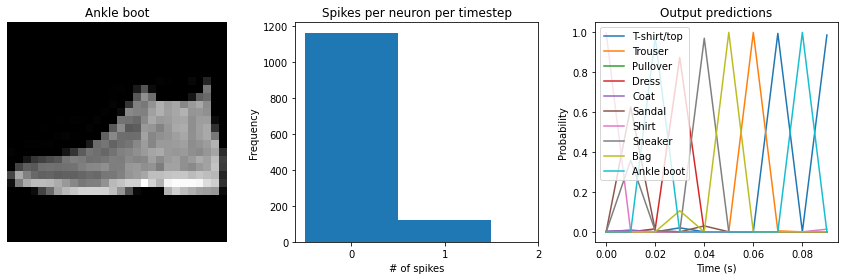

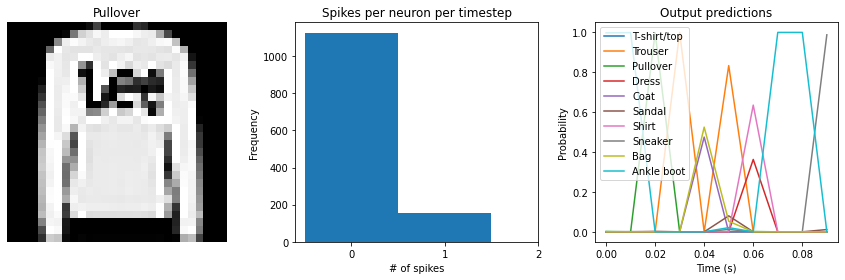

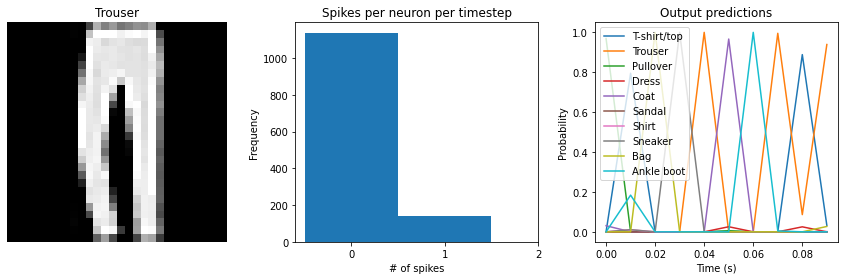

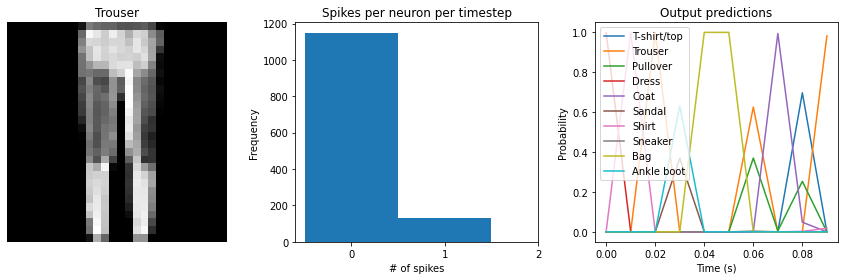

In [14]:
check_output(regularized_model)

We can see that the spike rates have moved towards the 10-20 Hz target we specified.
However, the test accuracy has dropped, since we're adding an additional optimization
constraint. (The accuracy is still higher than the original result with `dt=0.01`, due
to the higher spike rates.) We could lower the regularization weight to allow more
freedom in the firing rates. Or we could use `keras_spiking.regularizers.Percentile`,
which allows more freedom for outliers.
Again, this is a tradeoff that is made between controlling
the firing rates and optimizing accuracy, and the best value for that tradeoff will
depend on the particular application (e.g., how important is it that spike rates fall
within a particular range?).

Note that in some cases it may be better to use regularization with
``spiking_aware_training=False``, as the regularization may perform better when the
value being regularized is smoother. It may also help to adjust the weight
initialization so that the initial firing rates are closer to the desired range, so
that there are smaller adjustments required by the regularizer.

## Lowpass filtering

Another tool we can employ when working with SpikingActivation layers is filtering. As
we've seen, the output of a spiking layer consists of discrete, temporally sparse spike
events. This makes it difficult to determine the spike rate of a neuron when just
looking at a single timestep. In the cases above we have worked around this by using a
`tf.keras.layers.GlobalAveragePooling1D` layer to average the output across all
timesteps before classification.

Another way to achieve this is to compute some kind of moving average of the spiking
output across timesteps. This is effectively what filtering is doing. KerasSpiking
contains a Lowpass layer, which implements a
[lowpass filter](https://en.wikipedia.org/wiki/Low-pass_filter). This has a parameter
`tau`, known as the filter time constant, which controls the degree of smoothing the
layer will apply. Larger `tau` values will apply more smoothing, meaning that we're
aggregating information across longer periods of time, but the output will also be
slower to adapt to changes in the input.

By default the `tau` values are trainable. We can use this in combination with spiking
aware training to enable the model to learn time constants that best trade off spike
noise versus response speed.

Unlike `tf.keras.layers.GlobalAveragePooling1D`, `keras_spiking.Lowpass` computes
outputs for all timesteps by default. This makes it possible to apply filtering
throughout the model—not only on the final layer—in the case that there are multiple
spiking layers. For the final layer, we can pass `return_sequences=False` to have the
layer only return the output of the final timestep, rather than the outputs of all
timesteps.

When working with multiple KerasSpiking layers, we often want them to all share the
same `dt`. We can use `keras_spiking.default.dt` to change the default dt for all
layers. Note that this will only affect layers created _after_ the default is changed;
this will not retroactively affect previous layers.

In [15]:
keras_spiking.default.dt = 0.01

filtered_model = tf.keras.Sequential(
    [
        tf.keras.layers.Reshape((-1, 28 * 28), input_shape=(None, 28, 28)),
        tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(128)),
        keras_spiking.SpikingActivation("relu", spiking_aware_training=True),
        # add a lowpass filter on output of spiking layer
        keras_spiking.Lowpass(0.1, return_sequences=False),
        tf.keras.layers.Dense(10),
    ]
)

train(filtered_model, train_sequences, test_sequences)

Epoch 1/10


   1/1875 [..............................] - ETA: 35:12 - loss: 3.1698 - accuracy: 0.0312

   6/1875 [..............................] - ETA: 21s - loss: 2.8297 - accuracy: 0.1198  

  11/1875 [..............................] - ETA: 21s - loss: 2.6876 - accuracy: 0.1307

  16/1875 [..............................] - ETA: 21s - loss: 2.5648 - accuracy: 0.1660

  21/1875 [..............................] - ETA: 21s - loss: 2.5055 - accuracy: 0.1979

  26/1875 [..............................] - ETA: 21s - loss: 2.4369 - accuracy: 0.2272

  31/1875 [..............................] - ETA: 21s - loss: 2.3972 - accuracy: 0.2409

  36/1875 [..............................] - ETA: 21s - loss: 2.3539 - accuracy: 0.2648

  41/1875 [..............................] - ETA: 21s - loss: 2.3719 - accuracy: 0.2744

  46/1875 [..............................] - ETA: 20s - loss: 2.3291 - accuracy: 0.2928

  51/1875 [..............................] - ETA: 20s - loss: 2.2887 - accuracy: 0.3064

  56/1875 [..............................] - ETA: 20s - loss: 2.2486 - accuracy: 0.3131

  61/1875 [..............................] - ETA: 20s - loss: 2.2499 - accuracy: 0.3171

  66/1875 [>.............................] - ETA: 20s - loss: 2.2079 - accuracy: 0.3310

  71/1875 [>.............................] - ETA: 20s - loss: 2.1805 - accuracy: 0.3429

  76/1875 [>.............................] - ETA: 20s - loss: 2.1652 - accuracy: 0.3507

  81/1875 [>.............................] - ETA: 20s - loss: 2.1310 - accuracy: 0.3603

  86/1875 [>.............................] - ETA: 20s - loss: 2.0976 - accuracy: 0.3681

  91/1875 [>.............................] - ETA: 20s - loss: 2.0676 - accuracy: 0.3777

  96/1875 [>.............................] - ETA: 20s - loss: 2.0448 - accuracy: 0.3851

 101/1875 [>.............................] - ETA: 20s - loss: 2.0211 - accuracy: 0.3926

 106/1875 [>.............................] - ETA: 20s - loss: 1.9967 - accuracy: 0.3980

 111/1875 [>.............................] - ETA: 20s - loss: 1.9645 - accuracy: 0.4071

 116/1875 [>.............................] - ETA: 20s - loss: 1.9412 - accuracy: 0.4141

 121/1875 [>.............................] - ETA: 20s - loss: 1.9123 - accuracy: 0.4225

 126/1875 [=>............................] - ETA: 19s - loss: 1.8912 - accuracy: 0.4296

 131/1875 [=>............................] - ETA: 19s - loss: 1.8729 - accuracy: 0.4349

 136/1875 [=>............................] - ETA: 19s - loss: 1.8609 - accuracy: 0.4407

 141/1875 [=>............................] - ETA: 19s - loss: 1.8463 - accuracy: 0.4441

 146/1875 [=>............................] - ETA: 19s - loss: 1.8257 - accuracy: 0.4478

 151/1875 [=>............................] - ETA: 19s - loss: 1.8058 - accuracy: 0.4534

 156/1875 [=>............................] - ETA: 19s - loss: 1.7920 - accuracy: 0.4575

 161/1875 [=>............................] - ETA: 19s - loss: 1.7748 - accuracy: 0.4620

 166/1875 [=>............................] - ETA: 19s - loss: 1.7690 - accuracy: 0.4646

 171/1875 [=>............................] - ETA: 19s - loss: 1.7577 - accuracy: 0.4682

 176/1875 [=>............................] - ETA: 19s - loss: 1.7455 - accuracy: 0.4698

 181/1875 [=>............................] - ETA: 19s - loss: 1.7302 - accuracy: 0.4743

 186/1875 [=>............................] - ETA: 19s - loss: 1.7247 - accuracy: 0.4758

 191/1875 [==>...........................] - ETA: 19s - loss: 1.7127 - accuracy: 0.4787

 196/1875 [==>...........................] - ETA: 19s - loss: 1.7022 - accuracy: 0.4820

 201/1875 [==>...........................] - ETA: 19s - loss: 1.6895 - accuracy: 0.4854

 206/1875 [==>...........................] - ETA: 19s - loss: 1.6844 - accuracy: 0.4879

 211/1875 [==>...........................] - ETA: 18s - loss: 1.6717 - accuracy: 0.4917

 216/1875 [==>...........................] - ETA: 18s - loss: 1.6631 - accuracy: 0.4944

 221/1875 [==>...........................] - ETA: 18s - loss: 1.6484 - accuracy: 0.4992

 226/1875 [==>...........................] - ETA: 18s - loss: 1.6416 - accuracy: 0.4999

 231/1875 [==>...........................] - ETA: 18s - loss: 1.6308 - accuracy: 0.5026

 236/1875 [==>...........................] - ETA: 18s - loss: 1.6157 - accuracy: 0.5075

 241/1875 [==>...........................] - ETA: 18s - loss: 1.6086 - accuracy: 0.5100

 246/1875 [==>...........................] - ETA: 18s - loss: 1.6029 - accuracy: 0.5122

 251/1875 [===>..........................] - ETA: 18s - loss: 1.5942 - accuracy: 0.5139

 256/1875 [===>..........................] - ETA: 18s - loss: 1.5869 - accuracy: 0.5154

 261/1875 [===>..........................] - ETA: 18s - loss: 1.5759 - accuracy: 0.5183

 266/1875 [===>..........................] - ETA: 18s - loss: 1.5708 - accuracy: 0.5194

 271/1875 [===>..........................] - ETA: 18s - loss: 1.5637 - accuracy: 0.5210

 276/1875 [===>..........................] - ETA: 18s - loss: 1.5551 - accuracy: 0.5236

 281/1875 [===>..........................] - ETA: 18s - loss: 1.5454 - accuracy: 0.5262

 286/1875 [===>..........................] - ETA: 18s - loss: 1.5399 - accuracy: 0.5275

 291/1875 [===>..........................] - ETA: 18s - loss: 1.5340 - accuracy: 0.5299

 295/1875 [===>..........................] - ETA: 18s - loss: 1.5254 - accuracy: 0.5323

 300/1875 [===>..........................] - ETA: 17s - loss: 1.5184 - accuracy: 0.5343

 305/1875 [===>..........................] - ETA: 17s - loss: 1.5103 - accuracy: 0.5357

 310/1875 [===>..........................] - ETA: 17s - loss: 1.5005 - accuracy: 0.5382

 315/1875 [====>.........................] - ETA: 17s - loss: 1.4906 - accuracy: 0.5406

 320/1875 [====>.........................] - ETA: 17s - loss: 1.4852 - accuracy: 0.5424

 325/1875 [====>.........................] - ETA: 17s - loss: 1.4804 - accuracy: 0.5443

 330/1875 [====>.........................] - ETA: 17s - loss: 1.4795 - accuracy: 0.5449

 335/1875 [====>.........................] - ETA: 17s - loss: 1.4740 - accuracy: 0.5465

 340/1875 [====>.........................] - ETA: 17s - loss: 1.4684 - accuracy: 0.5476

 345/1875 [====>.........................] - ETA: 17s - loss: 1.4615 - accuracy: 0.5498

 350/1875 [====>.........................] - ETA: 17s - loss: 1.4524 - accuracy: 0.5518

 355/1875 [====>.........................] - ETA: 17s - loss: 1.4455 - accuracy: 0.5533

 360/1875 [====>.........................] - ETA: 17s - loss: 1.4383 - accuracy: 0.5551

 365/1875 [====>.........................] - ETA: 17s - loss: 1.4330 - accuracy: 0.5565

 370/1875 [====>.........................] - ETA: 17s - loss: 1.4271 - accuracy: 0.5580

 375/1875 [=====>........................] - ETA: 17s - loss: 1.4190 - accuracy: 0.5604

 380/1875 [=====>........................] - ETA: 17s - loss: 1.4142 - accuracy: 0.5614

 385/1875 [=====>........................] - ETA: 17s - loss: 1.4100 - accuracy: 0.5623

 390/1875 [=====>........................] - ETA: 16s - loss: 1.4030 - accuracy: 0.5639

 395/1875 [=====>........................] - ETA: 16s - loss: 1.3962 - accuracy: 0.5655

 400/1875 [=====>........................] - ETA: 16s - loss: 1.3880 - accuracy: 0.5677

 405/1875 [=====>........................] - ETA: 16s - loss: 1.3811 - accuracy: 0.5692

 410/1875 [=====>........................] - ETA: 16s - loss: 1.3760 - accuracy: 0.5709

 415/1875 [=====>........................] - ETA: 16s - loss: 1.3703 - accuracy: 0.5726

 420/1875 [=====>........................] - ETA: 16s - loss: 1.3652 - accuracy: 0.5740

 424/1875 [=====>........................] - ETA: 16s - loss: 1.3626 - accuracy: 0.5753

 429/1875 [=====>........................] - ETA: 16s - loss: 1.3550 - accuracy: 0.5770

 434/1875 [=====>........................] - ETA: 16s - loss: 1.3521 - accuracy: 0.5781

 439/1875 [======>.......................] - ETA: 16s - loss: 1.3462 - accuracy: 0.5795

 444/1875 [======>.......................] - ETA: 16s - loss: 1.3427 - accuracy: 0.5804

 449/1875 [======>.......................] - ETA: 16s - loss: 1.3360 - accuracy: 0.5818

 454/1875 [======>.......................] - ETA: 16s - loss: 1.3316 - accuracy: 0.5827

 459/1875 [======>.......................] - ETA: 16s - loss: 1.3265 - accuracy: 0.5836

 464/1875 [======>.......................] - ETA: 16s - loss: 1.3221 - accuracy: 0.5846

 469/1875 [======>.......................] - ETA: 16s - loss: 1.3188 - accuracy: 0.5847

 474/1875 [======>.......................] - ETA: 16s - loss: 1.3126 - accuracy: 0.5863

 479/1875 [======>.......................] - ETA: 15s - loss: 1.3073 - accuracy: 0.5876

 484/1875 [======>.......................] - ETA: 15s - loss: 1.3038 - accuracy: 0.5884

 489/1875 [======>.......................] - ETA: 15s - loss: 1.3018 - accuracy: 0.5890

 494/1875 [======>.......................] - ETA: 15s - loss: 1.2983 - accuracy: 0.5899

 499/1875 [======>.......................] - ETA: 15s - loss: 1.2935 - accuracy: 0.5914

 504/1875 [=======>......................] - ETA: 15s - loss: 1.2903 - accuracy: 0.5916

 509/1875 [=======>......................] - ETA: 15s - loss: 1.2878 - accuracy: 0.5920

 514/1875 [=======>......................] - ETA: 15s - loss: 1.2849 - accuracy: 0.5930

 519/1875 [=======>......................] - ETA: 15s - loss: 1.2815 - accuracy: 0.5941

 524/1875 [=======>......................] - ETA: 15s - loss: 1.2763 - accuracy: 0.5953

 529/1875 [=======>......................] - ETA: 15s - loss: 1.2724 - accuracy: 0.5965

 534/1875 [=======>......................] - ETA: 15s - loss: 1.2683 - accuracy: 0.5970

 539/1875 [=======>......................] - ETA: 15s - loss: 1.2635 - accuracy: 0.5984

 544/1875 [=======>......................] - ETA: 15s - loss: 1.2592 - accuracy: 0.5997

 549/1875 [=======>......................] - ETA: 15s - loss: 1.2570 - accuracy: 0.6003

 554/1875 [=======>......................] - ETA: 15s - loss: 1.2524 - accuracy: 0.6015

 559/1875 [=======>......................] - ETA: 15s - loss: 1.2489 - accuracy: 0.6026

 564/1875 [========>.....................] - ETA: 14s - loss: 1.2459 - accuracy: 0.6037

 569/1875 [========>.....................] - ETA: 14s - loss: 1.2440 - accuracy: 0.6042

 574/1875 [========>.....................] - ETA: 14s - loss: 1.2388 - accuracy: 0.6055

 579/1875 [========>.....................] - ETA: 14s - loss: 1.2363 - accuracy: 0.6061

 584/1875 [========>.....................] - ETA: 14s - loss: 1.2336 - accuracy: 0.6064

 589/1875 [========>.....................] - ETA: 14s - loss: 1.2310 - accuracy: 0.6074

 594/1875 [========>.....................] - ETA: 14s - loss: 1.2274 - accuracy: 0.6082

 599/1875 [========>.....................] - ETA: 14s - loss: 1.2233 - accuracy: 0.6093

 604/1875 [========>.....................] - ETA: 14s - loss: 1.2195 - accuracy: 0.6103

 609/1875 [========>.....................] - ETA: 14s - loss: 1.2154 - accuracy: 0.6114

 614/1875 [========>.....................] - ETA: 14s - loss: 1.2114 - accuracy: 0.6125

 619/1875 [========>.....................] - ETA: 14s - loss: 1.2082 - accuracy: 0.6132

 624/1875 [========>.....................] - ETA: 14s - loss: 1.2061 - accuracy: 0.6138

 629/1875 [=========>....................] - ETA: 14s - loss: 1.2042 - accuracy: 0.6142

 634/1875 [=========>....................] - ETA: 14s - loss: 1.2008 - accuracy: 0.6151

 639/1875 [=========>....................] - ETA: 14s - loss: 1.1975 - accuracy: 0.6157

 644/1875 [=========>....................] - ETA: 14s - loss: 1.1948 - accuracy: 0.6162

 649/1875 [=========>....................] - ETA: 14s - loss: 1.1916 - accuracy: 0.6171

 654/1875 [=========>....................] - ETA: 13s - loss: 1.1878 - accuracy: 0.6180

 659/1875 [=========>....................] - ETA: 13s - loss: 1.1852 - accuracy: 0.6186

 664/1875 [=========>....................] - ETA: 13s - loss: 1.1831 - accuracy: 0.6192

 669/1875 [=========>....................] - ETA: 13s - loss: 1.1805 - accuracy: 0.6197

 674/1875 [=========>....................] - ETA: 13s - loss: 1.1781 - accuracy: 0.6200

 679/1875 [=========>....................] - ETA: 13s - loss: 1.1751 - accuracy: 0.6208

 684/1875 [=========>....................] - ETA: 13s - loss: 1.1711 - accuracy: 0.6216

 689/1875 [==========>...................] - ETA: 13s - loss: 1.1689 - accuracy: 0.6221

 694/1875 [==========>...................] - ETA: 13s - loss: 1.1671 - accuracy: 0.6224

 699/1875 [==========>...................] - ETA: 13s - loss: 1.1644 - accuracy: 0.6229

 704/1875 [==========>...................] - ETA: 13s - loss: 1.1614 - accuracy: 0.6235

 709/1875 [==========>...................] - ETA: 13s - loss: 1.1584 - accuracy: 0.6243

 714/1875 [==========>...................] - ETA: 13s - loss: 1.1555 - accuracy: 0.6250

 719/1875 [==========>...................] - ETA: 13s - loss: 1.1541 - accuracy: 0.6250

 724/1875 [==========>...................] - ETA: 13s - loss: 1.1511 - accuracy: 0.6256

 729/1875 [==========>...................] - ETA: 13s - loss: 1.1496 - accuracy: 0.6258

 734/1875 [==========>...................] - ETA: 13s - loss: 1.1475 - accuracy: 0.6263

 739/1875 [==========>...................] - ETA: 12s - loss: 1.1455 - accuracy: 0.6269

 744/1875 [==========>...................] - ETA: 12s - loss: 1.1423 - accuracy: 0.6277

 747/1875 [==========>...................] - ETA: 12s - loss: 1.1404 - accuracy: 0.6280

 751/1875 [===========>..................] - ETA: 12s - loss: 1.1392 - accuracy: 0.6285

 756/1875 [===========>..................] - ETA: 12s - loss: 1.1363 - accuracy: 0.6290

 761/1875 [===========>..................] - ETA: 12s - loss: 1.1331 - accuracy: 0.6296

 766/1875 [===========>..................] - ETA: 12s - loss: 1.1301 - accuracy: 0.6304

 771/1875 [===========>..................] - ETA: 12s - loss: 1.1270 - accuracy: 0.6311

 775/1875 [===========>..................] - ETA: 12s - loss: 1.1251 - accuracy: 0.6318

 780/1875 [===========>..................] - ETA: 12s - loss: 1.1229 - accuracy: 0.6324

 785/1875 [===========>..................] - ETA: 12s - loss: 1.1208 - accuracy: 0.6329

 790/1875 [===========>..................] - ETA: 12s - loss: 1.1182 - accuracy: 0.6337

 795/1875 [===========>..................] - ETA: 12s - loss: 1.1159 - accuracy: 0.6343

 800/1875 [===========>..................] - ETA: 12s - loss: 1.1134 - accuracy: 0.6349

 805/1875 [===========>..................] - ETA: 12s - loss: 1.1107 - accuracy: 0.6355

 810/1875 [===========>..................] - ETA: 12s - loss: 1.1078 - accuracy: 0.6362

 815/1875 [============>.................] - ETA: 12s - loss: 1.1055 - accuracy: 0.6368

 820/1875 [============>.................] - ETA: 12s - loss: 1.1047 - accuracy: 0.6367

 825/1875 [============>.................] - ETA: 12s - loss: 1.1032 - accuracy: 0.6370

 830/1875 [============>.................] - ETA: 11s - loss: 1.1012 - accuracy: 0.6375

 835/1875 [============>.................] - ETA: 11s - loss: 1.0989 - accuracy: 0.6382

 840/1875 [============>.................] - ETA: 11s - loss: 1.0964 - accuracy: 0.6389

 845/1875 [============>.................] - ETA: 11s - loss: 1.0945 - accuracy: 0.6393

 850/1875 [============>.................] - ETA: 11s - loss: 1.0919 - accuracy: 0.6400

 855/1875 [============>.................] - ETA: 11s - loss: 1.0902 - accuracy: 0.6404

 860/1875 [============>.................] - ETA: 11s - loss: 1.0885 - accuracy: 0.6407

 865/1875 [============>.................] - ETA: 11s - loss: 1.0869 - accuracy: 0.6413

 870/1875 [============>.................] - ETA: 11s - loss: 1.0851 - accuracy: 0.6416

 875/1875 [=============>................] - ETA: 11s - loss: 1.0839 - accuracy: 0.6421

 880/1875 [=============>................] - ETA: 11s - loss: 1.0815 - accuracy: 0.6426

 885/1875 [=============>................] - ETA: 11s - loss: 1.0794 - accuracy: 0.6433

 889/1875 [=============>................] - ETA: 11s - loss: 1.0783 - accuracy: 0.6436

 894/1875 [=============>................] - ETA: 11s - loss: 1.0765 - accuracy: 0.6439

 899/1875 [=============>................] - ETA: 11s - loss: 1.0754 - accuracy: 0.6444

 904/1875 [=============>................] - ETA: 11s - loss: 1.0736 - accuracy: 0.6447

 909/1875 [=============>................] - ETA: 11s - loss: 1.0720 - accuracy: 0.6452

 914/1875 [=============>................] - ETA: 11s - loss: 1.0707 - accuracy: 0.6455

 919/1875 [=============>................] - ETA: 10s - loss: 1.0693 - accuracy: 0.6460

 924/1875 [=============>................] - ETA: 10s - loss: 1.0669 - accuracy: 0.6466

 929/1875 [=============>................] - ETA: 10s - loss: 1.0651 - accuracy: 0.6470

 934/1875 [=============>................] - ETA: 10s - loss: 1.0637 - accuracy: 0.6473

 939/1875 [==============>...............] - ETA: 10s - loss: 1.0613 - accuracy: 0.6479

 944/1875 [==============>...............] - ETA: 10s - loss: 1.0596 - accuracy: 0.6485

 949/1875 [==============>...............] - ETA: 10s - loss: 1.0577 - accuracy: 0.6488

 954/1875 [==============>...............] - ETA: 10s - loss: 1.0558 - accuracy: 0.6495

 959/1875 [==============>...............] - ETA: 10s - loss: 1.0545 - accuracy: 0.6497

 964/1875 [==============>...............] - ETA: 10s - loss: 1.0532 - accuracy: 0.6501

 969/1875 [==============>...............] - ETA: 10s - loss: 1.0513 - accuracy: 0.6505

 974/1875 [==============>...............] - ETA: 10s - loss: 1.0498 - accuracy: 0.6508

 979/1875 [==============>...............] - ETA: 10s - loss: 1.0482 - accuracy: 0.6511

 984/1875 [==============>...............] - ETA: 10s - loss: 1.0462 - accuracy: 0.6518

 989/1875 [==============>...............] - ETA: 10s - loss: 1.0449 - accuracy: 0.6521

 994/1875 [==============>...............] - ETA: 10s - loss: 1.0434 - accuracy: 0.6528

 999/1875 [==============>...............] - ETA: 10s - loss: 1.0416 - accuracy: 0.6533

1004/1875 [===============>..............] - ETA: 9s - loss: 1.0396 - accuracy: 0.6540 

1009/1875 [===============>..............] - ETA: 9s - loss: 1.0379 - accuracy: 0.6543

1014/1875 [===============>..............] - ETA: 9s - loss: 1.0360 - accuracy: 0.6546

1019/1875 [===============>..............] - ETA: 9s - loss: 1.0338 - accuracy: 0.6551

1024/1875 [===============>..............] - ETA: 9s - loss: 1.0313 - accuracy: 0.6556

1029/1875 [===============>..............] - ETA: 9s - loss: 1.0296 - accuracy: 0.6562

1034/1875 [===============>..............] - ETA: 9s - loss: 1.0279 - accuracy: 0.6567

1039/1875 [===============>..............] - ETA: 9s - loss: 1.0259 - accuracy: 0.6573

1044/1875 [===============>..............] - ETA: 9s - loss: 1.0238 - accuracy: 0.6579

1049/1875 [===============>..............] - ETA: 9s - loss: 1.0221 - accuracy: 0.6583

1054/1875 [===============>..............] - ETA: 9s - loss: 1.0208 - accuracy: 0.6586

1059/1875 [===============>..............] - ETA: 9s - loss: 1.0189 - accuracy: 0.6591

1064/1875 [================>.............] - ETA: 9s - loss: 1.0172 - accuracy: 0.6596

1069/1875 [================>.............] - ETA: 9s - loss: 1.0151 - accuracy: 0.6601

1074/1875 [================>.............] - ETA: 9s - loss: 1.0143 - accuracy: 0.6605

1079/1875 [================>.............] - ETA: 9s - loss: 1.0130 - accuracy: 0.6608

1084/1875 [================>.............] - ETA: 9s - loss: 1.0117 - accuracy: 0.6612

1089/1875 [================>.............] - ETA: 8s - loss: 1.0104 - accuracy: 0.6617

1094/1875 [================>.............] - ETA: 8s - loss: 1.0094 - accuracy: 0.6618

1099/1875 [================>.............] - ETA: 8s - loss: 1.0078 - accuracy: 0.6623

1104/1875 [================>.............] - ETA: 8s - loss: 1.0062 - accuracy: 0.6628

1109/1875 [================>.............] - ETA: 8s - loss: 1.0053 - accuracy: 0.6629

1114/1875 [================>.............] - ETA: 8s - loss: 1.0035 - accuracy: 0.6635

1119/1875 [================>.............] - ETA: 8s - loss: 1.0027 - accuracy: 0.6638

1124/1875 [================>.............] - ETA: 8s - loss: 1.0010 - accuracy: 0.6641

1129/1875 [=================>............] - ETA: 8s - loss: 1.0004 - accuracy: 0.6642

1134/1875 [=================>............] - ETA: 8s - loss: 0.9991 - accuracy: 0.6647

1139/1875 [=================>............] - ETA: 8s - loss: 0.9980 - accuracy: 0.6650

1144/1875 [=================>............] - ETA: 8s - loss: 0.9964 - accuracy: 0.6654

1149/1875 [=================>............] - ETA: 8s - loss: 0.9953 - accuracy: 0.6656

1154/1875 [=================>............] - ETA: 8s - loss: 0.9939 - accuracy: 0.6658

1159/1875 [=================>............] - ETA: 8s - loss: 0.9921 - accuracy: 0.6665

1164/1875 [=================>............] - ETA: 8s - loss: 0.9907 - accuracy: 0.6669

1169/1875 [=================>............] - ETA: 8s - loss: 0.9899 - accuracy: 0.6671

1174/1875 [=================>............] - ETA: 8s - loss: 0.9890 - accuracy: 0.6671

1179/1875 [=================>............] - ETA: 7s - loss: 0.9879 - accuracy: 0.6675

1184/1875 [=================>............] - ETA: 7s - loss: 0.9868 - accuracy: 0.6679

1189/1875 [==================>...........] - ETA: 7s - loss: 0.9852 - accuracy: 0.6685

1194/1875 [==================>...........] - ETA: 7s - loss: 0.9839 - accuracy: 0.6689

1199/1875 [==================>...........] - ETA: 7s - loss: 0.9824 - accuracy: 0.6692

1204/1875 [==================>...........] - ETA: 7s - loss: 0.9812 - accuracy: 0.6696

1209/1875 [==================>...........] - ETA: 7s - loss: 0.9794 - accuracy: 0.6702

1214/1875 [==================>...........] - ETA: 7s - loss: 0.9782 - accuracy: 0.6705

1219/1875 [==================>...........] - ETA: 7s - loss: 0.9765 - accuracy: 0.6712

1224/1875 [==================>...........] - ETA: 7s - loss: 0.9749 - accuracy: 0.6715

1229/1875 [==================>...........] - ETA: 7s - loss: 0.9738 - accuracy: 0.6720

1234/1875 [==================>...........] - ETA: 7s - loss: 0.9726 - accuracy: 0.6723

1239/1875 [==================>...........] - ETA: 7s - loss: 0.9711 - accuracy: 0.6725

1244/1875 [==================>...........] - ETA: 7s - loss: 0.9707 - accuracy: 0.6727

1249/1875 [==================>...........] - ETA: 7s - loss: 0.9696 - accuracy: 0.6729

1254/1875 [===================>..........] - ETA: 7s - loss: 0.9679 - accuracy: 0.6734

1259/1875 [===================>..........] - ETA: 7s - loss: 0.9667 - accuracy: 0.6736

1264/1875 [===================>..........] - ETA: 6s - loss: 0.9654 - accuracy: 0.6740

1269/1875 [===================>..........] - ETA: 6s - loss: 0.9641 - accuracy: 0.6743

1274/1875 [===================>..........] - ETA: 6s - loss: 0.9625 - accuracy: 0.6749

1279/1875 [===================>..........] - ETA: 6s - loss: 0.9618 - accuracy: 0.6752

1284/1875 [===================>..........] - ETA: 6s - loss: 0.9610 - accuracy: 0.6754

1289/1875 [===================>..........] - ETA: 6s - loss: 0.9599 - accuracy: 0.6755

1294/1875 [===================>..........] - ETA: 6s - loss: 0.9585 - accuracy: 0.6759

1299/1875 [===================>..........] - ETA: 6s - loss: 0.9571 - accuracy: 0.6763

1304/1875 [===================>..........] - ETA: 6s - loss: 0.9556 - accuracy: 0.6769

1309/1875 [===================>..........] - ETA: 6s - loss: 0.9539 - accuracy: 0.6773

1314/1875 [====================>.........] - ETA: 6s - loss: 0.9527 - accuracy: 0.6777

1319/1875 [====================>.........] - ETA: 6s - loss: 0.9517 - accuracy: 0.6779

1324/1875 [====================>.........] - ETA: 6s - loss: 0.9504 - accuracy: 0.6783

1329/1875 [====================>.........] - ETA: 6s - loss: 0.9494 - accuracy: 0.6784

1334/1875 [====================>.........] - ETA: 6s - loss: 0.9491 - accuracy: 0.6782

1339/1875 [====================>.........] - ETA: 6s - loss: 0.9482 - accuracy: 0.6785

1344/1875 [====================>.........] - ETA: 6s - loss: 0.9469 - accuracy: 0.6788

1349/1875 [====================>.........] - ETA: 6s - loss: 0.9455 - accuracy: 0.6792

1354/1875 [====================>.........] - ETA: 5s - loss: 0.9442 - accuracy: 0.6795

1359/1875 [====================>.........] - ETA: 5s - loss: 0.9425 - accuracy: 0.6800

1364/1875 [====================>.........] - ETA: 5s - loss: 0.9413 - accuracy: 0.6804

1369/1875 [====================>.........] - ETA: 5s - loss: 0.9405 - accuracy: 0.6805

1373/1875 [====================>.........] - ETA: 5s - loss: 0.9397 - accuracy: 0.6808

1378/1875 [=====================>........] - ETA: 5s - loss: 0.9388 - accuracy: 0.6810

1383/1875 [=====================>........] - ETA: 5s - loss: 0.9379 - accuracy: 0.6814

1388/1875 [=====================>........] - ETA: 5s - loss: 0.9366 - accuracy: 0.6817

1393/1875 [=====================>........] - ETA: 5s - loss: 0.9360 - accuracy: 0.6819

1398/1875 [=====================>........] - ETA: 5s - loss: 0.9353 - accuracy: 0.6822

1403/1875 [=====================>........] - ETA: 5s - loss: 0.9340 - accuracy: 0.6826

1408/1875 [=====================>........] - ETA: 5s - loss: 0.9326 - accuracy: 0.6829

1413/1875 [=====================>........] - ETA: 5s - loss: 0.9317 - accuracy: 0.6833

1418/1875 [=====================>........] - ETA: 5s - loss: 0.9312 - accuracy: 0.6835

1423/1875 [=====================>........] - ETA: 5s - loss: 0.9305 - accuracy: 0.6837

1428/1875 [=====================>........] - ETA: 5s - loss: 0.9300 - accuracy: 0.6838

1433/1875 [=====================>........] - ETA: 5s - loss: 0.9294 - accuracy: 0.6840

1438/1875 [======================>.......] - ETA: 4s - loss: 0.9280 - accuracy: 0.6844

1443/1875 [======================>.......] - ETA: 4s - loss: 0.9267 - accuracy: 0.6848

1448/1875 [======================>.......] - ETA: 4s - loss: 0.9252 - accuracy: 0.6854

1453/1875 [======================>.......] - ETA: 4s - loss: 0.9238 - accuracy: 0.6858

1458/1875 [======================>.......] - ETA: 4s - loss: 0.9232 - accuracy: 0.6860

1463/1875 [======================>.......] - ETA: 4s - loss: 0.9223 - accuracy: 0.6862

1468/1875 [======================>.......] - ETA: 4s - loss: 0.9217 - accuracy: 0.6864

1473/1875 [======================>.......] - ETA: 4s - loss: 0.9213 - accuracy: 0.6865

1478/1875 [======================>.......] - ETA: 4s - loss: 0.9199 - accuracy: 0.6870

1483/1875 [======================>.......] - ETA: 4s - loss: 0.9190 - accuracy: 0.6872

1488/1875 [======================>.......] - ETA: 4s - loss: 0.9180 - accuracy: 0.6874

1493/1875 [======================>.......] - ETA: 4s - loss: 0.9166 - accuracy: 0.6878

1498/1875 [======================>.......] - ETA: 4s - loss: 0.9155 - accuracy: 0.6883

1503/1875 [=======================>......] - ETA: 4s - loss: 0.9142 - accuracy: 0.6888

1508/1875 [=======================>......] - ETA: 4s - loss: 0.9130 - accuracy: 0.6892

1513/1875 [=======================>......] - ETA: 4s - loss: 0.9119 - accuracy: 0.6895

1518/1875 [=======================>......] - ETA: 4s - loss: 0.9107 - accuracy: 0.6899

1523/1875 [=======================>......] - ETA: 4s - loss: 0.9095 - accuracy: 0.6902

1528/1875 [=======================>......] - ETA: 3s - loss: 0.9085 - accuracy: 0.6904

1533/1875 [=======================>......] - ETA: 3s - loss: 0.9080 - accuracy: 0.6905

1538/1875 [=======================>......] - ETA: 3s - loss: 0.9072 - accuracy: 0.6907

1543/1875 [=======================>......] - ETA: 3s - loss: 0.9066 - accuracy: 0.6908

1548/1875 [=======================>......] - ETA: 3s - loss: 0.9059 - accuracy: 0.6909

1553/1875 [=======================>......] - ETA: 3s - loss: 0.9047 - accuracy: 0.6912

1558/1875 [=======================>......] - ETA: 3s - loss: 0.9039 - accuracy: 0.6914

1563/1875 [========================>.....] - ETA: 3s - loss: 0.9029 - accuracy: 0.6916

1568/1875 [========================>.....] - ETA: 3s - loss: 0.9023 - accuracy: 0.6919

1573/1875 [========================>.....] - ETA: 3s - loss: 0.9018 - accuracy: 0.6921

1578/1875 [========================>.....] - ETA: 3s - loss: 0.9012 - accuracy: 0.6921

1583/1875 [========================>.....] - ETA: 3s - loss: 0.9003 - accuracy: 0.6924

1588/1875 [========================>.....] - ETA: 3s - loss: 0.8998 - accuracy: 0.6926

1593/1875 [========================>.....] - ETA: 3s - loss: 0.8986 - accuracy: 0.6929

1598/1875 [========================>.....] - ETA: 3s - loss: 0.8978 - accuracy: 0.6932

1603/1875 [========================>.....] - ETA: 3s - loss: 0.8970 - accuracy: 0.6935

1608/1875 [========================>.....] - ETA: 3s - loss: 0.8962 - accuracy: 0.6938

1613/1875 [========================>.....] - ETA: 2s - loss: 0.8953 - accuracy: 0.6939

1618/1875 [========================>.....] - ETA: 2s - loss: 0.8945 - accuracy: 0.6941

1623/1875 [========================>.....] - ETA: 2s - loss: 0.8938 - accuracy: 0.6943

1628/1875 [=========================>....] - ETA: 2s - loss: 0.8934 - accuracy: 0.6945

1633/1875 [=========================>....] - ETA: 2s - loss: 0.8926 - accuracy: 0.6947

1638/1875 [=========================>....] - ETA: 2s - loss: 0.8916 - accuracy: 0.6951

1643/1875 [=========================>....] - ETA: 2s - loss: 0.8909 - accuracy: 0.6953

1647/1875 [=========================>....] - ETA: 2s - loss: 0.8902 - accuracy: 0.6954

1652/1875 [=========================>....] - ETA: 2s - loss: 0.8890 - accuracy: 0.6958

1657/1875 [=========================>....] - ETA: 2s - loss: 0.8885 - accuracy: 0.6960

1661/1875 [=========================>....] - ETA: 2s - loss: 0.8879 - accuracy: 0.6962

1666/1875 [=========================>....] - ETA: 2s - loss: 0.8869 - accuracy: 0.6964

1671/1875 [=========================>....] - ETA: 2s - loss: 0.8863 - accuracy: 0.6966

1676/1875 [=========================>....] - ETA: 2s - loss: 0.8854 - accuracy: 0.6969

1681/1875 [=========================>....] - ETA: 2s - loss: 0.8845 - accuracy: 0.6972

1686/1875 [=========================>....] - ETA: 2s - loss: 0.8838 - accuracy: 0.6975

1691/1875 [==========================>...] - ETA: 2s - loss: 0.8829 - accuracy: 0.6976

1696/1875 [==========================>...] - ETA: 2s - loss: 0.8825 - accuracy: 0.6978

1701/1875 [==========================>...] - ETA: 1s - loss: 0.8816 - accuracy: 0.6980

1706/1875 [==========================>...] - ETA: 1s - loss: 0.8810 - accuracy: 0.6982

1711/1875 [==========================>...] - ETA: 1s - loss: 0.8801 - accuracy: 0.6985

1716/1875 [==========================>...] - ETA: 1s - loss: 0.8793 - accuracy: 0.6986

1721/1875 [==========================>...] - ETA: 1s - loss: 0.8785 - accuracy: 0.6988

1726/1875 [==========================>...] - ETA: 1s - loss: 0.8775 - accuracy: 0.6992

1731/1875 [==========================>...] - ETA: 1s - loss: 0.8769 - accuracy: 0.6993

1736/1875 [==========================>...] - ETA: 1s - loss: 0.8761 - accuracy: 0.6995

1740/1875 [==========================>...] - ETA: 1s - loss: 0.8753 - accuracy: 0.6998

1745/1875 [==========================>...] - ETA: 1s - loss: 0.8743 - accuracy: 0.7002

1750/1875 [===========================>..] - ETA: 1s - loss: 0.8737 - accuracy: 0.7004

1755/1875 [===========================>..] - ETA: 1s - loss: 0.8732 - accuracy: 0.7005

1760/1875 [===========================>..] - ETA: 1s - loss: 0.8723 - accuracy: 0.7007

1765/1875 [===========================>..] - ETA: 1s - loss: 0.8716 - accuracy: 0.7010

1770/1875 [===========================>..] - ETA: 1s - loss: 0.8709 - accuracy: 0.7012

1775/1875 [===========================>..] - ETA: 1s - loss: 0.8699 - accuracy: 0.7014

1780/1875 [===========================>..] - ETA: 1s - loss: 0.8691 - accuracy: 0.7016

1785/1875 [===========================>..] - ETA: 1s - loss: 0.8686 - accuracy: 0.7018

1790/1875 [===========================>..] - ETA: 0s - loss: 0.8684 - accuracy: 0.7019

1795/1875 [===========================>..] - ETA: 0s - loss: 0.8677 - accuracy: 0.7022

1800/1875 [===========================>..] - ETA: 0s - loss: 0.8672 - accuracy: 0.7023

1805/1875 [===========================>..] - ETA: 0s - loss: 0.8664 - accuracy: 0.7025

1810/1875 [===========================>..] - ETA: 0s - loss: 0.8657 - accuracy: 0.7028

1815/1875 [============================>.] - ETA: 0s - loss: 0.8652 - accuracy: 0.7029

1820/1875 [============================>.] - ETA: 0s - loss: 0.8645 - accuracy: 0.7030

1825/1875 [============================>.] - ETA: 0s - loss: 0.8637 - accuracy: 0.7032

1830/1875 [============================>.] - ETA: 0s - loss: 0.8627 - accuracy: 0.7035

1835/1875 [============================>.] - ETA: 0s - loss: 0.8618 - accuracy: 0.7038

1840/1875 [============================>.] - ETA: 0s - loss: 0.8608 - accuracy: 0.7041

1845/1875 [============================>.] - ETA: 0s - loss: 0.8600 - accuracy: 0.7044

1850/1875 [============================>.] - ETA: 0s - loss: 0.8593 - accuracy: 0.7047

1855/1875 [============================>.] - ETA: 0s - loss: 0.8589 - accuracy: 0.7048

1860/1875 [============================>.] - ETA: 0s - loss: 0.8585 - accuracy: 0.7049

1865/1875 [============================>.] - ETA: 0s - loss: 0.8578 - accuracy: 0.7051

1870/1875 [============================>.] - ETA: 0s - loss: 0.8571 - accuracy: 0.7053

1875/1875 [==============================] - ETA: 0s - loss: 0.8561 - accuracy: 0.7057

1875/1875 [==============================] - 23s 11ms/step - loss: 0.8561 - accuracy: 0.7057


Epoch 2/10
   1/1875 [..............................] - ETA: 22s - loss: 0.4697 - accuracy: 0.8438

   6/1875 [..............................] - ETA: 21s - loss: 0.5274 - accuracy: 0.8021

  11/1875 [..............................] - ETA: 20s - loss: 0.6651 - accuracy: 0.7557

  16/1875 [..............................] - ETA: 20s - loss: 0.6183 - accuracy: 0.7715

  21/1875 [..............................] - ETA: 20s - loss: 0.6384 - accuracy: 0.7649

  26/1875 [..............................] - ETA: 20s - loss: 0.6128 - accuracy: 0.7740

  31/1875 [..............................] - ETA: 20s - loss: 0.6400 - accuracy: 0.7621

  36/1875 [..............................] - ETA: 20s - loss: 0.6246 - accuracy: 0.7708

  41/1875 [..............................] - ETA: 20s - loss: 0.6243 - accuracy: 0.7713

  46/1875 [..............................] - ETA: 20s - loss: 0.6182 - accuracy: 0.7704

  51/1875 [..............................] - ETA: 20s - loss: 0.6169 - accuracy: 0.7708

  56/1875 [..............................] - ETA: 20s - loss: 0.6271 - accuracy: 0.7690

  61/1875 [..............................] - ETA: 20s - loss: 0.6209 - accuracy: 0.7705

  66/1875 [>.............................] - ETA: 20s - loss: 0.6241 - accuracy: 0.7713

  71/1875 [>.............................] - ETA: 20s - loss: 0.6195 - accuracy: 0.7764

  76/1875 [>.............................] - ETA: 20s - loss: 0.6159 - accuracy: 0.7771

  81/1875 [>.............................] - ETA: 20s - loss: 0.6089 - accuracy: 0.7801

  86/1875 [>.............................] - ETA: 20s - loss: 0.6069 - accuracy: 0.7805

  91/1875 [>.............................] - ETA: 20s - loss: 0.6086 - accuracy: 0.7809

  96/1875 [>.............................] - ETA: 20s - loss: 0.6104 - accuracy: 0.7799

 101/1875 [>.............................] - ETA: 20s - loss: 0.6087 - accuracy: 0.7812

 106/1875 [>.............................] - ETA: 20s - loss: 0.6106 - accuracy: 0.7815

 111/1875 [>.............................] - ETA: 20s - loss: 0.6084 - accuracy: 0.7829

 116/1875 [>.............................] - ETA: 20s - loss: 0.6114 - accuracy: 0.7804

 121/1875 [>.............................] - ETA: 19s - loss: 0.6073 - accuracy: 0.7812

 126/1875 [=>............................] - ETA: 19s - loss: 0.6113 - accuracy: 0.7800

 131/1875 [=>............................] - ETA: 19s - loss: 0.6128 - accuracy: 0.7789

 136/1875 [=>............................] - ETA: 19s - loss: 0.6200 - accuracy: 0.7780

 141/1875 [=>............................] - ETA: 19s - loss: 0.6219 - accuracy: 0.7773

 146/1875 [=>............................] - ETA: 19s - loss: 0.6209 - accuracy: 0.7780

 151/1875 [=>............................] - ETA: 19s - loss: 0.6180 - accuracy: 0.7804

 156/1875 [=>............................] - ETA: 19s - loss: 0.6176 - accuracy: 0.7794

 161/1875 [=>............................] - ETA: 19s - loss: 0.6209 - accuracy: 0.7778

 166/1875 [=>............................] - ETA: 19s - loss: 0.6179 - accuracy: 0.7780

 171/1875 [=>............................] - ETA: 19s - loss: 0.6187 - accuracy: 0.7780

 176/1875 [=>............................] - ETA: 19s - loss: 0.6155 - accuracy: 0.7789

 181/1875 [=>............................] - ETA: 19s - loss: 0.6142 - accuracy: 0.7788

 186/1875 [=>............................] - ETA: 19s - loss: 0.6144 - accuracy: 0.7776

 191/1875 [==>...........................] - ETA: 19s - loss: 0.6157 - accuracy: 0.7762

 196/1875 [==>...........................] - ETA: 19s - loss: 0.6138 - accuracy: 0.7765

 201/1875 [==>...........................] - ETA: 19s - loss: 0.6123 - accuracy: 0.7772

 206/1875 [==>...........................] - ETA: 19s - loss: 0.6114 - accuracy: 0.7779

 211/1875 [==>...........................] - ETA: 18s - loss: 0.6102 - accuracy: 0.7784

 216/1875 [==>...........................] - ETA: 18s - loss: 0.6102 - accuracy: 0.7786

 221/1875 [==>...........................] - ETA: 18s - loss: 0.6091 - accuracy: 0.7790

 226/1875 [==>...........................] - ETA: 18s - loss: 0.6096 - accuracy: 0.7786

 231/1875 [==>...........................] - ETA: 18s - loss: 0.6094 - accuracy: 0.7787

 236/1875 [==>...........................] - ETA: 18s - loss: 0.6084 - accuracy: 0.7789

 241/1875 [==>...........................] - ETA: 18s - loss: 0.6102 - accuracy: 0.7783

 246/1875 [==>...........................] - ETA: 18s - loss: 0.6091 - accuracy: 0.7791

 251/1875 [===>..........................] - ETA: 18s - loss: 0.6066 - accuracy: 0.7794

 256/1875 [===>..........................] - ETA: 18s - loss: 0.6069 - accuracy: 0.7788

 261/1875 [===>..........................] - ETA: 18s - loss: 0.6072 - accuracy: 0.7784

 266/1875 [===>..........................] - ETA: 18s - loss: 0.6056 - accuracy: 0.7788

 271/1875 [===>..........................] - ETA: 18s - loss: 0.6041 - accuracy: 0.7796

 276/1875 [===>..........................] - ETA: 18s - loss: 0.6045 - accuracy: 0.7797

 281/1875 [===>..........................] - ETA: 18s - loss: 0.6038 - accuracy: 0.7795

 286/1875 [===>..........................] - ETA: 18s - loss: 0.6034 - accuracy: 0.7792

 291/1875 [===>..........................] - ETA: 18s - loss: 0.6042 - accuracy: 0.7790

 296/1875 [===>..........................] - ETA: 18s - loss: 0.6036 - accuracy: 0.7788

 301/1875 [===>..........................] - ETA: 17s - loss: 0.6058 - accuracy: 0.7779

 306/1875 [===>..........................] - ETA: 17s - loss: 0.6068 - accuracy: 0.7778

 311/1875 [===>..........................] - ETA: 17s - loss: 0.6049 - accuracy: 0.7783

 316/1875 [====>.........................] - ETA: 17s - loss: 0.6037 - accuracy: 0.7791

 321/1875 [====>.........................] - ETA: 17s - loss: 0.6058 - accuracy: 0.7786

 326/1875 [====>.........................] - ETA: 17s - loss: 0.6025 - accuracy: 0.7800

 331/1875 [====>.........................] - ETA: 17s - loss: 0.6013 - accuracy: 0.7802

 336/1875 [====>.........................] - ETA: 17s - loss: 0.6034 - accuracy: 0.7796

 341/1875 [====>.........................] - ETA: 17s - loss: 0.6022 - accuracy: 0.7797

 346/1875 [====>.........................] - ETA: 17s - loss: 0.6025 - accuracy: 0.7789

 351/1875 [====>.........................] - ETA: 17s - loss: 0.6034 - accuracy: 0.7788

 356/1875 [====>.........................] - ETA: 17s - loss: 0.6029 - accuracy: 0.7785

 361/1875 [====>.........................] - ETA: 17s - loss: 0.6036 - accuracy: 0.7780

 366/1875 [====>.........................] - ETA: 17s - loss: 0.6039 - accuracy: 0.7778

 371/1875 [====>.........................] - ETA: 17s - loss: 0.6032 - accuracy: 0.7777

 376/1875 [=====>........................] - ETA: 17s - loss: 0.6016 - accuracy: 0.7788

 381/1875 [=====>........................] - ETA: 17s - loss: 0.6018 - accuracy: 0.7790

 386/1875 [=====>........................] - ETA: 16s - loss: 0.6009 - accuracy: 0.7794

 391/1875 [=====>........................] - ETA: 16s - loss: 0.6007 - accuracy: 0.7792

 396/1875 [=====>........................] - ETA: 16s - loss: 0.6003 - accuracy: 0.7792

 401/1875 [=====>........................] - ETA: 16s - loss: 0.6018 - accuracy: 0.7791

 406/1875 [=====>........................] - ETA: 16s - loss: 0.6005 - accuracy: 0.7794

 411/1875 [=====>........................] - ETA: 16s - loss: 0.5996 - accuracy: 0.7800

 416/1875 [=====>........................] - ETA: 16s - loss: 0.6011 - accuracy: 0.7797

 421/1875 [=====>........................] - ETA: 16s - loss: 0.6010 - accuracy: 0.7795

 426/1875 [=====>........................] - ETA: 16s - loss: 0.6014 - accuracy: 0.7790

 431/1875 [=====>........................] - ETA: 16s - loss: 0.6011 - accuracy: 0.7791

 436/1875 [=====>........................] - ETA: 16s - loss: 0.5992 - accuracy: 0.7798

 441/1875 [======>.......................] - ETA: 16s - loss: 0.5989 - accuracy: 0.7803

 446/1875 [======>.......................] - ETA: 16s - loss: 0.5984 - accuracy: 0.7804

 451/1875 [======>.......................] - ETA: 16s - loss: 0.5979 - accuracy: 0.7803

 456/1875 [======>.......................] - ETA: 16s - loss: 0.5975 - accuracy: 0.7808

 461/1875 [======>.......................] - ETA: 16s - loss: 0.5978 - accuracy: 0.7808

 466/1875 [======>.......................] - ETA: 16s - loss: 0.5980 - accuracy: 0.7811

 471/1875 [======>.......................] - ETA: 15s - loss: 0.5983 - accuracy: 0.7807

 476/1875 [======>.......................] - ETA: 15s - loss: 0.5983 - accuracy: 0.7806

 481/1875 [======>.......................] - ETA: 15s - loss: 0.5973 - accuracy: 0.7811

 486/1875 [======>.......................] - ETA: 15s - loss: 0.5974 - accuracy: 0.7809

 491/1875 [======>.......................] - ETA: 15s - loss: 0.5971 - accuracy: 0.7814

 496/1875 [======>.......................] - ETA: 15s - loss: 0.5962 - accuracy: 0.7817

 501/1875 [=======>......................] - ETA: 15s - loss: 0.5966 - accuracy: 0.7816

 506/1875 [=======>......................] - ETA: 15s - loss: 0.5971 - accuracy: 0.7811

 511/1875 [=======>......................] - ETA: 15s - loss: 0.5959 - accuracy: 0.7816

 516/1875 [=======>......................] - ETA: 15s - loss: 0.5956 - accuracy: 0.7816

 521/1875 [=======>......................] - ETA: 15s - loss: 0.5950 - accuracy: 0.7818

 526/1875 [=======>......................] - ETA: 15s - loss: 0.5959 - accuracy: 0.7812

 531/1875 [=======>......................] - ETA: 15s - loss: 0.5962 - accuracy: 0.7812

 536/1875 [=======>......................] - ETA: 15s - loss: 0.5964 - accuracy: 0.7812

 541/1875 [=======>......................] - ETA: 15s - loss: 0.5964 - accuracy: 0.7811

 546/1875 [=======>......................] - ETA: 15s - loss: 0.5961 - accuracy: 0.7814

 551/1875 [=======>......................] - ETA: 15s - loss: 0.5956 - accuracy: 0.7816

 556/1875 [=======>......................] - ETA: 14s - loss: 0.5949 - accuracy: 0.7819

 561/1875 [=======>......................] - ETA: 14s - loss: 0.5937 - accuracy: 0.7825

 566/1875 [========>.....................] - ETA: 14s - loss: 0.5949 - accuracy: 0.7825

 571/1875 [========>.....................] - ETA: 14s - loss: 0.5940 - accuracy: 0.7827

 576/1875 [========>.....................] - ETA: 14s - loss: 0.5945 - accuracy: 0.7824

 581/1875 [========>.....................] - ETA: 14s - loss: 0.5940 - accuracy: 0.7828

 586/1875 [========>.....................] - ETA: 14s - loss: 0.5934 - accuracy: 0.7828

 591/1875 [========>.....................] - ETA: 14s - loss: 0.5931 - accuracy: 0.7828

 596/1875 [========>.....................] - ETA: 14s - loss: 0.5927 - accuracy: 0.7830

 601/1875 [========>.....................] - ETA: 14s - loss: 0.5927 - accuracy: 0.7830

 606/1875 [========>.....................] - ETA: 14s - loss: 0.5927 - accuracy: 0.7831

 611/1875 [========>.....................] - ETA: 14s - loss: 0.5916 - accuracy: 0.7833

 616/1875 [========>.....................] - ETA: 14s - loss: 0.5914 - accuracy: 0.7834

 621/1875 [========>.....................] - ETA: 14s - loss: 0.5924 - accuracy: 0.7831

 626/1875 [=========>....................] - ETA: 14s - loss: 0.5914 - accuracy: 0.7832

 631/1875 [=========>....................] - ETA: 14s - loss: 0.5927 - accuracy: 0.7828

 636/1875 [=========>....................] - ETA: 14s - loss: 0.5918 - accuracy: 0.7830

 641/1875 [=========>....................] - ETA: 14s - loss: 0.5906 - accuracy: 0.7835

 646/1875 [=========>....................] - ETA: 13s - loss: 0.5911 - accuracy: 0.7832

 651/1875 [=========>....................] - ETA: 13s - loss: 0.5914 - accuracy: 0.7830

 655/1875 [=========>....................] - ETA: 13s - loss: 0.5913 - accuracy: 0.7830

 660/1875 [=========>....................] - ETA: 13s - loss: 0.5906 - accuracy: 0.7835

 665/1875 [=========>....................] - ETA: 13s - loss: 0.5903 - accuracy: 0.7836

 670/1875 [=========>....................] - ETA: 13s - loss: 0.5899 - accuracy: 0.7837

 675/1875 [=========>....................] - ETA: 13s - loss: 0.5897 - accuracy: 0.7838

 680/1875 [=========>....................] - ETA: 13s - loss: 0.5890 - accuracy: 0.7845

 684/1875 [=========>....................] - ETA: 13s - loss: 0.5888 - accuracy: 0.7844

 689/1875 [==========>...................] - ETA: 13s - loss: 0.5883 - accuracy: 0.7844

 694/1875 [==========>...................] - ETA: 13s - loss: 0.5874 - accuracy: 0.7847

 699/1875 [==========>...................] - ETA: 13s - loss: 0.5866 - accuracy: 0.7848

 704/1875 [==========>...................] - ETA: 13s - loss: 0.5869 - accuracy: 0.7848

 709/1875 [==========>...................] - ETA: 13s - loss: 0.5865 - accuracy: 0.7849

 714/1875 [==========>...................] - ETA: 13s - loss: 0.5868 - accuracy: 0.7848

 719/1875 [==========>...................] - ETA: 13s - loss: 0.5871 - accuracy: 0.7850

 724/1875 [==========>...................] - ETA: 13s - loss: 0.5869 - accuracy: 0.7851

 729/1875 [==========>...................] - ETA: 13s - loss: 0.5863 - accuracy: 0.7852

 734/1875 [==========>...................] - ETA: 13s - loss: 0.5859 - accuracy: 0.7853

 739/1875 [==========>...................] - ETA: 12s - loss: 0.5857 - accuracy: 0.7856

 744/1875 [==========>...................] - ETA: 12s - loss: 0.5853 - accuracy: 0.7858

 749/1875 [==========>...................] - ETA: 12s - loss: 0.5849 - accuracy: 0.7861

 754/1875 [===========>..................] - ETA: 12s - loss: 0.5849 - accuracy: 0.7861

 759/1875 [===========>..................] - ETA: 12s - loss: 0.5851 - accuracy: 0.7859

 764/1875 [===========>..................] - ETA: 12s - loss: 0.5852 - accuracy: 0.7859

 769/1875 [===========>..................] - ETA: 12s - loss: 0.5847 - accuracy: 0.7861

 774/1875 [===========>..................] - ETA: 12s - loss: 0.5843 - accuracy: 0.7864

 779/1875 [===========>..................] - ETA: 12s - loss: 0.5843 - accuracy: 0.7863

 784/1875 [===========>..................] - ETA: 12s - loss: 0.5839 - accuracy: 0.7865

 789/1875 [===========>..................] - ETA: 12s - loss: 0.5841 - accuracy: 0.7861

 794/1875 [===========>..................] - ETA: 12s - loss: 0.5834 - accuracy: 0.7863

 799/1875 [===========>..................] - ETA: 12s - loss: 0.5832 - accuracy: 0.7864

 804/1875 [===========>..................] - ETA: 12s - loss: 0.5838 - accuracy: 0.7861

 809/1875 [===========>..................] - ETA: 12s - loss: 0.5838 - accuracy: 0.7859

 814/1875 [============>.................] - ETA: 12s - loss: 0.5836 - accuracy: 0.7859

 819/1875 [============>.................] - ETA: 12s - loss: 0.5833 - accuracy: 0.7860

 824/1875 [============>.................] - ETA: 11s - loss: 0.5832 - accuracy: 0.7862

 829/1875 [============>.................] - ETA: 11s - loss: 0.5836 - accuracy: 0.7860

 834/1875 [============>.................] - ETA: 11s - loss: 0.5837 - accuracy: 0.7860

 839/1875 [============>.................] - ETA: 11s - loss: 0.5838 - accuracy: 0.7859

 844/1875 [============>.................] - ETA: 11s - loss: 0.5843 - accuracy: 0.7858

 849/1875 [============>.................] - ETA: 11s - loss: 0.5848 - accuracy: 0.7855

 854/1875 [============>.................] - ETA: 11s - loss: 0.5841 - accuracy: 0.7856

 859/1875 [============>.................] - ETA: 11s - loss: 0.5844 - accuracy: 0.7853

 864/1875 [============>.................] - ETA: 11s - loss: 0.5839 - accuracy: 0.7855

 869/1875 [============>.................] - ETA: 11s - loss: 0.5833 - accuracy: 0.7858

 874/1875 [============>.................] - ETA: 11s - loss: 0.5830 - accuracy: 0.7859

 879/1875 [=============>................] - ETA: 11s - loss: 0.5830 - accuracy: 0.7859

 884/1875 [=============>................] - ETA: 11s - loss: 0.5827 - accuracy: 0.7861

 889/1875 [=============>................] - ETA: 11s - loss: 0.5821 - accuracy: 0.7863

 894/1875 [=============>................] - ETA: 11s - loss: 0.5821 - accuracy: 0.7861

 899/1875 [=============>................] - ETA: 11s - loss: 0.5813 - accuracy: 0.7865

 904/1875 [=============>................] - ETA: 11s - loss: 0.5805 - accuracy: 0.7868

 909/1875 [=============>................] - ETA: 11s - loss: 0.5801 - accuracy: 0.7870

 914/1875 [=============>................] - ETA: 10s - loss: 0.5801 - accuracy: 0.7871

 919/1875 [=============>................] - ETA: 10s - loss: 0.5800 - accuracy: 0.7873

 924/1875 [=============>................] - ETA: 10s - loss: 0.5795 - accuracy: 0.7877

 929/1875 [=============>................] - ETA: 10s - loss: 0.5791 - accuracy: 0.7879

 934/1875 [=============>................] - ETA: 10s - loss: 0.5789 - accuracy: 0.7882

 939/1875 [==============>...............] - ETA: 10s - loss: 0.5781 - accuracy: 0.7885

 944/1875 [==============>...............] - ETA: 10s - loss: 0.5783 - accuracy: 0.7884

 949/1875 [==============>...............] - ETA: 10s - loss: 0.5782 - accuracy: 0.7884

 954/1875 [==============>...............] - ETA: 10s - loss: 0.5772 - accuracy: 0.7888

 959/1875 [==============>...............] - ETA: 10s - loss: 0.5775 - accuracy: 0.7888

 964/1875 [==============>...............] - ETA: 10s - loss: 0.5778 - accuracy: 0.7887

 969/1875 [==============>...............] - ETA: 10s - loss: 0.5775 - accuracy: 0.7886

 974/1875 [==============>...............] - ETA: 10s - loss: 0.5778 - accuracy: 0.7886

 979/1875 [==============>...............] - ETA: 10s - loss: 0.5777 - accuracy: 0.7887

 984/1875 [==============>...............] - ETA: 10s - loss: 0.5776 - accuracy: 0.7887

 989/1875 [==============>...............] - ETA: 10s - loss: 0.5773 - accuracy: 0.7889

 994/1875 [==============>...............] - ETA: 10s - loss: 0.5771 - accuracy: 0.7890

 999/1875 [==============>...............] - ETA: 9s - loss: 0.5764 - accuracy: 0.7892 

1004/1875 [===============>..............] - ETA: 9s - loss: 0.5759 - accuracy: 0.7895

1009/1875 [===============>..............] - ETA: 9s - loss: 0.5758 - accuracy: 0.7896

1014/1875 [===============>..............] - ETA: 9s - loss: 0.5756 - accuracy: 0.7896

1019/1875 [===============>..............] - ETA: 9s - loss: 0.5757 - accuracy: 0.7895

1024/1875 [===============>..............] - ETA: 9s - loss: 0.5752 - accuracy: 0.7896

1029/1875 [===============>..............] - ETA: 9s - loss: 0.5749 - accuracy: 0.7898

1034/1875 [===============>..............] - ETA: 9s - loss: 0.5750 - accuracy: 0.7898

1039/1875 [===============>..............] - ETA: 9s - loss: 0.5747 - accuracy: 0.7899

1044/1875 [===============>..............] - ETA: 9s - loss: 0.5751 - accuracy: 0.7897

1049/1875 [===============>..............] - ETA: 9s - loss: 0.5750 - accuracy: 0.7899

1054/1875 [===============>..............] - ETA: 9s - loss: 0.5752 - accuracy: 0.7898

1059/1875 [===============>..............] - ETA: 9s - loss: 0.5750 - accuracy: 0.7899

1064/1875 [================>.............] - ETA: 9s - loss: 0.5747 - accuracy: 0.7901

1069/1875 [================>.............] - ETA: 9s - loss: 0.5749 - accuracy: 0.7901

1074/1875 [================>.............] - ETA: 9s - loss: 0.5751 - accuracy: 0.7897

1079/1875 [================>.............] - ETA: 9s - loss: 0.5759 - accuracy: 0.7895

1084/1875 [================>.............] - ETA: 9s - loss: 0.5757 - accuracy: 0.7896

1089/1875 [================>.............] - ETA: 8s - loss: 0.5759 - accuracy: 0.7897

1094/1875 [================>.............] - ETA: 8s - loss: 0.5763 - accuracy: 0.7895

1099/1875 [================>.............] - ETA: 8s - loss: 0.5758 - accuracy: 0.7898

1104/1875 [================>.............] - ETA: 8s - loss: 0.5756 - accuracy: 0.7900

1109/1875 [================>.............] - ETA: 8s - loss: 0.5756 - accuracy: 0.7898

1114/1875 [================>.............] - ETA: 8s - loss: 0.5762 - accuracy: 0.7896

1119/1875 [================>.............] - ETA: 8s - loss: 0.5756 - accuracy: 0.7897

1123/1875 [================>.............] - ETA: 8s - loss: 0.5755 - accuracy: 0.7898

1128/1875 [=================>............] - ETA: 8s - loss: 0.5751 - accuracy: 0.7900

1133/1875 [=================>............] - ETA: 8s - loss: 0.5753 - accuracy: 0.7899

1138/1875 [=================>............] - ETA: 8s - loss: 0.5750 - accuracy: 0.7900

1143/1875 [=================>............] - ETA: 8s - loss: 0.5745 - accuracy: 0.7901

1148/1875 [=================>............] - ETA: 8s - loss: 0.5751 - accuracy: 0.7899

1153/1875 [=================>............] - ETA: 8s - loss: 0.5753 - accuracy: 0.7898

1158/1875 [=================>............] - ETA: 8s - loss: 0.5752 - accuracy: 0.7898

1163/1875 [=================>............] - ETA: 8s - loss: 0.5755 - accuracy: 0.7897

1168/1875 [=================>............] - ETA: 8s - loss: 0.5753 - accuracy: 0.7899

1173/1875 [=================>............] - ETA: 7s - loss: 0.5750 - accuracy: 0.7899

1178/1875 [=================>............] - ETA: 7s - loss: 0.5751 - accuracy: 0.7898

1183/1875 [=================>............] - ETA: 7s - loss: 0.5746 - accuracy: 0.7899

1188/1875 [==================>...........] - ETA: 7s - loss: 0.5752 - accuracy: 0.7899

1193/1875 [==================>...........] - ETA: 7s - loss: 0.5744 - accuracy: 0.7904

1198/1875 [==================>...........] - ETA: 7s - loss: 0.5744 - accuracy: 0.7903

1203/1875 [==================>...........] - ETA: 7s - loss: 0.5742 - accuracy: 0.7902

1208/1875 [==================>...........] - ETA: 7s - loss: 0.5742 - accuracy: 0.7903

1213/1875 [==================>...........] - ETA: 7s - loss: 0.5737 - accuracy: 0.7903

1218/1875 [==================>...........] - ETA: 7s - loss: 0.5735 - accuracy: 0.7905

1223/1875 [==================>...........] - ETA: 7s - loss: 0.5730 - accuracy: 0.7905

1228/1875 [==================>...........] - ETA: 7s - loss: 0.5724 - accuracy: 0.7908

1233/1875 [==================>...........] - ETA: 7s - loss: 0.5725 - accuracy: 0.7907

1238/1875 [==================>...........] - ETA: 7s - loss: 0.5727 - accuracy: 0.7907

1243/1875 [==================>...........] - ETA: 7s - loss: 0.5728 - accuracy: 0.7907

1248/1875 [==================>...........] - ETA: 7s - loss: 0.5724 - accuracy: 0.7908

1253/1875 [===================>..........] - ETA: 7s - loss: 0.5727 - accuracy: 0.7906

1258/1875 [===================>..........] - ETA: 7s - loss: 0.5726 - accuracy: 0.7908

1262/1875 [===================>..........] - ETA: 6s - loss: 0.5722 - accuracy: 0.7909

1267/1875 [===================>..........] - ETA: 6s - loss: 0.5722 - accuracy: 0.7909

1272/1875 [===================>..........] - ETA: 6s - loss: 0.5718 - accuracy: 0.7911

1277/1875 [===================>..........] - ETA: 6s - loss: 0.5722 - accuracy: 0.7909

1282/1875 [===================>..........] - ETA: 6s - loss: 0.5719 - accuracy: 0.7910

1287/1875 [===================>..........] - ETA: 6s - loss: 0.5721 - accuracy: 0.7910

1292/1875 [===================>..........] - ETA: 6s - loss: 0.5719 - accuracy: 0.7910

1297/1875 [===================>..........] - ETA: 6s - loss: 0.5716 - accuracy: 0.7911

1302/1875 [===================>..........] - ETA: 6s - loss: 0.5718 - accuracy: 0.7910

1307/1875 [===================>..........] - ETA: 6s - loss: 0.5714 - accuracy: 0.7911

1312/1875 [===================>..........] - ETA: 6s - loss: 0.5713 - accuracy: 0.7913

1317/1875 [====================>.........] - ETA: 6s - loss: 0.5716 - accuracy: 0.7912

1322/1875 [====================>.........] - ETA: 6s - loss: 0.5716 - accuracy: 0.7912

1327/1875 [====================>.........] - ETA: 6s - loss: 0.5716 - accuracy: 0.7912

1332/1875 [====================>.........] - ETA: 6s - loss: 0.5718 - accuracy: 0.7912

1337/1875 [====================>.........] - ETA: 6s - loss: 0.5717 - accuracy: 0.7912

1342/1875 [====================>.........] - ETA: 6s - loss: 0.5718 - accuracy: 0.7912

1347/1875 [====================>.........] - ETA: 6s - loss: 0.5719 - accuracy: 0.7910

1352/1875 [====================>.........] - ETA: 5s - loss: 0.5720 - accuracy: 0.7908

1357/1875 [====================>.........] - ETA: 5s - loss: 0.5718 - accuracy: 0.7908

1362/1875 [====================>.........] - ETA: 5s - loss: 0.5716 - accuracy: 0.7909

1367/1875 [====================>.........] - ETA: 5s - loss: 0.5717 - accuracy: 0.7909

1372/1875 [====================>.........] - ETA: 5s - loss: 0.5713 - accuracy: 0.7910

1377/1875 [=====================>........] - ETA: 5s - loss: 0.5715 - accuracy: 0.7909

1382/1875 [=====================>........] - ETA: 5s - loss: 0.5714 - accuracy: 0.7910

1387/1875 [=====================>........] - ETA: 5s - loss: 0.5712 - accuracy: 0.7911

1392/1875 [=====================>........] - ETA: 5s - loss: 0.5711 - accuracy: 0.7913

1397/1875 [=====================>........] - ETA: 5s - loss: 0.5709 - accuracy: 0.7914

1401/1875 [=====================>........] - ETA: 5s - loss: 0.5708 - accuracy: 0.7915

1406/1875 [=====================>........] - ETA: 5s - loss: 0.5704 - accuracy: 0.7916

1411/1875 [=====================>........] - ETA: 5s - loss: 0.5702 - accuracy: 0.7917

1416/1875 [=====================>........] - ETA: 5s - loss: 0.5698 - accuracy: 0.7918

1421/1875 [=====================>........] - ETA: 5s - loss: 0.5695 - accuracy: 0.7919

1426/1875 [=====================>........] - ETA: 5s - loss: 0.5695 - accuracy: 0.7919

1431/1875 [=====================>........] - ETA: 5s - loss: 0.5692 - accuracy: 0.7920

1436/1875 [=====================>........] - ETA: 5s - loss: 0.5688 - accuracy: 0.7921

1441/1875 [======================>.......] - ETA: 4s - loss: 0.5684 - accuracy: 0.7923

1446/1875 [======================>.......] - ETA: 4s - loss: 0.5687 - accuracy: 0.7923

1451/1875 [======================>.......] - ETA: 4s - loss: 0.5685 - accuracy: 0.7923

1456/1875 [======================>.......] - ETA: 4s - loss: 0.5689 - accuracy: 0.7920

1461/1875 [======================>.......] - ETA: 4s - loss: 0.5688 - accuracy: 0.7921

1466/1875 [======================>.......] - ETA: 4s - loss: 0.5687 - accuracy: 0.7921

1471/1875 [======================>.......] - ETA: 4s - loss: 0.5688 - accuracy: 0.7921

1476/1875 [======================>.......] - ETA: 4s - loss: 0.5689 - accuracy: 0.7921

1481/1875 [======================>.......] - ETA: 4s - loss: 0.5688 - accuracy: 0.7922

1486/1875 [======================>.......] - ETA: 4s - loss: 0.5685 - accuracy: 0.7924

1491/1875 [======================>.......] - ETA: 4s - loss: 0.5682 - accuracy: 0.7925

1496/1875 [======================>.......] - ETA: 4s - loss: 0.5683 - accuracy: 0.7924

1501/1875 [=======================>......] - ETA: 4s - loss: 0.5687 - accuracy: 0.7923

1506/1875 [=======================>......] - ETA: 4s - loss: 0.5687 - accuracy: 0.7924

1511/1875 [=======================>......] - ETA: 4s - loss: 0.5682 - accuracy: 0.7925

1516/1875 [=======================>......] - ETA: 4s - loss: 0.5682 - accuracy: 0.7924

1521/1875 [=======================>......] - ETA: 4s - loss: 0.5682 - accuracy: 0.7924

1526/1875 [=======================>......] - ETA: 3s - loss: 0.5683 - accuracy: 0.7923

1531/1875 [=======================>......] - ETA: 3s - loss: 0.5679 - accuracy: 0.7926

1536/1875 [=======================>......] - ETA: 3s - loss: 0.5677 - accuracy: 0.7925

1541/1875 [=======================>......] - ETA: 3s - loss: 0.5681 - accuracy: 0.7925

1546/1875 [=======================>......] - ETA: 3s - loss: 0.5678 - accuracy: 0.7925

1551/1875 [=======================>......] - ETA: 3s - loss: 0.5676 - accuracy: 0.7926

1556/1875 [=======================>......] - ETA: 3s - loss: 0.5674 - accuracy: 0.7926

1561/1875 [=======================>......] - ETA: 3s - loss: 0.5671 - accuracy: 0.7927

1565/1875 [========================>.....] - ETA: 3s - loss: 0.5668 - accuracy: 0.7928

1570/1875 [========================>.....] - ETA: 3s - loss: 0.5668 - accuracy: 0.7930

1575/1875 [========================>.....] - ETA: 3s - loss: 0.5668 - accuracy: 0.7930

1580/1875 [========================>.....] - ETA: 3s - loss: 0.5665 - accuracy: 0.7931

1585/1875 [========================>.....] - ETA: 3s - loss: 0.5662 - accuracy: 0.7933

1590/1875 [========================>.....] - ETA: 3s - loss: 0.5661 - accuracy: 0.7933

1595/1875 [========================>.....] - ETA: 3s - loss: 0.5660 - accuracy: 0.7934

1600/1875 [========================>.....] - ETA: 3s - loss: 0.5657 - accuracy: 0.7935

1605/1875 [========================>.....] - ETA: 3s - loss: 0.5661 - accuracy: 0.7933

1610/1875 [========================>.....] - ETA: 3s - loss: 0.5658 - accuracy: 0.7934

1615/1875 [========================>.....] - ETA: 2s - loss: 0.5661 - accuracy: 0.7934

1620/1875 [========================>.....] - ETA: 2s - loss: 0.5657 - accuracy: 0.7935

1625/1875 [=========================>....] - ETA: 2s - loss: 0.5658 - accuracy: 0.7935

1630/1875 [=========================>....] - ETA: 2s - loss: 0.5657 - accuracy: 0.7935

1635/1875 [=========================>....] - ETA: 2s - loss: 0.5654 - accuracy: 0.7935

1640/1875 [=========================>....] - ETA: 2s - loss: 0.5652 - accuracy: 0.7936

1645/1875 [=========================>....] - ETA: 2s - loss: 0.5651 - accuracy: 0.7936

1650/1875 [=========================>....] - ETA: 2s - loss: 0.5650 - accuracy: 0.7935

1655/1875 [=========================>....] - ETA: 2s - loss: 0.5646 - accuracy: 0.7937

1660/1875 [=========================>....] - ETA: 2s - loss: 0.5643 - accuracy: 0.7939

1665/1875 [=========================>....] - ETA: 2s - loss: 0.5640 - accuracy: 0.7940

1670/1875 [=========================>....] - ETA: 2s - loss: 0.5640 - accuracy: 0.7940

1675/1875 [=========================>....] - ETA: 2s - loss: 0.5641 - accuracy: 0.7940

1680/1875 [=========================>....] - ETA: 2s - loss: 0.5642 - accuracy: 0.7941

1685/1875 [=========================>....] - ETA: 2s - loss: 0.5642 - accuracy: 0.7940

1690/1875 [==========================>...] - ETA: 2s - loss: 0.5642 - accuracy: 0.7940

1695/1875 [==========================>...] - ETA: 2s - loss: 0.5643 - accuracy: 0.7940

1700/1875 [==========================>...] - ETA: 1s - loss: 0.5644 - accuracy: 0.7940

1705/1875 [==========================>...] - ETA: 1s - loss: 0.5639 - accuracy: 0.7941

1710/1875 [==========================>...] - ETA: 1s - loss: 0.5636 - accuracy: 0.7943

1715/1875 [==========================>...] - ETA: 1s - loss: 0.5634 - accuracy: 0.7944

1720/1875 [==========================>...] - ETA: 1s - loss: 0.5629 - accuracy: 0.7945

1725/1875 [==========================>...] - ETA: 1s - loss: 0.5627 - accuracy: 0.7946

1730/1875 [==========================>...] - ETA: 1s - loss: 0.5628 - accuracy: 0.7947

1735/1875 [==========================>...] - ETA: 1s - loss: 0.5625 - accuracy: 0.7947

1740/1875 [==========================>...] - ETA: 1s - loss: 0.5625 - accuracy: 0.7948

1745/1875 [==========================>...] - ETA: 1s - loss: 0.5621 - accuracy: 0.7950

1750/1875 [===========================>..] - ETA: 1s - loss: 0.5621 - accuracy: 0.7950

1755/1875 [===========================>..] - ETA: 1s - loss: 0.5619 - accuracy: 0.7951

1760/1875 [===========================>..] - ETA: 1s - loss: 0.5620 - accuracy: 0.7951

1765/1875 [===========================>..] - ETA: 1s - loss: 0.5616 - accuracy: 0.7952

1770/1875 [===========================>..] - ETA: 1s - loss: 0.5615 - accuracy: 0.7953

1775/1875 [===========================>..] - ETA: 1s - loss: 0.5617 - accuracy: 0.7953

1780/1875 [===========================>..] - ETA: 1s - loss: 0.5617 - accuracy: 0.7953

1785/1875 [===========================>..] - ETA: 1s - loss: 0.5616 - accuracy: 0.7953

1790/1875 [===========================>..] - ETA: 0s - loss: 0.5617 - accuracy: 0.7952

1794/1875 [===========================>..] - ETA: 0s - loss: 0.5618 - accuracy: 0.7952

1799/1875 [===========================>..] - ETA: 0s - loss: 0.5619 - accuracy: 0.7951

1804/1875 [===========================>..] - ETA: 0s - loss: 0.5619 - accuracy: 0.7952

1809/1875 [===========================>..] - ETA: 0s - loss: 0.5616 - accuracy: 0.7953

1814/1875 [============================>.] - ETA: 0s - loss: 0.5617 - accuracy: 0.7953

1819/1875 [============================>.] - ETA: 0s - loss: 0.5617 - accuracy: 0.7954

1824/1875 [============================>.] - ETA: 0s - loss: 0.5613 - accuracy: 0.7956

1829/1875 [============================>.] - ETA: 0s - loss: 0.5612 - accuracy: 0.7956

1834/1875 [============================>.] - ETA: 0s - loss: 0.5611 - accuracy: 0.7956

1839/1875 [============================>.] - ETA: 0s - loss: 0.5609 - accuracy: 0.7957

1844/1875 [============================>.] - ETA: 0s - loss: 0.5608 - accuracy: 0.7958

1849/1875 [============================>.] - ETA: 0s - loss: 0.5606 - accuracy: 0.7959

1854/1875 [============================>.] - ETA: 0s - loss: 0.5605 - accuracy: 0.7960

1859/1875 [============================>.] - ETA: 0s - loss: 0.5603 - accuracy: 0.7960

1864/1875 [============================>.] - ETA: 0s - loss: 0.5604 - accuracy: 0.7960

1869/1875 [============================>.] - ETA: 0s - loss: 0.5602 - accuracy: 0.7961

1874/1875 [============================>.] - ETA: 0s - loss: 0.5602 - accuracy: 0.7962

1875/1875 [==============================] - 21s 11ms/step - loss: 0.5602 - accuracy: 0.7962


Epoch 3/10
   1/1875 [..............................] - ETA: 20s - loss: 0.6188 - accuracy: 0.8438

   6/1875 [..............................] - ETA: 21s - loss: 0.4487 - accuracy: 0.8542

  11/1875 [..............................] - ETA: 21s - loss: 0.4666 - accuracy: 0.8466

  16/1875 [..............................] - ETA: 21s - loss: 0.5310 - accuracy: 0.8359

  21/1875 [..............................] - ETA: 21s - loss: 0.4858 - accuracy: 0.8452

  26/1875 [..............................] - ETA: 21s - loss: 0.4878 - accuracy: 0.8413

  31/1875 [..............................] - ETA: 21s - loss: 0.5043 - accuracy: 0.8327

  36/1875 [..............................] - ETA: 21s - loss: 0.5010 - accuracy: 0.8290

  41/1875 [..............................] - ETA: 20s - loss: 0.5190 - accuracy: 0.8178

  46/1875 [..............................] - ETA: 20s - loss: 0.5076 - accuracy: 0.8247

  51/1875 [..............................] - ETA: 20s - loss: 0.5162 - accuracy: 0.8199

  56/1875 [..............................] - ETA: 20s - loss: 0.5196 - accuracy: 0.8158

  61/1875 [..............................] - ETA: 20s - loss: 0.5377 - accuracy: 0.8120

  66/1875 [>.............................] - ETA: 20s - loss: 0.5304 - accuracy: 0.8139

  71/1875 [>.............................] - ETA: 20s - loss: 0.5345 - accuracy: 0.8094

  76/1875 [>.............................] - ETA: 20s - loss: 0.5275 - accuracy: 0.8113

  81/1875 [>.............................] - ETA: 20s - loss: 0.5367 - accuracy: 0.8079

  86/1875 [>.............................] - ETA: 20s - loss: 0.5340 - accuracy: 0.8074

  91/1875 [>.............................] - ETA: 20s - loss: 0.5285 - accuracy: 0.8094

  96/1875 [>.............................] - ETA: 20s - loss: 0.5311 - accuracy: 0.8096

 101/1875 [>.............................] - ETA: 20s - loss: 0.5270 - accuracy: 0.8110

 106/1875 [>.............................] - ETA: 20s - loss: 0.5280 - accuracy: 0.8107

 111/1875 [>.............................] - ETA: 20s - loss: 0.5269 - accuracy: 0.8111

 116/1875 [>.............................] - ETA: 20s - loss: 0.5295 - accuracy: 0.8103

 121/1875 [>.............................] - ETA: 19s - loss: 0.5315 - accuracy: 0.8102

 126/1875 [=>............................] - ETA: 19s - loss: 0.5333 - accuracy: 0.8105

 131/1875 [=>............................] - ETA: 19s - loss: 0.5324 - accuracy: 0.8087

 136/1875 [=>............................] - ETA: 19s - loss: 0.5248 - accuracy: 0.8125

 141/1875 [=>............................] - ETA: 19s - loss: 0.5252 - accuracy: 0.8129

 146/1875 [=>............................] - ETA: 19s - loss: 0.5197 - accuracy: 0.8153

 151/1875 [=>............................] - ETA: 19s - loss: 0.5199 - accuracy: 0.8144

 156/1875 [=>............................] - ETA: 19s - loss: 0.5218 - accuracy: 0.8141

 161/1875 [=>............................] - ETA: 19s - loss: 0.5218 - accuracy: 0.8133

 166/1875 [=>............................] - ETA: 19s - loss: 0.5232 - accuracy: 0.8125

 171/1875 [=>............................] - ETA: 19s - loss: 0.5220 - accuracy: 0.8125

 175/1875 [=>............................] - ETA: 19s - loss: 0.5214 - accuracy: 0.8129

 180/1875 [=>............................] - ETA: 19s - loss: 0.5211 - accuracy: 0.8127

 185/1875 [=>............................] - ETA: 19s - loss: 0.5236 - accuracy: 0.8127

 190/1875 [==>...........................] - ETA: 19s - loss: 0.5269 - accuracy: 0.8122

 195/1875 [==>...........................] - ETA: 19s - loss: 0.5249 - accuracy: 0.8119

 200/1875 [==>...........................] - ETA: 19s - loss: 0.5230 - accuracy: 0.8122

 205/1875 [==>...........................] - ETA: 19s - loss: 0.5207 - accuracy: 0.8131

 210/1875 [==>...........................] - ETA: 19s - loss: 0.5220 - accuracy: 0.8119

 215/1875 [==>...........................] - ETA: 19s - loss: 0.5211 - accuracy: 0.8118

 220/1875 [==>...........................] - ETA: 18s - loss: 0.5218 - accuracy: 0.8115

 225/1875 [==>...........................] - ETA: 18s - loss: 0.5245 - accuracy: 0.8110

 230/1875 [==>...........................] - ETA: 18s - loss: 0.5233 - accuracy: 0.8115

 235/1875 [==>...........................] - ETA: 18s - loss: 0.5239 - accuracy: 0.8113

 240/1875 [==>...........................] - ETA: 18s - loss: 0.5246 - accuracy: 0.8121

 245/1875 [==>...........................] - ETA: 18s - loss: 0.5242 - accuracy: 0.8121

 250/1875 [===>..........................] - ETA: 18s - loss: 0.5243 - accuracy: 0.8119

 255/1875 [===>..........................] - ETA: 18s - loss: 0.5266 - accuracy: 0.8118

 260/1875 [===>..........................] - ETA: 18s - loss: 0.5283 - accuracy: 0.8113

 265/1875 [===>..........................] - ETA: 18s - loss: 0.5281 - accuracy: 0.8118

 270/1875 [===>..........................] - ETA: 18s - loss: 0.5313 - accuracy: 0.8111

 275/1875 [===>..........................] - ETA: 18s - loss: 0.5320 - accuracy: 0.8115

 280/1875 [===>..........................] - ETA: 18s - loss: 0.5318 - accuracy: 0.8115

 285/1875 [===>..........................] - ETA: 18s - loss: 0.5322 - accuracy: 0.8118

 290/1875 [===>..........................] - ETA: 18s - loss: 0.5318 - accuracy: 0.8120

 295/1875 [===>..........................] - ETA: 18s - loss: 0.5319 - accuracy: 0.8124

 300/1875 [===>..........................] - ETA: 18s - loss: 0.5327 - accuracy: 0.8115

 305/1875 [===>..........................] - ETA: 17s - loss: 0.5327 - accuracy: 0.8117

 310/1875 [===>..........................] - ETA: 17s - loss: 0.5324 - accuracy: 0.8122

 315/1875 [====>.........................] - ETA: 17s - loss: 0.5348 - accuracy: 0.8114

 320/1875 [====>.........................] - ETA: 17s - loss: 0.5345 - accuracy: 0.8119

 325/1875 [====>.........................] - ETA: 17s - loss: 0.5346 - accuracy: 0.8116

 330/1875 [====>.........................] - ETA: 17s - loss: 0.5340 - accuracy: 0.8116

 335/1875 [====>.........................] - ETA: 17s - loss: 0.5327 - accuracy: 0.8121

 340/1875 [====>.........................] - ETA: 17s - loss: 0.5353 - accuracy: 0.8117

 345/1875 [====>.........................] - ETA: 17s - loss: 0.5363 - accuracy: 0.8111

 350/1875 [====>.........................] - ETA: 17s - loss: 0.5350 - accuracy: 0.8114

 355/1875 [====>.........................] - ETA: 17s - loss: 0.5345 - accuracy: 0.8116

 360/1875 [====>.........................] - ETA: 17s - loss: 0.5335 - accuracy: 0.8116

 365/1875 [====>.........................] - ETA: 17s - loss: 0.5334 - accuracy: 0.8116

 370/1875 [====>.........................] - ETA: 17s - loss: 0.5352 - accuracy: 0.8107

 375/1875 [=====>........................] - ETA: 17s - loss: 0.5358 - accuracy: 0.8107

 380/1875 [=====>........................] - ETA: 17s - loss: 0.5350 - accuracy: 0.8110

 385/1875 [=====>........................] - ETA: 17s - loss: 0.5353 - accuracy: 0.8107

 390/1875 [=====>........................] - ETA: 16s - loss: 0.5341 - accuracy: 0.8114

 395/1875 [=====>........................] - ETA: 16s - loss: 0.5331 - accuracy: 0.8116

 400/1875 [=====>........................] - ETA: 16s - loss: 0.5332 - accuracy: 0.8117

 405/1875 [=====>........................] - ETA: 16s - loss: 0.5335 - accuracy: 0.8112

 410/1875 [=====>........................] - ETA: 16s - loss: 0.5339 - accuracy: 0.8114

 415/1875 [=====>........................] - ETA: 16s - loss: 0.5339 - accuracy: 0.8113

 420/1875 [=====>........................] - ETA: 16s - loss: 0.5330 - accuracy: 0.8115

 425/1875 [=====>........................] - ETA: 16s - loss: 0.5320 - accuracy: 0.8116

 430/1875 [=====>........................] - ETA: 16s - loss: 0.5314 - accuracy: 0.8118

 435/1875 [=====>........................] - ETA: 16s - loss: 0.5311 - accuracy: 0.8121

 440/1875 [======>.......................] - ETA: 16s - loss: 0.5307 - accuracy: 0.8121

 445/1875 [======>.......................] - ETA: 16s - loss: 0.5294 - accuracy: 0.8125

 450/1875 [======>.......................] - ETA: 16s - loss: 0.5296 - accuracy: 0.8126

 455/1875 [======>.......................] - ETA: 16s - loss: 0.5285 - accuracy: 0.8128

 460/1875 [======>.......................] - ETA: 16s - loss: 0.5281 - accuracy: 0.8131

 465/1875 [======>.......................] - ETA: 16s - loss: 0.5272 - accuracy: 0.8135

 470/1875 [======>.......................] - ETA: 16s - loss: 0.5267 - accuracy: 0.8138

 475/1875 [======>.......................] - ETA: 15s - loss: 0.5268 - accuracy: 0.8138

 480/1875 [======>.......................] - ETA: 15s - loss: 0.5259 - accuracy: 0.8144

 485/1875 [======>.......................] - ETA: 15s - loss: 0.5259 - accuracy: 0.8140

 490/1875 [======>.......................] - ETA: 15s - loss: 0.5240 - accuracy: 0.8142

 495/1875 [======>.......................] - ETA: 15s - loss: 0.5239 - accuracy: 0.8143

 500/1875 [=======>......................] - ETA: 15s - loss: 0.5240 - accuracy: 0.8143

 505/1875 [=======>......................] - ETA: 15s - loss: 0.5237 - accuracy: 0.8144

 510/1875 [=======>......................] - ETA: 15s - loss: 0.5234 - accuracy: 0.8144

 515/1875 [=======>......................] - ETA: 15s - loss: 0.5241 - accuracy: 0.8141

 520/1875 [=======>......................] - ETA: 15s - loss: 0.5245 - accuracy: 0.8139

 525/1875 [=======>......................] - ETA: 15s - loss: 0.5240 - accuracy: 0.8142

 529/1875 [=======>......................] - ETA: 15s - loss: 0.5238 - accuracy: 0.8142

 534/1875 [=======>......................] - ETA: 15s - loss: 0.5230 - accuracy: 0.8145

 539/1875 [=======>......................] - ETA: 15s - loss: 0.5227 - accuracy: 0.8145

 544/1875 [=======>......................] - ETA: 15s - loss: 0.5229 - accuracy: 0.8146

 549/1875 [=======>......................] - ETA: 15s - loss: 0.5228 - accuracy: 0.8148

 554/1875 [=======>......................] - ETA: 15s - loss: 0.5232 - accuracy: 0.8142

 559/1875 [=======>......................] - ETA: 15s - loss: 0.5233 - accuracy: 0.8144

 564/1875 [========>.....................] - ETA: 14s - loss: 0.5232 - accuracy: 0.8145

 568/1875 [========>.....................] - ETA: 14s - loss: 0.5237 - accuracy: 0.8142

 573/1875 [========>.....................] - ETA: 14s - loss: 0.5237 - accuracy: 0.8142

 578/1875 [========>.....................] - ETA: 14s - loss: 0.5237 - accuracy: 0.8140

 583/1875 [========>.....................] - ETA: 14s - loss: 0.5237 - accuracy: 0.8136

 588/1875 [========>.....................] - ETA: 14s - loss: 0.5236 - accuracy: 0.8136

 593/1875 [========>.....................] - ETA: 14s - loss: 0.5239 - accuracy: 0.8136

 598/1875 [========>.....................] - ETA: 14s - loss: 0.5240 - accuracy: 0.8136

 603/1875 [========>.....................] - ETA: 14s - loss: 0.5233 - accuracy: 0.8138

 608/1875 [========>.....................] - ETA: 14s - loss: 0.5226 - accuracy: 0.8138

 613/1875 [========>.....................] - ETA: 14s - loss: 0.5229 - accuracy: 0.8137

 617/1875 [========>.....................] - ETA: 14s - loss: 0.5226 - accuracy: 0.8139

 622/1875 [========>.....................] - ETA: 14s - loss: 0.5226 - accuracy: 0.8139

 627/1875 [=========>....................] - ETA: 14s - loss: 0.5221 - accuracy: 0.8139

 632/1875 [=========>....................] - ETA: 14s - loss: 0.5216 - accuracy: 0.8138

 637/1875 [=========>....................] - ETA: 14s - loss: 0.5223 - accuracy: 0.8139

 642/1875 [=========>....................] - ETA: 14s - loss: 0.5231 - accuracy: 0.8137

 647/1875 [=========>....................] - ETA: 14s - loss: 0.5225 - accuracy: 0.8136

 652/1875 [=========>....................] - ETA: 14s - loss: 0.5227 - accuracy: 0.8135

 657/1875 [=========>....................] - ETA: 13s - loss: 0.5230 - accuracy: 0.8134

 662/1875 [=========>....................] - ETA: 13s - loss: 0.5236 - accuracy: 0.8131

 667/1875 [=========>....................] - ETA: 13s - loss: 0.5222 - accuracy: 0.8135

 672/1875 [=========>....................] - ETA: 13s - loss: 0.5225 - accuracy: 0.8135

 677/1875 [=========>....................] - ETA: 13s - loss: 0.5226 - accuracy: 0.8135

 682/1875 [=========>....................] - ETA: 13s - loss: 0.5229 - accuracy: 0.8133

 687/1875 [=========>....................] - ETA: 13s - loss: 0.5234 - accuracy: 0.8132

 692/1875 [==========>...................] - ETA: 13s - loss: 0.5245 - accuracy: 0.8127

 697/1875 [==========>...................] - ETA: 13s - loss: 0.5242 - accuracy: 0.8128

 702/1875 [==========>...................] - ETA: 13s - loss: 0.5249 - accuracy: 0.8124

 707/1875 [==========>...................] - ETA: 13s - loss: 0.5245 - accuracy: 0.8125

 712/1875 [==========>...................] - ETA: 13s - loss: 0.5244 - accuracy: 0.8125

 717/1875 [==========>...................] - ETA: 13s - loss: 0.5239 - accuracy: 0.8126

 722/1875 [==========>...................] - ETA: 13s - loss: 0.5244 - accuracy: 0.8125

 727/1875 [==========>...................] - ETA: 13s - loss: 0.5241 - accuracy: 0.8124

 732/1875 [==========>...................] - ETA: 13s - loss: 0.5246 - accuracy: 0.8123

 737/1875 [==========>...................] - ETA: 13s - loss: 0.5244 - accuracy: 0.8121

 742/1875 [==========>...................] - ETA: 12s - loss: 0.5234 - accuracy: 0.8124

 747/1875 [==========>...................] - ETA: 12s - loss: 0.5231 - accuracy: 0.8127

 752/1875 [===========>..................] - ETA: 12s - loss: 0.5226 - accuracy: 0.8128

 757/1875 [===========>..................] - ETA: 12s - loss: 0.5222 - accuracy: 0.8129

 762/1875 [===========>..................] - ETA: 12s - loss: 0.5224 - accuracy: 0.8125

 767/1875 [===========>..................] - ETA: 12s - loss: 0.5219 - accuracy: 0.8125

 772/1875 [===========>..................] - ETA: 12s - loss: 0.5215 - accuracy: 0.8129

 777/1875 [===========>..................] - ETA: 12s - loss: 0.5208 - accuracy: 0.8129

 782/1875 [===========>..................] - ETA: 12s - loss: 0.5213 - accuracy: 0.8127

 787/1875 [===========>..................] - ETA: 12s - loss: 0.5202 - accuracy: 0.8131

 792/1875 [===========>..................] - ETA: 12s - loss: 0.5202 - accuracy: 0.8130

 797/1875 [===========>..................] - ETA: 12s - loss: 0.5200 - accuracy: 0.8131

 802/1875 [===========>..................] - ETA: 12s - loss: 0.5194 - accuracy: 0.8133

 807/1875 [===========>..................] - ETA: 12s - loss: 0.5194 - accuracy: 0.8133

 812/1875 [===========>..................] - ETA: 12s - loss: 0.5194 - accuracy: 0.8135

 816/1875 [============>.................] - ETA: 12s - loss: 0.5188 - accuracy: 0.8135

 821/1875 [============>.................] - ETA: 12s - loss: 0.5187 - accuracy: 0.8137

 826/1875 [============>.................] - ETA: 12s - loss: 0.5197 - accuracy: 0.8134

 831/1875 [============>.................] - ETA: 11s - loss: 0.5199 - accuracy: 0.8133

 836/1875 [============>.................] - ETA: 11s - loss: 0.5210 - accuracy: 0.8129

 841/1875 [============>.................] - ETA: 11s - loss: 0.5212 - accuracy: 0.8130

 846/1875 [============>.................] - ETA: 11s - loss: 0.5205 - accuracy: 0.8132

 851/1875 [============>.................] - ETA: 11s - loss: 0.5199 - accuracy: 0.8133

 856/1875 [============>.................] - ETA: 11s - loss: 0.5198 - accuracy: 0.8134

 861/1875 [============>.................] - ETA: 11s - loss: 0.5192 - accuracy: 0.8137

 866/1875 [============>.................] - ETA: 11s - loss: 0.5186 - accuracy: 0.8140

 871/1875 [============>.................] - ETA: 11s - loss: 0.5179 - accuracy: 0.8143

 876/1875 [=============>................] - ETA: 11s - loss: 0.5171 - accuracy: 0.8145

 881/1875 [=============>................] - ETA: 11s - loss: 0.5176 - accuracy: 0.8142

 886/1875 [=============>................] - ETA: 11s - loss: 0.5175 - accuracy: 0.8141

 891/1875 [=============>................] - ETA: 11s - loss: 0.5170 - accuracy: 0.8143

 896/1875 [=============>................] - ETA: 11s - loss: 0.5166 - accuracy: 0.8145

 901/1875 [=============>................] - ETA: 11s - loss: 0.5163 - accuracy: 0.8146

 906/1875 [=============>................] - ETA: 11s - loss: 0.5163 - accuracy: 0.8147

 911/1875 [=============>................] - ETA: 11s - loss: 0.5165 - accuracy: 0.8146

 916/1875 [=============>................] - ETA: 10s - loss: 0.5173 - accuracy: 0.8145

 921/1875 [=============>................] - ETA: 10s - loss: 0.5170 - accuracy: 0.8148

 926/1875 [=============>................] - ETA: 10s - loss: 0.5170 - accuracy: 0.8148

 931/1875 [=============>................] - ETA: 10s - loss: 0.5172 - accuracy: 0.8148

 936/1875 [=============>................] - ETA: 10s - loss: 0.5175 - accuracy: 0.8146

 941/1875 [==============>...............] - ETA: 10s - loss: 0.5177 - accuracy: 0.8145

 946/1875 [==============>...............] - ETA: 10s - loss: 0.5174 - accuracy: 0.8146

 951/1875 [==============>...............] - ETA: 10s - loss: 0.5175 - accuracy: 0.8145

 956/1875 [==============>...............] - ETA: 10s - loss: 0.5167 - accuracy: 0.8148

 961/1875 [==============>...............] - ETA: 10s - loss: 0.5162 - accuracy: 0.8150

 966/1875 [==============>...............] - ETA: 10s - loss: 0.5156 - accuracy: 0.8154

 971/1875 [==============>...............] - ETA: 10s - loss: 0.5152 - accuracy: 0.8154

 976/1875 [==============>...............] - ETA: 10s - loss: 0.5150 - accuracy: 0.8153

 981/1875 [==============>...............] - ETA: 10s - loss: 0.5144 - accuracy: 0.8156

 986/1875 [==============>...............] - ETA: 10s - loss: 0.5147 - accuracy: 0.8156

 991/1875 [==============>...............] - ETA: 10s - loss: 0.5147 - accuracy: 0.8156

 996/1875 [==============>...............] - ETA: 10s - loss: 0.5151 - accuracy: 0.8156

1001/1875 [===============>..............] - ETA: 10s - loss: 0.5152 - accuracy: 0.8156

1006/1875 [===============>..............] - ETA: 9s - loss: 0.5150 - accuracy: 0.8157 

1011/1875 [===============>..............] - ETA: 9s - loss: 0.5148 - accuracy: 0.8156

1016/1875 [===============>..............] - ETA: 9s - loss: 0.5145 - accuracy: 0.8156

1021/1875 [===============>..............] - ETA: 9s - loss: 0.5144 - accuracy: 0.8157

1026/1875 [===============>..............] - ETA: 9s - loss: 0.5145 - accuracy: 0.8154

1031/1875 [===============>..............] - ETA: 9s - loss: 0.5144 - accuracy: 0.8154

1036/1875 [===============>..............] - ETA: 9s - loss: 0.5143 - accuracy: 0.8155

1041/1875 [===============>..............] - ETA: 9s - loss: 0.5143 - accuracy: 0.8153

1046/1875 [===============>..............] - ETA: 9s - loss: 0.5142 - accuracy: 0.8153

1051/1875 [===============>..............] - ETA: 9s - loss: 0.5141 - accuracy: 0.8151

1056/1875 [===============>..............] - ETA: 9s - loss: 0.5150 - accuracy: 0.8151

1061/1875 [===============>..............] - ETA: 9s - loss: 0.5144 - accuracy: 0.8153

1066/1875 [================>.............] - ETA: 9s - loss: 0.5144 - accuracy: 0.8153

1071/1875 [================>.............] - ETA: 9s - loss: 0.5140 - accuracy: 0.8155

1076/1875 [================>.............] - ETA: 9s - loss: 0.5135 - accuracy: 0.8156

1081/1875 [================>.............] - ETA: 9s - loss: 0.5136 - accuracy: 0.8156

1086/1875 [================>.............] - ETA: 9s - loss: 0.5133 - accuracy: 0.8156

1091/1875 [================>.............] - ETA: 8s - loss: 0.5135 - accuracy: 0.8156

1096/1875 [================>.............] - ETA: 8s - loss: 0.5137 - accuracy: 0.8156

1101/1875 [================>.............] - ETA: 8s - loss: 0.5141 - accuracy: 0.8155

1106/1875 [================>.............] - ETA: 8s - loss: 0.5140 - accuracy: 0.8156

1111/1875 [================>.............] - ETA: 8s - loss: 0.5136 - accuracy: 0.8157

1116/1875 [================>.............] - ETA: 8s - loss: 0.5131 - accuracy: 0.8158

1121/1875 [================>.............] - ETA: 8s - loss: 0.5131 - accuracy: 0.8157

1126/1875 [=================>............] - ETA: 8s - loss: 0.5132 - accuracy: 0.8156

1131/1875 [=================>............] - ETA: 8s - loss: 0.5129 - accuracy: 0.8158

1136/1875 [=================>............] - ETA: 8s - loss: 0.5128 - accuracy: 0.8159

1141/1875 [=================>............] - ETA: 8s - loss: 0.5126 - accuracy: 0.8160

1146/1875 [=================>............] - ETA: 8s - loss: 0.5125 - accuracy: 0.8161

1151/1875 [=================>............] - ETA: 8s - loss: 0.5121 - accuracy: 0.8162

1156/1875 [=================>............] - ETA: 8s - loss: 0.5118 - accuracy: 0.8164

1160/1875 [=================>............] - ETA: 8s - loss: 0.5117 - accuracy: 0.8164

1165/1875 [=================>............] - ETA: 8s - loss: 0.5116 - accuracy: 0.8165

1170/1875 [=================>............] - ETA: 8s - loss: 0.5119 - accuracy: 0.8165

1175/1875 [=================>............] - ETA: 8s - loss: 0.5121 - accuracy: 0.8162

1180/1875 [=================>............] - ETA: 7s - loss: 0.5124 - accuracy: 0.8159

1185/1875 [=================>............] - ETA: 7s - loss: 0.5129 - accuracy: 0.8158

1190/1875 [==================>...........] - ETA: 7s - loss: 0.5129 - accuracy: 0.8159

1195/1875 [==================>...........] - ETA: 7s - loss: 0.5131 - accuracy: 0.8157

1200/1875 [==================>...........] - ETA: 7s - loss: 0.5134 - accuracy: 0.8158

1205/1875 [==================>...........] - ETA: 7s - loss: 0.5131 - accuracy: 0.8158

1210/1875 [==================>...........] - ETA: 7s - loss: 0.5126 - accuracy: 0.8159

1215/1875 [==================>...........] - ETA: 7s - loss: 0.5123 - accuracy: 0.8160

1220/1875 [==================>...........] - ETA: 7s - loss: 0.5119 - accuracy: 0.8162

1225/1875 [==================>...........] - ETA: 7s - loss: 0.5120 - accuracy: 0.8162

1230/1875 [==================>...........] - ETA: 7s - loss: 0.5116 - accuracy: 0.8163

1235/1875 [==================>...........] - ETA: 7s - loss: 0.5120 - accuracy: 0.8162

1240/1875 [==================>...........] - ETA: 7s - loss: 0.5118 - accuracy: 0.8162

1245/1875 [==================>...........] - ETA: 7s - loss: 0.5116 - accuracy: 0.8163

1250/1875 [===================>..........] - ETA: 7s - loss: 0.5112 - accuracy: 0.8164

1255/1875 [===================>..........] - ETA: 7s - loss: 0.5116 - accuracy: 0.8163

1260/1875 [===================>..........] - ETA: 7s - loss: 0.5116 - accuracy: 0.8163

1265/1875 [===================>..........] - ETA: 6s - loss: 0.5123 - accuracy: 0.8161

1270/1875 [===================>..........] - ETA: 6s - loss: 0.5125 - accuracy: 0.8160

1275/1875 [===================>..........] - ETA: 6s - loss: 0.5121 - accuracy: 0.8163

1280/1875 [===================>..........] - ETA: 6s - loss: 0.5116 - accuracy: 0.8165

1285/1875 [===================>..........] - ETA: 6s - loss: 0.5113 - accuracy: 0.8166

1289/1875 [===================>..........] - ETA: 6s - loss: 0.5114 - accuracy: 0.8167

1294/1875 [===================>..........] - ETA: 6s - loss: 0.5113 - accuracy: 0.8166

1299/1875 [===================>..........] - ETA: 6s - loss: 0.5112 - accuracy: 0.8168

1304/1875 [===================>..........] - ETA: 6s - loss: 0.5108 - accuracy: 0.8170

1309/1875 [===================>..........] - ETA: 6s - loss: 0.5105 - accuracy: 0.8171

1313/1875 [====================>.........] - ETA: 6s - loss: 0.5103 - accuracy: 0.8172

1318/1875 [====================>.........] - ETA: 6s - loss: 0.5099 - accuracy: 0.8173

1322/1875 [====================>.........] - ETA: 6s - loss: 0.5097 - accuracy: 0.8175

1327/1875 [====================>.........] - ETA: 6s - loss: 0.5098 - accuracy: 0.8175

1332/1875 [====================>.........] - ETA: 6s - loss: 0.5094 - accuracy: 0.8177

1336/1875 [====================>.........] - ETA: 6s - loss: 0.5092 - accuracy: 0.8176

1341/1875 [====================>.........] - ETA: 6s - loss: 0.5096 - accuracy: 0.8176

1346/1875 [====================>.........] - ETA: 6s - loss: 0.5102 - accuracy: 0.8175

1351/1875 [====================>.........] - ETA: 6s - loss: 0.5102 - accuracy: 0.8175

1356/1875 [====================>.........] - ETA: 5s - loss: 0.5101 - accuracy: 0.8174

1361/1875 [====================>.........] - ETA: 5s - loss: 0.5100 - accuracy: 0.8174

1366/1875 [====================>.........] - ETA: 5s - loss: 0.5102 - accuracy: 0.8172

1371/1875 [====================>.........] - ETA: 5s - loss: 0.5102 - accuracy: 0.8171

1375/1875 [=====================>........] - ETA: 5s - loss: 0.5102 - accuracy: 0.8172

1380/1875 [=====================>........] - ETA: 5s - loss: 0.5101 - accuracy: 0.8173

1385/1875 [=====================>........] - ETA: 5s - loss: 0.5099 - accuracy: 0.8173

1390/1875 [=====================>........] - ETA: 5s - loss: 0.5098 - accuracy: 0.8172

1395/1875 [=====================>........] - ETA: 5s - loss: 0.5099 - accuracy: 0.8171

1400/1875 [=====================>........] - ETA: 5s - loss: 0.5103 - accuracy: 0.8170

1405/1875 [=====================>........] - ETA: 5s - loss: 0.5106 - accuracy: 0.8169

1410/1875 [=====================>........] - ETA: 5s - loss: 0.5105 - accuracy: 0.8169

1415/1875 [=====================>........] - ETA: 5s - loss: 0.5109 - accuracy: 0.8167

1420/1875 [=====================>........] - ETA: 5s - loss: 0.5108 - accuracy: 0.8168

1425/1875 [=====================>........] - ETA: 5s - loss: 0.5108 - accuracy: 0.8168

1430/1875 [=====================>........] - ETA: 5s - loss: 0.5107 - accuracy: 0.8169

1435/1875 [=====================>........] - ETA: 5s - loss: 0.5109 - accuracy: 0.8168

1440/1875 [======================>.......] - ETA: 5s - loss: 0.5104 - accuracy: 0.8169

1445/1875 [======================>.......] - ETA: 4s - loss: 0.5106 - accuracy: 0.8168

1450/1875 [======================>.......] - ETA: 4s - loss: 0.5105 - accuracy: 0.8169

1455/1875 [======================>.......] - ETA: 4s - loss: 0.5104 - accuracy: 0.8170

1460/1875 [======================>.......] - ETA: 4s - loss: 0.5104 - accuracy: 0.8170

1465/1875 [======================>.......] - ETA: 4s - loss: 0.5102 - accuracy: 0.8172

1470/1875 [======================>.......] - ETA: 4s - loss: 0.5104 - accuracy: 0.8172

1475/1875 [======================>.......] - ETA: 4s - loss: 0.5101 - accuracy: 0.8174

1480/1875 [======================>.......] - ETA: 4s - loss: 0.5103 - accuracy: 0.8173

1485/1875 [======================>.......] - ETA: 4s - loss: 0.5104 - accuracy: 0.8173

1490/1875 [======================>.......] - ETA: 4s - loss: 0.5101 - accuracy: 0.8174

1495/1875 [======================>.......] - ETA: 4s - loss: 0.5100 - accuracy: 0.8173

1500/1875 [=======================>......] - ETA: 4s - loss: 0.5097 - accuracy: 0.8174

1505/1875 [=======================>......] - ETA: 4s - loss: 0.5098 - accuracy: 0.8173

1509/1875 [=======================>......] - ETA: 4s - loss: 0.5102 - accuracy: 0.8172

1514/1875 [=======================>......] - ETA: 4s - loss: 0.5100 - accuracy: 0.8174

1519/1875 [=======================>......] - ETA: 4s - loss: 0.5096 - accuracy: 0.8175

1524/1875 [=======================>......] - ETA: 4s - loss: 0.5093 - accuracy: 0.8177

1529/1875 [=======================>......] - ETA: 3s - loss: 0.5092 - accuracy: 0.8176

1534/1875 [=======================>......] - ETA: 3s - loss: 0.5090 - accuracy: 0.8177

1539/1875 [=======================>......] - ETA: 3s - loss: 0.5089 - accuracy: 0.8177

1544/1875 [=======================>......] - ETA: 3s - loss: 0.5090 - accuracy: 0.8177

1549/1875 [=======================>......] - ETA: 3s - loss: 0.5092 - accuracy: 0.8178

1554/1875 [=======================>......] - ETA: 3s - loss: 0.5089 - accuracy: 0.8178

1559/1875 [=======================>......] - ETA: 3s - loss: 0.5091 - accuracy: 0.8177

1564/1875 [========================>.....] - ETA: 3s - loss: 0.5089 - accuracy: 0.8178

1569/1875 [========================>.....] - ETA: 3s - loss: 0.5090 - accuracy: 0.8177

1574/1875 [========================>.....] - ETA: 3s - loss: 0.5094 - accuracy: 0.8175

1579/1875 [========================>.....] - ETA: 3s - loss: 0.5095 - accuracy: 0.8174

1584/1875 [========================>.....] - ETA: 3s - loss: 0.5094 - accuracy: 0.8175

1589/1875 [========================>.....] - ETA: 3s - loss: 0.5096 - accuracy: 0.8174

1594/1875 [========================>.....] - ETA: 3s - loss: 0.5092 - accuracy: 0.8175

1599/1875 [========================>.....] - ETA: 3s - loss: 0.5091 - accuracy: 0.8176

1604/1875 [========================>.....] - ETA: 3s - loss: 0.5088 - accuracy: 0.8176

1609/1875 [========================>.....] - ETA: 3s - loss: 0.5093 - accuracy: 0.8176

1614/1875 [========================>.....] - ETA: 3s - loss: 0.5090 - accuracy: 0.8177

1619/1875 [========================>.....] - ETA: 2s - loss: 0.5090 - accuracy: 0.8177

1624/1875 [========================>.....] - ETA: 2s - loss: 0.5089 - accuracy: 0.8177

1629/1875 [=========================>....] - ETA: 2s - loss: 0.5085 - accuracy: 0.8178

1634/1875 [=========================>....] - ETA: 2s - loss: 0.5085 - accuracy: 0.8178

1639/1875 [=========================>....] - ETA: 2s - loss: 0.5087 - accuracy: 0.8178

1644/1875 [=========================>....] - ETA: 2s - loss: 0.5085 - accuracy: 0.8179

1649/1875 [=========================>....] - ETA: 2s - loss: 0.5084 - accuracy: 0.8179

1654/1875 [=========================>....] - ETA: 2s - loss: 0.5083 - accuracy: 0.8179

1659/1875 [=========================>....] - ETA: 2s - loss: 0.5084 - accuracy: 0.8178

1664/1875 [=========================>....] - ETA: 2s - loss: 0.5082 - accuracy: 0.8179

1669/1875 [=========================>....] - ETA: 2s - loss: 0.5080 - accuracy: 0.8179

1674/1875 [=========================>....] - ETA: 2s - loss: 0.5078 - accuracy: 0.8180

1679/1875 [=========================>....] - ETA: 2s - loss: 0.5076 - accuracy: 0.8180

1684/1875 [=========================>....] - ETA: 2s - loss: 0.5077 - accuracy: 0.8180

1689/1875 [==========================>...] - ETA: 2s - loss: 0.5078 - accuracy: 0.8180

1694/1875 [==========================>...] - ETA: 2s - loss: 0.5077 - accuracy: 0.8180

1699/1875 [==========================>...] - ETA: 2s - loss: 0.5074 - accuracy: 0.8180

1704/1875 [==========================>...] - ETA: 1s - loss: 0.5071 - accuracy: 0.8180

1709/1875 [==========================>...] - ETA: 1s - loss: 0.5067 - accuracy: 0.8180

1714/1875 [==========================>...] - ETA: 1s - loss: 0.5062 - accuracy: 0.8183

1718/1875 [==========================>...] - ETA: 1s - loss: 0.5065 - accuracy: 0.8180

1723/1875 [==========================>...] - ETA: 1s - loss: 0.5063 - accuracy: 0.8181

1728/1875 [==========================>...] - ETA: 1s - loss: 0.5063 - accuracy: 0.8181

1733/1875 [==========================>...] - ETA: 1s - loss: 0.5062 - accuracy: 0.8181

1738/1875 [==========================>...] - ETA: 1s - loss: 0.5060 - accuracy: 0.8181

1743/1875 [==========================>...] - ETA: 1s - loss: 0.5059 - accuracy: 0.8181

1748/1875 [==========================>...] - ETA: 1s - loss: 0.5060 - accuracy: 0.8180

1753/1875 [===========================>..] - ETA: 1s - loss: 0.5061 - accuracy: 0.8178

1758/1875 [===========================>..] - ETA: 1s - loss: 0.5066 - accuracy: 0.8177

1763/1875 [===========================>..] - ETA: 1s - loss: 0.5065 - accuracy: 0.8177

1768/1875 [===========================>..] - ETA: 1s - loss: 0.5064 - accuracy: 0.8177

1773/1875 [===========================>..] - ETA: 1s - loss: 0.5066 - accuracy: 0.8176

1778/1875 [===========================>..] - ETA: 1s - loss: 0.5066 - accuracy: 0.8176

1783/1875 [===========================>..] - ETA: 1s - loss: 0.5069 - accuracy: 0.8175

1788/1875 [===========================>..] - ETA: 0s - loss: 0.5068 - accuracy: 0.8176

1793/1875 [===========================>..] - ETA: 0s - loss: 0.5067 - accuracy: 0.8177

1798/1875 [===========================>..] - ETA: 0s - loss: 0.5066 - accuracy: 0.8177

1803/1875 [===========================>..] - ETA: 0s - loss: 0.5064 - accuracy: 0.8178

1808/1875 [===========================>..] - ETA: 0s - loss: 0.5060 - accuracy: 0.8180

1813/1875 [============================>.] - ETA: 0s - loss: 0.5055 - accuracy: 0.8181

1818/1875 [============================>.] - ETA: 0s - loss: 0.5055 - accuracy: 0.8182

1823/1875 [============================>.] - ETA: 0s - loss: 0.5050 - accuracy: 0.8184

1828/1875 [============================>.] - ETA: 0s - loss: 0.5049 - accuracy: 0.8185

1833/1875 [============================>.] - ETA: 0s - loss: 0.5047 - accuracy: 0.8186

1838/1875 [============================>.] - ETA: 0s - loss: 0.5049 - accuracy: 0.8186

1843/1875 [============================>.] - ETA: 0s - loss: 0.5047 - accuracy: 0.8186

1848/1875 [============================>.] - ETA: 0s - loss: 0.5047 - accuracy: 0.8186

1853/1875 [============================>.] - ETA: 0s - loss: 0.5045 - accuracy: 0.8186

1858/1875 [============================>.] - ETA: 0s - loss: 0.5045 - accuracy: 0.8185

1863/1875 [============================>.] - ETA: 0s - loss: 0.5045 - accuracy: 0.8185

1868/1875 [============================>.] - ETA: 0s - loss: 0.5042 - accuracy: 0.8185

1873/1875 [============================>.] - ETA: 0s - loss: 0.5044 - accuracy: 0.8184

1875/1875 [==============================] - 22s 11ms/step - loss: 0.5044 - accuracy: 0.8184


Epoch 4/10


   1/1875 [..............................] - ETA: 20s - loss: 0.3479 - accuracy: 0.9062

   6/1875 [..............................] - ETA: 22s - loss: 0.4982 - accuracy: 0.8333

  11/1875 [..............................] - ETA: 21s - loss: 0.4620 - accuracy: 0.8352

  16/1875 [..............................] - ETA: 21s - loss: 0.4712 - accuracy: 0.8262

  21/1875 [..............................] - ETA: 21s - loss: 0.4531 - accuracy: 0.8229

  26/1875 [..............................] - ETA: 21s - loss: 0.4959 - accuracy: 0.8185

  31/1875 [..............................] - ETA: 21s - loss: 0.4716 - accuracy: 0.8246

  36/1875 [..............................] - ETA: 21s - loss: 0.4740 - accuracy: 0.8299

  41/1875 [..............................] - ETA: 21s - loss: 0.4765 - accuracy: 0.8323

  46/1875 [..............................] - ETA: 20s - loss: 0.4994 - accuracy: 0.8240

  51/1875 [..............................] - ETA: 20s - loss: 0.4877 - accuracy: 0.8297

  56/1875 [..............................] - ETA: 20s - loss: 0.4801 - accuracy: 0.8331

  61/1875 [..............................] - ETA: 20s - loss: 0.4773 - accuracy: 0.8335

  66/1875 [>.............................] - ETA: 20s - loss: 0.4808 - accuracy: 0.8324

  71/1875 [>.............................] - ETA: 20s - loss: 0.4782 - accuracy: 0.8345

  76/1875 [>.............................] - ETA: 20s - loss: 0.4725 - accuracy: 0.8355

  81/1875 [>.............................] - ETA: 20s - loss: 0.4795 - accuracy: 0.8310

  86/1875 [>.............................] - ETA: 20s - loss: 0.4845 - accuracy: 0.8285

  91/1875 [>.............................] - ETA: 20s - loss: 0.4842 - accuracy: 0.8280

  96/1875 [>.............................] - ETA: 20s - loss: 0.4809 - accuracy: 0.8271

 101/1875 [>.............................] - ETA: 20s - loss: 0.4816 - accuracy: 0.8277

 106/1875 [>.............................] - ETA: 20s - loss: 0.4802 - accuracy: 0.8267

 111/1875 [>.............................] - ETA: 20s - loss: 0.4744 - accuracy: 0.8288

 116/1875 [>.............................] - ETA: 20s - loss: 0.4716 - accuracy: 0.8292

 121/1875 [>.............................] - ETA: 20s - loss: 0.4703 - accuracy: 0.8301

 126/1875 [=>............................] - ETA: 20s - loss: 0.4716 - accuracy: 0.8299

 131/1875 [=>............................] - ETA: 20s - loss: 0.4775 - accuracy: 0.8263

 136/1875 [=>............................] - ETA: 19s - loss: 0.4775 - accuracy: 0.8254

 141/1875 [=>............................] - ETA: 19s - loss: 0.4756 - accuracy: 0.8267

 146/1875 [=>............................] - ETA: 19s - loss: 0.4787 - accuracy: 0.8258

 151/1875 [=>............................] - ETA: 19s - loss: 0.4797 - accuracy: 0.8264

 156/1875 [=>............................] - ETA: 19s - loss: 0.4801 - accuracy: 0.8267

 161/1875 [=>............................] - ETA: 19s - loss: 0.4812 - accuracy: 0.8271

 166/1875 [=>............................] - ETA: 19s - loss: 0.4809 - accuracy: 0.8279

 171/1875 [=>............................] - ETA: 19s - loss: 0.4834 - accuracy: 0.8264

 176/1875 [=>............................] - ETA: 19s - loss: 0.4831 - accuracy: 0.8256

 181/1875 [=>............................] - ETA: 19s - loss: 0.4823 - accuracy: 0.8254

 186/1875 [=>............................] - ETA: 19s - loss: 0.4806 - accuracy: 0.8268

 191/1875 [==>...........................] - ETA: 19s - loss: 0.4778 - accuracy: 0.8279

 196/1875 [==>...........................] - ETA: 19s - loss: 0.4770 - accuracy: 0.8283

 201/1875 [==>...........................] - ETA: 19s - loss: 0.4786 - accuracy: 0.8270

 206/1875 [==>...........................] - ETA: 19s - loss: 0.4763 - accuracy: 0.8274

 211/1875 [==>...........................] - ETA: 19s - loss: 0.4770 - accuracy: 0.8267

 216/1875 [==>...........................] - ETA: 18s - loss: 0.4768 - accuracy: 0.8268

 221/1875 [==>...........................] - ETA: 18s - loss: 0.4749 - accuracy: 0.8272

 226/1875 [==>...........................] - ETA: 18s - loss: 0.4733 - accuracy: 0.8278

 231/1875 [==>...........................] - ETA: 18s - loss: 0.4741 - accuracy: 0.8277

 236/1875 [==>...........................] - ETA: 18s - loss: 0.4744 - accuracy: 0.8279

 241/1875 [==>...........................] - ETA: 18s - loss: 0.4754 - accuracy: 0.8277

 246/1875 [==>...........................] - ETA: 18s - loss: 0.4758 - accuracy: 0.8274

 251/1875 [===>..........................] - ETA: 18s - loss: 0.4743 - accuracy: 0.8277

 256/1875 [===>..........................] - ETA: 18s - loss: 0.4746 - accuracy: 0.8274

 261/1875 [===>..........................] - ETA: 18s - loss: 0.4738 - accuracy: 0.8278

 266/1875 [===>..........................] - ETA: 18s - loss: 0.4726 - accuracy: 0.8282

 271/1875 [===>..........................] - ETA: 18s - loss: 0.4745 - accuracy: 0.8278

 276/1875 [===>..........................] - ETA: 18s - loss: 0.4752 - accuracy: 0.8280

 281/1875 [===>..........................] - ETA: 18s - loss: 0.4743 - accuracy: 0.8278

 286/1875 [===>..........................] - ETA: 18s - loss: 0.4774 - accuracy: 0.8266

 291/1875 [===>..........................] - ETA: 18s - loss: 0.4797 - accuracy: 0.8261

 296/1875 [===>..........................] - ETA: 18s - loss: 0.4776 - accuracy: 0.8265

 301/1875 [===>..........................] - ETA: 17s - loss: 0.4776 - accuracy: 0.8266

 306/1875 [===>..........................] - ETA: 17s - loss: 0.4768 - accuracy: 0.8271

 311/1875 [===>..........................] - ETA: 17s - loss: 0.4760 - accuracy: 0.8272

 316/1875 [====>.........................] - ETA: 17s - loss: 0.4756 - accuracy: 0.8272

 321/1875 [====>.........................] - ETA: 17s - loss: 0.4748 - accuracy: 0.8277

 326/1875 [====>.........................] - ETA: 17s - loss: 0.4731 - accuracy: 0.8279

 331/1875 [====>.........................] - ETA: 17s - loss: 0.4731 - accuracy: 0.8282

 336/1875 [====>.........................] - ETA: 17s - loss: 0.4729 - accuracy: 0.8280

 341/1875 [====>.........................] - ETA: 17s - loss: 0.4755 - accuracy: 0.8273

 346/1875 [====>.........................] - ETA: 17s - loss: 0.4743 - accuracy: 0.8277

 351/1875 [====>.........................] - ETA: 17s - loss: 0.4749 - accuracy: 0.8272

 356/1875 [====>.........................] - ETA: 17s - loss: 0.4732 - accuracy: 0.8279

 361/1875 [====>.........................] - ETA: 17s - loss: 0.4736 - accuracy: 0.8277

 366/1875 [====>.........................] - ETA: 17s - loss: 0.4744 - accuracy: 0.8272

 371/1875 [====>.........................] - ETA: 17s - loss: 0.4740 - accuracy: 0.8273

 376/1875 [=====>........................] - ETA: 17s - loss: 0.4753 - accuracy: 0.8266

 381/1875 [=====>........................] - ETA: 17s - loss: 0.4746 - accuracy: 0.8270

 386/1875 [=====>........................] - ETA: 16s - loss: 0.4737 - accuracy: 0.8274

 391/1875 [=====>........................] - ETA: 16s - loss: 0.4741 - accuracy: 0.8273

 396/1875 [=====>........................] - ETA: 16s - loss: 0.4751 - accuracy: 0.8267

 401/1875 [=====>........................] - ETA: 16s - loss: 0.4751 - accuracy: 0.8267

 406/1875 [=====>........................] - ETA: 16s - loss: 0.4750 - accuracy: 0.8268

 411/1875 [=====>........................] - ETA: 16s - loss: 0.4737 - accuracy: 0.8274

 416/1875 [=====>........................] - ETA: 16s - loss: 0.4740 - accuracy: 0.8273

 421/1875 [=====>........................] - ETA: 16s - loss: 0.4731 - accuracy: 0.8275

 426/1875 [=====>........................] - ETA: 16s - loss: 0.4726 - accuracy: 0.8275

 431/1875 [=====>........................] - ETA: 16s - loss: 0.4725 - accuracy: 0.8274

 436/1875 [=====>........................] - ETA: 16s - loss: 0.4736 - accuracy: 0.8272

 441/1875 [======>.......................] - ETA: 16s - loss: 0.4747 - accuracy: 0.8265

 446/1875 [======>.......................] - ETA: 16s - loss: 0.4758 - accuracy: 0.8264

 451/1875 [======>.......................] - ETA: 16s - loss: 0.4751 - accuracy: 0.8266

 456/1875 [======>.......................] - ETA: 16s - loss: 0.4758 - accuracy: 0.8270

 461/1875 [======>.......................] - ETA: 16s - loss: 0.4739 - accuracy: 0.8278

 466/1875 [======>.......................] - ETA: 16s - loss: 0.4744 - accuracy: 0.8277

 471/1875 [======>.......................] - ETA: 16s - loss: 0.4744 - accuracy: 0.8276

 476/1875 [======>.......................] - ETA: 15s - loss: 0.4741 - accuracy: 0.8277

 481/1875 [======>.......................] - ETA: 15s - loss: 0.4750 - accuracy: 0.8274

 486/1875 [======>.......................] - ETA: 15s - loss: 0.4753 - accuracy: 0.8274

 491/1875 [======>.......................] - ETA: 15s - loss: 0.4743 - accuracy: 0.8278

 496/1875 [======>.......................] - ETA: 15s - loss: 0.4736 - accuracy: 0.8277

 501/1875 [=======>......................] - ETA: 15s - loss: 0.4748 - accuracy: 0.8273

 506/1875 [=======>......................] - ETA: 15s - loss: 0.4746 - accuracy: 0.8273

 511/1875 [=======>......................] - ETA: 15s - loss: 0.4748 - accuracy: 0.8274

 516/1875 [=======>......................] - ETA: 15s - loss: 0.4758 - accuracy: 0.8269

 521/1875 [=======>......................] - ETA: 15s - loss: 0.4766 - accuracy: 0.8268

 526/1875 [=======>......................] - ETA: 15s - loss: 0.4761 - accuracy: 0.8269

 531/1875 [=======>......................] - ETA: 15s - loss: 0.4764 - accuracy: 0.8268

 536/1875 [=======>......................] - ETA: 15s - loss: 0.4771 - accuracy: 0.8266

 541/1875 [=======>......................] - ETA: 15s - loss: 0.4765 - accuracy: 0.8271

 546/1875 [=======>......................] - ETA: 15s - loss: 0.4769 - accuracy: 0.8269

 551/1875 [=======>......................] - ETA: 15s - loss: 0.4759 - accuracy: 0.8271

 556/1875 [=======>......................] - ETA: 15s - loss: 0.4745 - accuracy: 0.8274

 561/1875 [=======>......................] - ETA: 14s - loss: 0.4742 - accuracy: 0.8277

 566/1875 [========>.....................] - ETA: 14s - loss: 0.4734 - accuracy: 0.8280

 571/1875 [========>.....................] - ETA: 14s - loss: 0.4727 - accuracy: 0.8279

 576/1875 [========>.....................] - ETA: 14s - loss: 0.4724 - accuracy: 0.8279

 581/1875 [========>.....................] - ETA: 14s - loss: 0.4719 - accuracy: 0.8283

 586/1875 [========>.....................] - ETA: 14s - loss: 0.4713 - accuracy: 0.8285

 591/1875 [========>.....................] - ETA: 14s - loss: 0.4722 - accuracy: 0.8281

 596/1875 [========>.....................] - ETA: 14s - loss: 0.4727 - accuracy: 0.8279

 601/1875 [========>.....................] - ETA: 14s - loss: 0.4729 - accuracy: 0.8279

 606/1875 [========>.....................] - ETA: 14s - loss: 0.4724 - accuracy: 0.8282

 611/1875 [========>.....................] - ETA: 14s - loss: 0.4723 - accuracy: 0.8282

 616/1875 [========>.....................] - ETA: 14s - loss: 0.4721 - accuracy: 0.8282

 621/1875 [========>.....................] - ETA: 14s - loss: 0.4717 - accuracy: 0.8283

 626/1875 [=========>....................] - ETA: 14s - loss: 0.4719 - accuracy: 0.8283

 631/1875 [=========>....................] - ETA: 14s - loss: 0.4723 - accuracy: 0.8284

 636/1875 [=========>....................] - ETA: 14s - loss: 0.4730 - accuracy: 0.8280

 641/1875 [=========>....................] - ETA: 14s - loss: 0.4737 - accuracy: 0.8278

 646/1875 [=========>....................] - ETA: 13s - loss: 0.4737 - accuracy: 0.8282

 651/1875 [=========>....................] - ETA: 13s - loss: 0.4739 - accuracy: 0.8281

 656/1875 [=========>....................] - ETA: 13s - loss: 0.4747 - accuracy: 0.8276

 661/1875 [=========>....................] - ETA: 13s - loss: 0.4740 - accuracy: 0.8278

 666/1875 [=========>....................] - ETA: 13s - loss: 0.4751 - accuracy: 0.8275

 671/1875 [=========>....................] - ETA: 13s - loss: 0.4745 - accuracy: 0.8276

 676/1875 [=========>....................] - ETA: 13s - loss: 0.4745 - accuracy: 0.8275

 681/1875 [=========>....................] - ETA: 13s - loss: 0.4741 - accuracy: 0.8275

 686/1875 [=========>....................] - ETA: 13s - loss: 0.4737 - accuracy: 0.8278

 691/1875 [==========>...................] - ETA: 13s - loss: 0.4736 - accuracy: 0.8277

 696/1875 [==========>...................] - ETA: 13s - loss: 0.4738 - accuracy: 0.8278

 701/1875 [==========>...................] - ETA: 13s - loss: 0.4731 - accuracy: 0.8281

 706/1875 [==========>...................] - ETA: 13s - loss: 0.4730 - accuracy: 0.8281

 711/1875 [==========>...................] - ETA: 13s - loss: 0.4731 - accuracy: 0.8282

 716/1875 [==========>...................] - ETA: 13s - loss: 0.4721 - accuracy: 0.8287

 721/1875 [==========>...................] - ETA: 13s - loss: 0.4724 - accuracy: 0.8284

 726/1875 [==========>...................] - ETA: 13s - loss: 0.4720 - accuracy: 0.8286

 731/1875 [==========>...................] - ETA: 13s - loss: 0.4728 - accuracy: 0.8285

 736/1875 [==========>...................] - ETA: 12s - loss: 0.4720 - accuracy: 0.8288

 741/1875 [==========>...................] - ETA: 12s - loss: 0.4718 - accuracy: 0.8290

 746/1875 [==========>...................] - ETA: 12s - loss: 0.4717 - accuracy: 0.8289

 751/1875 [===========>..................] - ETA: 12s - loss: 0.4729 - accuracy: 0.8286

 756/1875 [===========>..................] - ETA: 12s - loss: 0.4729 - accuracy: 0.8288

 761/1875 [===========>..................] - ETA: 12s - loss: 0.4720 - accuracy: 0.8291

 766/1875 [===========>..................] - ETA: 12s - loss: 0.4731 - accuracy: 0.8286

 771/1875 [===========>..................] - ETA: 12s - loss: 0.4732 - accuracy: 0.8286

 776/1875 [===========>..................] - ETA: 12s - loss: 0.4738 - accuracy: 0.8284

 781/1875 [===========>..................] - ETA: 12s - loss: 0.4737 - accuracy: 0.8283

 786/1875 [===========>..................] - ETA: 12s - loss: 0.4735 - accuracy: 0.8284

 791/1875 [===========>..................] - ETA: 12s - loss: 0.4742 - accuracy: 0.8284

 796/1875 [===========>..................] - ETA: 12s - loss: 0.4740 - accuracy: 0.8286

 801/1875 [===========>..................] - ETA: 12s - loss: 0.4742 - accuracy: 0.8283

 806/1875 [===========>..................] - ETA: 12s - loss: 0.4741 - accuracy: 0.8286

 811/1875 [===========>..................] - ETA: 12s - loss: 0.4742 - accuracy: 0.8285

 816/1875 [============>.................] - ETA: 12s - loss: 0.4746 - accuracy: 0.8282

 821/1875 [============>.................] - ETA: 11s - loss: 0.4745 - accuracy: 0.8283

 826/1875 [============>.................] - ETA: 11s - loss: 0.4750 - accuracy: 0.8280

 831/1875 [============>.................] - ETA: 11s - loss: 0.4746 - accuracy: 0.8282

 836/1875 [============>.................] - ETA: 11s - loss: 0.4740 - accuracy: 0.8284

 841/1875 [============>.................] - ETA: 11s - loss: 0.4735 - accuracy: 0.8284

 846/1875 [============>.................] - ETA: 11s - loss: 0.4735 - accuracy: 0.8283

 851/1875 [============>.................] - ETA: 11s - loss: 0.4734 - accuracy: 0.8283

 856/1875 [============>.................] - ETA: 11s - loss: 0.4739 - accuracy: 0.8281

 861/1875 [============>.................] - ETA: 11s - loss: 0.4737 - accuracy: 0.8280

 866/1875 [============>.................] - ETA: 11s - loss: 0.4734 - accuracy: 0.8282

 871/1875 [============>.................] - ETA: 11s - loss: 0.4732 - accuracy: 0.8282

 876/1875 [=============>................] - ETA: 11s - loss: 0.4726 - accuracy: 0.8284

 881/1875 [=============>................] - ETA: 11s - loss: 0.4733 - accuracy: 0.8283

 886/1875 [=============>................] - ETA: 11s - loss: 0.4731 - accuracy: 0.8282

 891/1875 [=============>................] - ETA: 11s - loss: 0.4732 - accuracy: 0.8282

 895/1875 [=============>................] - ETA: 11s - loss: 0.4734 - accuracy: 0.8283

 900/1875 [=============>................] - ETA: 11s - loss: 0.4730 - accuracy: 0.8284

 905/1875 [=============>................] - ETA: 11s - loss: 0.4729 - accuracy: 0.8284

 910/1875 [=============>................] - ETA: 10s - loss: 0.4726 - accuracy: 0.8283

 915/1875 [=============>................] - ETA: 10s - loss: 0.4735 - accuracy: 0.8280

 920/1875 [=============>................] - ETA: 10s - loss: 0.4734 - accuracy: 0.8280

 925/1875 [=============>................] - ETA: 10s - loss: 0.4729 - accuracy: 0.8282

 930/1875 [=============>................] - ETA: 10s - loss: 0.4731 - accuracy: 0.8282

 935/1875 [=============>................] - ETA: 10s - loss: 0.4730 - accuracy: 0.8282

 940/1875 [==============>...............] - ETA: 10s - loss: 0.4734 - accuracy: 0.8280

 945/1875 [==============>...............] - ETA: 10s - loss: 0.4736 - accuracy: 0.8278

 950/1875 [==============>...............] - ETA: 10s - loss: 0.4739 - accuracy: 0.8279

 955/1875 [==============>...............] - ETA: 10s - loss: 0.4747 - accuracy: 0.8275

 960/1875 [==============>...............] - ETA: 10s - loss: 0.4747 - accuracy: 0.8275

 965/1875 [==============>...............] - ETA: 10s - loss: 0.4750 - accuracy: 0.8273

 970/1875 [==============>...............] - ETA: 10s - loss: 0.4751 - accuracy: 0.8273

 975/1875 [==============>...............] - ETA: 10s - loss: 0.4743 - accuracy: 0.8277

 980/1875 [==============>...............] - ETA: 10s - loss: 0.4743 - accuracy: 0.8279

 985/1875 [==============>...............] - ETA: 10s - loss: 0.4740 - accuracy: 0.8280

 990/1875 [==============>...............] - ETA: 10s - loss: 0.4735 - accuracy: 0.8281

 995/1875 [==============>...............] - ETA: 10s - loss: 0.4741 - accuracy: 0.8280

1000/1875 [===============>..............] - ETA: 9s - loss: 0.4745 - accuracy: 0.8279 

1005/1875 [===============>..............] - ETA: 9s - loss: 0.4745 - accuracy: 0.8279

1010/1875 [===============>..............] - ETA: 9s - loss: 0.4744 - accuracy: 0.8280

1015/1875 [===============>..............] - ETA: 9s - loss: 0.4734 - accuracy: 0.8284

1020/1875 [===============>..............] - ETA: 9s - loss: 0.4735 - accuracy: 0.8286

1025/1875 [===============>..............] - ETA: 9s - loss: 0.4731 - accuracy: 0.8287

1030/1875 [===============>..............] - ETA: 9s - loss: 0.4730 - accuracy: 0.8288

1035/1875 [===============>..............] - ETA: 9s - loss: 0.4731 - accuracy: 0.8287

1040/1875 [===============>..............] - ETA: 9s - loss: 0.4728 - accuracy: 0.8287

1045/1875 [===============>..............] - ETA: 9s - loss: 0.4731 - accuracy: 0.8287

1050/1875 [===============>..............] - ETA: 9s - loss: 0.4726 - accuracy: 0.8290

1055/1875 [===============>..............] - ETA: 9s - loss: 0.4721 - accuracy: 0.8291

1060/1875 [===============>..............] - ETA: 9s - loss: 0.4720 - accuracy: 0.8292

1065/1875 [================>.............] - ETA: 9s - loss: 0.4717 - accuracy: 0.8293

1070/1875 [================>.............] - ETA: 9s - loss: 0.4718 - accuracy: 0.8293

1075/1875 [================>.............] - ETA: 9s - loss: 0.4715 - accuracy: 0.8293

1080/1875 [================>.............] - ETA: 9s - loss: 0.4720 - accuracy: 0.8291

1085/1875 [================>.............] - ETA: 8s - loss: 0.4717 - accuracy: 0.8291

1090/1875 [================>.............] - ETA: 8s - loss: 0.4711 - accuracy: 0.8292

1095/1875 [================>.............] - ETA: 8s - loss: 0.4710 - accuracy: 0.8293

1100/1875 [================>.............] - ETA: 8s - loss: 0.4706 - accuracy: 0.8293

1105/1875 [================>.............] - ETA: 8s - loss: 0.4706 - accuracy: 0.8293

1110/1875 [================>.............] - ETA: 8s - loss: 0.4703 - accuracy: 0.8296

1115/1875 [================>.............] - ETA: 8s - loss: 0.4705 - accuracy: 0.8296

1120/1875 [================>.............] - ETA: 8s - loss: 0.4720 - accuracy: 0.8292

1125/1875 [=================>............] - ETA: 8s - loss: 0.4717 - accuracy: 0.8292

1130/1875 [=================>............] - ETA: 8s - loss: 0.4720 - accuracy: 0.8292

1135/1875 [=================>............] - ETA: 8s - loss: 0.4720 - accuracy: 0.8291

1140/1875 [=================>............] - ETA: 8s - loss: 0.4720 - accuracy: 0.8291

1145/1875 [=================>............] - ETA: 8s - loss: 0.4718 - accuracy: 0.8292

1150/1875 [=================>............] - ETA: 8s - loss: 0.4718 - accuracy: 0.8292

1155/1875 [=================>............] - ETA: 8s - loss: 0.4715 - accuracy: 0.8293

1160/1875 [=================>............] - ETA: 8s - loss: 0.4712 - accuracy: 0.8294

1165/1875 [=================>............] - ETA: 8s - loss: 0.4708 - accuracy: 0.8294

1170/1875 [=================>............] - ETA: 8s - loss: 0.4708 - accuracy: 0.8294

1175/1875 [=================>............] - ETA: 7s - loss: 0.4705 - accuracy: 0.8294

1180/1875 [=================>............] - ETA: 7s - loss: 0.4707 - accuracy: 0.8294

1185/1875 [=================>............] - ETA: 7s - loss: 0.4700 - accuracy: 0.8295

1190/1875 [==================>...........] - ETA: 7s - loss: 0.4704 - accuracy: 0.8294

1195/1875 [==================>...........] - ETA: 7s - loss: 0.4705 - accuracy: 0.8293

1200/1875 [==================>...........] - ETA: 7s - loss: 0.4702 - accuracy: 0.8293

1205/1875 [==================>...........] - ETA: 7s - loss: 0.4703 - accuracy: 0.8293

1210/1875 [==================>...........] - ETA: 7s - loss: 0.4703 - accuracy: 0.8292

1215/1875 [==================>...........] - ETA: 7s - loss: 0.4699 - accuracy: 0.8294

1219/1875 [==================>...........] - ETA: 7s - loss: 0.4695 - accuracy: 0.8295

1224/1875 [==================>...........] - ETA: 7s - loss: 0.4694 - accuracy: 0.8294

1229/1875 [==================>...........] - ETA: 7s - loss: 0.4700 - accuracy: 0.8292

1234/1875 [==================>...........] - ETA: 7s - loss: 0.4698 - accuracy: 0.8293

1239/1875 [==================>...........] - ETA: 7s - loss: 0.4700 - accuracy: 0.8293

1244/1875 [==================>...........] - ETA: 7s - loss: 0.4701 - accuracy: 0.8292

1249/1875 [==================>...........] - ETA: 7s - loss: 0.4698 - accuracy: 0.8293

1254/1875 [===================>..........] - ETA: 7s - loss: 0.4696 - accuracy: 0.8295

1259/1875 [===================>..........] - ETA: 7s - loss: 0.4695 - accuracy: 0.8296

1264/1875 [===================>..........] - ETA: 6s - loss: 0.4692 - accuracy: 0.8296

1268/1875 [===================>..........] - ETA: 6s - loss: 0.4690 - accuracy: 0.8297

1273/1875 [===================>..........] - ETA: 6s - loss: 0.4687 - accuracy: 0.8299

1278/1875 [===================>..........] - ETA: 6s - loss: 0.4682 - accuracy: 0.8301

1283/1875 [===================>..........] - ETA: 6s - loss: 0.4682 - accuracy: 0.8301

1288/1875 [===================>..........] - ETA: 6s - loss: 0.4691 - accuracy: 0.8298

1293/1875 [===================>..........] - ETA: 6s - loss: 0.4687 - accuracy: 0.8299

1298/1875 [===================>..........] - ETA: 6s - loss: 0.4688 - accuracy: 0.8300

1303/1875 [===================>..........] - ETA: 6s - loss: 0.4691 - accuracy: 0.8299

1308/1875 [===================>..........] - ETA: 6s - loss: 0.4691 - accuracy: 0.8298

1313/1875 [====================>.........] - ETA: 6s - loss: 0.4690 - accuracy: 0.8299

1318/1875 [====================>.........] - ETA: 6s - loss: 0.4688 - accuracy: 0.8299

1322/1875 [====================>.........] - ETA: 6s - loss: 0.4687 - accuracy: 0.8299

1327/1875 [====================>.........] - ETA: 6s - loss: 0.4685 - accuracy: 0.8299

1332/1875 [====================>.........] - ETA: 6s - loss: 0.4685 - accuracy: 0.8299

1337/1875 [====================>.........] - ETA: 6s - loss: 0.4686 - accuracy: 0.8297

1342/1875 [====================>.........] - ETA: 6s - loss: 0.4687 - accuracy: 0.8297

1347/1875 [====================>.........] - ETA: 6s - loss: 0.4689 - accuracy: 0.8296

1352/1875 [====================>.........] - ETA: 5s - loss: 0.4690 - accuracy: 0.8296

1357/1875 [====================>.........] - ETA: 5s - loss: 0.4692 - accuracy: 0.8296

1362/1875 [====================>.........] - ETA: 5s - loss: 0.4696 - accuracy: 0.8293

1367/1875 [====================>.........] - ETA: 5s - loss: 0.4697 - accuracy: 0.8293

1372/1875 [====================>.........] - ETA: 5s - loss: 0.4697 - accuracy: 0.8294

1377/1875 [=====================>........] - ETA: 5s - loss: 0.4697 - accuracy: 0.8294

1382/1875 [=====================>........] - ETA: 5s - loss: 0.4698 - accuracy: 0.8294

1387/1875 [=====================>........] - ETA: 5s - loss: 0.4696 - accuracy: 0.8295

1392/1875 [=====================>........] - ETA: 5s - loss: 0.4697 - accuracy: 0.8295

1397/1875 [=====================>........] - ETA: 5s - loss: 0.4695 - accuracy: 0.8296

1402/1875 [=====================>........] - ETA: 5s - loss: 0.4694 - accuracy: 0.8296

1407/1875 [=====================>........] - ETA: 5s - loss: 0.4689 - accuracy: 0.8298

1412/1875 [=====================>........] - ETA: 5s - loss: 0.4688 - accuracy: 0.8299

1417/1875 [=====================>........] - ETA: 5s - loss: 0.4684 - accuracy: 0.8301

1422/1875 [=====================>........] - ETA: 5s - loss: 0.4683 - accuracy: 0.8302

1426/1875 [=====================>........] - ETA: 5s - loss: 0.4684 - accuracy: 0.8302

1431/1875 [=====================>........] - ETA: 5s - loss: 0.4686 - accuracy: 0.8301

1436/1875 [=====================>........] - ETA: 4s - loss: 0.4686 - accuracy: 0.8302

1441/1875 [======================>.......] - ETA: 4s - loss: 0.4685 - accuracy: 0.8303

1446/1875 [======================>.......] - ETA: 4s - loss: 0.4686 - accuracy: 0.8303

1451/1875 [======================>.......] - ETA: 4s - loss: 0.4687 - accuracy: 0.8301

1456/1875 [======================>.......] - ETA: 4s - loss: 0.4688 - accuracy: 0.8300

1461/1875 [======================>.......] - ETA: 4s - loss: 0.4687 - accuracy: 0.8300

1465/1875 [======================>.......] - ETA: 4s - loss: 0.4685 - accuracy: 0.8300

1470/1875 [======================>.......] - ETA: 4s - loss: 0.4684 - accuracy: 0.8300

1475/1875 [======================>.......] - ETA: 4s - loss: 0.4683 - accuracy: 0.8301

1480/1875 [======================>.......] - ETA: 4s - loss: 0.4688 - accuracy: 0.8301

1485/1875 [======================>.......] - ETA: 4s - loss: 0.4685 - accuracy: 0.8303

1490/1875 [======================>.......] - ETA: 4s - loss: 0.4685 - accuracy: 0.8303

1495/1875 [======================>.......] - ETA: 4s - loss: 0.4681 - accuracy: 0.8304

1500/1875 [=======================>......] - ETA: 4s - loss: 0.4683 - accuracy: 0.8304

1505/1875 [=======================>......] - ETA: 4s - loss: 0.4682 - accuracy: 0.8305

1510/1875 [=======================>......] - ETA: 4s - loss: 0.4681 - accuracy: 0.8306

1515/1875 [=======================>......] - ETA: 4s - loss: 0.4680 - accuracy: 0.8307

1520/1875 [=======================>......] - ETA: 4s - loss: 0.4680 - accuracy: 0.8307

1525/1875 [=======================>......] - ETA: 3s - loss: 0.4680 - accuracy: 0.8306

1530/1875 [=======================>......] - ETA: 3s - loss: 0.4679 - accuracy: 0.8306

1535/1875 [=======================>......] - ETA: 3s - loss: 0.4681 - accuracy: 0.8306

1540/1875 [=======================>......] - ETA: 3s - loss: 0.4685 - accuracy: 0.8304

1545/1875 [=======================>......] - ETA: 3s - loss: 0.4682 - accuracy: 0.8305

1550/1875 [=======================>......] - ETA: 3s - loss: 0.4681 - accuracy: 0.8305

1555/1875 [=======================>......] - ETA: 3s - loss: 0.4679 - accuracy: 0.8306

1560/1875 [=======================>......] - ETA: 3s - loss: 0.4682 - accuracy: 0.8307

1565/1875 [========================>.....] - ETA: 3s - loss: 0.4682 - accuracy: 0.8307

1570/1875 [========================>.....] - ETA: 3s - loss: 0.4684 - accuracy: 0.8307

1575/1875 [========================>.....] - ETA: 3s - loss: 0.4683 - accuracy: 0.8308

1580/1875 [========================>.....] - ETA: 3s - loss: 0.4683 - accuracy: 0.8307

1585/1875 [========================>.....] - ETA: 3s - loss: 0.4684 - accuracy: 0.8307

1590/1875 [========================>.....] - ETA: 3s - loss: 0.4681 - accuracy: 0.8307

1595/1875 [========================>.....] - ETA: 3s - loss: 0.4679 - accuracy: 0.8308

1600/1875 [========================>.....] - ETA: 3s - loss: 0.4681 - accuracy: 0.8307

1605/1875 [========================>.....] - ETA: 3s - loss: 0.4683 - accuracy: 0.8307

1609/1875 [========================>.....] - ETA: 3s - loss: 0.4685 - accuracy: 0.8306

1614/1875 [========================>.....] - ETA: 2s - loss: 0.4686 - accuracy: 0.8305

1619/1875 [========================>.....] - ETA: 2s - loss: 0.4682 - accuracy: 0.8307

1624/1875 [========================>.....] - ETA: 2s - loss: 0.4679 - accuracy: 0.8309

1629/1875 [=========================>....] - ETA: 2s - loss: 0.4677 - accuracy: 0.8310

1634/1875 [=========================>....] - ETA: 2s - loss: 0.4677 - accuracy: 0.8311

1639/1875 [=========================>....] - ETA: 2s - loss: 0.4675 - accuracy: 0.8311

1644/1875 [=========================>....] - ETA: 2s - loss: 0.4673 - accuracy: 0.8311

1649/1875 [=========================>....] - ETA: 2s - loss: 0.4676 - accuracy: 0.8311

1654/1875 [=========================>....] - ETA: 2s - loss: 0.4675 - accuracy: 0.8311

1659/1875 [=========================>....] - ETA: 2s - loss: 0.4673 - accuracy: 0.8311

1664/1875 [=========================>....] - ETA: 2s - loss: 0.4674 - accuracy: 0.8310

1669/1875 [=========================>....] - ETA: 2s - loss: 0.4677 - accuracy: 0.8309

1674/1875 [=========================>....] - ETA: 2s - loss: 0.4677 - accuracy: 0.8309

1679/1875 [=========================>....] - ETA: 2s - loss: 0.4680 - accuracy: 0.8308

1684/1875 [=========================>....] - ETA: 2s - loss: 0.4682 - accuracy: 0.8309

1689/1875 [==========================>...] - ETA: 2s - loss: 0.4682 - accuracy: 0.8308

1694/1875 [==========================>...] - ETA: 2s - loss: 0.4684 - accuracy: 0.8309

1699/1875 [==========================>...] - ETA: 2s - loss: 0.4682 - accuracy: 0.8310

1704/1875 [==========================>...] - ETA: 1s - loss: 0.4681 - accuracy: 0.8310

1709/1875 [==========================>...] - ETA: 1s - loss: 0.4680 - accuracy: 0.8311

1714/1875 [==========================>...] - ETA: 1s - loss: 0.4678 - accuracy: 0.8312

1719/1875 [==========================>...] - ETA: 1s - loss: 0.4681 - accuracy: 0.8312

1724/1875 [==========================>...] - ETA: 1s - loss: 0.4681 - accuracy: 0.8311

1729/1875 [==========================>...] - ETA: 1s - loss: 0.4684 - accuracy: 0.8311

1734/1875 [==========================>...] - ETA: 1s - loss: 0.4681 - accuracy: 0.8312

1739/1875 [==========================>...] - ETA: 1s - loss: 0.4681 - accuracy: 0.8312

1744/1875 [==========================>...] - ETA: 1s - loss: 0.4682 - accuracy: 0.8312

1749/1875 [==========================>...] - ETA: 1s - loss: 0.4685 - accuracy: 0.8312

1754/1875 [===========================>..] - ETA: 1s - loss: 0.4682 - accuracy: 0.8313

1759/1875 [===========================>..] - ETA: 1s - loss: 0.4682 - accuracy: 0.8313

1764/1875 [===========================>..] - ETA: 1s - loss: 0.4683 - accuracy: 0.8312

1769/1875 [===========================>..] - ETA: 1s - loss: 0.4683 - accuracy: 0.8312

1774/1875 [===========================>..] - ETA: 1s - loss: 0.4683 - accuracy: 0.8313

1779/1875 [===========================>..] - ETA: 1s - loss: 0.4684 - accuracy: 0.8312

1784/1875 [===========================>..] - ETA: 1s - loss: 0.4685 - accuracy: 0.8311

1789/1875 [===========================>..] - ETA: 0s - loss: 0.4683 - accuracy: 0.8312

1794/1875 [===========================>..] - ETA: 0s - loss: 0.4683 - accuracy: 0.8311

1799/1875 [===========================>..] - ETA: 0s - loss: 0.4683 - accuracy: 0.8311

1804/1875 [===========================>..] - ETA: 0s - loss: 0.4684 - accuracy: 0.8312

1809/1875 [===========================>..] - ETA: 0s - loss: 0.4683 - accuracy: 0.8313

1814/1875 [============================>.] - ETA: 0s - loss: 0.4682 - accuracy: 0.8313

1819/1875 [============================>.] - ETA: 0s - loss: 0.4680 - accuracy: 0.8314

1824/1875 [============================>.] - ETA: 0s - loss: 0.4680 - accuracy: 0.8314

1829/1875 [============================>.] - ETA: 0s - loss: 0.4680 - accuracy: 0.8313

1834/1875 [============================>.] - ETA: 0s - loss: 0.4681 - accuracy: 0.8314

1839/1875 [============================>.] - ETA: 0s - loss: 0.4677 - accuracy: 0.8315

1844/1875 [============================>.] - ETA: 0s - loss: 0.4677 - accuracy: 0.8315

1849/1875 [============================>.] - ETA: 0s - loss: 0.4680 - accuracy: 0.8314

1854/1875 [============================>.] - ETA: 0s - loss: 0.4677 - accuracy: 0.8315

1859/1875 [============================>.] - ETA: 0s - loss: 0.4677 - accuracy: 0.8315

1864/1875 [============================>.] - ETA: 0s - loss: 0.4675 - accuracy: 0.8316

1869/1875 [============================>.] - ETA: 0s - loss: 0.4674 - accuracy: 0.8317

1874/1875 [============================>.] - ETA: 0s - loss: 0.4675 - accuracy: 0.8316

1875/1875 [==============================] - 21s 11ms/step - loss: 0.4674 - accuracy: 0.8317


Epoch 5/10
   1/1875 [..............................] - ETA: 21s - loss: 0.3298 - accuracy: 0.8750

   6/1875 [..............................] - ETA: 20s - loss: 0.4735 - accuracy: 0.8438

  11/1875 [..............................] - ETA: 20s - loss: 0.4185 - accuracy: 0.8551

  16/1875 [..............................] - ETA: 20s - loss: 0.4623 - accuracy: 0.8320

  21/1875 [..............................] - ETA: 20s - loss: 0.4674 - accuracy: 0.8304

  26/1875 [..............................] - ETA: 20s - loss: 0.4491 - accuracy: 0.8462

  31/1875 [..............................] - ETA: 20s - loss: 0.4562 - accuracy: 0.8397

  36/1875 [..............................] - ETA: 20s - loss: 0.4908 - accuracy: 0.8290

  41/1875 [..............................] - ETA: 20s - loss: 0.4873 - accuracy: 0.8354

  46/1875 [..............................] - ETA: 20s - loss: 0.4885 - accuracy: 0.8315

  51/1875 [..............................] - ETA: 20s - loss: 0.4827 - accuracy: 0.8352

  56/1875 [..............................] - ETA: 20s - loss: 0.4799 - accuracy: 0.8387

  61/1875 [..............................] - ETA: 20s - loss: 0.4782 - accuracy: 0.8371

  66/1875 [>.............................] - ETA: 20s - loss: 0.4774 - accuracy: 0.8366

  71/1875 [>.............................] - ETA: 20s - loss: 0.4747 - accuracy: 0.8380

  76/1875 [>.............................] - ETA: 20s - loss: 0.4661 - accuracy: 0.8400

  81/1875 [>.............................] - ETA: 20s - loss: 0.4584 - accuracy: 0.8430

  86/1875 [>.............................] - ETA: 20s - loss: 0.4610 - accuracy: 0.8423

  91/1875 [>.............................] - ETA: 20s - loss: 0.4613 - accuracy: 0.8413

  96/1875 [>.............................] - ETA: 20s - loss: 0.4624 - accuracy: 0.8398

 101/1875 [>.............................] - ETA: 20s - loss: 0.4586 - accuracy: 0.8425

 106/1875 [>.............................] - ETA: 20s - loss: 0.4575 - accuracy: 0.8435

 111/1875 [>.............................] - ETA: 19s - loss: 0.4557 - accuracy: 0.8443

 116/1875 [>.............................] - ETA: 19s - loss: 0.4535 - accuracy: 0.8446

 121/1875 [>.............................] - ETA: 19s - loss: 0.4537 - accuracy: 0.8445

 126/1875 [=>............................] - ETA: 19s - loss: 0.4583 - accuracy: 0.8430

 131/1875 [=>............................] - ETA: 19s - loss: 0.4607 - accuracy: 0.8416

 136/1875 [=>............................] - ETA: 19s - loss: 0.4564 - accuracy: 0.8421

 141/1875 [=>............................] - ETA: 19s - loss: 0.4547 - accuracy: 0.8422

 146/1875 [=>............................] - ETA: 19s - loss: 0.4554 - accuracy: 0.8412

 151/1875 [=>............................] - ETA: 19s - loss: 0.4534 - accuracy: 0.8406

 156/1875 [=>............................] - ETA: 19s - loss: 0.4576 - accuracy: 0.8387

 161/1875 [=>............................] - ETA: 19s - loss: 0.4553 - accuracy: 0.8397

 166/1875 [=>............................] - ETA: 19s - loss: 0.4545 - accuracy: 0.8396

 171/1875 [=>............................] - ETA: 19s - loss: 0.4541 - accuracy: 0.8395

 176/1875 [=>............................] - ETA: 19s - loss: 0.4549 - accuracy: 0.8397

 181/1875 [=>............................] - ETA: 19s - loss: 0.4525 - accuracy: 0.8401

 186/1875 [=>............................] - ETA: 19s - loss: 0.4536 - accuracy: 0.8395

 191/1875 [==>...........................] - ETA: 19s - loss: 0.4519 - accuracy: 0.8400

 196/1875 [==>...........................] - ETA: 19s - loss: 0.4482 - accuracy: 0.8414

 201/1875 [==>...........................] - ETA: 18s - loss: 0.4501 - accuracy: 0.8411

 206/1875 [==>...........................] - ETA: 18s - loss: 0.4489 - accuracy: 0.8412

 211/1875 [==>...........................] - ETA: 18s - loss: 0.4455 - accuracy: 0.8429

 216/1875 [==>...........................] - ETA: 18s - loss: 0.4470 - accuracy: 0.8423

 221/1875 [==>...........................] - ETA: 18s - loss: 0.4464 - accuracy: 0.8415

 226/1875 [==>...........................] - ETA: 18s - loss: 0.4505 - accuracy: 0.8407

 231/1875 [==>...........................] - ETA: 18s - loss: 0.4495 - accuracy: 0.8410

 236/1875 [==>...........................] - ETA: 18s - loss: 0.4530 - accuracy: 0.8403

 241/1875 [==>...........................] - ETA: 18s - loss: 0.4534 - accuracy: 0.8406

 246/1875 [==>...........................] - ETA: 18s - loss: 0.4543 - accuracy: 0.8404

 251/1875 [===>..........................] - ETA: 18s - loss: 0.4527 - accuracy: 0.8418

 256/1875 [===>..........................] - ETA: 18s - loss: 0.4543 - accuracy: 0.8405

 261/1875 [===>..........................] - ETA: 18s - loss: 0.4557 - accuracy: 0.8397

 266/1875 [===>..........................] - ETA: 18s - loss: 0.4553 - accuracy: 0.8393

 271/1875 [===>..........................] - ETA: 18s - loss: 0.4545 - accuracy: 0.8398

 276/1875 [===>..........................] - ETA: 18s - loss: 0.4553 - accuracy: 0.8391

 280/1875 [===>..........................] - ETA: 18s - loss: 0.4549 - accuracy: 0.8391

 285/1875 [===>..........................] - ETA: 18s - loss: 0.4547 - accuracy: 0.8384

 290/1875 [===>..........................] - ETA: 18s - loss: 0.4527 - accuracy: 0.8391

 295/1875 [===>..........................] - ETA: 18s - loss: 0.4527 - accuracy: 0.8392

 300/1875 [===>..........................] - ETA: 17s - loss: 0.4510 - accuracy: 0.8397

 305/1875 [===>..........................] - ETA: 17s - loss: 0.4534 - accuracy: 0.8393

 310/1875 [===>..........................] - ETA: 17s - loss: 0.4532 - accuracy: 0.8388

 315/1875 [====>.........................] - ETA: 17s - loss: 0.4556 - accuracy: 0.8382

 320/1875 [====>.........................] - ETA: 17s - loss: 0.4545 - accuracy: 0.8384

 325/1875 [====>.........................] - ETA: 17s - loss: 0.4544 - accuracy: 0.8388

 330/1875 [====>.........................] - ETA: 17s - loss: 0.4544 - accuracy: 0.8393

 335/1875 [====>.........................] - ETA: 17s - loss: 0.4532 - accuracy: 0.8391

 340/1875 [====>.........................] - ETA: 17s - loss: 0.4536 - accuracy: 0.8386

 345/1875 [====>.........................] - ETA: 17s - loss: 0.4533 - accuracy: 0.8384

 350/1875 [====>.........................] - ETA: 17s - loss: 0.4522 - accuracy: 0.8392

 355/1875 [====>.........................] - ETA: 17s - loss: 0.4517 - accuracy: 0.8393

 360/1875 [====>.........................] - ETA: 17s - loss: 0.4511 - accuracy: 0.8394

 365/1875 [====>.........................] - ETA: 17s - loss: 0.4502 - accuracy: 0.8399

 370/1875 [====>.........................] - ETA: 17s - loss: 0.4503 - accuracy: 0.8398

 375/1875 [=====>........................] - ETA: 17s - loss: 0.4504 - accuracy: 0.8401

 380/1875 [=====>........................] - ETA: 17s - loss: 0.4508 - accuracy: 0.8398

 385/1875 [=====>........................] - ETA: 16s - loss: 0.4520 - accuracy: 0.8395

 390/1875 [=====>........................] - ETA: 16s - loss: 0.4518 - accuracy: 0.8394

 395/1875 [=====>........................] - ETA: 16s - loss: 0.4533 - accuracy: 0.8387

 400/1875 [=====>........................] - ETA: 16s - loss: 0.4540 - accuracy: 0.8376

 405/1875 [=====>........................] - ETA: 16s - loss: 0.4535 - accuracy: 0.8375

 410/1875 [=====>........................] - ETA: 16s - loss: 0.4525 - accuracy: 0.8378

 415/1875 [=====>........................] - ETA: 16s - loss: 0.4522 - accuracy: 0.8379

 420/1875 [=====>........................] - ETA: 16s - loss: 0.4540 - accuracy: 0.8376

 425/1875 [=====>........................] - ETA: 16s - loss: 0.4547 - accuracy: 0.8373

 430/1875 [=====>........................] - ETA: 16s - loss: 0.4554 - accuracy: 0.8371

 435/1875 [=====>........................] - ETA: 16s - loss: 0.4543 - accuracy: 0.8375

 440/1875 [======>.......................] - ETA: 16s - loss: 0.4547 - accuracy: 0.8377

 445/1875 [======>.......................] - ETA: 16s - loss: 0.4552 - accuracy: 0.8376

 450/1875 [======>.......................] - ETA: 16s - loss: 0.4547 - accuracy: 0.8376

 455/1875 [======>.......................] - ETA: 16s - loss: 0.4537 - accuracy: 0.8378

 460/1875 [======>.......................] - ETA: 16s - loss: 0.4538 - accuracy: 0.8378

 465/1875 [======>.......................] - ETA: 16s - loss: 0.4531 - accuracy: 0.8382

 470/1875 [======>.......................] - ETA: 16s - loss: 0.4521 - accuracy: 0.8386

 475/1875 [======>.......................] - ETA: 15s - loss: 0.4516 - accuracy: 0.8387

 480/1875 [======>.......................] - ETA: 15s - loss: 0.4509 - accuracy: 0.8390

 485/1875 [======>.......................] - ETA: 15s - loss: 0.4512 - accuracy: 0.8386

 490/1875 [======>.......................] - ETA: 15s - loss: 0.4516 - accuracy: 0.8380

 495/1875 [======>.......................] - ETA: 15s - loss: 0.4518 - accuracy: 0.8381

 500/1875 [=======>......................] - ETA: 15s - loss: 0.4510 - accuracy: 0.8384

 505/1875 [=======>......................] - ETA: 15s - loss: 0.4507 - accuracy: 0.8387

 510/1875 [=======>......................] - ETA: 15s - loss: 0.4513 - accuracy: 0.8389

 515/1875 [=======>......................] - ETA: 15s - loss: 0.4504 - accuracy: 0.8396

 520/1875 [=======>......................] - ETA: 15s - loss: 0.4511 - accuracy: 0.8391

 525/1875 [=======>......................] - ETA: 15s - loss: 0.4516 - accuracy: 0.8390

 530/1875 [=======>......................] - ETA: 15s - loss: 0.4507 - accuracy: 0.8389

 535/1875 [=======>......................] - ETA: 15s - loss: 0.4519 - accuracy: 0.8383

 540/1875 [=======>......................] - ETA: 15s - loss: 0.4519 - accuracy: 0.8381

 545/1875 [=======>......................] - ETA: 15s - loss: 0.4515 - accuracy: 0.8382

 550/1875 [=======>......................] - ETA: 15s - loss: 0.4516 - accuracy: 0.8382

 555/1875 [=======>......................] - ETA: 15s - loss: 0.4521 - accuracy: 0.8380

 560/1875 [=======>......................] - ETA: 14s - loss: 0.4521 - accuracy: 0.8379

 565/1875 [========>.....................] - ETA: 14s - loss: 0.4517 - accuracy: 0.8381

 570/1875 [========>.....................] - ETA: 14s - loss: 0.4517 - accuracy: 0.8380

 575/1875 [========>.....................] - ETA: 14s - loss: 0.4519 - accuracy: 0.8380

 580/1875 [========>.....................] - ETA: 14s - loss: 0.4513 - accuracy: 0.8383

 585/1875 [========>.....................] - ETA: 14s - loss: 0.4517 - accuracy: 0.8381

 590/1875 [========>.....................] - ETA: 14s - loss: 0.4512 - accuracy: 0.8382

 595/1875 [========>.....................] - ETA: 14s - loss: 0.4512 - accuracy: 0.8383

 600/1875 [========>.....................] - ETA: 14s - loss: 0.4508 - accuracy: 0.8381

 605/1875 [========>.....................] - ETA: 14s - loss: 0.4505 - accuracy: 0.8382

 610/1875 [========>.....................] - ETA: 14s - loss: 0.4501 - accuracy: 0.8383

 615/1875 [========>.....................] - ETA: 14s - loss: 0.4486 - accuracy: 0.8391

 620/1875 [========>.....................] - ETA: 14s - loss: 0.4481 - accuracy: 0.8392

 625/1875 [=========>....................] - ETA: 14s - loss: 0.4481 - accuracy: 0.8390

 630/1875 [=========>....................] - ETA: 14s - loss: 0.4478 - accuracy: 0.8390

 635/1875 [=========>....................] - ETA: 14s - loss: 0.4485 - accuracy: 0.8388

 640/1875 [=========>....................] - ETA: 14s - loss: 0.4479 - accuracy: 0.8389

 645/1875 [=========>....................] - ETA: 13s - loss: 0.4480 - accuracy: 0.8390

 650/1875 [=========>....................] - ETA: 13s - loss: 0.4485 - accuracy: 0.8389

 655/1875 [=========>....................] - ETA: 13s - loss: 0.4483 - accuracy: 0.8389

 660/1875 [=========>....................] - ETA: 13s - loss: 0.4483 - accuracy: 0.8386

 665/1875 [=========>....................] - ETA: 13s - loss: 0.4483 - accuracy: 0.8389

 670/1875 [=========>....................] - ETA: 13s - loss: 0.4476 - accuracy: 0.8391

 675/1875 [=========>....................] - ETA: 13s - loss: 0.4478 - accuracy: 0.8390

 680/1875 [=========>....................] - ETA: 13s - loss: 0.4477 - accuracy: 0.8392

 685/1875 [=========>....................] - ETA: 13s - loss: 0.4474 - accuracy: 0.8392

 689/1875 [==========>...................] - ETA: 13s - loss: 0.4476 - accuracy: 0.8394

 694/1875 [==========>...................] - ETA: 13s - loss: 0.4466 - accuracy: 0.8398

 699/1875 [==========>...................] - ETA: 13s - loss: 0.4465 - accuracy: 0.8398

 704/1875 [==========>...................] - ETA: 13s - loss: 0.4462 - accuracy: 0.8398

 709/1875 [==========>...................] - ETA: 13s - loss: 0.4460 - accuracy: 0.8400

 714/1875 [==========>...................] - ETA: 13s - loss: 0.4457 - accuracy: 0.8400

 719/1875 [==========>...................] - ETA: 13s - loss: 0.4454 - accuracy: 0.8400

 724/1875 [==========>...................] - ETA: 13s - loss: 0.4455 - accuracy: 0.8401

 729/1875 [==========>...................] - ETA: 13s - loss: 0.4464 - accuracy: 0.8397

 734/1875 [==========>...................] - ETA: 12s - loss: 0.4464 - accuracy: 0.8396

 739/1875 [==========>...................] - ETA: 12s - loss: 0.4460 - accuracy: 0.8397

 744/1875 [==========>...................] - ETA: 12s - loss: 0.4469 - accuracy: 0.8395

 749/1875 [==========>...................] - ETA: 12s - loss: 0.4464 - accuracy: 0.8397

 754/1875 [===========>..................] - ETA: 12s - loss: 0.4467 - accuracy: 0.8395

 759/1875 [===========>..................] - ETA: 12s - loss: 0.4464 - accuracy: 0.8396

 764/1875 [===========>..................] - ETA: 12s - loss: 0.4469 - accuracy: 0.8394

 769/1875 [===========>..................] - ETA: 12s - loss: 0.4467 - accuracy: 0.8395

 774/1875 [===========>..................] - ETA: 12s - loss: 0.4478 - accuracy: 0.8392

 779/1875 [===========>..................] - ETA: 12s - loss: 0.4480 - accuracy: 0.8393

 784/1875 [===========>..................] - ETA: 12s - loss: 0.4479 - accuracy: 0.8394

 789/1875 [===========>..................] - ETA: 12s - loss: 0.4472 - accuracy: 0.8397

 794/1875 [===========>..................] - ETA: 12s - loss: 0.4468 - accuracy: 0.8400

 799/1875 [===========>..................] - ETA: 12s - loss: 0.4464 - accuracy: 0.8402

 804/1875 [===========>..................] - ETA: 12s - loss: 0.4473 - accuracy: 0.8398

 809/1875 [===========>..................] - ETA: 12s - loss: 0.4470 - accuracy: 0.8399

 814/1875 [============>.................] - ETA: 12s - loss: 0.4471 - accuracy: 0.8399

 819/1875 [============>.................] - ETA: 12s - loss: 0.4470 - accuracy: 0.8400

 824/1875 [============>.................] - ETA: 11s - loss: 0.4469 - accuracy: 0.8401

 829/1875 [============>.................] - ETA: 11s - loss: 0.4475 - accuracy: 0.8401

 834/1875 [============>.................] - ETA: 11s - loss: 0.4478 - accuracy: 0.8399

 839/1875 [============>.................] - ETA: 11s - loss: 0.4472 - accuracy: 0.8400

 844/1875 [============>.................] - ETA: 11s - loss: 0.4479 - accuracy: 0.8398

 849/1875 [============>.................] - ETA: 11s - loss: 0.4473 - accuracy: 0.8400

 854/1875 [============>.................] - ETA: 11s - loss: 0.4474 - accuracy: 0.8401

 859/1875 [============>.................] - ETA: 11s - loss: 0.4477 - accuracy: 0.8399

 864/1875 [============>.................] - ETA: 11s - loss: 0.4473 - accuracy: 0.8401

 869/1875 [============>.................] - ETA: 11s - loss: 0.4472 - accuracy: 0.8400

 874/1875 [============>.................] - ETA: 11s - loss: 0.4466 - accuracy: 0.8403

 879/1875 [=============>................] - ETA: 11s - loss: 0.4467 - accuracy: 0.8402

 884/1875 [=============>................] - ETA: 11s - loss: 0.4459 - accuracy: 0.8404

 889/1875 [=============>................] - ETA: 11s - loss: 0.4460 - accuracy: 0.8402

 894/1875 [=============>................] - ETA: 11s - loss: 0.4458 - accuracy: 0.8400

 899/1875 [=============>................] - ETA: 11s - loss: 0.4459 - accuracy: 0.8399

 904/1875 [=============>................] - ETA: 11s - loss: 0.4463 - accuracy: 0.8398

 909/1875 [=============>................] - ETA: 10s - loss: 0.4463 - accuracy: 0.8398

 914/1875 [=============>................] - ETA: 10s - loss: 0.4462 - accuracy: 0.8398

 919/1875 [=============>................] - ETA: 10s - loss: 0.4465 - accuracy: 0.8397

 924/1875 [=============>................] - ETA: 10s - loss: 0.4458 - accuracy: 0.8399

 928/1875 [=============>................] - ETA: 10s - loss: 0.4454 - accuracy: 0.8401

 933/1875 [=============>................] - ETA: 10s - loss: 0.4452 - accuracy: 0.8403

 938/1875 [==============>...............] - ETA: 10s - loss: 0.4451 - accuracy: 0.8404

 943/1875 [==============>...............] - ETA: 10s - loss: 0.4450 - accuracy: 0.8404

 948/1875 [==============>...............] - ETA: 10s - loss: 0.4452 - accuracy: 0.8402

 953/1875 [==============>...............] - ETA: 10s - loss: 0.4451 - accuracy: 0.8403

 958/1875 [==============>...............] - ETA: 10s - loss: 0.4454 - accuracy: 0.8402

 963/1875 [==============>...............] - ETA: 10s - loss: 0.4464 - accuracy: 0.8401

 968/1875 [==============>...............] - ETA: 10s - loss: 0.4457 - accuracy: 0.8403

 973/1875 [==============>...............] - ETA: 10s - loss: 0.4452 - accuracy: 0.8404

 978/1875 [==============>...............] - ETA: 10s - loss: 0.4456 - accuracy: 0.8401

 983/1875 [==============>...............] - ETA: 10s - loss: 0.4454 - accuracy: 0.8403

 988/1875 [==============>...............] - ETA: 10s - loss: 0.4457 - accuracy: 0.8401

 993/1875 [==============>...............] - ETA: 10s - loss: 0.4461 - accuracy: 0.8399

 998/1875 [==============>...............] - ETA: 9s - loss: 0.4463 - accuracy: 0.8399 

1003/1875 [===============>..............] - ETA: 9s - loss: 0.4462 - accuracy: 0.8400

1008/1875 [===============>..............] - ETA: 9s - loss: 0.4459 - accuracy: 0.8399

1012/1875 [===============>..............] - ETA: 9s - loss: 0.4456 - accuracy: 0.8400

1016/1875 [===============>..............] - ETA: 9s - loss: 0.4456 - accuracy: 0.8400

1020/1875 [===============>..............] - ETA: 9s - loss: 0.4452 - accuracy: 0.8402

1025/1875 [===============>..............] - ETA: 9s - loss: 0.4454 - accuracy: 0.8401

1030/1875 [===============>..............] - ETA: 9s - loss: 0.4455 - accuracy: 0.8400

1035/1875 [===============>..............] - ETA: 9s - loss: 0.4454 - accuracy: 0.8400

1040/1875 [===============>..............] - ETA: 9s - loss: 0.4449 - accuracy: 0.8403

1045/1875 [===============>..............] - ETA: 9s - loss: 0.4448 - accuracy: 0.8404

1050/1875 [===============>..............] - ETA: 9s - loss: 0.4450 - accuracy: 0.8404

1055/1875 [===============>..............] - ETA: 9s - loss: 0.4452 - accuracy: 0.8403

1060/1875 [===============>..............] - ETA: 9s - loss: 0.4454 - accuracy: 0.8402

1065/1875 [================>.............] - ETA: 9s - loss: 0.4459 - accuracy: 0.8401

1070/1875 [================>.............] - ETA: 9s - loss: 0.4449 - accuracy: 0.8405

1075/1875 [================>.............] - ETA: 9s - loss: 0.4449 - accuracy: 0.8407

1080/1875 [================>.............] - ETA: 9s - loss: 0.4443 - accuracy: 0.8409

1085/1875 [================>.............] - ETA: 9s - loss: 0.4441 - accuracy: 0.8411

1090/1875 [================>.............] - ETA: 8s - loss: 0.4440 - accuracy: 0.8411

1095/1875 [================>.............] - ETA: 8s - loss: 0.4446 - accuracy: 0.8409

1100/1875 [================>.............] - ETA: 8s - loss: 0.4444 - accuracy: 0.8409

1105/1875 [================>.............] - ETA: 8s - loss: 0.4448 - accuracy: 0.8408

1110/1875 [================>.............] - ETA: 8s - loss: 0.4449 - accuracy: 0.8407

1115/1875 [================>.............] - ETA: 8s - loss: 0.4449 - accuracy: 0.8407

1120/1875 [================>.............] - ETA: 8s - loss: 0.4450 - accuracy: 0.8407

1125/1875 [=================>............] - ETA: 8s - loss: 0.4448 - accuracy: 0.8408

1130/1875 [=================>............] - ETA: 8s - loss: 0.4448 - accuracy: 0.8406

1135/1875 [=================>............] - ETA: 8s - loss: 0.4448 - accuracy: 0.8406

1140/1875 [=================>............] - ETA: 8s - loss: 0.4444 - accuracy: 0.8407

1145/1875 [=================>............] - ETA: 8s - loss: 0.4446 - accuracy: 0.8406

1150/1875 [=================>............] - ETA: 8s - loss: 0.4446 - accuracy: 0.8407

1155/1875 [=================>............] - ETA: 8s - loss: 0.4446 - accuracy: 0.8406

1160/1875 [=================>............] - ETA: 8s - loss: 0.4444 - accuracy: 0.8408

1165/1875 [=================>............] - ETA: 8s - loss: 0.4444 - accuracy: 0.8408

1170/1875 [=================>............] - ETA: 8s - loss: 0.4451 - accuracy: 0.8405

1175/1875 [=================>............] - ETA: 7s - loss: 0.4452 - accuracy: 0.8405

1180/1875 [=================>............] - ETA: 7s - loss: 0.4445 - accuracy: 0.8407

1184/1875 [=================>............] - ETA: 7s - loss: 0.4445 - accuracy: 0.8408

1189/1875 [==================>...........] - ETA: 7s - loss: 0.4442 - accuracy: 0.8409

1194/1875 [==================>...........] - ETA: 7s - loss: 0.4441 - accuracy: 0.8411

1199/1875 [==================>...........] - ETA: 7s - loss: 0.4440 - accuracy: 0.8411

1204/1875 [==================>...........] - ETA: 7s - loss: 0.4437 - accuracy: 0.8411

1209/1875 [==================>...........] - ETA: 7s - loss: 0.4444 - accuracy: 0.8410

1214/1875 [==================>...........] - ETA: 7s - loss: 0.4445 - accuracy: 0.8410

1219/1875 [==================>...........] - ETA: 7s - loss: 0.4446 - accuracy: 0.8410

1224/1875 [==================>...........] - ETA: 7s - loss: 0.4444 - accuracy: 0.8410

1229/1875 [==================>...........] - ETA: 7s - loss: 0.4445 - accuracy: 0.8410

1234/1875 [==================>...........] - ETA: 7s - loss: 0.4453 - accuracy: 0.8407

1239/1875 [==================>...........] - ETA: 7s - loss: 0.4455 - accuracy: 0.8406

1244/1875 [==================>...........] - ETA: 7s - loss: 0.4452 - accuracy: 0.8407

1249/1875 [==================>...........] - ETA: 7s - loss: 0.4454 - accuracy: 0.8406

1254/1875 [===================>..........] - ETA: 7s - loss: 0.4455 - accuracy: 0.8406

1259/1875 [===================>..........] - ETA: 7s - loss: 0.4453 - accuracy: 0.8407

1264/1875 [===================>..........] - ETA: 6s - loss: 0.4459 - accuracy: 0.8405

1269/1875 [===================>..........] - ETA: 6s - loss: 0.4461 - accuracy: 0.8404

1274/1875 [===================>..........] - ETA: 6s - loss: 0.4462 - accuracy: 0.8403

1279/1875 [===================>..........] - ETA: 6s - loss: 0.4462 - accuracy: 0.8404

1284/1875 [===================>..........] - ETA: 6s - loss: 0.4461 - accuracy: 0.8403

1289/1875 [===================>..........] - ETA: 6s - loss: 0.4459 - accuracy: 0.8404

1294/1875 [===================>..........] - ETA: 6s - loss: 0.4466 - accuracy: 0.8402

1299/1875 [===================>..........] - ETA: 6s - loss: 0.4464 - accuracy: 0.8401

1304/1875 [===================>..........] - ETA: 6s - loss: 0.4462 - accuracy: 0.8403

1309/1875 [===================>..........] - ETA: 6s - loss: 0.4457 - accuracy: 0.8404

1314/1875 [====================>.........] - ETA: 6s - loss: 0.4456 - accuracy: 0.8404

1319/1875 [====================>.........] - ETA: 6s - loss: 0.4457 - accuracy: 0.8404

1324/1875 [====================>.........] - ETA: 6s - loss: 0.4460 - accuracy: 0.8403

1329/1875 [====================>.........] - ETA: 6s - loss: 0.4460 - accuracy: 0.8403

1334/1875 [====================>.........] - ETA: 6s - loss: 0.4462 - accuracy: 0.8402

1339/1875 [====================>.........] - ETA: 6s - loss: 0.4460 - accuracy: 0.8403

1344/1875 [====================>.........] - ETA: 6s - loss: 0.4458 - accuracy: 0.8403

1349/1875 [====================>.........] - ETA: 5s - loss: 0.4462 - accuracy: 0.8401

1354/1875 [====================>.........] - ETA: 5s - loss: 0.4466 - accuracy: 0.8398

1359/1875 [====================>.........] - ETA: 5s - loss: 0.4470 - accuracy: 0.8397

1364/1875 [====================>.........] - ETA: 5s - loss: 0.4469 - accuracy: 0.8396

1369/1875 [====================>.........] - ETA: 5s - loss: 0.4468 - accuracy: 0.8397

1374/1875 [====================>.........] - ETA: 5s - loss: 0.4469 - accuracy: 0.8395

1378/1875 [=====================>........] - ETA: 5s - loss: 0.4468 - accuracy: 0.8395

1382/1875 [=====================>........] - ETA: 5s - loss: 0.4468 - accuracy: 0.8395

1387/1875 [=====================>........] - ETA: 5s - loss: 0.4467 - accuracy: 0.8395

1392/1875 [=====================>........] - ETA: 5s - loss: 0.4465 - accuracy: 0.8394

1396/1875 [=====================>........] - ETA: 5s - loss: 0.4462 - accuracy: 0.8396

1401/1875 [=====================>........] - ETA: 5s - loss: 0.4464 - accuracy: 0.8396

1406/1875 [=====================>........] - ETA: 5s - loss: 0.4459 - accuracy: 0.8397

1411/1875 [=====================>........] - ETA: 5s - loss: 0.4458 - accuracy: 0.8397

1416/1875 [=====================>........] - ETA: 5s - loss: 0.4459 - accuracy: 0.8397

1421/1875 [=====================>........] - ETA: 5s - loss: 0.4457 - accuracy: 0.8397

1426/1875 [=====================>........] - ETA: 5s - loss: 0.4456 - accuracy: 0.8398

1431/1875 [=====================>........] - ETA: 5s - loss: 0.4457 - accuracy: 0.8398

1436/1875 [=====================>........] - ETA: 5s - loss: 0.4460 - accuracy: 0.8397

1441/1875 [======================>.......] - ETA: 4s - loss: 0.4461 - accuracy: 0.8398

1446/1875 [======================>.......] - ETA: 4s - loss: 0.4459 - accuracy: 0.8398

1451/1875 [======================>.......] - ETA: 4s - loss: 0.4458 - accuracy: 0.8399

1456/1875 [======================>.......] - ETA: 4s - loss: 0.4456 - accuracy: 0.8399

1461/1875 [======================>.......] - ETA: 4s - loss: 0.4455 - accuracy: 0.8400

1466/1875 [======================>.......] - ETA: 4s - loss: 0.4455 - accuracy: 0.8399

1471/1875 [======================>.......] - ETA: 4s - loss: 0.4454 - accuracy: 0.8400

1476/1875 [======================>.......] - ETA: 4s - loss: 0.4451 - accuracy: 0.8401

1481/1875 [======================>.......] - ETA: 4s - loss: 0.4452 - accuracy: 0.8399

1486/1875 [======================>.......] - ETA: 4s - loss: 0.4451 - accuracy: 0.8399

1491/1875 [======================>.......] - ETA: 4s - loss: 0.4453 - accuracy: 0.8398

1496/1875 [======================>.......] - ETA: 4s - loss: 0.4455 - accuracy: 0.8397

1501/1875 [=======================>......] - ETA: 4s - loss: 0.4459 - accuracy: 0.8395

1506/1875 [=======================>......] - ETA: 4s - loss: 0.4458 - accuracy: 0.8396

1511/1875 [=======================>......] - ETA: 4s - loss: 0.4460 - accuracy: 0.8395

1516/1875 [=======================>......] - ETA: 4s - loss: 0.4461 - accuracy: 0.8394

1521/1875 [=======================>......] - ETA: 4s - loss: 0.4458 - accuracy: 0.8396

1526/1875 [=======================>......] - ETA: 3s - loss: 0.4454 - accuracy: 0.8397

1531/1875 [=======================>......] - ETA: 3s - loss: 0.4453 - accuracy: 0.8397

1536/1875 [=======================>......] - ETA: 3s - loss: 0.4455 - accuracy: 0.8396

1541/1875 [=======================>......] - ETA: 3s - loss: 0.4453 - accuracy: 0.8397

1546/1875 [=======================>......] - ETA: 3s - loss: 0.4452 - accuracy: 0.8397

1551/1875 [=======================>......] - ETA: 3s - loss: 0.4453 - accuracy: 0.8397

1556/1875 [=======================>......] - ETA: 3s - loss: 0.4453 - accuracy: 0.8398

1561/1875 [=======================>......] - ETA: 3s - loss: 0.4455 - accuracy: 0.8397

1566/1875 [========================>.....] - ETA: 3s - loss: 0.4453 - accuracy: 0.8397

1571/1875 [========================>.....] - ETA: 3s - loss: 0.4452 - accuracy: 0.8399

1575/1875 [========================>.....] - ETA: 3s - loss: 0.4453 - accuracy: 0.8398

1579/1875 [========================>.....] - ETA: 3s - loss: 0.4454 - accuracy: 0.8396

1584/1875 [========================>.....] - ETA: 3s - loss: 0.4451 - accuracy: 0.8398

1589/1875 [========================>.....] - ETA: 3s - loss: 0.4452 - accuracy: 0.8397

1594/1875 [========================>.....] - ETA: 3s - loss: 0.4453 - accuracy: 0.8396

1599/1875 [========================>.....] - ETA: 3s - loss: 0.4451 - accuracy: 0.8397

1604/1875 [========================>.....] - ETA: 3s - loss: 0.4450 - accuracy: 0.8397

1609/1875 [========================>.....] - ETA: 3s - loss: 0.4449 - accuracy: 0.8397

1614/1875 [========================>.....] - ETA: 2s - loss: 0.4450 - accuracy: 0.8396

1619/1875 [========================>.....] - ETA: 2s - loss: 0.4454 - accuracy: 0.8395

1624/1875 [========================>.....] - ETA: 2s - loss: 0.4453 - accuracy: 0.8395

1629/1875 [=========================>....] - ETA: 2s - loss: 0.4454 - accuracy: 0.8395

1634/1875 [=========================>....] - ETA: 2s - loss: 0.4458 - accuracy: 0.8392

1639/1875 [=========================>....] - ETA: 2s - loss: 0.4461 - accuracy: 0.8392

1644/1875 [=========================>....] - ETA: 2s - loss: 0.4461 - accuracy: 0.8391

1649/1875 [=========================>....] - ETA: 2s - loss: 0.4461 - accuracy: 0.8391

1654/1875 [=========================>....] - ETA: 2s - loss: 0.4459 - accuracy: 0.8392

1659/1875 [=========================>....] - ETA: 2s - loss: 0.4455 - accuracy: 0.8393

1664/1875 [=========================>....] - ETA: 2s - loss: 0.4454 - accuracy: 0.8393

1669/1875 [=========================>....] - ETA: 2s - loss: 0.4453 - accuracy: 0.8394

1674/1875 [=========================>....] - ETA: 2s - loss: 0.4452 - accuracy: 0.8395

1679/1875 [=========================>....] - ETA: 2s - loss: 0.4454 - accuracy: 0.8395

1684/1875 [=========================>....] - ETA: 2s - loss: 0.4458 - accuracy: 0.8393

1689/1875 [==========================>...] - ETA: 2s - loss: 0.4457 - accuracy: 0.8393

1694/1875 [==========================>...] - ETA: 2s - loss: 0.4455 - accuracy: 0.8393

1699/1875 [==========================>...] - ETA: 2s - loss: 0.4455 - accuracy: 0.8394

1704/1875 [==========================>...] - ETA: 1s - loss: 0.4457 - accuracy: 0.8392

1709/1875 [==========================>...] - ETA: 1s - loss: 0.4458 - accuracy: 0.8392

1713/1875 [==========================>...] - ETA: 1s - loss: 0.4458 - accuracy: 0.8391

1718/1875 [==========================>...] - ETA: 1s - loss: 0.4457 - accuracy: 0.8391

1723/1875 [==========================>...] - ETA: 1s - loss: 0.4455 - accuracy: 0.8392

1728/1875 [==========================>...] - ETA: 1s - loss: 0.4454 - accuracy: 0.8393

1733/1875 [==========================>...] - ETA: 1s - loss: 0.4456 - accuracy: 0.8392

1738/1875 [==========================>...] - ETA: 1s - loss: 0.4455 - accuracy: 0.8392

1743/1875 [==========================>...] - ETA: 1s - loss: 0.4457 - accuracy: 0.8391

1748/1875 [==========================>...] - ETA: 1s - loss: 0.4457 - accuracy: 0.8391

1753/1875 [===========================>..] - ETA: 1s - loss: 0.4456 - accuracy: 0.8392

1758/1875 [===========================>..] - ETA: 1s - loss: 0.4458 - accuracy: 0.8391

1763/1875 [===========================>..] - ETA: 1s - loss: 0.4457 - accuracy: 0.8392

1768/1875 [===========================>..] - ETA: 1s - loss: 0.4459 - accuracy: 0.8392

1773/1875 [===========================>..] - ETA: 1s - loss: 0.4457 - accuracy: 0.8393

1778/1875 [===========================>..] - ETA: 1s - loss: 0.4457 - accuracy: 0.8393

1783/1875 [===========================>..] - ETA: 1s - loss: 0.4456 - accuracy: 0.8394

1788/1875 [===========================>..] - ETA: 0s - loss: 0.4456 - accuracy: 0.8393

1793/1875 [===========================>..] - ETA: 0s - loss: 0.4456 - accuracy: 0.8393

1798/1875 [===========================>..] - ETA: 0s - loss: 0.4455 - accuracy: 0.8393

1803/1875 [===========================>..] - ETA: 0s - loss: 0.4451 - accuracy: 0.8395

1808/1875 [===========================>..] - ETA: 0s - loss: 0.4452 - accuracy: 0.8395

1813/1875 [============================>.] - ETA: 0s - loss: 0.4452 - accuracy: 0.8395

1818/1875 [============================>.] - ETA: 0s - loss: 0.4452 - accuracy: 0.8396

1823/1875 [============================>.] - ETA: 0s - loss: 0.4450 - accuracy: 0.8397

1828/1875 [============================>.] - ETA: 0s - loss: 0.4450 - accuracy: 0.8397

1833/1875 [============================>.] - ETA: 0s - loss: 0.4450 - accuracy: 0.8397

1838/1875 [============================>.] - ETA: 0s - loss: 0.4449 - accuracy: 0.8397

1843/1875 [============================>.] - ETA: 0s - loss: 0.4449 - accuracy: 0.8396

1848/1875 [============================>.] - ETA: 0s - loss: 0.4452 - accuracy: 0.8396

1853/1875 [============================>.] - ETA: 0s - loss: 0.4451 - accuracy: 0.8396

1858/1875 [============================>.] - ETA: 0s - loss: 0.4451 - accuracy: 0.8395

1863/1875 [============================>.] - ETA: 0s - loss: 0.4449 - accuracy: 0.8396

1868/1875 [============================>.] - ETA: 0s - loss: 0.4448 - accuracy: 0.8396

1873/1875 [============================>.] - ETA: 0s - loss: 0.4448 - accuracy: 0.8396

1875/1875 [==============================] - 21s 11ms/step - loss: 0.4446 - accuracy: 0.8397


Epoch 6/10


   1/1875 [..............................] - ETA: 21s - loss: 0.3822 - accuracy: 0.8125

   6/1875 [..............................] - ETA: 21s - loss: 0.3575 - accuracy: 0.8698

  11/1875 [..............................] - ETA: 20s - loss: 0.4700 - accuracy: 0.8381

  16/1875 [..............................] - ETA: 20s - loss: 0.5166 - accuracy: 0.8340

  21/1875 [..............................] - ETA: 21s - loss: 0.5062 - accuracy: 0.8304

  26/1875 [..............................] - ETA: 21s - loss: 0.4857 - accuracy: 0.8401

  31/1875 [..............................] - ETA: 21s - loss: 0.4959 - accuracy: 0.8357

  36/1875 [..............................] - ETA: 20s - loss: 0.4784 - accuracy: 0.8420

  41/1875 [..............................] - ETA: 20s - loss: 0.4757 - accuracy: 0.8422

  45/1875 [..............................] - ETA: 21s - loss: 0.4712 - accuracy: 0.8431

  50/1875 [..............................] - ETA: 21s - loss: 0.4731 - accuracy: 0.8406

  55/1875 [..............................] - ETA: 20s - loss: 0.4748 - accuracy: 0.8426

  60/1875 [..............................] - ETA: 20s - loss: 0.4712 - accuracy: 0.8438

  65/1875 [>.............................] - ETA: 20s - loss: 0.4687 - accuracy: 0.8447

  70/1875 [>.............................] - ETA: 20s - loss: 0.4670 - accuracy: 0.8429

  75/1875 [>.............................] - ETA: 20s - loss: 0.4714 - accuracy: 0.8408

  80/1875 [>.............................] - ETA: 20s - loss: 0.4700 - accuracy: 0.8398

  85/1875 [>.............................] - ETA: 20s - loss: 0.4661 - accuracy: 0.8408

  90/1875 [>.............................] - ETA: 20s - loss: 0.4638 - accuracy: 0.8410

  95/1875 [>.............................] - ETA: 20s - loss: 0.4593 - accuracy: 0.8428

 100/1875 [>.............................] - ETA: 20s - loss: 0.4512 - accuracy: 0.8453

 105/1875 [>.............................] - ETA: 20s - loss: 0.4511 - accuracy: 0.8458

 110/1875 [>.............................] - ETA: 20s - loss: 0.4474 - accuracy: 0.8469

 115/1875 [>.............................] - ETA: 20s - loss: 0.4453 - accuracy: 0.8476

 120/1875 [>.............................] - ETA: 20s - loss: 0.4471 - accuracy: 0.8461

 125/1875 [=>............................] - ETA: 19s - loss: 0.4440 - accuracy: 0.8468

 130/1875 [=>............................] - ETA: 19s - loss: 0.4468 - accuracy: 0.8466

 135/1875 [=>............................] - ETA: 19s - loss: 0.4490 - accuracy: 0.8438

 140/1875 [=>............................] - ETA: 19s - loss: 0.4446 - accuracy: 0.8455

 145/1875 [=>............................] - ETA: 19s - loss: 0.4415 - accuracy: 0.8459

 150/1875 [=>............................] - ETA: 19s - loss: 0.4399 - accuracy: 0.8471

 154/1875 [=>............................] - ETA: 19s - loss: 0.4394 - accuracy: 0.8472

 159/1875 [=>............................] - ETA: 19s - loss: 0.4386 - accuracy: 0.8473

 164/1875 [=>............................] - ETA: 19s - loss: 0.4404 - accuracy: 0.8449

 169/1875 [=>............................] - ETA: 19s - loss: 0.4396 - accuracy: 0.8454

 174/1875 [=>............................] - ETA: 19s - loss: 0.4374 - accuracy: 0.8454

 179/1875 [=>............................] - ETA: 19s - loss: 0.4376 - accuracy: 0.8441

 183/1875 [=>............................] - ETA: 19s - loss: 0.4407 - accuracy: 0.8434

 188/1875 [==>...........................] - ETA: 19s - loss: 0.4410 - accuracy: 0.8434

 193/1875 [==>...........................] - ETA: 19s - loss: 0.4408 - accuracy: 0.8431

 198/1875 [==>...........................] - ETA: 19s - loss: 0.4411 - accuracy: 0.8423

 202/1875 [==>...........................] - ETA: 19s - loss: 0.4395 - accuracy: 0.8420

 207/1875 [==>...........................] - ETA: 19s - loss: 0.4371 - accuracy: 0.8427

 212/1875 [==>...........................] - ETA: 19s - loss: 0.4362 - accuracy: 0.8432

 217/1875 [==>...........................] - ETA: 19s - loss: 0.4365 - accuracy: 0.8433

 222/1875 [==>...........................] - ETA: 19s - loss: 0.4376 - accuracy: 0.8433

 227/1875 [==>...........................] - ETA: 18s - loss: 0.4376 - accuracy: 0.8431

 232/1875 [==>...........................] - ETA: 18s - loss: 0.4349 - accuracy: 0.8440

 237/1875 [==>...........................] - ETA: 18s - loss: 0.4337 - accuracy: 0.8447

 241/1875 [==>...........................] - ETA: 18s - loss: 0.4319 - accuracy: 0.8454

 246/1875 [==>...........................] - ETA: 18s - loss: 0.4302 - accuracy: 0.8462

 251/1875 [===>..........................] - ETA: 18s - loss: 0.4308 - accuracy: 0.8460

 256/1875 [===>..........................] - ETA: 18s - loss: 0.4313 - accuracy: 0.8457

 261/1875 [===>..........................] - ETA: 18s - loss: 0.4300 - accuracy: 0.8460

 266/1875 [===>..........................] - ETA: 18s - loss: 0.4293 - accuracy: 0.8452

 271/1875 [===>..........................] - ETA: 18s - loss: 0.4307 - accuracy: 0.8444

 276/1875 [===>..........................] - ETA: 18s - loss: 0.4311 - accuracy: 0.8436

 281/1875 [===>..........................] - ETA: 18s - loss: 0.4294 - accuracy: 0.8442

 286/1875 [===>..........................] - ETA: 18s - loss: 0.4287 - accuracy: 0.8446

 291/1875 [===>..........................] - ETA: 18s - loss: 0.4288 - accuracy: 0.8448

 296/1875 [===>..........................] - ETA: 18s - loss: 0.4297 - accuracy: 0.8448

 301/1875 [===>..........................] - ETA: 18s - loss: 0.4290 - accuracy: 0.8449

 306/1875 [===>..........................] - ETA: 18s - loss: 0.4304 - accuracy: 0.8452

 311/1875 [===>..........................] - ETA: 17s - loss: 0.4286 - accuracy: 0.8461

 316/1875 [====>.........................] - ETA: 17s - loss: 0.4284 - accuracy: 0.8460

 321/1875 [====>.........................] - ETA: 17s - loss: 0.4294 - accuracy: 0.8457

 326/1875 [====>.........................] - ETA: 17s - loss: 0.4330 - accuracy: 0.8449

 331/1875 [====>.........................] - ETA: 17s - loss: 0.4335 - accuracy: 0.8444

 336/1875 [====>.........................] - ETA: 17s - loss: 0.4338 - accuracy: 0.8439

 341/1875 [====>.........................] - ETA: 17s - loss: 0.4348 - accuracy: 0.8439

 346/1875 [====>.........................] - ETA: 17s - loss: 0.4354 - accuracy: 0.8438

 351/1875 [====>.........................] - ETA: 17s - loss: 0.4354 - accuracy: 0.8441

 356/1875 [====>.........................] - ETA: 17s - loss: 0.4349 - accuracy: 0.8444

 361/1875 [====>.........................] - ETA: 17s - loss: 0.4345 - accuracy: 0.8444

 366/1875 [====>.........................] - ETA: 17s - loss: 0.4354 - accuracy: 0.8438

 371/1875 [====>.........................] - ETA: 17s - loss: 0.4357 - accuracy: 0.8438

 376/1875 [=====>........................] - ETA: 17s - loss: 0.4378 - accuracy: 0.8427

 381/1875 [=====>........................] - ETA: 17s - loss: 0.4358 - accuracy: 0.8433

 386/1875 [=====>........................] - ETA: 17s - loss: 0.4360 - accuracy: 0.8429

 391/1875 [=====>........................] - ETA: 17s - loss: 0.4375 - accuracy: 0.8421

 396/1875 [=====>........................] - ETA: 16s - loss: 0.4377 - accuracy: 0.8423

 401/1875 [=====>........................] - ETA: 16s - loss: 0.4380 - accuracy: 0.8423

 406/1875 [=====>........................] - ETA: 16s - loss: 0.4379 - accuracy: 0.8424

 411/1875 [=====>........................] - ETA: 16s - loss: 0.4388 - accuracy: 0.8418

 416/1875 [=====>........................] - ETA: 16s - loss: 0.4380 - accuracy: 0.8421

 421/1875 [=====>........................] - ETA: 16s - loss: 0.4371 - accuracy: 0.8426

 426/1875 [=====>........................] - ETA: 16s - loss: 0.4372 - accuracy: 0.8424

 431/1875 [=====>........................] - ETA: 16s - loss: 0.4375 - accuracy: 0.8428

 436/1875 [=====>........................] - ETA: 16s - loss: 0.4371 - accuracy: 0.8430

 441/1875 [======>.......................] - ETA: 16s - loss: 0.4372 - accuracy: 0.8428

 446/1875 [======>.......................] - ETA: 16s - loss: 0.4378 - accuracy: 0.8427

 451/1875 [======>.......................] - ETA: 16s - loss: 0.4371 - accuracy: 0.8428

 456/1875 [======>.......................] - ETA: 16s - loss: 0.4378 - accuracy: 0.8427

 461/1875 [======>.......................] - ETA: 16s - loss: 0.4385 - accuracy: 0.8425

 466/1875 [======>.......................] - ETA: 16s - loss: 0.4372 - accuracy: 0.8431

 471/1875 [======>.......................] - ETA: 16s - loss: 0.4357 - accuracy: 0.8435

 476/1875 [======>.......................] - ETA: 16s - loss: 0.4358 - accuracy: 0.8434

 481/1875 [======>.......................] - ETA: 15s - loss: 0.4348 - accuracy: 0.8439

 486/1875 [======>.......................] - ETA: 15s - loss: 0.4344 - accuracy: 0.8442

 491/1875 [======>.......................] - ETA: 15s - loss: 0.4352 - accuracy: 0.8438

 496/1875 [======>.......................] - ETA: 15s - loss: 0.4360 - accuracy: 0.8436

 501/1875 [=======>......................] - ETA: 15s - loss: 0.4360 - accuracy: 0.8436

 506/1875 [=======>......................] - ETA: 15s - loss: 0.4366 - accuracy: 0.8434

 511/1875 [=======>......................] - ETA: 15s - loss: 0.4373 - accuracy: 0.8430

 516/1875 [=======>......................] - ETA: 15s - loss: 0.4379 - accuracy: 0.8428

 521/1875 [=======>......................] - ETA: 15s - loss: 0.4385 - accuracy: 0.8426

 526/1875 [=======>......................] - ETA: 15s - loss: 0.4381 - accuracy: 0.8426

 531/1875 [=======>......................] - ETA: 15s - loss: 0.4374 - accuracy: 0.8427

 536/1875 [=======>......................] - ETA: 15s - loss: 0.4370 - accuracy: 0.8429

 541/1875 [=======>......................] - ETA: 15s - loss: 0.4364 - accuracy: 0.8433

 546/1875 [=======>......................] - ETA: 15s - loss: 0.4377 - accuracy: 0.8430

 551/1875 [=======>......................] - ETA: 15s - loss: 0.4372 - accuracy: 0.8431

 556/1875 [=======>......................] - ETA: 15s - loss: 0.4363 - accuracy: 0.8435

 561/1875 [=======>......................] - ETA: 15s - loss: 0.4368 - accuracy: 0.8433

 566/1875 [========>.....................] - ETA: 14s - loss: 0.4374 - accuracy: 0.8429

 571/1875 [========>.....................] - ETA: 14s - loss: 0.4384 - accuracy: 0.8424

 576/1875 [========>.....................] - ETA: 14s - loss: 0.4371 - accuracy: 0.8429

 581/1875 [========>.....................] - ETA: 14s - loss: 0.4372 - accuracy: 0.8428

 586/1875 [========>.....................] - ETA: 14s - loss: 0.4370 - accuracy: 0.8428

 591/1875 [========>.....................] - ETA: 14s - loss: 0.4372 - accuracy: 0.8426

 596/1875 [========>.....................] - ETA: 14s - loss: 0.4368 - accuracy: 0.8425

 601/1875 [========>.....................] - ETA: 14s - loss: 0.4367 - accuracy: 0.8422

 606/1875 [========>.....................] - ETA: 14s - loss: 0.4371 - accuracy: 0.8422

 611/1875 [========>.....................] - ETA: 14s - loss: 0.4373 - accuracy: 0.8421

 616/1875 [========>.....................] - ETA: 14s - loss: 0.4369 - accuracy: 0.8425

 621/1875 [========>.....................] - ETA: 14s - loss: 0.4366 - accuracy: 0.8426

 626/1875 [=========>....................] - ETA: 14s - loss: 0.4366 - accuracy: 0.8426

 631/1875 [=========>....................] - ETA: 14s - loss: 0.4355 - accuracy: 0.8428

 636/1875 [=========>....................] - ETA: 14s - loss: 0.4355 - accuracy: 0.8429

 641/1875 [=========>....................] - ETA: 14s - loss: 0.4364 - accuracy: 0.8428

 646/1875 [=========>....................] - ETA: 14s - loss: 0.4365 - accuracy: 0.8427

 651/1875 [=========>....................] - ETA: 14s - loss: 0.4372 - accuracy: 0.8426

 656/1875 [=========>....................] - ETA: 13s - loss: 0.4370 - accuracy: 0.8428

 661/1875 [=========>....................] - ETA: 13s - loss: 0.4377 - accuracy: 0.8430

 666/1875 [=========>....................] - ETA: 13s - loss: 0.4372 - accuracy: 0.8432

 671/1875 [=========>....................] - ETA: 13s - loss: 0.4370 - accuracy: 0.8431

 676/1875 [=========>....................] - ETA: 13s - loss: 0.4370 - accuracy: 0.8432

 681/1875 [=========>....................] - ETA: 13s - loss: 0.4370 - accuracy: 0.8432

 686/1875 [=========>....................] - ETA: 13s - loss: 0.4368 - accuracy: 0.8433

 691/1875 [==========>...................] - ETA: 13s - loss: 0.4359 - accuracy: 0.8438

 696/1875 [==========>...................] - ETA: 13s - loss: 0.4359 - accuracy: 0.8437

 701/1875 [==========>...................] - ETA: 13s - loss: 0.4359 - accuracy: 0.8436

 706/1875 [==========>...................] - ETA: 13s - loss: 0.4355 - accuracy: 0.8437

 711/1875 [==========>...................] - ETA: 13s - loss: 0.4361 - accuracy: 0.8434

 716/1875 [==========>...................] - ETA: 13s - loss: 0.4362 - accuracy: 0.8433

 721/1875 [==========>...................] - ETA: 13s - loss: 0.4358 - accuracy: 0.8434

 726/1875 [==========>...................] - ETA: 13s - loss: 0.4364 - accuracy: 0.8431

 731/1875 [==========>...................] - ETA: 13s - loss: 0.4358 - accuracy: 0.8432

 736/1875 [==========>...................] - ETA: 13s - loss: 0.4357 - accuracy: 0.8432

 741/1875 [==========>...................] - ETA: 12s - loss: 0.4352 - accuracy: 0.8431

 746/1875 [==========>...................] - ETA: 12s - loss: 0.4360 - accuracy: 0.8428

 751/1875 [===========>..................] - ETA: 12s - loss: 0.4360 - accuracy: 0.8429

 756/1875 [===========>..................] - ETA: 12s - loss: 0.4362 - accuracy: 0.8431

 761/1875 [===========>..................] - ETA: 12s - loss: 0.4359 - accuracy: 0.8431

 766/1875 [===========>..................] - ETA: 12s - loss: 0.4349 - accuracy: 0.8434

 771/1875 [===========>..................] - ETA: 12s - loss: 0.4353 - accuracy: 0.8434

 776/1875 [===========>..................] - ETA: 12s - loss: 0.4350 - accuracy: 0.8437

 781/1875 [===========>..................] - ETA: 12s - loss: 0.4342 - accuracy: 0.8439

 786/1875 [===========>..................] - ETA: 12s - loss: 0.4341 - accuracy: 0.8440

 791/1875 [===========>..................] - ETA: 12s - loss: 0.4338 - accuracy: 0.8442

 796/1875 [===========>..................] - ETA: 12s - loss: 0.4338 - accuracy: 0.8441

 801/1875 [===========>..................] - ETA: 12s - loss: 0.4335 - accuracy: 0.8442

 806/1875 [===========>..................] - ETA: 12s - loss: 0.4327 - accuracy: 0.8444

 811/1875 [===========>..................] - ETA: 12s - loss: 0.4324 - accuracy: 0.8446

 816/1875 [============>.................] - ETA: 12s - loss: 0.4316 - accuracy: 0.8451

 821/1875 [============>.................] - ETA: 12s - loss: 0.4318 - accuracy: 0.8451

 826/1875 [============>.................] - ETA: 11s - loss: 0.4319 - accuracy: 0.8453

 831/1875 [============>.................] - ETA: 11s - loss: 0.4320 - accuracy: 0.8452

 836/1875 [============>.................] - ETA: 11s - loss: 0.4319 - accuracy: 0.8452

 841/1875 [============>.................] - ETA: 11s - loss: 0.4315 - accuracy: 0.8453

 846/1875 [============>.................] - ETA: 11s - loss: 0.4310 - accuracy: 0.8456

 851/1875 [============>.................] - ETA: 11s - loss: 0.4322 - accuracy: 0.8451

 856/1875 [============>.................] - ETA: 11s - loss: 0.4316 - accuracy: 0.8453

 861/1875 [============>.................] - ETA: 11s - loss: 0.4316 - accuracy: 0.8451

 866/1875 [============>.................] - ETA: 11s - loss: 0.4309 - accuracy: 0.8454

 871/1875 [============>.................] - ETA: 11s - loss: 0.4308 - accuracy: 0.8453

 876/1875 [=============>................] - ETA: 11s - loss: 0.4304 - accuracy: 0.8455

 881/1875 [=============>................] - ETA: 11s - loss: 0.4298 - accuracy: 0.8458

 886/1875 [=============>................] - ETA: 11s - loss: 0.4299 - accuracy: 0.8457

 891/1875 [=============>................] - ETA: 11s - loss: 0.4298 - accuracy: 0.8458

 896/1875 [=============>................] - ETA: 11s - loss: 0.4306 - accuracy: 0.8456

 901/1875 [=============>................] - ETA: 11s - loss: 0.4307 - accuracy: 0.8456

 906/1875 [=============>................] - ETA: 11s - loss: 0.4308 - accuracy: 0.8455

 911/1875 [=============>................] - ETA: 10s - loss: 0.4306 - accuracy: 0.8456

 916/1875 [=============>................] - ETA: 10s - loss: 0.4300 - accuracy: 0.8458

 921/1875 [=============>................] - ETA: 10s - loss: 0.4300 - accuracy: 0.8458

 926/1875 [=============>................] - ETA: 10s - loss: 0.4302 - accuracy: 0.8456

 931/1875 [=============>................] - ETA: 10s - loss: 0.4302 - accuracy: 0.8458

 936/1875 [=============>................] - ETA: 10s - loss: 0.4303 - accuracy: 0.8457

 940/1875 [==============>...............] - ETA: 10s - loss: 0.4299 - accuracy: 0.8459

 945/1875 [==============>...............] - ETA: 10s - loss: 0.4302 - accuracy: 0.8457

 950/1875 [==============>...............] - ETA: 10s - loss: 0.4297 - accuracy: 0.8459

 955/1875 [==============>...............] - ETA: 10s - loss: 0.4303 - accuracy: 0.8458

 960/1875 [==============>...............] - ETA: 10s - loss: 0.4305 - accuracy: 0.8456

 965/1875 [==============>...............] - ETA: 10s - loss: 0.4308 - accuracy: 0.8454

 970/1875 [==============>...............] - ETA: 10s - loss: 0.4310 - accuracy: 0.8455

 975/1875 [==============>...............] - ETA: 10s - loss: 0.4313 - accuracy: 0.8453

 980/1875 [==============>...............] - ETA: 10s - loss: 0.4315 - accuracy: 0.8450

 985/1875 [==============>...............] - ETA: 10s - loss: 0.4313 - accuracy: 0.8450

 990/1875 [==============>...............] - ETA: 10s - loss: 0.4313 - accuracy: 0.8449

 995/1875 [==============>...............] - ETA: 10s - loss: 0.4313 - accuracy: 0.8447

1000/1875 [===============>..............] - ETA: 9s - loss: 0.4315 - accuracy: 0.8447 

1005/1875 [===============>..............] - ETA: 9s - loss: 0.4311 - accuracy: 0.8449

1010/1875 [===============>..............] - ETA: 9s - loss: 0.4313 - accuracy: 0.8447

1015/1875 [===============>..............] - ETA: 9s - loss: 0.4316 - accuracy: 0.8448

1020/1875 [===============>..............] - ETA: 9s - loss: 0.4319 - accuracy: 0.8448

1025/1875 [===============>..............] - ETA: 9s - loss: 0.4315 - accuracy: 0.8449

1030/1875 [===============>..............] - ETA: 9s - loss: 0.4318 - accuracy: 0.8448

1035/1875 [===============>..............] - ETA: 9s - loss: 0.4317 - accuracy: 0.8447

1040/1875 [===============>..............] - ETA: 9s - loss: 0.4316 - accuracy: 0.8447

1045/1875 [===============>..............] - ETA: 9s - loss: 0.4308 - accuracy: 0.8449

1050/1875 [===============>..............] - ETA: 9s - loss: 0.4313 - accuracy: 0.8448

1055/1875 [===============>..............] - ETA: 9s - loss: 0.4312 - accuracy: 0.8447

1060/1875 [===============>..............] - ETA: 9s - loss: 0.4313 - accuracy: 0.8447

1065/1875 [================>.............] - ETA: 9s - loss: 0.4308 - accuracy: 0.8449

1070/1875 [================>.............] - ETA: 9s - loss: 0.4310 - accuracy: 0.8447

1075/1875 [================>.............] - ETA: 9s - loss: 0.4309 - accuracy: 0.8448

1080/1875 [================>.............] - ETA: 9s - loss: 0.4307 - accuracy: 0.8450

1085/1875 [================>.............] - ETA: 8s - loss: 0.4304 - accuracy: 0.8451

1090/1875 [================>.............] - ETA: 8s - loss: 0.4301 - accuracy: 0.8453

1095/1875 [================>.............] - ETA: 8s - loss: 0.4297 - accuracy: 0.8456

1100/1875 [================>.............] - ETA: 8s - loss: 0.4298 - accuracy: 0.8456

1105/1875 [================>.............] - ETA: 8s - loss: 0.4297 - accuracy: 0.8456

1110/1875 [================>.............] - ETA: 8s - loss: 0.4299 - accuracy: 0.8457

1115/1875 [================>.............] - ETA: 8s - loss: 0.4300 - accuracy: 0.8457

1120/1875 [================>.............] - ETA: 8s - loss: 0.4302 - accuracy: 0.8458

1125/1875 [=================>............] - ETA: 8s - loss: 0.4301 - accuracy: 0.8458

1130/1875 [=================>............] - ETA: 8s - loss: 0.4299 - accuracy: 0.8459

1135/1875 [=================>............] - ETA: 8s - loss: 0.4300 - accuracy: 0.8457

1140/1875 [=================>............] - ETA: 8s - loss: 0.4304 - accuracy: 0.8455

1145/1875 [=================>............] - ETA: 8s - loss: 0.4309 - accuracy: 0.8452

1150/1875 [=================>............] - ETA: 8s - loss: 0.4311 - accuracy: 0.8452

1155/1875 [=================>............] - ETA: 8s - loss: 0.4307 - accuracy: 0.8453

1160/1875 [=================>............] - ETA: 8s - loss: 0.4308 - accuracy: 0.8452

1165/1875 [=================>............] - ETA: 8s - loss: 0.4308 - accuracy: 0.8452

1170/1875 [=================>............] - ETA: 8s - loss: 0.4304 - accuracy: 0.8453

1175/1875 [=================>............] - ETA: 7s - loss: 0.4306 - accuracy: 0.8453

1180/1875 [=================>............] - ETA: 7s - loss: 0.4308 - accuracy: 0.8452

1185/1875 [=================>............] - ETA: 7s - loss: 0.4303 - accuracy: 0.8453

1190/1875 [==================>...........] - ETA: 7s - loss: 0.4301 - accuracy: 0.8454

1195/1875 [==================>...........] - ETA: 7s - loss: 0.4303 - accuracy: 0.8453

1200/1875 [==================>...........] - ETA: 7s - loss: 0.4305 - accuracy: 0.8453

1205/1875 [==================>...........] - ETA: 7s - loss: 0.4302 - accuracy: 0.8454

1210/1875 [==================>...........] - ETA: 7s - loss: 0.4302 - accuracy: 0.8453

1215/1875 [==================>...........] - ETA: 7s - loss: 0.4299 - accuracy: 0.8453

1220/1875 [==================>...........] - ETA: 7s - loss: 0.4291 - accuracy: 0.8456

1225/1875 [==================>...........] - ETA: 7s - loss: 0.4292 - accuracy: 0.8456

1230/1875 [==================>...........] - ETA: 7s - loss: 0.4289 - accuracy: 0.8456

1235/1875 [==================>...........] - ETA: 7s - loss: 0.4287 - accuracy: 0.8457

1240/1875 [==================>...........] - ETA: 7s - loss: 0.4283 - accuracy: 0.8460

1245/1875 [==================>...........] - ETA: 7s - loss: 0.4281 - accuracy: 0.8460

1250/1875 [===================>..........] - ETA: 7s - loss: 0.4281 - accuracy: 0.8461

1255/1875 [===================>..........] - ETA: 7s - loss: 0.4281 - accuracy: 0.8461

1260/1875 [===================>..........] - ETA: 6s - loss: 0.4280 - accuracy: 0.8462

1265/1875 [===================>..........] - ETA: 6s - loss: 0.4279 - accuracy: 0.8461

1270/1875 [===================>..........] - ETA: 6s - loss: 0.4277 - accuracy: 0.8462

1275/1875 [===================>..........] - ETA: 6s - loss: 0.4278 - accuracy: 0.8462

1280/1875 [===================>..........] - ETA: 6s - loss: 0.4275 - accuracy: 0.8462

1285/1875 [===================>..........] - ETA: 6s - loss: 0.4274 - accuracy: 0.8463

1290/1875 [===================>..........] - ETA: 6s - loss: 0.4272 - accuracy: 0.8462

1295/1875 [===================>..........] - ETA: 6s - loss: 0.4280 - accuracy: 0.8460

1300/1875 [===================>..........] - ETA: 6s - loss: 0.4280 - accuracy: 0.8459

1305/1875 [===================>..........] - ETA: 6s - loss: 0.4282 - accuracy: 0.8458

1310/1875 [===================>..........] - ETA: 6s - loss: 0.4281 - accuracy: 0.8457

1315/1875 [====================>.........] - ETA: 6s - loss: 0.4283 - accuracy: 0.8457

1320/1875 [====================>.........] - ETA: 6s - loss: 0.4282 - accuracy: 0.8457

1325/1875 [====================>.........] - ETA: 6s - loss: 0.4284 - accuracy: 0.8455

1330/1875 [====================>.........] - ETA: 6s - loss: 0.4280 - accuracy: 0.8457

1335/1875 [====================>.........] - ETA: 6s - loss: 0.4280 - accuracy: 0.8457

1340/1875 [====================>.........] - ETA: 6s - loss: 0.4283 - accuracy: 0.8456

1345/1875 [====================>.........] - ETA: 6s - loss: 0.4283 - accuracy: 0.8455

1350/1875 [====================>.........] - ETA: 5s - loss: 0.4281 - accuracy: 0.8456

1355/1875 [====================>.........] - ETA: 5s - loss: 0.4278 - accuracy: 0.8457

1360/1875 [====================>.........] - ETA: 5s - loss: 0.4277 - accuracy: 0.8457

1365/1875 [====================>.........] - ETA: 5s - loss: 0.4278 - accuracy: 0.8458

1370/1875 [====================>.........] - ETA: 5s - loss: 0.4285 - accuracy: 0.8455

1375/1875 [=====================>........] - ETA: 5s - loss: 0.4280 - accuracy: 0.8457

1380/1875 [=====================>........] - ETA: 5s - loss: 0.4282 - accuracy: 0.8456

1385/1875 [=====================>........] - ETA: 5s - loss: 0.4278 - accuracy: 0.8457

1390/1875 [=====================>........] - ETA: 5s - loss: 0.4275 - accuracy: 0.8459

1395/1875 [=====================>........] - ETA: 5s - loss: 0.4277 - accuracy: 0.8459

1400/1875 [=====================>........] - ETA: 5s - loss: 0.4279 - accuracy: 0.8458

1405/1875 [=====================>........] - ETA: 5s - loss: 0.4286 - accuracy: 0.8457

1410/1875 [=====================>........] - ETA: 5s - loss: 0.4289 - accuracy: 0.8455

1415/1875 [=====================>........] - ETA: 5s - loss: 0.4286 - accuracy: 0.8456

1420/1875 [=====================>........] - ETA: 5s - loss: 0.4286 - accuracy: 0.8457

1425/1875 [=====================>........] - ETA: 5s - loss: 0.4285 - accuracy: 0.8458

1430/1875 [=====================>........] - ETA: 5s - loss: 0.4286 - accuracy: 0.8457

1435/1875 [=====================>........] - ETA: 4s - loss: 0.4286 - accuracy: 0.8457

1439/1875 [======================>.......] - ETA: 4s - loss: 0.4285 - accuracy: 0.8457

1444/1875 [======================>.......] - ETA: 4s - loss: 0.4285 - accuracy: 0.8457

1449/1875 [======================>.......] - ETA: 4s - loss: 0.4282 - accuracy: 0.8459

1454/1875 [======================>.......] - ETA: 4s - loss: 0.4280 - accuracy: 0.8459

1459/1875 [======================>.......] - ETA: 4s - loss: 0.4277 - accuracy: 0.8460

1464/1875 [======================>.......] - ETA: 4s - loss: 0.4277 - accuracy: 0.8459

1469/1875 [======================>.......] - ETA: 4s - loss: 0.4274 - accuracy: 0.8459

1474/1875 [======================>.......] - ETA: 4s - loss: 0.4274 - accuracy: 0.8459

1479/1875 [======================>.......] - ETA: 4s - loss: 0.4274 - accuracy: 0.8459

1484/1875 [======================>.......] - ETA: 4s - loss: 0.4271 - accuracy: 0.8459

1489/1875 [======================>.......] - ETA: 4s - loss: 0.4271 - accuracy: 0.8459

1494/1875 [======================>.......] - ETA: 4s - loss: 0.4277 - accuracy: 0.8456

1499/1875 [======================>.......] - ETA: 4s - loss: 0.4273 - accuracy: 0.8456

1504/1875 [=======================>......] - ETA: 4s - loss: 0.4271 - accuracy: 0.8457

1509/1875 [=======================>......] - ETA: 4s - loss: 0.4271 - accuracy: 0.8457

1514/1875 [=======================>......] - ETA: 4s - loss: 0.4271 - accuracy: 0.8456

1519/1875 [=======================>......] - ETA: 4s - loss: 0.4271 - accuracy: 0.8456

1524/1875 [=======================>......] - ETA: 3s - loss: 0.4269 - accuracy: 0.8456

1529/1875 [=======================>......] - ETA: 3s - loss: 0.4269 - accuracy: 0.8456

1534/1875 [=======================>......] - ETA: 3s - loss: 0.4269 - accuracy: 0.8456

1539/1875 [=======================>......] - ETA: 3s - loss: 0.4272 - accuracy: 0.8455

1544/1875 [=======================>......] - ETA: 3s - loss: 0.4269 - accuracy: 0.8456

1549/1875 [=======================>......] - ETA: 3s - loss: 0.4274 - accuracy: 0.8456

1554/1875 [=======================>......] - ETA: 3s - loss: 0.4273 - accuracy: 0.8456

1559/1875 [=======================>......] - ETA: 3s - loss: 0.4273 - accuracy: 0.8456

1564/1875 [========================>.....] - ETA: 3s - loss: 0.4272 - accuracy: 0.8457

1569/1875 [========================>.....] - ETA: 3s - loss: 0.4269 - accuracy: 0.8459

1574/1875 [========================>.....] - ETA: 3s - loss: 0.4270 - accuracy: 0.8458

1579/1875 [========================>.....] - ETA: 3s - loss: 0.4268 - accuracy: 0.8458

1584/1875 [========================>.....] - ETA: 3s - loss: 0.4271 - accuracy: 0.8457

1589/1875 [========================>.....] - ETA: 3s - loss: 0.4272 - accuracy: 0.8457

1594/1875 [========================>.....] - ETA: 3s - loss: 0.4267 - accuracy: 0.8459

1599/1875 [========================>.....] - ETA: 3s - loss: 0.4266 - accuracy: 0.8460

1604/1875 [========================>.....] - ETA: 3s - loss: 0.4266 - accuracy: 0.8460

1609/1875 [========================>.....] - ETA: 3s - loss: 0.4266 - accuracy: 0.8459

1613/1875 [========================>.....] - ETA: 2s - loss: 0.4267 - accuracy: 0.8460

1618/1875 [========================>.....] - ETA: 2s - loss: 0.4268 - accuracy: 0.8460

1623/1875 [========================>.....] - ETA: 2s - loss: 0.4267 - accuracy: 0.8461

1628/1875 [=========================>....] - ETA: 2s - loss: 0.4266 - accuracy: 0.8461

1633/1875 [=========================>....] - ETA: 2s - loss: 0.4264 - accuracy: 0.8462

1638/1875 [=========================>....] - ETA: 2s - loss: 0.4264 - accuracy: 0.8462

1643/1875 [=========================>....] - ETA: 2s - loss: 0.4265 - accuracy: 0.8461

1648/1875 [=========================>....] - ETA: 2s - loss: 0.4266 - accuracy: 0.8462

1653/1875 [=========================>....] - ETA: 2s - loss: 0.4265 - accuracy: 0.8462

1658/1875 [=========================>....] - ETA: 2s - loss: 0.4264 - accuracy: 0.8463

1663/1875 [=========================>....] - ETA: 2s - loss: 0.4265 - accuracy: 0.8462

1668/1875 [=========================>....] - ETA: 2s - loss: 0.4264 - accuracy: 0.8463

1673/1875 [=========================>....] - ETA: 2s - loss: 0.4266 - accuracy: 0.8462

1678/1875 [=========================>....] - ETA: 2s - loss: 0.4266 - accuracy: 0.8461

1683/1875 [=========================>....] - ETA: 2s - loss: 0.4266 - accuracy: 0.8461

1688/1875 [==========================>...] - ETA: 2s - loss: 0.4269 - accuracy: 0.8460

1693/1875 [==========================>...] - ETA: 2s - loss: 0.4267 - accuracy: 0.8460

1698/1875 [==========================>...] - ETA: 2s - loss: 0.4267 - accuracy: 0.8460

1703/1875 [==========================>...] - ETA: 1s - loss: 0.4266 - accuracy: 0.8460

1708/1875 [==========================>...] - ETA: 1s - loss: 0.4266 - accuracy: 0.8461

1713/1875 [==========================>...] - ETA: 1s - loss: 0.4267 - accuracy: 0.8460

1718/1875 [==========================>...] - ETA: 1s - loss: 0.4267 - accuracy: 0.8461

1723/1875 [==========================>...] - ETA: 1s - loss: 0.4268 - accuracy: 0.8461

1728/1875 [==========================>...] - ETA: 1s - loss: 0.4268 - accuracy: 0.8462

1733/1875 [==========================>...] - ETA: 1s - loss: 0.4265 - accuracy: 0.8464

1738/1875 [==========================>...] - ETA: 1s - loss: 0.4267 - accuracy: 0.8463

1743/1875 [==========================>...] - ETA: 1s - loss: 0.4266 - accuracy: 0.8464

1748/1875 [==========================>...] - ETA: 1s - loss: 0.4269 - accuracy: 0.8462

1753/1875 [===========================>..] - ETA: 1s - loss: 0.4269 - accuracy: 0.8462

1758/1875 [===========================>..] - ETA: 1s - loss: 0.4269 - accuracy: 0.8461

1763/1875 [===========================>..] - ETA: 1s - loss: 0.4272 - accuracy: 0.8460

1768/1875 [===========================>..] - ETA: 1s - loss: 0.4273 - accuracy: 0.8459

1772/1875 [===========================>..] - ETA: 1s - loss: 0.4270 - accuracy: 0.8460

1777/1875 [===========================>..] - ETA: 1s - loss: 0.4268 - accuracy: 0.8461

1782/1875 [===========================>..] - ETA: 1s - loss: 0.4268 - accuracy: 0.8460

1787/1875 [===========================>..] - ETA: 0s - loss: 0.4270 - accuracy: 0.8459

1792/1875 [===========================>..] - ETA: 0s - loss: 0.4267 - accuracy: 0.8461

1797/1875 [===========================>..] - ETA: 0s - loss: 0.4270 - accuracy: 0.8459

1802/1875 [===========================>..] - ETA: 0s - loss: 0.4268 - accuracy: 0.8459

1807/1875 [===========================>..] - ETA: 0s - loss: 0.4273 - accuracy: 0.8458

1812/1875 [===========================>..] - ETA: 0s - loss: 0.4275 - accuracy: 0.8457

1817/1875 [============================>.] - ETA: 0s - loss: 0.4273 - accuracy: 0.8457

1822/1875 [============================>.] - ETA: 0s - loss: 0.4274 - accuracy: 0.8458

1827/1875 [============================>.] - ETA: 0s - loss: 0.4276 - accuracy: 0.8457

1832/1875 [============================>.] - ETA: 0s - loss: 0.4276 - accuracy: 0.8456

1837/1875 [============================>.] - ETA: 0s - loss: 0.4274 - accuracy: 0.8457

1842/1875 [============================>.] - ETA: 0s - loss: 0.4276 - accuracy: 0.8457

1847/1875 [============================>.] - ETA: 0s - loss: 0.4277 - accuracy: 0.8456

1852/1875 [============================>.] - ETA: 0s - loss: 0.4276 - accuracy: 0.8456

1857/1875 [============================>.] - ETA: 0s - loss: 0.4275 - accuracy: 0.8455

1862/1875 [============================>.] - ETA: 0s - loss: 0.4275 - accuracy: 0.8455

1867/1875 [============================>.] - ETA: 0s - loss: 0.4275 - accuracy: 0.8456

1872/1875 [============================>.] - ETA: 0s - loss: 0.4271 - accuracy: 0.8457

1875/1875 [==============================] - 21s 11ms/step - loss: 0.4271 - accuracy: 0.8457


Epoch 7/10
   1/1875 [..............................] - ETA: 20s - loss: 0.4854 - accuracy: 0.8125

   6/1875 [..............................] - ETA: 20s - loss: 0.4975 - accuracy: 0.8229

  11/1875 [..............................] - ETA: 20s - loss: 0.4292 - accuracy: 0.8523

  16/1875 [..............................] - ETA: 20s - loss: 0.4215 - accuracy: 0.8574

  21/1875 [..............................] - ETA: 20s - loss: 0.3948 - accuracy: 0.8661

  26/1875 [..............................] - ETA: 20s - loss: 0.4088 - accuracy: 0.8618

  31/1875 [..............................] - ETA: 20s - loss: 0.4164 - accuracy: 0.8599

  36/1875 [..............................] - ETA: 20s - loss: 0.4101 - accuracy: 0.8655

  41/1875 [..............................] - ETA: 20s - loss: 0.4013 - accuracy: 0.8666

  45/1875 [..............................] - ETA: 20s - loss: 0.4084 - accuracy: 0.8646

  50/1875 [..............................] - ETA: 20s - loss: 0.4081 - accuracy: 0.8619

  54/1875 [..............................] - ETA: 20s - loss: 0.4099 - accuracy: 0.8611

  59/1875 [..............................] - ETA: 20s - loss: 0.4135 - accuracy: 0.8586

  64/1875 [>.............................] - ETA: 20s - loss: 0.4152 - accuracy: 0.8545

  69/1875 [>.............................] - ETA: 20s - loss: 0.4208 - accuracy: 0.8528

  74/1875 [>.............................] - ETA: 20s - loss: 0.4166 - accuracy: 0.8539

  79/1875 [>.............................] - ETA: 20s - loss: 0.4271 - accuracy: 0.8501

  84/1875 [>.............................] - ETA: 20s - loss: 0.4258 - accuracy: 0.8501

  89/1875 [>.............................] - ETA: 20s - loss: 0.4236 - accuracy: 0.8515

  94/1875 [>.............................] - ETA: 20s - loss: 0.4234 - accuracy: 0.8517

  99/1875 [>.............................] - ETA: 20s - loss: 0.4213 - accuracy: 0.8523

 104/1875 [>.............................] - ETA: 20s - loss: 0.4251 - accuracy: 0.8507

 109/1875 [>.............................] - ETA: 20s - loss: 0.4212 - accuracy: 0.8524

 114/1875 [>.............................] - ETA: 20s - loss: 0.4255 - accuracy: 0.8501

 119/1875 [>.............................] - ETA: 19s - loss: 0.4239 - accuracy: 0.8503

 124/1875 [>.............................] - ETA: 19s - loss: 0.4239 - accuracy: 0.8495

 129/1875 [=>............................] - ETA: 19s - loss: 0.4248 - accuracy: 0.8476

 134/1875 [=>............................] - ETA: 19s - loss: 0.4274 - accuracy: 0.8463

 139/1875 [=>............................] - ETA: 19s - loss: 0.4313 - accuracy: 0.8449

 144/1875 [=>............................] - ETA: 19s - loss: 0.4325 - accuracy: 0.8442

 149/1875 [=>............................] - ETA: 19s - loss: 0.4331 - accuracy: 0.8438

 154/1875 [=>............................] - ETA: 19s - loss: 0.4316 - accuracy: 0.8438

 159/1875 [=>............................] - ETA: 19s - loss: 0.4326 - accuracy: 0.8434

 164/1875 [=>............................] - ETA: 19s - loss: 0.4305 - accuracy: 0.8436

 169/1875 [=>............................] - ETA: 19s - loss: 0.4280 - accuracy: 0.8445

 174/1875 [=>............................] - ETA: 19s - loss: 0.4273 - accuracy: 0.8448

 179/1875 [=>............................] - ETA: 19s - loss: 0.4226 - accuracy: 0.8465

 184/1875 [=>............................] - ETA: 19s - loss: 0.4213 - accuracy: 0.8473

 189/1875 [==>...........................] - ETA: 19s - loss: 0.4218 - accuracy: 0.8476

 194/1875 [==>...........................] - ETA: 19s - loss: 0.4194 - accuracy: 0.8484

 199/1875 [==>...........................] - ETA: 18s - loss: 0.4171 - accuracy: 0.8492

 204/1875 [==>...........................] - ETA: 18s - loss: 0.4174 - accuracy: 0.8494

 209/1875 [==>...........................] - ETA: 18s - loss: 0.4151 - accuracy: 0.8500

 214/1875 [==>...........................] - ETA: 18s - loss: 0.4148 - accuracy: 0.8502

 219/1875 [==>...........................] - ETA: 18s - loss: 0.4146 - accuracy: 0.8496

 224/1875 [==>...........................] - ETA: 18s - loss: 0.4155 - accuracy: 0.8495

 229/1875 [==>...........................] - ETA: 18s - loss: 0.4151 - accuracy: 0.8502

 234/1875 [==>...........................] - ETA: 18s - loss: 0.4153 - accuracy: 0.8499

 239/1875 [==>...........................] - ETA: 18s - loss: 0.4145 - accuracy: 0.8502

 244/1875 [==>...........................] - ETA: 18s - loss: 0.4172 - accuracy: 0.8487

 249/1875 [==>...........................] - ETA: 18s - loss: 0.4146 - accuracy: 0.8504

 254/1875 [===>..........................] - ETA: 18s - loss: 0.4143 - accuracy: 0.8508

 259/1875 [===>..........................] - ETA: 18s - loss: 0.4121 - accuracy: 0.8511

 264/1875 [===>..........................] - ETA: 18s - loss: 0.4130 - accuracy: 0.8507

 269/1875 [===>..........................] - ETA: 18s - loss: 0.4133 - accuracy: 0.8507

 274/1875 [===>..........................] - ETA: 18s - loss: 0.4144 - accuracy: 0.8504

 279/1875 [===>..........................] - ETA: 17s - loss: 0.4136 - accuracy: 0.8507

 284/1875 [===>..........................] - ETA: 17s - loss: 0.4132 - accuracy: 0.8507

 289/1875 [===>..........................] - ETA: 17s - loss: 0.4137 - accuracy: 0.8505

 294/1875 [===>..........................] - ETA: 17s - loss: 0.4142 - accuracy: 0.8509

 299/1875 [===>..........................] - ETA: 17s - loss: 0.4168 - accuracy: 0.8504

 304/1875 [===>..........................] - ETA: 17s - loss: 0.4180 - accuracy: 0.8502

 309/1875 [===>..........................] - ETA: 17s - loss: 0.4193 - accuracy: 0.8497

 314/1875 [====>.........................] - ETA: 17s - loss: 0.4190 - accuracy: 0.8499

 319/1875 [====>.........................] - ETA: 17s - loss: 0.4189 - accuracy: 0.8491

 324/1875 [====>.........................] - ETA: 17s - loss: 0.4174 - accuracy: 0.8497

 329/1875 [====>.........................] - ETA: 17s - loss: 0.4170 - accuracy: 0.8501

 334/1875 [====>.........................] - ETA: 17s - loss: 0.4167 - accuracy: 0.8500

 339/1875 [====>.........................] - ETA: 17s - loss: 0.4174 - accuracy: 0.8501

 344/1875 [====>.........................] - ETA: 17s - loss: 0.4195 - accuracy: 0.8492

 349/1875 [====>.........................] - ETA: 17s - loss: 0.4194 - accuracy: 0.8492

 354/1875 [====>.........................] - ETA: 17s - loss: 0.4175 - accuracy: 0.8495

 359/1875 [====>.........................] - ETA: 17s - loss: 0.4177 - accuracy: 0.8490

 364/1875 [====>.........................] - ETA: 16s - loss: 0.4172 - accuracy: 0.8493

 369/1875 [====>.........................] - ETA: 16s - loss: 0.4166 - accuracy: 0.8499

 374/1875 [====>.........................] - ETA: 16s - loss: 0.4156 - accuracy: 0.8504

 379/1875 [=====>........................] - ETA: 16s - loss: 0.4165 - accuracy: 0.8499

 384/1875 [=====>........................] - ETA: 16s - loss: 0.4174 - accuracy: 0.8492

 389/1875 [=====>........................] - ETA: 16s - loss: 0.4164 - accuracy: 0.8497

 394/1875 [=====>........................] - ETA: 16s - loss: 0.4174 - accuracy: 0.8493

 399/1875 [=====>........................] - ETA: 16s - loss: 0.4177 - accuracy: 0.8492

 404/1875 [=====>........................] - ETA: 16s - loss: 0.4172 - accuracy: 0.8496

 409/1875 [=====>........................] - ETA: 16s - loss: 0.4189 - accuracy: 0.8491

 414/1875 [=====>........................] - ETA: 16s - loss: 0.4191 - accuracy: 0.8488

 419/1875 [=====>........................] - ETA: 16s - loss: 0.4188 - accuracy: 0.8490

 424/1875 [=====>........................] - ETA: 16s - loss: 0.4185 - accuracy: 0.8495

 429/1875 [=====>........................] - ETA: 16s - loss: 0.4183 - accuracy: 0.8496

 434/1875 [=====>........................] - ETA: 16s - loss: 0.4187 - accuracy: 0.8494

 439/1875 [======>.......................] - ETA: 16s - loss: 0.4198 - accuracy: 0.8489

 444/1875 [======>.......................] - ETA: 16s - loss: 0.4180 - accuracy: 0.8497

 449/1875 [======>.......................] - ETA: 16s - loss: 0.4187 - accuracy: 0.8495

 454/1875 [======>.......................] - ETA: 15s - loss: 0.4182 - accuracy: 0.8497

 459/1875 [======>.......................] - ETA: 15s - loss: 0.4179 - accuracy: 0.8499

 464/1875 [======>.......................] - ETA: 15s - loss: 0.4183 - accuracy: 0.8497

 469/1875 [======>.......................] - ETA: 15s - loss: 0.4179 - accuracy: 0.8500

 474/1875 [======>.......................] - ETA: 15s - loss: 0.4182 - accuracy: 0.8499

 479/1875 [======>.......................] - ETA: 15s - loss: 0.4192 - accuracy: 0.8498

 484/1875 [======>.......................] - ETA: 15s - loss: 0.4197 - accuracy: 0.8497

 489/1875 [======>.......................] - ETA: 15s - loss: 0.4196 - accuracy: 0.8496

 494/1875 [======>.......................] - ETA: 15s - loss: 0.4200 - accuracy: 0.8493

 499/1875 [======>.......................] - ETA: 15s - loss: 0.4199 - accuracy: 0.8493

 504/1875 [=======>......................] - ETA: 15s - loss: 0.4192 - accuracy: 0.8495

 509/1875 [=======>......................] - ETA: 15s - loss: 0.4183 - accuracy: 0.8499

 514/1875 [=======>......................] - ETA: 15s - loss: 0.4177 - accuracy: 0.8500

 519/1875 [=======>......................] - ETA: 15s - loss: 0.4179 - accuracy: 0.8500

 524/1875 [=======>......................] - ETA: 15s - loss: 0.4185 - accuracy: 0.8498

 529/1875 [=======>......................] - ETA: 15s - loss: 0.4173 - accuracy: 0.8501

 534/1875 [=======>......................] - ETA: 15s - loss: 0.4175 - accuracy: 0.8502

 539/1875 [=======>......................] - ETA: 14s - loss: 0.4167 - accuracy: 0.8508

 544/1875 [=======>......................] - ETA: 14s - loss: 0.4163 - accuracy: 0.8508

 549/1875 [=======>......................] - ETA: 14s - loss: 0.4153 - accuracy: 0.8511

 554/1875 [=======>......................] - ETA: 14s - loss: 0.4160 - accuracy: 0.8508

 559/1875 [=======>......................] - ETA: 14s - loss: 0.4160 - accuracy: 0.8508

 564/1875 [========>.....................] - ETA: 14s - loss: 0.4163 - accuracy: 0.8509

 569/1875 [========>.....................] - ETA: 14s - loss: 0.4151 - accuracy: 0.8515

 574/1875 [========>.....................] - ETA: 14s - loss: 0.4144 - accuracy: 0.8518

 579/1875 [========>.....................] - ETA: 14s - loss: 0.4144 - accuracy: 0.8520

 584/1875 [========>.....................] - ETA: 14s - loss: 0.4132 - accuracy: 0.8524

 589/1875 [========>.....................] - ETA: 14s - loss: 0.4135 - accuracy: 0.8526

 594/1875 [========>.....................] - ETA: 14s - loss: 0.4137 - accuracy: 0.8526

 599/1875 [========>.....................] - ETA: 14s - loss: 0.4135 - accuracy: 0.8528

 604/1875 [========>.....................] - ETA: 14s - loss: 0.4148 - accuracy: 0.8523

 609/1875 [========>.....................] - ETA: 14s - loss: 0.4141 - accuracy: 0.8524

 613/1875 [========>.....................] - ETA: 14s - loss: 0.4144 - accuracy: 0.8525

 618/1875 [========>.....................] - ETA: 14s - loss: 0.4145 - accuracy: 0.8524

 623/1875 [========>.....................] - ETA: 14s - loss: 0.4141 - accuracy: 0.8524

 628/1875 [=========>....................] - ETA: 13s - loss: 0.4139 - accuracy: 0.8524

 633/1875 [=========>....................] - ETA: 13s - loss: 0.4135 - accuracy: 0.8524

 638/1875 [=========>....................] - ETA: 13s - loss: 0.4133 - accuracy: 0.8525

 643/1875 [=========>....................] - ETA: 13s - loss: 0.4137 - accuracy: 0.8525

 648/1875 [=========>....................] - ETA: 13s - loss: 0.4140 - accuracy: 0.8522

 653/1875 [=========>....................] - ETA: 13s - loss: 0.4135 - accuracy: 0.8523

 658/1875 [=========>....................] - ETA: 13s - loss: 0.4139 - accuracy: 0.8523

 663/1875 [=========>....................] - ETA: 13s - loss: 0.4140 - accuracy: 0.8522

 668/1875 [=========>....................] - ETA: 13s - loss: 0.4151 - accuracy: 0.8520

 673/1875 [=========>....................] - ETA: 13s - loss: 0.4140 - accuracy: 0.8522

 678/1875 [=========>....................] - ETA: 13s - loss: 0.4142 - accuracy: 0.8523

 683/1875 [=========>....................] - ETA: 13s - loss: 0.4143 - accuracy: 0.8524

 688/1875 [==========>...................] - ETA: 13s - loss: 0.4147 - accuracy: 0.8519

 693/1875 [==========>...................] - ETA: 13s - loss: 0.4142 - accuracy: 0.8522

 698/1875 [==========>...................] - ETA: 13s - loss: 0.4141 - accuracy: 0.8523

 703/1875 [==========>...................] - ETA: 13s - loss: 0.4141 - accuracy: 0.8523

 708/1875 [==========>...................] - ETA: 13s - loss: 0.4132 - accuracy: 0.8525

 713/1875 [==========>...................] - ETA: 13s - loss: 0.4134 - accuracy: 0.8523

 718/1875 [==========>...................] - ETA: 12s - loss: 0.4129 - accuracy: 0.8524

 723/1875 [==========>...................] - ETA: 12s - loss: 0.4124 - accuracy: 0.8524

 728/1875 [==========>...................] - ETA: 12s - loss: 0.4123 - accuracy: 0.8523

 733/1875 [==========>...................] - ETA: 12s - loss: 0.4122 - accuracy: 0.8523

 738/1875 [==========>...................] - ETA: 12s - loss: 0.4130 - accuracy: 0.8519

 743/1875 [==========>...................] - ETA: 12s - loss: 0.4124 - accuracy: 0.8520

 748/1875 [==========>...................] - ETA: 12s - loss: 0.4121 - accuracy: 0.8520

 753/1875 [===========>..................] - ETA: 12s - loss: 0.4118 - accuracy: 0.8520

 758/1875 [===========>..................] - ETA: 12s - loss: 0.4124 - accuracy: 0.8519

 763/1875 [===========>..................] - ETA: 12s - loss: 0.4128 - accuracy: 0.8519

 768/1875 [===========>..................] - ETA: 12s - loss: 0.4125 - accuracy: 0.8520

 773/1875 [===========>..................] - ETA: 12s - loss: 0.4120 - accuracy: 0.8522

 778/1875 [===========>..................] - ETA: 12s - loss: 0.4116 - accuracy: 0.8523

 783/1875 [===========>..................] - ETA: 12s - loss: 0.4115 - accuracy: 0.8521

 788/1875 [===========>..................] - ETA: 12s - loss: 0.4114 - accuracy: 0.8522

 793/1875 [===========>..................] - ETA: 12s - loss: 0.4116 - accuracy: 0.8522

 798/1875 [===========>..................] - ETA: 12s - loss: 0.4116 - accuracy: 0.8520

 803/1875 [===========>..................] - ETA: 12s - loss: 0.4117 - accuracy: 0.8519

 808/1875 [===========>..................] - ETA: 11s - loss: 0.4113 - accuracy: 0.8520

 813/1875 [============>.................] - ETA: 11s - loss: 0.4114 - accuracy: 0.8519

 818/1875 [============>.................] - ETA: 11s - loss: 0.4128 - accuracy: 0.8516

 823/1875 [============>.................] - ETA: 11s - loss: 0.4132 - accuracy: 0.8515

 828/1875 [============>.................] - ETA: 11s - loss: 0.4133 - accuracy: 0.8515

 833/1875 [============>.................] - ETA: 11s - loss: 0.4124 - accuracy: 0.8517

 838/1875 [============>.................] - ETA: 11s - loss: 0.4130 - accuracy: 0.8516

 843/1875 [============>.................] - ETA: 11s - loss: 0.4132 - accuracy: 0.8515

 848/1875 [============>.................] - ETA: 11s - loss: 0.4138 - accuracy: 0.8513

 853/1875 [============>.................] - ETA: 11s - loss: 0.4137 - accuracy: 0.8514

 858/1875 [============>.................] - ETA: 11s - loss: 0.4133 - accuracy: 0.8516

 863/1875 [============>.................] - ETA: 11s - loss: 0.4133 - accuracy: 0.8515

 868/1875 [============>.................] - ETA: 11s - loss: 0.4127 - accuracy: 0.8517

 873/1875 [============>.................] - ETA: 11s - loss: 0.4124 - accuracy: 0.8519

 878/1875 [=============>................] - ETA: 11s - loss: 0.4124 - accuracy: 0.8519

 883/1875 [=============>................] - ETA: 11s - loss: 0.4123 - accuracy: 0.8520

 888/1875 [=============>................] - ETA: 11s - loss: 0.4123 - accuracy: 0.8518

 893/1875 [=============>................] - ETA: 11s - loss: 0.4129 - accuracy: 0.8518

 898/1875 [=============>................] - ETA: 10s - loss: 0.4137 - accuracy: 0.8517

 903/1875 [=============>................] - ETA: 10s - loss: 0.4137 - accuracy: 0.8517

 908/1875 [=============>................] - ETA: 10s - loss: 0.4142 - accuracy: 0.8515

 913/1875 [=============>................] - ETA: 10s - loss: 0.4137 - accuracy: 0.8516

 918/1875 [=============>................] - ETA: 10s - loss: 0.4136 - accuracy: 0.8515

 923/1875 [=============>................] - ETA: 10s - loss: 0.4141 - accuracy: 0.8515

 928/1875 [=============>................] - ETA: 10s - loss: 0.4136 - accuracy: 0.8516

 932/1875 [=============>................] - ETA: 10s - loss: 0.4136 - accuracy: 0.8517

 937/1875 [=============>................] - ETA: 10s - loss: 0.4134 - accuracy: 0.8518

 942/1875 [==============>...............] - ETA: 10s - loss: 0.4129 - accuracy: 0.8520

 947/1875 [==============>...............] - ETA: 10s - loss: 0.4129 - accuracy: 0.8518

 952/1875 [==============>...............] - ETA: 10s - loss: 0.4127 - accuracy: 0.8519

 957/1875 [==============>...............] - ETA: 10s - loss: 0.4124 - accuracy: 0.8520

 962/1875 [==============>...............] - ETA: 10s - loss: 0.4122 - accuracy: 0.8519

 967/1875 [==============>...............] - ETA: 10s - loss: 0.4119 - accuracy: 0.8520

 972/1875 [==============>...............] - ETA: 10s - loss: 0.4114 - accuracy: 0.8519

 977/1875 [==============>...............] - ETA: 10s - loss: 0.4113 - accuracy: 0.8519

 982/1875 [==============>...............] - ETA: 10s - loss: 0.4112 - accuracy: 0.8520

 987/1875 [==============>...............] - ETA: 9s - loss: 0.4118 - accuracy: 0.8517 

 992/1875 [==============>...............] - ETA: 9s - loss: 0.4114 - accuracy: 0.8520

 997/1875 [==============>...............] - ETA: 9s - loss: 0.4112 - accuracy: 0.8519

1002/1875 [===============>..............] - ETA: 9s - loss: 0.4110 - accuracy: 0.8520

1007/1875 [===============>..............] - ETA: 9s - loss: 0.4118 - accuracy: 0.8517

1012/1875 [===============>..............] - ETA: 9s - loss: 0.4116 - accuracy: 0.8517

1017/1875 [===============>..............] - ETA: 9s - loss: 0.4112 - accuracy: 0.8519

1022/1875 [===============>..............] - ETA: 9s - loss: 0.4112 - accuracy: 0.8518

1027/1875 [===============>..............] - ETA: 9s - loss: 0.4112 - accuracy: 0.8518

1032/1875 [===============>..............] - ETA: 9s - loss: 0.4115 - accuracy: 0.8518

1037/1875 [===============>..............] - ETA: 9s - loss: 0.4114 - accuracy: 0.8517

1042/1875 [===============>..............] - ETA: 9s - loss: 0.4114 - accuracy: 0.8517

1047/1875 [===============>..............] - ETA: 9s - loss: 0.4111 - accuracy: 0.8518

1052/1875 [===============>..............] - ETA: 9s - loss: 0.4109 - accuracy: 0.8519

1057/1875 [===============>..............] - ETA: 9s - loss: 0.4106 - accuracy: 0.8522

1062/1875 [===============>..............] - ETA: 9s - loss: 0.4108 - accuracy: 0.8521

1067/1875 [================>.............] - ETA: 9s - loss: 0.4107 - accuracy: 0.8522

1072/1875 [================>.............] - ETA: 9s - loss: 0.4103 - accuracy: 0.8522

1077/1875 [================>.............] - ETA: 8s - loss: 0.4112 - accuracy: 0.8520

1082/1875 [================>.............] - ETA: 8s - loss: 0.4107 - accuracy: 0.8522

1087/1875 [================>.............] - ETA: 8s - loss: 0.4110 - accuracy: 0.8521

1092/1875 [================>.............] - ETA: 8s - loss: 0.4111 - accuracy: 0.8521

1097/1875 [================>.............] - ETA: 8s - loss: 0.4113 - accuracy: 0.8519

1102/1875 [================>.............] - ETA: 8s - loss: 0.4113 - accuracy: 0.8517

1107/1875 [================>.............] - ETA: 8s - loss: 0.4116 - accuracy: 0.8517

1112/1875 [================>.............] - ETA: 8s - loss: 0.4116 - accuracy: 0.8516

1117/1875 [================>.............] - ETA: 8s - loss: 0.4115 - accuracy: 0.8517

1122/1875 [================>.............] - ETA: 8s - loss: 0.4119 - accuracy: 0.8516

1127/1875 [=================>............] - ETA: 8s - loss: 0.4125 - accuracy: 0.8514

1132/1875 [=================>............] - ETA: 8s - loss: 0.4126 - accuracy: 0.8513

1137/1875 [=================>............] - ETA: 8s - loss: 0.4124 - accuracy: 0.8513

1142/1875 [=================>............] - ETA: 8s - loss: 0.4126 - accuracy: 0.8512

1147/1875 [=================>............] - ETA: 8s - loss: 0.4125 - accuracy: 0.8514

1152/1875 [=================>............] - ETA: 8s - loss: 0.4119 - accuracy: 0.8516

1157/1875 [=================>............] - ETA: 8s - loss: 0.4113 - accuracy: 0.8518

1162/1875 [=================>............] - ETA: 7s - loss: 0.4112 - accuracy: 0.8518

1167/1875 [=================>............] - ETA: 7s - loss: 0.4114 - accuracy: 0.8518

1172/1875 [=================>............] - ETA: 7s - loss: 0.4114 - accuracy: 0.8518

1177/1875 [=================>............] - ETA: 7s - loss: 0.4109 - accuracy: 0.8521

1182/1875 [=================>............] - ETA: 7s - loss: 0.4109 - accuracy: 0.8521

1187/1875 [=================>............] - ETA: 7s - loss: 0.4108 - accuracy: 0.8523

1192/1875 [==================>...........] - ETA: 7s - loss: 0.4105 - accuracy: 0.8522

1197/1875 [==================>...........] - ETA: 7s - loss: 0.4104 - accuracy: 0.8521

1202/1875 [==================>...........] - ETA: 7s - loss: 0.4101 - accuracy: 0.8523

1207/1875 [==================>...........] - ETA: 7s - loss: 0.4108 - accuracy: 0.8520

1212/1875 [==================>...........] - ETA: 7s - loss: 0.4106 - accuracy: 0.8521

1217/1875 [==================>...........] - ETA: 7s - loss: 0.4107 - accuracy: 0.8522

1222/1875 [==================>...........] - ETA: 7s - loss: 0.4102 - accuracy: 0.8524

1227/1875 [==================>...........] - ETA: 7s - loss: 0.4099 - accuracy: 0.8525

1232/1875 [==================>...........] - ETA: 7s - loss: 0.4104 - accuracy: 0.8523

1237/1875 [==================>...........] - ETA: 7s - loss: 0.4103 - accuracy: 0.8523

1242/1875 [==================>...........] - ETA: 7s - loss: 0.4102 - accuracy: 0.8524

1247/1875 [==================>...........] - ETA: 7s - loss: 0.4099 - accuracy: 0.8524

1252/1875 [===================>..........] - ETA: 6s - loss: 0.4100 - accuracy: 0.8524

1257/1875 [===================>..........] - ETA: 6s - loss: 0.4100 - accuracy: 0.8523

1262/1875 [===================>..........] - ETA: 6s - loss: 0.4098 - accuracy: 0.8523

1267/1875 [===================>..........] - ETA: 6s - loss: 0.4102 - accuracy: 0.8519

1272/1875 [===================>..........] - ETA: 6s - loss: 0.4098 - accuracy: 0.8521

1277/1875 [===================>..........] - ETA: 6s - loss: 0.4098 - accuracy: 0.8521

1282/1875 [===================>..........] - ETA: 6s - loss: 0.4099 - accuracy: 0.8521

1287/1875 [===================>..........] - ETA: 6s - loss: 0.4095 - accuracy: 0.8522

1292/1875 [===================>..........] - ETA: 6s - loss: 0.4097 - accuracy: 0.8522

1297/1875 [===================>..........] - ETA: 6s - loss: 0.4096 - accuracy: 0.8524

1302/1875 [===================>..........] - ETA: 6s - loss: 0.4095 - accuracy: 0.8523

1307/1875 [===================>..........] - ETA: 6s - loss: 0.4097 - accuracy: 0.8524

1312/1875 [===================>..........] - ETA: 6s - loss: 0.4100 - accuracy: 0.8522

1317/1875 [====================>.........] - ETA: 6s - loss: 0.4097 - accuracy: 0.8523

1322/1875 [====================>.........] - ETA: 6s - loss: 0.4093 - accuracy: 0.8523

1327/1875 [====================>.........] - ETA: 6s - loss: 0.4088 - accuracy: 0.8525

1332/1875 [====================>.........] - ETA: 6s - loss: 0.4090 - accuracy: 0.8524

1337/1875 [====================>.........] - ETA: 6s - loss: 0.4088 - accuracy: 0.8526

1342/1875 [====================>.........] - ETA: 5s - loss: 0.4087 - accuracy: 0.8526

1347/1875 [====================>.........] - ETA: 5s - loss: 0.4091 - accuracy: 0.8525

1352/1875 [====================>.........] - ETA: 5s - loss: 0.4095 - accuracy: 0.8523

1357/1875 [====================>.........] - ETA: 5s - loss: 0.4093 - accuracy: 0.8523

1362/1875 [====================>.........] - ETA: 5s - loss: 0.4092 - accuracy: 0.8524

1367/1875 [====================>.........] - ETA: 5s - loss: 0.4099 - accuracy: 0.8521

1372/1875 [====================>.........] - ETA: 5s - loss: 0.4102 - accuracy: 0.8520

1377/1875 [=====================>........] - ETA: 5s - loss: 0.4102 - accuracy: 0.8520

1382/1875 [=====================>........] - ETA: 5s - loss: 0.4105 - accuracy: 0.8519

1387/1875 [=====================>........] - ETA: 5s - loss: 0.4105 - accuracy: 0.8520

1392/1875 [=====================>........] - ETA: 5s - loss: 0.4110 - accuracy: 0.8517

1397/1875 [=====================>........] - ETA: 5s - loss: 0.4111 - accuracy: 0.8517

1402/1875 [=====================>........] - ETA: 5s - loss: 0.4113 - accuracy: 0.8515

1407/1875 [=====================>........] - ETA: 5s - loss: 0.4109 - accuracy: 0.8517

1412/1875 [=====================>........] - ETA: 5s - loss: 0.4107 - accuracy: 0.8518

1417/1875 [=====================>........] - ETA: 5s - loss: 0.4108 - accuracy: 0.8517

1422/1875 [=====================>........] - ETA: 5s - loss: 0.4108 - accuracy: 0.8517

1427/1875 [=====================>........] - ETA: 5s - loss: 0.4111 - accuracy: 0.8515

1432/1875 [=====================>........] - ETA: 4s - loss: 0.4108 - accuracy: 0.8516

1437/1875 [=====================>........] - ETA: 4s - loss: 0.4107 - accuracy: 0.8517

1442/1875 [======================>.......] - ETA: 4s - loss: 0.4106 - accuracy: 0.8518

1447/1875 [======================>.......] - ETA: 4s - loss: 0.4112 - accuracy: 0.8515

1452/1875 [======================>.......] - ETA: 4s - loss: 0.4111 - accuracy: 0.8516

1457/1875 [======================>.......] - ETA: 4s - loss: 0.4112 - accuracy: 0.8515

1462/1875 [======================>.......] - ETA: 4s - loss: 0.4115 - accuracy: 0.8513

1467/1875 [======================>.......] - ETA: 4s - loss: 0.4116 - accuracy: 0.8513

1472/1875 [======================>.......] - ETA: 4s - loss: 0.4115 - accuracy: 0.8513

1477/1875 [======================>.......] - ETA: 4s - loss: 0.4117 - accuracy: 0.8513

1482/1875 [======================>.......] - ETA: 4s - loss: 0.4115 - accuracy: 0.8513

1487/1875 [======================>.......] - ETA: 4s - loss: 0.4120 - accuracy: 0.8513

1492/1875 [======================>.......] - ETA: 4s - loss: 0.4118 - accuracy: 0.8513

1497/1875 [======================>.......] - ETA: 4s - loss: 0.4117 - accuracy: 0.8513

1502/1875 [=======================>......] - ETA: 4s - loss: 0.4119 - accuracy: 0.8512

1507/1875 [=======================>......] - ETA: 4s - loss: 0.4117 - accuracy: 0.8513

1512/1875 [=======================>......] - ETA: 4s - loss: 0.4117 - accuracy: 0.8512

1517/1875 [=======================>......] - ETA: 4s - loss: 0.4119 - accuracy: 0.8512

1522/1875 [=======================>......] - ETA: 3s - loss: 0.4116 - accuracy: 0.8513

1527/1875 [=======================>......] - ETA: 3s - loss: 0.4115 - accuracy: 0.8513

1532/1875 [=======================>......] - ETA: 3s - loss: 0.4111 - accuracy: 0.8515

1537/1875 [=======================>......] - ETA: 3s - loss: 0.4113 - accuracy: 0.8513

1542/1875 [=======================>......] - ETA: 3s - loss: 0.4112 - accuracy: 0.8514

1547/1875 [=======================>......] - ETA: 3s - loss: 0.4109 - accuracy: 0.8516

1552/1875 [=======================>......] - ETA: 3s - loss: 0.4107 - accuracy: 0.8518

1557/1875 [=======================>......] - ETA: 3s - loss: 0.4111 - accuracy: 0.8516

1562/1875 [=======================>......] - ETA: 3s - loss: 0.4110 - accuracy: 0.8517

1567/1875 [========================>.....] - ETA: 3s - loss: 0.4110 - accuracy: 0.8516

1572/1875 [========================>.....] - ETA: 3s - loss: 0.4110 - accuracy: 0.8516

1577/1875 [========================>.....] - ETA: 3s - loss: 0.4112 - accuracy: 0.8515

1582/1875 [========================>.....] - ETA: 3s - loss: 0.4113 - accuracy: 0.8514

1587/1875 [========================>.....] - ETA: 3s - loss: 0.4111 - accuracy: 0.8514

1592/1875 [========================>.....] - ETA: 3s - loss: 0.4111 - accuracy: 0.8514

1597/1875 [========================>.....] - ETA: 3s - loss: 0.4114 - accuracy: 0.8512

1602/1875 [========================>.....] - ETA: 3s - loss: 0.4111 - accuracy: 0.8514

1607/1875 [========================>.....] - ETA: 3s - loss: 0.4112 - accuracy: 0.8513

1612/1875 [========================>.....] - ETA: 2s - loss: 0.4115 - accuracy: 0.8512

1617/1875 [========================>.....] - ETA: 2s - loss: 0.4116 - accuracy: 0.8511

1622/1875 [========================>.....] - ETA: 2s - loss: 0.4118 - accuracy: 0.8510

1627/1875 [=========================>....] - ETA: 2s - loss: 0.4116 - accuracy: 0.8510

1632/1875 [=========================>....] - ETA: 2s - loss: 0.4115 - accuracy: 0.8511

1637/1875 [=========================>....] - ETA: 2s - loss: 0.4113 - accuracy: 0.8511

1642/1875 [=========================>....] - ETA: 2s - loss: 0.4111 - accuracy: 0.8513

1647/1875 [=========================>....] - ETA: 2s - loss: 0.4108 - accuracy: 0.8514

1652/1875 [=========================>....] - ETA: 2s - loss: 0.4107 - accuracy: 0.8514

1657/1875 [=========================>....] - ETA: 2s - loss: 0.4112 - accuracy: 0.8511

1662/1875 [=========================>....] - ETA: 2s - loss: 0.4111 - accuracy: 0.8512

1667/1875 [=========================>....] - ETA: 2s - loss: 0.4114 - accuracy: 0.8510

1672/1875 [=========================>....] - ETA: 2s - loss: 0.4117 - accuracy: 0.8509

1677/1875 [=========================>....] - ETA: 2s - loss: 0.4117 - accuracy: 0.8510

1682/1875 [=========================>....] - ETA: 2s - loss: 0.4114 - accuracy: 0.8512

1687/1875 [=========================>....] - ETA: 2s - loss: 0.4115 - accuracy: 0.8511

1692/1875 [==========================>...] - ETA: 2s - loss: 0.4116 - accuracy: 0.8510

1697/1875 [==========================>...] - ETA: 1s - loss: 0.4114 - accuracy: 0.8511

1702/1875 [==========================>...] - ETA: 1s - loss: 0.4116 - accuracy: 0.8510

1707/1875 [==========================>...] - ETA: 1s - loss: 0.4116 - accuracy: 0.8510

1712/1875 [==========================>...] - ETA: 1s - loss: 0.4114 - accuracy: 0.8511

1717/1875 [==========================>...] - ETA: 1s - loss: 0.4114 - accuracy: 0.8512

1722/1875 [==========================>...] - ETA: 1s - loss: 0.4117 - accuracy: 0.8510

1727/1875 [==========================>...] - ETA: 1s - loss: 0.4120 - accuracy: 0.8509

1732/1875 [==========================>...] - ETA: 1s - loss: 0.4118 - accuracy: 0.8509

1736/1875 [==========================>...] - ETA: 1s - loss: 0.4121 - accuracy: 0.8509

1741/1875 [==========================>...] - ETA: 1s - loss: 0.4119 - accuracy: 0.8509

1746/1875 [==========================>...] - ETA: 1s - loss: 0.4122 - accuracy: 0.8508

1751/1875 [===========================>..] - ETA: 1s - loss: 0.4119 - accuracy: 0.8510

1756/1875 [===========================>..] - ETA: 1s - loss: 0.4116 - accuracy: 0.8511

1761/1875 [===========================>..] - ETA: 1s - loss: 0.4116 - accuracy: 0.8510

1766/1875 [===========================>..] - ETA: 1s - loss: 0.4119 - accuracy: 0.8509

1771/1875 [===========================>..] - ETA: 1s - loss: 0.4121 - accuracy: 0.8507

1776/1875 [===========================>..] - ETA: 1s - loss: 0.4118 - accuracy: 0.8508

1781/1875 [===========================>..] - ETA: 1s - loss: 0.4117 - accuracy: 0.8509

1786/1875 [===========================>..] - ETA: 0s - loss: 0.4118 - accuracy: 0.8509

1791/1875 [===========================>..] - ETA: 0s - loss: 0.4123 - accuracy: 0.8508

1796/1875 [===========================>..] - ETA: 0s - loss: 0.4126 - accuracy: 0.8507

1801/1875 [===========================>..] - ETA: 0s - loss: 0.4129 - accuracy: 0.8505

1806/1875 [===========================>..] - ETA: 0s - loss: 0.4127 - accuracy: 0.8506

1811/1875 [===========================>..] - ETA: 0s - loss: 0.4129 - accuracy: 0.8506

1816/1875 [============================>.] - ETA: 0s - loss: 0.4128 - accuracy: 0.8507

1820/1875 [============================>.] - ETA: 0s - loss: 0.4125 - accuracy: 0.8508

1825/1875 [============================>.] - ETA: 0s - loss: 0.4127 - accuracy: 0.8508

1830/1875 [============================>.] - ETA: 0s - loss: 0.4127 - accuracy: 0.8509

1835/1875 [============================>.] - ETA: 0s - loss: 0.4126 - accuracy: 0.8509

1840/1875 [============================>.] - ETA: 0s - loss: 0.4128 - accuracy: 0.8508

1845/1875 [============================>.] - ETA: 0s - loss: 0.4129 - accuracy: 0.8508

1850/1875 [============================>.] - ETA: 0s - loss: 0.4131 - accuracy: 0.8507

1855/1875 [============================>.] - ETA: 0s - loss: 0.4134 - accuracy: 0.8506

1860/1875 [============================>.] - ETA: 0s - loss: 0.4135 - accuracy: 0.8506

1865/1875 [============================>.] - ETA: 0s - loss: 0.4134 - accuracy: 0.8506

1870/1875 [============================>.] - ETA: 0s - loss: 0.4133 - accuracy: 0.8506

1875/1875 [==============================] - ETA: 0s - loss: 0.4132 - accuracy: 0.8507

1875/1875 [==============================] - 21s 11ms/step - loss: 0.4132 - accuracy: 0.8507


Epoch 8/10
   1/1875 [..............................] - ETA: 20s - loss: 0.4029 - accuracy: 0.8438

   6/1875 [..............................] - ETA: 20s - loss: 0.3997 - accuracy: 0.8750

  11/1875 [..............................] - ETA: 20s - loss: 0.3958 - accuracy: 0.8665

  16/1875 [..............................] - ETA: 20s - loss: 0.4093 - accuracy: 0.8477

  21/1875 [..............................] - ETA: 20s - loss: 0.4009 - accuracy: 0.8482

  26/1875 [..............................] - ETA: 20s - loss: 0.4071 - accuracy: 0.8510

  31/1875 [..............................] - ETA: 20s - loss: 0.3958 - accuracy: 0.8498

  36/1875 [..............................] - ETA: 20s - loss: 0.4005 - accuracy: 0.8411

  40/1875 [..............................] - ETA: 20s - loss: 0.3964 - accuracy: 0.8422

  45/1875 [..............................] - ETA: 20s - loss: 0.3933 - accuracy: 0.8458

  50/1875 [..............................] - ETA: 20s - loss: 0.3864 - accuracy: 0.8475

  55/1875 [..............................] - ETA: 20s - loss: 0.3842 - accuracy: 0.8477

  60/1875 [..............................] - ETA: 20s - loss: 0.3868 - accuracy: 0.8474

  65/1875 [>.............................] - ETA: 20s - loss: 0.3947 - accuracy: 0.8462

  70/1875 [>.............................] - ETA: 20s - loss: 0.3897 - accuracy: 0.8496

  75/1875 [>.............................] - ETA: 20s - loss: 0.3957 - accuracy: 0.8458

  80/1875 [>.............................] - ETA: 20s - loss: 0.4002 - accuracy: 0.8457

  85/1875 [>.............................] - ETA: 20s - loss: 0.3983 - accuracy: 0.8456

  90/1875 [>.............................] - ETA: 20s - loss: 0.3972 - accuracy: 0.8458

  95/1875 [>.............................] - ETA: 19s - loss: 0.3995 - accuracy: 0.8457

 100/1875 [>.............................] - ETA: 19s - loss: 0.3952 - accuracy: 0.8475

 105/1875 [>.............................] - ETA: 19s - loss: 0.3939 - accuracy: 0.8470

 110/1875 [>.............................] - ETA: 19s - loss: 0.3954 - accuracy: 0.8477

 115/1875 [>.............................] - ETA: 19s - loss: 0.3916 - accuracy: 0.8492

 120/1875 [>.............................] - ETA: 19s - loss: 0.3899 - accuracy: 0.8500

 125/1875 [=>............................] - ETA: 19s - loss: 0.3876 - accuracy: 0.8505

 130/1875 [=>............................] - ETA: 19s - loss: 0.3884 - accuracy: 0.8514

 135/1875 [=>............................] - ETA: 19s - loss: 0.3933 - accuracy: 0.8509

 140/1875 [=>............................] - ETA: 19s - loss: 0.3965 - accuracy: 0.8498

 145/1875 [=>............................] - ETA: 19s - loss: 0.3996 - accuracy: 0.8496

 150/1875 [=>............................] - ETA: 19s - loss: 0.4043 - accuracy: 0.8471

 155/1875 [=>............................] - ETA: 19s - loss: 0.4044 - accuracy: 0.8468

 160/1875 [=>............................] - ETA: 19s - loss: 0.3999 - accuracy: 0.8494

 165/1875 [=>............................] - ETA: 19s - loss: 0.3982 - accuracy: 0.8511

 170/1875 [=>............................] - ETA: 19s - loss: 0.3992 - accuracy: 0.8513

 175/1875 [=>............................] - ETA: 19s - loss: 0.3955 - accuracy: 0.8525

 180/1875 [=>............................] - ETA: 18s - loss: 0.3951 - accuracy: 0.8523

 185/1875 [=>............................] - ETA: 18s - loss: 0.4013 - accuracy: 0.8514

 190/1875 [==>...........................] - ETA: 18s - loss: 0.3999 - accuracy: 0.8518

 195/1875 [==>...........................] - ETA: 18s - loss: 0.4000 - accuracy: 0.8508

 200/1875 [==>...........................] - ETA: 18s - loss: 0.4002 - accuracy: 0.8503

 205/1875 [==>...........................] - ETA: 18s - loss: 0.4008 - accuracy: 0.8495

 210/1875 [==>...........................] - ETA: 18s - loss: 0.3998 - accuracy: 0.8496

 215/1875 [==>...........................] - ETA: 18s - loss: 0.3996 - accuracy: 0.8499

 220/1875 [==>...........................] - ETA: 18s - loss: 0.4000 - accuracy: 0.8496

 225/1875 [==>...........................] - ETA: 18s - loss: 0.3991 - accuracy: 0.8499

 230/1875 [==>...........................] - ETA: 18s - loss: 0.4004 - accuracy: 0.8504

 235/1875 [==>...........................] - ETA: 18s - loss: 0.4010 - accuracy: 0.8503

 240/1875 [==>...........................] - ETA: 18s - loss: 0.4042 - accuracy: 0.8495

 245/1875 [==>...........................] - ETA: 18s - loss: 0.4073 - accuracy: 0.8487

 250/1875 [===>..........................] - ETA: 18s - loss: 0.4082 - accuracy: 0.8489

 255/1875 [===>..........................] - ETA: 18s - loss: 0.4078 - accuracy: 0.8494

 260/1875 [===>..........................] - ETA: 18s - loss: 0.4073 - accuracy: 0.8493

 265/1875 [===>..........................] - ETA: 17s - loss: 0.4058 - accuracy: 0.8500

 270/1875 [===>..........................] - ETA: 17s - loss: 0.4056 - accuracy: 0.8499

 275/1875 [===>..........................] - ETA: 17s - loss: 0.4053 - accuracy: 0.8502

 280/1875 [===>..........................] - ETA: 17s - loss: 0.4069 - accuracy: 0.8502

 285/1875 [===>..........................] - ETA: 17s - loss: 0.4079 - accuracy: 0.8495

 290/1875 [===>..........................] - ETA: 17s - loss: 0.4075 - accuracy: 0.8500

 295/1875 [===>..........................] - ETA: 17s - loss: 0.4075 - accuracy: 0.8497

 300/1875 [===>..........................] - ETA: 17s - loss: 0.4073 - accuracy: 0.8497

 305/1875 [===>..........................] - ETA: 17s - loss: 0.4080 - accuracy: 0.8495

 310/1875 [===>..........................] - ETA: 17s - loss: 0.4063 - accuracy: 0.8501

 315/1875 [====>.........................] - ETA: 17s - loss: 0.4065 - accuracy: 0.8502

 318/1875 [====>.........................] - ETA: 17s - loss: 0.4064 - accuracy: 0.8500

 323/1875 [====>.........................] - ETA: 17s - loss: 0.4064 - accuracy: 0.8499

 328/1875 [====>.........................] - ETA: 17s - loss: 0.4060 - accuracy: 0.8505

 333/1875 [====>.........................] - ETA: 17s - loss: 0.4058 - accuracy: 0.8505

 338/1875 [====>.........................] - ETA: 17s - loss: 0.4052 - accuracy: 0.8509

 343/1875 [====>.........................] - ETA: 17s - loss: 0.4054 - accuracy: 0.8509

 348/1875 [====>.........................] - ETA: 17s - loss: 0.4069 - accuracy: 0.8504

 353/1875 [====>.........................] - ETA: 17s - loss: 0.4056 - accuracy: 0.8507

 358/1875 [====>.........................] - ETA: 17s - loss: 0.4073 - accuracy: 0.8502

 363/1875 [====>.........................] - ETA: 17s - loss: 0.4072 - accuracy: 0.8505

 368/1875 [====>.........................] - ETA: 16s - loss: 0.4075 - accuracy: 0.8506

 373/1875 [====>.........................] - ETA: 16s - loss: 0.4075 - accuracy: 0.8505

 378/1875 [=====>........................] - ETA: 16s - loss: 0.4069 - accuracy: 0.8507

 383/1875 [=====>........................] - ETA: 16s - loss: 0.4063 - accuracy: 0.8510

 388/1875 [=====>........................] - ETA: 16s - loss: 0.4053 - accuracy: 0.8516

 393/1875 [=====>........................] - ETA: 16s - loss: 0.4058 - accuracy: 0.8512

 398/1875 [=====>........................] - ETA: 16s - loss: 0.4055 - accuracy: 0.8511

 403/1875 [=====>........................] - ETA: 16s - loss: 0.4070 - accuracy: 0.8509

 408/1875 [=====>........................] - ETA: 16s - loss: 0.4074 - accuracy: 0.8507

 413/1875 [=====>........................] - ETA: 16s - loss: 0.4067 - accuracy: 0.8509

 418/1875 [=====>........................] - ETA: 16s - loss: 0.4070 - accuracy: 0.8506

 423/1875 [=====>........................] - ETA: 16s - loss: 0.4065 - accuracy: 0.8504

 428/1875 [=====>........................] - ETA: 16s - loss: 0.4078 - accuracy: 0.8497

 433/1875 [=====>........................] - ETA: 16s - loss: 0.4078 - accuracy: 0.8497

 438/1875 [======>.......................] - ETA: 16s - loss: 0.4085 - accuracy: 0.8495

 443/1875 [======>.......................] - ETA: 16s - loss: 0.4088 - accuracy: 0.8494

 448/1875 [======>.......................] - ETA: 16s - loss: 0.4085 - accuracy: 0.8499

 453/1875 [======>.......................] - ETA: 16s - loss: 0.4082 - accuracy: 0.8502

 458/1875 [======>.......................] - ETA: 15s - loss: 0.4076 - accuracy: 0.8507

 462/1875 [======>.......................] - ETA: 15s - loss: 0.4076 - accuracy: 0.8504

 466/1875 [======>.......................] - ETA: 15s - loss: 0.4076 - accuracy: 0.8503

 471/1875 [======>.......................] - ETA: 15s - loss: 0.4060 - accuracy: 0.8510

 475/1875 [======>.......................] - ETA: 15s - loss: 0.4059 - accuracy: 0.8508

 480/1875 [======>.......................] - ETA: 15s - loss: 0.4053 - accuracy: 0.8512

 484/1875 [======>.......................] - ETA: 15s - loss: 0.4052 - accuracy: 0.8514

 489/1875 [======>.......................] - ETA: 15s - loss: 0.4051 - accuracy: 0.8512

 494/1875 [======>.......................] - ETA: 15s - loss: 0.4058 - accuracy: 0.8512

 499/1875 [======>.......................] - ETA: 15s - loss: 0.4047 - accuracy: 0.8513

 504/1875 [=======>......................] - ETA: 15s - loss: 0.4049 - accuracy: 0.8513

 509/1875 [=======>......................] - ETA: 15s - loss: 0.4056 - accuracy: 0.8513

 514/1875 [=======>......................] - ETA: 15s - loss: 0.4043 - accuracy: 0.8517

 519/1875 [=======>......................] - ETA: 15s - loss: 0.4042 - accuracy: 0.8513

 523/1875 [=======>......................] - ETA: 15s - loss: 0.4030 - accuracy: 0.8519

 528/1875 [=======>......................] - ETA: 15s - loss: 0.4034 - accuracy: 0.8516

 532/1875 [=======>......................] - ETA: 15s - loss: 0.4037 - accuracy: 0.8514

 536/1875 [=======>......................] - ETA: 15s - loss: 0.4032 - accuracy: 0.8517

 541/1875 [=======>......................] - ETA: 15s - loss: 0.4033 - accuracy: 0.8515

 546/1875 [=======>......................] - ETA: 15s - loss: 0.4031 - accuracy: 0.8516

 551/1875 [=======>......................] - ETA: 15s - loss: 0.4036 - accuracy: 0.8515

 556/1875 [=======>......................] - ETA: 15s - loss: 0.4024 - accuracy: 0.8520

 561/1875 [=======>......................] - ETA: 15s - loss: 0.4019 - accuracy: 0.8522

 566/1875 [========>.....................] - ETA: 14s - loss: 0.4009 - accuracy: 0.8525

 571/1875 [========>.....................] - ETA: 14s - loss: 0.4013 - accuracy: 0.8523

 576/1875 [========>.....................] - ETA: 14s - loss: 0.4017 - accuracy: 0.8523

 581/1875 [========>.....................] - ETA: 14s - loss: 0.4011 - accuracy: 0.8525

 586/1875 [========>.....................] - ETA: 14s - loss: 0.4019 - accuracy: 0.8524

 591/1875 [========>.....................] - ETA: 14s - loss: 0.4021 - accuracy: 0.8526

 596/1875 [========>.....................] - ETA: 14s - loss: 0.4020 - accuracy: 0.8526

 601/1875 [========>.....................] - ETA: 14s - loss: 0.4022 - accuracy: 0.8526

 606/1875 [========>.....................] - ETA: 14s - loss: 0.4036 - accuracy: 0.8521

 611/1875 [========>.....................] - ETA: 14s - loss: 0.4034 - accuracy: 0.8523

 616/1875 [========>.....................] - ETA: 14s - loss: 0.4037 - accuracy: 0.8523

 621/1875 [========>.....................] - ETA: 14s - loss: 0.4040 - accuracy: 0.8523

 626/1875 [=========>....................] - ETA: 14s - loss: 0.4040 - accuracy: 0.8520

 631/1875 [=========>....................] - ETA: 14s - loss: 0.4038 - accuracy: 0.8521

 636/1875 [=========>....................] - ETA: 14s - loss: 0.4034 - accuracy: 0.8523

 641/1875 [=========>....................] - ETA: 14s - loss: 0.4032 - accuracy: 0.8525

 646/1875 [=========>....................] - ETA: 13s - loss: 0.4031 - accuracy: 0.8525

 651/1875 [=========>....................] - ETA: 13s - loss: 0.4028 - accuracy: 0.8527

 656/1875 [=========>....................] - ETA: 13s - loss: 0.4024 - accuracy: 0.8528

 661/1875 [=========>....................] - ETA: 13s - loss: 0.4022 - accuracy: 0.8528

 666/1875 [=========>....................] - ETA: 13s - loss: 0.4028 - accuracy: 0.8527

 671/1875 [=========>....................] - ETA: 13s - loss: 0.4029 - accuracy: 0.8529

 676/1875 [=========>....................] - ETA: 13s - loss: 0.4033 - accuracy: 0.8530

 681/1875 [=========>....................] - ETA: 13s - loss: 0.4031 - accuracy: 0.8531

 686/1875 [=========>....................] - ETA: 13s - loss: 0.4033 - accuracy: 0.8528

 691/1875 [==========>...................] - ETA: 13s - loss: 0.4030 - accuracy: 0.8529

 696/1875 [==========>...................] - ETA: 13s - loss: 0.4028 - accuracy: 0.8529

 701/1875 [==========>...................] - ETA: 13s - loss: 0.4026 - accuracy: 0.8528

 706/1875 [==========>...................] - ETA: 13s - loss: 0.4028 - accuracy: 0.8527

 711/1875 [==========>...................] - ETA: 13s - loss: 0.4030 - accuracy: 0.8528

 716/1875 [==========>...................] - ETA: 13s - loss: 0.4033 - accuracy: 0.8525

 721/1875 [==========>...................] - ETA: 13s - loss: 0.4027 - accuracy: 0.8527

 726/1875 [==========>...................] - ETA: 13s - loss: 0.4035 - accuracy: 0.8526

 731/1875 [==========>...................] - ETA: 12s - loss: 0.4034 - accuracy: 0.8526

 736/1875 [==========>...................] - ETA: 12s - loss: 0.4036 - accuracy: 0.8523

 741/1875 [==========>...................] - ETA: 12s - loss: 0.4044 - accuracy: 0.8521

 746/1875 [==========>...................] - ETA: 12s - loss: 0.4044 - accuracy: 0.8522

 751/1875 [===========>..................] - ETA: 12s - loss: 0.4041 - accuracy: 0.8523

 756/1875 [===========>..................] - ETA: 12s - loss: 0.4035 - accuracy: 0.8525

 760/1875 [===========>..................] - ETA: 12s - loss: 0.4032 - accuracy: 0.8528

 765/1875 [===========>..................] - ETA: 12s - loss: 0.4030 - accuracy: 0.8529

 770/1875 [===========>..................] - ETA: 12s - loss: 0.4030 - accuracy: 0.8530

 775/1875 [===========>..................] - ETA: 12s - loss: 0.4026 - accuracy: 0.8532

 780/1875 [===========>..................] - ETA: 12s - loss: 0.4033 - accuracy: 0.8528

 785/1875 [===========>..................] - ETA: 12s - loss: 0.4031 - accuracy: 0.8530

 790/1875 [===========>..................] - ETA: 12s - loss: 0.4031 - accuracy: 0.8530

 795/1875 [===========>..................] - ETA: 12s - loss: 0.4028 - accuracy: 0.8532

 800/1875 [===========>..................] - ETA: 12s - loss: 0.4028 - accuracy: 0.8531

 805/1875 [===========>..................] - ETA: 12s - loss: 0.4024 - accuracy: 0.8533

 810/1875 [===========>..................] - ETA: 12s - loss: 0.4027 - accuracy: 0.8532

 815/1875 [============>.................] - ETA: 12s - loss: 0.4028 - accuracy: 0.8533

 820/1875 [============>.................] - ETA: 11s - loss: 0.4030 - accuracy: 0.8533

 825/1875 [============>.................] - ETA: 11s - loss: 0.4025 - accuracy: 0.8533

 830/1875 [============>.................] - ETA: 11s - loss: 0.4030 - accuracy: 0.8533

 835/1875 [============>.................] - ETA: 11s - loss: 0.4027 - accuracy: 0.8534

 840/1875 [============>.................] - ETA: 11s - loss: 0.4030 - accuracy: 0.8534

 845/1875 [============>.................] - ETA: 11s - loss: 0.4028 - accuracy: 0.8534

 850/1875 [============>.................] - ETA: 11s - loss: 0.4028 - accuracy: 0.8535

 855/1875 [============>.................] - ETA: 11s - loss: 0.4035 - accuracy: 0.8533

 860/1875 [============>.................] - ETA: 11s - loss: 0.4033 - accuracy: 0.8533

 865/1875 [============>.................] - ETA: 11s - loss: 0.4044 - accuracy: 0.8532

 870/1875 [============>.................] - ETA: 11s - loss: 0.4046 - accuracy: 0.8529

 875/1875 [=============>................] - ETA: 11s - loss: 0.4052 - accuracy: 0.8527

 880/1875 [=============>................] - ETA: 11s - loss: 0.4049 - accuracy: 0.8528

 885/1875 [=============>................] - ETA: 11s - loss: 0.4051 - accuracy: 0.8528

 890/1875 [=============>................] - ETA: 11s - loss: 0.4055 - accuracy: 0.8529

 895/1875 [=============>................] - ETA: 11s - loss: 0.4055 - accuracy: 0.8529

 900/1875 [=============>................] - ETA: 11s - loss: 0.4059 - accuracy: 0.8527

 905/1875 [=============>................] - ETA: 11s - loss: 0.4056 - accuracy: 0.8528

 910/1875 [=============>................] - ETA: 10s - loss: 0.4055 - accuracy: 0.8528

 915/1875 [=============>................] - ETA: 10s - loss: 0.4051 - accuracy: 0.8529

 920/1875 [=============>................] - ETA: 10s - loss: 0.4052 - accuracy: 0.8529

 925/1875 [=============>................] - ETA: 10s - loss: 0.4051 - accuracy: 0.8529

 930/1875 [=============>................] - ETA: 10s - loss: 0.4053 - accuracy: 0.8528

 935/1875 [=============>................] - ETA: 10s - loss: 0.4050 - accuracy: 0.8529

 940/1875 [==============>...............] - ETA: 10s - loss: 0.4053 - accuracy: 0.8528

 945/1875 [==============>...............] - ETA: 10s - loss: 0.4051 - accuracy: 0.8527

 950/1875 [==============>...............] - ETA: 10s - loss: 0.4058 - accuracy: 0.8524

 955/1875 [==============>...............] - ETA: 10s - loss: 0.4061 - accuracy: 0.8522

 960/1875 [==============>...............] - ETA: 10s - loss: 0.4061 - accuracy: 0.8522

 965/1875 [==============>...............] - ETA: 10s - loss: 0.4067 - accuracy: 0.8519

 970/1875 [==============>...............] - ETA: 10s - loss: 0.4067 - accuracy: 0.8518

 975/1875 [==============>...............] - ETA: 10s - loss: 0.4070 - accuracy: 0.8518

 980/1875 [==============>...............] - ETA: 10s - loss: 0.4072 - accuracy: 0.8517

 985/1875 [==============>...............] - ETA: 10s - loss: 0.4075 - accuracy: 0.8516

 990/1875 [==============>...............] - ETA: 10s - loss: 0.4078 - accuracy: 0.8515

 995/1875 [==============>...............] - ETA: 9s - loss: 0.4074 - accuracy: 0.8517 

1000/1875 [===============>..............] - ETA: 9s - loss: 0.4087 - accuracy: 0.8515

1005/1875 [===============>..............] - ETA: 9s - loss: 0.4089 - accuracy: 0.8514

1010/1875 [===============>..............] - ETA: 9s - loss: 0.4089 - accuracy: 0.8515

1015/1875 [===============>..............] - ETA: 9s - loss: 0.4090 - accuracy: 0.8514

1020/1875 [===============>..............] - ETA: 9s - loss: 0.4091 - accuracy: 0.8514

1025/1875 [===============>..............] - ETA: 9s - loss: 0.4093 - accuracy: 0.8514

1030/1875 [===============>..............] - ETA: 9s - loss: 0.4094 - accuracy: 0.8512

1035/1875 [===============>..............] - ETA: 9s - loss: 0.4093 - accuracy: 0.8511

1040/1875 [===============>..............] - ETA: 9s - loss: 0.4096 - accuracy: 0.8509

1045/1875 [===============>..............] - ETA: 9s - loss: 0.4099 - accuracy: 0.8510

1050/1875 [===============>..............] - ETA: 9s - loss: 0.4099 - accuracy: 0.8508

1055/1875 [===============>..............] - ETA: 9s - loss: 0.4104 - accuracy: 0.8505

1060/1875 [===============>..............] - ETA: 9s - loss: 0.4100 - accuracy: 0.8507

1065/1875 [================>.............] - ETA: 9s - loss: 0.4098 - accuracy: 0.8507

1070/1875 [================>.............] - ETA: 9s - loss: 0.4103 - accuracy: 0.8504

1075/1875 [================>.............] - ETA: 9s - loss: 0.4095 - accuracy: 0.8506

1080/1875 [================>.............] - ETA: 9s - loss: 0.4094 - accuracy: 0.8507

1085/1875 [================>.............] - ETA: 8s - loss: 0.4095 - accuracy: 0.8505

1090/1875 [================>.............] - ETA: 8s - loss: 0.4091 - accuracy: 0.8507

1095/1875 [================>.............] - ETA: 8s - loss: 0.4089 - accuracy: 0.8508

1100/1875 [================>.............] - ETA: 8s - loss: 0.4089 - accuracy: 0.8508

1105/1875 [================>.............] - ETA: 8s - loss: 0.4085 - accuracy: 0.8509

1110/1875 [================>.............] - ETA: 8s - loss: 0.4085 - accuracy: 0.8511

1115/1875 [================>.............] - ETA: 8s - loss: 0.4082 - accuracy: 0.8511

1120/1875 [================>.............] - ETA: 8s - loss: 0.4078 - accuracy: 0.8514

1125/1875 [=================>............] - ETA: 8s - loss: 0.4076 - accuracy: 0.8514

1130/1875 [=================>............] - ETA: 8s - loss: 0.4081 - accuracy: 0.8514

1135/1875 [=================>............] - ETA: 8s - loss: 0.4085 - accuracy: 0.8513

1140/1875 [=================>............] - ETA: 8s - loss: 0.4080 - accuracy: 0.8515

1145/1875 [=================>............] - ETA: 8s - loss: 0.4078 - accuracy: 0.8517

1150/1875 [=================>............] - ETA: 8s - loss: 0.4078 - accuracy: 0.8518

1155/1875 [=================>............] - ETA: 8s - loss: 0.4078 - accuracy: 0.8517

1160/1875 [=================>............] - ETA: 8s - loss: 0.4079 - accuracy: 0.8517

1165/1875 [=================>............] - ETA: 8s - loss: 0.4080 - accuracy: 0.8515

1170/1875 [=================>............] - ETA: 7s - loss: 0.4080 - accuracy: 0.8516

1175/1875 [=================>............] - ETA: 7s - loss: 0.4081 - accuracy: 0.8516

1180/1875 [=================>............] - ETA: 7s - loss: 0.4082 - accuracy: 0.8516

1185/1875 [=================>............] - ETA: 7s - loss: 0.4086 - accuracy: 0.8515

1190/1875 [==================>...........] - ETA: 7s - loss: 0.4083 - accuracy: 0.8516

1195/1875 [==================>...........] - ETA: 7s - loss: 0.4086 - accuracy: 0.8514

1200/1875 [==================>...........] - ETA: 7s - loss: 0.4084 - accuracy: 0.8515

1205/1875 [==================>...........] - ETA: 7s - loss: 0.4084 - accuracy: 0.8515

1210/1875 [==================>...........] - ETA: 7s - loss: 0.4081 - accuracy: 0.8516

1215/1875 [==================>...........] - ETA: 7s - loss: 0.4081 - accuracy: 0.8515

1220/1875 [==================>...........] - ETA: 7s - loss: 0.4077 - accuracy: 0.8517

1225/1875 [==================>...........] - ETA: 7s - loss: 0.4081 - accuracy: 0.8515

1230/1875 [==================>...........] - ETA: 7s - loss: 0.4080 - accuracy: 0.8514

1235/1875 [==================>...........] - ETA: 7s - loss: 0.4082 - accuracy: 0.8514

1240/1875 [==================>...........] - ETA: 7s - loss: 0.4081 - accuracy: 0.8514

1245/1875 [==================>...........] - ETA: 7s - loss: 0.4079 - accuracy: 0.8515

1250/1875 [===================>..........] - ETA: 7s - loss: 0.4080 - accuracy: 0.8515

1255/1875 [===================>..........] - ETA: 7s - loss: 0.4079 - accuracy: 0.8515

1260/1875 [===================>..........] - ETA: 6s - loss: 0.4073 - accuracy: 0.8517

1265/1875 [===================>..........] - ETA: 6s - loss: 0.4075 - accuracy: 0.8518

1270/1875 [===================>..........] - ETA: 6s - loss: 0.4075 - accuracy: 0.8517

1275/1875 [===================>..........] - ETA: 6s - loss: 0.4074 - accuracy: 0.8516

1280/1875 [===================>..........] - ETA: 6s - loss: 0.4076 - accuracy: 0.8515

1285/1875 [===================>..........] - ETA: 6s - loss: 0.4072 - accuracy: 0.8516

1290/1875 [===================>..........] - ETA: 6s - loss: 0.4073 - accuracy: 0.8515

1295/1875 [===================>..........] - ETA: 6s - loss: 0.4074 - accuracy: 0.8514

1300/1875 [===================>..........] - ETA: 6s - loss: 0.4070 - accuracy: 0.8517

1305/1875 [===================>..........] - ETA: 6s - loss: 0.4070 - accuracy: 0.8517

1310/1875 [===================>..........] - ETA: 6s - loss: 0.4069 - accuracy: 0.8517

1315/1875 [====================>.........] - ETA: 6s - loss: 0.4063 - accuracy: 0.8519

1320/1875 [====================>.........] - ETA: 6s - loss: 0.4064 - accuracy: 0.8518

1325/1875 [====================>.........] - ETA: 6s - loss: 0.4063 - accuracy: 0.8519

1330/1875 [====================>.........] - ETA: 6s - loss: 0.4063 - accuracy: 0.8520

1335/1875 [====================>.........] - ETA: 6s - loss: 0.4060 - accuracy: 0.8521

1340/1875 [====================>.........] - ETA: 6s - loss: 0.4063 - accuracy: 0.8519

1345/1875 [====================>.........] - ETA: 5s - loss: 0.4062 - accuracy: 0.8521

1350/1875 [====================>.........] - ETA: 5s - loss: 0.4060 - accuracy: 0.8521

1355/1875 [====================>.........] - ETA: 5s - loss: 0.4057 - accuracy: 0.8522

1360/1875 [====================>.........] - ETA: 5s - loss: 0.4056 - accuracy: 0.8521

1365/1875 [====================>.........] - ETA: 5s - loss: 0.4056 - accuracy: 0.8522

1370/1875 [====================>.........] - ETA: 5s - loss: 0.4056 - accuracy: 0.8522

1375/1875 [=====================>........] - ETA: 5s - loss: 0.4055 - accuracy: 0.8521

1380/1875 [=====================>........] - ETA: 5s - loss: 0.4054 - accuracy: 0.8522

1385/1875 [=====================>........] - ETA: 5s - loss: 0.4057 - accuracy: 0.8520

1390/1875 [=====================>........] - ETA: 5s - loss: 0.4057 - accuracy: 0.8520

1395/1875 [=====================>........] - ETA: 5s - loss: 0.4054 - accuracy: 0.8521

1400/1875 [=====================>........] - ETA: 5s - loss: 0.4053 - accuracy: 0.8521

1405/1875 [=====================>........] - ETA: 5s - loss: 0.4054 - accuracy: 0.8521

1410/1875 [=====================>........] - ETA: 5s - loss: 0.4053 - accuracy: 0.8520

1415/1875 [=====================>........] - ETA: 5s - loss: 0.4053 - accuracy: 0.8519

1420/1875 [=====================>........] - ETA: 5s - loss: 0.4056 - accuracy: 0.8518

1425/1875 [=====================>........] - ETA: 5s - loss: 0.4054 - accuracy: 0.8518

1430/1875 [=====================>........] - ETA: 5s - loss: 0.4055 - accuracy: 0.8518

1435/1875 [=====================>........] - ETA: 4s - loss: 0.4057 - accuracy: 0.8518

1440/1875 [======================>.......] - ETA: 4s - loss: 0.4059 - accuracy: 0.8517

1445/1875 [======================>.......] - ETA: 4s - loss: 0.4057 - accuracy: 0.8519

1450/1875 [======================>.......] - ETA: 4s - loss: 0.4055 - accuracy: 0.8519

1455/1875 [======================>.......] - ETA: 4s - loss: 0.4054 - accuracy: 0.8521

1460/1875 [======================>.......] - ETA: 4s - loss: 0.4052 - accuracy: 0.8521

1465/1875 [======================>.......] - ETA: 4s - loss: 0.4051 - accuracy: 0.8521

1470/1875 [======================>.......] - ETA: 4s - loss: 0.4051 - accuracy: 0.8521

1475/1875 [======================>.......] - ETA: 4s - loss: 0.4048 - accuracy: 0.8522

1480/1875 [======================>.......] - ETA: 4s - loss: 0.4047 - accuracy: 0.8523

1485/1875 [======================>.......] - ETA: 4s - loss: 0.4044 - accuracy: 0.8524

1490/1875 [======================>.......] - ETA: 4s - loss: 0.4046 - accuracy: 0.8523

1495/1875 [======================>.......] - ETA: 4s - loss: 0.4046 - accuracy: 0.8524

1500/1875 [=======================>......] - ETA: 4s - loss: 0.4043 - accuracy: 0.8525

1505/1875 [=======================>......] - ETA: 4s - loss: 0.4039 - accuracy: 0.8528

1510/1875 [=======================>......] - ETA: 4s - loss: 0.4036 - accuracy: 0.8529

1515/1875 [=======================>......] - ETA: 4s - loss: 0.4035 - accuracy: 0.8529

1520/1875 [=======================>......] - ETA: 4s - loss: 0.4032 - accuracy: 0.8530

1525/1875 [=======================>......] - ETA: 3s - loss: 0.4031 - accuracy: 0.8530

1530/1875 [=======================>......] - ETA: 3s - loss: 0.4028 - accuracy: 0.8531

1535/1875 [=======================>......] - ETA: 3s - loss: 0.4031 - accuracy: 0.8531

1540/1875 [=======================>......] - ETA: 3s - loss: 0.4029 - accuracy: 0.8531

1545/1875 [=======================>......] - ETA: 3s - loss: 0.4030 - accuracy: 0.8531

1550/1875 [=======================>......] - ETA: 3s - loss: 0.4028 - accuracy: 0.8531

1555/1875 [=======================>......] - ETA: 3s - loss: 0.4028 - accuracy: 0.8531

1560/1875 [=======================>......] - ETA: 3s - loss: 0.4024 - accuracy: 0.8533

1565/1875 [========================>.....] - ETA: 3s - loss: 0.4021 - accuracy: 0.8534

1570/1875 [========================>.....] - ETA: 3s - loss: 0.4019 - accuracy: 0.8535

1575/1875 [========================>.....] - ETA: 3s - loss: 0.4016 - accuracy: 0.8536

1580/1875 [========================>.....] - ETA: 3s - loss: 0.4016 - accuracy: 0.8536

1585/1875 [========================>.....] - ETA: 3s - loss: 0.4014 - accuracy: 0.8536

1589/1875 [========================>.....] - ETA: 3s - loss: 0.4012 - accuracy: 0.8537

1594/1875 [========================>.....] - ETA: 3s - loss: 0.4014 - accuracy: 0.8536

1599/1875 [========================>.....] - ETA: 3s - loss: 0.4013 - accuracy: 0.8537

1604/1875 [========================>.....] - ETA: 3s - loss: 0.4009 - accuracy: 0.8538

1609/1875 [========================>.....] - ETA: 3s - loss: 0.4009 - accuracy: 0.8537

1614/1875 [========================>.....] - ETA: 2s - loss: 0.4010 - accuracy: 0.8537

1619/1875 [========================>.....] - ETA: 2s - loss: 0.4012 - accuracy: 0.8537

1624/1875 [========================>.....] - ETA: 2s - loss: 0.4012 - accuracy: 0.8537

1629/1875 [=========================>....] - ETA: 2s - loss: 0.4013 - accuracy: 0.8536

1634/1875 [=========================>....] - ETA: 2s - loss: 0.4010 - accuracy: 0.8538

1639/1875 [=========================>....] - ETA: 2s - loss: 0.4008 - accuracy: 0.8538

1644/1875 [=========================>....] - ETA: 2s - loss: 0.4008 - accuracy: 0.8538

1649/1875 [=========================>....] - ETA: 2s - loss: 0.4010 - accuracy: 0.8537

1654/1875 [=========================>....] - ETA: 2s - loss: 0.4011 - accuracy: 0.8537

1659/1875 [=========================>....] - ETA: 2s - loss: 0.4010 - accuracy: 0.8538

1664/1875 [=========================>....] - ETA: 2s - loss: 0.4011 - accuracy: 0.8537

1669/1875 [=========================>....] - ETA: 2s - loss: 0.4012 - accuracy: 0.8537

1674/1875 [=========================>....] - ETA: 2s - loss: 0.4012 - accuracy: 0.8538

1679/1875 [=========================>....] - ETA: 2s - loss: 0.4013 - accuracy: 0.8538

1684/1875 [=========================>....] - ETA: 2s - loss: 0.4015 - accuracy: 0.8538

1689/1875 [==========================>...] - ETA: 2s - loss: 0.4014 - accuracy: 0.8538

1694/1875 [==========================>...] - ETA: 2s - loss: 0.4011 - accuracy: 0.8538

1699/1875 [==========================>...] - ETA: 1s - loss: 0.4009 - accuracy: 0.8539

1704/1875 [==========================>...] - ETA: 1s - loss: 0.4007 - accuracy: 0.8540

1709/1875 [==========================>...] - ETA: 1s - loss: 0.4006 - accuracy: 0.8541

1714/1875 [==========================>...] - ETA: 1s - loss: 0.4007 - accuracy: 0.8541

1718/1875 [==========================>...] - ETA: 1s - loss: 0.4011 - accuracy: 0.8540

1723/1875 [==========================>...] - ETA: 1s - loss: 0.4004 - accuracy: 0.8542

1728/1875 [==========================>...] - ETA: 1s - loss: 0.4003 - accuracy: 0.8543

1733/1875 [==========================>...] - ETA: 1s - loss: 0.4002 - accuracy: 0.8543

1738/1875 [==========================>...] - ETA: 1s - loss: 0.4002 - accuracy: 0.8543

1743/1875 [==========================>...] - ETA: 1s - loss: 0.4006 - accuracy: 0.8542

1748/1875 [==========================>...] - ETA: 1s - loss: 0.4009 - accuracy: 0.8540

1753/1875 [===========================>..] - ETA: 1s - loss: 0.4007 - accuracy: 0.8541

1758/1875 [===========================>..] - ETA: 1s - loss: 0.4005 - accuracy: 0.8543

1763/1875 [===========================>..] - ETA: 1s - loss: 0.4007 - accuracy: 0.8541

1768/1875 [===========================>..] - ETA: 1s - loss: 0.4009 - accuracy: 0.8541

1773/1875 [===========================>..] - ETA: 1s - loss: 0.4008 - accuracy: 0.8540

1778/1875 [===========================>..] - ETA: 1s - loss: 0.4010 - accuracy: 0.8540

1783/1875 [===========================>..] - ETA: 1s - loss: 0.4014 - accuracy: 0.8538

1788/1875 [===========================>..] - ETA: 0s - loss: 0.4018 - accuracy: 0.8537

1793/1875 [===========================>..] - ETA: 0s - loss: 0.4016 - accuracy: 0.8537

1798/1875 [===========================>..] - ETA: 0s - loss: 0.4018 - accuracy: 0.8537

1803/1875 [===========================>..] - ETA: 0s - loss: 0.4016 - accuracy: 0.8538

1808/1875 [===========================>..] - ETA: 0s - loss: 0.4015 - accuracy: 0.8538

1812/1875 [===========================>..] - ETA: 0s - loss: 0.4014 - accuracy: 0.8539

1817/1875 [============================>.] - ETA: 0s - loss: 0.4016 - accuracy: 0.8538

1822/1875 [============================>.] - ETA: 0s - loss: 0.4016 - accuracy: 0.8538

1827/1875 [============================>.] - ETA: 0s - loss: 0.4016 - accuracy: 0.8539

1832/1875 [============================>.] - ETA: 0s - loss: 0.4015 - accuracy: 0.8540

1837/1875 [============================>.] - ETA: 0s - loss: 0.4011 - accuracy: 0.8541

1842/1875 [============================>.] - ETA: 0s - loss: 0.4011 - accuracy: 0.8541

1847/1875 [============================>.] - ETA: 0s - loss: 0.4010 - accuracy: 0.8541

1852/1875 [============================>.] - ETA: 0s - loss: 0.4010 - accuracy: 0.8541

1857/1875 [============================>.] - ETA: 0s - loss: 0.4010 - accuracy: 0.8540

1862/1875 [============================>.] - ETA: 0s - loss: 0.4014 - accuracy: 0.8539

1867/1875 [============================>.] - ETA: 0s - loss: 0.4013 - accuracy: 0.8540

1872/1875 [============================>.] - ETA: 0s - loss: 0.4013 - accuracy: 0.8539

1875/1875 [==============================] - 21s 11ms/step - loss: 0.4011 - accuracy: 0.8540


Epoch 9/10
   1/1875 [..............................] - ETA: 20s - loss: 0.3934 - accuracy: 0.8750

   6/1875 [..............................] - ETA: 20s - loss: 0.4444 - accuracy: 0.8698

  11/1875 [..............................] - ETA: 20s - loss: 0.3954 - accuracy: 0.8750

  16/1875 [..............................] - ETA: 20s - loss: 0.4136 - accuracy: 0.8633

  21/1875 [..............................] - ETA: 20s - loss: 0.4006 - accuracy: 0.8631

  26/1875 [..............................] - ETA: 20s - loss: 0.3910 - accuracy: 0.8690

  31/1875 [..............................] - ETA: 20s - loss: 0.3766 - accuracy: 0.8760

  36/1875 [..............................] - ETA: 20s - loss: 0.3762 - accuracy: 0.8707

  41/1875 [..............................] - ETA: 20s - loss: 0.3766 - accuracy: 0.8720

  46/1875 [..............................] - ETA: 20s - loss: 0.3794 - accuracy: 0.8736

  51/1875 [..............................] - ETA: 20s - loss: 0.3811 - accuracy: 0.8689

  56/1875 [..............................] - ETA: 20s - loss: 0.3886 - accuracy: 0.8661

  61/1875 [..............................] - ETA: 20s - loss: 0.3811 - accuracy: 0.8678

  66/1875 [>.............................] - ETA: 20s - loss: 0.3832 - accuracy: 0.8684

  71/1875 [>.............................] - ETA: 20s - loss: 0.3906 - accuracy: 0.8640

  76/1875 [>.............................] - ETA: 20s - loss: 0.4035 - accuracy: 0.8586

  81/1875 [>.............................] - ETA: 19s - loss: 0.4001 - accuracy: 0.8588

  86/1875 [>.............................] - ETA: 19s - loss: 0.4034 - accuracy: 0.8586

  91/1875 [>.............................] - ETA: 19s - loss: 0.4037 - accuracy: 0.8589

  96/1875 [>.............................] - ETA: 19s - loss: 0.4113 - accuracy: 0.8548

 101/1875 [>.............................] - ETA: 19s - loss: 0.4101 - accuracy: 0.8537

 106/1875 [>.............................] - ETA: 19s - loss: 0.4059 - accuracy: 0.8552

 111/1875 [>.............................] - ETA: 19s - loss: 0.4075 - accuracy: 0.8547

 116/1875 [>.............................] - ETA: 19s - loss: 0.4045 - accuracy: 0.8567

 121/1875 [>.............................] - ETA: 19s - loss: 0.3999 - accuracy: 0.8595

 126/1875 [=>............................] - ETA: 19s - loss: 0.3986 - accuracy: 0.8599

 131/1875 [=>............................] - ETA: 19s - loss: 0.3962 - accuracy: 0.8609

 136/1875 [=>............................] - ETA: 19s - loss: 0.3934 - accuracy: 0.8612

 141/1875 [=>............................] - ETA: 19s - loss: 0.3901 - accuracy: 0.8621

 146/1875 [=>............................] - ETA: 19s - loss: 0.3891 - accuracy: 0.8630

 151/1875 [=>............................] - ETA: 19s - loss: 0.3908 - accuracy: 0.8624

 156/1875 [=>............................] - ETA: 19s - loss: 0.3885 - accuracy: 0.8630

 161/1875 [=>............................] - ETA: 19s - loss: 0.3855 - accuracy: 0.8634

 166/1875 [=>............................] - ETA: 19s - loss: 0.3843 - accuracy: 0.8633

 171/1875 [=>............................] - ETA: 19s - loss: 0.3811 - accuracy: 0.8637

 176/1875 [=>............................] - ETA: 19s - loss: 0.3824 - accuracy: 0.8640

 181/1875 [=>............................] - ETA: 19s - loss: 0.3841 - accuracy: 0.8634

 186/1875 [=>............................] - ETA: 18s - loss: 0.3841 - accuracy: 0.8639

 191/1875 [==>...........................] - ETA: 18s - loss: 0.3837 - accuracy: 0.8634

 196/1875 [==>...........................] - ETA: 18s - loss: 0.3827 - accuracy: 0.8635

 201/1875 [==>...........................] - ETA: 18s - loss: 0.3787 - accuracy: 0.8650

 206/1875 [==>...........................] - ETA: 18s - loss: 0.3767 - accuracy: 0.8660

 211/1875 [==>...........................] - ETA: 18s - loss: 0.3758 - accuracy: 0.8663

 216/1875 [==>...........................] - ETA: 18s - loss: 0.3767 - accuracy: 0.8660

 221/1875 [==>...........................] - ETA: 18s - loss: 0.3766 - accuracy: 0.8657

 226/1875 [==>...........................] - ETA: 18s - loss: 0.3761 - accuracy: 0.8652

 231/1875 [==>...........................] - ETA: 18s - loss: 0.3763 - accuracy: 0.8649

 236/1875 [==>...........................] - ETA: 18s - loss: 0.3769 - accuracy: 0.8644

 241/1875 [==>...........................] - ETA: 18s - loss: 0.3778 - accuracy: 0.8641

 246/1875 [==>...........................] - ETA: 18s - loss: 0.3786 - accuracy: 0.8632

 251/1875 [===>..........................] - ETA: 18s - loss: 0.3783 - accuracy: 0.8630

 256/1875 [===>..........................] - ETA: 18s - loss: 0.3782 - accuracy: 0.8632

 261/1875 [===>..........................] - ETA: 18s - loss: 0.3792 - accuracy: 0.8627

 266/1875 [===>..........................] - ETA: 18s - loss: 0.3812 - accuracy: 0.8616

 269/1875 [===>..........................] - ETA: 18s - loss: 0.3820 - accuracy: 0.8612

 274/1875 [===>..........................] - ETA: 18s - loss: 0.3852 - accuracy: 0.8604

 279/1875 [===>..........................] - ETA: 18s - loss: 0.3863 - accuracy: 0.8597

 284/1875 [===>..........................] - ETA: 17s - loss: 0.3881 - accuracy: 0.8592

 289/1875 [===>..........................] - ETA: 17s - loss: 0.3896 - accuracy: 0.8589

 294/1875 [===>..........................] - ETA: 17s - loss: 0.3886 - accuracy: 0.8591

 299/1875 [===>..........................] - ETA: 17s - loss: 0.3908 - accuracy: 0.8588

 304/1875 [===>..........................] - ETA: 17s - loss: 0.3894 - accuracy: 0.8595

 309/1875 [===>..........................] - ETA: 17s - loss: 0.3891 - accuracy: 0.8591

 314/1875 [====>.........................] - ETA: 17s - loss: 0.3901 - accuracy: 0.8587

 319/1875 [====>.........................] - ETA: 17s - loss: 0.3903 - accuracy: 0.8586

 324/1875 [====>.........................] - ETA: 17s - loss: 0.3889 - accuracy: 0.8590

 329/1875 [====>.........................] - ETA: 17s - loss: 0.3886 - accuracy: 0.8591

 334/1875 [====>.........................] - ETA: 17s - loss: 0.3890 - accuracy: 0.8593

 339/1875 [====>.........................] - ETA: 17s - loss: 0.3895 - accuracy: 0.8591

 344/1875 [====>.........................] - ETA: 17s - loss: 0.3892 - accuracy: 0.8593

 349/1875 [====>.........................] - ETA: 17s - loss: 0.3893 - accuracy: 0.8597

 354/1875 [====>.........................] - ETA: 17s - loss: 0.3890 - accuracy: 0.8599

 359/1875 [====>.........................] - ETA: 17s - loss: 0.3900 - accuracy: 0.8598

 364/1875 [====>.........................] - ETA: 17s - loss: 0.3885 - accuracy: 0.8601

 369/1875 [====>.........................] - ETA: 16s - loss: 0.3897 - accuracy: 0.8592

 374/1875 [====>.........................] - ETA: 16s - loss: 0.3919 - accuracy: 0.8590

 379/1875 [=====>........................] - ETA: 16s - loss: 0.3903 - accuracy: 0.8595

 384/1875 [=====>........................] - ETA: 16s - loss: 0.3908 - accuracy: 0.8595

 389/1875 [=====>........................] - ETA: 16s - loss: 0.3915 - accuracy: 0.8593

 394/1875 [=====>........................] - ETA: 16s - loss: 0.3914 - accuracy: 0.8592

 399/1875 [=====>........................] - ETA: 16s - loss: 0.3911 - accuracy: 0.8594

 404/1875 [=====>........................] - ETA: 16s - loss: 0.3916 - accuracy: 0.8591

 409/1875 [=====>........................] - ETA: 16s - loss: 0.3920 - accuracy: 0.8589

 414/1875 [=====>........................] - ETA: 16s - loss: 0.3918 - accuracy: 0.8589

 419/1875 [=====>........................] - ETA: 16s - loss: 0.3922 - accuracy: 0.8590

 424/1875 [=====>........................] - ETA: 16s - loss: 0.3923 - accuracy: 0.8592

 429/1875 [=====>........................] - ETA: 16s - loss: 0.3920 - accuracy: 0.8595

 434/1875 [=====>........................] - ETA: 16s - loss: 0.3908 - accuracy: 0.8601

 439/1875 [======>.......................] - ETA: 16s - loss: 0.3917 - accuracy: 0.8598

 444/1875 [======>.......................] - ETA: 16s - loss: 0.3921 - accuracy: 0.8597

 449/1875 [======>.......................] - ETA: 16s - loss: 0.3923 - accuracy: 0.8594

 454/1875 [======>.......................] - ETA: 16s - loss: 0.3923 - accuracy: 0.8592

 459/1875 [======>.......................] - ETA: 15s - loss: 0.3920 - accuracy: 0.8592

 464/1875 [======>.......................] - ETA: 15s - loss: 0.3925 - accuracy: 0.8588

 469/1875 [======>.......................] - ETA: 15s - loss: 0.3919 - accuracy: 0.8591

 474/1875 [======>.......................] - ETA: 15s - loss: 0.3913 - accuracy: 0.8596

 479/1875 [======>.......................] - ETA: 15s - loss: 0.3910 - accuracy: 0.8597

 484/1875 [======>.......................] - ETA: 15s - loss: 0.3912 - accuracy: 0.8596

 489/1875 [======>.......................] - ETA: 15s - loss: 0.3909 - accuracy: 0.8595

 494/1875 [======>.......................] - ETA: 15s - loss: 0.3910 - accuracy: 0.8593

 499/1875 [======>.......................] - ETA: 15s - loss: 0.3903 - accuracy: 0.8597

 504/1875 [=======>......................] - ETA: 15s - loss: 0.3911 - accuracy: 0.8593

 509/1875 [=======>......................] - ETA: 15s - loss: 0.3902 - accuracy: 0.8596

 514/1875 [=======>......................] - ETA: 15s - loss: 0.3901 - accuracy: 0.8596

 519/1875 [=======>......................] - ETA: 15s - loss: 0.3904 - accuracy: 0.8595

 524/1875 [=======>......................] - ETA: 15s - loss: 0.3900 - accuracy: 0.8596

 529/1875 [=======>......................] - ETA: 15s - loss: 0.3899 - accuracy: 0.8595

 534/1875 [=======>......................] - ETA: 15s - loss: 0.3902 - accuracy: 0.8594

 539/1875 [=======>......................] - ETA: 15s - loss: 0.3909 - accuracy: 0.8593

 544/1875 [=======>......................] - ETA: 14s - loss: 0.3902 - accuracy: 0.8595

 549/1875 [=======>......................] - ETA: 14s - loss: 0.3905 - accuracy: 0.8595

 554/1875 [=======>......................] - ETA: 14s - loss: 0.3910 - accuracy: 0.8593

 559/1875 [=======>......................] - ETA: 14s - loss: 0.3901 - accuracy: 0.8597

 564/1875 [========>.....................] - ETA: 14s - loss: 0.3896 - accuracy: 0.8597

 569/1875 [========>.....................] - ETA: 14s - loss: 0.3905 - accuracy: 0.8596

 574/1875 [========>.....................] - ETA: 14s - loss: 0.3910 - accuracy: 0.8592

 579/1875 [========>.....................] - ETA: 14s - loss: 0.3901 - accuracy: 0.8595

 584/1875 [========>.....................] - ETA: 14s - loss: 0.3900 - accuracy: 0.8594

 589/1875 [========>.....................] - ETA: 14s - loss: 0.3900 - accuracy: 0.8596

 594/1875 [========>.....................] - ETA: 14s - loss: 0.3903 - accuracy: 0.8592

 599/1875 [========>.....................] - ETA: 14s - loss: 0.3899 - accuracy: 0.8595

 604/1875 [========>.....................] - ETA: 14s - loss: 0.3902 - accuracy: 0.8593

 609/1875 [========>.....................] - ETA: 14s - loss: 0.3896 - accuracy: 0.8594

 614/1875 [========>.....................] - ETA: 14s - loss: 0.3895 - accuracy: 0.8596

 619/1875 [========>.....................] - ETA: 14s - loss: 0.3893 - accuracy: 0.8599

 624/1875 [========>.....................] - ETA: 14s - loss: 0.3889 - accuracy: 0.8599

 629/1875 [=========>....................] - ETA: 14s - loss: 0.3881 - accuracy: 0.8602

 634/1875 [=========>....................] - ETA: 13s - loss: 0.3878 - accuracy: 0.8602

 639/1875 [=========>....................] - ETA: 13s - loss: 0.3888 - accuracy: 0.8597

 644/1875 [=========>....................] - ETA: 13s - loss: 0.3900 - accuracy: 0.8597

 649/1875 [=========>....................] - ETA: 13s - loss: 0.3898 - accuracy: 0.8598

 654/1875 [=========>....................] - ETA: 13s - loss: 0.3899 - accuracy: 0.8595

 659/1875 [=========>....................] - ETA: 13s - loss: 0.3895 - accuracy: 0.8598

 664/1875 [=========>....................] - ETA: 13s - loss: 0.3903 - accuracy: 0.8596

 669/1875 [=========>....................] - ETA: 13s - loss: 0.3906 - accuracy: 0.8595

 674/1875 [=========>....................] - ETA: 13s - loss: 0.3901 - accuracy: 0.8598

 679/1875 [=========>....................] - ETA: 13s - loss: 0.3901 - accuracy: 0.8601

 684/1875 [=========>....................] - ETA: 13s - loss: 0.3902 - accuracy: 0.8601

 689/1875 [==========>...................] - ETA: 13s - loss: 0.3900 - accuracy: 0.8603

 693/1875 [==========>...................] - ETA: 13s - loss: 0.3895 - accuracy: 0.8606

 698/1875 [==========>...................] - ETA: 13s - loss: 0.3904 - accuracy: 0.8604

 703/1875 [==========>...................] - ETA: 13s - loss: 0.3902 - accuracy: 0.8606

 708/1875 [==========>...................] - ETA: 13s - loss: 0.3904 - accuracy: 0.8607

 713/1875 [==========>...................] - ETA: 13s - loss: 0.3901 - accuracy: 0.8608

 718/1875 [==========>...................] - ETA: 13s - loss: 0.3901 - accuracy: 0.8606

 723/1875 [==========>...................] - ETA: 12s - loss: 0.3902 - accuracy: 0.8604

 728/1875 [==========>...................] - ETA: 12s - loss: 0.3897 - accuracy: 0.8604

 733/1875 [==========>...................] - ETA: 12s - loss: 0.3896 - accuracy: 0.8603

 738/1875 [==========>...................] - ETA: 12s - loss: 0.3903 - accuracy: 0.8601

 743/1875 [==========>...................] - ETA: 12s - loss: 0.3903 - accuracy: 0.8602

 748/1875 [==========>...................] - ETA: 12s - loss: 0.3905 - accuracy: 0.8601

 753/1875 [===========>..................] - ETA: 12s - loss: 0.3911 - accuracy: 0.8598

 758/1875 [===========>..................] - ETA: 12s - loss: 0.3910 - accuracy: 0.8599

 763/1875 [===========>..................] - ETA: 12s - loss: 0.3908 - accuracy: 0.8600

 768/1875 [===========>..................] - ETA: 12s - loss: 0.3905 - accuracy: 0.8600

 773/1875 [===========>..................] - ETA: 12s - loss: 0.3899 - accuracy: 0.8603

 778/1875 [===========>..................] - ETA: 12s - loss: 0.3897 - accuracy: 0.8603

 783/1875 [===========>..................] - ETA: 12s - loss: 0.3895 - accuracy: 0.8604

 788/1875 [===========>..................] - ETA: 12s - loss: 0.3892 - accuracy: 0.8602

 793/1875 [===========>..................] - ETA: 12s - loss: 0.3895 - accuracy: 0.8601

 798/1875 [===========>..................] - ETA: 12s - loss: 0.3900 - accuracy: 0.8598

 803/1875 [===========>..................] - ETA: 12s - loss: 0.3902 - accuracy: 0.8597

 808/1875 [===========>..................] - ETA: 12s - loss: 0.3904 - accuracy: 0.8596

 813/1875 [============>.................] - ETA: 11s - loss: 0.3896 - accuracy: 0.8599

 818/1875 [============>.................] - ETA: 11s - loss: 0.3898 - accuracy: 0.8599

 823/1875 [============>.................] - ETA: 11s - loss: 0.3899 - accuracy: 0.8600

 828/1875 [============>.................] - ETA: 11s - loss: 0.3896 - accuracy: 0.8599

 833/1875 [============>.................] - ETA: 11s - loss: 0.3898 - accuracy: 0.8597

 838/1875 [============>.................] - ETA: 11s - loss: 0.3898 - accuracy: 0.8596

 843/1875 [============>.................] - ETA: 11s - loss: 0.3895 - accuracy: 0.8597

 848/1875 [============>.................] - ETA: 11s - loss: 0.3897 - accuracy: 0.8594

 853/1875 [============>.................] - ETA: 11s - loss: 0.3902 - accuracy: 0.8593

 858/1875 [============>.................] - ETA: 11s - loss: 0.3903 - accuracy: 0.8593

 863/1875 [============>.................] - ETA: 11s - loss: 0.3902 - accuracy: 0.8592

 868/1875 [============>.................] - ETA: 11s - loss: 0.3897 - accuracy: 0.8594

 873/1875 [============>.................] - ETA: 11s - loss: 0.3897 - accuracy: 0.8595

 878/1875 [=============>................] - ETA: 11s - loss: 0.3899 - accuracy: 0.8594

 883/1875 [=============>................] - ETA: 11s - loss: 0.3893 - accuracy: 0.8598

 888/1875 [=============>................] - ETA: 11s - loss: 0.3895 - accuracy: 0.8598

 893/1875 [=============>................] - ETA: 11s - loss: 0.3892 - accuracy: 0.8598

 898/1875 [=============>................] - ETA: 10s - loss: 0.3894 - accuracy: 0.8597

 903/1875 [=============>................] - ETA: 10s - loss: 0.3894 - accuracy: 0.8596

 908/1875 [=============>................] - ETA: 10s - loss: 0.3892 - accuracy: 0.8598

 913/1875 [=============>................] - ETA: 10s - loss: 0.3890 - accuracy: 0.8599

 918/1875 [=============>................] - ETA: 10s - loss: 0.3890 - accuracy: 0.8600

 923/1875 [=============>................] - ETA: 10s - loss: 0.3889 - accuracy: 0.8602

 928/1875 [=============>................] - ETA: 10s - loss: 0.3888 - accuracy: 0.8604

 933/1875 [=============>................] - ETA: 10s - loss: 0.3886 - accuracy: 0.8604

 938/1875 [==============>...............] - ETA: 10s - loss: 0.3888 - accuracy: 0.8604

 943/1875 [==============>...............] - ETA: 10s - loss: 0.3888 - accuracy: 0.8606

 948/1875 [==============>...............] - ETA: 10s - loss: 0.3885 - accuracy: 0.8606

 953/1875 [==============>...............] - ETA: 10s - loss: 0.3884 - accuracy: 0.8606

 958/1875 [==============>...............] - ETA: 10s - loss: 0.3887 - accuracy: 0.8604

 963/1875 [==============>...............] - ETA: 10s - loss: 0.3885 - accuracy: 0.8605

 968/1875 [==============>...............] - ETA: 10s - loss: 0.3883 - accuracy: 0.8605

 973/1875 [==============>...............] - ETA: 10s - loss: 0.3884 - accuracy: 0.8603

 978/1875 [==============>...............] - ETA: 10s - loss: 0.3885 - accuracy: 0.8603

 983/1875 [==============>...............] - ETA: 10s - loss: 0.3895 - accuracy: 0.8601

 988/1875 [==============>...............] - ETA: 9s - loss: 0.3898 - accuracy: 0.8600 

 993/1875 [==============>...............] - ETA: 9s - loss: 0.3898 - accuracy: 0.8601

 998/1875 [==============>...............] - ETA: 9s - loss: 0.3894 - accuracy: 0.8602

1003/1875 [===============>..............] - ETA: 9s - loss: 0.3899 - accuracy: 0.8602

1008/1875 [===============>..............] - ETA: 9s - loss: 0.3900 - accuracy: 0.8600

1013/1875 [===============>..............] - ETA: 9s - loss: 0.3902 - accuracy: 0.8598

1018/1875 [===============>..............] - ETA: 9s - loss: 0.3913 - accuracy: 0.8595

1023/1875 [===============>..............] - ETA: 9s - loss: 0.3911 - accuracy: 0.8594

1028/1875 [===============>..............] - ETA: 9s - loss: 0.3909 - accuracy: 0.8593

1033/1875 [===============>..............] - ETA: 9s - loss: 0.3906 - accuracy: 0.8594

1038/1875 [===============>..............] - ETA: 9s - loss: 0.3907 - accuracy: 0.8593

1043/1875 [===============>..............] - ETA: 9s - loss: 0.3905 - accuracy: 0.8595

1048/1875 [===============>..............] - ETA: 9s - loss: 0.3900 - accuracy: 0.8596

1053/1875 [===============>..............] - ETA: 9s - loss: 0.3900 - accuracy: 0.8596

1058/1875 [===============>..............] - ETA: 9s - loss: 0.3899 - accuracy: 0.8596

1063/1875 [================>.............] - ETA: 9s - loss: 0.3901 - accuracy: 0.8596

1068/1875 [================>.............] - ETA: 9s - loss: 0.3902 - accuracy: 0.8596

1073/1875 [================>.............] - ETA: 9s - loss: 0.3908 - accuracy: 0.8594

1078/1875 [================>.............] - ETA: 8s - loss: 0.3904 - accuracy: 0.8596

1083/1875 [================>.............] - ETA: 8s - loss: 0.3909 - accuracy: 0.8594

1088/1875 [================>.............] - ETA: 8s - loss: 0.3910 - accuracy: 0.8594

1093/1875 [================>.............] - ETA: 8s - loss: 0.3907 - accuracy: 0.8595

1098/1875 [================>.............] - ETA: 8s - loss: 0.3904 - accuracy: 0.8597

1103/1875 [================>.............] - ETA: 8s - loss: 0.3909 - accuracy: 0.8596

1108/1875 [================>.............] - ETA: 8s - loss: 0.3907 - accuracy: 0.8596

1113/1875 [================>.............] - ETA: 8s - loss: 0.3905 - accuracy: 0.8595

1118/1875 [================>.............] - ETA: 8s - loss: 0.3906 - accuracy: 0.8595

1123/1875 [================>.............] - ETA: 8s - loss: 0.3907 - accuracy: 0.8596

1128/1875 [=================>............] - ETA: 8s - loss: 0.3905 - accuracy: 0.8596

1133/1875 [=================>............] - ETA: 8s - loss: 0.3906 - accuracy: 0.8595

1138/1875 [=================>............] - ETA: 8s - loss: 0.3904 - accuracy: 0.8595

1143/1875 [=================>............] - ETA: 8s - loss: 0.3901 - accuracy: 0.8596

1148/1875 [=================>............] - ETA: 8s - loss: 0.3899 - accuracy: 0.8596

1153/1875 [=================>............] - ETA: 8s - loss: 0.3897 - accuracy: 0.8596

1158/1875 [=================>............] - ETA: 8s - loss: 0.3894 - accuracy: 0.8596

1163/1875 [=================>............] - ETA: 7s - loss: 0.3893 - accuracy: 0.8597

1168/1875 [=================>............] - ETA: 7s - loss: 0.3893 - accuracy: 0.8598

1173/1875 [=================>............] - ETA: 7s - loss: 0.3893 - accuracy: 0.8597

1178/1875 [=================>............] - ETA: 7s - loss: 0.3893 - accuracy: 0.8598

1183/1875 [=================>............] - ETA: 7s - loss: 0.3892 - accuracy: 0.8599

1187/1875 [=================>............] - ETA: 7s - loss: 0.3892 - accuracy: 0.8598

1192/1875 [==================>...........] - ETA: 7s - loss: 0.3892 - accuracy: 0.8598

1197/1875 [==================>...........] - ETA: 7s - loss: 0.3888 - accuracy: 0.8600

1202/1875 [==================>...........] - ETA: 7s - loss: 0.3890 - accuracy: 0.8600

1207/1875 [==================>...........] - ETA: 7s - loss: 0.3891 - accuracy: 0.8599

1212/1875 [==================>...........] - ETA: 7s - loss: 0.3895 - accuracy: 0.8597

1217/1875 [==================>...........] - ETA: 7s - loss: 0.3892 - accuracy: 0.8597

1222/1875 [==================>...........] - ETA: 7s - loss: 0.3888 - accuracy: 0.8598

1227/1875 [==================>...........] - ETA: 7s - loss: 0.3882 - accuracy: 0.8600

1232/1875 [==================>...........] - ETA: 7s - loss: 0.3883 - accuracy: 0.8599

1237/1875 [==================>...........] - ETA: 7s - loss: 0.3876 - accuracy: 0.8602

1242/1875 [==================>...........] - ETA: 7s - loss: 0.3879 - accuracy: 0.8600

1247/1875 [==================>...........] - ETA: 7s - loss: 0.3879 - accuracy: 0.8600

1252/1875 [===================>..........] - ETA: 7s - loss: 0.3878 - accuracy: 0.8600

1257/1875 [===================>..........] - ETA: 6s - loss: 0.3877 - accuracy: 0.8602

1262/1875 [===================>..........] - ETA: 6s - loss: 0.3877 - accuracy: 0.8602

1267/1875 [===================>..........] - ETA: 6s - loss: 0.3876 - accuracy: 0.8602

1272/1875 [===================>..........] - ETA: 6s - loss: 0.3872 - accuracy: 0.8603

1277/1875 [===================>..........] - ETA: 6s - loss: 0.3872 - accuracy: 0.8604

1282/1875 [===================>..........] - ETA: 6s - loss: 0.3869 - accuracy: 0.8605

1287/1875 [===================>..........] - ETA: 6s - loss: 0.3872 - accuracy: 0.8605

1292/1875 [===================>..........] - ETA: 6s - loss: 0.3867 - accuracy: 0.8606

1297/1875 [===================>..........] - ETA: 6s - loss: 0.3867 - accuracy: 0.8606

1302/1875 [===================>..........] - ETA: 6s - loss: 0.3866 - accuracy: 0.8605

1307/1875 [===================>..........] - ETA: 6s - loss: 0.3864 - accuracy: 0.8605

1312/1875 [===================>..........] - ETA: 6s - loss: 0.3860 - accuracy: 0.8606

1317/1875 [====================>.........] - ETA: 6s - loss: 0.3858 - accuracy: 0.8606

1322/1875 [====================>.........] - ETA: 6s - loss: 0.3859 - accuracy: 0.8606

1327/1875 [====================>.........] - ETA: 6s - loss: 0.3858 - accuracy: 0.8607

1332/1875 [====================>.........] - ETA: 6s - loss: 0.3859 - accuracy: 0.8606

1337/1875 [====================>.........] - ETA: 6s - loss: 0.3861 - accuracy: 0.8605

1342/1875 [====================>.........] - ETA: 5s - loss: 0.3861 - accuracy: 0.8605

1347/1875 [====================>.........] - ETA: 5s - loss: 0.3859 - accuracy: 0.8606

1352/1875 [====================>.........] - ETA: 5s - loss: 0.3860 - accuracy: 0.8606

1357/1875 [====================>.........] - ETA: 5s - loss: 0.3859 - accuracy: 0.8606

1362/1875 [====================>.........] - ETA: 5s - loss: 0.3857 - accuracy: 0.8607

1367/1875 [====================>.........] - ETA: 5s - loss: 0.3857 - accuracy: 0.8607

1372/1875 [====================>.........] - ETA: 5s - loss: 0.3863 - accuracy: 0.8605

1377/1875 [=====================>........] - ETA: 5s - loss: 0.3864 - accuracy: 0.8604

1382/1875 [=====================>........] - ETA: 5s - loss: 0.3866 - accuracy: 0.8604

1387/1875 [=====================>........] - ETA: 5s - loss: 0.3866 - accuracy: 0.8605

1392/1875 [=====================>........] - ETA: 5s - loss: 0.3869 - accuracy: 0.8604

1397/1875 [=====================>........] - ETA: 5s - loss: 0.3871 - accuracy: 0.8604

1402/1875 [=====================>........] - ETA: 5s - loss: 0.3868 - accuracy: 0.8604

1407/1875 [=====================>........] - ETA: 5s - loss: 0.3871 - accuracy: 0.8602

1412/1875 [=====================>........] - ETA: 5s - loss: 0.3871 - accuracy: 0.8602

1417/1875 [=====================>........] - ETA: 5s - loss: 0.3872 - accuracy: 0.8600

1422/1875 [=====================>........] - ETA: 5s - loss: 0.3871 - accuracy: 0.8601

1427/1875 [=====================>........] - ETA: 5s - loss: 0.3872 - accuracy: 0.8600

1432/1875 [=====================>........] - ETA: 4s - loss: 0.3874 - accuracy: 0.8600

1437/1875 [=====================>........] - ETA: 4s - loss: 0.3872 - accuracy: 0.8602

1442/1875 [======================>.......] - ETA: 4s - loss: 0.3871 - accuracy: 0.8602

1447/1875 [======================>.......] - ETA: 4s - loss: 0.3870 - accuracy: 0.8602

1452/1875 [======================>.......] - ETA: 4s - loss: 0.3869 - accuracy: 0.8603

1457/1875 [======================>.......] - ETA: 4s - loss: 0.3873 - accuracy: 0.8602

1462/1875 [======================>.......] - ETA: 4s - loss: 0.3876 - accuracy: 0.8600

1467/1875 [======================>.......] - ETA: 4s - loss: 0.3875 - accuracy: 0.8600

1472/1875 [======================>.......] - ETA: 4s - loss: 0.3877 - accuracy: 0.8600

1477/1875 [======================>.......] - ETA: 4s - loss: 0.3878 - accuracy: 0.8599

1482/1875 [======================>.......] - ETA: 4s - loss: 0.3876 - accuracy: 0.8600

1487/1875 [======================>.......] - ETA: 4s - loss: 0.3874 - accuracy: 0.8601

1492/1875 [======================>.......] - ETA: 4s - loss: 0.3875 - accuracy: 0.8600

1497/1875 [======================>.......] - ETA: 4s - loss: 0.3876 - accuracy: 0.8600

1502/1875 [=======================>......] - ETA: 4s - loss: 0.3880 - accuracy: 0.8601

1507/1875 [=======================>......] - ETA: 4s - loss: 0.3879 - accuracy: 0.8600

1512/1875 [=======================>......] - ETA: 4s - loss: 0.3878 - accuracy: 0.8601

1517/1875 [=======================>......] - ETA: 4s - loss: 0.3878 - accuracy: 0.8601

1522/1875 [=======================>......] - ETA: 3s - loss: 0.3877 - accuracy: 0.8602

1527/1875 [=======================>......] - ETA: 3s - loss: 0.3878 - accuracy: 0.8601

1532/1875 [=======================>......] - ETA: 3s - loss: 0.3879 - accuracy: 0.8601

1537/1875 [=======================>......] - ETA: 3s - loss: 0.3878 - accuracy: 0.8602

1541/1875 [=======================>......] - ETA: 3s - loss: 0.3877 - accuracy: 0.8602

1546/1875 [=======================>......] - ETA: 3s - loss: 0.3877 - accuracy: 0.8602

1551/1875 [=======================>......] - ETA: 3s - loss: 0.3878 - accuracy: 0.8602

1555/1875 [=======================>......] - ETA: 3s - loss: 0.3883 - accuracy: 0.8601

1560/1875 [=======================>......] - ETA: 3s - loss: 0.3882 - accuracy: 0.8601

1565/1875 [========================>.....] - ETA: 3s - loss: 0.3883 - accuracy: 0.8601

1570/1875 [========================>.....] - ETA: 3s - loss: 0.3883 - accuracy: 0.8601

1575/1875 [========================>.....] - ETA: 3s - loss: 0.3882 - accuracy: 0.8602

1580/1875 [========================>.....] - ETA: 3s - loss: 0.3880 - accuracy: 0.8603

1585/1875 [========================>.....] - ETA: 3s - loss: 0.3880 - accuracy: 0.8603

1590/1875 [========================>.....] - ETA: 3s - loss: 0.3880 - accuracy: 0.8604

1595/1875 [========================>.....] - ETA: 3s - loss: 0.3879 - accuracy: 0.8605

1600/1875 [========================>.....] - ETA: 3s - loss: 0.3879 - accuracy: 0.8605

1605/1875 [========================>.....] - ETA: 3s - loss: 0.3880 - accuracy: 0.8605

1610/1875 [========================>.....] - ETA: 2s - loss: 0.3879 - accuracy: 0.8605

1615/1875 [========================>.....] - ETA: 2s - loss: 0.3879 - accuracy: 0.8604

1620/1875 [========================>.....] - ETA: 2s - loss: 0.3877 - accuracy: 0.8606

1625/1875 [=========================>....] - ETA: 2s - loss: 0.3875 - accuracy: 0.8605

1630/1875 [=========================>....] - ETA: 2s - loss: 0.3876 - accuracy: 0.8605

1635/1875 [=========================>....] - ETA: 2s - loss: 0.3875 - accuracy: 0.8605

1640/1875 [=========================>....] - ETA: 2s - loss: 0.3878 - accuracy: 0.8604

1645/1875 [=========================>....] - ETA: 2s - loss: 0.3876 - accuracy: 0.8604

1650/1875 [=========================>....] - ETA: 2s - loss: 0.3876 - accuracy: 0.8603

1655/1875 [=========================>....] - ETA: 2s - loss: 0.3875 - accuracy: 0.8603

1660/1875 [=========================>....] - ETA: 2s - loss: 0.3872 - accuracy: 0.8604

1665/1875 [=========================>....] - ETA: 2s - loss: 0.3871 - accuracy: 0.8604

1670/1875 [=========================>....] - ETA: 2s - loss: 0.3874 - accuracy: 0.8603

1674/1875 [=========================>....] - ETA: 2s - loss: 0.3875 - accuracy: 0.8603

1679/1875 [=========================>....] - ETA: 2s - loss: 0.3876 - accuracy: 0.8603

1684/1875 [=========================>....] - ETA: 2s - loss: 0.3876 - accuracy: 0.8603

1689/1875 [==========================>...] - ETA: 2s - loss: 0.3875 - accuracy: 0.8603

1694/1875 [==========================>...] - ETA: 2s - loss: 0.3878 - accuracy: 0.8603

1699/1875 [==========================>...] - ETA: 1s - loss: 0.3879 - accuracy: 0.8602

1704/1875 [==========================>...] - ETA: 1s - loss: 0.3878 - accuracy: 0.8603

1709/1875 [==========================>...] - ETA: 1s - loss: 0.3878 - accuracy: 0.8603

1714/1875 [==========================>...] - ETA: 1s - loss: 0.3876 - accuracy: 0.8604

1719/1875 [==========================>...] - ETA: 1s - loss: 0.3878 - accuracy: 0.8603

1724/1875 [==========================>...] - ETA: 1s - loss: 0.3877 - accuracy: 0.8603

1729/1875 [==========================>...] - ETA: 1s - loss: 0.3878 - accuracy: 0.8602

1734/1875 [==========================>...] - ETA: 1s - loss: 0.3879 - accuracy: 0.8602

1739/1875 [==========================>...] - ETA: 1s - loss: 0.3880 - accuracy: 0.8601

1744/1875 [==========================>...] - ETA: 1s - loss: 0.3879 - accuracy: 0.8602

1749/1875 [==========================>...] - ETA: 1s - loss: 0.3879 - accuracy: 0.8602

1754/1875 [===========================>..] - ETA: 1s - loss: 0.3881 - accuracy: 0.8602

1759/1875 [===========================>..] - ETA: 1s - loss: 0.3879 - accuracy: 0.8603

1764/1875 [===========================>..] - ETA: 1s - loss: 0.3881 - accuracy: 0.8602

1769/1875 [===========================>..] - ETA: 1s - loss: 0.3885 - accuracy: 0.8602

1774/1875 [===========================>..] - ETA: 1s - loss: 0.3886 - accuracy: 0.8601

1779/1875 [===========================>..] - ETA: 1s - loss: 0.3887 - accuracy: 0.8600

1784/1875 [===========================>..] - ETA: 1s - loss: 0.3889 - accuracy: 0.8600

1789/1875 [===========================>..] - ETA: 0s - loss: 0.3888 - accuracy: 0.8601

1794/1875 [===========================>..] - ETA: 0s - loss: 0.3890 - accuracy: 0.8600

1799/1875 [===========================>..] - ETA: 0s - loss: 0.3888 - accuracy: 0.8601

1804/1875 [===========================>..] - ETA: 0s - loss: 0.3889 - accuracy: 0.8601

1809/1875 [===========================>..] - ETA: 0s - loss: 0.3887 - accuracy: 0.8602

1814/1875 [============================>.] - ETA: 0s - loss: 0.3888 - accuracy: 0.8601

1819/1875 [============================>.] - ETA: 0s - loss: 0.3891 - accuracy: 0.8601

1824/1875 [============================>.] - ETA: 0s - loss: 0.3891 - accuracy: 0.8601

1829/1875 [============================>.] - ETA: 0s - loss: 0.3889 - accuracy: 0.8602

1834/1875 [============================>.] - ETA: 0s - loss: 0.3888 - accuracy: 0.8602

1839/1875 [============================>.] - ETA: 0s - loss: 0.3887 - accuracy: 0.8602

1844/1875 [============================>.] - ETA: 0s - loss: 0.3886 - accuracy: 0.8602

1849/1875 [============================>.] - ETA: 0s - loss: 0.3883 - accuracy: 0.8603

1854/1875 [============================>.] - ETA: 0s - loss: 0.3883 - accuracy: 0.8602

1859/1875 [============================>.] - ETA: 0s - loss: 0.3881 - accuracy: 0.8603

1864/1875 [============================>.] - ETA: 0s - loss: 0.3881 - accuracy: 0.8601

1869/1875 [============================>.] - ETA: 0s - loss: 0.3881 - accuracy: 0.8601

1874/1875 [============================>.] - ETA: 0s - loss: 0.3879 - accuracy: 0.8602

1875/1875 [==============================] - 21s 11ms/step - loss: 0.3879 - accuracy: 0.8602


Epoch 10/10
   1/1875 [..............................] - ETA: 21s - loss: 0.2460 - accuracy: 0.9062

   6/1875 [..............................] - ETA: 20s - loss: 0.2650 - accuracy: 0.9115

  11/1875 [..............................] - ETA: 20s - loss: 0.3525 - accuracy: 0.8750

  16/1875 [..............................] - ETA: 20s - loss: 0.3678 - accuracy: 0.8711

  21/1875 [..............................] - ETA: 20s - loss: 0.3727 - accuracy: 0.8631

  26/1875 [..............................] - ETA: 20s - loss: 0.3708 - accuracy: 0.8654

  31/1875 [..............................] - ETA: 20s - loss: 0.3750 - accuracy: 0.8669

  36/1875 [..............................] - ETA: 20s - loss: 0.3651 - accuracy: 0.8689

  41/1875 [..............................] - ETA: 20s - loss: 0.3837 - accuracy: 0.8628

  46/1875 [..............................] - ETA: 20s - loss: 0.3836 - accuracy: 0.8621

  51/1875 [..............................] - ETA: 20s - loss: 0.3775 - accuracy: 0.8652

  56/1875 [..............................] - ETA: 20s - loss: 0.3834 - accuracy: 0.8622

  61/1875 [..............................] - ETA: 20s - loss: 0.3824 - accuracy: 0.8627

  66/1875 [>.............................] - ETA: 20s - loss: 0.3864 - accuracy: 0.8622

  71/1875 [>.............................] - ETA: 20s - loss: 0.3831 - accuracy: 0.8627

  76/1875 [>.............................] - ETA: 20s - loss: 0.3786 - accuracy: 0.8639

  81/1875 [>.............................] - ETA: 20s - loss: 0.3815 - accuracy: 0.8634

  86/1875 [>.............................] - ETA: 20s - loss: 0.3768 - accuracy: 0.8652

  91/1875 [>.............................] - ETA: 20s - loss: 0.3768 - accuracy: 0.8647

  96/1875 [>.............................] - ETA: 19s - loss: 0.3807 - accuracy: 0.8636

 101/1875 [>.............................] - ETA: 19s - loss: 0.3738 - accuracy: 0.8666

 106/1875 [>.............................] - ETA: 19s - loss: 0.3763 - accuracy: 0.8647

 111/1875 [>.............................] - ETA: 19s - loss: 0.3735 - accuracy: 0.8654

 116/1875 [>.............................] - ETA: 19s - loss: 0.3744 - accuracy: 0.8653

 121/1875 [>.............................] - ETA: 19s - loss: 0.3786 - accuracy: 0.8642

 126/1875 [=>............................] - ETA: 19s - loss: 0.3742 - accuracy: 0.8658

 131/1875 [=>............................] - ETA: 19s - loss: 0.3792 - accuracy: 0.8650

 136/1875 [=>............................] - ETA: 19s - loss: 0.3777 - accuracy: 0.8658

 141/1875 [=>............................] - ETA: 19s - loss: 0.3803 - accuracy: 0.8648

 146/1875 [=>............................] - ETA: 19s - loss: 0.3811 - accuracy: 0.8643

 151/1875 [=>............................] - ETA: 19s - loss: 0.3791 - accuracy: 0.8647

 156/1875 [=>............................] - ETA: 19s - loss: 0.3802 - accuracy: 0.8638

 161/1875 [=>............................] - ETA: 19s - loss: 0.3791 - accuracy: 0.8637

 166/1875 [=>............................] - ETA: 19s - loss: 0.3792 - accuracy: 0.8626

 171/1875 [=>............................] - ETA: 19s - loss: 0.3779 - accuracy: 0.8631

 176/1875 [=>............................] - ETA: 19s - loss: 0.3740 - accuracy: 0.8642

 181/1875 [=>............................] - ETA: 18s - loss: 0.3768 - accuracy: 0.8641

 186/1875 [=>............................] - ETA: 18s - loss: 0.3756 - accuracy: 0.8644

 191/1875 [==>...........................] - ETA: 18s - loss: 0.3741 - accuracy: 0.8652

 196/1875 [==>...........................] - ETA: 18s - loss: 0.3739 - accuracy: 0.8658

 201/1875 [==>...........................] - ETA: 18s - loss: 0.3736 - accuracy: 0.8650

 206/1875 [==>...........................] - ETA: 18s - loss: 0.3712 - accuracy: 0.8657

 211/1875 [==>...........................] - ETA: 18s - loss: 0.3695 - accuracy: 0.8667

 216/1875 [==>...........................] - ETA: 18s - loss: 0.3713 - accuracy: 0.8660

 221/1875 [==>...........................] - ETA: 18s - loss: 0.3719 - accuracy: 0.8660

 226/1875 [==>...........................] - ETA: 18s - loss: 0.3716 - accuracy: 0.8659

 231/1875 [==>...........................] - ETA: 18s - loss: 0.3739 - accuracy: 0.8653

 236/1875 [==>...........................] - ETA: 18s - loss: 0.3737 - accuracy: 0.8660

 241/1875 [==>...........................] - ETA: 18s - loss: 0.3731 - accuracy: 0.8655

 246/1875 [==>...........................] - ETA: 18s - loss: 0.3726 - accuracy: 0.8655

 251/1875 [===>..........................] - ETA: 18s - loss: 0.3731 - accuracy: 0.8655

 256/1875 [===>..........................] - ETA: 18s - loss: 0.3731 - accuracy: 0.8654

 261/1875 [===>..........................] - ETA: 18s - loss: 0.3731 - accuracy: 0.8648

 266/1875 [===>..........................] - ETA: 18s - loss: 0.3753 - accuracy: 0.8645

 271/1875 [===>..........................] - ETA: 17s - loss: 0.3751 - accuracy: 0.8646

 276/1875 [===>..........................] - ETA: 17s - loss: 0.3755 - accuracy: 0.8646

 281/1875 [===>..........................] - ETA: 17s - loss: 0.3767 - accuracy: 0.8643

 286/1875 [===>..........................] - ETA: 17s - loss: 0.3774 - accuracy: 0.8643

 291/1875 [===>..........................] - ETA: 17s - loss: 0.3772 - accuracy: 0.8643

 296/1875 [===>..........................] - ETA: 17s - loss: 0.3768 - accuracy: 0.8647

 301/1875 [===>..........................] - ETA: 17s - loss: 0.3766 - accuracy: 0.8648

 306/1875 [===>..........................] - ETA: 17s - loss: 0.3771 - accuracy: 0.8642

 311/1875 [===>..........................] - ETA: 17s - loss: 0.3774 - accuracy: 0.8648

 316/1875 [====>.........................] - ETA: 17s - loss: 0.3765 - accuracy: 0.8650

 321/1875 [====>.........................] - ETA: 17s - loss: 0.3761 - accuracy: 0.8655

 326/1875 [====>.........................] - ETA: 17s - loss: 0.3763 - accuracy: 0.8658

 331/1875 [====>.........................] - ETA: 17s - loss: 0.3763 - accuracy: 0.8661

 336/1875 [====>.........................] - ETA: 17s - loss: 0.3775 - accuracy: 0.8662

 341/1875 [====>.........................] - ETA: 17s - loss: 0.3778 - accuracy: 0.8660

 346/1875 [====>.........................] - ETA: 17s - loss: 0.3777 - accuracy: 0.8659

 351/1875 [====>.........................] - ETA: 17s - loss: 0.3784 - accuracy: 0.8657

 356/1875 [====>.........................] - ETA: 16s - loss: 0.3781 - accuracy: 0.8653

 361/1875 [====>.........................] - ETA: 16s - loss: 0.3790 - accuracy: 0.8650

 366/1875 [====>.........................] - ETA: 16s - loss: 0.3789 - accuracy: 0.8652

 371/1875 [====>.........................] - ETA: 16s - loss: 0.3788 - accuracy: 0.8649

 376/1875 [=====>........................] - ETA: 16s - loss: 0.3777 - accuracy: 0.8653

 381/1875 [=====>........................] - ETA: 16s - loss: 0.3796 - accuracy: 0.8642

 386/1875 [=====>........................] - ETA: 16s - loss: 0.3808 - accuracy: 0.8637

 391/1875 [=====>........................] - ETA: 16s - loss: 0.3803 - accuracy: 0.8637

 396/1875 [=====>........................] - ETA: 16s - loss: 0.3808 - accuracy: 0.8634

 401/1875 [=====>........................] - ETA: 16s - loss: 0.3801 - accuracy: 0.8638

 406/1875 [=====>........................] - ETA: 16s - loss: 0.3802 - accuracy: 0.8639

 411/1875 [=====>........................] - ETA: 16s - loss: 0.3803 - accuracy: 0.8641

 416/1875 [=====>........................] - ETA: 16s - loss: 0.3794 - accuracy: 0.8646

 421/1875 [=====>........................] - ETA: 16s - loss: 0.3802 - accuracy: 0.8645

 426/1875 [=====>........................] - ETA: 16s - loss: 0.3802 - accuracy: 0.8644

 431/1875 [=====>........................] - ETA: 16s - loss: 0.3797 - accuracy: 0.8646

 436/1875 [=====>........................] - ETA: 16s - loss: 0.3802 - accuracy: 0.8645

 441/1875 [======>.......................] - ETA: 16s - loss: 0.3803 - accuracy: 0.8647

 446/1875 [======>.......................] - ETA: 15s - loss: 0.3797 - accuracy: 0.8646

 451/1875 [======>.......................] - ETA: 15s - loss: 0.3798 - accuracy: 0.8647

 456/1875 [======>.......................] - ETA: 15s - loss: 0.3788 - accuracy: 0.8651

 461/1875 [======>.......................] - ETA: 15s - loss: 0.3785 - accuracy: 0.8651

 466/1875 [======>.......................] - ETA: 15s - loss: 0.3786 - accuracy: 0.8649

 471/1875 [======>.......................] - ETA: 15s - loss: 0.3786 - accuracy: 0.8650

 476/1875 [======>.......................] - ETA: 15s - loss: 0.3781 - accuracy: 0.8652

 481/1875 [======>.......................] - ETA: 15s - loss: 0.3776 - accuracy: 0.8651

 486/1875 [======>.......................] - ETA: 15s - loss: 0.3780 - accuracy: 0.8652

 491/1875 [======>.......................] - ETA: 15s - loss: 0.3774 - accuracy: 0.8653

 496/1875 [======>.......................] - ETA: 15s - loss: 0.3771 - accuracy: 0.8655

 501/1875 [=======>......................] - ETA: 15s - loss: 0.3763 - accuracy: 0.8658

 506/1875 [=======>......................] - ETA: 15s - loss: 0.3763 - accuracy: 0.8654

 511/1875 [=======>......................] - ETA: 15s - loss: 0.3768 - accuracy: 0.8653

 516/1875 [=======>......................] - ETA: 15s - loss: 0.3763 - accuracy: 0.8653

 521/1875 [=======>......................] - ETA: 15s - loss: 0.3767 - accuracy: 0.8652

 526/1875 [=======>......................] - ETA: 15s - loss: 0.3766 - accuracy: 0.8649

 531/1875 [=======>......................] - ETA: 15s - loss: 0.3759 - accuracy: 0.8651

 536/1875 [=======>......................] - ETA: 15s - loss: 0.3763 - accuracy: 0.8651

 541/1875 [=======>......................] - ETA: 14s - loss: 0.3767 - accuracy: 0.8648

 546/1875 [=======>......................] - ETA: 14s - loss: 0.3769 - accuracy: 0.8647

 551/1875 [=======>......................] - ETA: 14s - loss: 0.3769 - accuracy: 0.8646

 556/1875 [=======>......................] - ETA: 14s - loss: 0.3771 - accuracy: 0.8644

 561/1875 [=======>......................] - ETA: 14s - loss: 0.3779 - accuracy: 0.8642

 566/1875 [========>.....................] - ETA: 14s - loss: 0.3781 - accuracy: 0.8642

 571/1875 [========>.....................] - ETA: 14s - loss: 0.3777 - accuracy: 0.8645

 576/1875 [========>.....................] - ETA: 14s - loss: 0.3790 - accuracy: 0.8641

 581/1875 [========>.....................] - ETA: 14s - loss: 0.3792 - accuracy: 0.8640

 586/1875 [========>.....................] - ETA: 14s - loss: 0.3786 - accuracy: 0.8639

 591/1875 [========>.....................] - ETA: 14s - loss: 0.3783 - accuracy: 0.8638

 596/1875 [========>.....................] - ETA: 14s - loss: 0.3785 - accuracy: 0.8637

 601/1875 [========>.....................] - ETA: 14s - loss: 0.3787 - accuracy: 0.8636

 606/1875 [========>.....................] - ETA: 14s - loss: 0.3790 - accuracy: 0.8638

 611/1875 [========>.....................] - ETA: 14s - loss: 0.3790 - accuracy: 0.8635

 616/1875 [========>.....................] - ETA: 14s - loss: 0.3793 - accuracy: 0.8633

 621/1875 [========>.....................] - ETA: 14s - loss: 0.3795 - accuracy: 0.8635

 626/1875 [=========>....................] - ETA: 14s - loss: 0.3802 - accuracy: 0.8632

 631/1875 [=========>....................] - ETA: 13s - loss: 0.3797 - accuracy: 0.8632

 635/1875 [=========>....................] - ETA: 13s - loss: 0.3800 - accuracy: 0.8631

 640/1875 [=========>....................] - ETA: 13s - loss: 0.3801 - accuracy: 0.8630

 645/1875 [=========>....................] - ETA: 13s - loss: 0.3813 - accuracy: 0.8627

 650/1875 [=========>....................] - ETA: 13s - loss: 0.3810 - accuracy: 0.8628

 655/1875 [=========>....................] - ETA: 13s - loss: 0.3811 - accuracy: 0.8626

 660/1875 [=========>....................] - ETA: 13s - loss: 0.3810 - accuracy: 0.8626

 665/1875 [=========>....................] - ETA: 13s - loss: 0.3819 - accuracy: 0.8624

 670/1875 [=========>....................] - ETA: 13s - loss: 0.3818 - accuracy: 0.8625

 675/1875 [=========>....................] - ETA: 13s - loss: 0.3818 - accuracy: 0.8625

 680/1875 [=========>....................] - ETA: 13s - loss: 0.3813 - accuracy: 0.8628

 685/1875 [=========>....................] - ETA: 13s - loss: 0.3817 - accuracy: 0.8627

 689/1875 [==========>...................] - ETA: 13s - loss: 0.3819 - accuracy: 0.8626

 694/1875 [==========>...................] - ETA: 13s - loss: 0.3812 - accuracy: 0.8628

 699/1875 [==========>...................] - ETA: 13s - loss: 0.3809 - accuracy: 0.8629

 704/1875 [==========>...................] - ETA: 13s - loss: 0.3798 - accuracy: 0.8633

 709/1875 [==========>...................] - ETA: 13s - loss: 0.3790 - accuracy: 0.8637

 714/1875 [==========>...................] - ETA: 13s - loss: 0.3796 - accuracy: 0.8634

 719/1875 [==========>...................] - ETA: 12s - loss: 0.3787 - accuracy: 0.8635

 724/1875 [==========>...................] - ETA: 12s - loss: 0.3786 - accuracy: 0.8637

 729/1875 [==========>...................] - ETA: 12s - loss: 0.3793 - accuracy: 0.8636

 734/1875 [==========>...................] - ETA: 12s - loss: 0.3791 - accuracy: 0.8634

 739/1875 [==========>...................] - ETA: 12s - loss: 0.3796 - accuracy: 0.8633

 744/1875 [==========>...................] - ETA: 12s - loss: 0.3798 - accuracy: 0.8634

 749/1875 [==========>...................] - ETA: 12s - loss: 0.3795 - accuracy: 0.8634

 754/1875 [===========>..................] - ETA: 12s - loss: 0.3795 - accuracy: 0.8635

 759/1875 [===========>..................] - ETA: 12s - loss: 0.3788 - accuracy: 0.8639

 764/1875 [===========>..................] - ETA: 12s - loss: 0.3789 - accuracy: 0.8638

 769/1875 [===========>..................] - ETA: 12s - loss: 0.3795 - accuracy: 0.8634

 774/1875 [===========>..................] - ETA: 12s - loss: 0.3797 - accuracy: 0.8635

 779/1875 [===========>..................] - ETA: 12s - loss: 0.3802 - accuracy: 0.8632

 784/1875 [===========>..................] - ETA: 12s - loss: 0.3807 - accuracy: 0.8631

 789/1875 [===========>..................] - ETA: 12s - loss: 0.3811 - accuracy: 0.8631

 794/1875 [===========>..................] - ETA: 12s - loss: 0.3816 - accuracy: 0.8630

 799/1875 [===========>..................] - ETA: 12s - loss: 0.3816 - accuracy: 0.8629

 804/1875 [===========>..................] - ETA: 12s - loss: 0.3816 - accuracy: 0.8627

 809/1875 [===========>..................] - ETA: 11s - loss: 0.3826 - accuracy: 0.8623

 814/1875 [============>.................] - ETA: 11s - loss: 0.3822 - accuracy: 0.8624

 819/1875 [============>.................] - ETA: 11s - loss: 0.3816 - accuracy: 0.8627

 824/1875 [============>.................] - ETA: 11s - loss: 0.3818 - accuracy: 0.8625

 829/1875 [============>.................] - ETA: 11s - loss: 0.3818 - accuracy: 0.8626

 834/1875 [============>.................] - ETA: 11s - loss: 0.3818 - accuracy: 0.8627

 839/1875 [============>.................] - ETA: 11s - loss: 0.3811 - accuracy: 0.8629

 844/1875 [============>.................] - ETA: 11s - loss: 0.3808 - accuracy: 0.8628

 849/1875 [============>.................] - ETA: 11s - loss: 0.3806 - accuracy: 0.8627

 854/1875 [============>.................] - ETA: 11s - loss: 0.3807 - accuracy: 0.8625

 859/1875 [============>.................] - ETA: 11s - loss: 0.3801 - accuracy: 0.8627

 864/1875 [============>.................] - ETA: 11s - loss: 0.3811 - accuracy: 0.8624

 869/1875 [============>.................] - ETA: 11s - loss: 0.3810 - accuracy: 0.8623

 874/1875 [============>.................] - ETA: 11s - loss: 0.3807 - accuracy: 0.8624

 879/1875 [=============>................] - ETA: 11s - loss: 0.3806 - accuracy: 0.8624

 884/1875 [=============>................] - ETA: 11s - loss: 0.3805 - accuracy: 0.8623

 889/1875 [=============>................] - ETA: 11s - loss: 0.3809 - accuracy: 0.8623

 894/1875 [=============>................] - ETA: 11s - loss: 0.3804 - accuracy: 0.8625

 899/1875 [=============>................] - ETA: 10s - loss: 0.3802 - accuracy: 0.8625

 904/1875 [=============>................] - ETA: 10s - loss: 0.3803 - accuracy: 0.8625

 909/1875 [=============>................] - ETA: 10s - loss: 0.3802 - accuracy: 0.8627

 914/1875 [=============>................] - ETA: 10s - loss: 0.3806 - accuracy: 0.8627

 919/1875 [=============>................] - ETA: 10s - loss: 0.3803 - accuracy: 0.8629

 924/1875 [=============>................] - ETA: 10s - loss: 0.3800 - accuracy: 0.8630

 929/1875 [=============>................] - ETA: 10s - loss: 0.3808 - accuracy: 0.8628

 934/1875 [=============>................] - ETA: 10s - loss: 0.3806 - accuracy: 0.8629

 939/1875 [==============>...............] - ETA: 10s - loss: 0.3803 - accuracy: 0.8630

 944/1875 [==============>...............] - ETA: 10s - loss: 0.3800 - accuracy: 0.8631

 949/1875 [==============>...............] - ETA: 10s - loss: 0.3804 - accuracy: 0.8630

 954/1875 [==============>...............] - ETA: 10s - loss: 0.3808 - accuracy: 0.8628

 959/1875 [==============>...............] - ETA: 10s - loss: 0.3812 - accuracy: 0.8626

 964/1875 [==============>...............] - ETA: 10s - loss: 0.3808 - accuracy: 0.8628

 969/1875 [==============>...............] - ETA: 10s - loss: 0.3804 - accuracy: 0.8629

 974/1875 [==============>...............] - ETA: 10s - loss: 0.3805 - accuracy: 0.8627

 979/1875 [==============>...............] - ETA: 10s - loss: 0.3801 - accuracy: 0.8627

 984/1875 [==============>...............] - ETA: 10s - loss: 0.3807 - accuracy: 0.8625

 989/1875 [==============>...............] - ETA: 9s - loss: 0.3806 - accuracy: 0.8624 

 994/1875 [==============>...............] - ETA: 9s - loss: 0.3812 - accuracy: 0.8622

 999/1875 [==============>...............] - ETA: 9s - loss: 0.3812 - accuracy: 0.8622

1004/1875 [===============>..............] - ETA: 9s - loss: 0.3811 - accuracy: 0.8622

1008/1875 [===============>..............] - ETA: 9s - loss: 0.3807 - accuracy: 0.8623

1013/1875 [===============>..............] - ETA: 9s - loss: 0.3805 - accuracy: 0.8623

1018/1875 [===============>..............] - ETA: 9s - loss: 0.3804 - accuracy: 0.8622

1023/1875 [===============>..............] - ETA: 9s - loss: 0.3801 - accuracy: 0.8624

1028/1875 [===============>..............] - ETA: 9s - loss: 0.3799 - accuracy: 0.8624

1033/1875 [===============>..............] - ETA: 9s - loss: 0.3801 - accuracy: 0.8623

1038/1875 [===============>..............] - ETA: 9s - loss: 0.3797 - accuracy: 0.8624

1043/1875 [===============>..............] - ETA: 9s - loss: 0.3792 - accuracy: 0.8627

1048/1875 [===============>..............] - ETA: 9s - loss: 0.3786 - accuracy: 0.8629

1053/1875 [===============>..............] - ETA: 9s - loss: 0.3787 - accuracy: 0.8628

1058/1875 [===============>..............] - ETA: 9s - loss: 0.3784 - accuracy: 0.8629

1063/1875 [================>.............] - ETA: 9s - loss: 0.3784 - accuracy: 0.8629

1068/1875 [================>.............] - ETA: 9s - loss: 0.3784 - accuracy: 0.8629

1073/1875 [================>.............] - ETA: 9s - loss: 0.3784 - accuracy: 0.8629

1078/1875 [================>.............] - ETA: 8s - loss: 0.3783 - accuracy: 0.8629

1083/1875 [================>.............] - ETA: 8s - loss: 0.3782 - accuracy: 0.8630

1088/1875 [================>.............] - ETA: 8s - loss: 0.3781 - accuracy: 0.8631

1093/1875 [================>.............] - ETA: 8s - loss: 0.3778 - accuracy: 0.8633

1098/1875 [================>.............] - ETA: 8s - loss: 0.3776 - accuracy: 0.8634

1103/1875 [================>.............] - ETA: 8s - loss: 0.3776 - accuracy: 0.8634

1108/1875 [================>.............] - ETA: 8s - loss: 0.3780 - accuracy: 0.8633

1113/1875 [================>.............] - ETA: 8s - loss: 0.3779 - accuracy: 0.8632

1118/1875 [================>.............] - ETA: 8s - loss: 0.3782 - accuracy: 0.8631

1123/1875 [================>.............] - ETA: 8s - loss: 0.3793 - accuracy: 0.8629

1128/1875 [=================>............] - ETA: 8s - loss: 0.3792 - accuracy: 0.8629

1133/1875 [=================>............] - ETA: 8s - loss: 0.3793 - accuracy: 0.8628

1138/1875 [=================>............] - ETA: 8s - loss: 0.3794 - accuracy: 0.8628

1143/1875 [=================>............] - ETA: 8s - loss: 0.3795 - accuracy: 0.8629

1148/1875 [=================>............] - ETA: 8s - loss: 0.3799 - accuracy: 0.8627

1153/1875 [=================>............] - ETA: 8s - loss: 0.3801 - accuracy: 0.8626

1158/1875 [=================>............] - ETA: 8s - loss: 0.3802 - accuracy: 0.8625

1163/1875 [=================>............] - ETA: 8s - loss: 0.3806 - accuracy: 0.8623

1168/1875 [=================>............] - ETA: 7s - loss: 0.3805 - accuracy: 0.8623

1173/1875 [=================>............] - ETA: 7s - loss: 0.3805 - accuracy: 0.8621

1178/1875 [=================>............] - ETA: 7s - loss: 0.3806 - accuracy: 0.8621

1183/1875 [=================>............] - ETA: 7s - loss: 0.3804 - accuracy: 0.8621

1188/1875 [==================>...........] - ETA: 7s - loss: 0.3803 - accuracy: 0.8621

1193/1875 [==================>...........] - ETA: 7s - loss: 0.3803 - accuracy: 0.8621

1198/1875 [==================>...........] - ETA: 7s - loss: 0.3799 - accuracy: 0.8623

1203/1875 [==================>...........] - ETA: 7s - loss: 0.3799 - accuracy: 0.8622

1208/1875 [==================>...........] - ETA: 7s - loss: 0.3798 - accuracy: 0.8622

1213/1875 [==================>...........] - ETA: 7s - loss: 0.3803 - accuracy: 0.8621

1218/1875 [==================>...........] - ETA: 7s - loss: 0.3802 - accuracy: 0.8620

1223/1875 [==================>...........] - ETA: 7s - loss: 0.3803 - accuracy: 0.8621

1228/1875 [==================>...........] - ETA: 7s - loss: 0.3802 - accuracy: 0.8622

1233/1875 [==================>...........] - ETA: 7s - loss: 0.3800 - accuracy: 0.8623

1238/1875 [==================>...........] - ETA: 7s - loss: 0.3801 - accuracy: 0.8623

1243/1875 [==================>...........] - ETA: 7s - loss: 0.3805 - accuracy: 0.8623

1248/1875 [==================>...........] - ETA: 7s - loss: 0.3803 - accuracy: 0.8623

1253/1875 [===================>..........] - ETA: 6s - loss: 0.3800 - accuracy: 0.8624

1258/1875 [===================>..........] - ETA: 6s - loss: 0.3805 - accuracy: 0.8622

1263/1875 [===================>..........] - ETA: 6s - loss: 0.3804 - accuracy: 0.8622

1268/1875 [===================>..........] - ETA: 6s - loss: 0.3804 - accuracy: 0.8623

1273/1875 [===================>..........] - ETA: 6s - loss: 0.3805 - accuracy: 0.8624

1278/1875 [===================>..........] - ETA: 6s - loss: 0.3809 - accuracy: 0.8622

1283/1875 [===================>..........] - ETA: 6s - loss: 0.3805 - accuracy: 0.8623

1288/1875 [===================>..........] - ETA: 6s - loss: 0.3804 - accuracy: 0.8623

1293/1875 [===================>..........] - ETA: 6s - loss: 0.3802 - accuracy: 0.8623

1298/1875 [===================>..........] - ETA: 6s - loss: 0.3801 - accuracy: 0.8625

1303/1875 [===================>..........] - ETA: 6s - loss: 0.3796 - accuracy: 0.8626

1308/1875 [===================>..........] - ETA: 6s - loss: 0.3795 - accuracy: 0.8627

1313/1875 [====================>.........] - ETA: 6s - loss: 0.3794 - accuracy: 0.8628

1318/1875 [====================>.........] - ETA: 6s - loss: 0.3794 - accuracy: 0.8628

1323/1875 [====================>.........] - ETA: 6s - loss: 0.3792 - accuracy: 0.8629

1328/1875 [====================>.........] - ETA: 6s - loss: 0.3791 - accuracy: 0.8630

1333/1875 [====================>.........] - ETA: 6s - loss: 0.3794 - accuracy: 0.8630

1338/1875 [====================>.........] - ETA: 6s - loss: 0.3791 - accuracy: 0.8631

1343/1875 [====================>.........] - ETA: 5s - loss: 0.3789 - accuracy: 0.8631

1348/1875 [====================>.........] - ETA: 5s - loss: 0.3789 - accuracy: 0.8632

1353/1875 [====================>.........] - ETA: 5s - loss: 0.3790 - accuracy: 0.8631

1358/1875 [====================>.........] - ETA: 5s - loss: 0.3791 - accuracy: 0.8630

1363/1875 [====================>.........] - ETA: 5s - loss: 0.3792 - accuracy: 0.8630

1368/1875 [====================>.........] - ETA: 5s - loss: 0.3795 - accuracy: 0.8627

1373/1875 [====================>.........] - ETA: 5s - loss: 0.3793 - accuracy: 0.8628

1378/1875 [=====================>........] - ETA: 5s - loss: 0.3787 - accuracy: 0.8630

1383/1875 [=====================>........] - ETA: 5s - loss: 0.3789 - accuracy: 0.8629

1388/1875 [=====================>........] - ETA: 5s - loss: 0.3786 - accuracy: 0.8630

1393/1875 [=====================>........] - ETA: 5s - loss: 0.3785 - accuracy: 0.8630

1398/1875 [=====================>........] - ETA: 5s - loss: 0.3790 - accuracy: 0.8629

1403/1875 [=====================>........] - ETA: 5s - loss: 0.3792 - accuracy: 0.8627

1408/1875 [=====================>........] - ETA: 5s - loss: 0.3790 - accuracy: 0.8628

1413/1875 [=====================>........] - ETA: 5s - loss: 0.3788 - accuracy: 0.8629

1418/1875 [=====================>........] - ETA: 5s - loss: 0.3786 - accuracy: 0.8630

1423/1875 [=====================>........] - ETA: 5s - loss: 0.3784 - accuracy: 0.8631

1428/1875 [=====================>........] - ETA: 5s - loss: 0.3787 - accuracy: 0.8630

1433/1875 [=====================>........] - ETA: 4s - loss: 0.3787 - accuracy: 0.8630

1438/1875 [======================>.......] - ETA: 4s - loss: 0.3797 - accuracy: 0.8628

1443/1875 [======================>.......] - ETA: 4s - loss: 0.3800 - accuracy: 0.8628

1448/1875 [======================>.......] - ETA: 4s - loss: 0.3799 - accuracy: 0.8628

1453/1875 [======================>.......] - ETA: 4s - loss: 0.3795 - accuracy: 0.8630

1458/1875 [======================>.......] - ETA: 4s - loss: 0.3794 - accuracy: 0.8630

1463/1875 [======================>.......] - ETA: 4s - loss: 0.3800 - accuracy: 0.8629

1468/1875 [======================>.......] - ETA: 4s - loss: 0.3798 - accuracy: 0.8630

1473/1875 [======================>.......] - ETA: 4s - loss: 0.3799 - accuracy: 0.8630

1478/1875 [======================>.......] - ETA: 4s - loss: 0.3799 - accuracy: 0.8630

1483/1875 [======================>.......] - ETA: 4s - loss: 0.3803 - accuracy: 0.8629

1488/1875 [======================>.......] - ETA: 4s - loss: 0.3801 - accuracy: 0.8630

1493/1875 [======================>.......] - ETA: 4s - loss: 0.3803 - accuracy: 0.8629

1498/1875 [======================>.......] - ETA: 4s - loss: 0.3802 - accuracy: 0.8628

1503/1875 [=======================>......] - ETA: 4s - loss: 0.3800 - accuracy: 0.8629

1508/1875 [=======================>......] - ETA: 4s - loss: 0.3799 - accuracy: 0.8629

1513/1875 [=======================>......] - ETA: 4s - loss: 0.3796 - accuracy: 0.8630

1518/1875 [=======================>......] - ETA: 4s - loss: 0.3797 - accuracy: 0.8631

1523/1875 [=======================>......] - ETA: 3s - loss: 0.3799 - accuracy: 0.8630

1528/1875 [=======================>......] - ETA: 3s - loss: 0.3799 - accuracy: 0.8630

1533/1875 [=======================>......] - ETA: 3s - loss: 0.3802 - accuracy: 0.8630

1538/1875 [=======================>......] - ETA: 3s - loss: 0.3806 - accuracy: 0.8628

1543/1875 [=======================>......] - ETA: 3s - loss: 0.3808 - accuracy: 0.8627

1548/1875 [=======================>......] - ETA: 3s - loss: 0.3806 - accuracy: 0.8628

1553/1875 [=======================>......] - ETA: 3s - loss: 0.3806 - accuracy: 0.8628

1558/1875 [=======================>......] - ETA: 3s - loss: 0.3805 - accuracy: 0.8627

1563/1875 [========================>.....] - ETA: 3s - loss: 0.3805 - accuracy: 0.8627

1568/1875 [========================>.....] - ETA: 3s - loss: 0.3805 - accuracy: 0.8627

1573/1875 [========================>.....] - ETA: 3s - loss: 0.3804 - accuracy: 0.8627

1578/1875 [========================>.....] - ETA: 3s - loss: 0.3804 - accuracy: 0.8626

1583/1875 [========================>.....] - ETA: 3s - loss: 0.3803 - accuracy: 0.8627

1588/1875 [========================>.....] - ETA: 3s - loss: 0.3805 - accuracy: 0.8626

1593/1875 [========================>.....] - ETA: 3s - loss: 0.3805 - accuracy: 0.8625

1598/1875 [========================>.....] - ETA: 3s - loss: 0.3805 - accuracy: 0.8625

1603/1875 [========================>.....] - ETA: 3s - loss: 0.3805 - accuracy: 0.8624

1608/1875 [========================>.....] - ETA: 2s - loss: 0.3806 - accuracy: 0.8624

1613/1875 [========================>.....] - ETA: 2s - loss: 0.3808 - accuracy: 0.8624

1618/1875 [========================>.....] - ETA: 2s - loss: 0.3811 - accuracy: 0.8623

1623/1875 [========================>.....] - ETA: 2s - loss: 0.3810 - accuracy: 0.8623

1628/1875 [=========================>....] - ETA: 2s - loss: 0.3809 - accuracy: 0.8623

1633/1875 [=========================>....] - ETA: 2s - loss: 0.3812 - accuracy: 0.8621

1638/1875 [=========================>....] - ETA: 2s - loss: 0.3811 - accuracy: 0.8622

1643/1875 [=========================>....] - ETA: 2s - loss: 0.3810 - accuracy: 0.8622

1648/1875 [=========================>....] - ETA: 2s - loss: 0.3812 - accuracy: 0.8622

1653/1875 [=========================>....] - ETA: 2s - loss: 0.3810 - accuracy: 0.8623

1658/1875 [=========================>....] - ETA: 2s - loss: 0.3808 - accuracy: 0.8623

1663/1875 [=========================>....] - ETA: 2s - loss: 0.3811 - accuracy: 0.8622

1668/1875 [=========================>....] - ETA: 2s - loss: 0.3812 - accuracy: 0.8621

1673/1875 [=========================>....] - ETA: 2s - loss: 0.3813 - accuracy: 0.8621

1678/1875 [=========================>....] - ETA: 2s - loss: 0.3814 - accuracy: 0.8620

1683/1875 [=========================>....] - ETA: 2s - loss: 0.3819 - accuracy: 0.8619

1688/1875 [==========================>...] - ETA: 2s - loss: 0.3818 - accuracy: 0.8619

1693/1875 [==========================>...] - ETA: 2s - loss: 0.3819 - accuracy: 0.8619

1698/1875 [==========================>...] - ETA: 1s - loss: 0.3820 - accuracy: 0.8620

1703/1875 [==========================>...] - ETA: 1s - loss: 0.3819 - accuracy: 0.8620

1708/1875 [==========================>...] - ETA: 1s - loss: 0.3821 - accuracy: 0.8620

1713/1875 [==========================>...] - ETA: 1s - loss: 0.3822 - accuracy: 0.8619

1718/1875 [==========================>...] - ETA: 1s - loss: 0.3821 - accuracy: 0.8618

1723/1875 [==========================>...] - ETA: 1s - loss: 0.3821 - accuracy: 0.8619

1728/1875 [==========================>...] - ETA: 1s - loss: 0.3822 - accuracy: 0.8619

1733/1875 [==========================>...] - ETA: 1s - loss: 0.3821 - accuracy: 0.8619

1738/1875 [==========================>...] - ETA: 1s - loss: 0.3821 - accuracy: 0.8618

1743/1875 [==========================>...] - ETA: 1s - loss: 0.3822 - accuracy: 0.8618

1748/1875 [==========================>...] - ETA: 1s - loss: 0.3820 - accuracy: 0.8619

1753/1875 [===========================>..] - ETA: 1s - loss: 0.3821 - accuracy: 0.8618

1758/1875 [===========================>..] - ETA: 1s - loss: 0.3820 - accuracy: 0.8617

1763/1875 [===========================>..] - ETA: 1s - loss: 0.3820 - accuracy: 0.8618

1768/1875 [===========================>..] - ETA: 1s - loss: 0.3820 - accuracy: 0.8618

1773/1875 [===========================>..] - ETA: 1s - loss: 0.3820 - accuracy: 0.8618

1778/1875 [===========================>..] - ETA: 1s - loss: 0.3819 - accuracy: 0.8619

1783/1875 [===========================>..] - ETA: 1s - loss: 0.3820 - accuracy: 0.8618

1788/1875 [===========================>..] - ETA: 0s - loss: 0.3821 - accuracy: 0.8618

1793/1875 [===========================>..] - ETA: 0s - loss: 0.3823 - accuracy: 0.8617

1798/1875 [===========================>..] - ETA: 0s - loss: 0.3824 - accuracy: 0.8616

1803/1875 [===========================>..] - ETA: 0s - loss: 0.3824 - accuracy: 0.8617

1808/1875 [===========================>..] - ETA: 0s - loss: 0.3824 - accuracy: 0.8616

1813/1875 [============================>.] - ETA: 0s - loss: 0.3821 - accuracy: 0.8617

1818/1875 [============================>.] - ETA: 0s - loss: 0.3821 - accuracy: 0.8617

1823/1875 [============================>.] - ETA: 0s - loss: 0.3820 - accuracy: 0.8617

1828/1875 [============================>.] - ETA: 0s - loss: 0.3821 - accuracy: 0.8616

1833/1875 [============================>.] - ETA: 0s - loss: 0.3817 - accuracy: 0.8618

1838/1875 [============================>.] - ETA: 0s - loss: 0.3819 - accuracy: 0.8618

1843/1875 [============================>.] - ETA: 0s - loss: 0.3819 - accuracy: 0.8618

1848/1875 [============================>.] - ETA: 0s - loss: 0.3817 - accuracy: 0.8618

1853/1875 [============================>.] - ETA: 0s - loss: 0.3817 - accuracy: 0.8618

1858/1875 [============================>.] - ETA: 0s - loss: 0.3818 - accuracy: 0.8617

1863/1875 [============================>.] - ETA: 0s - loss: 0.3817 - accuracy: 0.8618

1868/1875 [============================>.] - ETA: 0s - loss: 0.3815 - accuracy: 0.8618

1873/1875 [============================>.] - ETA: 0s - loss: 0.3813 - accuracy: 0.8619

1875/1875 [==============================] - 21s 11ms/step - loss: 0.3812 - accuracy: 0.8619


313/313 - 1s - loss: 0.4249 - accuracy: 0.8434 - 1s/epoch - 4ms/step



Test accuracy: 0.8434000015258789


Test accuracy: 84.34%
Spike rate per neuron (Hz): min=0.00 mean=5.37 max=70.00


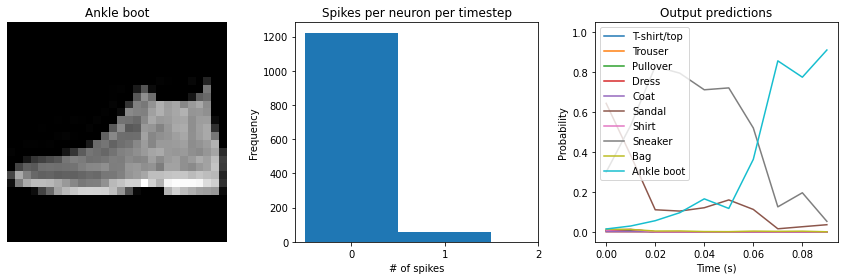

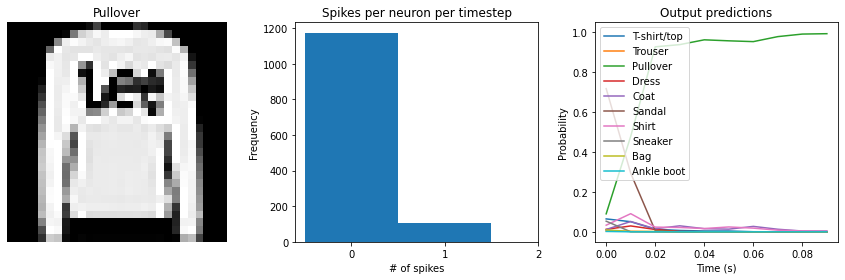

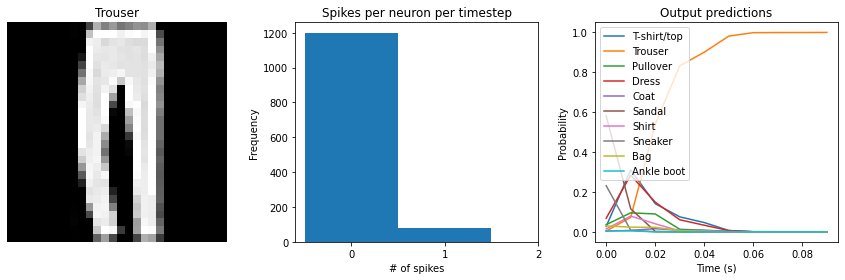

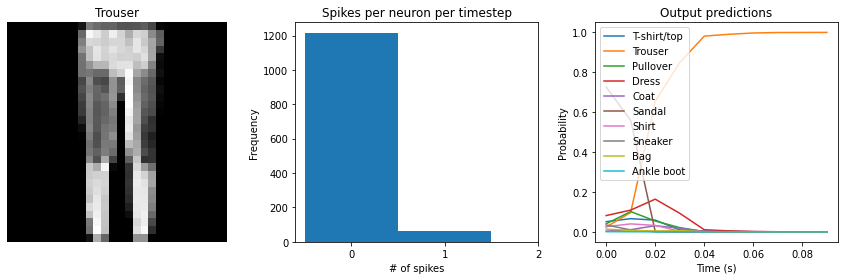

In [16]:
check_output(filtered_model)

We can see that the model performs similarly to the previous
[spiking aware training](#Spiking-aware-training) example, which makes sense since, for
a static input image, a moving average is very similar to a global average. We would
need a more complicated model, with multiple spiking layers or inputs that are changing
over time, to really see the benefits of a Lowpass layer.
The ``keras_spiking.Alpha`` layer is another lowpass-filtering layer,
which can provide better filtering of spike noise with less delay
than ``keras_spiking.Lowpass``.

## Summary

We can use `SpikingActivation` layers to convert any activation function to an
equivalent spiking implementation. Models with SpikingActivations can be trained and
evaluated in the same way as non-spiking models, thanks to the swappable
training/inference behaviour.

There are also a number of additional features that should be kept in mind in order to
optimize the performance of a spiking model:

- [Simulation time](#Simulation-time): by adjusting `dt` we can trade off temporal
  sparsity versus accuracy
- [Spiking aware training](#Spiking-aware-training): incorporating spiking dynamics on
  the forward pass can allow the model to learn weights that are more robust to spiking
  activations
- [Spike rate regularization](#Spike-rate-regularization): we can gain more control over
  spike rates by directly incorporating activity regularization into the optimization
  process
- [Lowpass filtering](#Lowpass-filtering): we can achieve better accuracy with fewer
  spikes by aggregating spike data over time